In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
from scipy.interpolate import RectBivariateSpline
import numpy as np

In [3]:
from vaneska.interpolate import ScipyRectBivariateSpline

In [4]:
from lightkurve import KeplerTargetPixelFile

In [5]:
import tensorflow as tf

In [6]:
from vaneska.models import KeplerPRF

In [7]:
#tpf = KeplerTargetPixelFile("/Users/jvmirca/dev/vaneska/mastDownload/Kepler/"
#                            "kplr011904151_lc_Q111111110111011101/kplr011904151-2010174085026_lpd-targ.fits.gz")
tpf = KeplerTargetPixelFile.from_archive('kepler-10', quarter=5)

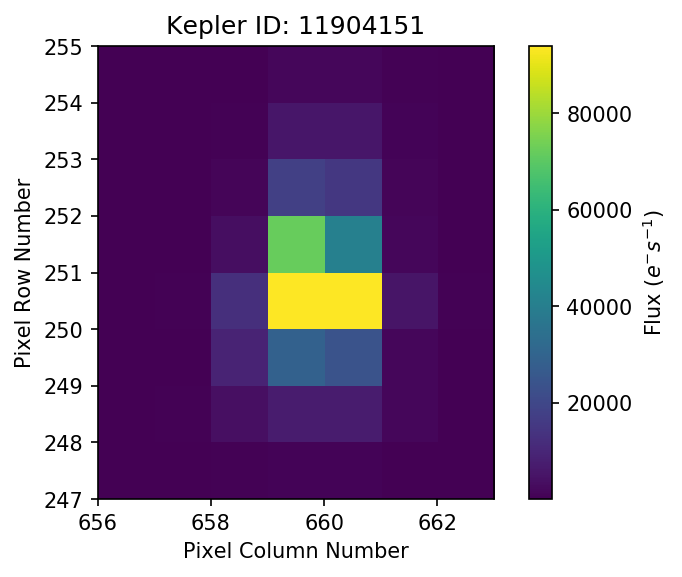

In [8]:
tpf.plot()

In [9]:
prf = KeplerPRF(channel=tpf.channel, shape=tpf.shape[1:], column=tpf.column, row=tpf.row)

In [10]:
flux = tf.Variable(547055, dtype=tf.float64)
xc = tf.Variable(659.87, dtype=tf.float64)
yc = tf.Variable(250.74, dtype=tf.float64)
bkg = tf.Variable(212.52, dtype=tf.float64)

In [11]:
var_list = [flux, xc, yc, bkg]

In [12]:
model = prf(flux, xc, yc) + bkg

In [13]:
model

<tf.Tensor 'add:0' shape=<unknown> dtype=float64>

In [14]:
sess = tf.Session()

In [15]:
sess.run(tf.global_variables_initializer())

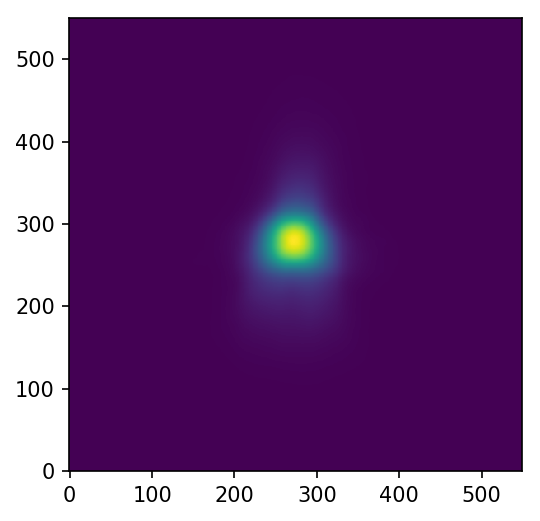

In [16]:
plt.imshow(prf.supersampled_prf, origin='lower')

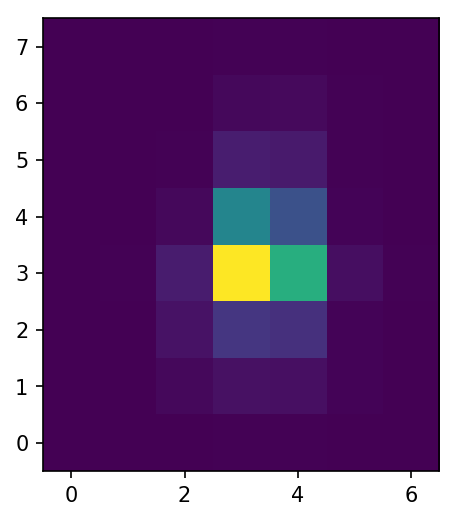

In [17]:
plt.imshow(sess.run(model), origin='lower')

In [18]:
data = tf.placeholder(dtype=tf.float64, shape=tpf.flux[0].shape)

In [19]:
loss = tf.reduce_sum(tf.subtract(model, tf.multiply(data, tf.log(model))))

In [20]:
grad = tf.gradients(loss, var_list)

In [21]:
sess.run(grad, feed_dict={data:tpf.flux[0] + tpf.flux_bkg[0]})

[0.00016176149082862152,
 -6530.3573441383214,
 5148.3917949519655,
 0.0091837535398046066]

In [22]:
sess.run(loss, feed_dict={data:tpf.flux[-1] + tpf.flux_bkg[-1]})

-5426811.8899555802

In [23]:
optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss, var_list, method='BFGS')

In [24]:
import tqdm

In [25]:
psf_flux = []
psf_xc = []
psf_yc = []
for n in tqdm.tqdm(range(len(tpf.time))):
    optimizer.minimize(session=sess, feed_dict={data:tpf.flux[n] + tpf.flux_bkg[n]})
    psf_flux.append(sess.run(flux))
    psf_xc.append(sess.run(xc))
    psf_yc.append(sess.run(yc))
    print(sess.run(grad, feed_dict={data:tpf.flux[n] + tpf.flux_bkg[n]}))

  0%|          | 0/4492 [00:00<?, ?it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511108.791043
  Number of iterations: 33
  Number of functions evaluations: 86


  0%|          | 1/4492 [00:00<53:33,  1.40it/s]

[-1.6682717958807491e-09, -0.0045720687094217283, 0.0052598303172999294, -1.5029513542597073e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510920.136888
  Number of iterations: 11
  Number of functions evaluations: 15


  0%|          | 2/4492 [00:00<31:40,  2.36it/s]

[3.1899469000859146e-06, -0.00018585273892313126, -1.8391794583294541e-05, 3.9313039823518636e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511383.377868
  Number of iterations: 36
  Number of functions evaluations: 44


  0%|          | 3/4492 [00:01<29:08,  2.57it/s]

[-4.6895279239705934e-10, -0.0010009624629674363, -2.8086298698326573e-05, -7.9388544926839444e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511830.355236
  Number of iterations: 34
  Number of functions evaluations: 87


  0%|          | 4/4492 [00:01<33:09,  2.26it/s]

[4.2667465715087727e-09, -0.0042365454391983803, 0.0022598168216063641, 1.9445308095944469e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511982.104350
  Number of iterations: 13
  Number of functions evaluations: 71


  0%|          | 5/4492 [00:02<34:30,  2.17it/s]

[-7.3526892147793982e-07, -7.1416151968151098e-05, 7.5848420237889513e-06, -6.7666738878813248e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511765.760427
  Number of iterations: 10
  Number of functions evaluations: 14


  0%|          | 6/4492 [00:02<30:19,  2.47it/s]

[-2.3750992425720929e-05, 0.0014135960268504277, -0.00077830774898757227, 1.4446600971051993e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511875.210115
  Number of iterations: 9
  Number of functions evaluations: 91


  0%|          | 7/4492 [00:03<32:51,  2.27it/s]

[-7.2347457870233431e-06, -0.0001241017007487244, -8.7623770014033653e-05, 1.0918425763506434e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511979.996986
  Number of iterations: 6
  Number of functions evaluations: 76


  0%|          | 8/4492 [00:03<33:43,  2.22it/s]

[-2.2809956211822767e-05, 0.00014709330798723386, -0.00067858598777092993, 8.8193416369897193e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512285.045915
  Number of iterations: 33
  Number of functions evaluations: 40


  0%|          | 9/4492 [00:03<32:26,  2.30it/s]

[-1.550072917244627e-11, -0.00030920587869331939, 0.00018847315550374333, 6.967983301464642e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512067.740963
  Number of iterations: 11
  Number of functions evaluations: 17


  0%|          | 10/4492 [00:04<30:14,  2.47it/s]

[3.8777050653873713e-06, -0.00078705796568101505, 0.00031085367481864523, 4.8143809794343184e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511282.749496
  Number of iterations: 37
  Number of functions evaluations: 41


  0%|          | 11/4492 [00:04<29:36,  2.52it/s]

[1.3804384284971105e-10, 0.00012854969372710912, -0.00011776276915043127, -1.4257734004541334e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512750.981298
  Number of iterations: 36
  Number of functions evaluations: 43


  0%|          | 12/4492 [00:04<29:06,  2.56it/s]

[-7.1878167480499133e-11, 4.8529727791901678e-07, -1.9339357095304877e-05, 1.4537235193401443e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511762.999658
  Number of iterations: 26
  Number of functions evaluations: 79


  0%|          | 13/4492 [00:05<30:28,  2.45it/s]

[-1.330937252509018e-08, 0.0095857847127263085, 0.00051529860866139643, 2.2511646398104546e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511570.317479
  Number of iterations: 38
  Number of functions evaluations: 44


  0%|          | 14/4492 [00:05<30:11,  2.47it/s]

[2.1266665685415465e-10, -0.00050238399489899166, -0.00061804653523722664, 3.195696853808272e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508140.463127
  Number of iterations: 37
  Number of functions evaluations: 41


  0%|          | 15/4492 [00:06<30:11,  2.47it/s]

[3.7076499422722398e-10, 9.8223090390092693e-06, 1.4196719348547049e-05, -1.2439665997288074e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512187.480559
  Number of iterations: 36
  Number of functions evaluations: 88


  0%|          | 16/4492 [00:06<31:33,  2.36it/s]

[-6.4984740939105778e-10, 0.00017567997019796167, 0.0001607754711585585, -1.3376533525288892e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512738.413573
  Number of iterations: 31
  Number of functions evaluations: 39


  0%|          | 17/4492 [00:07<31:13,  2.39it/s]

[-8.7840142277972877e-11, 0.0016575899880990619, -0.00014370929602591787, -2.0043874593422828e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513250.190014
  Number of iterations: 35
  Number of functions evaluations: 39


  0%|          | 18/4492 [00:07<30:52,  2.41it/s]

[-6.6151370839429013e-11, 3.2591127364867134e-05, 2.1530813683057204e-05, 3.1406779732456869e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512937.012066
  Number of iterations: 36
  Number of functions evaluations: 42


  0%|          | 19/4492 [00:07<30:31,  2.44it/s]

[1.048169884221295e-11, -6.8471813392534386e-06, 5.180134394322522e-06, 1.921840464547131e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512679.738225
  Number of iterations: 11
  Number of functions evaluations: 14


  0%|          | 20/4492 [00:07<29:26,  2.53it/s]

[6.3581608002530321e-07, 4.9824443522084039e-06, -2.3645770852454007e-06, 5.1371306097891534e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512849.972048
  Number of iterations: 12
  Number of functions evaluations: 17


  0%|          | 21/4492 [00:08<28:32,  2.61it/s]

[-6.6556483386192786e-06, -0.00012830403284169734, 2.3849750505178235e-05, -1.7807741881092909e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512777.850973
  Number of iterations: 12
  Number of functions evaluations: 16


  0%|          | 22/4492 [00:08<27:41,  2.69it/s]

[-4.2887016494302585e-06, 0.00040944339980342193, -2.1167590602999553e-05, 1.5541468667557012e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511974.958801
  Number of iterations: 38
  Number of functions evaluations: 43


  1%|          | 23/4492 [00:08<27:39,  2.69it/s]

[4.9204162445859456e-11, 3.7471468203875702e-06, -3.3963260648306459e-07, -1.0350327372954382e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512485.226486
  Number of iterations: 36
  Number of functions evaluations: 39


  1%|          | 24/4492 [00:08<27:34,  2.70it/s]

[-9.8948705132273496e-12, 9.5118639364955015e-07, 6.1267201090231538e-07, -8.0369610966357641e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512504.501848
  Number of iterations: 7
  Number of functions evaluations: 74


  1%|          | 25/4492 [00:09<28:15,  2.63it/s]

[-1.3644419856447508e-05, 0.0058070066934305942, -0.00023779318144079298, 1.1056654702912283e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513457.898895
  Number of iterations: 36
  Number of functions evaluations: 39


  1%|          | 26/4492 [00:09<28:01,  2.66it/s]

[-1.5223188161439527e-11, 4.2041210690513253e-06, -1.2090258678654209e-06, -7.3423012114659514e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513275.931556
  Number of iterations: 34
  Number of functions evaluations: 38


  1%|          | 27/4492 [00:10<27:51,  2.67it/s]

[3.891242206927048e-10, -0.00085275950550567359, 0.00052268111357989255, 7.2971831388546349e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513587.954155
  Number of iterations: 36
  Number of functions evaluations: 40


  1%|          | 28/4492 [00:10<27:41,  2.69it/s]

[-1.7257927118624616e-10, -0.00015588770838803612, 0.00022598528266826179, 1.422867978995157e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513815.049595
  Number of iterations: 12
  Number of functions evaluations: 17


  1%|          | 29/4492 [00:10<27:06,  2.74it/s]

[-5.5606806770277031e-06, 2.104259374391404e-05, -0.00030279518250608817, 6.8364275906951377e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514297.311825
  Number of iterations: 35
  Number of functions evaluations: 46


  1%|          | 30/4492 [00:10<27:10,  2.74it/s]

[-1.1612906903463172e-10, 1.5925857042020652e-06, 1.1594447641982697e-05, -2.5871525699550091e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514004.339465
  Number of iterations: 35
  Number of functions evaluations: 40


  1%|          | 31/4492 [00:11<27:02,  2.75it/s]

[1.1392202459159506e-10, -1.9490472823235905e-05, 1.2977530786884017e-05, 2.9715413352171538e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514077.008821
  Number of iterations: 11
  Number of functions evaluations: 16


  1%|          | 32/4492 [00:11<26:31,  2.80it/s]

[-3.1313633433076651e-06, 0.0071346222534884873, -0.0088670696295594098, -8.8972657028563162e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514170.210171
  Number of iterations: 31
  Number of functions evaluations: 37


  1%|          | 33/4492 [00:11<26:22,  2.82it/s]

[1.0941712553363958e-10, -0.00052112948196736397, 0.00030886419881426264, 1.408452887652345e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514307.882400
  Number of iterations: 33
  Number of functions evaluations: 38


  1%|          | 34/4492 [00:11<26:12,  2.83it/s]

[-3.4902453063118122e-10, 9.3385316631611204e-05, 3.9613049011677504e-05, -2.4390485520164873e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514512.059395
  Number of iterations: 10
  Number of functions evaluations: 14


  1%|          | 35/4492 [00:12<25:43,  2.89it/s]

[4.13458750226324e-06, -4.6180060508049792e-05, 0.00012991380754101556, -8.1784973238185898e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514873.527781
  Number of iterations: 35
  Number of functions evaluations: 40


  1%|          | 36/4492 [00:12<25:40,  2.89it/s]

[1.7099080398125244e-10, 0.00053154003489908064, -2.3068745576892979e-05, 2.7945936642570501e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514851.625475
  Number of iterations: 31
  Number of functions evaluations: 37


  1%|          | 37/4492 [00:12<25:32,  2.91it/s]

[-1.4311131533301102e-10, -5.5291900025622454e-05, 2.1559892047662288e-05, -4.7160773064547357e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514474.269442
  Number of iterations: 36
  Number of functions evaluations: 39


  1%|          | 38/4492 [00:13<25:25,  2.92it/s]

[9.02361779048233e-12, -1.2605150914168917e-06, -2.4792825570330024e-07, 7.8444672979571806e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514882.138480
  Number of iterations: 36
  Number of functions evaluations: 40


  1%|          | 39/4492 [00:13<25:26,  2.92it/s]

[-5.1846533143107276e-11, 2.6779800009535393e-05, 1.5398360119434074e-05, 1.7977197508400877e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514851.337576
  Number of iterations: 10
  Number of functions evaluations: 14


  1%|          | 40/4492 [00:13<25:02,  2.96it/s]

[-4.2907153233621119e-05, -0.0022178968520165654, -0.0012271191826584982, 1.0357361306390089e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514599.751778
  Number of iterations: 35
  Number of functions evaluations: 41


  1%|          | 41/4492 [00:13<24:59,  2.97it/s]

[8.081764597822616e-11, -0.00082198292921020766, -9.9350691016297787e-06, 3.1735733974080915e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515033.805628
  Number of iterations: 33
  Number of functions evaluations: 95


  1%|          | 42/4492 [00:14<25:39,  2.89it/s]

[6.7041352712349234e-09, 0.0018505112498132803, -0.0011674571869662032, 2.3319778005292946e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514949.949246
  Number of iterations: 11
  Number of functions evaluations: 15


  1%|          | 43/4492 [00:14<25:16,  2.93it/s]

[-5.580320786882989e-06, -0.00012476240954129025, -0.00012427330875652842, 6.5297269702391247e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515358.697134
  Number of iterations: 34
  Number of functions evaluations: 39


  1%|          | 44/4492 [00:14<25:11,  2.94it/s]

[-5.4672550341139381e-11, -4.7306492433563108e-05, -1.4312199709820561e-05, 1.8501592036201941e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515001.863964
  Number of iterations: 36
  Number of functions evaluations: 40


  1%|          | 45/4492 [00:15<25:09,  2.95it/s]

[5.5946415902785596e-11, -0.00012122370435463381, -0.00014566571007890161, -3.8315213557460481e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515762.569032
  Number of iterations: 30
  Number of functions evaluations: 38


  1%|          | 46/4492 [00:15<25:04,  2.96it/s]

[-3.8023307939727413e-10, 7.393901796604041e-06, -3.7415375118143857e-06, -1.5537016195832365e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515101.021394
  Number of iterations: 26
  Number of functions evaluations: 94


  1%|          | 47/4492 [00:16<25:35,  2.89it/s]

[3.6402705849702954e-10, 0.00012118374479541671, -0.00018708925381361041, 1.5359105431933529e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515773.698350
  Number of iterations: 38
  Number of functions evaluations: 45


  1%|          | 48/4492 [00:16<25:34,  2.90it/s]

[-3.9806285004329034e-11, -1.3840513020113576e-06, 2.9398104743449949e-05, -3.4385647662560359e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515928.540515
  Number of iterations: 33
  Number of functions evaluations: 53


  1%|          | 49/4492 [00:16<25:39,  2.89it/s]

[-7.786652399255356e-12, 4.0376259221375221e-05, 0.00016158969083335251, -1.5935655139909244e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515491.299908
  Number of iterations: 25
  Number of functions evaluations: 34


  1%|          | 50/4492 [00:17<25:36,  2.89it/s]

[8.8422714462910168e-11, -3.4392672660032986e-05, 6.3608358686906286e-05, -4.4145900712777575e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515268.318112
  Number of iterations: 29
  Number of functions evaluations: 37


  1%|          | 51/4492 [00:17<25:33,  2.90it/s]

[4.2213347400954504e-11, 8.9570244199421722e-06, 2.9011494916630909e-05, -7.8467887743016718e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515639.622073
  Number of iterations: 19
  Number of functions evaluations: 95


  1%|          | 52/4492 [00:18<26:15,  2.82it/s]

[1.7442438801466842e-08, 0.0041254098355238966, 0.0020540340083243791, 4.5195701007250122e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515362.121200
  Number of iterations: 25
  Number of functions evaluations: 36


  1%|          | 53/4492 [00:18<26:10,  2.83it/s]

[4.2760745465331151e-11, 1.7978268260776531e-06, 0.00013167807810532395, -3.1402058175977743e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515578.229004
  Number of iterations: 35
  Number of functions evaluations: 40


  1%|          | 54/4492 [00:19<26:10,  2.83it/s]

[-6.1350577569563303e-10, 0.00026111071520062978, -0.0006181787684909068, -3.2668536664726133e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516110.699049
  Number of iterations: 11
  Number of functions evaluations: 82


  1%|          | 55/4492 [00:19<26:34,  2.78it/s]

[-9.4743312256421672e-06, -0.0033593981142985285, -0.0026408427584101446, 5.8815638559472916e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515491.653330
  Number of iterations: 36
  Number of functions evaluations: 45


  1%|          | 56/4492 [00:20<26:33,  2.78it/s]

[8.4294985054633731e-11, -0.00032213033864536555, 3.3693742807372473e-05, -1.1404194744102369e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5523041.510264
  Number of iterations: 25
  Number of functions evaluations: 37


  1%|▏         | 57/4492 [00:20<26:27,  2.79it/s]

[5.2044097330339323e-11, 4.9534683057572693e-06, -3.0217815947253257e-06, -7.057177087155253e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515876.099936
  Number of iterations: 24
  Number of functions evaluations: 39


  1%|▏         | 58/4492 [00:20<26:24,  2.80it/s]

[-1.1468739673226036e-10, -1.1878213626914658e-05, 5.0651451601879671e-06, 2.4857633540431578e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515795.205322
  Number of iterations: 37
  Number of functions evaluations: 46


  1%|▏         | 59/4492 [00:21<26:24,  2.80it/s]

[8.0629800579268274e-11, -2.5543162337271497e-05, 3.2429088605567813e-06, 1.8425776460162524e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515668.281097
  Number of iterations: 10
  Number of functions evaluations: 14


  1%|▏         | 60/4492 [00:21<26:07,  2.83it/s]

[-1.6701099378674603e-05, -0.0011324816859996645, -0.00069231498309818562, 3.4040380958444416e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515698.930258
  Number of iterations: 27
  Number of functions evaluations: 125


  1%|▏         | 61/4492 [00:22<26:46,  2.76it/s]

[-1.7646717247188359e-10, -9.0671470388770103e-05, 7.4679453973658383e-05, -9.6102550029009137e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515808.968848
  Number of iterations: 31
  Number of functions evaluations: 37


  1%|▏         | 62/4492 [00:22<26:39,  2.77it/s]

[4.215736440493778e-11, 0.0004731920794256439, 0.00062269306727102958, 3.6873013498084362e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514988.170828
  Number of iterations: 35
  Number of functions evaluations: 106


  1%|▏         | 63/4492 [00:23<27:05,  2.73it/s]

[1.2806274608465062e-09, 0.00045184224609329249, -5.9313601013855077e-05, 2.0306317808360674e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514818.067969
  Number of iterations: 35
  Number of functions evaluations: 39


  1%|▏         | 64/4492 [00:23<27:01,  2.73it/s]

[2.2916797886435303e-10, -0.00013908832761444501, 4.7159841415123083e-05, 1.5089438920590226e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515323.852238
  Number of iterations: 34
  Number of functions evaluations: 38


  1%|▏         | 65/4492 [00:23<26:56,  2.74it/s]

[-4.9425044786055583e-11, -2.2427170733863022e-06, 1.4675515558337793e-06, -6.4367651209096266e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515908.448863
  Number of iterations: 34
  Number of functions evaluations: 38


  1%|▏         | 66/4492 [00:24<26:50,  2.75it/s]

[-3.1295426580063568e-10, -0.00057506450593791669, 0.00036908045512973331, -1.5162901267906648e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516263.336119
  Number of iterations: 32
  Number of functions evaluations: 93


  1%|▏         | 67/4492 [00:24<27:09,  2.72it/s]

[1.5988372860029076e-08, -0.0039713281403237488, 0.0019816646545223193, 4.9887756013999862e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516215.790320
  Number of iterations: 36
  Number of functions evaluations: 45


  2%|▏         | 68/4492 [00:24<27:06,  2.72it/s]

[1.0460615013085928e-11, -1.1521942724357359e-06, 1.1747579264920205e-07, 1.1955278989006501e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516218.277117
  Number of iterations: 30
  Number of functions evaluations: 38


  2%|▏         | 69/4492 [00:25<27:00,  2.73it/s]

[9.5375914631323777e-11, -0.00042561901682347525, 0.00026068141232826747, -4.7841036887596999e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515992.754648
  Number of iterations: 23
  Number of functions evaluations: 81


  2%|▏         | 70/4492 [00:25<27:12,  2.71it/s]

[-1.8034796963120603e-09, -0.00055682818901914288, -0.0017113034573412733, 1.6163348348641193e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516093.672674
  Number of iterations: 27
  Number of functions evaluations: 34


  2%|▏         | 71/4492 [00:26<27:04,  2.72it/s]

[-5.2244846556609437e-10, -0.0017460742410548846, 0.0019615771725511877, -1.3501980811181369e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515788.811715
  Number of iterations: 34
  Number of functions evaluations: 40


  2%|▏         | 72/4492 [00:26<27:00,  2.73it/s]

[4.7315493537092301e-12, -0.00092848119584232336, 0.00067631150886882097, 2.5216242538483868e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515859.770552
  Number of iterations: 34
  Number of functions evaluations: 40


  2%|▏         | 73/4492 [00:26<26:56,  2.73it/s]

[-4.800068623828091e-10, -0.00023831811313357321, -0.00049721688992576674, -3.6035995010230693e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516356.624469
  Number of iterations: 35
  Number of functions evaluations: 39


  2%|▏         | 74/4492 [00:26<26:51,  2.74it/s]

[1.98804733092528e-10, -0.0001492668443461298, -3.104814823018387e-05, 5.1981088589059254e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515947.186918
  Number of iterations: 34
  Number of functions evaluations: 39


  2%|▏         | 75/4492 [00:27<26:46,  2.75it/s]

[7.8586608141112402e-10, -1.9437196897342801e-05, -2.1717423805966973e-06, 5.1869790618219724e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516696.594764
  Number of iterations: 34
  Number of functions evaluations: 38


  2%|▏         | 76/4492 [00:27<26:41,  2.76it/s]

[-1.5390353921840294e-12, -4.3555701267905533e-09, -1.2558302842080593e-08, 2.475353255704249e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516551.811870
  Number of iterations: 35
  Number of functions evaluations: 39


  2%|▏         | 77/4492 [00:27<26:37,  2.76it/s]

[1.2535155639176176e-10, -0.00064976226713042706, -0.00013986859630676918, 8.626473330108908e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516319.146588
  Number of iterations: 33
  Number of functions evaluations: 40


  2%|▏         | 78/4492 [00:28<26:33,  2.77it/s]

[-3.3252615314061096e-09, -0.00011110432615168975, -4.7468289267271757e-05, -1.146421572228995e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517670.982517
  Number of iterations: 36
  Number of functions evaluations: 40


  2%|▏         | 79/4492 [00:28<26:29,  2.78it/s]

[-1.1050634105697066e-10, 2.3321620574279223e-05, 3.2783314964035526e-05, 2.4593534431183173e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516762.337093
  Number of iterations: 32
  Number of functions evaluations: 42


  2%|▏         | 80/4492 [00:28<26:30,  2.77it/s]

[1.7068519948121308e-10, 1.6860235518834088e-06, -1.2756117939716205e-06, -5.5139177113083804e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517147.206512
  Number of iterations: 36
  Number of functions evaluations: 42


  2%|▏         | 81/4492 [00:29<26:30,  2.77it/s]

[-8.5221004732238814e-11, -1.9543608686944935e-05, 6.4058076532091945e-07, -1.4896409328279958e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517131.335973
  Number of iterations: 12
  Number of functions evaluations: 17


  2%|▏         | 82/4492 [00:29<26:19,  2.79it/s]

[-1.4134176384310651e-05, -0.0016359553410438821, 9.3007052782922983e-05, 1.0906556060508166e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517366.458875
  Number of iterations: 11
  Number of functions evaluations: 16


  2%|▏         | 83/4492 [00:29<26:08,  2.81it/s]

[-8.6884544735713748e-06, -0.00017920040954777505, -0.00019431372311373707, -9.2171715815325683e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517608.782219
  Number of iterations: 38
  Number of functions evaluations: 42


  2%|▏         | 84/4492 [00:29<26:05,  2.81it/s]

[-9.266034120547495e-13, -5.0746166380122304e-08, 1.1779775377362967e-08, 6.4472871486032091e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517341.057201
  Number of iterations: 35
  Number of functions evaluations: 38


  2%|▏         | 85/4492 [00:30<26:02,  2.82it/s]

[4.8244134381869586e-13, -3.1101080821827054e-08, 1.163789420388639e-08, -1.6231460620019789e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517102.735722
  Number of iterations: 27
  Number of functions evaluations: 40


  2%|▏         | 86/4492 [00:30<26:00,  2.82it/s]

[-2.0176616020300964e-10, 8.6750860646134242e-06, -4.6184832172002643e-06, -1.8720304140185107e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517178.238543
  Number of iterations: 9
  Number of functions evaluations: 13


  2%|▏         | 87/4492 [00:30<25:49,  2.84it/s]

[4.9390985983437108e-06, -0.00037657655775547028, 0.00056895355191954877, -1.7349310765801818e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517525.689968
  Number of iterations: 11
  Number of functions evaluations: 16


  2%|▏         | 88/4492 [00:30<25:40,  2.86it/s]

[-4.1464965215799385e-06, 0.00010434854766572244, -0.00012986610454390757, -3.6234045874827814e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516977.294862
  Number of iterations: 37
  Number of functions evaluations: 42


  2%|▏         | 89/4492 [00:31<25:39,  2.86it/s]

[1.688400894789277e-11, 6.3617121668357868e-06, 2.9824259399902076e-06, -3.5988122037977632e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517562.442319
  Number of iterations: 17
  Number of functions evaluations: 39


  2%|▏         | 90/4492 [00:31<25:36,  2.86it/s]

[-2.3444897065405534e-11, -6.8349563207448227e-05, 2.8306691092438996e-05, -1.6032557503820044e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517242.437440
  Number of iterations: 13
  Number of functions evaluations: 69


  2%|▏         | 91/4492 [00:31<25:45,  2.85it/s]

[6.7587200609439679e-07, 1.5324418654927285e-05, -5.3405741709866561e-05, 5.5279617550141325e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516758.684544
  Number of iterations: 30
  Number of functions evaluations: 55


  2%|▏         | 92/4492 [00:32<25:48,  2.84it/s]

[5.2059363764289657e-12, -5.1645156418089755e-07, 2.540673449402675e-07, 2.1069168631981938e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517518.882964
  Number of iterations: 34
  Number of functions evaluations: 38


  2%|▏         | 93/4492 [00:32<25:46,  2.84it/s]

[-3.2979249539599742e-11, 7.7725462688249536e-07, 3.5539414966478944e-07, -3.6363115851756334e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517282.970157
  Number of iterations: 11
  Number of functions evaluations: 15


  2%|▏         | 94/4492 [00:32<25:35,  2.86it/s]

[3.1764838916215239e-05, -0.0034813159963960061, -0.0012550774590636138, -3.6481260974330354e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517532.194368
  Number of iterations: 11
  Number of functions evaluations: 15


  2%|▏         | 95/4492 [00:32<25:25,  2.88it/s]

[8.4018169243891411e-06, -0.0004083482831447327, -0.00013743711497227196, -1.2962395301574503e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517180.805141
  Number of iterations: 37
  Number of functions evaluations: 44


  2%|▏         | 96/4492 [00:33<25:25,  2.88it/s]

[3.6449950696626487e-11, 2.4207017759181326e-05, -3.0183182389009744e-06, 2.315729941138045e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517003.254434
  Number of iterations: 36
  Number of functions evaluations: 40


  2%|▏         | 97/4492 [00:33<25:25,  2.88it/s]

[-1.5376444475329043e-10, -0.00054538574022444664, 0.00084167976456228644, -6.0924360556491308e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517158.834685
  Number of iterations: 11
  Number of functions evaluations: 15


  2%|▏         | 98/4492 [00:33<25:15,  2.90it/s]

[2.2835479991422172e-05, -0.00026989725529347197, -0.00025895612088788766, -1.0902659953737626e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517387.324349
  Number of iterations: 36
  Number of functions evaluations: 40


  2%|▏         | 99/4492 [00:34<25:13,  2.90it/s]

[-3.2473437827640339e-10, 0.00013902199862059206, -0.00023743544443277642, -2.1547087158957368e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517119.176181
  Number of iterations: 35
  Number of functions evaluations: 39


  2%|▏         | 100/4492 [00:34<25:12,  2.90it/s]

[2.6215328519096914e-11, -2.7863752620760351e-06, -1.1965130397584289e-06, 3.3960912970698587e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516970.716321
  Number of iterations: 34
  Number of functions evaluations: 39


  2%|▏         | 101/4492 [00:34<25:10,  2.91it/s]

[-2.6414231045490677e-11, 5.4500075293617556e-05, -8.017377695068717e-08, -2.9470604512304988e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517655.512831
  Number of iterations: 38
  Number of functions evaluations: 46


  2%|▏         | 102/4492 [00:35<25:11,  2.90it/s]

[-3.1601709096773511e-12, 1.7110323824454099e-08, -1.1685187928378582e-08, -6.1951221930200973e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515751.221998
  Number of iterations: 37
  Number of functions evaluations: 47


  2%|▏         | 103/4492 [00:35<25:11,  2.90it/s]

[2.1614682526455153e-10, 7.3701185101526789e-05, 1.4514924259856343e-05, 4.2835907376748139e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516454.478070
  Number of iterations: 36
  Number of functions evaluations: 91


  2%|▏         | 104/4492 [00:36<25:24,  2.88it/s]

[-7.951441753292765e-10, 0.00021299969876054092, 0.00026257021818310022, -4.4918961350504105e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516125.116170
  Number of iterations: 34
  Number of functions evaluations: 91


  2%|▏         | 105/4492 [00:36<25:37,  2.85it/s]

[-1.9440927461616964e-09, 0.0051371709400882537, 0.0040460947711835615, -2.7494212317957789e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516987.223734
  Number of iterations: 36
  Number of functions evaluations: 43


  2%|▏         | 106/4492 [00:37<25:36,  2.86it/s]

[-1.9592644086990907e-10, 0.00027230124942434486, 0.00037910605351498816, 2.3657380610053735e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517533.561126
  Number of iterations: 34
  Number of functions evaluations: 38


  2%|▏         | 107/4492 [00:37<25:34,  2.86it/s]

[-5.9790096484935162e-11, 7.4868057708954439e-06, 9.5694067567819729e-06, -1.0391004057197506e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517388.383921
  Number of iterations: 37
  Number of functions evaluations: 40


  2%|▏         | 108/4492 [00:37<25:33,  2.86it/s]

[7.3652865056894612e-11, -7.9296546573459636e-06, 9.4429597083944827e-06, 2.0558555413607849e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516271.412253
  Number of iterations: 35
  Number of functions evaluations: 76


  2%|▏         | 109/4492 [00:38<25:46,  2.83it/s]

[2.9018602451524877e-10, -0.00014741734230483416, 7.945419019961264e-05, 1.6259268953433548e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516646.213150
  Number of iterations: 34
  Number of functions evaluations: 38


  2%|▏         | 110/4492 [00:38<25:44,  2.84it/s]

[-4.723343591250817e-11, -7.5331263360567391e-07, 3.0677074391860515e-07, -8.7127286496624379e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517117.006999
  Number of iterations: 34
  Number of functions evaluations: 41


  2%|▏         | 111/4492 [00:39<25:44,  2.84it/s]

[-2.706642618366395e-10, 0.0003120508235952002, 0.00012208248517708853, -1.988538228525627e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517424.805676
  Number of iterations: 10
  Number of functions evaluations: 17


  2%|▏         | 112/4492 [00:39<25:38,  2.85it/s]

[2.6254595786638635e-05, -0.0028346507997412118, -0.0010998275138263125, 1.7792196725929799e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517415.792975
  Number of iterations: 11
  Number of functions evaluations: 75


  3%|▎         | 113/4492 [00:39<25:46,  2.83it/s]

[1.3647188533237077e-05, 0.00029326307276278385, -0.0012419387458066922, 4.1904304470818943e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517634.524351
  Number of iterations: 10
  Number of functions evaluations: 14


  3%|▎         | 114/4492 [00:40<25:38,  2.85it/s]

[8.7352406900444504e-06, -0.00036912222321916488, -0.00017810872668633237, -9.6441546415526602e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517240.375897
  Number of iterations: 36
  Number of functions evaluations: 40


  3%|▎         | 115/4492 [00:40<25:37,  2.85it/s]

[6.6719144098392746e-11, -2.8857579309260473e-05, 3.9817554352339357e-05, -7.1117302047341013e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518262.047008
  Number of iterations: 35
  Number of functions evaluations: 108


  3%|▎         | 116/4492 [00:41<25:57,  2.81it/s]

[2.3070275551040353e-10, -0.00087375102657460957, 0.00010471812311152462, 1.0672436453473821e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517414.339555
  Number of iterations: 34
  Number of functions evaluations: 38


  3%|▎         | 117/4492 [00:41<25:55,  2.81it/s]

[4.2379666616298994e-11, -5.0306803132116329e-06, -7.649705366929993e-07, 5.4883581013243088e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516241.284159
  Number of iterations: 33
  Number of functions evaluations: 40


  3%|▎         | 118/4492 [00:41<25:54,  2.81it/s]

[3.1590795951386141e-11, -3.6532465401251102e-05, -1.1149417332489975e-05, -3.517541813380376e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515966.166885
  Number of iterations: 34
  Number of functions evaluations: 108


  3%|▎         | 119/4492 [00:42<26:09,  2.79it/s]

[9.0776743413845118e-10, -5.3257916079019196e-05, 0.00010813020344357938, 5.9970380761331654e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517299.069808
  Number of iterations: 37
  Number of functions evaluations: 40


  3%|▎         | 120/4492 [00:43<26:08,  2.79it/s]

[-2.8158543205480946e-12, 3.9404312701663002e-08, -8.7493390310555696e-10, 1.505229274556541e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509662.531165
  Number of iterations: 28
  Number of functions evaluations: 36


  3%|▎         | 121/4492 [00:43<26:05,  2.79it/s]

[5.653128416771569e-10, 0.0005682642595274956, 3.7856376366107725e-05, -7.7610740611966378e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513493.285543
  Number of iterations: 35
  Number of functions evaluations: 38


  3%|▎         | 122/4492 [00:43<26:04,  2.79it/s]

[-1.0741112860257473e-11, -1.3289859452925157e-06, -1.0756957635749131e-07, -2.3712809493758868e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513537.011288
  Number of iterations: 36
  Number of functions evaluations: 40


  3%|▎         | 123/4492 [00:44<26:03,  2.79it/s]

[-2.9785997453235513e-11, -1.5253194305842044e-05, 3.9330661820713431e-06, -7.4401007577051814e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516951.346945
  Number of iterations: 35
  Number of functions evaluations: 41


  3%|▎         | 124/4492 [00:44<26:05,  2.79it/s]

[-1.5179422996336456e-10, 5.8282967074774206e-05, -1.3733255400438793e-05, 2.8267421070538035e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518137.086959
  Number of iterations: 12
  Number of functions evaluations: 17


  3%|▎         | 125/4492 [00:44<25:59,  2.80it/s]

[-3.6675525981023395e-05, -0.0028183873432681139, -7.9759469372220337e-05, 1.6822241971636842e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517618.117109
  Number of iterations: 24
  Number of functions evaluations: 106


  3%|▎         | 126/4492 [00:45<26:17,  2.77it/s]

[-3.7108671170626994e-10, 9.3430635388358496e-06, 1.0168896551476792e-05, -3.060683096967054e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517517.236716
  Number of iterations: 35
  Number of functions evaluations: 39


  3%|▎         | 127/4492 [00:45<26:18,  2.77it/s]

[3.2270258513988903e-11, -2.3950329250510549e-05, 1.406660521752201e-05, 1.1403338273652253e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518244.445023
  Number of iterations: 36
  Number of functions evaluations: 40


  3%|▎         | 128/4492 [00:46<26:16,  2.77it/s]

[-1.6521880478320705e-10, -4.0554153656557901e-05, -2.2901404008734971e-06, -3.5893639949158285e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518187.676367
  Number of iterations: 36
  Number of functions evaluations: 40


  3%|▎         | 129/4492 [00:46<26:15,  2.77it/s]

[-2.7573794289525999e-10, -0.00029706364466619561, 0.00035567700433603022, 9.3002465351155195e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518313.169211
  Number of iterations: 35
  Number of functions evaluations: 104


  3%|▎         | 130/4492 [00:47<26:28,  2.75it/s]

[7.7455814505300591e-10, -0.0011667609378491761, -0.0014793850841670064, -1.2711634298501195e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518626.318519
  Number of iterations: 35
  Number of functions evaluations: 43


  3%|▎         | 131/4492 [00:47<26:27,  2.75it/s]

[-2.5220298072170522e-11, -9.4730617092864122e-06, -2.3296997824218124e-06, 9.5444718795079098e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517906.470224
  Number of iterations: 36
  Number of functions evaluations: 40


  3%|▎         | 132/4492 [00:48<26:26,  2.75it/s]

[3.8224880725967747e-11, 1.5627543234586483e-05, 1.985115886782296e-06, -9.6772847513193483e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518496.510494
  Number of iterations: 33
  Number of functions evaluations: 95


  3%|▎         | 133/4492 [00:48<26:40,  2.72it/s]

[1.9802538879509779e-09, -0.0010235833469778299, 0.0010127229270437965, 1.2989014501751939e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518087.281631
  Number of iterations: 35
  Number of functions evaluations: 43


  3%|▎         | 134/4492 [00:49<26:41,  2.72it/s]

[-1.0708846136242567e-11, -4.8978763516061008e-06, 5.9954254538752139e-07, -1.3869054793502755e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517593.809813
  Number of iterations: 26
  Number of functions evaluations: 72


  3%|▎         | 135/4492 [00:49<26:51,  2.70it/s]

[8.9015238756429138e-11, -2.0914648303005379e-05, 2.4433369617327116e-05, -4.4057917869544383e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518809.186950
  Number of iterations: 36
  Number of functions evaluations: 40


  3%|▎         | 136/4492 [00:50<26:49,  2.71it/s]

[-2.3910493810591626e-10, 5.7626621128292754e-05, 6.4204425143543631e-05, 1.2644053393184862e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518106.303416
  Number of iterations: 36
  Number of functions evaluations: 110


  3%|▎         | 137/4492 [00:51<27:03,  2.68it/s]

[1.1869856920282418e-09, -5.6735335874691373e-05, -3.7411522498587146e-05, 1.5063663068026756e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518161.492921
  Number of iterations: 35
  Number of functions evaluations: 41


  3%|▎         | 138/4492 [00:51<27:01,  2.68it/s]

[-2.7299803910529885e-10, 6.6063471422239672e-06, -3.1439605663763359e-05, -1.0212468359860338e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518080.420287
  Number of iterations: 34
  Number of functions evaluations: 108


  3%|▎         | 139/4492 [00:52<27:15,  2.66it/s]

[-7.4770854351785543e-10, 0.0040728912226768443, 0.0038721413093298906, 3.2704598718069633e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518203.895638
  Number of iterations: 30
  Number of functions evaluations: 36


  3%|▎         | 140/4492 [00:52<27:12,  2.67it/s]

[-3.9656187188208403e-11, -3.4513713671913138e-05, 1.6585605408181436e-05, -1.7138636065894275e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518276.807127
  Number of iterations: 37
  Number of functions evaluations: 44


  3%|▎         | 141/4492 [00:52<27:11,  2.67it/s]

[7.6197051272763883e-11, -3.039305465790676e-05, -2.8745040253852494e-05, 2.3991337028128612e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517975.988105
  Number of iterations: 12
  Number of functions evaluations: 17


  3%|▎         | 142/4492 [00:53<27:03,  2.68it/s]

[-4.0546130913666004e-06, 0.0004677184238062182, 0.0010382006748841377, 3.2610802058741228e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518254.665863
  Number of iterations: 36
  Number of functions evaluations: 44


  3%|▎         | 143/4492 [00:53<27:02,  2.68it/s]

[4.3267299031785056e-10, -0.00022055046656532795, -9.0768142399610952e-05, 4.4060562287562277e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517349.458829
  Number of iterations: 36
  Number of functions evaluations: 42


  3%|▎         | 144/4492 [00:53<27:01,  2.68it/s]

[7.0637697947850686e-11, 1.0764856142486678e-05, 2.8385220502968878e-05, -9.5670411592863047e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517098.091867
  Number of iterations: 35
  Number of functions evaluations: 40


  3%|▎         | 145/4492 [00:54<26:59,  2.68it/s]

[-2.4192951201401636e-10, -0.00063518081742586219, -0.00022745747264707461, -2.5035433792730544e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517470.055837
  Number of iterations: 9
  Number of functions evaluations: 16


  3%|▎         | 146/4492 [00:54<26:53,  2.69it/s]

[5.8211542763864088e-06, 0.00016679193913660129, -3.1961162676452659e-05, 1.2772507651526155e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518359.704970
  Number of iterations: 36
  Number of functions evaluations: 45


  3%|▎         | 147/4492 [00:54<26:55,  2.69it/s]

[-5.7032173081394966e-10, -4.9360629873262951e-05, -0.00023015007900539786, -4.265371882361535e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518135.369772
  Number of iterations: 34
  Number of functions evaluations: 38


  3%|▎         | 148/4492 [00:54<26:53,  2.69it/s]

[1.1163300318861591e-11, -3.0613023227488156e-06, 3.4386048355372623e-06, 4.9051407380318324e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517656.319239
  Number of iterations: 37
  Number of functions evaluations: 43


  3%|▎         | 149/4492 [00:55<26:51,  2.69it/s]

[1.6066924700408602e-11, 2.1960204321658239e-08, 1.3793014659313485e-06, -2.8932464202213737e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518227.136283
  Number of iterations: 34
  Number of functions evaluations: 40


  3%|▎         | 150/4492 [00:55<26:50,  2.70it/s]

[-4.5744764747002176e-11, 4.5299244902707869e-05, -0.00018088108117808588, 1.2333349463933274e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518473.555525
  Number of iterations: 32
  Number of functions evaluations: 42


  3%|▎         | 151/4492 [00:55<26:48,  2.70it/s]

[-1.8951330869182437e-10, 0.00027751664629249717, -5.6403452617814764e-05, -4.638194939232676e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518713.655685
  Number of iterations: 29
  Number of functions evaluations: 39


  3%|▎         | 152/4492 [00:56<26:46,  2.70it/s]

[4.0596892167399368e-12, -5.5441068980144337e-07, 6.3209881773218513e-09, -6.3352212364975458e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518590.954945
  Number of iterations: 34
  Number of functions evaluations: 40


  3%|▎         | 153/4492 [00:56<26:44,  2.70it/s]

[-2.6146119991299344e-10, -3.6778224057343323e-05, 4.3032185203628615e-05, -6.6066247694784863e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518167.836189
  Number of iterations: 38
  Number of functions evaluations: 42


  3%|▎         | 154/4492 [00:57<26:45,  2.70it/s]

[3.9326733883293663e-10, -6.1725131672574207e-07, -1.5734949556645006e-06, 1.7776916061418291e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518216.857549
  Number of iterations: 22
  Number of functions evaluations: 37


  3%|▎         | 155/4492 [00:57<26:45,  2.70it/s]

[1.8469310282542839e-11, -6.1954388002050109e-05, 1.9867162336595356e-05, -1.058882059812305e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518929.771268
  Number of iterations: 38
  Number of functions evaluations: 43


  3%|▎         | 156/4492 [00:57<26:45,  2.70it/s]

[-1.2119385356390566e-12, -1.1702013580361381e-07, -6.4126652432605624e-08, 5.2968185393353906e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518255.415079
  Number of iterations: 35
  Number of functions evaluations: 41


  3%|▎         | 157/4492 [00:58<26:48,  2.70it/s]

[7.8634911082620107e-11, -9.9548806247184984e-05, -7.5687905336963013e-05, -5.0192005329741107e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518719.030447
  Number of iterations: 31
  Number of functions evaluations: 37


  4%|▎         | 158/4492 [00:58<26:46,  2.70it/s]

[-1.240001009858438e-10, 0.00013833093225912307, 2.4876357201719657e-05, 4.6875699211135213e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518929.773400
  Number of iterations: 10
  Number of functions evaluations: 13


  4%|▎         | 159/4492 [00:58<26:39,  2.71it/s]

[1.4933926697335148e-06, -9.7290057965437882e-07, 5.5676118790870532e-06, -1.6634305044505027e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518716.461669
  Number of iterations: 33
  Number of functions evaluations: 38


  4%|▎         | 160/4492 [00:58<26:37,  2.71it/s]

[2.4377497936933779e-10, 0.00086866641686356161, 0.00025052005730685778, 1.0651097026581624e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518772.391931
  Number of iterations: 8
  Number of functions evaluations: 12


  4%|▎         | 161/4492 [00:59<26:30,  2.72it/s]

[-2.7054132666862185e-05, 0.0073615142800917965, -0.0029839024791726843, -1.7085299619523653e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518837.184403
  Number of iterations: 31
  Number of functions evaluations: 37


  4%|▎         | 162/4492 [00:59<26:30,  2.72it/s]

[-1.0315671407357119e-10, -8.7095161688921507e-05, 1.6803074686322361e-05, -5.6385645041956423e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518977.733441
  Number of iterations: 33
  Number of functions evaluations: 42


  4%|▎         | 163/4492 [00:59<26:31,  2.72it/s]

[1.6347482824016768e-08, -0.0037346712688304251, 0.00012517168033809867, -9.9320133788438625e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518563.891924
  Number of iterations: 34
  Number of functions evaluations: 39


  4%|▎         | 164/4492 [01:00<26:32,  2.72it/s]

[1.0391065083034667e-09, 0.0002685374092834536, -0.00029414434902719222, 5.70830877899553e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518460.275460
  Number of iterations: 22
  Number of functions evaluations: 32


  4%|▎         | 165/4492 [01:00<26:32,  2.72it/s]

[-4.6245029507174795e-10, 0.0010105873238899221, 4.4438573240768164e-05, -3.2744237532522646e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518571.981338
  Number of iterations: 26
  Number of functions evaluations: 32


  4%|▎         | 166/4492 [01:01<26:29,  2.72it/s]

[8.7807208552781457e-11, -7.6334422374202404e-06, -2.1612249838653952e-06, 2.3828161743733034e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518635.261076
  Number of iterations: 10
  Number of functions evaluations: 82


  4%|▎         | 167/4492 [01:01<26:35,  2.71it/s]

[2.2551274744915181e-06, 7.4489408689260017e-05, -8.7145253928611055e-06, 1.7402163043911401e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518831.163011
  Number of iterations: 36
  Number of functions evaluations: 40


  4%|▎         | 168/4492 [01:02<26:35,  2.71it/s]

[-6.2526202097845651e-11, 4.6199843382055406e-06, 7.6526230259332806e-06, -1.3550278454843578e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518725.692713
  Number of iterations: 12
  Number of functions evaluations: 16


  4%|▍         | 169/4492 [01:02<26:30,  2.72it/s]

[1.1291246718432221e-05, 0.00040445982904202538, -0.00024137053878803272, -1.0894022063445696e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518753.239423
  Number of iterations: 26
  Number of functions evaluations: 33


  4%|▍         | 170/4492 [01:02<26:27,  2.72it/s]

[-5.1398977348598995e-10, -5.4816177907923702e-06, 1.2559743481688201e-05, 5.9389209494664641e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518816.652153
  Number of iterations: 36
  Number of functions evaluations: 132


  4%|▍         | 171/4492 [01:03<26:43,  2.70it/s]

[-2.5718458612766781e-10, 0.00014235538492357591, -0.0002840428460331168, -1.8914989929896819e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518658.586501
  Number of iterations: 35
  Number of functions evaluations: 94


  4%|▍         | 172/4492 [01:04<26:50,  2.68it/s]

[7.7912401877378024e-10, -0.00040533744322601706, -0.00063435631091124378, 5.4793083248405594e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518942.363779
  Number of iterations: 37
  Number of functions evaluations: 41


  4%|▍         | 173/4492 [01:04<26:49,  2.68it/s]

[-6.3537662978174758e-11, 5.5137488743639551e-06, -1.0586270946078002e-05, -1.3903593387709634e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518843.274560
  Number of iterations: 11
  Number of functions evaluations: 17


  4%|▍         | 174/4492 [01:04<26:43,  2.69it/s]

[-1.3784379842656652e-05, -0.00018068329745801748, -0.00077365088509395719, 1.0029562191871122e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518722.316687
  Number of iterations: 13
  Number of functions evaluations: 18


  4%|▍         | 175/4492 [01:04<26:38,  2.70it/s]

[1.6612986709779905e-05, -0.00013574944023275748, -0.00035117245533911046, -7.0788974704250052e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518847.029488
  Number of iterations: 35
  Number of functions evaluations: 40


  4%|▍         | 176/4492 [01:05<26:37,  2.70it/s]

[3.8476503233519921e-11, -2.6403199626656715e-06, -5.3402254707179964e-06, 5.825619764365797e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519153.673790
  Number of iterations: 38
  Number of functions evaluations: 41


  4%|▍         | 177/4492 [01:05<26:36,  2.70it/s]

[-7.0672258843662572e-11, 5.5873838391562458e-06, 6.1672435549553484e-06, -1.5016459853356423e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518585.834303
  Number of iterations: 37
  Number of functions evaluations: 41


  4%|▍         | 178/4492 [01:05<26:36,  2.70it/s]

[1.2202345123918379e-10, -5.0671406825131271e-05, -9.0414683654671535e-05, -2.2954432876698405e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519664.015356
  Number of iterations: 37
  Number of functions evaluations: 40


  4%|▍         | 179/4492 [01:06<26:35,  2.70it/s]

[-2.1676949298055082e-11, 2.9491434361261781e-06, 6.7925866460427642e-06, -4.3907144586796676e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519257.736395
  Number of iterations: 24
  Number of functions evaluations: 84


  4%|▍         | 180/4492 [01:06<26:42,  2.69it/s]

[-4.0650007639489449e-09, 0.00013714504757444956, -7.9990295489551499e-06, -1.7530858177350339e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519074.643420
  Number of iterations: 35
  Number of functions evaluations: 39


  4%|▍         | 181/4492 [01:07<26:41,  2.69it/s]

[5.8111264064630852e-11, 9.6727112577355001e-06, -2.6036195777123794e-06, 1.0091132485179344e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519915.172633
  Number of iterations: 31
  Number of functions evaluations: 37


  4%|▍         | 182/4492 [01:07<26:39,  2.69it/s]

[-1.7178951750712601e-10, -2.8888442557217786e-05, 6.9890464146737941e-05, -3.5931577047065844e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518863.041113
  Number of iterations: 27
  Number of functions evaluations: 89


  4%|▍         | 183/4492 [01:08<26:49,  2.68it/s]

[2.5213313121358327e-10, 0.00014783538517804118, 0.00032734569685999304, -2.6399710340019311e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518612.406740
  Number of iterations: 37
  Number of functions evaluations: 40


  4%|▍         | 184/4492 [01:08<26:50,  2.68it/s]

[-1.1364060734098125e-11, -1.4211582310963422e-07, 5.0808012019842863e-08, -1.8696985071287031e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518052.092277
  Number of iterations: 38
  Number of functions evaluations: 42


  4%|▍         | 185/4492 [01:09<26:48,  2.68it/s]

[4.8989892004192015e-13, 6.7219389165984467e-08, -4.7388311941176653e-08, 8.9808160907978163e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517720.149580
  Number of iterations: 37
  Number of functions evaluations: 43


  4%|▍         | 186/4492 [01:09<26:47,  2.68it/s]

[4.2684221608635387e-11, 6.5032395468733739e-06, -1.5294281183741987e-06, 9.9767089034585865e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518034.477452
  Number of iterations: 11
  Number of functions evaluations: 17


  4%|▍         | 187/4492 [01:09<26:41,  2.69it/s]

[9.7424813155716841e-06, -0.00048890641801335732, 7.1944159572012722e-06, -1.1285575629571554e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519218.418504
  Number of iterations: 39
  Number of functions evaluations: 45


  4%|▍         | 188/4492 [01:09<26:40,  2.69it/s]

[-5.3321566780006879e-11, -1.6098329069791362e-07, 4.8883666750043631e-06, -1.0472053557641914e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519085.362283
  Number of iterations: 36
  Number of functions evaluations: 90


  4%|▍         | 189/4492 [01:10<26:47,  2.68it/s]

[-6.2468364717127578e-09, -0.0037991960039107653, -0.006806312008848181, 3.2964334223395397e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519407.886174
  Number of iterations: 33
  Number of functions evaluations: 40


  4%|▍         | 190/4492 [01:11<26:47,  2.68it/s]

[-6.0068838445004324e-10, 4.4110999624535907e-05, 7.9516375990351662e-06, -2.9304374915550824e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519399.544355
  Number of iterations: 9
  Number of functions evaluations: 79


  4%|▍         | 191/4492 [01:11<26:53,  2.67it/s]

[1.3484416132392672e-05, -6.5095587615360273e-05, 7.0103387770359404e-05, -1.6775328837148606e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519287.392164
  Number of iterations: 11
  Number of functions evaluations: 15


  4%|▍         | 192/4492 [01:11<26:47,  2.67it/s]

[2.8995468849505636e-05, 0.0046027435337236966, -0.0099458006716304226, -2.3692564482535872e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519208.247882
  Number of iterations: 36
  Number of functions evaluations: 39


  4%|▍         | 193/4492 [01:12<26:45,  2.68it/s]

[1.2315686664932102e-12, 1.664229785092175e-07, -4.6775312512181699e-08, -6.5065286491972074e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519793.679917
  Number of iterations: 12
  Number of functions evaluations: 20


  4%|▍         | 194/4492 [01:12<26:41,  2.68it/s]

[-1.8773361793921785e-05, -0.00051277352531542419, -0.0019818601940642111, -1.3408960952698834e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519585.235432
  Number of iterations: 10
  Number of functions evaluations: 14


  4%|▍         | 195/4492 [01:12<26:35,  2.69it/s]

[-2.3867511633810304e-05, 0.0061490996208704018, -0.0032644051825627685, 2.7904498984820947e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519445.901789
  Number of iterations: 9
  Number of functions evaluations: 53


  4%|▍         | 196/4492 [01:12<26:36,  2.69it/s]

[1.1904601728368602e-05, 6.5568374338909052e-06, 2.7299392968416214e-07, 1.0513001635903407e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519327.433301
  Number of iterations: 26
  Number of functions evaluations: 33


  4%|▍         | 197/4492 [01:13<26:34,  2.69it/s]

[6.830396925144866e-11, 7.6298010753816925e-07, 1.600405084900558e-06, 1.9526446459749991e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520029.764639
  Number of iterations: 26
  Number of functions evaluations: 95


  4%|▍         | 198/4492 [01:13<26:41,  2.68it/s]

[-1.2151803435028752e-10, 7.7563896866195137e-05, 0.00019123762285744306, -5.709187798075277e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519900.756965
  Number of iterations: 35
  Number of functions evaluations: 39


  4%|▍         | 199/4492 [01:14<26:39,  2.68it/s]

[1.1539009418110036e-10, -5.5384425195370568e-05, 0.00014038485460332595, 3.8204261976204634e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520212.846088
  Number of iterations: 36
  Number of functions evaluations: 48


  4%|▍         | 200/4492 [01:14<26:38,  2.68it/s]

[-4.4924689836245424e-11, -1.4586785255232826e-05, 6.2207873270381242e-06, 1.9117189054007611e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519472.707188
  Number of iterations: 32
  Number of functions evaluations: 98


  4%|▍         | 201/4492 [01:15<26:45,  2.67it/s]

[-7.4355978839368841e-11, 0.00065827217167679919, 0.00010160155034100171, -4.5090684397397496e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519483.598748
  Number of iterations: 30
  Number of functions evaluations: 83


  4%|▍         | 202/4492 [01:15<26:50,  2.66it/s]

[1.1157884165224896e-10, -0.00011431785105742165, 0.00032415138593933079, -2.3654291858576926e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519874.536870
  Number of iterations: 34
  Number of functions evaluations: 39


  5%|▍         | 203/4492 [01:16<26:48,  2.67it/s]

[-1.3240211531317936e-10, 1.089675697585335e-05, -6.6462143877288327e-06, 2.069829390105582e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520264.193386
  Number of iterations: 34
  Number of functions evaluations: 91


  5%|▍         | 204/4492 [01:16<26:54,  2.66it/s]

[-6.4112565083263018e-11, -0.00011794580314017367, -2.6824503947864287e-05, 2.2919706632595904e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520040.547396
  Number of iterations: 11
  Number of functions evaluations: 15


  5%|▍         | 205/4492 [01:16<26:49,  2.66it/s]

[1.5546705169917213e-06, 2.1870810087420978e-05, -2.3640624931431375e-05, 1.2706912300153306e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520126.922677
  Number of iterations: 11
  Number of functions evaluations: 75


  5%|▍         | 206/4492 [01:17<26:52,  2.66it/s]

[5.7824267646429048e-06, -0.0019813741118923645, -0.0028784147070837207, 6.1340437618184751e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519393.185934
  Number of iterations: 32
  Number of functions evaluations: 102


  5%|▍         | 207/4492 [01:18<27:02,  2.64it/s]

[-1.7012566182195155e-09, 0.00016250525868599652, -0.00015229664313665126, -1.5266790114321083e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520044.058857
  Number of iterations: 33
  Number of functions evaluations: 100


  5%|▍         | 208/4492 [01:19<27:11,  2.63it/s]

[-1.0200183805236795e-09, -0.00046868339723005192, -0.00039762548840371892, -1.7165652715922519e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520011.997529
  Number of iterations: 38
  Number of functions evaluations: 54


  5%|▍         | 209/4492 [01:19<27:13,  2.62it/s]

[5.0729438878793776e-11, -9.3905387075210456e-06, -1.4064173228689469e-05, 1.0343213174834887e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520448.911121
  Number of iterations: 32
  Number of functions evaluations: 39


  5%|▍         | 210/4492 [01:20<27:12,  2.62it/s]

[-2.5096911354660634e-10, 1.8464144886820577e-05, 4.0390354115515947e-05, -7.1538404422533119e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519649.447268
  Number of iterations: 38
  Number of functions evaluations: 43


  5%|▍         | 211/4492 [01:20<27:12,  2.62it/s]

[6.4498750090846713e-11, 7.8034572652541101e-06, 3.7831614463357255e-05, -6.0063174434077382e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519917.891973
  Number of iterations: 38
  Number of functions evaluations: 42


  5%|▍         | 212/4492 [01:20<27:10,  2.62it/s]

[-1.2297171787800654e-10, -4.6562638999603223e-05, 7.5765738074551336e-05, 8.3803014305772194e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520173.174686
  Number of iterations: 32
  Number of functions evaluations: 94


  5%|▍         | 213/4492 [01:21<27:16,  2.61it/s]

[5.3954788727106351e-09, -0.0057429026292084018, 0.0074240088088117773, -2.9367413407754839e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519974.888714
  Number of iterations: 37
  Number of functions evaluations: 41


  5%|▍         | 214/4492 [01:21<27:14,  2.62it/s]

[4.564867407685913e-11, -1.1449259545770474e-05, -1.7446109268348664e-06, 8.1238598070854096e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519362.439186
  Number of iterations: 32
  Number of functions evaluations: 38


  5%|▍         | 215/4492 [01:22<27:12,  2.62it/s]

[8.2138183407631793e-11, 6.2379926475841785e-05, 4.6754561481066048e-05, -2.9355266661923451e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519951.934325
  Number of iterations: 34
  Number of functions evaluations: 38


  5%|▍         | 216/4492 [01:22<27:12,  2.62it/s]

[-7.1602319559604943e-11, 0.001321426266713388, 0.0010077571459987666, 6.017516884782026e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519732.625941
  Number of iterations: 29
  Number of functions evaluations: 35


  5%|▍         | 217/4492 [01:22<27:09,  2.62it/s]

[-9.2545388886977609e-11, -4.681520294980146e-05, 2.3474758563679643e-05, -3.8513506384063589e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519486.205679
  Number of iterations: 35
  Number of functions evaluations: 43


  5%|▍         | 218/4492 [01:23<27:08,  2.62it/s]

[-9.3632002411830895e-10, 0.0007349822349169699, -0.00026914476802630816, -7.4417907192092514e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520039.620287
  Number of iterations: 35
  Number of functions evaluations: 39


  5%|▍         | 219/4492 [01:23<27:06,  2.63it/s]

[-5.8494385550555972e-11, -4.3534858377825003e-05, -2.0291241526138037e-05, 7.8700578054480275e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519473.721428
  Number of iterations: 12
  Number of functions evaluations: 16


  5%|▍         | 220/4492 [01:23<27:01,  2.63it/s]

[2.9070609528763364e-06, -0.00015914291498120292, -0.00010407639638287947, 1.8520195044224863e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520102.501050
  Number of iterations: 35
  Number of functions evaluations: 40


  5%|▍         | 221/4492 [01:23<27:00,  2.64it/s]

[3.4218970452332131e-10, 0.00012935865697727422, 0.00041623253673606087, 5.8382321244110358e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520297.511028
  Number of iterations: 11
  Number of functions evaluations: 15


  5%|▍         | 222/4492 [01:23<26:55,  2.64it/s]

[-1.6312099143761007e-05, 0.0013782295773125952, -0.00098147827156935818, -1.2512255465058075e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520023.720554
  Number of iterations: 14
  Number of functions evaluations: 26


  5%|▍         | 223/4492 [01:24<26:51,  2.65it/s]

[-8.9044492265766273e-12, -1.330222403339576e-07, 1.7451384337618947e-08, 5.3068660577082483e-14]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519563.410610
  Number of iterations: 35
  Number of functions evaluations: 39


  5%|▍         | 224/4492 [01:24<26:49,  2.65it/s]

[1.1590925528409679e-10, 5.0894468586193398e-05, 4.1233797674067318e-05, -5.1868010331190817e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519283.439706
  Number of iterations: 12
  Number of functions evaluations: 17


  5%|▌         | 225/4492 [01:24<26:45,  2.66it/s]

[1.7087981801641554e-05, 0.0053711991286036209, -0.016088231242974871, 8.7918894731142672e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518764.419487
  Number of iterations: 31
  Number of functions evaluations: 40


  5%|▌         | 226/4492 [01:24<26:43,  2.66it/s]

[2.631733641775269e-10, 2.4372534880967578e-05, -4.1967305151047185e-06, 4.698122300084151e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518985.183617
  Number of iterations: 7
  Number of functions evaluations: 48


  5%|▌         | 227/4492 [01:25<26:42,  2.66it/s]

[-1.5122125361429796e-05, 2.8054805625288282e-06, 7.2530383476987481e-07, -2.613069585155614e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519409.223254
  Number of iterations: 37
  Number of functions evaluations: 42


  5%|▌         | 228/4492 [01:25<26:41,  2.66it/s]

[-3.1601800169756e-11, -6.0611232584051322e-06, 1.9417966541368514e-05, 1.8685624159076042e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520413.699181
  Number of iterations: 31
  Number of functions evaluations: 36


  5%|▌         | 229/4492 [01:25<26:39,  2.67it/s]

[-8.7567297163415603e-11, 1.6809417957119877e-05, 6.0201800806680694e-06, -1.5149730803187822e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520150.572344
  Number of iterations: 21
  Number of functions evaluations: 87


  5%|▌         | 230/4492 [01:26<26:43,  2.66it/s]

[-3.9539876017444242e-09, -0.0016023776743168128, 0.00081597466851235367, -6.4356925877362414e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520022.779123
  Number of iterations: 10
  Number of functions evaluations: 14


  5%|▌         | 231/4492 [01:26<26:39,  2.66it/s]

[-4.6839333215442994e-06, 0.0007374910874204943, -0.00029692867792618927, 4.2474071981768446e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520175.990873
  Number of iterations: 33
  Number of functions evaluations: 97


  5%|▌         | 232/4492 [01:27<26:44,  2.65it/s]

[-4.6060537935849188e-10, 0.0002314720240974566, -0.00013018250319873914, -4.432799576292723e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520445.615162
  Number of iterations: 35
  Number of functions evaluations: 39


  5%|▌         | 233/4492 [01:27<26:42,  2.66it/s]

[-4.769677448140941e-11, -3.2136393201653846e-05, -5.764450179412961e-06, 2.1533876903845339e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519870.431193
  Number of iterations: 36
  Number of functions evaluations: 42


  5%|▌         | 234/4492 [01:28<26:41,  2.66it/s]

[1.0445724060031969e-10, -3.0749570214538835e-06, -9.6401818154845387e-06, 1.7334484181397158e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519924.525514
  Number of iterations: 37
  Number of functions evaluations: 40


  5%|▌         | 235/4492 [01:28<26:40,  2.66it/s]

[-1.241443232935513e-11, 1.2252330634510145e-06, -2.4515466066077352e-06, -1.6509469347170125e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520188.351234
  Number of iterations: 35
  Number of functions evaluations: 39


  5%|▌         | 236/4492 [01:28<26:40,  2.66it/s]

[-2.6131798201017853e-10, 0.00081044915441452758, 0.0010895076775341295, -2.5458901498076614e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520084.074117
  Number of iterations: 10
  Number of functions evaluations: 15


  5%|▌         | 237/4492 [01:28<26:36,  2.66it/s]

[2.0173812073102405e-05, -0.00027695531844074139, -0.00035455059150990564, 2.5680020565577166e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520143.100355
  Number of iterations: 38
  Number of functions evaluations: 42


  5%|▌         | 238/4492 [01:29<26:37,  2.66it/s]

[-8.4008407869040624e-13, 5.2047653298359364e-08, -3.2123352866619825e-09, 2.2757351558766459e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520151.389895
  Number of iterations: 34
  Number of functions evaluations: 110


  5%|▌         | 239/4492 [01:30<26:46,  2.65it/s]

[-2.4394293703100534e-09, 0.0001648443558224244, -0.0031468700526602333, 2.0486229483918095e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520581.661867
  Number of iterations: 36
  Number of functions evaluations: 45


  5%|▌         | 240/4492 [01:30<26:48,  2.64it/s]

[-4.5440676395280821e-11, 0.00011409062790335156, -9.2110820332891308e-05, 9.1863876394704391e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520121.058994
  Number of iterations: 36
  Number of functions evaluations: 155


  5%|▌         | 241/4492 [01:31<27:01,  2.62it/s]

[-3.5125700265092874e-10, -0.00031928881890053162, -0.00057173269487975631, -4.5288389760589354e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520214.363664
  Number of iterations: 11
  Number of functions evaluations: 67


  5%|▌         | 242/4492 [01:32<27:03,  2.62it/s]

[-2.8325184347850405e-06, -7.9920964253687998e-05, -8.0358244304079562e-05, 6.4384497733271928e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520102.267270
  Number of iterations: 36
  Number of functions evaluations: 103


  5%|▌         | 243/4492 [01:33<27:09,  2.61it/s]

[3.2609766536378926e-10, 5.1169639846193604e-05, -0.00033850039653771091, 1.9199984813145221e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520301.501574
  Number of iterations: 33
  Number of functions evaluations: 88


  5%|▌         | 244/4492 [01:33<27:16,  2.60it/s]

[-4.8739303218359176e-10, -5.8297463056078414e-05, 3.1644722184864804e-05, -2.6786025031366734e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519734.047961
  Number of iterations: 31
  Number of functions evaluations: 40


  5%|▌         | 245/4492 [01:34<27:14,  2.60it/s]

[5.8168940844649519e-10, -0.00066605797883312334, 0.00015259682550095022, 2.2746386618699432e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519941.916711
  Number of iterations: 36
  Number of functions evaluations: 41


  5%|▌         | 246/4492 [01:34<27:13,  2.60it/s]

[-4.2874593632336033e-11, -2.4359756025660317e-06, -6.9607322075171396e-06, -7.7032554779421503e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520094.018948
  Number of iterations: 10
  Number of functions evaluations: 14


  5%|▌         | 247/4492 [01:34<27:09,  2.60it/s]

[-2.9940058909432021e-05, -0.0016158325574906485, -0.0013983196658955421, 4.224275137465483e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520429.834540
  Number of iterations: 32
  Number of functions evaluations: 38


  6%|▌         | 248/4492 [01:35<27:09,  2.60it/s]

[1.2917154108491036e-09, -0.00037086268321218085, -0.00021279934480844531, 7.2519996952014054e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520179.652723
  Number of iterations: 28
  Number of functions evaluations: 40


  6%|▌         | 249/4492 [01:35<27:08,  2.61it/s]

[-1.7489941786519303e-11, 2.0141925688221818e-05, -3.04835157294292e-06, 1.1665624022327847e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520235.644480
  Number of iterations: 11
  Number of functions evaluations: 16


  6%|▌         | 250/4492 [01:35<27:04,  2.61it/s]

[-6.1586910486341462e-06, -0.011806094923485944, 0.0060779017712775385, 6.4568409384735403e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520308.538762
  Number of iterations: 11
  Number of functions evaluations: 14


  6%|▌         | 251/4492 [01:35<26:59,  2.62it/s]

[1.9496622663877847e-06, 7.2599232225911692e-06, -2.0040006347699091e-06, -2.8885105307629999e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520692.787876
  Number of iterations: 36
  Number of functions evaluations: 40


  6%|▌         | 252/4492 [01:36<26:57,  2.62it/s]

[-8.6270380596220608e-11, -1.3793086509394925e-05, 2.1923662643530406e-05, -1.9406122708787166e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521254.241031
  Number of iterations: 36
  Number of functions evaluations: 40


  6%|▌         | 253/4492 [01:36<26:56,  2.62it/s]

[-6.3089977686558996e-11, -9.8890159279108047e-06, 6.1207683756947517e-05, 2.0396698774405309e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520200.072185
  Number of iterations: 29
  Number of functions evaluations: 93


  6%|▌         | 254/4492 [01:37<27:00,  2.61it/s]

[-3.6757507280993362e-10, 0.00056885665435402188, 0.0020447933457035106, -8.8115751495365657e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520551.700666
  Number of iterations: 10
  Number of functions evaluations: 14


  6%|▌         | 255/4492 [01:37<26:56,  2.62it/s]

[-3.1853422381797163e-05, -0.0039303630624090147, 0.0015623312010575319, -2.2422815749711944e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521077.357612
  Number of iterations: 36
  Number of functions evaluations: 42


  6%|▌         | 256/4492 [01:37<26:55,  2.62it/s]

[-1.652755805478523e-10, -1.3839724033459788e-05, 2.7918304112972692e-06, 1.4006826487555912e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520199.015052
  Number of iterations: 33
  Number of functions evaluations: 45


  6%|▌         | 257/4492 [01:37<26:54,  2.62it/s]

[8.3027624706022429e-11, -7.2145902777265292e-05, 4.2501958887442015e-05, -3.6139535808388246e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520729.191591
  Number of iterations: 33
  Number of functions evaluations: 38


  6%|▌         | 258/4492 [01:38<26:52,  2.63it/s]

[-7.2171235133977607e-11, 3.2402205306425458e-05, -1.4057090083952062e-05, -1.1244231323814802e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520961.222136
  Number of iterations: 10
  Number of functions evaluations: 14


  6%|▌         | 259/4492 [01:38<26:47,  2.63it/s]

[8.7694417703013811e-06, 0.00044309224313110462, -0.00044808775783167221, -2.3251416347846998e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520649.797059
  Number of iterations: 34
  Number of functions evaluations: 41


  6%|▌         | 260/4492 [01:38<26:46,  2.63it/s]

[-3.8827761032408925e-09, -0.0032075178878585575, 0.0038987676307442598, -2.2510383801410683e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520397.179484
  Number of iterations: 36
  Number of functions evaluations: 43


  6%|▌         | 261/4492 [01:39<26:45,  2.64it/s]

[-2.0623877605707719e-10, 6.2275336858874653e-05, -6.3240297095035203e-05, -3.1212370288358215e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520326.544361
  Number of iterations: 34
  Number of functions evaluations: 42


  6%|▌         | 262/4492 [01:39<26:43,  2.64it/s]

[-4.1094733518876048e-11, -1.3084594684187323e-05, -4.99883753946051e-07, -1.3244698671144306e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520340.766650
  Number of iterations: 33
  Number of functions evaluations: 39


  6%|▌         | 263/4492 [01:39<26:42,  2.64it/s]

[8.8789726439275629e-11, 2.8572741030075122e-05, -1.149541640188545e-05, -7.4593241361498031e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520177.274678
  Number of iterations: 35
  Number of functions evaluations: 41


  6%|▌         | 264/4492 [01:39<26:41,  2.64it/s]

[-1.6394672598674109e-10, 3.5588969240052393e-05, -4.9953207053476945e-05, -6.6407948029478803e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519839.135147
  Number of iterations: 23
  Number of functions evaluations: 32


  6%|▌         | 265/4492 [01:40<26:38,  2.64it/s]

[2.6211861674230175e-11, -1.4954866855987348e-07, 3.3908509067259729e-07, -9.4942111950047092e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519369.737022
  Number of iterations: 36
  Number of functions evaluations: 76


  6%|▌         | 266/4492 [01:40<26:41,  2.64it/s]

[-1.6327492522068277e-08, 0.018638769377503195, -0.0021437660379888257, -3.7175438766245961e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519678.230929
  Number of iterations: 12
  Number of functions evaluations: 16


  6%|▌         | 267/4492 [01:40<26:37,  2.65it/s]

[1.1223356542045329e-05, 0.00050045921125274617, 0.00074331938230898231, -8.2183767153853893e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519141.977109
  Number of iterations: 38
  Number of functions evaluations: 42


  6%|▌         | 268/4492 [01:41<26:35,  2.65it/s]

[3.7162686122860222e-12, -5.6561475503258407e-09, 3.2978277886286378e-08, 1.3987389024805452e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520868.277915
  Number of iterations: 37
  Number of functions evaluations: 44


  6%|▌         | 269/4492 [01:41<26:34,  2.65it/s]

[-5.922659584989276e-11, -1.0649067462509265e-05, 1.1299960533506237e-05, 1.6177089445790216e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521163.258836
  Number of iterations: 34
  Number of functions evaluations: 42


  6%|▌         | 270/4492 [01:41<26:33,  2.65it/s]

[2.1706490981390769e-08, -0.0031180255737126572, -0.012648278898268472, -9.7510865942895819e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520472.437203
  Number of iterations: 35
  Number of functions evaluations: 42


  6%|▌         | 271/4492 [01:42<26:32,  2.65it/s]

[8.5689964846036304e-10, -4.4848751258541597e-05, -0.0001363200481137028, 4.5946082039005631e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520837.233004
  Number of iterations: 33
  Number of functions evaluations: 86


  6%|▌         | 272/4492 [01:42<26:36,  2.64it/s]

[-1.6056013116272361e-10, -5.7557865602575475e-05, -2.9254479159135371e-06, -3.6955407622940584e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520931.536880
  Number of iterations: 4
  Number of functions evaluations: 73


  6%|▌         | 273/4492 [01:43<26:38,  2.64it/s]

[3.9307531075425534e-06, -0.0032830927425493428, 0.0061283278573682765, -5.8968860159325232e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520922.733619
  Number of iterations: 37
  Number of functions evaluations: 44


  6%|▌         | 274/4492 [01:43<26:37,  2.64it/s]

[4.5218670821633999e-10, -8.4609404439106584e-05, -0.00033885324410221074, 2.2130132482089948e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521370.526459
  Number of iterations: 28
  Number of functions evaluations: 46


  6%|▌         | 275/4492 [01:44<26:36,  2.64it/s]

[-7.2922508309591905e-11, -3.3569278457434848e-05, 1.9415314454818144e-05, -1.1473518912730185e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521138.341263
  Number of iterations: 32
  Number of functions evaluations: 89


  6%|▌         | 276/4492 [01:44<26:40,  2.63it/s]

[-4.5029003156379921e-09, 0.00039360872915494838, 0.00011446221833466552, -2.1555400785411294e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520979.547472
  Number of iterations: 38
  Number of functions evaluations: 41


  6%|▌         | 277/4492 [01:45<26:38,  2.64it/s]

[7.5685941888781194e-12, -1.2030236575810704e-06, 2.9420334612950683e-07, 7.6947925808923401e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520787.141905
  Number of iterations: 11
  Number of functions evaluations: 15


  6%|▌         | 278/4492 [01:45<26:34,  2.64it/s]

[2.0703854491759856e-05, 0.00024904864767449908, -0.00034833416611945722, 7.4895468438196389e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521473.916685
  Number of iterations: 31
  Number of functions evaluations: 79


  6%|▌         | 279/4492 [01:45<26:37,  2.64it/s]

[-1.6137551364647784e-12, -6.0141246649436653e-08, -5.893525667488575e-09, -1.5663248476016634e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521420.520088
  Number of iterations: 36
  Number of functions evaluations: 40


  6%|▌         | 280/4492 [01:46<26:36,  2.64it/s]

[2.7501127330270547e-10, 0.0001932860641318257, -0.00012019480345770717, 2.8652598516032413e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520941.995096
  Number of iterations: 32
  Number of functions evaluations: 91


  6%|▋         | 281/4492 [01:47<26:43,  2.63it/s]

[-2.5823510578157349e-09, 0.0034791776556630793, 0.0065413775555498432, -1.2478084698841485e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521724.665027
  Number of iterations: 30
  Number of functions evaluations: 36


  6%|▋         | 282/4492 [01:47<26:43,  2.63it/s]

[-1.9580928198315029e-10, -0.00012224270540173166, 0.00013158622459741309, -3.40852712721329e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520709.053421
  Number of iterations: 35
  Number of functions evaluations: 39


  6%|▋         | 283/4492 [01:47<26:42,  2.63it/s]

[2.2441309661253017e-10, -6.6569977207109332e-05, 3.4958016840391792e-05, 5.0420743469281604e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521597.131286
  Number of iterations: 30
  Number of functions evaluations: 38


  6%|▋         | 284/4492 [01:48<26:40,  2.63it/s]

[-1.2599915381883431e-10, 1.6133853932842612e-06, 0.00012620152847375721, 1.0110661086137895e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521686.607535
  Number of iterations: 35
  Number of functions evaluations: 39


  6%|▋         | 285/4492 [01:48<26:39,  2.63it/s]

[-3.4151627272688279e-10, 6.8779340836044867e-05, 3.705426752276253e-05, -1.877593321930604e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521209.743978
  Number of iterations: 36
  Number of functions evaluations: 44


  6%|▋         | 286/4492 [01:48<26:38,  2.63it/s]

[3.2441937157512424e-11, -2.4134169507306069e-07, -1.6688190953573212e-06, 3.9124828932202149e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521510.925448
  Number of iterations: 37
  Number of functions evaluations: 41


  6%|▋         | 287/4492 [01:49<26:37,  2.63it/s]

[-2.3483978997540511e-10, -1.6338344721589237e-06, -6.2839408201398328e-06, -9.0826834497903519e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521156.282782
  Number of iterations: 34
  Number of functions evaluations: 38


  6%|▋         | 288/4492 [01:49<26:35,  2.63it/s]

[-2.1576502910736206e-10, 0.0004002332902928174, 0.00022331983018375468, -3.7392435003891222e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520860.064639
  Number of iterations: 33
  Number of functions evaluations: 38


  6%|▋         | 289/4492 [01:49<26:34,  2.64it/s]

[-4.4148060207582773e-11, 7.5079954967804952e-05, -4.4195559894433245e-05, -1.8110228072742984e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520980.332784
  Number of iterations: 9
  Number of functions evaluations: 76


  6%|▋         | 290/4492 [01:50<26:36,  2.63it/s]

[-1.1226040859005013e-05, 0.0077528138986053818, -0.004901551190414466, -4.384763454878815e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520766.125606
  Number of iterations: 36
  Number of functions evaluations: 42


  6%|▋         | 291/4492 [01:50<26:37,  2.63it/s]

[6.2902897300654015e-11, -5.9337885431887116e-06, -1.4283499695011415e-05, 1.6840907446358244e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520787.266081
  Number of iterations: 29
  Number of functions evaluations: 35


  7%|▋         | 292/4492 [01:50<26:35,  2.63it/s]

[8.0245064933148758e-11, -0.0007219080639515596, 0.00036376401112647727, 3.9899883785832202e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520865.676323
  Number of iterations: 36
  Number of functions evaluations: 40


  7%|▋         | 293/4492 [01:51<26:34,  2.63it/s]

[-1.686764070432667e-10, 0.00025882064574034302, -0.00044168303793412633, -2.4660463859849102e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521040.641928
  Number of iterations: 34
  Number of functions evaluations: 39


  7%|▋         | 294/4492 [01:51<26:33,  2.63it/s]

[-6.5474652609365247e-11, -0.00010472402209416032, 9.0448405899223872e-05, 1.0615101575517372e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520960.555000
  Number of iterations: 35
  Number of functions evaluations: 46


  7%|▋         | 295/4492 [01:52<26:34,  2.63it/s]

[-1.7445300759533211e-10, 2.8186675081087742e-05, -3.5726698115468025e-06, -1.0350110946077962e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521025.133945
  Number of iterations: 11
  Number of functions evaluations: 15


  7%|▋         | 296/4492 [01:52<26:30,  2.64it/s]

[-1.5840419986657035e-05, -0.00026719800780483638, -0.00031315705200540833, 9.7574646384934738e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521195.574452
  Number of iterations: 9
  Number of functions evaluations: 16


  7%|▋         | 297/4492 [01:52<26:26,  2.64it/s]

[6.7798624555663253e-06, -0.0027081848647867446, -0.00036342028215585742, 2.5626140012224852e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521199.262326
  Number of iterations: 33
  Number of functions evaluations: 93


  7%|▋         | 298/4492 [01:53<26:30,  2.64it/s]

[-3.2347327334064646e-10, -0.0011070477871726325, -0.00019062827595917042, -6.1076955981675951e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521293.837396
  Number of iterations: 8
  Number of functions evaluations: 12


  7%|▋         | 299/4492 [01:53<26:26,  2.64it/s]

[-1.0719315784239215e-05, -0.00038465300531242974, 0.00021578317137027625, 8.4581043269249534e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520530.415623
  Number of iterations: 38
  Number of functions evaluations: 42


  7%|▋         | 300/4492 [01:53<26:26,  2.64it/s]

[4.6479061051318826e-11, 7.9080837167566642e-07, -1.5003315638750792e-06, 6.4855966153132272e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520744.724154
  Number of iterations: 36
  Number of functions evaluations: 42


  7%|▋         | 301/4492 [01:54<26:27,  2.64it/s]

[-1.9658423153212645e-10, 0.00029321975944185397, -0.00026083179909619503, -3.0482735768888602e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521054.871237
  Number of iterations: 29
  Number of functions evaluations: 37


  7%|▋         | 302/4492 [01:54<26:27,  2.64it/s]

[-2.0308985049233286e-10, -9.6683785159257241e-05, 9.429860620002728e-05, -6.2190226524094783e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520491.117718
  Number of iterations: 35
  Number of functions evaluations: 40


  7%|▋         | 303/4492 [01:54<26:27,  2.64it/s]

[2.0185499539221441e-10, -1.1937250292248791e-05, -6.0621823649853468e-07, 4.6073514448075059e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521174.080072
  Number of iterations: 37
  Number of functions evaluations: 40


  7%|▋         | 304/4492 [01:55<26:28,  2.64it/s]

[-3.1309566050907733e-11, -2.8659769668593071e-07, 3.0899536795914173e-07, -3.9851283384351177e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521057.684081
  Number of iterations: 11
  Number of functions evaluations: 18


  7%|▋         | 305/4492 [01:55<26:25,  2.64it/s]

[-4.4726059243061986e-05, -4.5296467760636006e-05, -0.0047256068264687201, 5.7812219754760363e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520600.300060
  Number of iterations: 37
  Number of functions evaluations: 42


  7%|▋         | 306/4492 [01:55<26:25,  2.64it/s]

[1.0223808431797377e-10, 1.4428440863412106e-05, -2.5659232051111758e-05, 2.1846146447401793e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519467.728951
  Number of iterations: 37
  Number of functions evaluations: 41


  7%|▋         | 307/4492 [01:56<26:26,  2.64it/s]

[2.4457906880326341e-10, 3.2565722904109862e-05, -8.7125017671496607e-05, -1.1729147120220773e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520330.223752
  Number of iterations: 37
  Number of functions evaluations: 41


  7%|▋         | 308/4492 [01:56<26:25,  2.64it/s]

[-8.2961307094897574e-11, -2.8565751108544646e-05, -1.0430459951749071e-05, 2.6389195606491e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519884.143447
  Number of iterations: 23
  Number of functions evaluations: 32


  7%|▋         | 309/4492 [01:57<26:23,  2.64it/s]

[-7.7582416012356159e-10, -2.7270099963061512e-05, 4.968892244505696e-05, -6.6872043102961243e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521370.864185
  Number of iterations: 36
  Number of functions evaluations: 40


  7%|▋         | 310/4492 [01:57<26:22,  2.64it/s]

[-2.7958487087975659e-11, 1.9938061086577363e-06, 3.2539937819819897e-06, -2.2230349783214365e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520739.972311
  Number of iterations: 36
  Number of functions evaluations: 90


  7%|▋         | 311/4492 [01:58<26:26,  2.63it/s]

[-3.7814169451949597e-09, 0.0043782629518318572, 0.0029434564494295046, 4.4079687847586868e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520795.990640
  Number of iterations: 22
  Number of functions evaluations: 94


  7%|▋         | 312/4492 [01:58<26:30,  2.63it/s]

[1.5414617718541301e-08, -0.00049580303129914682, 8.5722058429382741e-06, -2.9839559868571897e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521108.621636
  Number of iterations: 37
  Number of functions evaluations: 42


  7%|▋         | 313/4492 [01:59<26:29,  2.63it/s]

[-1.2450121662788138e-11, -3.9723181544104591e-07, -1.507982233306393e-06, -1.6425329985025883e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520605.072908
  Number of iterations: 35
  Number of functions evaluations: 39


  7%|▋         | 314/4492 [01:59<26:28,  2.63it/s]

[5.9593548845660038e-11, -5.0096332415705547e-06, -1.7044440028257668e-06, 1.0374980208283091e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521140.915780
  Number of iterations: 37
  Number of functions evaluations: 75


  7%|▋         | 315/4492 [02:00<26:31,  2.62it/s]

[-1.6874822025836345e-10, 5.1389251893851906e-06, -4.2930500057991594e-05, -3.7589192647402569e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521074.323890
  Number of iterations: 11
  Number of functions evaluations: 16


  7%|▋         | 316/4492 [02:00<26:27,  2.63it/s]

[-8.9411537564062019e-06, 0.00016189949383260682, -0.00034988212428288534, 5.0418845987110217e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521007.047452
  Number of iterations: 35
  Number of functions evaluations: 45


  7%|▋         | 317/4492 [02:00<26:26,  2.63it/s]

[1.0417989908251268e-10, 8.4310804595588706e-06, 8.053060264501255e-05, 2.8596482404275037e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520707.797808
  Number of iterations: 35
  Number of functions evaluations: 39


  7%|▋         | 318/4492 [02:00<26:25,  2.63it/s]

[1.8532513718083621e-10, 0.00078029902124399086, 0.00028440295136533678, -4.0467135531407905e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521420.500527
  Number of iterations: 32
  Number of functions evaluations: 38


  7%|▋         | 319/4492 [02:01<26:24,  2.63it/s]

[-1.4459176737868784e-10, 0.00012088484618288931, 8.5183079136186279e-05, 4.6424983302095768e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521403.030333
  Number of iterations: 36
  Number of functions evaluations: 41


  7%|▋         | 320/4492 [02:01<26:23,  2.63it/s]

[5.2628968891244021e-11, 4.7235516831278801e-06, -1.2718979633064009e-05, 8.0014451731003078e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521105.380143
  Number of iterations: 25
  Number of functions evaluations: 35


  7%|▋         | 321/4492 [02:01<26:21,  2.64it/s]

[-1.2609202744429115e-11, -4.0526288103137631e-06, 5.743009751313366e-06, -2.7345559150404597e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520924.311815
  Number of iterations: 35
  Number of functions evaluations: 39


  7%|▋         | 322/4492 [02:02<26:20,  2.64it/s]

[1.5623354780031073e-10, -0.00048136553959921002, 0.00039617775109945796, 2.8071083124636687e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520699.628792
  Number of iterations: 35
  Number of functions evaluations: 39


  7%|▋         | 323/4492 [02:02<26:19,  2.64it/s]

[-1.4790745841639086e-09, -0.0017666587073108531, 0.00042118972851312719, -5.9839164345820706e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521096.563075
  Number of iterations: 30
  Number of functions evaluations: 36


  7%|▋         | 324/4492 [02:02<26:17,  2.64it/s]

[-3.0582115832789025e-11, 3.5363490496820305e-05, 1.5493600585614331e-05, 2.1782166070849485e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521185.016153
  Number of iterations: 12
  Number of functions evaluations: 19


  7%|▋         | 325/4492 [02:02<26:14,  2.65it/s]

[-1.7655467817337921e-05, 2.1207159079494886e-05, -0.00061871739126218017, -6.5438849861099158e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521614.810175
  Number of iterations: 35
  Number of functions evaluations: 39


  7%|▋         | 326/4492 [02:03<26:13,  2.65it/s]

[-6.7812525560151382e-11, 3.2589623515377752e-06, -5.6519602367188781e-06, -1.042428232622683e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521296.753264
  Number of iterations: 38
  Number of functions evaluations: 42


  7%|▋         | 327/4492 [02:03<26:12,  2.65it/s]

[3.1754205515044376e-10, -3.7495038668566849e-05, -3.6751420338987373e-05, 1.1712064473812234e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520839.531183
  Number of iterations: 35
  Number of functions evaluations: 61


  7%|▋         | 328/4492 [02:03<26:13,  2.65it/s]

[-1.2578245222293061e-08, -0.0072292126760657993, -0.00091279811749700457, 7.2802069613908671e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521161.174229
  Number of iterations: 33
  Number of functions evaluations: 81


  7%|▋         | 329/4492 [02:04<26:15,  2.64it/s]

[1.3815012200185661e-08, 0.0019776837320932827, -0.0030476727552013472, -7.540166469421905e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521097.569948
  Number of iterations: 37
  Number of functions evaluations: 41


  7%|▋         | 330/4492 [02:04<26:14,  2.64it/s]

[2.0601215178217558e-10, -7.6770293617300922e-05, -4.9777174353948794e-05, 8.3409652407162582e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520744.353206
  Number of iterations: 38
  Number of functions evaluations: 82


  7%|▋         | 331/4492 [02:05<26:17,  2.64it/s]

[-7.3444549053558461e-13, -1.4721035768161528e-07, -8.580173016525805e-09, -1.7820189768258388e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521059.692859
  Number of iterations: 35
  Number of functions evaluations: 41


  7%|▋         | 332/4492 [02:05<26:15,  2.64it/s]

[-1.8981847343946257e-10, -8.4764556049776729e-06, -2.301679523952771e-05, -8.9579424433772203e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520901.150146
  Number of iterations: 11
  Number of functions evaluations: 87


  7%|▋         | 333/4492 [02:06<26:18,  2.63it/s]

[-2.8000300991816787e-06, 0.0015347636322076141, -1.637671266507823e-05, -6.083843870907657e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520950.160768
  Number of iterations: 34
  Number of functions evaluations: 42


  7%|▋         | 334/4492 [02:06<26:17,  2.64it/s]

[1.4056798520317715e-10, 5.7870844102581032e-05, -3.7966929085087031e-06, 3.4613925059545636e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521012.890529
  Number of iterations: 36
  Number of functions evaluations: 42


  7%|▋         | 335/4492 [02:07<26:16,  2.64it/s]

[-3.4009591150241381e-11, -9.2044842858740594e-06, 4.9066329665947706e-07, -5.5545005261947722e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520841.258805
  Number of iterations: 34
  Number of functions evaluations: 89


  7%|▋         | 336/4492 [02:07<26:20,  2.63it/s]

[-1.9052681394376991e-09, 0.0016857495807016676, -0.0024884709891921375, 1.70501273621948e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520820.394165
  Number of iterations: 11
  Number of functions evaluations: 16


  8%|▊         | 337/4492 [02:07<26:16,  2.64it/s]

[-5.2722759165063984e-06, -0.00018825566166924546, 3.5054035834036767e-06, -9.3756846286652262e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521402.302715
  Number of iterations: 34
  Number of functions evaluations: 38


  8%|▊         | 338/4492 [02:08<26:15,  2.64it/s]

[-5.6017782426587281e-11, 8.4489288383338135e-06, 4.4901116780238226e-06, 1.6204712127709797e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520659.169384
  Number of iterations: 37
  Number of functions evaluations: 42


  8%|▊         | 339/4492 [02:08<26:14,  2.64it/s]

[3.9662868475676127e-11, 1.0601550002320437e-05, -1.7331512935925275e-07, -9.6756634926364882e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520667.497426
  Number of iterations: 9
  Number of functions evaluations: 13


  8%|▊         | 340/4492 [02:08<26:11,  2.64it/s]

[6.99582167028312e-06, 0.00013838681388733676, 2.5559380446793512e-05, -1.9119061589467634e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521675.920023
  Number of iterations: 37
  Number of functions evaluations: 44


  8%|▊         | 341/4492 [02:08<26:10,  2.64it/s]

[5.3599684413097037e-10, 1.1243630069657229e-05, -0.00015619545774825383, 6.7908730327914668e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520538.230927
  Number of iterations: 28
  Number of functions evaluations: 34


  8%|▊         | 342/4492 [02:09<26:08,  2.65it/s]

[1.0092274585482564e-10, -4.4879561755806208e-07, 3.500572347547859e-07, 1.9261261807734797e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521188.989681
  Number of iterations: 36
  Number of functions evaluations: 41


  8%|▊         | 343/4492 [02:09<26:07,  2.65it/s]

[-1.6377901639053061e-11, 1.5448949852725491e-07, -3.4990334825124592e-06, 2.4618146410304576e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520758.794022
  Number of iterations: 12
  Number of functions evaluations: 18


  8%|▊         | 344/4492 [02:09<26:04,  2.65it/s]

[-9.3040285058642452e-06, 0.010243079946121725, 0.00056539430079283193, 2.0038883358219906e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520533.092268
  Number of iterations: 38
  Number of functions evaluations: 44


  8%|▊         | 345/4492 [02:10<26:03,  2.65it/s]

[2.5308679631186326e-11, -1.0517207556404173e-05, 1.5511013771174476e-06, 3.6712005657690838e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520856.331667
  Number of iterations: 35
  Number of functions evaluations: 40


  8%|▊         | 346/4492 [02:10<26:02,  2.65it/s]

[-1.3423393126210659e-10, 2.558019150455948e-05, -3.4387130654067732e-05, -3.8620447617709885e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519820.769153
  Number of iterations: 33
  Number of functions evaluations: 44


  8%|▊         | 347/4492 [02:10<26:01,  2.65it/s]

[1.8553394280987345e-10, -0.00013585650322056608, 7.9304445534944534e-06, 4.8756150339279714e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520131.538066
  Number of iterations: 36
  Number of functions evaluations: 43


  8%|▊         | 348/4492 [02:11<26:02,  2.65it/s]

[4.1659875202326724e-11, -0.00043247169060123269, 0.00071487652712676208, 5.9886217762539218e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520083.640486
  Number of iterations: 35
  Number of functions evaluations: 44


  8%|▊         | 349/4492 [02:11<26:02,  2.65it/s]

[-2.6829861726404558e-10, 0.00015881368108239258, -0.00018895136054197792, -1.4218075994332224e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520920.006577
  Number of iterations: 35
  Number of functions evaluations: 97


  8%|▊         | 350/4492 [02:12<26:06,  2.64it/s]

[8.9746513345922985e-10, 1.8422357698000269e-05, 9.5421473815804347e-06, 9.7743908844538652e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520810.128126
  Number of iterations: 33
  Number of functions evaluations: 39


  8%|▊         | 351/4492 [02:12<26:04,  2.65it/s]

[-6.2154760505084283e-11, -2.2441364762926241e-05, 3.259930235799402e-05, -1.4735257569675753e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521049.969357
  Number of iterations: 11
  Number of functions evaluations: 74


  8%|▊         | 352/4492 [02:13<26:06,  2.64it/s]

[-3.8892790077903715e-06, -6.823707599323825e-05, -0.00019670065557875205, 1.8995188977299904e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521126.074107
  Number of iterations: 10
  Number of functions evaluations: 90


  8%|▊         | 353/4492 [02:13<26:09,  2.64it/s]

[-2.5074899864730837e-05, 0.00070160080167624983, -0.00010259082409902476, 4.2813304013122888e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520759.675306
  Number of iterations: 35
  Number of functions evaluations: 41


  8%|▊         | 354/4492 [02:14<26:08,  2.64it/s]

[3.7885526313341522e-11, 1.8351829567109235e-07, -4.6188379201339558e-06, 6.3085958679209853e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521331.309261
  Number of iterations: 26
  Number of functions evaluations: 34


  8%|▊         | 355/4492 [02:14<26:06,  2.64it/s]

[-4.7509086421870794e-10, -0.0010915896014012105, 0.00071414000194636174, -6.1667339790183462e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520749.828903
  Number of iterations: 35
  Number of functions evaluations: 39


  8%|▊         | 356/4492 [02:14<26:05,  2.64it/s]

[6.8534587727153706e-11, 7.6387395893107168e-06, 1.057303961715661e-06, 1.0814177886508958e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521499.014504
  Number of iterations: 36
  Number of functions evaluations: 40


  8%|▊         | 357/4492 [02:15<26:04,  2.64it/s]

[-1.5067209632735334e-12, -2.8578597266459838e-08, -1.0633812053129077e-08, 2.3523960557270129e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521095.967358
  Number of iterations: 10
  Number of functions evaluations: 73


  8%|▊         | 358/4492 [02:15<26:05,  2.64it/s]

[2.2841525132511267e-05, 0.0097451836918480694, -0.016052537173891324, -6.4015497209801708e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520761.313824
  Number of iterations: 37
  Number of functions evaluations: 41


  8%|▊         | 359/4492 [02:15<26:04,  2.64it/s]

[6.9200046300815776e-11, 5.7918409765989054e-06, -8.883191185304895e-06, 1.269851090945906e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520790.724604
  Number of iterations: 8
  Number of functions evaluations: 14


  8%|▊         | 360/4492 [02:16<26:01,  2.65it/s]

[-1.5316150357468257e-05, 0.00051443607344481279, 9.7433472546981648e-05, -2.4967965561728533e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521169.284511
  Number of iterations: 35
  Number of functions evaluations: 98


  8%|▊         | 361/4492 [02:16<26:05,  2.64it/s]

[2.0491918405196596e-10, 1.7139143892563879e-05, -4.314974466979038e-05, 6.2258352151456364e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521148.309326
  Number of iterations: 36
  Number of functions evaluations: 41


  8%|▊         | 362/4492 [02:17<26:06,  2.64it/s]

[-2.3295948026538782e-10, -0.00015887392646618537, -0.00033917243490577675, -1.3630707584866286e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521112.030859
  Number of iterations: 22
  Number of functions evaluations: 98


  8%|▊         | 363/4492 [02:18<26:10,  2.63it/s]

[2.2570487579615106e-11, -1.0511183972994331e-05, 5.5885193432914093e-06, -8.3063258493609737e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520775.069844
  Number of iterations: 30
  Number of functions evaluations: 37


  8%|▊         | 364/4492 [02:18<26:09,  2.63it/s]

[6.9167273037545884e-11, 3.15990896524454e-05, 2.5496368834865279e-05, 1.2789522996214941e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520511.719233
  Number of iterations: 23
  Number of functions evaluations: 132


  8%|▊         | 365/4492 [02:19<26:14,  2.62it/s]

[-5.790336951236319e-10, 0.00069224996332195587, 0.00022298590192804113, -4.595419320629901e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520945.018048
  Number of iterations: 35
  Number of functions evaluations: 40


  8%|▊         | 366/4492 [02:19<26:13,  2.62it/s]

[-9.6953070571892397e-11, -1.9731442080228589e-07, 3.1192448659567162e-06, -2.1818846396293168e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520681.166219
  Number of iterations: 35
  Number of functions evaluations: 95


  8%|▊         | 367/4492 [02:20<26:16,  2.62it/s]

[-4.6471302457204433e-09, -4.9522483550390461e-05, 4.804387572221458e-06, 2.8907761622232186e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521599.711614
  Number of iterations: 27
  Number of functions evaluations: 33


  8%|▊         | 368/4492 [02:20<26:14,  2.62it/s]

[-5.8735792705238987e-11, -6.6179018176626414e-07, -1.805128704290837e-07, 1.4919077973019057e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520673.255375
  Number of iterations: 28
  Number of functions evaluations: 36


  8%|▊         | 369/4492 [02:20<26:12,  2.62it/s]

[5.9862396289966924e-11, 3.2391508284490556e-05, -1.1610643923631869e-05, -1.6192765017741806e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520940.798248
  Number of iterations: 34
  Number of functions evaluations: 89


  8%|▊         | 370/4492 [02:21<26:15,  2.62it/s]

[3.7982509411976784e-10, -0.0008024643675526022, -5.3587325965054333e-05, 4.224946855702072e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520926.436059
  Number of iterations: 36
  Number of functions evaluations: 42


  8%|▊         | 371/4492 [02:21<26:15,  2.62it/s]

[2.4309014219972558e-10, -0.0001411139151059615, 1.3941504221293144e-05, 1.1923695686366642e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520968.615222
  Number of iterations: 11
  Number of functions evaluations: 17


  8%|▊         | 372/4492 [02:22<26:12,  2.62it/s]

[1.5314810736589187e-05, -0.00066906699566970929, 0.00010853158710233402, -3.1830575875080314e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521089.612276
  Number of iterations: 6
  Number of functions evaluations: 12


  8%|▊         | 373/4492 [02:22<26:09,  2.62it/s]

[-3.7413202963066522e-06, 0.0009989515428969753, 0.00048277364112436771, 7.0512466199268431e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521001.457399
  Number of iterations: 28
  Number of functions evaluations: 35


  8%|▊         | 374/4492 [02:22<26:07,  2.63it/s]

[-8.791991787382436e-11, 7.6698097473126836e-07, -4.9697882786858827e-07, -2.0966465341665241e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520897.847993
  Number of iterations: 37
  Number of functions evaluations: 42


  8%|▊         | 375/4492 [02:22<26:06,  2.63it/s]

[1.3492850630195119e-10, 7.3445007728878409e-06, 1.3981614756630734e-05, 4.1181831056391616e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520534.759206
  Number of iterations: 36
  Number of functions evaluations: 42


  8%|▊         | 376/4492 [02:23<26:05,  2.63it/s]

[1.8191849415760686e-10, -0.00011883946035595727, 0.00021343795197026338, 1.5507487483024107e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520877.129493
  Number of iterations: 35
  Number of functions evaluations: 43


  8%|▊         | 377/4492 [02:23<26:04,  2.63it/s]

[6.4962605607343793e-12, -2.2936779714655131e-05, -9.2097541710245423e-05, -3.9999979439819811e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520726.021145
  Number of iterations: 37
  Number of functions evaluations: 44


  8%|▊         | 378/4492 [02:23<26:03,  2.63it/s]

[1.3887593288894329e-10, -4.614234967448283e-07, -8.0985701060853899e-06, 5.9897285908938613e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520620.922466
  Number of iterations: 11
  Number of functions evaluations: 18


  8%|▊         | 379/4492 [02:23<26:01,  2.63it/s]

[-1.2060304527882447e-05, -0.00024545323503843974, -0.00099770089218509383, 4.1013586750127118e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520760.478189
  Number of iterations: 11
  Number of functions evaluations: 15


  8%|▊         | 380/4492 [02:23<25:58,  2.64it/s]

[-2.1691989870922107e-07, 0.00048046107394839055, -0.0014136786649032729, 2.4685808552860067e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520537.545813
  Number of iterations: 36
  Number of functions evaluations: 39


  8%|▊         | 381/4492 [02:24<25:56,  2.64it/s]

[5.1332393197212056e-12, -2.2192562028067186e-06, 1.4808792911935598e-06, 8.8636986639301085e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520451.218917
  Number of iterations: 13
  Number of functions evaluations: 17


  9%|▊         | 382/4492 [02:24<25:54,  2.64it/s]

[1.4218002150562584e-06, 1.1476164218038321e-05, 2.7251075152889825e-05, 2.4976124834985569e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520708.223750
  Number of iterations: 37
  Number of functions evaluations: 41


  9%|▊         | 383/4492 [02:24<25:53,  2.64it/s]

[-6.3933060234777628e-13, -9.8544660431798548e-08, -6.5083440858870745e-09, -6.9269034952412767e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520474.071544
  Number of iterations: 35
  Number of functions evaluations: 41


  9%|▊         | 384/4492 [02:25<25:52,  2.65it/s]

[-2.5316299988222685e-08, -0.007677328582303744, 0.021277236526657362, 5.1561088354468154e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520794.483269
  Number of iterations: 34
  Number of functions evaluations: 46


  9%|▊         | 385/4492 [02:25<25:52,  2.65it/s]

[-3.6836093376957368e-10, -3.8038548609620193e-05, 2.0574429072439671e-05, -4.2392964527682153e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520471.107616
  Number of iterations: 10
  Number of functions evaluations: 15


  9%|▊         | 386/4492 [02:25<25:49,  2.65it/s]

[2.8671833954232572e-05, -0.00076003579351890949, -0.0014062285026739119, 6.6273840404473816e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519034.153817
  Number of iterations: 33
  Number of functions evaluations: 38


  9%|▊         | 387/4492 [02:25<25:48,  2.65it/s]

[4.3448429316167436e-10, -0.00049800204578787088, 0.00015312241885112599, 4.0671574108586128e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519294.310981
  Number of iterations: 34
  Number of functions evaluations: 38


  9%|▊         | 388/4492 [02:26<25:47,  2.65it/s]

[-4.5001083154999622e-11, 1.1339129741827492e-06, -4.7793218982405961e-07, -6.6113032826109475e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519409.351509
  Number of iterations: 11
  Number of functions evaluations: 16


  9%|▊         | 389/4492 [02:26<25:44,  2.66it/s]

[7.2689343495195742e-06, -0.0002499958186490403, -0.00083299581638129894, 3.5714462276459358e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519759.445062
  Number of iterations: 26
  Number of functions evaluations: 34


  9%|▊         | 390/4492 [02:26<25:42,  2.66it/s]

[-8.9289880610826655e-11, 2.4361879695788957e-06, 4.2441224650247023e-06, 3.93881270932539e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520353.523902
  Number of iterations: 34
  Number of functions evaluations: 74


  9%|▊         | 391/4492 [02:27<25:44,  2.66it/s]

[-8.6500582304610552e-11, 2.6139070087083383e-05, 6.6474651248427108e-05, 9.3857181027168224e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520664.793550
  Number of iterations: 11
  Number of functions evaluations: 89


  9%|▊         | 392/4492 [02:27<25:46,  2.65it/s]

[-9.049635609444974e-06, 0.0001669123944338935, -0.0011636442413873738, 1.0986550070812839e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520754.924626
  Number of iterations: 34
  Number of functions evaluations: 39


  9%|▊         | 393/4492 [02:28<25:45,  2.65it/s]

[-1.0337096933640821e-10, 0.00020570924289131653, 0.00011572591392905451, 1.9418302521501118e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520954.141704
  Number of iterations: 10
  Number of functions evaluations: 75


  9%|▉         | 394/4492 [02:28<25:47,  2.65it/s]

[-7.036366261404213e-06, -1.4049748642719351e-05, -3.5598644899437204e-05, -3.2770321323205565e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520566.175933
  Number of iterations: 38
  Number of functions evaluations: 42


  9%|▉         | 395/4492 [02:29<25:48,  2.65it/s]

[-2.3554479026965947e-10, -0.00016158282369360677, -0.00011741085836547427, -9.8652507163343728e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520408.306218
  Number of iterations: 31
  Number of functions evaluations: 103


  9%|▉         | 396/4492 [02:30<25:54,  2.64it/s]

[6.6475400401291851e-10, -0.00085674927231593756, -0.00023683897052251268, 6.7322616925657996e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520762.808222
  Number of iterations: 34
  Number of functions evaluations: 39


  9%|▉         | 397/4492 [02:30<25:53,  2.64it/s]

[-2.7661251978186585e-10, 9.4162605819292367e-06, -1.3134633263689466e-05, -1.3762597728117498e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520495.994029
  Number of iterations: 11
  Number of functions evaluations: 107


  9%|▉         | 398/4492 [02:31<25:57,  2.63it/s]

[8.4096232312960185e-06, 0.0030643100185443473, -0.00028802037741115782, -4.9482269259826239e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520790.981239
  Number of iterations: 10
  Number of functions evaluations: 14


  9%|▉         | 399/4492 [02:31<25:55,  2.63it/s]

[-1.9694882721351097e-05, -0.0080159124481724575, 0.0027810675856017042, -3.1452056985514787e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520999.456542
  Number of iterations: 36
  Number of functions evaluations: 42


  9%|▉         | 400/4492 [02:31<25:54,  2.63it/s]

[-3.2865461220554781e-11, -5.1474398787831888e-07, -3.8811176636954769e-06, 1.3704235524159003e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520840.723665
  Number of iterations: 10
  Number of functions evaluations: 16


  9%|▉         | 401/4492 [02:32<25:51,  2.64it/s]

[6.6699389383389172e-06, 0.00050476158503443003, -0.0011971820767939789, 2.2603752745098404e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520653.554433
  Number of iterations: 36
  Number of functions evaluations: 40


  9%|▉         | 402/4492 [02:32<25:50,  2.64it/s]

[3.1311323759469767e-11, 4.5961460273247212e-05, -9.1051557319588028e-05, -4.1853793764090597e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521002.551992
  Number of iterations: 11
  Number of functions evaluations: 15


  9%|▉         | 403/4492 [02:32<25:47,  2.64it/s]

[-2.132174666603882e-05, -0.0053624565784957667, -0.0010211895078100497, -5.6431748544083504e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521005.606094
  Number of iterations: 33
  Number of functions evaluations: 90


  9%|▉         | 404/4492 [02:33<25:49,  2.64it/s]

[2.7768814994839908e-09, -0.00091398530685182777, -0.00051746733151958324, 1.2319954346695638e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521405.193772
  Number of iterations: 35
  Number of functions evaluations: 97


  9%|▉         | 405/4492 [02:33<25:52,  2.63it/s]

[-3.8454744336752222e-10, 9.1078104105690727e-05, 4.5467122617992572e-05, -1.7709167265955728e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521189.866024
  Number of iterations: 33
  Number of functions evaluations: 39


  9%|▉         | 406/4492 [02:34<25:51,  2.63it/s]

[-9.5424329028814814e-11, 0.00022588644606003072, -4.1304501792183146e-05, -1.5957533838761861e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520624.060239
  Number of iterations: 37
  Number of functions evaluations: 44


  9%|▉         | 407/4492 [02:34<25:50,  2.63it/s]

[3.2597370115683422e-11, 9.6423091235919856e-06, 1.1367526894900948e-05, 5.5144442345778089e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521081.777878
  Number of iterations: 21
  Number of functions evaluations: 30


  9%|▉         | 408/4492 [02:34<25:48,  2.64it/s]

[-6.0488602841857197e-11, -0.00043222474505455466, 0.00032735715285525657, -5.5395080134079677e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521099.361247
  Number of iterations: 32
  Number of functions evaluations: 37


  9%|▉         | 409/4492 [02:34<25:47,  2.64it/s]

[-7.2293418647284557e-11, 6.8432200350798666e-07, -4.8022047849372029e-07, -2.2401875354738365e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520989.674207
  Number of iterations: 10
  Number of functions evaluations: 14


  9%|▉         | 410/4492 [02:35<25:44,  2.64it/s]

[2.6196953093330852e-05, -0.0015590367656841408, -0.00088750178838381544, -6.5690090400583045e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520760.429614
  Number of iterations: 12
  Number of functions evaluations: 16


  9%|▉         | 411/4492 [02:35<25:41,  2.65it/s]

[2.5181893543001731e-05, -0.003743251651940227, 0.0060017542418790981, 3.4886057207472732e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520889.452930
  Number of iterations: 10
  Number of functions evaluations: 14


  9%|▉         | 412/4492 [02:35<25:39,  2.65it/s]

[8.5084316231711851e-06, -0.00068425209656197694, 0.00028665568970609456, -2.1251896098473111e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520556.417061
  Number of iterations: 30
  Number of functions evaluations: 36


  9%|▉         | 413/4492 [02:35<25:38,  2.65it/s]

[4.4592661594539118e-11, -3.6852596622338751e-05, 3.327866033941973e-05, -2.3156654371803143e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520673.011640
  Number of iterations: 12
  Number of functions evaluations: 17


  9%|▉         | 414/4492 [02:35<25:35,  2.66it/s]

[-4.7560814317444515e-06, 6.2341696320800111e-06, -0.00022809212896390818, 3.6698407757107532e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520803.844955
  Number of iterations: 11
  Number of functions evaluations: 16


  9%|▉         | 415/4492 [02:36<25:32,  2.66it/s]

[2.992562567420004e-07, -0.00026176422579737846, -0.00026531348703429103, 2.8072606350626472e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521049.231235
  Number of iterations: 13
  Number of functions evaluations: 22


  9%|▉         | 416/4492 [02:36<25:30,  2.66it/s]

[-1.1687506526211842e-05, -0.0022257798673308571, 0.02086580795730697, -8.5847674319294853e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521051.728870
  Number of iterations: 35
  Number of functions evaluations: 40


  9%|▉         | 417/4492 [02:36<25:29,  2.66it/s]

[-1.1773623525765387e-10, 3.9338142869382864e-05, -5.8567511587170884e-05, -3.2620458112475603e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520819.194531
  Number of iterations: 20
  Number of functions evaluations: 32


  9%|▉         | 418/4492 [02:36<25:28,  2.67it/s]

[-1.1553866431299187e-09, -0.00015509909553657053, 0.0001475084172852803, -3.5269320042274899e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520549.728552
  Number of iterations: 34
  Number of functions evaluations: 38


  9%|▉         | 419/4492 [02:37<25:27,  2.67it/s]

[4.5546911728311379e-11, 4.7552762225677725e-06, 4.7224566515069455e-06, -1.5552793830586609e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520999.911114
  Number of iterations: 35
  Number of functions evaluations: 72


  9%|▉         | 420/4492 [02:37<25:28,  2.66it/s]

[-6.4350536184420992e-11, 5.0540811571408994e-05, 0.00021436105635075364, 2.8752077985139124e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520841.886197
  Number of iterations: 34
  Number of functions evaluations: 113


  9%|▉         | 421/4492 [02:38<25:32,  2.66it/s]

[-3.8560628908695938e-10, -0.0022505395309053711, -0.00045848729132558219, 8.9038648309891499e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520963.021394
  Number of iterations: 36
  Number of functions evaluations: 41


  9%|▉         | 422/4492 [02:38<25:31,  2.66it/s]

[4.6971818795649156e-12, -2.2069752958486788e-07, -4.6035529521759599e-07, 3.8946768032843693e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521241.699216
  Number of iterations: 37
  Number of functions evaluations: 43


  9%|▉         | 423/4492 [02:39<25:30,  2.66it/s]

[-2.2792240230579131e-10, -7.5390308666101191e-05, 3.0683968361699954e-06, -6.3962611096535227e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520908.583521
  Number of iterations: 34
  Number of functions evaluations: 38


  9%|▉         | 424/4492 [02:39<25:28,  2.66it/s]

[2.972239806706134e-10, -0.00038820679765194654, 0.00015109021296666469, 3.1624956287057415e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521429.082737
  Number of iterations: 25
  Number of functions evaluations: 33


  9%|▉         | 425/4492 [02:39<25:27,  2.66it/s]

[-2.9033483776863545e-10, -2.0294935893616639e-05, 1.7623739040573128e-05, -1.2543033744982779e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520840.952286
  Number of iterations: 36
  Number of functions evaluations: 40


  9%|▉         | 426/4492 [02:39<25:26,  2.66it/s]

[3.4892332946567794e-11, 2.5075833036680706e-06, 8.5217125160852447e-06, -5.3833760782495688e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520400.307089
  Number of iterations: 36
  Number of functions evaluations: 46


 10%|▉         | 427/4492 [02:40<25:26,  2.66it/s]

[1.911314522450025e-10, 2.7699857128027361e-06, 0.0003997269413957838, 5.6307478746298045e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520112.690758
  Number of iterations: 38
  Number of functions evaluations: 42


 10%|▉         | 428/4492 [02:40<25:25,  2.66it/s]

[4.9999882706375232e-12, 1.8752120922727045e-06, 4.164758138358593e-08, -4.4661374598575776e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520506.461435
  Number of iterations: 30
  Number of functions evaluations: 38


 10%|▉         | 429/4492 [02:40<25:24,  2.66it/s]

[-6.8600669415885829e-11, -0.00099726239204755984, -0.00030148596670187544, -3.1886046647500166e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519791.537535
  Number of iterations: 35
  Number of functions evaluations: 39


 10%|▉         | 430/4492 [02:41<25:23,  2.67it/s]

[1.3477945322304397e-11, 9.1138326752115972e-07, 1.8346509023103863e-07, -2.0170994874391113e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521059.975824
  Number of iterations: 36
  Number of functions evaluations: 40


 10%|▉         | 431/4492 [02:41<25:22,  2.67it/s]

[-3.5265037851700543e-11, -4.9045138439396396e-07, -1.0759922588476911e-06, 5.5239290919217865e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521281.615007
  Number of iterations: 34
  Number of functions evaluations: 40


 10%|▉         | 432/4492 [02:41<25:22,  2.67it/s]

[2.3054548795205243e-09, -0.0062658427759743063, 0.001987777768590604, -1.6840423777697566e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521163.008116
  Number of iterations: 11
  Number of functions evaluations: 17


 10%|▉         | 433/4492 [02:42<25:19,  2.67it/s]

[-1.1558567739547703e-05, -0.012017481824841525, 0.00067992172262165695, 3.986212643303233e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520977.620796
  Number of iterations: 35
  Number of functions evaluations: 101


 10%|▉         | 434/4492 [02:42<25:23,  2.66it/s]

[4.9380067266083238e-10, 0.0006035723490640521, 0.0015752571598568466, 9.9591557489731031e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520807.263094
  Number of iterations: 30
  Number of functions evaluations: 37


 10%|▉         | 435/4492 [02:43<25:24,  2.66it/s]

[-6.4263089853862365e-09, -0.0049821767356661439, 0.0050496004532760708, 4.2040777858964873e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520175.794548
  Number of iterations: 35
  Number of functions evaluations: 44


 10%|▉         | 436/4492 [02:43<25:24,  2.66it/s]

[6.6862562361769129e-11, -0.00020209938429616159, 2.238559682155028e-05, -7.2436732723168973e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520323.522390
  Number of iterations: 33
  Number of functions evaluations: 42


 10%|▉         | 437/4492 [02:44<25:23,  2.66it/s]

[8.0124659945085552e-10, 0.00045015314844931709, 0.00024291545742016751, -1.1903557166625944e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520547.116269
  Number of iterations: 12
  Number of functions evaluations: 19


 10%|▉         | 438/4492 [02:44<25:21,  2.66it/s]

[3.2394764724035657e-06, -0.0039338281671916775, -0.00160484027765051, 7.6069301346848306e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520241.916259
  Number of iterations: 35
  Number of functions evaluations: 39


 10%|▉         | 439/4492 [02:44<25:21,  2.66it/s]

[1.2096725574353706e-10, 3.5929332625528332e-05, 2.3605545720783994e-05, 3.2438286168279262e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520896.079653
  Number of iterations: 37
  Number of functions evaluations: 43


 10%|▉         | 440/4492 [02:45<25:20,  2.66it/s]

[-2.3484109622218252e-12, -6.6078428062610328e-08, 2.6229281502310187e-07, 1.1663003895989732e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520878.080869
  Number of iterations: 37
  Number of functions evaluations: 41


 10%|▉         | 441/4492 [02:45<25:20,  2.66it/s]

[-1.2264156140293081e-10, -8.2552924141054973e-07, 1.7849615687737241e-06, -3.8583710226802737e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520405.431682
  Number of iterations: 36
  Number of functions evaluations: 39


 10%|▉         | 442/4492 [02:45<25:19,  2.66it/s]

[1.8941960109805644e-10, -2.1047380869276822e-06, -2.417269570287317e-06, 4.7070075281929746e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520995.737891
  Number of iterations: 34
  Number of functions evaluations: 41


 10%|▉         | 443/4492 [02:46<25:19,  2.66it/s]

[-7.7320615188281039e-11, -3.4142567528760992e-07, -1.6927897377172485e-06, -1.1960684664913401e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520607.099734
  Number of iterations: 27
  Number of functions evaluations: 33


 10%|▉         | 444/4492 [02:46<25:18,  2.67it/s]

[-4.4053893939917377e-09, -1.2305813470447902e-06, -9.5111736300168559e-06, -2.8061963344150342e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521115.977003
  Number of iterations: 31
  Number of functions evaluations: 37


 10%|▉         | 445/4492 [02:46<25:17,  2.67it/s]

[-8.5994573007647235e-11, 0.00010444681311128079, 3.8004676753189415e-05, 2.4494877015612815e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520844.376246
  Number of iterations: 33
  Number of functions evaluations: 73


 10%|▉         | 446/4492 [02:47<25:19,  2.66it/s]

[-3.1849516715816428e-08, 0.0040163645103348244, -0.0050272774733457481, -6.7302149026060576e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520754.207331
  Number of iterations: 35
  Number of functions evaluations: 43


 10%|▉         | 447/4492 [02:47<25:18,  2.66it/s]

[3.0784287272100919e-10, 1.770906055753585e-05, 0.00011326166168146301, 1.9492617664429446e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520671.705179
  Number of iterations: 26
  Number of functions evaluations: 65


 10%|▉         | 448/4492 [02:48<25:19,  2.66it/s]

[-3.9379523947280504e-12, -5.8590921980794519e-07, 3.7858626455999911e-07, -3.9341341295795473e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520830.638006
  Number of iterations: 35
  Number of functions evaluations: 42


 10%|▉         | 449/4492 [02:48<25:19,  2.66it/s]

[2.4636946779552082e-10, -8.4880261965736281e-06, -0.00034038358535326552, 3.792154780191126e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520546.861103
  Number of iterations: 11
  Number of functions evaluations: 75


 10%|█         | 450/4492 [02:49<25:21,  2.66it/s]

[-1.0864602947357159e-05, 0.0025375011455253116, -0.0021566372561210301, -6.1797709449695759e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521035.787094
  Number of iterations: 35
  Number of functions evaluations: 39


 10%|█         | 451/4492 [02:49<25:20,  2.66it/s]

[-6.9388156245103749e-11, 4.0487670048605651e-05, 4.6432092858594842e-05, 1.6730026142219856e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520836.765345
  Number of iterations: 18
  Number of functions evaluations: 31


 10%|█         | 452/4492 [02:50<25:19,  2.66it/s]

[-7.9701493104974985e-10, 0.00032047437753135455, 0.00089934236711997073, -1.675893295249864e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520835.284559
  Number of iterations: 35
  Number of functions evaluations: 39


 10%|█         | 453/4492 [02:50<25:18,  2.66it/s]

[-1.4064515177492076e-10, 1.2787395462510176e-06, 2.5411827664356679e-07, -3.7417886789015142e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521144.759540
  Number of iterations: 37
  Number of functions evaluations: 41


 10%|█         | 454/4492 [02:50<25:18,  2.66it/s]

[4.1118574257287266e-11, -2.453178331052186e-05, -9.6492221928201616e-06, 1.0033049946400752e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520962.935282
  Number of iterations: 33
  Number of functions evaluations: 78


 10%|█         | 455/4492 [02:51<25:20,  2.66it/s]

[2.9783217645601434e-10, 0.00014402080569198006, 8.9677780124475248e-05, 2.4661242126189364e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520939.769261
  Number of iterations: 35
  Number of functions evaluations: 99


 10%|█         | 456/4492 [02:52<25:23,  2.65it/s]

[-1.0462085460547638e-08, -0.0026483971787456539, 9.8671083833323792e-05, 4.6894355754112382e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520809.614823
  Number of iterations: 11
  Number of functions evaluations: 15


 10%|█         | 457/4492 [02:52<25:21,  2.65it/s]

[1.6160825224245147e-06, 6.1196117712825071e-05, -8.9194089014199562e-05, 7.3180681514628532e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521464.988088
  Number of iterations: 36
  Number of functions evaluations: 40


 10%|█         | 458/4492 [02:52<25:21,  2.65it/s]

[-1.9954630179133681e-10, -0.00018727509223026573, 4.7030560381244868e-05, 1.0866745925319776e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520815.063402
  Number of iterations: 35
  Number of functions evaluations: 115


 10%|█         | 459/4492 [02:53<25:26,  2.64it/s]

[-5.7341759717235985e-09, 0.0061012228716208483, 0.0072638729652680922, -1.9469191223642213e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521391.625829
  Number of iterations: 37
  Number of functions evaluations: 81


 10%|█         | 460/4492 [02:54<25:31,  2.63it/s]

[-1.5760105243414757e-10, -1.3005549590161536e-05, 3.2165986340260133e-05, -7.4580831399551073e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521595.943273
  Number of iterations: 32
  Number of functions evaluations: 85


 10%|█         | 461/4492 [02:55<25:33,  2.63it/s]

[-1.8098130893234865e-10, -0.00082131877707070089, 0.00034204264375148341, -4.4951312561103407e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521237.871164
  Number of iterations: 36
  Number of functions evaluations: 41


 10%|█         | 462/4492 [02:55<25:33,  2.63it/s]

[5.1385378591062292e-11, -0.00032218718888543663, 0.00092553903596126474, -6.7925369218180265e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521107.605221
  Number of iterations: 31
  Number of functions evaluations: 38


 10%|█         | 463/4492 [02:56<25:33,  2.63it/s]

[5.4817196788736755e-11, -3.1427925932803191e-06, 3.9074524465831928e-05, -2.2654345288586342e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520611.696181
  Number of iterations: 32
  Number of functions evaluations: 37


 10%|█         | 464/4492 [02:56<25:32,  2.63it/s]

[6.667923244801921e-11, 4.9482650865684263e-07, 4.3404543248470873e-07, 1.5298084132808754e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521056.657085
  Number of iterations: 36
  Number of functions evaluations: 39


 10%|█         | 465/4492 [02:57<25:33,  2.63it/s]

[-2.9173100133533802e-11, -1.9794192667177413e-06, -1.1771135177696124e-06, 7.7539349385702394e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521287.840254
  Number of iterations: 10
  Number of functions evaluations: 14


 10%|█         | 466/4492 [02:57<25:30,  2.63it/s]

[-5.5557423532231337e-06, 0.01242237708720495, -0.007521972365793772, 1.6733857777229133e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520884.135991
  Number of iterations: 34
  Number of functions evaluations: 38


 10%|█         | 467/4492 [02:57<25:30,  2.63it/s]

[2.3575490084443151e-10, -0.00057014506455743685, -0.00015208842160063796, 1.798590307799941e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520420.584455
  Number of iterations: 37
  Number of functions evaluations: 41


 10%|█         | 468/4492 [02:57<25:30,  2.63it/s]

[3.2124528731580781e-11, -1.2252367469045566e-05, 1.2611220881808549e-05, -5.4577332653238386e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520206.274388
  Number of iterations: 10
  Number of functions evaluations: 14


 10%|█         | 469/4492 [02:58<25:28,  2.63it/s]

[-4.9256340930513114e-06, 0.00032369604605264612, -0.0002935168486146722, 3.9932428474998005e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519507.194137
  Number of iterations: 33
  Number of functions evaluations: 83


 10%|█         | 470/4492 [02:58<25:30,  2.63it/s]

[2.2008092310371596e-10, 0.00011496079923745128, 6.8904522777302191e-05, 4.4985336344893767e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520272.389676
  Number of iterations: 30
  Number of functions evaluations: 70


 10%|█         | 471/4492 [02:59<25:33,  2.62it/s]

[-1.8144206926848372e-10, 5.4515588999493048e-05, 5.9577529100351967e-05, -4.1284524909812603e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520884.952757
  Number of iterations: 31
  Number of functions evaluations: 37


 11%|█         | 472/4492 [02:59<25:32,  2.62it/s]

[-1.7984189701683584e-10, 0.00018533198681325302, 4.4376560254022479e-05, -2.500987272835431e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521120.773022
  Number of iterations: 12
  Number of functions evaluations: 19


 11%|█         | 473/4492 [03:00<25:30,  2.63it/s]

[6.9668306288865958e-06, 0.0014058626547921449, -0.0030568175588996382, 1.4285307069483721e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520751.913762
  Number of iterations: 33
  Number of functions evaluations: 38


 11%|█         | 474/4492 [03:00<25:29,  2.63it/s]

[8.3412317417735915e-11, -7.5391364134702599e-05, 5.7222248869948089e-05, -1.3848175484110214e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520876.518767
  Number of iterations: 29
  Number of functions evaluations: 35


 11%|█         | 475/4492 [03:00<25:28,  2.63it/s]

[1.2940083162979454e-10, 0.0014429595235014858, 0.00077166869050415698, -9.1966664284015565e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520570.419821
  Number of iterations: 37
  Number of functions evaluations: 40


 11%|█         | 476/4492 [03:01<25:27,  2.63it/s]

[-1.2865883705637238e-11, -2.8900449251523241e-06, -1.0210424079559743e-06, -2.3667352522238616e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520845.335681
  Number of iterations: 9
  Number of functions evaluations: 54


 11%|█         | 477/4492 [03:01<25:28,  2.63it/s]

[8.2334399291888495e-06, 0.00063589440060241031, 0.00018397342864773236, 4.1071817946658484e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520970.019665
  Number of iterations: 12
  Number of functions evaluations: 16


 11%|█         | 478/4492 [03:01<25:26,  2.63it/s]

[1.3473011197561498e-05, 0.00048718955758886295, -0.00010027665121015161, -1.5101429217123652e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520525.603311
  Number of iterations: 20
  Number of functions evaluations: 31


 11%|█         | 479/4492 [03:02<25:25,  2.63it/s]

[2.986728486059631e-11, 3.0315671665448463e-05, 1.7750240658642724e-05, 1.5794472585373143e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521347.329911
  Number of iterations: 32
  Number of functions evaluations: 44


 11%|█         | 480/4492 [03:02<25:25,  2.63it/s]

[2.3695800677528411e-09, 0.00048850043594939052, 0.0031978587903722655, 1.4076202445867381e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521023.296467
  Number of iterations: 36
  Number of functions evaluations: 39


 11%|█         | 481/4492 [03:02<25:24,  2.63it/s]

[5.3579752613830411e-11, -1.3928870430390816e-06, 2.5316548999398947e-06, -2.5874531406344659e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520976.131964
  Number of iterations: 35
  Number of functions evaluations: 42


 11%|█         | 482/4492 [03:03<25:24,  2.63it/s]

[6.8950425230474011e-11, -4.8852234613150358e-07, 5.5718810472171754e-06, 1.6952067860565023e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521421.474022
  Number of iterations: 34
  Number of functions evaluations: 41


 11%|█         | 483/4492 [03:03<25:24,  2.63it/s]

[-4.1674814857742271e-10, -0.00038279701675492106, -0.00033544965481269173, -5.3550760115150808e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521405.051067
  Number of iterations: 11
  Number of functions evaluations: 18


 11%|█         | 484/4492 [03:03<25:22,  2.63it/s]

[-9.2655621574668987e-07, -0.0008843076384437154, -0.000237576712606824, -1.8895856668255107e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520754.664450
  Number of iterations: 27
  Number of functions evaluations: 35


 11%|█         | 485/4492 [03:04<25:21,  2.63it/s]

[1.6439817389357625e-11, 7.2976035880856216e-08, 2.7725036488845944e-08, -2.6616321369132834e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521084.359107
  Number of iterations: 11
  Number of functions evaluations: 15


 11%|█         | 486/4492 [03:04<25:19,  2.64it/s]

[-1.7225795685698805e-05, 0.00062967840676719788, -0.00099099080034648068, -1.0052556690398617e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521360.410385
  Number of iterations: 32
  Number of functions evaluations: 37


 11%|█         | 487/4492 [03:04<25:18,  2.64it/s]

[-6.7605520574082201e-11, -7.4415263952687383e-05, 8.838744179229252e-06, -9.1004825897300634e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520761.760830
  Number of iterations: 35
  Number of functions evaluations: 40


 11%|█         | 488/4492 [03:04<25:17,  2.64it/s]

[6.5379230675122191e-11, 1.2937485735164955e-05, 1.6919582776608877e-05, -1.9534367345919179e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521143.047569
  Number of iterations: 37
  Number of functions evaluations: 44


 11%|█         | 489/4492 [03:05<25:17,  2.64it/s]

[-2.1271129128919153e-10, -1.8642458599060774e-06, -3.7470566894626245e-05, -7.0903505511310527e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520910.009390
  Number of iterations: 27
  Number of functions evaluations: 38


 11%|█         | 490/4492 [03:05<25:16,  2.64it/s]

[2.632019454815171e-10, 5.2551204134942964e-05, 4.1987022996181622e-06, -1.7907961269436612e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520509.048426
  Number of iterations: 25
  Number of functions evaluations: 86


 11%|█         | 491/4492 [03:06<25:20,  2.63it/s]

[-9.69703744559125e-09, 0.00021230596439636429, 0.00013760207002633251, 6.135904599524622e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520312.005476
  Number of iterations: 20
  Number of functions evaluations: 30


 11%|█         | 492/4492 [03:06<25:19,  2.63it/s]

[6.9185346687761218e-11, -3.9319379538937937e-05, 2.8063124773325399e-05, 7.4974351060852484e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520724.902655
  Number of iterations: 37
  Number of functions evaluations: 44


 11%|█         | 493/4492 [03:07<25:19,  2.63it/s]

[-4.6178892307291441e-11, -1.0682774700399023e-06, 4.1613044231780805e-05, 3.3068873195318815e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520921.539397
  Number of iterations: 33
  Number of functions evaluations: 38


 11%|█         | 494/4492 [03:07<25:18,  2.63it/s]

[-4.05592863114701e-10, 0.00036166018207950401, -0.0002573414531070739, -4.2056823157388123e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521575.280072
  Number of iterations: 34
  Number of functions evaluations: 39


 11%|█         | 495/4492 [03:07<25:17,  2.63it/s]

[-1.0607147712254905e-10, 5.5955729294510093e-05, -6.9452420575544238e-05, 6.9384058831722939e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520683.286984
  Number of iterations: 33
  Number of functions evaluations: 38


 11%|█         | 496/4492 [03:08<25:17,  2.63it/s]

[1.4094063026034997e-10, 0.00024986549851746531, -0.00012763644917868078, -2.4088932826238363e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521767.078599
  Number of iterations: 38
  Number of functions evaluations: 43


 11%|█         | 497/4492 [03:08<25:16,  2.63it/s]

[-6.9268055701010578e-11, -6.6440488808439113e-06, 8.3405575423967093e-07, 1.7988635914178985e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520917.088888
  Number of iterations: 36
  Number of functions evaluations: 40


 11%|█         | 498/4492 [03:08<25:15,  2.64it/s]

[6.839514241421818e-11, -4.5380693336483091e-07, 2.5258705136366189e-06, -1.8623337316725497e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521546.604687
  Number of iterations: 35
  Number of functions evaluations: 42


 11%|█         | 499/4492 [03:09<25:15,  2.64it/s]

[3.9653363448702295e-10, 0.00023883237463451223, -0.00094885029648139607, 6.9775205513433747e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521300.323802
  Number of iterations: 11
  Number of functions evaluations: 15


 11%|█         | 500/4492 [03:09<25:13,  2.64it/s]

[-1.914584071480846e-05, -0.00027593877712206449, -0.00030996117857284844, 3.59906354052697e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520910.889164
  Number of iterations: 34
  Number of functions evaluations: 41


 11%|█         | 501/4492 [03:09<25:12,  2.64it/s]

[1.9299237642017575e-10, -7.4693646183732199e-05, 4.3604086386039853e-07, 5.2034235697995257e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520975.530133
  Number of iterations: 36
  Number of functions evaluations: 40


 11%|█         | 502/4492 [03:10<25:11,  2.64it/s]

[-1.0064630899531135e-10, 0.00015196928370642127, 3.6103256206843071e-05, -2.5385794244492388e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521033.550384
  Number of iterations: 10
  Number of functions evaluations: 14


 11%|█         | 503/4492 [03:10<25:09,  2.64it/s]

[-2.3622055303362203e-05, -0.0015264738349287654, -0.00084705918561667204, 2.041414264297714e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521129.975155
  Number of iterations: 26
  Number of functions evaluations: 93


 11%|█         | 504/4492 [03:11<25:11,  2.64it/s]

[9.6353422593051241e-10, 0.00070421895634353859, 0.0016178089954337338, -1.8113140056730259e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521144.669462
  Number of iterations: 33
  Number of functions evaluations: 91


 11%|█         | 505/4492 [03:11<25:13,  2.63it/s]

[-1.1910497154515864e-09, 0.0010412860610813368, -0.00056450195916113444, -6.0373305477146033e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520679.133823
  Number of iterations: 25
  Number of functions evaluations: 33


 11%|█▏        | 506/4492 [03:12<25:12,  2.63it/s]

[1.7171720122222123e-10, -1.2003161828033626e-05, 8.2826918514911085e-06, 7.8514184487232797e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520697.435584
  Number of iterations: 8
  Number of functions evaluations: 12


 11%|█▏        | 507/4492 [03:12<25:10,  2.64it/s]

[-6.7914599659758129e-07, 0.010142855567210063, 0.0086188872082857415, -8.4374697673084142e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520524.398647
  Number of iterations: 31
  Number of functions evaluations: 92


 11%|█▏        | 508/4492 [03:12<25:13,  2.63it/s]

[-5.3564661864000107e-10, 0.0057244083659497846, 0.00038130760003696196, 4.0080959828880935e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519686.524248
  Number of iterations: 30
  Number of functions evaluations: 38


 11%|█▏        | 509/4492 [03:13<25:12,  2.63it/s]

[-2.855342581299658e-10, -0.0019783044449468434, -0.00017941486657946371, -2.8751520009251408e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519783.250911
  Number of iterations: 35
  Number of functions evaluations: 122


 11%|█▏        | 510/4492 [03:14<25:18,  2.62it/s]

[-4.1226138822181291e-11, 1.1772264770115726e-05, 1.3936138202552684e-05, -8.5823592677058969e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519932.578630
  Number of iterations: 19
  Number of functions evaluations: 28


 11%|█▏        | 511/4492 [03:14<25:17,  2.62it/s]

[6.1433839786129152e-12, -3.4948179745697416e-06, 3.1829877116251737e-06, 4.2267417010855013e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520308.348086
  Number of iterations: 37
  Number of functions evaluations: 154


 11%|█▏        | 512/4492 [03:15<25:22,  2.61it/s]

[2.7499390134813617e-10, 0.00054092980417408398, -0.00035246574952907395, 5.869512000877819e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521234.304490
  Number of iterations: 36
  Number of functions evaluations: 40


 11%|█▏        | 513/4492 [03:16<25:22,  2.61it/s]

[-4.8702476079798274e-11, -2.082792298097047e-05, -2.9285693017300218e-06, 9.6166405949560385e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520833.806037
  Number of iterations: 37
  Number of functions evaluations: 41


 11%|█▏        | 514/4492 [03:16<25:21,  2.61it/s]

[5.4595963167036743e-11, 2.721185410337057e-06, -9.9887984106317163e-06, -4.1045540633000144e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520248.808415
  Number of iterations: 36
  Number of functions evaluations: 146


 11%|█▏        | 515/4492 [03:17<25:27,  2.60it/s]

[3.6035948053694811e-10, 0.00023027207953418838, 0.00096274467250623275, 5.8306103567495882e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520193.678360
  Number of iterations: 10
  Number of functions evaluations: 15


 11%|█▏        | 516/4492 [03:17<25:25,  2.61it/s]

[7.5475259762695923e-06, -0.0042985824379684345, -0.0024331610893568723, -1.650873706182665e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519053.497532
  Number of iterations: 25
  Number of functions evaluations: 33


 12%|█▏        | 517/4492 [03:18<25:24,  2.61it/s]

[2.787714347557424e-10, 2.4259455130959395e-05, 3.1072795536601916e-06, 8.634262649298563e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520366.975531
  Number of iterations: 24
  Number of functions evaluations: 35


 12%|█▏        | 518/4492 [03:18<25:23,  2.61it/s]

[-8.8430663399557963e-11, -3.280720193288289e-06, 1.9279283151263371e-05, 3.1373029618642079e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520835.908913
  Number of iterations: 28
  Number of functions evaluations: 33


 12%|█▏        | 519/4492 [03:18<25:22,  2.61it/s]

[-3.1152699950937057e-10, -2.4742544155742507e-06, 2.4880082492018119e-06, -5.1801520883909546e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520588.706713
  Number of iterations: 37
  Number of functions evaluations: 41


 12%|█▏        | 520/4492 [03:19<25:21,  2.61it/s]

[7.043486020125167e-11, 5.5548434829688631e-07, -9.4951737992232665e-06, 1.4024795547129543e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521090.159780
  Number of iterations: 27
  Number of functions evaluations: 37


 12%|█▏        | 521/4492 [03:19<25:21,  2.61it/s]

[-4.8019041000435525e-12, 7.1355316322296858e-08, 4.1061866795644164e-08, -2.9629532161123961e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520878.383767
  Number of iterations: 36
  Number of functions evaluations: 40


 12%|█▏        | 522/4492 [03:19<25:20,  2.61it/s]

[1.2938956503449894e-10, -2.570533069956582e-05, 3.9323283999692649e-05, 3.2896400270487902e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520252.349614
  Number of iterations: 36
  Number of functions evaluations: 78


 12%|█▏        | 523/4492 [03:20<25:22,  2.61it/s]

[4.2368799441083738e-12, -1.8304217519471422e-07, 3.3058313420042396e-08, 2.9057722894521021e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514572.015727
  Number of iterations: 35
  Number of functions evaluations: 40


 12%|█▏        | 524/4492 [03:21<25:22,  2.61it/s]

[1.294603989981935e-10, 5.314379313858808e-05, 7.4384552135597914e-06, -1.1337399574706808e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520709.529445
  Number of iterations: 34
  Number of functions evaluations: 99


 12%|█▏        | 525/4492 [03:21<25:24,  2.60it/s]

[-6.8000868291319405e-09, 0.008665256631502416, 0.0068103299472568324, -7.2021114999598623e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520315.257335
  Number of iterations: 37
  Number of functions evaluations: 40


 12%|█▏        | 526/4492 [03:22<25:24,  2.60it/s]

[9.6662980571260437e-11, -9.7465722319611814e-06, -2.0980078261345625e-06, 1.9150625085728734e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520189.460159
  Number of iterations: 12
  Number of functions evaluations: 17
[-1.6632006132338058e-05, 0.015871821382461349, 0.0023128573593567125, 7.3642519625716218e-06]


 12%|█▏        | 527/4492 [03:22<25:22,  2.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520630.378325
  Number of iterations: 35
  Number of functions evaluations: 42


 12%|█▏        | 528/4492 [03:22<25:21,  2.60it/s]

[-4.2059580774786443e-10, -0.00025123385012193467, -4.8719481128500775e-05, -6.0044667560266163e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517917.536285
  Number of iterations: 33
  Number of functions evaluations: 38


 12%|█▏        | 529/4492 [03:23<25:21,  2.61it/s]

[1.1942723849786563e-10, 4.7008174078655429e-05, 2.2058240574551746e-05, 1.1350962281220234e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520495.661457
  Number of iterations: 35
  Number of functions evaluations: 43


 12%|█▏        | 530/4492 [03:23<25:20,  2.61it/s]

[-1.3922510843852876e-10, -2.4072073756542522e-05, 2.0297284208936617e-06, -2.0053682492360281e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520607.110657
  Number of iterations: 32
  Number of functions evaluations: 118


 12%|█▏        | 531/4492 [03:24<25:24,  2.60it/s]

[-1.3262264611166308e-09, 0.003011224942838453, -9.118032903643325e-05, -2.2800894527996718e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520909.481092
  Number of iterations: 37
  Number of functions evaluations: 42


 12%|█▏        | 532/4492 [03:24<25:24,  2.60it/s]

[-1.2736067669244511e-10, 0.000122007522804779, 0.00018511097368900664, 7.980862704037861e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520818.272731
  Number of iterations: 28
  Number of functions evaluations: 37


 12%|█▏        | 533/4492 [03:25<25:23,  2.60it/s]

[2.5324799982767709e-10, 6.4715959524619393e-07, 8.7494408944621682e-06, 2.7983942041398535e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520560.903124
  Number of iterations: 32
  Number of functions evaluations: 37


 12%|█▏        | 534/4492 [03:25<25:22,  2.60it/s]

[2.5459434907504352e-12, 3.1859781302046031e-07, 6.9798261392861605e-08, 1.0026013352870677e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520606.555134
  Number of iterations: 14
  Number of functions evaluations: 19


 12%|█▏        | 535/4492 [03:25<25:20,  2.60it/s]

[-6.0719602581250399e-06, -0.03737765249570657, 0.00094504378648707643, -8.8914180244037411e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521060.242366
  Number of iterations: 25
  Number of functions evaluations: 33


 12%|█▏        | 536/4492 [03:25<25:19,  2.60it/s]

[-2.4024355118126839e-10, 5.440271706902422e-06, 4.822795744985342e-07, -1.1143299549765118e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520983.852043
  Number of iterations: 33
  Number of functions evaluations: 106


 12%|█▏        | 537/4492 [03:26<25:23,  2.60it/s]

[7.4332137754012928e-10, -5.765954756498104e-05, -0.00074725381819007453, -1.991144385482535e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520416.673824
  Number of iterations: 24
  Number of functions evaluations: 34


 12%|█▏        | 538/4492 [03:27<25:22,  2.60it/s]

[3.8060652286092678e-11, -2.0481775209191255e-07, 1.685253664618358e-06, -1.4491242650294112e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521203.849942
  Number of iterations: 27
  Number of functions evaluations: 33


 12%|█▏        | 539/4492 [03:27<25:20,  2.60it/s]

[-7.8229459802431345e-11, -3.5136326914653182e-07, -2.5074441509786993e-06, -1.5629294969343732e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520570.713100
  Number of iterations: 36
  Number of functions evaluations: 122


 12%|█▏        | 540/4492 [03:28<25:24,  2.59it/s]

[5.0675299460151146e-11, -2.0182365005894098e-06, 2.8272770578041673e-05, 3.5157315947387247e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521150.973292
  Number of iterations: 34
  Number of functions evaluations: 39


 12%|█▏        | 541/4492 [03:28<25:23,  2.59it/s]

[-4.7870470174654622e-11, -2.1104585812281584e-05, -2.8446520445868373e-06, 9.3161492964455306e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520656.057549
  Number of iterations: 29
  Number of functions evaluations: 35


 12%|█▏        | 542/4492 [03:28<25:22,  2.59it/s]

[2.1446252152640399e-10, -0.00026995050347977667, 0.00024548797409806866, 1.454065201578203e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520415.923958
  Number of iterations: 13
  Number of functions evaluations: 17


 12%|█▏        | 543/4492 [03:29<25:20,  2.60it/s]

[-2.4829880075449666e-05, -0.00052989192136010388, -0.00050845364967244677, 8.457887721302626e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520822.258877
  Number of iterations: 37
  Number of functions evaluations: 43


 12%|█▏        | 544/4492 [03:29<25:19,  2.60it/s]

[-7.5581286888837251e-11, -2.2807726963947061e-05, -5.2156938181724399e-05, 3.4967134077135142e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521117.161193
  Number of iterations: 33
  Number of functions evaluations: 91


 12%|█▏        | 545/4492 [03:30<25:21,  2.59it/s]

[6.6010603732256923e-09, -0.00054830124781801715, -0.00069577117574226577, -4.1859637083252466e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520781.992316
  Number of iterations: 34
  Number of functions evaluations: 44


 12%|█▏        | 546/4492 [03:30<25:21,  2.59it/s]

[2.2769946952244657e-11, 5.0893340812763199e-06, 2.2839294615550898e-05, -1.687778805603557e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520603.217612
  Number of iterations: 11
  Number of functions evaluations: 17


 12%|█▏        | 547/4492 [03:30<25:19,  2.60it/s]

[-5.9282389794465713e-06, -0.0041930377897188009, -0.0010488273037481122, -1.2489768828061187e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521395.727809
  Number of iterations: 34
  Number of functions evaluations: 41


 12%|█▏        | 548/4492 [03:30<25:18,  2.60it/s]

[7.5794627518721569e-10, -0.00063486016188107897, -0.00050941633708134759, 3.8389241352465575e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520345.308516
  Number of iterations: 36
  Number of functions evaluations: 40


 12%|█▏        | 549/4492 [03:31<25:17,  2.60it/s]

[6.5598713527154073e-11, 4.5661948206543457e-05, 2.8238277081982233e-05, -5.6949881477308395e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519512.341595
  Number of iterations: 30
  Number of functions evaluations: 38


 12%|█▏        | 550/4492 [03:31<25:16,  2.60it/s]

[-1.4713737389940307e-10, -0.0019299575528748392, -0.00064710170227044728, -1.5789373064567513e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519795.612766
  Number of iterations: 34
  Number of functions evaluations: 38


 12%|█▏        | 551/4492 [03:31<25:15,  2.60it/s]

[-8.7973796216583855e-11, -5.7197321439161897e-06, 1.8151349649997428e-06, -2.0823001101177852e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5523249.098637
  Number of iterations: 33
  Number of functions evaluations: 42


 12%|█▏        | 552/4492 [03:32<25:14,  2.60it/s]

[-1.1539788222214575e-12, 1.2883720046374947e-07, -2.5005647330544889e-07, -3.2921998460722079e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521045.890133
  Number of iterations: 26
  Number of functions evaluations: 39


 12%|█▏        | 553/4492 [03:32<25:14,  2.60it/s]

[8.9655873870830849e-11, 9.4660799732082523e-07, -4.32013621320948e-07, -2.0252070354054297e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520640.635098
  Number of iterations: 28
  Number of functions evaluations: 80


 12%|█▏        | 554/4492 [03:33<25:15,  2.60it/s]

[-2.195490809552697e-09, -0.0063826423765931395, 0.0032860596311365953, -7.858699180296469e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520852.106345
  Number of iterations: 30
  Number of functions evaluations: 100


 12%|█▏        | 555/4492 [03:33<25:18,  2.59it/s]

[4.3608238201042759e-10, -0.0027353608747944236, 0.0028730576887028292, -9.2138210172620916e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520750.178187
  Number of iterations: 24
  Number of functions evaluations: 34


 12%|█▏        | 556/4492 [03:34<25:16,  2.59it/s]

[3.3131546985087912e-11, 2.9680863917747047e-06, -3.400255081942305e-07, -1.6675212322070365e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520526.701838
  Number of iterations: 23
  Number of functions evaluations: 31


 12%|█▏        | 557/4492 [03:34<25:15,  2.60it/s]

[1.0415589528009472e-10, 1.1368486866558669e-05, -1.9193666958017275e-06, -1.9760187919271033e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520626.280896
  Number of iterations: 30
  Number of functions evaluations: 81


 12%|█▏        | 558/4492 [03:35<25:17,  2.59it/s]

[-1.3447634065327785e-11, 5.7103388826362789e-05, 0.0001248946300620446, 1.0927618732115008e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520974.228693
  Number of iterations: 35
  Number of functions evaluations: 39


 12%|█▏        | 559/4492 [03:35<25:16,  2.59it/s]

[-3.7160081348824869e-10, 0.0004392138730509032, 0.00022370000624505337, -3.4044272589905944e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520870.486738
  Number of iterations: 26
  Number of functions evaluations: 35


 12%|█▏        | 560/4492 [03:35<25:15,  2.59it/s]

[-1.8984939475531759e-09, 0.0003211319817637559, 0.0018143501529266359, -4.7458689877988292e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520660.646276
  Number of iterations: 11
  Number of functions evaluations: 16


 12%|█▏        | 561/4492 [03:35<25:13,  2.60it/s]

[-9.3390294260281559e-06, 0.0001870014748419635, -0.00038803385541541502, -5.9981860456304048e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521466.599082
  Number of iterations: 37
  Number of functions evaluations: 45


 13%|█▎        | 562/4492 [03:36<25:12,  2.60it/s]

[-3.7898333776764659e-11, -1.7450993254897185e-06, -1.5101510143722408e-05, 9.2673800855536115e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521211.143796
  Number of iterations: 35
  Number of functions evaluations: 88


 13%|█▎        | 563/4492 [03:37<25:14,  2.59it/s]

[1.7026030220673033e-08, 0.0064667090741750144, 0.0054101828318380285, -4.0823514041443687e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520981.830253
  Number of iterations: 37
  Number of functions evaluations: 44


 13%|█▎        | 564/4492 [03:37<25:13,  2.59it/s]

[1.5777665632321636e-12, -2.8919203032273799e-08, -2.2992026060819626e-08, 4.0887182528592803e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521256.040023
  Number of iterations: 24
  Number of functions evaluations: 32


 13%|█▎        | 565/4492 [03:37<25:12,  2.60it/s]

[-1.1450202157953226e-10, -0.00024459548012600862, 0.00029513228037103545, -3.2181466269598502e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521157.048287
  Number of iterations: 8
  Number of functions evaluations: 11


 13%|█▎        | 566/4492 [03:37<25:10,  2.60it/s]

[7.8575715810004151e-06, -5.8676459957496263e-07, -1.9963044906035066e-07, -6.9290440718461355e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521110.434608
  Number of iterations: 10
  Number of functions evaluations: 14


 13%|█▎        | 567/4492 [03:37<25:08,  2.60it/s]

[-6.9178994957360893e-06, 0.0048350751553698501, 0.003430703956837533, -3.5949389753930916e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521282.640977
  Number of iterations: 11
  Number of functions evaluations: 15


 13%|█▎        | 568/4492 [03:38<25:06,  2.61it/s]

[-3.5189837935597351e-06, 3.6105739127378911e-05, -0.00021310723968781531, 2.2403944255344754e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521346.960009
  Number of iterations: 11
  Number of functions evaluations: 15


 13%|█▎        | 569/4492 [03:38<25:04,  2.61it/s]

[-2.3312388970739024e-05, -0.00044999241617915686, -0.00020280836542951874, -3.2711188994172247e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520360.032523
  Number of iterations: 35
  Number of functions evaluations: 39


 13%|█▎        | 570/4492 [03:38<25:03,  2.61it/s]

[1.622419234549588e-10, 4.0272889236803167e-05, 3.7076346416142769e-05, 3.2274008909816132e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521194.815022
  Number of iterations: 36
  Number of functions evaluations: 41


 13%|█▎        | 571/4492 [03:38<25:02,  2.61it/s]

[-1.6804770162220928e-10, 1.8718728824751452e-05, 1.6774769392213784e-05, -3.8730255225161159e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521210.635729
  Number of iterations: 12
  Number of functions evaluations: 17


 13%|█▎        | 572/4492 [03:38<25:00,  2.61it/s]

[2.0534800351516835e-05, 0.00018888398744820734, -0.000364977095159702, -1.0103113002868369e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521235.967978
  Number of iterations: 11
  Number of functions evaluations: 16


 13%|█▎        | 573/4492 [03:39<24:58,  2.62it/s]

[-5.2990143713299229e-06, 0.0017355323579977266, 0.0015092549983819481, 2.4486059151396233e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521834.998117
  Number of iterations: 36
  Number of functions evaluations: 39


 13%|█▎        | 574/4492 [03:39<24:57,  2.62it/s]

[-3.0937493886162848e-11, 4.2994161049136892e-06, -1.2219406926305965e-06, 6.7345750087710599e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521244.344954
  Number of iterations: 35
  Number of functions evaluations: 41


 13%|█▎        | 575/4492 [03:39<24:56,  2.62it/s]

[1.5841347374492831e-10, 0.001148208921222249, 0.00061390553673845716, 2.1618043866133974e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520772.805550
  Number of iterations: 34
  Number of functions evaluations: 39


 13%|█▎        | 576/4492 [03:40<24:56,  2.62it/s]

[-2.3996630637429517e-11, 0.00017512269596409169, -0.00026936433459923137, -1.1372624797445496e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520598.751347
  Number of iterations: 36
  Number of functions evaluations: 54


 13%|█▎        | 577/4492 [03:40<24:55,  2.62it/s]

[5.4226333926626902e-11, 1.0615290193527471e-05, -6.9106863520573825e-07, 1.0942779904432598e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521291.040717
  Number of iterations: 37
  Number of functions evaluations: 40


 13%|█▎        | 578/4492 [03:40<24:55,  2.62it/s]

[-7.4700054735615806e-11, 4.4279681787884329e-06, 6.6851134761236608e-07, 2.0425118818501176e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521634.505205
  Number of iterations: 34
  Number of functions evaluations: 39


 13%|█▎        | 579/4492 [03:41<24:54,  2.62it/s]

[-5.3026303053343993e-10, -0.00014546326428899192, -0.00021936286066193134, -5.4282593009435942e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521665.176068
  Number of iterations: 33
  Number of functions evaluations: 39


 13%|█▎        | 580/4492 [03:41<24:53,  2.62it/s]

[6.6426056495594299e-11, 1.4090259355725721e-05, 8.8644392235437408e-06, 1.6071579844734174e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520585.157567
  Number of iterations: 32
  Number of functions evaluations: 41


 13%|█▎        | 581/4492 [03:41<24:52,  2.62it/s]

[5.0485580993520074e-11, -2.5048650513781467e-05, 4.0329594412469305e-05, -1.0168460296000603e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520980.933443
  Number of iterations: 37
  Number of functions evaluations: 41


 13%|█▎        | 582/4492 [03:42<24:52,  2.62it/s]

[-1.0071624263752188e-10, -8.6839722825970966e-06, -1.9207634977647103e-05, -2.6173221479020015e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520693.646429
  Number of iterations: 36
  Number of functions evaluations: 39


 13%|█▎        | 583/4492 [03:42<24:51,  2.62it/s]

[3.2105058195286418e-11, -6.7294786276761442e-07, 8.623173926025629e-07, 6.373155558847543e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521259.131759
  Number of iterations: 35
  Number of functions evaluations: 42


 13%|█▎        | 584/4492 [03:42<24:50,  2.62it/s]

[-7.6132588081034847e-11, -6.3123520703811664e-06, 5.4731603086111136e-05, 1.3599089632165828e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521440.092853
  Number of iterations: 33
  Number of functions evaluations: 37


 13%|█▎        | 585/4492 [03:43<24:49,  2.62it/s]

[8.3900137705372746e-11, 0.00010517072132643079, -6.9790066845598631e-05, 6.9024391868843793e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520863.345880
  Number of iterations: 35
  Number of functions evaluations: 39


 13%|█▎        | 586/4492 [03:43<24:48,  2.62it/s]

[1.3366995921595959e-10, 5.7547227697796188e-05, 3.2328653105651028e-05, -1.175852748502848e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520893.917115
  Number of iterations: 36
  Number of functions evaluations: 40


 13%|█▎        | 587/4492 [03:43<24:47,  2.62it/s]

[6.9539446683614115e-11, -1.8218549485027324e-05, -1.3072341971565038e-05, 2.2563619084259301e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519121.805434
  Number of iterations: 35
  Number of functions evaluations: 93


 13%|█▎        | 588/4492 [03:44<24:49,  2.62it/s]

[-3.0116106778527163e-09, 0.00051549343879742082, -0.0021567522180703236, -3.5893520911045584e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518888.044887
  Number of iterations: 37
  Number of functions evaluations: 41


 13%|█▎        | 589/4492 [03:44<24:49,  2.62it/s]

[2.7573178115747332e-12, 1.6931608115555719e-07, -1.41928467201069e-07, 1.1265199884036292e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517935.438523
  Number of iterations: 35
  Number of functions evaluations: 42


 13%|█▎        | 590/4492 [03:45<24:48,  2.62it/s]

[1.5108469163249705e-10, -1.7060637219401542e-05, 2.5743811420397833e-06, 2.8195294432542539e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516993.719060
  Number of iterations: 35
  Number of functions evaluations: 42


 13%|█▎        | 591/4492 [03:45<24:47,  2.62it/s]

[-3.5398762306820819e-10, -0.0012312346443650313, -7.8671531809959561e-05, -1.9683897767297509e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517051.677047
  Number of iterations: 30
  Number of functions evaluations: 38


 13%|█▎        | 592/4492 [03:45<24:46,  2.62it/s]

[1.8441602064878104e-10, -9.6861600923148217e-05, -1.0621026376611553e-05, 4.9892918130289843e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517739.679376
  Number of iterations: 33
  Number of functions evaluations: 39


 13%|█▎        | 593/4492 [03:46<24:46,  2.62it/s]

[-7.6504628153395426e-11, -1.1057826668547932e-05, 1.3001588740735315e-05, -1.1656366649681615e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518101.838061
  Number of iterations: 35
  Number of functions evaluations: 38


 13%|█▎        | 594/4492 [03:46<24:45,  2.62it/s]

[-1.954977403920144e-10, 7.6158439696882851e-06, 4.8370693548349664e-06, -8.5120162029994617e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518070.894352
  Number of iterations: 31
  Number of functions evaluations: 40


 13%|█▎        | 595/4492 [03:46<24:44,  2.62it/s]

[6.9859460230525805e-11, -0.00018198137649960699, 3.5011980799026787e-05, 3.1460019034312836e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518581.452413
  Number of iterations: 36
  Number of functions evaluations: 40


 13%|█▎        | 596/4492 [03:46<24:43,  2.63it/s]

[-6.3603741587772711e-10, 0.0001672136513661826, 0.00014945222574169748, -2.8304344013019289e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518450.335932
  Number of iterations: 31
  Number of functions evaluations: 38


 13%|█▎        | 597/4492 [03:47<24:42,  2.63it/s]

[5.6981698439567685e-11, 3.194173086740193e-05, -6.4714731706772e-06, 1.0197444000326072e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517838.614567
  Number of iterations: 11
  Number of functions evaluations: 20


 13%|█▎        | 598/4492 [03:47<24:41,  2.63it/s]

[3.8570061818674235e-05, -0.00017905797767525655, -0.0039502773088315735, 1.1855925328152495e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518841.576108
  Number of iterations: 36
  Number of functions evaluations: 42


 13%|█▎        | 599/4492 [03:47<24:40,  2.63it/s]

[-4.9472817335860508e-11, 0.00027347769446350867, 0.00064477534760953858, 1.046052743314263e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518991.430369
  Number of iterations: 11
  Number of functions evaluations: 15


 13%|█▎        | 600/4492 [03:47<24:38,  2.63it/s]

[-1.6770949073276285e-05, 0.00096481220134592149, 8.5123569078859873e-05, -1.0516725549303274e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520119.267962
  Number of iterations: 30
  Number of functions evaluations: 36


 13%|█▎        | 601/4492 [03:48<24:37,  2.63it/s]

[-1.4456928406139657e-10, 2.6742659429146443e-06, -8.4959738160250708e-06, 4.4751168437606736e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521163.589821
  Number of iterations: 34
  Number of functions evaluations: 47


 13%|█▎        | 602/4492 [03:48<24:37,  2.63it/s]

[-2.2892289236117747e-10, -0.00027357682574802311, 0.00015243099733197596, -1.6790996371085498e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521330.037310
  Number of iterations: 13
  Number of functions evaluations: 17


 13%|█▎        | 603/4492 [03:48<24:35,  2.64it/s]

[-5.6195984648611114e-06, 0.0021048772068752442, 0.0004663275794882793, -6.3527993021672557e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521157.255060
  Number of iterations: 34
  Number of functions evaluations: 39


 13%|█▎        | 604/4492 [03:49<24:34,  2.64it/s]

[2.3558501070081173e-10, 6.2966905716166366e-05, 4.467972757993266e-06, 1.0692855367810949e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521636.188513
  Number of iterations: 34
  Number of functions evaluations: 96


 13%|█▎        | 605/4492 [03:49<24:36,  2.63it/s]

[-3.8601647789696103e-10, 0.0011487557994769304, 0.00055289391821133904, -6.899097074741789e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521394.851106
  Number of iterations: 13
  Number of functions evaluations: 83


 13%|█▎        | 606/4492 [03:50<24:37,  2.63it/s]

[7.8430883443782531e-07, -0.00010780732191051356, -0.00022056670786696486, -1.9695011621578828e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521205.266764
  Number of iterations: 13
  Number of functions evaluations: 21


 14%|█▎        | 607/4492 [03:50<24:35,  2.63it/s]

[-2.9470395738104803e-06, -0.002152372172986361, 0.00010820055467775092, -4.3466299604055791e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521729.621763
  Number of iterations: 12
  Number of functions evaluations: 16


 14%|█▎        | 608/4492 [03:50<24:34,  2.63it/s]

[8.7281126229577823e-06, 0.0016639622062939452, 0.0028128799476689892, -1.1151423797706173e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521527.843800
  Number of iterations: 12
  Number of functions evaluations: 16


 14%|█▎        | 609/4492 [03:50<24:32,  2.64it/s]

[-4.6951898855941004e-06, -0.00038209481408557622, -0.00025919982181221712, 4.6619441307349518e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521469.377750
  Number of iterations: 9
  Number of functions evaluations: 13


 14%|█▎        | 610/4492 [03:51<24:30,  2.64it/s]

[-6.4959654536588841e-06, -0.00094405627442029072, -0.00046311202095239423, -3.711710000464663e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521382.404751
  Number of iterations: 11
  Number of functions evaluations: 15


 14%|█▎        | 611/4492 [03:51<24:28,  2.64it/s]

[1.3879682902905293e-05, -0.00046807757689748541, -0.00090779145466513, 1.9576376852903365e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521385.152125
  Number of iterations: 34
  Number of functions evaluations: 94


 14%|█▎        | 612/4492 [03:52<24:31,  2.64it/s]

[-2.8227589623369687e-10, -0.00069865882869635243, 0.0010729459299909649, -1.2342376587426429e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521331.121201
  Number of iterations: 29
  Number of functions evaluations: 99


 14%|█▎        | 613/4492 [03:52<24:33,  2.63it/s]

[-1.1330270766746198e-09, -0.0014951476091482618, 0.0015259520605468424, 1.5373258922535271e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5522133.793805
  Number of iterations: 27
  Number of functions evaluations: 34


 14%|█▎        | 614/4492 [03:53<24:32,  2.63it/s]

[-7.4639403598725229e-11, -3.9925821511133108e-05, 5.189078365219757e-05, -3.4263278880786174e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521141.549350
  Number of iterations: 32
  Number of functions evaluations: 72


 14%|█▎        | 615/4492 [03:53<24:33,  2.63it/s]

[9.8831427850637477e-11, 2.4014055725274375e-05, 8.1877777120098472e-05, -1.2008249838935114e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521266.406998
  Number of iterations: 6
  Number of functions evaluations: 11


 14%|█▎        | 616/4492 [03:53<24:31,  2.63it/s]

[3.0799819495352411e-05, -0.00017928327042682213, -7.1057243985706009e-05, 3.0054014832359144e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521360.928260
  Number of iterations: 35
  Number of functions evaluations: 38


 14%|█▎        | 617/4492 [03:54<24:30,  2.64it/s]

[8.7422938246234372e-11, 9.7088268375955522e-06, 7.2749189712340012e-06, 2.2429340273966147e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520845.066002
  Number of iterations: 7
  Number of functions evaluations: 68


 14%|█▍        | 618/4492 [03:54<24:30,  2.63it/s]

[3.7987606040681791e-06, 1.1756060757761588e-05, -9.4028364401310682e-06, 3.5105287565784238e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521478.803692
  Number of iterations: 33
  Number of functions evaluations: 37


 14%|█▍        | 619/4492 [03:54<24:30,  2.63it/s]

[-1.3261045430160157e-10, -0.0019035122036257235, 0.00098328920103085693, 6.8364190752845388e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521189.177852
  Number of iterations: 10
  Number of functions evaluations: 95


 14%|█▍        | 620/4492 [03:55<24:31,  2.63it/s]

[-2.0038485764366665e-05, -0.010055328778435069, -0.00049853577729663812, -2.2724831123532852e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520564.585819
  Number of iterations: 35
  Number of functions evaluations: 39


 14%|█▍        | 621/4492 [03:55<24:30,  2.63it/s]

[6.032321525975548e-10, 2.4013138499867637e-05, 1.1277577868895605e-05, 4.1477433521119877e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521547.221975
  Number of iterations: 28
  Number of functions evaluations: 33


 14%|█▍        | 622/4492 [03:56<24:29,  2.63it/s]

[-2.0738406521572661e-10, 3.0591759241360705e-06, -1.3485550880432129e-06, -6.8464786728839044e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521318.934418
  Number of iterations: 12
  Number of functions evaluations: 17


 14%|█▍        | 623/4492 [03:56<24:28,  2.64it/s]

[2.9740557297391716e-06, -0.00054770814494986553, -4.7343477490358055e-05, -2.3400529403083681e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521107.785564
  Number of iterations: 24
  Number of functions evaluations: 83


 14%|█▍        | 624/4492 [03:57<24:29,  2.63it/s]

[-5.0147839708927777e-09, -6.6777047322830185e-05, -9.2037298600189388e-06, -1.8158901335940669e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520607.219370
  Number of iterations: 35
  Number of functions evaluations: 40


 14%|█▍        | 625/4492 [03:57<24:28,  2.63it/s]

[2.3071028594501275e-12, -4.036876362079056e-07, 8.4517523646354675e-08, -1.4028700423551754e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521365.012950
  Number of iterations: 30
  Number of functions evaluations: 139


 14%|█▍        | 626/4492 [03:58<24:31,  2.63it/s]

[-9.0361615325690314e-11, 7.019440045041847e-05, 0.00034257755396538414, 9.1889540421163929e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521047.857812
  Number of iterations: 34
  Number of functions evaluations: 45


 14%|█▍        | 627/4492 [03:58<24:31,  2.63it/s]

[4.713957275741254e-10, 0.0001540710195513384, -1.1594565876293927e-05, 2.7930305712686732e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521766.850870
  Number of iterations: 35
  Number of functions evaluations: 42


 14%|█▍        | 628/4492 [03:59<24:30,  2.63it/s]

[-6.5272546048711355e-11, 1.5353803064499516e-06, 1.2129286915296689e-05, -1.1066996208342061e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520808.988957
  Number of iterations: 26
  Number of functions evaluations: 34


 14%|█▍        | 629/4492 [03:59<24:29,  2.63it/s]

[2.2829200812743422e-10, 2.2461484604718862e-05, 1.6172201867448166e-05, -1.8983448468734565e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521520.695604
  Number of iterations: 38
  Number of functions evaluations: 44


 14%|█▍        | 630/4492 [03:59<24:29,  2.63it/s]

[-9.5611842228227051e-11, -4.2687825498433085e-05, 5.7080906117334962e-06, 3.5504998718849379e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521230.564102
  Number of iterations: 38
  Number of functions evaluations: 44


 14%|█▍        | 631/4492 [04:00<24:28,  2.63it/s]

[-4.6371526410404762e-12, 2.485984578015632e-05, -0.00014171514521876816, -6.4641068164839055e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519709.448198
  Number of iterations: 31
  Number of functions evaluations: 39


 14%|█▍        | 632/4492 [04:00<24:27,  2.63it/s]

[1.6956242876800531e-10, 6.8102463046670891e-07, 3.639132046373561e-06, -5.203669339870487e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519934.387416
  Number of iterations: 34
  Number of functions evaluations: 39


 14%|█▍        | 633/4492 [04:00<24:26,  2.63it/s]

[-3.774611352647117e-10, -0.00015602385610691272, -0.00023267065444088075, -4.965295804515435e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520350.836675
  Number of iterations: 36
  Number of functions evaluations: 39


 14%|█▍        | 634/4492 [04:00<24:26,  2.63it/s]

[-5.6148698971553168e-11, 2.1980295059620403e-06, -3.3059404813684523e-06, -1.0883589030008523e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520923.376450
  Number of iterations: 30
  Number of functions evaluations: 38


 14%|█▍        | 635/4492 [04:01<24:25,  2.63it/s]

[7.183386103830347e-10, 0.00094700482691223442, 0.0010733625713328365, 6.4388792986314058e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521046.524456
  Number of iterations: 9
  Number of functions evaluations: 64


 14%|█▍        | 636/4492 [04:01<24:26,  2.63it/s]

[-2.0974957803853583e-05, 0.00091003009197265783, 0.0002266999854327878, -8.8788450236521044e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521434.543420
  Number of iterations: 32
  Number of functions evaluations: 89


 14%|█▍        | 637/4492 [04:02<24:27,  2.63it/s]

[1.2213619659910691e-09, 0.00085063289361642092, 0.0016515478982910281, 1.0456808652303806e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521287.604715
  Number of iterations: 34
  Number of functions evaluations: 39


 14%|█▍        | 638/4492 [04:02<24:26,  2.63it/s]

[-4.2789269783655159e-10, 0.00033633507700869814, -0.0011150245682074456, 6.7618168775318566e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520931.882809
  Number of iterations: 37
  Number of functions evaluations: 41


 14%|█▍        | 639/4492 [04:03<24:26,  2.63it/s]

[-1.9967524205258269e-10, 0.00021934607161711028, -0.00080545390119368676, -4.0851622185034131e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521586.510563
  Number of iterations: 32
  Number of functions evaluations: 37


 14%|█▍        | 640/4492 [04:03<24:25,  2.63it/s]

[-3.9481410415292961e-10, -0.00039433284405276936, 0.00017843357818492223, -1.5803345809750624e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521141.637966
  Number of iterations: 36
  Number of functions evaluations: 41


 14%|█▍        | 641/4492 [04:03<24:24,  2.63it/s]

[6.873163149734296e-11, 3.9771617139194859e-05, 3.9192778785945848e-05, 4.2036575331749759e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521598.763670
  Number of iterations: 31
  Number of functions evaluations: 35


 14%|█▍        | 642/4492 [04:04<24:23,  2.63it/s]

[-6.4226564604891179e-11, -8.119729500322137e-06, -3.4275090001756325e-06, -1.1055815152261061e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521064.843121
  Number of iterations: 37
  Number of functions evaluations: 42


 14%|█▍        | 643/4492 [04:04<24:23,  2.63it/s]

[6.4006704016822402e-11, 1.6038556623243494e-05, 1.2776345101883635e-06, -2.5373016687701977e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521181.279969
  Number of iterations: 35
  Number of functions evaluations: 102


 14%|█▍        | 644/4492 [04:05<24:25,  2.63it/s]

[7.3573354830366866e-10, 0.0025635016381784226, 0.0018941960770462174, 1.1137868005661744e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521346.978273
  Number of iterations: 11
  Number of functions evaluations: 17


 14%|█▍        | 645/4492 [04:05<24:23,  2.63it/s]

[2.3265249701499673e-05, 0.00034622086150193354, -0.001685498787992401, 1.9286878073510039e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5522604.776224
  Number of iterations: 35
  Number of functions evaluations: 42


 14%|█▍        | 646/4492 [04:05<24:23,  2.63it/s]

[1.0187584846901854e-10, 4.1460789816483157e-05, -8.3942730270791799e-05, 2.2390710507913525e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521157.015698
  Number of iterations: 34
  Number of functions evaluations: 99


 14%|█▍        | 647/4492 [04:06<24:25,  2.62it/s]

[-5.0466137826825352e-09, 0.00067474910520104459, 9.3530949015985243e-05, -2.3885071831486471e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521375.332173
  Number of iterations: 35
  Number of functions evaluations: 41


 14%|█▍        | 648/4492 [04:06<24:24,  2.62it/s]

[-1.7075943176819708e-10, 0.00050674183512455784, -6.7974095145473257e-05, -2.4057998704307693e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521469.151424
  Number of iterations: 35
  Number of functions evaluations: 83


 14%|█▍        | 649/4492 [04:07<24:26,  2.62it/s]

[-3.1235078846308939e-10, -0.00026103440291080915, 7.263365296239499e-05, -1.6683319647992079e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521486.360333
  Number of iterations: 25
  Number of functions evaluations: 100


 14%|█▍        | 650/4492 [04:08<24:28,  2.62it/s]

[5.3719596470810926e-09, 0.0095597479262323759, -0.0033018254634953337, -1.311152296734619e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521701.100045
  Number of iterations: 10
  Number of functions evaluations: 14


 14%|█▍        | 651/4492 [04:08<24:26,  2.62it/s]

[1.9289471385772021e-06, -0.00040032436731962662, -0.00038504720032506157, 3.6658308499859515e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521498.378067
  Number of iterations: 10
  Number of functions evaluations: 66


 15%|█▍        | 652/4492 [04:09<24:27,  2.62it/s]

[2.4343326779615541e-05, 0.001820440877281726, -0.0047179604407574516, -2.040912371770176e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521017.249487
  Number of iterations: 37
  Number of functions evaluations: 41


 15%|█▍        | 653/4492 [04:09<24:26,  2.62it/s]

[9.021151881061229e-13, 7.6435981100075878e-08, 2.3646862246096134e-11, -1.5085710458606627e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521734.806675
  Number of iterations: 30
  Number of functions evaluations: 78


 15%|█▍        | 654/4492 [04:09<24:27,  2.62it/s]

[1.1399076470068603e-09, -0.0030052406486902328, 0.0043989638852508506, 1.1128447434671784e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521212.431705
  Number of iterations: 36
  Number of functions evaluations: 42


 15%|█▍        | 655/4492 [04:10<24:26,  2.62it/s]

[-7.0005351342217192e-10, 0.00050535369928184082, 0.00088510123714513611, -6.5314599362320536e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521598.525548
  Number of iterations: 23
  Number of functions evaluations: 32


 15%|█▍        | 656/4492 [04:10<24:25,  2.62it/s]

[-5.8392499169279688e-11, 7.314268805203028e-05, 1.3717064575757831e-05, -1.7940099406033028e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521045.302897
  Number of iterations: 30
  Number of functions evaluations: 36


 15%|█▍        | 657/4492 [04:10<24:24,  2.62it/s]

[9.7414149229785307e-11, -0.00011817362701549428, -3.3656015148153529e-05, -6.2417262358671621e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521379.718197
  Number of iterations: 11
  Number of functions evaluations: 15


 15%|█▍        | 658/4492 [04:10<24:22,  2.62it/s]

[5.5292218969428715e-06, 8.4244295521784807e-05, -0.0001577945877215825, -5.900704358463571e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520842.258749
  Number of iterations: 35
  Number of functions evaluations: 41


 15%|█▍        | 659/4492 [04:11<24:21,  2.62it/s]

[1.3059423854822061e-10, 5.8026062106364407e-06, -0.00014456104509008583, -1.3280950783567391e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521538.562305
  Number of iterations: 33
  Number of functions evaluations: 92


 15%|█▍        | 660/4492 [04:11<24:22,  2.62it/s]

[4.4935121335659689e-10, -4.881011659563228e-05, 0.00068540697066055145, 8.6372464103146029e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521795.950153
  Number of iterations: 34
  Number of functions evaluations: 45


 15%|█▍        | 661/4492 [04:12<24:22,  2.62it/s]

[-2.8284422070104509e-10, 0.00010271363134961575, -8.3380526120890863e-05, -1.6785196321755791e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521662.841329
  Number of iterations: 12
  Number of functions evaluations: 19


 15%|█▍        | 662/4492 [04:12<24:20,  2.62it/s]

[6.2613980732770594e-07, 0.00053831962441108772, 0.0010133019259228604, -1.1625938662884749e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521426.710236
  Number of iterations: 12
  Number of functions evaluations: 17


 15%|█▍        | 663/4492 [04:12<24:18,  2.62it/s]

[1.4360290379216052e-05, 0.00044238562577447738, -0.00081032290290750097, 1.2568788013700427e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521192.518262
  Number of iterations: 30
  Number of functions evaluations: 36


 15%|█▍        | 664/4492 [04:12<24:17,  2.63it/s]

[4.0700163725371219e-11, 1.8567114238976501e-05, 1.0421539627714083e-05, -1.2306428875952236e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521200.536631
  Number of iterations: 33
  Number of functions evaluations: 39


 15%|█▍        | 665/4492 [04:13<24:17,  2.63it/s]

[6.458673786763347e-11, 9.133851472142851e-05, 8.8646171207074076e-05, 2.6861110002940336e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521172.582606
  Number of iterations: 9
  Number of functions evaluations: 79


 15%|█▍        | 666/4492 [04:13<24:18,  2.62it/s]

[-4.0357188247882106e-06, 0.00075863212259719148, 0.0004840973524551373, -1.9911608850620155e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521743.316142
  Number of iterations: 33
  Number of functions evaluations: 91


 15%|█▍        | 667/4492 [04:14<24:19,  2.62it/s]

[1.8974327838962302e-08, 0.023456512448547073, 0.020993944255678798, -1.7895174625470744e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520644.794197
  Number of iterations: 34
  Number of functions evaluations: 38


 15%|█▍        | 668/4492 [04:14<24:18,  2.62it/s]

[1.3195138384713978e-10, -7.0354417175622075e-05, 3.2878533602342941e-05, 2.1594633081711834e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521142.014538
  Number of iterations: 37
  Number of functions evaluations: 40


 15%|█▍        | 669/4492 [04:15<24:17,  2.62it/s]

[-6.2905032745252942e-12, 4.3848467612406239e-07, 9.0551111497916281e-08, -3.9202818769012993e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521192.912966
  Number of iterations: 10
  Number of functions evaluations: 14


 15%|█▍        | 670/4492 [04:15<24:16,  2.62it/s]

[1.3461507259883172e-05, 0.0020043353260916774, 0.00011970447667408735, -2.3423182404780363e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520262.436610
  Number of iterations: 32
  Number of functions evaluations: 41


 15%|█▍        | 671/4492 [04:15<24:15,  2.63it/s]

[5.9220427606893056e-11, -2.401607980573317e-05, 3.2913516406551935e-05, 9.20509701796135e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519973.758825
  Number of iterations: 6
  Number of functions evaluations: 10


 15%|█▍        | 672/4492 [04:15<24:13,  2.63it/s]

[2.702647586162038e-06, -4.6461896090477239e-06, 2.2239109966903925e-06, 2.1730531818420218e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520286.865389
  Number of iterations: 7
  Number of functions evaluations: 10
[-7.8332810282567139e-06, 2.475989504091558e-06, -1.0323728929506615e-06, 3.8782586031516075e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520013.795751
  Number of iterations: 12
  Number of functions evaluations: 16


 15%|█▌        | 674/4492 [04:15<24:09,  2.63it/s]

[5.1713835813858335e-06, 0.00065994771239274996, -0.0001423609173798468, -1.9636622106133927e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520996.856099
  Number of iterations: 30
  Number of functions evaluations: 101


 15%|█▌        | 675/4492 [04:16<24:11,  2.63it/s]

[-1.3506078677325006e-10, 8.5148317111816141e-05, 0.00012365298061922658, 2.0339219863885205e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520797.517651
  Number of iterations: 33
  Number of functions evaluations: 38


 15%|█▌        | 676/4492 [04:16<24:10,  2.63it/s]

[2.5918765744759042e-10, -9.7087387075589504e-05, 3.43449974025134e-05, 2.7916179867748525e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520375.405030
  Number of iterations: 35
  Number of functions evaluations: 41


 15%|█▌        | 677/4492 [04:17<24:09,  2.63it/s]

[6.6375631119913736e-11, 1.6250392718575313e-05, -2.9993188945809379e-06, 1.377701774885054e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521217.711759
  Number of iterations: 33
  Number of functions evaluations: 38


 15%|█▌        | 678/4492 [04:17<24:08,  2.63it/s]

[-6.8457939837729409e-10, -0.00010853471712835017, 0.00010703072803153191, -3.1121724619609381e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520536.142251
  Number of iterations: 35
  Number of functions evaluations: 125


 15%|█▌        | 679/4492 [04:18<24:11,  2.63it/s]

[4.8573295472614797e-10, 0.001499528401382122, 0.0025819804104685318, 1.8118682814094456e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520708.683139
  Number of iterations: 36
  Number of functions evaluations: 46


 15%|█▌        | 680/4492 [04:18<24:10,  2.63it/s]

[-1.5067259549403356e-10, 1.4590181763196597e-05, -0.00041243455780204386, -2.204088833668294e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520891.894153
  Number of iterations: 7
  Number of functions evaluations: 10


 15%|█▌        | 681/4492 [04:18<24:08,  2.63it/s]

[-5.9337226031557638e-08, -3.1212082376441685e-06, -5.9559788496699184e-06, -6.3313198017667105e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521253.625588
  Number of iterations: 25
  Number of functions evaluations: 33


 15%|█▌        | 682/4492 [04:19<24:07,  2.63it/s]

[-1.29895936021307e-10, 8.7739861100999406e-06, 8.0252175393979996e-07, 1.1369954389106596e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520971.586483
  Number of iterations: 38
  Number of functions evaluations: 43


 15%|█▌        | 683/4492 [04:19<24:07,  2.63it/s]

[7.5534185677017529e-11, 3.0490809876937419e-09, -1.9633978808997199e-05, 2.049328828857e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521486.177228
  Number of iterations: 9
  Number of functions evaluations: 15


 15%|█▌        | 684/4492 [04:19<24:05,  2.63it/s]

[1.2698660124265369e-05, -0.00038087431198619015, -0.0010201555469393497, 9.6786396786008311e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521099.565323
  Number of iterations: 28
  Number of functions evaluations: 37


 15%|█▌        | 685/4492 [04:19<24:04,  2.64it/s]

[-1.9801695942678332e-09, -0.00086228745135485951, 0.0024774845405772794, -2.6869864178102887e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521039.876474
  Number of iterations: 32
  Number of functions evaluations: 39


 15%|█▌        | 686/4492 [04:20<24:03,  2.64it/s]

[3.6570886076392473e-11, 0.0016849707203618891, 0.00098901284945895895, -2.2188681003676436e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521299.658515
  Number of iterations: 34
  Number of functions evaluations: 41


 15%|█▌        | 687/4492 [04:20<24:02,  2.64it/s]

[6.767492816139864e-11, -5.4855786402185913e-06, -3.0526420232490636e-05, 1.864180065869192e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521078.857823
  Number of iterations: 32
  Number of functions evaluations: 120


 15%|█▌        | 688/4492 [04:21<24:05,  2.63it/s]

[9.2628614327405767e-09, 0.017876632140541915, -0.0069889542246528435, -3.772120265033152e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520502.888934
  Number of iterations: 35
  Number of functions evaluations: 39


 15%|█▌        | 689/4492 [04:21<24:04,  2.63it/s]

[1.3559311486111003e-10, -2.5830531058090855e-05, 1.7627067791181616e-05, 2.9950203650486174e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520982.001468
  Number of iterations: 26
  Number of functions evaluations: 33


 15%|█▌        | 690/4492 [04:21<24:03,  2.63it/s]

[-2.3897987278323485e-10, 0.0003524281487443659, -0.00011332408212183509, -9.6294580420597242e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521254.045709
  Number of iterations: 37
  Number of functions evaluations: 41


 15%|█▌        | 691/4492 [04:22<24:02,  2.64it/s]

[2.2161499935516304e-10, 0.00054278960260489839, -0.00012137899648223538, 4.5249827740345694e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520888.787206
  Number of iterations: 31
  Number of functions evaluations: 72


 15%|█▌        | 692/4492 [04:22<24:02,  2.63it/s]

[-5.7824305287577926e-09, 0.002906324019704698, 0.0033969664054893656, -2.5077118888106043e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521080.417506
  Number of iterations: 31
  Number of functions evaluations: 41


 15%|█▌        | 693/4492 [04:23<24:01,  2.63it/s]

[-7.3383006268801232e-11, -0.00011575762050597405, -4.8473048082087189e-05, -2.0941066991575497e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521150.808270
  Number of iterations: 12
  Number of functions evaluations: 17


 15%|█▌        | 694/4492 [04:23<24:00,  2.64it/s]

[2.6640081141122551e-05, -0.00050128861516895995, -0.00064777266015880741, -6.0799021117663443e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521397.336379
  Number of iterations: 36
  Number of functions evaluations: 42


 15%|█▌        | 695/4492 [04:23<23:59,  2.64it/s]

[-5.4442146537464486e-11, -5.6113094615284353e-06, -6.6553475335240364e-06, -1.5423398336267269e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521223.034554
  Number of iterations: 21
  Number of functions evaluations: 128


 15%|█▌        | 696/4492 [04:24<24:02,  2.63it/s]

[-5.2791328296677986e-10, 1.107318735193985e-05, -5.2063642215216532e-06, -3.9775149596188442e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520816.264632
  Number of iterations: 36
  Number of functions evaluations: 40


 16%|█▌        | 697/4492 [04:24<24:01,  2.63it/s]

[2.5115795207475422e-10, 0.00010261117381560325, 5.5991160479607061e-05, 1.0960210339305831e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521255.051986
  Number of iterations: 28
  Number of functions evaluations: 97


 16%|█▌        | 698/4492 [04:25<24:02,  2.63it/s]

[5.7559309536540926e-09, -0.010251016112761135, 0.0060060814212192781, 1.4961874694741084e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521356.772171
  Number of iterations: 32
  Number of functions evaluations: 39


 16%|█▌        | 699/4492 [04:25<24:01,  2.63it/s]

[-1.441035906053767e-10, 8.9863753828467452e-05, 0.00011657105460471939, -5.1410140478047595e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521083.975137
  Number of iterations: 9
  Number of functions evaluations: 13


 16%|█▌        | 700/4492 [04:25<24:00,  2.63it/s]

[1.7652130767361728e-05, 0.0035088550855562062, -0.0019217944682168309, 1.5094224647960175e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521347.025746
  Number of iterations: 33
  Number of functions evaluations: 42


 16%|█▌        | 701/4492 [04:26<23:59,  2.63it/s]

[1.5407270728337585e-10, 6.4967139223881532e-07, 2.5579718567314558e-05, 7.6040069019178702e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521006.568444
  Number of iterations: 13
  Number of functions evaluations: 20


 16%|█▌        | 702/4492 [04:26<23:57,  2.64it/s]

[-2.0445337544813293e-05, -4.8569430418865522e-05, -0.00025704077415866777, 5.7619562321420403e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521169.993097
  Number of iterations: 31
  Number of functions evaluations: 38


 16%|█▌        | 703/4492 [04:26<23:56,  2.64it/s]

[1.2272287222905853e-10, 2.7878203809450497e-05, 3.9703403672319837e-05, 4.1245472148787599e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520836.575640
  Number of iterations: 10
  Number of functions evaluations: 61


 16%|█▌        | 704/4492 [04:27<23:56,  2.64it/s]

[-4.5871617223094963e-06, -0.00040956296629701683, -0.0004430578374012839, -7.2035943876613828e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521289.979204
  Number of iterations: 25
  Number of functions evaluations: 40


 16%|█▌        | 705/4492 [04:27<23:56,  2.64it/s]

[7.2654351502068892e-10, 9.0003284185513621e-05, 0.00033693570912873838, -1.3223143578988683e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521110.724279
  Number of iterations: 38
  Number of functions evaluations: 44


 16%|█▌        | 706/4492 [04:27<23:55,  2.64it/s]

[2.8743879065123989e-10, -9.9654781024582917e-05, 1.2290080121601932e-05, 1.0587329535294288e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521313.805965
  Number of iterations: 34
  Number of functions evaluations: 38


 16%|█▌        | 707/4492 [04:28<23:55,  2.64it/s]

[-5.2195660987797154e-11, -0.0003933821021746553, -0.00016005195902835112, -5.7741380221631999e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521062.615680
  Number of iterations: 27
  Number of functions evaluations: 37


 16%|█▌        | 708/4492 [04:28<23:54,  2.64it/s]

[3.3283450214666166e-11, 2.8723188734147698e-06, -8.5493411461357027e-07, -6.5655646475093477e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520771.444510
  Number of iterations: 33
  Number of functions evaluations: 37


 16%|█▌        | 709/4492 [04:28<23:54,  2.64it/s]

[1.6558713601677599e-11, 5.5801867802074412e-06, -3.6299134080763906e-06, -4.2639543007538805e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521028.615700
  Number of iterations: 34
  Number of functions evaluations: 45


 16%|█▌        | 710/4492 [04:29<23:53,  2.64it/s]

[-1.2003643651975482e-10, 0.00071155298701341962, 0.00067674824094865471, -1.3142934185417232e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520394.806389
  Number of iterations: 34
  Number of functions evaluations: 42


 16%|█▌        | 711/4492 [04:29<23:53,  2.64it/s]

[1.0828237568746846e-10, 0.00011811913873316371, 0.00014660560009360779, 1.4380826862669949e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520566.028277
  Number of iterations: 37
  Number of functions evaluations: 42


 16%|█▌        | 712/4492 [04:29<23:52,  2.64it/s]

[3.0061342738002539e-11, 2.9835532586730551e-06, -4.6442437451332808e-08, 6.6099515860784663e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520051.754948
  Number of iterations: 36
  Number of functions evaluations: 39


 16%|█▌        | 713/4492 [04:30<23:52,  2.64it/s]

[2.1315142793160158e-11, -1.5756077118567191e-06, 2.0664883777499199e-06, -3.8588924278215586e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519517.738495
  Number of iterations: 7
  Number of functions evaluations: 13


 16%|█▌        | 714/4492 [04:30<23:50,  2.64it/s]

[3.3746848545981607e-05, 0.0006810042336837796, -3.3434749639127403e-05, 4.7301358045981345e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520390.503231
  Number of iterations: 36
  Number of functions evaluations: 39


 16%|█▌        | 715/4492 [04:30<23:50,  2.64it/s]

[-1.1603988213024219e-10, 8.2734959505614825e-07, -1.3014941941946745e-06, -2.7793617296545392e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520990.266567
  Number of iterations: 37
  Number of functions evaluations: 41


 16%|█▌        | 716/4492 [04:31<23:49,  2.64it/s]

[-8.8839786655664499e-11, 4.687646423917613e-06, -7.8050579759292305e-06, 3.7139862407720159e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520882.181890
  Number of iterations: 30
  Number of functions evaluations: 80


 16%|█▌        | 717/4492 [04:31<23:51,  2.64it/s]

[-1.2206360184771614e-10, 0.00015541147490694129, -2.3046504793455824e-05, -1.1050083470465211e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521161.274799
  Number of iterations: 11
  Number of functions evaluations: 94


 16%|█▌        | 718/4492 [04:32<23:52,  2.63it/s]

[3.7464904576465022e-06, -9.4113758677849546e-05, -6.8438141170190647e-05, 6.4345194394910266e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521112.892699
  Number of iterations: 10
  Number of functions evaluations: 14


 16%|█▌        | 719/4492 [04:32<23:51,  2.64it/s]

[1.2778626321441507e-06, -7.2169656959886197e-05, 3.1381234293803573e-05, 5.0366280368585592e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520377.558806
  Number of iterations: 31
  Number of functions evaluations: 37


 16%|█▌        | 720/4492 [04:33<23:50,  2.64it/s]

[2.022705449314377e-10, 9.3655698265138199e-05, 4.1076682464336045e-05, 5.312056805539811e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521224.161769
  Number of iterations: 35
  Number of functions evaluations: 95


 16%|█▌        | 721/4492 [04:33<23:52,  2.63it/s]

[-1.5149340506018238e-09, 0.00072869632867877954, -1.361303475277964e-05, -1.7569462636979338e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521249.100177
  Number of iterations: 26
  Number of functions evaluations: 35


 16%|█▌        | 722/4492 [04:34<23:51,  2.63it/s]

[2.1598236307068808e-10, -0.00037560292003036011, 0.0001066630138666369, 9.693546010325349e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521029.223530
  Number of iterations: 34
  Number of functions evaluations: 81


 16%|█▌        | 723/4492 [04:34<23:52,  2.63it/s]

[1.6192768046568995e-11, 2.2823842300567776e-06, 2.55144368566107e-06, 2.4888822114377263e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520922.738126
  Number of iterations: 9
  Number of functions evaluations: 18


 16%|█▌        | 724/4492 [04:35<23:51,  2.63it/s]

[-1.6027349807660757e-05, -0.00067216556840321573, 8.0290727055398747e-05, 1.4277549975627579e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521449.361483
  Number of iterations: 36
  Number of functions evaluations: 42


 16%|█▌        | 725/4492 [04:35<23:50,  2.63it/s]

[2.7225661814421487e-08, 0.0082214910296443122, 0.0092470542203955119, 8.3239555005443222e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520536.886738
  Number of iterations: 34
  Number of functions evaluations: 41


 16%|█▌        | 726/4492 [04:35<23:49,  2.63it/s]

[5.422174254726686e-11, 0.00010991474619004293, 0.00016959010281425435, -2.2421178613729609e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520981.560158
  Number of iterations: 12
  Number of functions evaluations: 17


 16%|█▌        | 727/4492 [04:35<23:48,  2.64it/s]

[6.2269732299291732e-06, 0.0083466270002645615, -0.0020251056903362041, -1.7498016605665967e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520824.113590
  Number of iterations: 38
  Number of functions evaluations: 46


 16%|█▌        | 728/4492 [04:36<23:47,  2.64it/s]

[-8.0404858118776623e-12, -1.8024206838163082e-07, -2.0540119294309989e-06, -1.0033903707906688e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521011.594540
  Number of iterations: 11
  Number of functions evaluations: 15


 16%|█▌        | 729/4492 [04:36<23:46,  2.64it/s]

[-7.0986060219822497e-06, -0.0035310799489707279, -0.0013585504839284113, -1.9800428592287034e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521208.019556
  Number of iterations: 29
  Number of functions evaluations: 42


 16%|█▋        | 730/4492 [04:36<23:45,  2.64it/s]

[-5.2629538314225011e-11, 4.6865557123965118e-06, 4.9647122068563476e-05, -1.3872936133196845e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520809.124259
  Number of iterations: 37
  Number of functions evaluations: 42


 16%|█▋        | 731/4492 [04:36<23:44,  2.64it/s]

[7.8499087004940682e-11, -7.1847989602247253e-07, -1.837832314777188e-06, 1.8198928253276847e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520929.108903
  Number of iterations: 35
  Number of functions evaluations: 41


 16%|█▋        | 732/4492 [04:37<23:44,  2.64it/s]

[6.1771815917585626e-10, 0.00046669307471347565, -0.00032407524668087717, -5.3558800150454999e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521170.902146
  Number of iterations: 34
  Number of functions evaluations: 43


 16%|█▋        | 733/4492 [04:37<23:43,  2.64it/s]

[1.4744956362659767e-09, -0.0055990667037804087, 0.0015862869113334455, -1.0221823754097414e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520637.226517
  Number of iterations: 37
  Number of functions evaluations: 44


 16%|█▋        | 734/4492 [04:38<23:43,  2.64it/s]

[5.6011812809425576e-11, -6.6981021973333554e-06, 4.0938175516203046e-07, 9.8964465511386379e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521031.314697
  Number of iterations: 35
  Number of functions evaluations: 39


 16%|█▋        | 735/4492 [04:38<23:43,  2.64it/s]

[-7.6563356782993752e-11, -3.6609525068342919e-05, 2.1032070435467176e-05, 3.7396955643309582e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520900.234261
  Number of iterations: 24
  Number of functions evaluations: 31


 16%|█▋        | 736/4492 [04:38<23:42,  2.64it/s]

[3.5697063360817793e-11, 1.7748432128428249e-06, 1.4437173376791179e-06, -6.2663633615400727e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5521028.061874
  Number of iterations: 8
  Number of functions evaluations: 11


 16%|█▋        | 737/4492 [04:38<23:40,  2.64it/s]

[4.3289809877836843e-07, -6.6611664806259796e-06, 2.6437355700181797e-06, 2.9299891624035013e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520827.006965
  Number of iterations: 26
  Number of functions evaluations: 94


 16%|█▋        | 738/4492 [04:39<23:42,  2.64it/s]

[2.1599624519530458e-09, 0.0044701043082113756, -0.0020410372762853513, 3.8927518930531591e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520592.300050
  Number of iterations: 36
  Number of functions evaluations: 42


 16%|█▋        | 739/4492 [04:39<23:41,  2.64it/s]

[1.3596640393437331e-10, 7.7193404877107241e-05, 0.00024165076501958538, 1.8214611818834214e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520141.382120
  Number of iterations: 37
  Number of functions evaluations: 42


 16%|█▋        | 740/4492 [04:40<23:41,  2.64it/s]

[1.7843883835799712e-10, 1.9575385749703855e-05, 2.5525412638671696e-05, 4.8666765062321815e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521138.855626
  Number of iterations: 36
  Number of functions evaluations: 45


 16%|█▋        | 741/4492 [04:40<23:40,  2.64it/s]

[-3.6189882904671955e-10, -0.00013164242159291462, 0.00014037208529771306, -1.3309468416267123e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521281.812039
  Number of iterations: 9
  Number of functions evaluations: 66


 17%|█▋        | 742/4492 [04:41<23:41,  2.64it/s]

[-1.6119310765447432e-06, 0.0029900165204708173, 0.00060162400404806249, 6.6797000841667398e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520445.200987
  Number of iterations: 38
  Number of functions evaluations: 43


 17%|█▋        | 743/4492 [04:41<23:40,  2.64it/s]

[4.0362072191435505e-11, 9.0775690750888316e-06, -1.732028613332659e-05, -9.8571475426467714e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5521096.765112
  Number of iterations: 35
  Number of functions evaluations: 39


 17%|█▋        | 744/4492 [04:41<23:39,  2.64it/s]

[1.4869509616655119e-10, -9.3124072009231895e-05, -8.6770627603982575e-05, 4.2324282578665162e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520752.092361
  Number of iterations: 7
  Number of functions evaluations: 83


 17%|█▋        | 745/4492 [04:42<23:40,  2.64it/s]

[2.2389820855643703e-05, 0.0021616239428112749, 0.0012118956856284058, -4.8454124035313129e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520415.022174
  Number of iterations: 34
  Number of functions evaluations: 39


 17%|█▋        | 746/4492 [04:42<23:40,  2.64it/s]

[3.6556380752367224e-11, 0.00017447375716983515, -0.00024583102276665159, -1.3939025234055435e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520726.327005
  Number of iterations: 11
  Number of functions evaluations: 15


 17%|█▋        | 747/4492 [04:42<23:38,  2.64it/s]

[-1.9430286287832384e-05, 0.014625591946469285, -0.0033972863038798096, -3.1478859041644824e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520679.864957
  Number of iterations: 11
  Number of functions evaluations: 16


 17%|█▋        | 748/4492 [04:43<23:37,  2.64it/s]

[-2.0231536879525974e-05, -0.00055979491594371211, -0.00070038334524724633, 1.04108312415363e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520817.861260
  Number of iterations: 34
  Number of functions evaluations: 39


 17%|█▋        | 749/4492 [04:43<23:36,  2.64it/s]

[-1.0624985440077506e-10, -1.0449567298564943e-05, -7.0521255111088976e-06, -2.8769026494401828e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520365.386768
  Number of iterations: 30
  Number of functions evaluations: 35


 17%|█▋        | 750/4492 [04:43<23:35,  2.64it/s]

[1.6543953706982251e-12, 5.3559460866381414e-08, 1.4608303899876773e-07, -1.6819545756163734e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520575.038209
  Number of iterations: 36
  Number of functions evaluations: 42


 17%|█▋        | 751/4492 [04:44<23:34,  2.64it/s]

[1.318070214605116e-10, -0.00076581854091273271, -0.00095698840414115693, 4.0683875213165521e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520388.363054
  Number of iterations: 34
  Number of functions evaluations: 42


 17%|█▋        | 752/4492 [04:44<23:34,  2.64it/s]

[-2.1744231935849623e-10, -3.6857193208561512e-06, -0.00012396222336974461, -3.9356459757833306e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519893.066818
  Number of iterations: 37
  Number of functions evaluations: 41


 17%|█▋        | 753/4492 [04:44<23:34,  2.64it/s]

[8.3738579438608074e-11, 2.0648734334827168e-05, 4.6791301429038867e-06, 1.6665192892340031e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519319.369884
  Number of iterations: 35
  Number of functions evaluations: 43


 17%|█▋        | 754/4492 [04:45<23:34,  2.64it/s]

[4.0461082878237575e-10, -0.0034152204539168451, 0.0002466265250404831, 6.5558492134965007e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519528.319474
  Number of iterations: 34
  Number of functions evaluations: 40


 17%|█▋        | 755/4492 [04:45<23:33,  2.64it/s]

[4.0268461742182238e-11, -0.0010887673051911406, 0.0006548900855705142, -2.7099329780178039e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519878.494302
  Number of iterations: 21
  Number of functions evaluations: 30


 17%|█▋        | 756/4492 [04:45<23:32,  2.64it/s]

[-4.3873806931243875e-11, 2.4662676878506318e-07, -1.4651050150860101e-07, -1.1861389537237699e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520199.491940
  Number of iterations: 36
  Number of functions evaluations: 44


 17%|█▋        | 757/4492 [04:46<23:32,  2.64it/s]

[-1.3495956088793726e-11, -5.6650867463758914e-06, 1.1722495401045308e-06, 6.4514181774555368e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520320.133644
  Number of iterations: 10
  Number of functions evaluations: 14


 17%|█▋        | 758/4492 [04:46<23:30,  2.65it/s]

[-2.3892570811357133e-05, 0.0011763532961595047, -0.0012308466230024351, 7.0766580395620338e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520864.475478
  Number of iterations: 36
  Number of functions evaluations: 46


 17%|█▋        | 759/4492 [04:46<23:30,  2.65it/s]

[-2.7761236061699113e-10, -3.9761084735800978e-05, -0.00039618042501388118, -7.8083136623163796e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520333.444679
  Number of iterations: 35
  Number of functions evaluations: 38


 17%|█▋        | 760/4492 [04:47<23:29,  2.65it/s]

[2.9588241579059371e-11, 6.2338808675121982e-06, 3.4234399208799005e-06, 4.4700810830633486e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520810.411645
  Number of iterations: 36
  Number of functions evaluations: 39


 17%|█▋        | 761/4492 [04:47<23:29,  2.65it/s]

[-2.7630822976854041e-12, -1.6318381312885322e-08, 7.5538991950452328e-08, -1.5744316961274762e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520470.079903
  Number of iterations: 35
  Number of functions evaluations: 39


 17%|█▋        | 762/4492 [04:47<23:28,  2.65it/s]

[-5.2999250170840395e-10, -0.00022677211791233276, 5.4171572628547437e-05, -4.5447417651445221e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520148.658193
  Number of iterations: 33
  Number of functions evaluations: 38


 17%|█▋        | 763/4492 [04:48<23:28,  2.65it/s]

[2.6840622563070737e-10, -1.7769288206181955e-05, 1.4071512850932777e-05, 1.0686524065661729e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520781.312196
  Number of iterations: 37
  Number of functions evaluations: 40


 17%|█▋        | 764/4492 [04:48<23:27,  2.65it/s]

[-2.3110207324206211e-12, -2.1842311070940923e-07, -1.3458702596835792e-08, -7.2889583258017865e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520198.733757
  Number of iterations: 36
  Number of functions evaluations: 40


 17%|█▋        | 765/4492 [04:48<23:27,  2.65it/s]

[2.6730360026122613e-10, 5.3482895509660011e-05, 3.5838198527926579e-05, 8.6926918552165944e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519781.747517
  Number of iterations: 34
  Number of functions evaluations: 38


 17%|█▋        | 766/4492 [04:49<23:26,  2.65it/s]

[2.9140468683908072e-11, -3.1321274036599789e-06, 5.1597253332147375e-06, -6.5804782733991374e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520030.359843
  Number of iterations: 29
  Number of functions evaluations: 38


 17%|█▋        | 767/4492 [04:49<23:26,  2.65it/s]

[-1.9893276739443855e-10, 4.416105616655841e-05, 0.00011136104330944363, -5.0584827659960752e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519891.615582
  Number of iterations: 35
  Number of functions evaluations: 40


 17%|█▋        | 768/4492 [04:49<23:25,  2.65it/s]

[8.4076428111257151e-10, -0.00094433728827425512, -0.00041157800296787173, 7.7093747929968259e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519422.990689
  Number of iterations: 33
  Number of functions evaluations: 42


 17%|█▋        | 769/4492 [04:50<23:24,  2.65it/s]

[-2.4881556754188794e-10, 0.00087863720091263531, -4.3019670556532219e-05, -3.7467453728456945e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520389.405056
  Number of iterations: 31
  Number of functions evaluations: 36


 17%|█▋        | 770/4492 [04:50<23:24,  2.65it/s]

[-3.818308082909061e-12, 1.7116758499469142e-07, 2.0741572370752692e-07, 1.3005752030892381e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520208.884996
  Number of iterations: 27
  Number of functions evaluations: 34


 17%|█▋        | 771/4492 [04:50<23:23,  2.65it/s]

[-1.7388692647238302e-09, 4.3802367827083799e-05, -2.2003290723660029e-05, -1.0123028286734836e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520430.350885
  Number of iterations: 34
  Number of functions evaluations: 40


 17%|█▋        | 772/4492 [04:51<23:22,  2.65it/s]

[-5.3509409837088073e-10, 0.00027145886838297884, -6.5742686274461448e-05, -2.8937089424641016e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5520045.684916
  Number of iterations: 35
  Number of functions evaluations: 39


 17%|█▋        | 773/4492 [04:51<23:22,  2.65it/s]

[6.2578769249865829e-10, -7.7106290063966298e-06, 2.9025432013440877e-07, 1.4019902080386615e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519499.117678
  Number of iterations: 28
  Number of functions evaluations: 35


 17%|█▋        | 774/4492 [04:51<23:21,  2.65it/s]

[4.6389731032242532e-11, 1.0443120572745102e-06, -5.3947405831422657e-07, -2.4157875810892904e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519844.653558
  Number of iterations: 28
  Number of functions evaluations: 36


 17%|█▋        | 775/4492 [04:52<23:20,  2.65it/s]

[-6.3892044432911632e-11, -4.1260586385760689e-05, 2.8190868761157617e-05, -1.2395926729524831e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520141.983162
  Number of iterations: 9
  Number of functions evaluations: 84


 17%|█▋        | 776/4492 [04:52<23:22,  2.65it/s]

[-2.8917185639527887e-06, -6.6267898773730849e-05, -1.4322646165965125e-05, -4.4073262595034635e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520027.468845
  Number of iterations: 35
  Number of functions evaluations: 40


 17%|█▋        | 777/4492 [04:53<23:22,  2.65it/s]

[1.8944613933147281e-10, -0.00073038955724769039, 0.00099995445998501964, 3.4908545165635019e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519796.484063
  Number of iterations: 21
  Number of functions evaluations: 109


 17%|█▋        | 778/4492 [04:54<23:25,  2.64it/s]

[-1.4706317591657581e-09, 2.7377116111892974e-06, 4.8458894525538199e-05, -1.0434945031390086e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519947.762768
  Number of iterations: 36
  Number of functions evaluations: 41


 17%|█▋        | 779/4492 [04:54<23:24,  2.64it/s]

[-5.8726524945068581e-11, -6.3425034113606671e-06, -7.2025122790364549e-06, -9.6199731514090558e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519722.397323
  Number of iterations: 32
  Number of functions evaluations: 69


 17%|█▋        | 780/4492 [04:55<23:25,  2.64it/s]

[-9.6777356597271824e-09, -0.016503563071182725, 0.0073784848354989663, 1.680499938094826e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519518.353952
  Number of iterations: 34
  Number of functions evaluations: 38


 17%|█▋        | 781/4492 [04:55<23:25,  2.64it/s]

[-1.7610382293045679e-10, 0.00024218001999543048, 0.00020735750695166644, -4.4888887473781836e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519464.642426
  Number of iterations: 13
  Number of functions evaluations: 19


 17%|█▋        | 782/4492 [04:55<23:23,  2.64it/s]

[1.4515544550346756e-05, 0.013547169173534712, 0.0069290379433368798, -1.1656238331436697e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519849.541834
  Number of iterations: 29
  Number of functions evaluations: 46


 17%|█▋        | 783/4492 [04:56<23:23,  2.64it/s]

[-1.7790869472067428e-11, 1.5135526609810768e-05, -5.5363743740599602e-06, -4.5700099260415072e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5520256.126087
  Number of iterations: 33
  Number of functions evaluations: 97


 17%|█▋        | 784/4492 [04:57<23:25,  2.64it/s]

[2.1608789961373442e-09, 0.0012430060912720364, 0.00023733800117042847, 1.2378889610031862e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519748.221806
  Number of iterations: 32
  Number of functions evaluations: 36


 17%|█▋        | 785/4492 [04:57<23:24,  2.64it/s]

[1.8990236553412254e-10, 5.6214466894743964e-06, -2.8348022169666365e-06, -1.28613107497344e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519738.796231
  Number of iterations: 9
  Number of functions evaluations: 13


 17%|█▋        | 786/4492 [04:57<23:23,  2.64it/s]

[9.5374173470288981e-06, 0.0019440150445007021, 0.00069094327591301408, -9.8815336802005049e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519907.305978
  Number of iterations: 37
  Number of functions evaluations: 44


 18%|█▊        | 787/4492 [04:57<23:22,  2.64it/s]

[-4.7790255693763717e-11, 1.5568131857435219e-05, -9.1293077275622636e-07, -9.0708314193221895e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519216.695440
  Number of iterations: 37
  Number of functions evaluations: 86


 18%|█▊        | 788/4492 [04:58<23:23,  2.64it/s]

[1.1418165172041861e-09, -0.00018973363421537215, 2.1299218133208342e-05, 9.457010765601126e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519556.079354
  Number of iterations: 24
  Number of functions evaluations: 33


 18%|█▊        | 789/4492 [04:59<23:23,  2.64it/s]

[-4.0346667890336918e-10, 0.00035090441724605625, 0.00038410426168411504, -1.4156198202552872e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519378.216065
  Number of iterations: 32
  Number of functions evaluations: 41


 18%|█▊        | 790/4492 [04:59<23:23,  2.64it/s]

[-5.1698582480969035e-11, 1.1389655810489785e-05, -5.77534046897199e-06, -2.6058035906828536e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518886.843928
  Number of iterations: 33
  Number of functions evaluations: 39


 18%|█▊        | 791/4492 [04:59<23:22,  2.64it/s]

[8.5626550988537886e-11, 6.0388605788830318e-05, 5.5788384997867979e-05, -1.8493175879541468e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519546.294205
  Number of iterations: 36
  Number of functions evaluations: 40


 18%|█▊        | 792/4492 [05:00<23:22,  2.64it/s]

[-1.2934094333755253e-10, -7.2736838774289936e-09, 2.8304657462285832e-06, -3.0655521454647783e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519098.157170
  Number of iterations: 35
  Number of functions evaluations: 39


 18%|█▊        | 793/4492 [05:00<23:21,  2.64it/s]

[-6.8783432508739972e-11, 0.00035912904922952293, 0.00016996196609397884, -4.067352548098313e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518507.081819
  Number of iterations: 36
  Number of functions evaluations: 43


 18%|█▊        | 794/4492 [05:00<23:21,  2.64it/s]

[9.2643991436713868e-12, 3.5272705645184033e-07, 2.6374527806183323e-06, 9.3007601620342939e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518242.905278
  Number of iterations: 35
  Number of functions evaluations: 39


 18%|█▊        | 795/4492 [05:01<23:20,  2.64it/s]

[6.9871985801384096e-12, 1.5230216376949102e-07, -4.7633511712774634e-07, -8.4039175618499939e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518358.309578
  Number of iterations: 9
  Number of functions evaluations: 84


 18%|█▊        | 796/4492 [05:01<23:21,  2.64it/s]

[-8.1984789412482655e-06, 1.228060409630416e-05, -5.3940020734444261e-06, -2.6774005512653076e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519257.732193
  Number of iterations: 34
  Number of functions evaluations: 39


 18%|█▊        | 797/4492 [05:02<23:21,  2.64it/s]

[-1.1047648559858736e-10, -1.3340809346118476e-07, 6.1174796428531408e-07, -1.7999942647506373e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519321.389317
  Number of iterations: 13
  Number of functions evaluations: 20


 18%|█▊        | 798/4492 [05:02<23:19,  2.64it/s]

[-5.5625215005569023e-06, 7.3768042966548819e-05, -5.9335807236493565e-05, -1.4134660286657663e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519196.108219
  Number of iterations: 10
  Number of functions evaluations: 15


 18%|█▊        | 799/4492 [05:02<23:18,  2.64it/s]

[1.0989558941943388e-05, -0.00060689769816235639, -0.00059143357066204771, -8.998959644124227e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519176.595609
  Number of iterations: 11
  Number of functions evaluations: 15


 18%|█▊        | 800/4492 [05:02<23:16,  2.64it/s]

[3.5732588751073626e-05, 0.00044298762372818601, -0.0035386781637498643, -5.4920861525253883e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519018.574440
  Number of iterations: 35
  Number of functions evaluations: 43


 18%|█▊        | 801/4492 [05:03<23:16,  2.64it/s]

[5.3965139648615157e-11, -4.1427417727391003e-06, -5.7492803534842096e-05, 3.2694047469306042e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518963.488190
  Number of iterations: 34
  Number of functions evaluations: 39


 18%|█▊        | 802/4492 [05:03<23:15,  2.64it/s]

[1.7615862674819072e-10, -2.7021622827305691e-05, -6.7663002482731827e-05, 6.8673508324401666e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518689.984284
  Number of iterations: 23
  Number of functions evaluations: 31


 18%|█▊        | 803/4492 [05:03<23:14,  2.64it/s]

[1.2335574662430959e-10, -0.00018147396758649847, -9.5466408311040141e-05, -1.6700175486938917e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518913.583352
  Number of iterations: 35
  Number of functions evaluations: 44


 18%|█▊        | 804/4492 [05:03<23:14,  2.65it/s]

[-2.5781377770497937e-10, -2.1061479174022679e-05, -1.1913029084098525e-05, -1.2453129161205112e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5519093.926547
  Number of iterations: 38
  Number of functions evaluations: 44


 18%|█▊        | 805/4492 [05:04<23:13,  2.65it/s]

[-2.0412712319062276e-12, 9.9062845038133673e-08, 1.3335011317394674e-08, -7.4066641708725456e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519466.762263
  Number of iterations: 7
  Number of functions evaluations: 56


 18%|█▊        | 806/4492 [05:04<23:13,  2.65it/s]

[1.5823799075732545e-06, -0.0024637345513838227, -0.00081296745702275075, 2.4927889318293595e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518441.146159
  Number of iterations: 35
  Number of functions evaluations: 41


 18%|█▊        | 807/4492 [05:04<23:12,  2.65it/s]

[6.4964381964183193e-11, 1.9064598291151924e-05, 2.2544067178387195e-05, 6.0913596389156055e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518672.144142
  Number of iterations: 33
  Number of functions evaluations: 40


 18%|█▊        | 808/4492 [05:05<23:11,  2.65it/s]

[-9.3426258916673444e-11, 0.00015024560775600548, 0.00010710137394198682, -4.9244375244228422e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518493.203620
  Number of iterations: 27
  Number of functions evaluations: 36


 18%|█▊        | 809/4492 [05:05<23:10,  2.65it/s]

[1.8742343137548301e-10, -1.6545960534131154e-05, 0.00022791901938035153, 9.1192155604602476e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518506.004122
  Number of iterations: 23
  Number of functions evaluations: 101


 18%|█▊        | 810/4492 [05:06<23:12,  2.64it/s]

[-1.7605241483392708e-10, 2.3063547359924996e-05, 6.2297058320837095e-06, -2.8526271755868748e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518722.931910
  Number of iterations: 36
  Number of functions evaluations: 109


 18%|█▊        | 811/4492 [05:07<23:13,  2.64it/s]

[1.2657876092767029e-09, 0.0013062367092970817, -0.0018555445276433602, -2.5901785026816171e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518728.622066
  Number of iterations: 38
  Number of functions evaluations: 42


 18%|█▊        | 812/4492 [05:07<23:12,  2.64it/s]

[1.1952649417099059e-10, 5.8596680219125119e-05, -5.1750967031694017e-05, 3.4373855872793513e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518317.855100
  Number of iterations: 32
  Number of functions evaluations: 39


 18%|█▊        | 813/4492 [05:07<23:12,  2.64it/s]

[2.3789132989893158e-11, -7.1736799327482004e-06, -2.4552773538744077e-05, -1.0346892342916192e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519186.081745
  Number of iterations: 36
  Number of functions evaluations: 44


 18%|█▊        | 814/4492 [05:07<23:11,  2.64it/s]

[1.2545748324759021e-09, -0.00028592560079232499, 0.00084910067744203843, 1.262305664218033e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518773.460691
  Number of iterations: 24
  Number of functions evaluations: 32


 18%|█▊        | 815/4492 [05:08<23:10,  2.64it/s]

[1.9772422024319503e-10, -1.981145101126458e-05, 1.2292674000491388e-05, 8.7471613618994581e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518369.126412
  Number of iterations: 30
  Number of functions evaluations: 88


 18%|█▊        | 816/4492 [05:08<23:11,  2.64it/s]

[1.6646931229324924e-12, 0.0024676094487858791, 0.0022120295179774985, 1.7082232620646565e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518845.231117
  Number of iterations: 36
  Number of functions evaluations: 40


 18%|█▊        | 817/4492 [05:09<23:10,  2.64it/s]

[-9.0829887448157232e-11, 1.6602519963271334e-05, 7.9279452620539814e-06, -1.9649262328336192e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518740.620756
  Number of iterations: 10
  Number of functions evaluations: 14


 18%|█▊        | 818/4492 [05:09<23:08,  2.65it/s]

[-6.6312830510062426e-06, 0.00082677345017145853, -0.00028926558843522798, -8.378452973634154e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5519176.418110
  Number of iterations: 9
  Number of functions evaluations: 17


 18%|█▊        | 819/4492 [05:09<23:07,  2.65it/s]

[-1.2118494234754015e-05, -5.258443889033515e-05, -0.00042714754454209469, -1.5706464373543838e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518514.918396
  Number of iterations: 33
  Number of functions evaluations: 38


 18%|█▊        | 820/4492 [05:09<23:06,  2.65it/s]

[7.9588063570112944e-11, 0.00028059431633664644, 7.9121102317003533e-05, -2.4180702740128623e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517992.245903
  Number of iterations: 11
  Number of functions evaluations: 15


 18%|█▊        | 821/4492 [05:09<23:05,  2.65it/s]

[2.8059598213247151e-05, -0.0010431812615934177, -0.00016789373694336973, -2.2283570721981505e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518489.932796
  Number of iterations: 30
  Number of functions evaluations: 36


 18%|█▊        | 822/4492 [05:10<23:04,  2.65it/s]

[4.4985850808365591e-10, 0.00023690402326792537, 0.00061528931655630004, 3.9148780983655485e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518478.749409
  Number of iterations: 35
  Number of functions evaluations: 39


 18%|█▊        | 823/4492 [05:10<23:04,  2.65it/s]

[-5.2062372642158739e-11, 0.0010895692935264378, 0.00047269415699702222, -1.4846049323224975e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518471.090524
  Number of iterations: 33
  Number of functions evaluations: 47


 18%|█▊        | 824/4492 [05:10<23:03,  2.65it/s]

[-4.1653482217227089e-09, -0.0036030626581577962, 0.00025941307103494182, 3.0300297819696453e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518445.587391
  Number of iterations: 37
  Number of functions evaluations: 46


 18%|█▊        | 825/4492 [05:11<23:03,  2.65it/s]

[-1.0892781164908993e-10, -7.4658331641330733e-05, 4.680947313318029e-06, -3.5161762168556265e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518461.373007
  Number of iterations: 10
  Number of functions evaluations: 68


 18%|█▊        | 826/4492 [05:11<23:04,  2.65it/s]

[6.1750581688366918e-07, 0.0005184715021187003, 0.001344535065072705, 1.3767856871238493e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518809.148105
  Number of iterations: 32
  Number of functions evaluations: 43


 18%|█▊        | 827/4492 [05:12<23:03,  2.65it/s]

[-7.2577883807045662e-11, 1.1128727237519342e-06, -5.5242890084628016e-07, -2.3627435785655848e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518778.513528
  Number of iterations: 12
  Number of functions evaluations: 16


 18%|█▊        | 828/4492 [05:12<23:02,  2.65it/s]

[2.0824233760378258e-06, -0.00064804382327565691, 0.00016582003627263475, -1.5627566463116693e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518453.546331
  Number of iterations: 36
  Number of functions evaluations: 44


 18%|█▊        | 829/4492 [05:12<23:02,  2.65it/s]

[4.9122324263795036e-11, -3.8709924410795793e-05, 1.8693774109124206e-05, -3.7058000668110935e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518188.092685
  Number of iterations: 29
  Number of functions evaluations: 35


 18%|█▊        | 830/4492 [05:13<23:01,  2.65it/s]

[6.9614463065609256e-11, 0.00014916947498022637, 9.2734589998144656e-05, -2.534484733196507e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518763.841077
  Number of iterations: 36
  Number of functions evaluations: 40


 18%|█▊        | 831/4492 [05:13<23:01,  2.65it/s]

[-6.4082807203075243e-11, -6.9058394274179591e-06, -1.5161785995587707e-05, 2.8631078285989986e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518460.552277
  Number of iterations: 33
  Number of functions evaluations: 37


 19%|█▊        | 832/4492 [05:13<23:00,  2.65it/s]

[-1.2063325880752596e-09, -0.0014750920288406633, 0.00056991561723407358, -7.9797908336676215e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518126.825590
  Number of iterations: 12
  Number of functions evaluations: 15


 19%|█▊        | 833/4492 [05:13<22:58,  2.65it/s]

[2.6375231524668717e-06, -7.0452142608701251e-06, -3.2234274840448052e-06, 3.3369385366022186e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518051.061441
  Number of iterations: 34
  Number of functions evaluations: 99


 19%|█▊        | 834/4492 [05:14<23:00,  2.65it/s]

[3.4078455855846013e-10, 0.00059043996088803397, 0.00033884319236676674, 4.9333591112254993e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517441.185715
  Number of iterations: 25
  Number of functions evaluations: 88


 19%|█▊        | 835/4492 [05:15<23:01,  2.65it/s]

[-1.5227846861080863e-09, 5.8799320413527312e-05, -3.9870412365416996e-05, -1.2831878316577061e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517005.334812
  Number of iterations: 34
  Number of functions evaluations: 39


 19%|█▊        | 836/4492 [05:15<23:00,  2.65it/s]

[5.6930391780993239e-10, -8.0057634704644443e-05, 0.00012849986705987249, 2.3831569784249496e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517548.104729
  Number of iterations: 28
  Number of functions evaluations: 38


 19%|█▊        | 837/4492 [05:15<22:59,  2.65it/s]

[-1.2244933279143e-10, -1.9666265870910138e-05, 9.6815096185309812e-05, -1.3974920665127399e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517935.644037
  Number of iterations: 32
  Number of functions evaluations: 40


 19%|█▊        | 838/4492 [05:16<22:58,  2.65it/s]

[-1.0672037602590945e-10, -7.8372613643296063e-07, -4.3581167119555175e-07, -2.9163775838725314e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518456.233303
  Number of iterations: 29
  Number of functions evaluations: 36


 19%|█▊        | 839/4492 [05:16<22:58,  2.65it/s]

[-4.0360145347334564e-11, 3.5870521514880238e-05, 2.301283529959619e-05, 2.5782994628187339e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518462.608455
  Number of iterations: 7
  Number of functions evaluations: 13


 19%|█▊        | 840/4492 [05:16<22:56,  2.65it/s]

[-3.5788519818827878e-06, 3.2068903237814084e-05, -1.6251568013103679e-05, -9.6565951190896726e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518149.879008
  Number of iterations: 34
  Number of functions evaluations: 38


 19%|█▊        | 841/4492 [05:16<22:55,  2.65it/s]

[4.8207221201024275e-11, -6.4322809976147255e-05, 2.6001007427112199e-05, -3.7645166539590491e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518503.305577
  Number of iterations: 10
  Number of functions evaluations: 14


 19%|█▊        | 842/4492 [05:17<22:54,  2.66it/s]

[-2.5300458435966507e-05, -0.0011447937904449645, -0.0011280194794380805, -1.3069140093469045e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517974.098261
  Number of iterations: 34
  Number of functions evaluations: 38


 19%|█▉        | 843/4492 [05:17<22:53,  2.66it/s]

[-1.0304184827440721e-09, -0.00046684390872542281, 0.00038670386493322439, -8.7865907427708834e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517808.550722
  Number of iterations: 38
  Number of functions evaluations: 41


 19%|█▉        | 844/4492 [05:17<22:52,  2.66it/s]

[-1.5284042260976793e-11, -2.7544929253053851e-06, -1.5904533938737586e-06, -1.7767918247812986e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518573.972631
  Number of iterations: 10
  Number of functions evaluations: 16


 19%|█▉        | 845/4492 [05:17<22:51,  2.66it/s]

[-2.034263916303328e-05, 0.00039375520736939507, -0.0023119851866795216, -9.4284286727974731e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517638.745063
  Number of iterations: 31
  Number of functions evaluations: 37


 19%|█▉        | 846/4492 [05:18<22:50,  2.66it/s]

[8.4494062788098567e-11, 4.4665549467026722e-05, 2.2709476979798637e-05, -3.3521029174643502e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518266.300279
  Number of iterations: 32
  Number of functions evaluations: 40


 19%|█▉        | 847/4492 [05:18<22:49,  2.66it/s]

[2.8666918795369756e-10, 0.0031853889547619474, 0.00066559066181071103, -1.3271897469913085e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518407.570178
  Number of iterations: 31
  Number of functions evaluations: 107


 19%|█▉        | 848/4492 [05:19<22:50,  2.66it/s]

[2.2730764653346169e-09, 0.0046969667860139452, 0.0034398638654238312, 1.7344958003207012e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518163.513083
  Number of iterations: 7
  Number of functions evaluations: 15


 19%|█▉        | 849/4492 [05:19<22:49,  2.66it/s]

[1.4187499937190311e-06, -0.0019169333947957057, 0.00070887434230826329, 2.7950793457520717e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517729.683872
  Number of iterations: 30
  Number of functions evaluations: 39


 19%|█▉        | 850/4492 [05:19<22:48,  2.66it/s]

[7.7039149365409898e-11, 1.1490683391457424e-06, 6.8478244429570623e-05, -7.2301146514242021e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518026.898796
  Number of iterations: 13
  Number of functions evaluations: 17


 19%|█▉        | 851/4492 [05:19<22:47,  2.66it/s]

[-2.1322574163510841e-05, -0.0033179145775648067, 0.0028110785460739862, -3.0552331449218428e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518058.717548
  Number of iterations: 36
  Number of functions evaluations: 41


 19%|█▉        | 852/4492 [05:19<22:46,  2.66it/s]

[-1.0166175757123086e-10, -1.8983017298523919e-05, -7.9963083408074453e-06, -2.9644357746327898e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517507.146630
  Number of iterations: 33
  Number of functions evaluations: 38


 19%|█▉        | 853/4492 [05:20<22:45,  2.66it/s]

[5.3918366299532394e-11, 2.3157235773396678e-06, 3.0819574021734297e-06, -1.6933229374238579e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517939.433102
  Number of iterations: 28
  Number of functions evaluations: 38


 19%|█▉        | 854/4492 [05:20<22:44,  2.67it/s]

[-3.2123301048521402e-07, 3.1968111215974204e-06, -1.3977387425256893e-06, -6.776608985070709e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518070.024634
  Number of iterations: 35
  Number of functions evaluations: 78


 19%|█▉        | 855/4492 [05:20<22:45,  2.66it/s]

[-2.1068885958791528e-10, -1.0366021570007433e-05, 9.9331482488196343e-06, -1.2369504254206021e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518155.895685
  Number of iterations: 32
  Number of functions evaluations: 97


 19%|█▉        | 856/4492 [05:21<22:46,  2.66it/s]

[-3.1092063429091765e-10, -0.00068104788920209103, 0.00093407888743968215, -8.7093107170588269e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517721.238867
  Number of iterations: 30
  Number of functions evaluations: 37


 19%|█▉        | 857/4492 [05:21<22:45,  2.66it/s]

[5.0083842455250771e-11, -1.9430029169598129e-05, 1.5988751329132356e-05, 8.6783881192431522e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517911.023848
  Number of iterations: 36
  Number of functions evaluations: 41


 19%|█▉        | 858/4492 [05:22<22:44,  2.66it/s]

[-4.0946018017157249e-10, -0.00098506128915687441, -0.00014131340503809042, -5.466436745482639e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517605.927593
  Number of iterations: 35
  Number of functions evaluations: 44


 19%|█▉        | 859/4492 [05:22<22:44,  2.66it/s]

[3.9336092326133776e-10, 0.00030979548023424286, 0.00018131960496248212, 4.7722845586406493e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517706.760834
  Number of iterations: 12
  Number of functions evaluations: 115


 19%|█▉        | 860/4492 [05:23<22:45,  2.66it/s]

[-3.0003932826047977e-06, -0.0011723356608399627, -0.00079274201198131777, -4.833122579928073e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5518271.097329
  Number of iterations: 38
  Number of functions evaluations: 42


 19%|█▉        | 861/4492 [05:23<22:45,  2.66it/s]

[-1.0600856564096928e-10, -2.6759507818496786e-06, -1.3347955245990306e-05, -2.7133961966185893e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517809.513548
  Number of iterations: 32
  Number of functions evaluations: 96


 19%|█▉        | 862/4492 [05:24<22:46,  2.66it/s]

[-3.7846366717636526e-09, 0.002118006591899757, 0.00079170488970703445, -1.6932473951847271e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517367.531866
  Number of iterations: 34
  Number of functions evaluations: 38


 19%|█▉        | 863/4492 [05:24<22:45,  2.66it/s]

[5.8131969290359242e-11, -6.0576041960302973e-06, 3.3120322768809274e-06, 1.1025165780331747e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517609.599991
  Number of iterations: 8
  Number of functions evaluations: 61


 19%|█▉        | 864/4492 [05:25<22:45,  2.66it/s]

[-5.6166751943092716e-06, 0.0011283203684797627, 0.0018301647087355377, 2.2041499986302782e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517322.832166
  Number of iterations: 8
  Number of functions evaluations: 14


 19%|█▉        | 865/4492 [05:25<22:44,  2.66it/s]

[1.1258549588762188e-05, -0.00065160633084815345, 0.00035184158332413062, 1.5014402844903962e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517823.243744
  Number of iterations: 37
  Number of functions evaluations: 40


 19%|█▉        | 866/4492 [05:25<22:43,  2.66it/s]

[-8.3961431557311172e-12, 5.3788880904903635e-08, 5.2747964218724519e-07, 1.0477548828546901e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5518156.838296
  Number of iterations: 23
  Number of functions evaluations: 34


 19%|█▉        | 867/4492 [05:25<22:42,  2.66it/s]

[-2.1472201620909015e-11, 2.3595976017531939e-07, -6.602931534871459e-08, -2.7460699270065447e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517446.512812
  Number of iterations: 28
  Number of functions evaluations: 35


 19%|█▉        | 868/4492 [05:26<22:42,  2.66it/s]

[1.975505709538028e-10, 3.2234188438451383e-06, -1.8976079445565119e-06, -7.4611395284307491e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517331.740954
  Number of iterations: 32
  Number of functions evaluations: 39


 19%|█▉        | 869/4492 [05:26<22:41,  2.66it/s]

[8.8456512080392624e-12, -3.0568139663955662e-07, -1.8219961930299178e-06, -2.8196963652860063e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517785.618363
  Number of iterations: 22
  Number of functions evaluations: 30


 19%|█▉        | 870/4492 [05:26<22:40,  2.66it/s]

[8.8698601328346394e-09, 2.9877919587306678e-06, -1.6486374079249799e-06, 3.4593863855736373e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517181.621575
  Number of iterations: 33
  Number of functions evaluations: 38


 19%|█▉        | 871/4492 [05:27<22:39,  2.66it/s]

[1.1438480197745182e-10, 6.0773463928853744e-05, -2.1516769265872426e-05, -2.2036135105540922e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517703.813486
  Number of iterations: 8
  Number of functions evaluations: 15


 19%|█▉        | 872/4492 [05:27<22:38,  2.66it/s]

[1.1953279130152029e-05, 0.00020060804490640294, 3.1767915061209351e-05, 5.4451155251378225e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517988.393106
  Number of iterations: 37
  Number of functions evaluations: 43


 19%|█▉        | 873/4492 [05:27<22:38,  2.66it/s]

[1.4372131715637004e-08, -0.006708060802793625, -0.00084275650078780018, -8.2101293402692122e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516838.531053
  Number of iterations: 33
  Number of functions evaluations: 103


 19%|█▉        | 874/4492 [05:28<22:39,  2.66it/s]

[1.5160261067348468e-11, -0.00037706631337641738, 0.00011141631148348097, -1.0495996103365712e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516878.396909
  Number of iterations: 32
  Number of functions evaluations: 41


 19%|█▉        | 875/4492 [05:28<22:39,  2.66it/s]

[-1.2065777500389063e-10, -0.0027739397626191931, 0.0017474067444709362, 8.3708748377375741e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516426.743493
  Number of iterations: 33
  Number of functions evaluations: 37


 20%|█▉        | 876/4492 [05:29<22:38,  2.66it/s]

[1.5227559838071336e-10, 0.002123041494314748, -0.0010765303704829421, -7.1267608259262261e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516594.844451
  Number of iterations: 31
  Number of functions evaluations: 36


 20%|█▉        | 877/4492 [05:29<22:37,  2.66it/s]

[-3.808735011406883e-12, -4.5491015043808147e-07, -1.679818524280563e-07, -2.2733603888269727e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517311.312825
  Number of iterations: 32
  Number of functions evaluations: 39


 20%|█▉        | 878/4492 [05:29<22:37,  2.66it/s]

[-5.3841620615072139e-10, 9.3406740688806167e-06, -5.0772196118487045e-06, -2.171566066966335e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517032.946806
  Number of iterations: 37
  Number of functions evaluations: 40


 20%|█▉        | 879/4492 [05:30<22:37,  2.66it/s]

[5.1968433896487642e-12, 5.4207703215070069e-08, 9.9042154033668339e-08, 5.1149151580887064e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517862.805515
  Number of iterations: 29
  Number of functions evaluations: 37


 20%|█▉        | 880/4492 [05:30<22:36,  2.66it/s]

[-1.903690803085889e-10, -0.00020377687769723707, -6.0791482610511594e-05, -2.2419360035108582e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517411.186884
  Number of iterations: 35
  Number of functions evaluations: 41


 20%|█▉        | 881/4492 [05:30<22:36,  2.66it/s]

[5.0454545055811373e-11, -3.6470796658250038e-06, -4.7652920329710469e-06, 7.2929692285228498e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517371.826472
  Number of iterations: 11
  Number of functions evaluations: 15


 20%|█▉        | 882/4492 [05:31<22:35,  2.66it/s]

[-2.1442133820333276e-05, 0.0025834553632648749, 0.0040988576602103421, 7.0783757031289696e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517389.803362
  Number of iterations: 11
  Number of functions evaluations: 22


 20%|█▉        | 883/4492 [05:31<22:33,  2.67it/s]

[-1.494860638341514e-05, -0.00061147466976763099, 4.2363497414044105e-05, -2.7852900763569721e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517246.061010
  Number of iterations: 9
  Number of functions evaluations: 85


 20%|█▉        | 884/4492 [05:32<22:35,  2.66it/s]

[-5.7778561127178225e-06, -4.3180114516871981e-05, 2.0122643036302179e-06, 4.933464370360241e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517082.771037
  Number of iterations: 30
  Number of functions evaluations: 36


 20%|█▉        | 885/4492 [05:32<22:34,  2.66it/s]

[1.7020967621461658e-10, 0.00054473468321702967, 0.00020843030870310031, 4.6414605703315459e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517523.505671
  Number of iterations: 34
  Number of functions evaluations: 40


 20%|█▉        | 886/4492 [05:32<22:34,  2.66it/s]

[-1.3744574662438724e-10, 0.00057063669351009594, 0.00045802721433574334, -1.2756846468064964e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517170.403166
  Number of iterations: 32
  Number of functions evaluations: 157


 20%|█▉        | 887/4492 [05:33<22:36,  2.66it/s]

[-6.7386208939257397e-10, 0.0023749760791815788, 0.00064434272644575685, 2.1502521079241887e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517113.837998
  Number of iterations: 30
  Number of functions evaluations: 88


 20%|█▉        | 888/4492 [05:34<22:37,  2.65it/s]

[3.2228946881054932e-09, 0.0016420780766566168, 0.00079004665894899517, -1.9845249551453392e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517089.021971
  Number of iterations: 31
  Number of functions evaluations: 36


 20%|█▉        | 889/4492 [05:34<22:36,  2.66it/s]

[-1.2807765958910977e-10, 0.00031912819440549356, 0.00025795099281822331, -7.1071375340459042e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517474.184845
  Number of iterations: 13
  Number of functions evaluations: 18


 20%|█▉        | 890/4492 [05:34<22:35,  2.66it/s]

[-9.1610979099398561e-06, 0.0050378796770473855, 0.0049853687651193468, -1.9693585703306482e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517515.664302
  Number of iterations: 12
  Number of functions evaluations: 17


 20%|█▉        | 891/4492 [05:35<22:34,  2.66it/s]

[-7.4851130339378957e-06, -4.3721361407733639e-05, -0.00042913869037874974, 1.3117319874744737e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517603.205835
  Number of iterations: 29
  Number of functions evaluations: 112


 20%|█▉        | 892/4492 [05:35<22:35,  2.66it/s]

[-5.2230213209991661e-11, -2.5176041162922047e-06, 4.7129355152719654e-05, -2.0488388763340026e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517083.833780
  Number of iterations: 31
  Number of functions evaluations: 41


 20%|█▉        | 893/4492 [05:36<22:35,  2.66it/s]

[2.404810812289826e-11, -8.7478349541925127e-06, 1.5120460375328548e-05, 2.0558946767224029e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517526.217867
  Number of iterations: 30
  Number of functions evaluations: 36


 20%|█▉        | 894/4492 [05:36<22:34,  2.66it/s]

[-6.7311182669338443e-12, 4.2237252273480408e-07, -1.9975959730800241e-07, -3.8354430742515433e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517197.208301
  Number of iterations: 33
  Number of functions evaluations: 42


 20%|█▉        | 895/4492 [05:36<22:34,  2.66it/s]

[8.2214402386676655e-11, -1.0045503358924179e-05, 1.8004517187364399e-05, 2.8092833392889816e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517452.893494
  Number of iterations: 24
  Number of functions evaluations: 38


 20%|█▉        | 896/4492 [05:37<22:33,  2.66it/s]

[-8.9543901807265236e-11, 2.3717104795650812e-06, -1.3872613635612652e-06, -5.2136610029229757e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517298.991657
  Number of iterations: 12
  Number of functions evaluations: 22


 20%|█▉        | 897/4492 [05:37<22:32,  2.66it/s]

[4.4096073990342044e-07, 0.00021472952607837215, -0.0014635919887950877, -3.1741194239653936e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517125.910781
  Number of iterations: 8
  Number of functions evaluations: 13


 20%|█▉        | 898/4492 [05:37<22:30,  2.66it/s]

[-1.2352182541700701e-05, 0.0069693504074166412, -0.0030555412449757569, 4.7541963676955845e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5517601.978728
  Number of iterations: 39
  Number of functions evaluations: 43


 20%|██        | 899/4492 [05:37<22:30,  2.66it/s]

[-6.2981564408204349e-13, 1.5292016541934572e-08, -5.6861608754843473e-09, -3.4811042937121783e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517721.984092
  Number of iterations: 22
  Number of functions evaluations: 31


 20%|██        | 900/4492 [05:38<22:29,  2.66it/s]

[4.5715300642235057e-10, -0.0014331369316096243, 0.00099573421357490588, -2.9535560652771409e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517089.349355
  Number of iterations: 38
  Number of functions evaluations: 44


 20%|██        | 901/4492 [05:38<22:28,  2.66it/s]

[1.266014897083334e-10, -4.0654537997397711e-05, 3.1678246159572154e-07, 2.6178793799402911e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517429.018540
  Number of iterations: 36
  Number of functions evaluations: 43


 20%|██        | 902/4492 [05:38<22:28,  2.66it/s]

[-2.5271293304512943e-10, 6.8320294531076797e-05, -1.4971450582379475e-05, -2.86993284692727e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516862.357264
  Number of iterations: 34
  Number of functions evaluations: 38


 20%|██        | 903/4492 [05:39<22:27,  2.66it/s]

[2.0832714026086663e-10, 0.00031081285487744026, -0.00015900897415122017, -8.603715817567803e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516586.114756
  Number of iterations: 24
  Number of functions evaluations: 31


 20%|██        | 904/4492 [05:39<22:26,  2.66it/s]

[-5.6666835217267231e-09, -0.0033419387509638909, -0.0011170916022820165, -5.1052968685905142e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517074.840981
  Number of iterations: 28
  Number of functions evaluations: 35


 20%|██        | 905/4492 [05:39<22:25,  2.67it/s]

[-2.2164674002428386e-10, 1.6078718090284383e-05, 6.8195276980986819e-06, -1.2479328426184821e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517592.015431
  Number of iterations: 35
  Number of functions evaluations: 39


 20%|██        | 906/4492 [05:39<22:24,  2.67it/s]

[3.5554301516804721e-10, -0.001045237086373163, 0.00012477498057705816, 6.5871607790590758e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516892.979273
  Number of iterations: 33
  Number of functions evaluations: 81


 20%|██        | 907/4492 [05:40<22:25,  2.66it/s]

[1.2454114736021316e-10, 0.00015253962806127674, 2.2313604858936742e-05, -7.0807470997635846e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517204.275034
  Number of iterations: 34
  Number of functions evaluations: 45


 20%|██        | 908/4492 [05:40<22:24,  2.67it/s]

[3.2084025713974285e-10, -5.4893707783776335e-06, -0.00017599795501155313, -7.6800135817567394e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516616.555866
  Number of iterations: 28
  Number of functions evaluations: 34


 20%|██        | 909/4492 [05:40<22:23,  2.67it/s]

[8.680088765811167e-11, 2.7881194455403602e-06, -1.6180729289771989e-06, -6.0832584969361392e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517035.595390
  Number of iterations: 28
  Number of functions evaluations: 36


 20%|██        | 910/4492 [05:41<22:23,  2.67it/s]

[-6.7587664631663102e-11, -4.2783729895745637e-05, 5.0240965720149688e-05, -2.9255566857955273e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517355.879830
  Number of iterations: 9
  Number of functions evaluations: 14


 20%|██        | 911/4492 [05:41<22:21,  2.67it/s]

[-1.2158314437867197e-05, 0.0028427017539343069, 0.00040464495214109775, 1.0173997833096138e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516665.948324
  Number of iterations: 35
  Number of functions evaluations: 39


 20%|██        | 912/4492 [05:41<22:21,  2.67it/s]

[-5.7639224556454982e-10, 0.00078302773863470065, 0.00026392736799607519, -8.3641940973322448e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516988.299428
  Number of iterations: 12
  Number of functions evaluations: 62


 20%|██        | 913/4492 [05:42<22:21,  2.67it/s]

[-2.1890275197257447e-06, -6.2810816416458692e-05, -3.0755929401493631e-05, -1.7808819530173992e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516144.491696
  Number of iterations: 33
  Number of functions evaluations: 38


 20%|██        | 914/4492 [05:42<22:20,  2.67it/s]

[1.0979983935954785e-10, -0.00021740928832514328, -0.00027163838058186229, -4.4518966046958042e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516009.848095
  Number of iterations: 30
  Number of functions evaluations: 38


 20%|██        | 915/4492 [05:42<22:20,  2.67it/s]

[4.9137986214697893e-11, 1.0712153880376718e-05, 1.285094185732305e-05, 9.1685975478483783e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515802.287199
  Number of iterations: 11
  Number of functions evaluations: 71


 20%|██        | 916/4492 [05:43<22:20,  2.67it/s]

[-1.7968620356112984e-05, -0.0027315187737713131, -0.0015219914548652014, -3.1753421514402191e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516221.387237
  Number of iterations: 34
  Number of functions evaluations: 105


 20%|██        | 917/4492 [05:44<22:21,  2.66it/s]

[2.4486340469143109e-08, 0.0014640723784395959, -0.0040540178979426855, 6.1246678882964645e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516865.969481
  Number of iterations: 38
  Number of functions evaluations: 41


 20%|██        | 918/4492 [05:44<22:21,  2.66it/s]

[-1.5635368087046908e-10, 5.7999843647849048e-06, -5.2150571718811989e-06, -3.4901441958723467e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516977.802461
  Number of iterations: 9
  Number of functions evaluations: 74


 20%|██        | 919/4492 [05:45<22:21,  2.66it/s]

[2.0880762265525904e-05, 0.00057492533574077243, 0.00032302182989951689, 1.9049674909732417e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517210.956311
  Number of iterations: 10
  Number of functions evaluations: 15


 20%|██        | 920/4492 [05:45<22:20,  2.66it/s]

[6.9172888837497684e-06, 0.00084725940587304649, 6.6557549871504307e-07, 2.9352897890078111e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516703.088753
  Number of iterations: 26
  Number of functions evaluations: 35


 21%|██        | 921/4492 [05:45<22:19,  2.67it/s]

[-8.3654246897657547e-10, 3.2921030424404307e-05, -1.870981759566348e-05, -7.5426054824134781e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516988.790305
  Number of iterations: 34
  Number of functions evaluations: 38


 21%|██        | 922/4492 [05:45<22:18,  2.67it/s]

[1.5150283024650824e-09, 0.0012055376585067279, 0.00077806459376006387, 1.1424767161205551e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517380.026573
  Number of iterations: 10
  Number of functions evaluations: 14


 21%|██        | 923/4492 [05:45<22:17,  2.67it/s]

[1.9644758439711293e-06, -6.6776443418348208e-05, 3.296209433756303e-05, -2.1541577077677232e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516802.187466
  Number of iterations: 32
  Number of functions evaluations: 43


 21%|██        | 924/4492 [05:46<22:17,  2.67it/s]

[-3.6953853865817621e-10, 1.5056994470796781e-05, -8.6257205111905932e-06, -3.485260522406719e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516724.026347
  Number of iterations: 12
  Number of functions evaluations: 16


 21%|██        | 925/4492 [05:46<22:15,  2.67it/s]

[-1.1860236643224803e-05, 0.020427355378842549, 0.020011188375065103, 1.1064833091101178e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517226.809296
  Number of iterations: 37
  Number of functions evaluations: 44


 21%|██        | 926/4492 [05:46<22:15,  2.67it/s]

[-4.977862306382308e-11, 5.0287023213968496e-05, -4.6921231842134148e-06, 8.6835908463811506e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517018.399777
  Number of iterations: 34
  Number of functions evaluations: 81


 21%|██        | 927/4492 [05:47<22:15,  2.67it/s]

[2.4616707283708905e-10, 8.4081993009021971e-05, -5.7075796576100402e-05, 1.0265467675907303e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517265.781895
  Number of iterations: 11
  Number of functions evaluations: 15


 21%|██        | 928/4492 [05:47<22:14,  2.67it/s]

[-2.0972059774875332e-05, -0.00011651944032564643, 0.00040176766560762189, 3.4477831533097358e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5517369.549599
  Number of iterations: 29
  Number of functions evaluations: 36


 21%|██        | 929/4492 [05:47<22:13,  2.67it/s]

[-2.8922922737373291e-10, 6.988674726926547e-05, -1.2766586223733611e-05, -1.1489240847595283e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516861.350796
  Number of iterations: 35
  Number of functions evaluations: 90


 21%|██        | 930/4492 [05:48<22:14,  2.67it/s]

[6.9926111342238917e-11, -3.9447359768018941e-05, 7.7551103458972648e-06, -5.2554293139550623e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516529.308958
  Number of iterations: 36
  Number of functions evaluations: 41


 21%|██        | 931/4492 [05:48<22:14,  2.67it/s]

[1.400619203950626e-12, -4.4518401409732178e-08, 2.1682353690266609e-09, 5.4265480997628401e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516801.598598
  Number of iterations: 31
  Number of functions evaluations: 36


 21%|██        | 932/4492 [05:49<22:13,  2.67it/s]

[-1.9751051315297641e-10, 3.8877360566402785e-06, -2.9565890145022422e-06, -9.0325616208808412e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516113.299592
  Number of iterations: 6
  Number of functions evaluations: 12


 21%|██        | 933/4492 [05:49<22:12,  2.67it/s]

[3.300719210083073e-05, -0.00095273279293905944, 0.00048600454465486109, 9.8723501151809501e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516476.007480
  Number of iterations: 11
  Number of functions evaluations: 15


 21%|██        | 934/4492 [05:49<22:10,  2.67it/s]

[7.2750160424513849e-06, -0.0012244246631780697, -0.00091678722492360976, -4.4556119904726188e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516464.924035
  Number of iterations: 32
  Number of functions evaluations: 42


 21%|██        | 935/4492 [05:49<22:10,  2.67it/s]

[2.9101147273197236e-10, -0.0022131876771709358, 0.00020714822494483087, 5.8237808797656498e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516461.084483
  Number of iterations: 33
  Number of functions evaluations: 41


 21%|██        | 936/4492 [05:50<22:10,  2.67it/s]

[-1.2163150781702159e-10, -0.00046751628019592317, 0.00041445139322604518, -1.4107513934824567e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516620.075288
  Number of iterations: 10
  Number of functions evaluations: 14


 21%|██        | 937/4492 [05:50<22:08,  2.67it/s]

[1.5162591788477585e-05, -0.00054761859132668178, -0.00052679797954624519, -4.6761684879825793e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516827.056690
  Number of iterations: 12
  Number of functions evaluations: 16


 21%|██        | 938/4492 [05:50<22:07,  2.68it/s]

[2.0399414120120946e-05, -0.00068860742635479255, -0.00020616210349544417, -6.01256146981477e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516754.656058
  Number of iterations: 31
  Number of functions evaluations: 42


 21%|██        | 939/4492 [05:50<22:07,  2.68it/s]

[-2.5718366238741686e-10, 1.9720067484740866e-05, 0.00046886751988495234, -4.0090261554937001e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510879.181389
  Number of iterations: 37
  Number of functions evaluations: 40


 21%|██        | 940/4492 [05:51<22:06,  2.68it/s]

[5.1566068255681774e-11, -2.5413482944713905e-06, -5.0630478654056787e-07, 3.5088704164465412e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515298.810154
  Number of iterations: 35
  Number of functions evaluations: 39


 21%|██        | 941/4492 [05:51<22:06,  2.68it/s]

[-6.0729841294682174e-12, -4.380171958473511e-08, 1.2873897503595799e-07, 1.1943868116759404e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515270.113130
  Number of iterations: 35
  Number of functions evaluations: 38


 21%|██        | 942/4492 [05:51<22:05,  2.68it/s]

[2.214592788665759e-11, 9.0388230091775768e-06, -4.726107363239862e-06, 8.1339746049735595e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514933.178074
  Number of iterations: 21
  Number of functions evaluations: 74


 21%|██        | 943/4492 [05:52<22:05,  2.68it/s]

[2.1922908789977907e-08, 0.00019701640985658742, -0.0001157756651082309, -4.1531762351443291e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516100.735729
  Number of iterations: 37
  Number of functions evaluations: 41


 21%|██        | 944/4492 [05:52<22:05,  2.68it/s]

[-4.7602120942930037e-10, 0.00010348008549954102, 1.577826333232224e-05, -1.5424265742414178e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516843.592015
  Number of iterations: 35
  Number of functions evaluations: 40


 21%|██        | 945/4492 [05:52<22:04,  2.68it/s]

[-8.1911157544245494e-11, -0.00029329852031878545, -0.00016751165276218671, 1.5345911708042337e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516238.804825
  Number of iterations: 36
  Number of functions evaluations: 39


 21%|██        | 946/4492 [05:53<22:03,  2.68it/s]

[5.0087364811268742e-11, -7.5483246746443911e-06, 4.4986609282204881e-06, 8.8826519473172993e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516218.002922
  Number of iterations: 10
  Number of functions evaluations: 14


 21%|██        | 947/4492 [05:53<22:02,  2.68it/s]

[-1.895230931386882e-06, 2.0107752106923726e-05, -2.6483570763957687e-05, 3.1751840490201744e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516656.551234
  Number of iterations: 38
  Number of functions evaluations: 41


 21%|██        | 948/4492 [05:53<22:02,  2.68it/s]

[-4.038251677496163e-11, -9.9049359505443135e-06, -1.9713115761987865e-07, -6.2860034955036781e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515932.330123
  Number of iterations: 28
  Number of functions evaluations: 36


 21%|██        | 949/4492 [05:53<22:01,  2.68it/s]

[2.9498441883601956e-10, -0.00047690694782431819, 0.00084038784007134382, -1.1093032636910749e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516330.465985
  Number of iterations: 34
  Number of functions evaluations: 38


 21%|██        | 950/4492 [05:54<22:01,  2.68it/s]

[-1.0930927430569115e-10, 0.00018831634019988996, -6.2452600104734302e-05, 5.9699967192017311e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516340.543785
  Number of iterations: 33
  Number of functions evaluations: 40


 21%|██        | 951/4492 [05:54<22:00,  2.68it/s]

[-2.7025117256031239e-08, -0.0017415047050235444, 0.0011692150874296203, 7.1800237991803684e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516247.247083
  Number of iterations: 27
  Number of functions evaluations: 37


 21%|██        | 952/4492 [05:55<22:00,  2.68it/s]

[-1.6271834574199673e-10, 1.716829729048186e-05, 1.3648286767420359e-05, -4.4468609572412277e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516340.683344
  Number of iterations: 35
  Number of functions evaluations: 40


 21%|██        | 953/4492 [05:55<22:00,  2.68it/s]

[3.7676492134486317e-11, -8.329227966896724e-06, -3.5566081351134926e-06, 5.2480706447255443e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515650.411872
  Number of iterations: 35
  Number of functions evaluations: 42


 21%|██        | 954/4492 [05:55<21:59,  2.68it/s]

[2.587635314355019e-10, 6.23996843387431e-05, 1.7143924196716398e-05, 1.2924419567905687e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515216.994341
  Number of iterations: 37
  Number of functions evaluations: 41


 21%|██▏       | 955/4492 [05:56<21:59,  2.68it/s]

[-9.9392683319821096e-11, -0.00046141365646690247, -0.00020753208445967175, -2.0323359828378074e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514759.455761
  Number of iterations: 26
  Number of functions evaluations: 94


 21%|██▏       | 956/4492 [05:56<22:00,  2.68it/s]

[-1.389096651073507e-09, 5.560528916248586e-05, -3.2746938813943416e-05, -1.2836290034234921e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515471.950805
  Number of iterations: 23
  Number of functions evaluations: 31


 21%|██▏       | 957/4492 [05:57<21:59,  2.68it/s]

[-6.0996231503185339e-10, 9.5807783964119153e-06, -5.6907592806965113e-06, -3.1680550638402138e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516110.463867
  Number of iterations: 34
  Number of functions evaluations: 86


 21%|██▏       | 958/4492 [05:57<21:59,  2.68it/s]

[-1.7451548539604289e-10, 0.0011786877998929413, 0.0021542385329667013, -2.0150888222492114e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515923.181019
  Number of iterations: 10
  Number of functions evaluations: 65


 21%|██▏       | 959/4492 [05:58<21:59,  2.68it/s]

[1.5976091370882226e-05, -0.00052754568378077238, -0.0021112203867232893, -3.350185089345814e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516459.554798
  Number of iterations: 33
  Number of functions evaluations: 39


 21%|██▏       | 960/4492 [05:58<21:59,  2.68it/s]

[-6.7489829697064962e-11, 1.6591755411354825e-05, -1.1279907994321547e-05, 3.2297035712502975e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516163.043154
  Number of iterations: 35
  Number of functions evaluations: 42


 21%|██▏       | 961/4492 [05:58<21:58,  2.68it/s]

[8.4503365242738493e-11, 0.00011884942296092049, -2.4648816179251298e-06, -3.8600671548039145e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516158.642583
  Number of iterations: 29
  Number of functions evaluations: 35


 21%|██▏       | 962/4492 [05:59<21:58,  2.68it/s]

[-3.1266826627796007e-10, 1.4004582908455632e-05, -8.2248225226067007e-06, -3.2783526193735923e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516052.928159
  Number of iterations: 34
  Number of functions evaluations: 38


 21%|██▏       | 963/4492 [05:59<21:57,  2.68it/s]

[-1.3759233509491597e-10, -0.00025000294044730254, 0.0001444366826035548, -2.4447672053451441e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516336.031791
  Number of iterations: 33
  Number of functions evaluations: 38


 21%|██▏       | 964/4492 [05:59<21:56,  2.68it/s]

[-5.4337305575163919e-10, -9.5837373919493984e-05, -0.00010530489089433104, -3.7359178173268504e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516159.211440
  Number of iterations: 33
  Number of functions evaluations: 40


 21%|██▏       | 965/4492 [06:00<21:56,  2.68it/s]

[3.5046479607281356e-12, -1.6051217244239524e-08, -7.6486685429699719e-08, 1.5798806707323365e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515383.452594
  Number of iterations: 34
  Number of functions evaluations: 94


 22%|██▏       | 966/4492 [06:00<21:57,  2.68it/s]

[2.3618666918079345e-11, 0.00011989719996563508, -2.818869506882038e-05, -3.6016305282604577e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516420.089397
  Number of iterations: 31
  Number of functions evaluations: 37


 22%|██▏       | 967/4492 [06:01<21:56,  2.68it/s]

[-6.1535511929056153e-11, 7.8376979217864573e-07, 1.0621661203913391e-06, -9.0696158361325274e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516035.473694
  Number of iterations: 33
  Number of functions evaluations: 40


 22%|██▏       | 968/4492 [06:01<21:56,  2.68it/s]

[5.6766116113271536e-11, -2.5125223828581511e-05, 4.2725172534119338e-05, -1.167536067825381e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515402.635808
  Number of iterations: 35
  Number of functions evaluations: 82


 22%|██▏       | 969/4492 [06:02<21:57,  2.67it/s]

[-6.148439259459626e-09, 0.0025072964776882145, -0.0041428171389270574, -2.5258572573516602e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515941.672291
  Number of iterations: 34
  Number of functions evaluations: 38


 22%|██▏       | 970/4492 [06:02<21:57,  2.67it/s]

[-1.5600788282749134e-10, -0.00021667648684342566, 8.1146359661943279e-05, -9.0652609863184352e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515868.873734
  Number of iterations: 28
  Number of functions evaluations: 35


 22%|██▏       | 971/4492 [06:03<21:56,  2.67it/s]

[6.5898412594800337e-11, 1.3569813290814636e-06, -8.615952538093552e-07, -3.3026693935234164e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516184.444816
  Number of iterations: 35
  Number of functions evaluations: 39


 22%|██▏       | 972/4492 [06:03<21:56,  2.67it/s]

[2.9022640801040778e-10, 0.00025216451399501238, -7.4671950642368756e-05, 3.9785098782108008e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515754.518299
  Number of iterations: 35
  Number of functions evaluations: 41


 22%|██▏       | 973/4492 [06:03<21:55,  2.68it/s]

[-5.4511103287496754e-09, -0.00072983883660526772, -0.00031905289506539702, -1.8242012927993656e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515982.335989
  Number of iterations: 36
  Number of functions evaluations: 102


 22%|██▏       | 974/4492 [06:04<21:56,  2.67it/s]

[7.9048379725624174e-09, 2.7007303287973627e-05, 1.2666727343457751e-05, 2.5181522683714874e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515432.191491
  Number of iterations: 33
  Number of functions evaluations: 37


 22%|██▏       | 975/4492 [06:04<21:56,  2.67it/s]

[2.5121579295961372e-11, 4.6735231080674566e-06, 3.1301733542932197e-06, -5.4878219746257173e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515658.926946
  Number of iterations: 11
  Number of functions evaluations: 15
[-7.1004117148908141e-07, -0.00043624177305900957, -0.00032426244433736429, 4.2100565600389217e-07]


 22%|██▏       | 976/4492 [06:05<21:55,  2.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515846.356601
  Number of iterations: 6
  Number of functions evaluations: 13


 22%|██▏       | 977/4492 [06:05<21:54,  2.67it/s]

[-3.4181610554804079e-06, 1.627084657229716e-06, -2.0737643353641033e-06, -4.0256924016546236e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515350.435044
  Number of iterations: 9
  Number of functions evaluations: 14
[-5.5463801647542138e-07, -0.00021885625915274431, -0.00040749544859863818, -1.8944159663192295e-07]


 22%|██▏       | 978/4492 [06:05<21:53,  2.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515681.173092
  Number of iterations: 31
  Number of functions evaluations: 37


 22%|██▏       | 979/4492 [06:05<21:52,  2.68it/s]

[-1.7238004513392413e-10, 3.0966809845267562e-06, -1.8909613572759554e-06, -7.1731665829410929e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515880.776487
  Number of iterations: 37
  Number of functions evaluations: 43


 22%|██▏       | 980/4492 [06:06<21:51,  2.68it/s]

[1.1714981588972773e-10, -0.00011743542108888505, -1.1283604180789553e-05, 4.2365066343919011e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515596.987470
  Number of iterations: 9
  Number of functions evaluations: 14
[2.633265869353852e-05, 0.01381483104819381, -0.012946732496857294, 2.733915632768813e-07]

 22%|██▏       | 981/4492 [06:06<21:50,  2.68it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515595.352111
  Number of iterations: 12
  Number of functions evaluations: 17


 22%|██▏       | 982/4492 [06:06<21:49,  2.68it/s]

[-2.1164037642840833e-05, 0.00011417985956541088, 0.00010891613055719063, 2.5132257641669042e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515604.905411
  Number of iterations: 37
  Number of functions evaluations: 43


 22%|██▏       | 983/4492 [06:06<21:49,  2.68it/s]

[-5.4943174601987388e-09, 0.0055238654742879589, 0.0007241443709062878, 1.376328659263848e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516079.363949
  Number of iterations: 33
  Number of functions evaluations: 96


 22%|██▏       | 984/4492 [06:07<21:50,  2.68it/s]

[-7.8947165211423753e-10, 0.00016222265821852488, -0.00017877206300909165, -6.6545174481902336e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516379.449915
  Number of iterations: 11
  Number of functions evaluations: 73


 22%|██▏       | 985/4492 [06:08<21:51,  2.67it/s]

[-1.5589411912688735e-05, -0.0083857402387366164, -0.0080249617585650412, 2.976266176291098e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516189.572102
  Number of iterations: 32
  Number of functions evaluations: 100


 22%|██▏       | 986/4492 [06:08<21:52,  2.67it/s]

[1.6770132331422882e-10, -0.0010574438122148422, -0.00036205917240295094, -8.9938006442302765e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515505.265470
  Number of iterations: 34
  Number of functions evaluations: 38


 22%|██▏       | 987/4492 [06:09<21:51,  2.67it/s]

[7.4190027385401258e-11, -5.9503876855160343e-05, 2.8355962058412842e-05, 5.3093474061682855e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515217.879420
  Number of iterations: 31
  Number of functions evaluations: 37


 22%|██▏       | 988/4492 [06:09<21:50,  2.67it/s]

[5.4091814534473759e-10, 0.00095146861576722586, -0.0012657615316129522, -6.8697160782171807e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515798.682922
  Number of iterations: 37
  Number of functions evaluations: 45


 22%|██▏       | 989/4492 [06:10<21:50,  2.67it/s]

[-4.9698159650113372e-11, -1.9618808892118977e-05, 8.0778409028425813e-07, 1.7151713715968242e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515496.309775
  Number of iterations: 28
  Number of functions evaluations: 39


 22%|██▏       | 990/4492 [06:10<21:49,  2.67it/s]

[6.6469009116221223e-11, 1.0225173809885746e-06, -5.6299722928088158e-07, -2.151608957667861e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516006.899298
  Number of iterations: 38
  Number of functions evaluations: 41


 22%|██▏       | 991/4492 [06:10<21:49,  2.67it/s]

[-2.4148705604631893e-11, -7.4509921432763804e-07, -3.1859599403105676e-07, -3.4131419912597494e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515963.498429
  Number of iterations: 34
  Number of functions evaluations: 94


 22%|██▏       | 992/4492 [06:11<21:50,  2.67it/s]

[2.9069403134629468e-12, -6.1272885432117619e-08, -1.6048761608544737e-07, 2.4780688612224822e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515809.832565
  Number of iterations: 25
  Number of functions evaluations: 33


 22%|██▏       | 993/4492 [06:11<21:49,  2.67it/s]

[-2.4924841704465628e-11, 8.3795157479471527e-08, -1.7580350686330348e-07, -4.6774917272784933e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514960.752271
  Number of iterations: 32
  Number of functions evaluations: 36


 22%|██▏       | 994/4492 [06:11<21:48,  2.67it/s]

[2.2227818544107159e-11, 1.4781335266889073e-07, 1.1284828360658139e-07, -2.7733306762200982e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514402.270153
  Number of iterations: 11
  Number of functions evaluations: 17


 22%|██▏       | 995/4492 [06:12<21:47,  2.67it/s]

[3.4456481239054232e-05, 0.0021597946702058834, -7.3129358497681096e-06, 6.5735940302236173e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514281.374889
  Number of iterations: 33
  Number of functions evaluations: 90


 22%|██▏       | 996/4492 [06:12<21:48,  2.67it/s]

[7.8985447522772478e-10, 0.00019165861203873646, 9.6916268375935033e-05, 6.596527312163758e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514775.230000
  Number of iterations: 32
  Number of functions evaluations: 37


 22%|██▏       | 997/4492 [06:13<21:47,  2.67it/s]

[-2.1915411499429105e-10, 0.00029309284468581609, -0.0010704562464525225, 2.2669908616990142e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515872.429679
  Number of iterations: 27
  Number of functions evaluations: 33


 22%|██▏       | 998/4492 [06:13<21:47,  2.67it/s]

[-1.0262101021382697e-09, -1.5217244708765065e-06, -1.2752498150803149e-06, -2.7305756622464372e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515633.296708
  Number of iterations: 10
  Number of functions evaluations: 14


 22%|██▏       | 999/4492 [06:13<21:46,  2.67it/s]

[-1.1033070168989245e-05, -0.00046759320230194135, 0.00017478915651736315, 3.0776407555777041e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515987.632748
  Number of iterations: 24
  Number of functions evaluations: 31


 22%|██▏       | 1000/4492 [06:13<21:45,  2.67it/s]

[-9.1700327886634625e-11, -1.2869227248302195e-06, 2.7300247893435881e-06, -4.2027178293047029e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515728.432758
  Number of iterations: 26
  Number of functions evaluations: 33


 22%|██▏       | 1001/4492 [06:14<21:45,  2.68it/s]

[1.9851460753006478e-11, 2.3281609173864126e-07, -1.4699617167934775e-07, -5.0646499216711049e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515519.642299
  Number of iterations: 11
  Number of functions evaluations: 15


 22%|██▏       | 1002/4492 [06:14<21:43,  2.68it/s]

[-3.813337967673025e-06, -0.0018962189840294741, 0.0018897887493949383, 9.8177780349928412e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515977.813419
  Number of iterations: 34
  Number of functions evaluations: 38


 22%|██▏       | 1003/4492 [06:14<21:43,  2.68it/s]

[-1.510192144948963e-12, 1.296778009418631e-07, 3.6739947972819209e-08, -2.7543523017925509e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515735.749827
  Number of iterations: 35
  Number of functions evaluations: 48


 22%|██▏       | 1004/4492 [06:15<21:43,  2.68it/s]

[6.0661736051015325e-11, -4.0737907056609401e-06, 9.7094853117596358e-06, 1.4017747962391525e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515406.130769
  Number of iterations: 28
  Number of functions evaluations: 36


 22%|██▏       | 1005/4492 [06:15<21:42,  2.68it/s]

[-2.0996666124512009e-10, 1.1773514415835962e-05, -7.9149849625537172e-06, -2.7044933492703649e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515999.089062
  Number of iterations: 35
  Number of functions evaluations: 39


 22%|██▏       | 1006/4492 [06:15<21:41,  2.68it/s]

[-4.5715712465588254e-11, 3.9963148083188571e-05, -5.4824022299726494e-05, 2.8571886634409793e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515298.027437
  Number of iterations: 28
  Number of functions evaluations: 62


 22%|██▏       | 1007/4492 [06:16<21:41,  2.68it/s]

[-8.7470383800664075e-09, -0.010159164676224464, 0.0082446368942328263, -1.8915091086757485e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515269.538776
  Number of iterations: 33
  Number of functions evaluations: 37


 22%|██▏       | 1008/4492 [06:16<21:41,  2.68it/s]

[-8.2858045945266579e-11, 0.0012236689155997738, -0.00060536101955221966, -1.3791132458251809e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515711.274955
  Number of iterations: 22
  Number of functions evaluations: 30


 22%|██▏       | 1009/4492 [06:16<21:40,  2.68it/s]

[5.1963545428385105e-09, 6.7854541612177854e-06, -4.0922186599345878e-06, 2.7959057655735364e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515527.111061
  Number of iterations: 7
  Number of functions evaluations: 12


 22%|██▏       | 1010/4492 [06:16<21:39,  2.68it/s]

[1.1133782831729971e-05, -8.4674411482410505e-08, -6.2458639149554074e-08, 4.6770262107642679e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515368.979428
  Number of iterations: 36
  Number of functions evaluations: 39


 23%|██▎       | 1011/4492 [06:17<21:38,  2.68it/s]

[2.7644925411351995e-11, 1.4092063338466687e-06, -2.6838642952498049e-06, -7.4607793276726397e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515778.915001
  Number of iterations: 36
  Number of functions evaluations: 41


 23%|██▎       | 1012/4492 [06:17<21:38,  2.68it/s]

[-3.666942669650064e-10, -0.00064229103804791521, 0.00089331345407117624, -6.1013181285041185e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515449.377800
  Number of iterations: 27
  Number of functions evaluations: 33


 23%|██▎       | 1013/4492 [06:17<21:37,  2.68it/s]

[5.4734918854271175e-11, 1.2771511137543712e-06, -1.9728213374037296e-07, -1.6489823062570963e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516013.026461
  Number of iterations: 31
  Number of functions evaluations: 39


 23%|██▎       | 1014/4492 [06:18<21:36,  2.68it/s]

[-4.0996546435412284e-13, -3.9595988710061647e-08, 1.4415491023100913e-08, 6.5319971653821085e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515766.842653
  Number of iterations: 20
  Number of functions evaluations: 81


 23%|██▎       | 1015/4492 [06:18<21:37,  2.68it/s]

[-2.844455230383014e-09, -0.0001560291043460893, 0.00030409354985749815, 1.3387902755290781e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515698.568910
  Number of iterations: 36
  Number of functions evaluations: 41


 23%|██▎       | 1016/4492 [06:19<21:36,  2.68it/s]

[1.346347842240414e-10, 7.2238402481161756e-05, -6.9390658609336242e-05, 4.9086497089234626e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515770.713691
  Number of iterations: 23
  Number of functions evaluations: 32


 23%|██▎       | 1017/4492 [06:19<21:35,  2.68it/s]

[-8.5527192966727839e-11, 1.1997974525002064e-06, -5.1167808123864233e-07, -2.3531119941466727e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515654.052730
  Number of iterations: 11
  Number of functions evaluations: 16


 23%|██▎       | 1018/4492 [06:19<21:34,  2.68it/s]

[7.9378002384410118e-06, 0.00022782254700359772, -0.00032770196776255034, 4.2946781464436867e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515774.807634
  Number of iterations: 9
  Number of functions evaluations: 14


 23%|██▎       | 1019/4492 [06:19<21:33,  2.68it/s]

[2.8280826109129339e-05, -0.0032613916389436781, 0.0012048013122694101, -2.5249462547449752e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515922.010566
  Number of iterations: 34
  Number of functions evaluations: 87


 23%|██▎       | 1020/4492 [06:20<21:34,  2.68it/s]

[-9.8115998919262593e-10, 5.0911604603243177e-05, 1.8571950931800529e-05, -6.5437628937736747e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515882.117791
  Number of iterations: 34
  Number of functions evaluations: 90


 23%|██▎       | 1021/4492 [06:20<21:34,  2.68it/s]

[1.1089392772112294e-10, -0.00017435302061130642, 5.4425490816356614e-06, 1.8580428451375752e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515518.808741
  Number of iterations: 35
  Number of functions evaluations: 43


 23%|██▎       | 1022/4492 [06:21<21:34,  2.68it/s]

[3.9738804868266753e-10, 0.0011320257440274872, -9.2668731667799875e-05, 5.9218342340905394e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515868.982051
  Number of iterations: 32
  Number of functions evaluations: 38


 23%|██▎       | 1023/4492 [06:21<21:34,  2.68it/s]

[-1.0173696173704228e-10, 9.0250523498980328e-07, -6.2576509662903845e-07, -2.349422845160376e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515223.268726
  Number of iterations: 34
  Number of functions evaluations: 38


 23%|██▎       | 1024/4492 [06:22<21:33,  2.68it/s]

[2.5659445922199264e-11, -0.00022439424583353684, -0.00011426698074501473, -3.0327960598430792e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516226.759609
  Number of iterations: 36
  Number of functions evaluations: 44


 23%|██▎       | 1025/4492 [06:22<21:33,  2.68it/s]

[-7.2490326241680947e-11, -1.1328467280691257e-05, 3.468958311714232e-07, 1.8849870331294483e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515469.506369
  Number of iterations: 35
  Number of functions evaluations: 47


 23%|██▎       | 1026/4492 [06:22<21:33,  2.68it/s]

[4.9866614310056789e-11, 0.00047117034455368412, -4.6795492380624637e-05, -3.5912762652579033e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515751.390576
  Number of iterations: 23
  Number of functions evaluations: 31


 23%|██▎       | 1027/4492 [06:23<21:32,  2.68it/s]

[-2.2584180706108903e-10, 4.3808424834423931e-06, -2.8728991310345009e-06, -1.1931749244187273e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515587.037369
  Number of iterations: 27
  Number of functions evaluations: 34


 23%|██▎       | 1028/4492 [06:23<21:31,  2.68it/s]

[-1.9603754383701322e-12, 4.643866304832045e-07, 4.1492967284284532e-07, -9.8796304470738505e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515433.614719
  Number of iterations: 29
  Number of functions evaluations: 36


 23%|██▎       | 1029/4492 [06:23<21:30,  2.68it/s]

[7.6296779658036051e-11, 2.4819306418066844e-05, 4.7964569603209384e-05, 9.5953942569337869e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515244.396317
  Number of iterations: 10
  Number of functions evaluations: 15


 23%|██▎       | 1030/4492 [06:23<21:29,  2.68it/s]

[-7.6442031695603957e-07, -0.00032050171375885839, 0.00044594842438527849, -9.4046025411742562e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515623.141621
  Number of iterations: 36
  Number of functions evaluations: 40


 23%|██▎       | 1031/4492 [06:24<21:29,  2.68it/s]

[-9.5699105757962588e-11, 9.3199346338224132e-06, -1.1434400221332908e-05, -2.3414299499258107e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515402.818721
  Number of iterations: 36
  Number of functions evaluations: 87


 23%|██▎       | 1032/4492 [06:24<21:29,  2.68it/s]

[2.2855628847850973e-10, -7.5312961143936263e-05, -6.6412652813596651e-05, 1.1052673143385761e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5516008.316698
  Number of iterations: 39
  Number of functions evaluations: 42


 23%|██▎       | 1033/4492 [06:25<21:29,  2.68it/s]

[-2.0716241222462628e-11, 6.4889559325820301e-07, -6.6761640482582152e-07, 3.5251751517861862e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515414.914257
  Number of iterations: 34
  Number of functions evaluations: 43


 23%|██▎       | 1034/4492 [06:25<21:28,  2.68it/s]

[-1.4169047289624981e-09, -0.0012487922283526132, 0.0002643531042849645, -8.458460344362706e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514755.485836
  Number of iterations: 25
  Number of functions evaluations: 35


 23%|██▎       | 1035/4492 [06:25<21:28,  2.68it/s]

[1.6370795778014591e-10, -0.00022354274346980674, -7.2557189923827536e-05, 7.8754925247892515e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513714.077575
  Number of iterations: 27
  Number of functions evaluations: 38


 23%|██▎       | 1036/4492 [06:25<21:27,  2.68it/s]

[5.0317272917710376e-11, -3.9047748714438058e-05, -2.2750604330212809e-05, -6.7150174309915656e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514283.974152
  Number of iterations: 24
  Number of functions evaluations: 34


 23%|██▎       | 1037/4492 [06:26<21:26,  2.69it/s]

[-3.2675470489074154e-10, 7.668083753742394e-06, -5.2629748097388074e-06, -1.5875104608653601e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514583.691282
  Number of iterations: 34
  Number of functions evaluations: 38


 23%|██▎       | 1038/4492 [06:26<21:26,  2.69it/s]

[-5.2218579720680891e-10, -0.0008015437199446751, 0.0002754844226728892, -2.8914584904171647e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515006.700602
  Number of iterations: 7
  Number of functions evaluations: 63


 23%|██▎       | 1039/4492 [06:26<21:26,  2.68it/s]

[2.5952531894392339e-06, 0.0042009758988115209, -0.0015602085550199263, 3.9068414101617321e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515528.273427
  Number of iterations: 29
  Number of functions evaluations: 40


 23%|██▎       | 1040/4492 [06:27<21:25,  2.69it/s]

[-6.0127051774994111e-11, -2.0113002392463386e-06, -5.480344952957239e-05, -3.0212972124132875e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514573.079657
  Number of iterations: 28
  Number of functions evaluations: 76


 23%|██▎       | 1041/4492 [06:27<21:25,  2.68it/s]

[-1.0830214666919524e-08, -0.014234801295970101, 0.011354434807799407, -2.1340292837290775e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515302.545450
  Number of iterations: 33
  Number of functions evaluations: 38


 23%|██▎       | 1042/4492 [06:28<21:25,  2.68it/s]

[-6.9134095150025221e-11, -5.1506356157915434e-06, 2.9842149160685949e-05, 2.215948824435543e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515515.904030
  Number of iterations: 38
  Number of functions evaluations: 42


 23%|██▎       | 1043/4492 [06:28<21:24,  2.69it/s]

[-4.0837923320768965e-12, -6.3331708588520996e-07, 1.1941847333218902e-07, 6.5194094567289085e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515232.631658
  Number of iterations: 12
  Number of functions evaluations: 16


 23%|██▎       | 1044/4492 [06:28<21:23,  2.69it/s]

[-2.1092126023749061e-05, -0.0013194666726121795, -0.00057852417194226291, 4.3672852688692032e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515602.856714
  Number of iterations: 26
  Number of functions evaluations: 34


 23%|██▎       | 1045/4492 [06:28<21:22,  2.69it/s]

[9.7972344646757303e-10, 0.0022407537283015699, -0.00092992335521557834, 3.1125312938140581e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515252.813179
  Number of iterations: 27
  Number of functions evaluations: 84


 23%|██▎       | 1046/4492 [06:29<21:22,  2.69it/s]

[-1.2432321430146109e-08, 0.003456955122828731, 0.00089418707284494303, -4.4480340621877446e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515005.238159
  Number of iterations: 13
  Number of functions evaluations: 17


 23%|██▎       | 1047/4492 [06:29<21:21,  2.69it/s]

[2.8569715879092974e-05, 0.0018726966684425861, -0.0016633240429655416, -3.8559637687285431e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515335.512560
  Number of iterations: 33
  Number of functions evaluations: 41


 23%|██▎       | 1048/4492 [06:29<21:21,  2.69it/s]

[-1.3093148006765309e-10, -7.5141410889045801e-06, -0.00021936517259746324, -1.6274655068038157e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515347.855266
  Number of iterations: 11
  Number of functions evaluations: 20


 23%|██▎       | 1049/4492 [06:29<21:20,  2.69it/s]

[-1.4528068802113075e-05, 0.0015348804022323748, -0.00013575185403169598, -2.9530541839628555e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515287.660091
  Number of iterations: 13
  Number of functions evaluations: 17


 23%|██▎       | 1050/4492 [06:30<21:18,  2.69it/s]

[1.7752066332650529e-05, 0.00063842676013337041, -0.00061148492022766732, -2.135361197974639e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515913.084901
  Number of iterations: 36
  Number of functions evaluations: 46


 23%|██▎       | 1051/4492 [06:30<21:18,  2.69it/s]

[3.1222337562586411e-10, 0.0027704938468104956, -0.00033091414843511302, 6.6556916089588469e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515870.788176
  Number of iterations: 25
  Number of functions evaluations: 33


 23%|██▎       | 1052/4492 [06:30<21:17,  2.69it/s]

[-4.1578729088193045e-10, 8.1052851328422548e-06, -5.1700717449421063e-06, -1.8878177077130687e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5516136.112934
  Number of iterations: 24
  Number of functions evaluations: 113


 23%|██▎       | 1053/4492 [06:31<21:18,  2.69it/s]

[-2.5142985158287112e-08, 0.0081512082701920008, 0.0080388990354549605, -6.0930265405323425e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515401.535560
  Number of iterations: 31
  Number of functions evaluations: 37


 23%|██▎       | 1054/4492 [06:31<21:18,  2.69it/s]

[2.0100703046477264e-10, 0.00027313119062455371, 0.00029396455283858813, -4.1030045916379265e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515748.276493
  Number of iterations: 38
  Number of functions evaluations: 45


 23%|██▎       | 1055/4492 [06:32<21:17,  2.69it/s]

[3.4174564922731521e-09, -3.1099164743864094e-05, 6.5549411374377087e-06, 1.3997380604591214e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514862.215903
  Number of iterations: 30
  Number of functions evaluations: 36


 24%|██▎       | 1056/4492 [06:32<21:17,  2.69it/s]

[6.5832199067084041e-11, 5.69045596421347e-07, -4.1689781937748194e-07, -1.4822359006849695e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515969.185222
  Number of iterations: 36
  Number of functions evaluations: 41


 24%|██▎       | 1057/4492 [06:32<21:16,  2.69it/s]

[-4.1383073183520747e-11, 1.0986830147885485e-06, -2.0886182028334588e-07, 7.1879185936651879e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515467.231004
  Number of iterations: 29
  Number of functions evaluations: 92


 24%|██▎       | 1058/4492 [06:33<21:17,  2.69it/s]

[3.8481877667057018e-10, -0.0013928000630585302, 0.0023031918717606459, 3.137359820826191e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515243.906456
  Number of iterations: 27
  Number of functions evaluations: 113


 24%|██▎       | 1059/4492 [06:34<21:18,  2.69it/s]

[-9.079143877682716e-10, -0.00095431770159848384, -0.00075679016117646825, -5.6199796250044898e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515608.799338
  Number of iterations: 33
  Number of functions evaluations: 37


 24%|██▎       | 1060/4492 [06:34<21:17,  2.69it/s]

[-1.087734156218767e-11, -6.2965341385279316e-07, -3.1947638490237296e-06, 1.2904909363342654e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515348.171621
  Number of iterations: 24
  Number of functions evaluations: 32


 24%|██▎       | 1061/4492 [06:34<21:16,  2.69it/s]

[2.3600022977521284e-11, 1.5871862615313148e-06, -1.0969997674692422e-06, -3.8993416273669368e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515205.551400
  Number of iterations: 26
  Number of functions evaluations: 36


 24%|██▎       | 1062/4492 [06:35<21:16,  2.69it/s]

[6.5164801506256698e-11, 2.1947819277556846e-06, -0.0002211809805885423, -7.5486411565961475e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515334.163651
  Number of iterations: 28
  Number of functions evaluations: 36


 24%|██▎       | 1063/4492 [06:35<21:15,  2.69it/s]

[1.4053250837336995e-10, 0.00010981082550642896, 9.0461202489677817e-05, 1.0265420014032856e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515143.182510
  Number of iterations: 8
  Number of functions evaluations: 58


 24%|██▎       | 1064/4492 [06:35<21:15,  2.69it/s]

[6.1855162461176005e-06, -0.0049347514077453525, 0.0026361782620369922, 2.3984727053338872e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515582.696324
  Number of iterations: 30
  Number of functions evaluations: 38


 24%|██▎       | 1065/4492 [06:36<21:14,  2.69it/s]

[-3.477267094056935e-10, -0.0001112546231070155, -0.00089056974684353918, -1.2958730133405538e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515693.234243
  Number of iterations: 9
  Number of functions evaluations: 69


 24%|██▎       | 1066/4492 [06:36<21:14,  2.69it/s]

[-8.5081857889232615e-07, -4.4395755367077072e-05, -4.2053981815115549e-05, 4.0813158963537433e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515467.559875
  Number of iterations: 36
  Number of functions evaluations: 43


 24%|██▍       | 1067/4492 [06:36<21:13,  2.69it/s]

[-8.4651694508275366e-11, -3.1606782613380346e-05, -2.3218981368700042e-06, -2.0905478570476532e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515678.227465
  Number of iterations: 8
  Number of functions evaluations: 11


 24%|██▍       | 1068/4492 [06:36<21:12,  2.69it/s]

[2.8377896857511437e-06, 1.1497695595608093e-07, -1.0915027814917266e-07, 1.0260009175588891e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515479.597098
  Number of iterations: 37
  Number of functions evaluations: 42


 24%|██▍       | 1069/4492 [06:37<21:12,  2.69it/s]

[6.6951132138282077e-13, 1.1591782822506502e-07, 1.3933458831161261e-08, -2.9789615219044663e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515512.210708
  Number of iterations: 38
  Number of functions evaluations: 42


 24%|██▍       | 1070/4492 [06:37<21:11,  2.69it/s]

[-8.3154702741616848e-11, -3.3199551580764819e-05, -1.7706368453218602e-05, -1.6162928107021912e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515039.982494
  Number of iterations: 28
  Number of functions evaluations: 35


 24%|██▍       | 1071/4492 [06:37<21:10,  2.69it/s]

[5.9771497647187477e-11, -4.9948547029998736e-05, -4.012050703749992e-05, -2.3102943003117105e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515582.932030
  Number of iterations: 35
  Number of functions evaluations: 114


 24%|██▍       | 1072/4492 [06:38<21:11,  2.69it/s]

[6.2564754852584281e-10, -1.5924457329674624e-05, -4.0783761505736038e-06, 1.0691447861477243e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515754.968239
  Number of iterations: 30
  Number of functions evaluations: 43


 24%|██▍       | 1073/4492 [06:38<21:10,  2.69it/s]

[-7.1986435909443536e-12, 1.276009606954176e-05, -8.7210300989681855e-06, -2.9834655757010609e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515771.756565
  Number of iterations: 9
  Number of functions evaluations: 58


 24%|██▍       | 1074/4492 [06:39<21:10,  2.69it/s]

[-1.3193334806749918e-06, 0.0036966345351174823, -0.0039271929581445875, -2.4106023401859744e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515486.961080
  Number of iterations: 37
  Number of functions evaluations: 43


 24%|██▍       | 1075/4492 [06:39<21:10,  2.69it/s]

[-1.0562972024841244e-10, 0.0007136905273910088, -0.00052824459817202296, 6.4872860983111735e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514397.389292
  Number of iterations: 29
  Number of functions evaluations: 39


 24%|██▍       | 1076/4492 [06:39<21:09,  2.69it/s]

[9.9428802864676147e-11, -4.3353998080419842e-06, -0.00010246960482618306, -3.7958728382747609e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514373.673467
  Number of iterations: 35
  Number of functions evaluations: 40


 24%|██▍       | 1077/4492 [06:40<21:08,  2.69it/s]

[3.5676523627709011e-10, 0.0017081761191093392, 6.7339824454393238e-05, -6.3162280161677131e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514218.597996
  Number of iterations: 36
  Number of functions evaluations: 40


 24%|██▍       | 1078/4492 [06:40<21:08,  2.69it/s]

[1.2038126225022427e-10, 1.2338212172835483e-05, -3.2507778087165207e-06, 5.6968636363841085e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514336.787914
  Number of iterations: 31
  Number of functions evaluations: 38


 24%|██▍       | 1079/4492 [06:40<21:07,  2.69it/s]

[-1.4539011574526972e-10, -0.00046842090523568913, 7.2449865911039524e-05, -4.7505065436936889e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515122.722030
  Number of iterations: 36
  Number of functions evaluations: 98


 24%|██▍       | 1080/4492 [06:41<21:07,  2.69it/s]

[7.1670092256781448e-10, 0.0011178526519870502, -1.846239683800377e-05, 1.2960262215644391e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515201.107001
  Number of iterations: 11
  Number of functions evaluations: 69


 24%|██▍       | 1081/4492 [06:41<21:07,  2.69it/s]

[-4.6505385077732359e-06, -0.0034475186025701987, 0.00090135228856524918, 6.0081786101839896e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515629.820662
  Number of iterations: 25
  Number of functions evaluations: 86


 24%|██▍       | 1082/4492 [06:42<21:08,  2.69it/s]

[4.6167458909660009e-09, -0.0045910769988495304, 0.0044554765681823483, 4.1192612043605692e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515065.600515
  Number of iterations: 25
  Number of functions evaluations: 37


 24%|██▍       | 1083/4492 [06:42<21:07,  2.69it/s]

[2.9124323612517156e-11, 8.6919590103207156e-07, -6.9480302045121789e-07, -2.3132417203974853e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514979.454432
  Number of iterations: 19
  Number of functions evaluations: 29


 24%|██▍       | 1084/4492 [06:42<21:06,  2.69it/s]

[5.0615851787672028e-11, -1.0453722325109993e-05, -2.2065229131840169e-05, 7.3802862599059438e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514914.525570
  Number of iterations: 27
  Number of functions evaluations: 34


 24%|██▍       | 1085/4492 [06:43<21:05,  2.69it/s]

[-4.3423044413654077e-10, 1.5223177115331055e-05, -1.1053451089537703e-05, -3.6801958192000939e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514692.013140
  Number of iterations: 37
  Number of functions evaluations: 94


 24%|██▍       | 1086/4492 [06:43<21:06,  2.69it/s]

[3.9038713147560022e-10, 0.00016003281666598923, 0.0001247738728125114, 4.14187312780534e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515273.509682
  Number of iterations: 22
  Number of functions evaluations: 93


 24%|██▍       | 1087/4492 [06:44<21:06,  2.69it/s]

[3.9213035214757941e-09, 0.00096046334874699824, 0.0016228152580879396, -4.3355569077085931e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514552.901081
  Number of iterations: 26
  Number of functions evaluations: 33


 24%|██▍       | 1088/4492 [06:44<21:05,  2.69it/s]

[4.2962494672948992e-11, 5.6423709793307353e-07, -3.3240212360396981e-07, -1.1606332894764648e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514605.233179
  Number of iterations: 37
  Number of functions evaluations: 41


 24%|██▍       | 1089/4492 [06:44<21:05,  2.69it/s]

[2.6796343789714516e-11, -7.5742673288914375e-07, 1.8858554540202022e-07, 7.1459931305639657e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514978.895400
  Number of iterations: 27
  Number of functions evaluations: 34


 24%|██▍       | 1090/4492 [06:45<21:04,  2.69it/s]

[-3.7997324123933973e-10, -0.0014916854511284328, -0.00058475054902373813, -2.6885844250923441e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514786.362865
  Number of iterations: 34
  Number of functions evaluations: 100


 24%|██▍       | 1091/4492 [06:45<21:04,  2.69it/s]

[-5.872092601229284e-09, -0.0024288260331104539, -0.0013954832102172077, 4.3505852217462504e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515023.708312
  Number of iterations: 28
  Number of functions evaluations: 37


 24%|██▍       | 1092/4492 [06:46<21:04,  2.69it/s]

[-7.5328807427887945e-11, -1.9061904367845273e-05, 7.2670263762120157e-05, -1.6199500629809904e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515123.233334
  Number of iterations: 26
  Number of functions evaluations: 35


 24%|██▍       | 1093/4492 [06:46<21:03,  2.69it/s]

[-1.332416772401035e-10, -0.00012781698796970886, 0.00027919179046875797, -4.7407298531254582e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514650.585892
  Number of iterations: 27
  Number of functions evaluations: 39


 24%|██▍       | 1094/4492 [06:46<21:02,  2.69it/s]

[-1.1140535745648994e-08, -0.023824907658990924, 0.0066769690911314683, 3.3231191558513729e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515159.287751
  Number of iterations: 34
  Number of functions evaluations: 38


 24%|██▍       | 1095/4492 [06:46<21:02,  2.69it/s]

[-3.9733883717973928e-11, 1.2577720553963445e-05, 2.8011047106701881e-05, 5.3543628419916445e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514450.496051
  Number of iterations: 28
  Number of functions evaluations: 37


 24%|██▍       | 1096/4492 [06:47<21:01,  2.69it/s]

[7.7245371557510545e-11, -5.1946287840110017e-05, 6.4526237110840157e-05, -1.9993607325297091e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5515018.467154
  Number of iterations: 25
  Number of functions evaluations: 34


 24%|██▍       | 1097/4492 [06:47<21:01,  2.69it/s]

[-1.5576957518997903e-10, 3.7077365959703457e-06, -3.8252728700172156e-06, -8.3374805948110975e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514883.834082
  Number of iterations: 28
  Number of functions evaluations: 38


 24%|██▍       | 1098/4492 [06:47<21:00,  2.69it/s]

[-2.4495027013682336e-10, -0.00044766084420189145, 0.00011440637717896607, -4.0065015494139544e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514616.519614
  Number of iterations: 32
  Number of functions evaluations: 111


 24%|██▍       | 1099/4492 [06:48<21:01,  2.69it/s]

[-5.2706641915506447e-10, -0.00055757822678970115, 5.1978215196868405e-05, -6.253560927982349e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514803.460104
  Number of iterations: 35
  Number of functions evaluations: 41


 24%|██▍       | 1100/4492 [06:48<21:01,  2.69it/s]

[-3.3922815077802593e-11, -1.0000088195738499e-05, -1.2320997484494001e-06, 1.2966849372020306e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514829.595629
  Number of iterations: 10
  Number of functions evaluations: 67


 25%|██▍       | 1101/4492 [06:49<21:01,  2.69it/s]

[-5.8735108829210264e-06, 0.00015759560164951836, -0.0002630425678944448, 1.0835147556953473e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514188.690635
  Number of iterations: 29
  Number of functions evaluations: 36


 25%|██▍       | 1102/4492 [06:49<21:00,  2.69it/s]

[8.9847192186187641e-12, 0.0017122738929629122, 0.0005739253629144514, -2.5444201567914604e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514298.048957
  Number of iterations: 7
  Number of functions evaluations: 13


 25%|██▍       | 1103/4492 [06:49<20:59,  2.69it/s]

[1.6046241235675995e-05, -0.00010862401222766493, 3.9072774598025717e-05, 2.8028464771345796e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514033.028682
  Number of iterations: 6
  Number of functions evaluations: 11


 25%|██▍       | 1104/4492 [06:49<20:58,  2.69it/s]

[-7.4060837953419251e-06, -5.9110152506036684e-06, 3.3095857361331582e-06, 1.3057383019265956e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514064.439468
  Number of iterations: 10
  Number of functions evaluations: 15


 25%|██▍       | 1105/4492 [06:50<20:57,  2.69it/s]

[1.6013257246628131e-05, -0.0083134498786421318, -0.0054285187834466342, 5.1228390540725144e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514282.184384
  Number of iterations: 36
  Number of functions evaluations: 80


 25%|██▍       | 1106/4492 [06:50<20:57,  2.69it/s]

[-8.7899739570351798e-13, -8.1728785517043434e-08, 1.9077560864388943e-08, -9.4919627713352384e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514499.394905
  Number of iterations: 9
  Number of functions evaluations: 13


 25%|██▍       | 1107/4492 [06:50<20:56,  2.69it/s]

[3.3672184148658343e-06, 0.0011734222935047001, -0.00086618027671647724, 5.2505366510136042e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514893.517035
  Number of iterations: 10
  Number of functions evaluations: 16


 25%|██▍       | 1108/4492 [06:50<20:55,  2.70it/s]

[-1.2254379794504611e-05, 0.00077402685451488651, -0.0001998717834794661, -6.5681746819201692e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514390.401112
  Number of iterations: 29
  Number of functions evaluations: 36


 25%|██▍       | 1109/4492 [06:51<20:54,  2.70it/s]

[4.8394690164987875e-11, -6.7749379013548605e-06, 5.1582846936071292e-06, -7.8127171287967201e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514397.926634
  Number of iterations: 11
  Number of functions evaluations: 15


 25%|██▍       | 1110/4492 [06:51<20:53,  2.70it/s]

[-8.5280087583523845e-06, -0.00036138559198661824, 0.00011776663814089261, 2.3689661199366441e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514057.066851
  Number of iterations: 30
  Number of functions evaluations: 35


 25%|██▍       | 1111/4492 [06:51<20:52,  2.70it/s]

[-2.0058638717027066e-09, -5.6024877949312213e-05, 1.1787346011260524e-05, 1.3034878522111271e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514534.954738
  Number of iterations: 32
  Number of functions evaluations: 41


 25%|██▍       | 1112/4492 [06:51<20:52,  2.70it/s]

[5.1418822446386292e-09, -0.0025034563218468975, -0.00045330984721658751, 8.8305625045581593e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515115.499044
  Number of iterations: 37
  Number of functions evaluations: 43


 25%|██▍       | 1113/4492 [06:52<20:51,  2.70it/s]

[-2.887781411567425e-10, 4.5848528316128068e-05, 2.8971317078685388e-06, -9.408112167097471e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514744.628922
  Number of iterations: 6
  Number of functions evaluations: 13


 25%|██▍       | 1114/4492 [06:52<20:50,  2.70it/s]

[1.9821928131458569e-05, -4.5775641410727985e-07, -5.6318640417885035e-07, -1.4809010906446929e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514622.695116
  Number of iterations: 32
  Number of functions evaluations: 38


 25%|██▍       | 1115/4492 [06:52<20:49,  2.70it/s]

[1.4864043069301447e-10, -2.8574012958415551e-05, 7.5172340075368993e-05, 4.9117538480913936e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513077.597154
  Number of iterations: 29
  Number of functions evaluations: 35


 25%|██▍       | 1116/4492 [06:52<20:48,  2.70it/s]

[7.3466233964369909e-11, 5.8812429415411316e-07, -5.0877133617177606e-07, -1.4651426294420844e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513291.852583
  Number of iterations: 33
  Number of functions evaluations: 37


 25%|██▍       | 1117/4492 [06:53<20:48,  2.70it/s]

[-3.0698062147838101e-11, -8.0875959156401223e-06, -6.9017914938740432e-06, 2.6611645109753113e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513365.590811
  Number of iterations: 35
  Number of functions evaluations: 49


 25%|██▍       | 1118/4492 [06:53<20:47,  2.70it/s]

[2.6233756486582216e-11, 1.0257550684400485e-05, -6.405269232345745e-06, -1.1183498016542615e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513813.187757
  Number of iterations: 32
  Number of functions evaluations: 38


 25%|██▍       | 1119/4492 [06:53<20:47,  2.70it/s]

[-1.6481608872825904e-10, 1.7558418221597094e-06, -1.2558266462292522e-06, -4.1663918537437894e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514234.764643
  Number of iterations: 31
  Number of functions evaluations: 105


 25%|██▍       | 1120/4492 [06:54<20:47,  2.70it/s]

[2.894342980563902e-09, -0.00040255921408061113, -6.2765519032836892e-05, 1.4238827635848494e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514738.657467
  Number of iterations: 31
  Number of functions evaluations: 115


 25%|██▍       | 1121/4492 [06:55<20:48,  2.70it/s]

[-1.0739189572339658e-10, -3.0347011943376856e-06, -7.3719496867852286e-05, -2.9667392542620519e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514600.736643
  Number of iterations: 13
  Number of functions evaluations: 18


 25%|██▍       | 1122/4492 [06:55<20:47,  2.70it/s]

[6.6541415563109788e-06, 0.01347689644512684, 0.0065831174761115108, -5.0743752579851531e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514360.896968
  Number of iterations: 31
  Number of functions evaluations: 36


 25%|██▌       | 1123/4492 [06:55<20:46,  2.70it/s]

[2.0132885029250369e-10, -0.0001669938346822164, -0.00045454382234311197, 1.4437539719303061e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514421.949146
  Number of iterations: 37
  Number of functions evaluations: 42


 25%|██▌       | 1124/4492 [06:55<20:46,  2.70it/s]

[-4.9804829531374661e-11, 1.1909384511454846e-05, -1.137747494794894e-05, -1.0372192438268257e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514207.381879
  Number of iterations: 13
  Number of functions evaluations: 17


 25%|██▌       | 1125/4492 [06:56<20:45,  2.70it/s]

[1.6867067076355158e-05, 0.0019625134470970806, 0.00088872281776275486, -1.5808289268726128e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514557.739761
  Number of iterations: 32
  Number of functions evaluations: 83


 25%|██▌       | 1126/4492 [06:56<20:45,  2.70it/s]

[-1.032380361754015e-10, -0.00047203800568240695, -0.00041953870095312595, -8.2320006367098131e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514815.010444
  Number of iterations: 26
  Number of functions evaluations: 34


 25%|██▌       | 1127/4492 [06:56<20:44,  2.70it/s]

[2.1469114246802645e-10, -0.00063212197142092919, 0.0005055997953604674, 1.6119967072292241e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513697.897379
  Number of iterations: 34
  Number of functions evaluations: 40


 25%|██▌       | 1128/4492 [06:57<20:44,  2.70it/s]

[1.4813076286424032e-10, 0.00043187037772440817, -0.00033887246900121681, -4.9275161773110199e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514758.257279
  Number of iterations: 33
  Number of functions evaluations: 38


 25%|██▌       | 1129/4492 [06:57<20:43,  2.70it/s]

[-8.1584262782985473e-11, -2.724581918300828e-05, 3.0462824724963866e-05, 1.6184601325797132e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514167.707508
  Number of iterations: 34
  Number of functions evaluations: 38


 25%|██▌       | 1130/4492 [06:57<20:42,  2.70it/s]

[1.1570037809771616e-10, -2.3033935121929972e-05, -7.2207005359814502e-05, 1.8174199478693254e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514212.525870
  Number of iterations: 34
  Number of functions evaluations: 88


 25%|██▌       | 1131/4492 [06:58<20:43,  2.70it/s]

[-2.9808792066654544e-10, 8.5557673628500197e-05, -6.8536697654053569e-05, -1.228720261092775e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514914.675445
  Number of iterations: 25
  Number of functions evaluations: 31


 25%|██▌       | 1132/4492 [06:58<20:42,  2.70it/s]

[-3.0831453796259511e-10, 5.44517229172925e-06, -4.0601171349408105e-06, -1.5335620973111475e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514818.571763
  Number of iterations: 11
  Number of functions evaluations: 15


 25%|██▌       | 1133/4492 [06:58<20:41,  2.70it/s]

[-9.3159298513237343e-06, -0.00039072340518941928, -0.0002055518143606605, -3.1766595309790091e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514597.096010
  Number of iterations: 18
  Number of functions evaluations: 27


 25%|██▌       | 1134/4492 [06:59<20:41,  2.71it/s]

[-1.3342019918472642e-07, -5.536393246075022e-06, 4.7336125135188922e-06, 3.702046986076013e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514456.071391
  Number of iterations: 33
  Number of functions evaluations: 43


 25%|██▌       | 1135/4492 [06:59<20:40,  2.71it/s]

[5.5948036134512158e-11, -5.4870866051714984e-05, 4.7946668928489089e-06, 2.2022282886169364e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514542.563752
  Number of iterations: 23
  Number of functions evaluations: 33


 25%|██▌       | 1136/4492 [06:59<20:39,  2.71it/s]

[1.2029795302265223e-10, -3.3448660587964696e-05, 4.9203281378140673e-05, -5.6164709860695439e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514236.241877
  Number of iterations: 35
  Number of functions evaluations: 41


 25%|██▌       | 1137/4492 [07:00<20:39,  2.71it/s]

[-4.0026072734011819e-11, -5.8939093378285179e-05, 0.00023106161097530276, -1.7532831542155236e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514500.238943
  Number of iterations: 28
  Number of functions evaluations: 39


 25%|██▌       | 1138/4492 [07:00<20:38,  2.71it/s]

[-6.3206085330891337e-11, -5.3586131798510905e-06, -5.4244299462880008e-05, -7.4174032471674423e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515015.816315
  Number of iterations: 27
  Number of functions evaluations: 36


 25%|██▌       | 1139/4492 [07:00<20:38,  2.71it/s]

[-2.1751203962971921e-10, 2.4469675281579839e-05, -1.8322572941542603e-05, -5.6992386510135162e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514873.891974
  Number of iterations: 8
  Number of functions evaluations: 62


 25%|██▌       | 1140/4492 [07:01<20:38,  2.71it/s]

[9.4475427016814384e-06, 5.7636248357084696e-05, -0.00068178537731000688, -1.2472413200015353e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514730.693638
  Number of iterations: 11
  Number of functions evaluations: 18


 25%|██▌       | 1141/4492 [07:01<20:37,  2.71it/s]

[-2.0702585212114925e-05, -0.0030935891561512108, -0.00046666385969729163, 5.9089588353433697e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514903.814955
  Number of iterations: 24
  Number of functions evaluations: 37


 25%|██▌       | 1142/4492 [07:01<20:36,  2.71it/s]

[-1.3804850491905274e-10, 3.9243368519237265e-06, -3.6965375329600647e-06, -9.2383028227338571e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5515135.454490
  Number of iterations: 10
  Number of functions evaluations: 52


 25%|██▌       | 1143/4492 [07:01<20:36,  2.71it/s]

[-8.8737936797152195e-06, -1.2850440725742374e-05, 0.00050326609198236838, 1.0912617498526345e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514522.565942
  Number of iterations: 33
  Number of functions evaluations: 38


 25%|██▌       | 1144/4492 [07:02<20:35,  2.71it/s]

[1.2463208676899429e-10, -0.00026907138703791134, 3.4659396987990476e-05, -1.0316569021284749e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513840.295106
  Number of iterations: 23
  Number of functions evaluations: 31


 25%|██▌       | 1145/4492 [07:02<20:34,  2.71it/s]

[9.5293050360323317e-11, 3.6373512557474896e-07, -2.4895052774809301e-07, -4.8900524185491179e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514323.278947
  Number of iterations: 26
  Number of functions evaluations: 32


 26%|██▌       | 1146/4492 [07:02<20:34,  2.71it/s]

[-7.8212168512503677e-11, -2.0724742171296384e-06, 2.9421116778394207e-06, 7.3111932730185458e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514249.804552
  Number of iterations: 36
  Number of functions evaluations: 42


 26%|██▌       | 1147/4492 [07:03<20:33,  2.71it/s]

[-5.4260301278127865e-09, 0.0013889974018184148, 0.00050770086272677872, 1.932446973440527e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514623.086642
  Number of iterations: 35
  Number of functions evaluations: 42


 26%|██▌       | 1148/4492 [07:03<20:33,  2.71it/s]

[6.7750818844025673e-10, -0.00010719428246375173, -5.8887999330181628e-06, 4.6204873827004889e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514470.211413
  Number of iterations: 28
  Number of functions evaluations: 35


 26%|██▌       | 1149/4492 [07:03<20:32,  2.71it/s]

[-2.211168036864164e-10, 0.0010518678930111491, -0.00055366483138641343, -7.9969744837260492e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514027.211384
  Number of iterations: 27
  Number of functions evaluations: 76


 26%|██▌       | 1150/4492 [07:04<20:32,  2.71it/s]

[1.3135193800695166e-10, -7.0975297603581566e-05, 2.6254741896991618e-05, -4.7195419905499136e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514145.972748
  Number of iterations: 11
  Number of functions evaluations: 15


 26%|██▌       | 1151/4492 [07:04<20:31,  2.71it/s]

[-1.2051936445547744e-05, -0.022333781774477757, -0.010149972675208119, -1.1745303585275479e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514473.547970
  Number of iterations: 36
  Number of functions evaluations: 41


 26%|██▌       | 1152/4492 [07:04<20:31,  2.71it/s]

[-8.5114530007368572e-11, 4.8682676833777805e-05, 5.6010267144301906e-06, 3.8906374566494151e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513934.059707
  Number of iterations: 36
  Number of functions evaluations: 41


 26%|██▌       | 1153/4492 [07:04<20:30,  2.71it/s]

[4.3376042341281007e-11, 8.1055523423856357e-05, -6.9484192863455974e-05, -3.1805740507984126e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514057.417221
  Number of iterations: 31
  Number of functions evaluations: 36


 26%|██▌       | 1154/4492 [07:05<20:30,  2.71it/s]

[-3.1155835203411364e-10, 0.00010639166043802106, -5.4343368901754729e-05, -1.3730245373988481e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514546.501753
  Number of iterations: 38
  Number of functions evaluations: 42


 26%|██▌       | 1155/4492 [07:05<20:29,  2.71it/s]

[-1.5572936169772067e-11, 1.4063468825042946e-06, 1.3168137229513377e-06, 2.6187177981640275e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513470.849021
  Number of iterations: 33
  Number of functions evaluations: 37


 26%|██▌       | 1156/4492 [07:05<20:28,  2.71it/s]

[1.7519485168149274e-10, -4.4599217062568641e-05, -0.00016370145385735668, -2.0184427018676843e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513397.400960
  Number of iterations: 28
  Number of functions evaluations: 96


 26%|██▌       | 1157/4492 [07:06<20:29,  2.71it/s]

[-8.9788977815363769e-10, -0.00030380886778402783, 0.00098600144519878086, -6.0648585220590689e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513407.859647
  Number of iterations: 35
  Number of functions evaluations: 41


 26%|██▌       | 1158/4492 [07:06<20:28,  2.71it/s]

[1.1508526857190171e-10, 7.5981039117323235e-05, -7.8448974818456918e-05, 4.4744560834253377e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512940.583526
  Number of iterations: 32
  Number of functions evaluations: 37


 26%|██▌       | 1159/4492 [07:06<20:27,  2.71it/s]

[1.4380688046627954e-10, -0.0032102290958846424, 0.00047219177031365689, 5.4138251992519315e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513995.403212
  Number of iterations: 31
  Number of functions evaluations: 98


 26%|██▌       | 1160/4492 [07:07<20:28,  2.71it/s]

[-3.4788222823267656e-10, 0.0071268474634962331, 0.00030560468439944088, -2.9159284569146848e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513647.841194
  Number of iterations: 37
  Number of functions evaluations: 43


 26%|██▌       | 1161/4492 [07:07<20:27,  2.71it/s]

[4.189352077049735e-11, -6.2799701936455676e-06, 6.0478669183794409e-06, 1.0355643009773985e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513855.055784
  Number of iterations: 11
  Number of functions evaluations: 18


 26%|██▌       | 1162/4492 [07:08<20:26,  2.71it/s]

[-3.4921182099460768e-06, 0.0001241715449395997, -1.88366902875714e-06, 1.0398803451661109e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513985.555865
  Number of iterations: 33
  Number of functions evaluations: 94


 26%|██▌       | 1163/4492 [07:08<20:27,  2.71it/s]

[-2.4818515471924929e-10, 0.00037230341467875405, -0.000659895329590654, -9.8997261643862799e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513991.392221
  Number of iterations: 30
  Number of functions evaluations: 37


 26%|██▌       | 1164/4492 [07:08<20:26,  2.71it/s]

[8.3065975972629325e-11, -2.7612226176643162e-05, 2.9051769161014818e-05, 5.1026350256222486e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514340.799346
  Number of iterations: 10
  Number of functions evaluations: 14


 26%|██▌       | 1165/4492 [07:09<20:25,  2.71it/s]

[1.5209536092641168e-07, 7.3405127068326692e-05, -5.2838104238617234e-05, 3.2382251324847289e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514549.284001
  Number of iterations: 30
  Number of functions evaluations: 83


 26%|██▌       | 1166/4492 [07:09<20:25,  2.71it/s]

[-1.3048690340050628e-10, -0.0017356722601107322, -2.464991484885104e-05, -4.3152750850428134e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513832.822550
  Number of iterations: 25
  Number of functions evaluations: 32


 26%|██▌       | 1167/4492 [07:09<20:24,  2.71it/s]

[1.7168746892920472e-10, 7.7160866567282937e-06, -5.6718054111115634e-06, -2.1394323768131329e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514175.245130
  Number of iterations: 36
  Number of functions evaluations: 41


 26%|██▌       | 1168/4492 [07:10<20:24,  2.71it/s]

[-4.9425741277531188e-13, 7.0455371314892545e-08, -1.8344508134759963e-08, 4.8758774795487625e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514010.756988
  Number of iterations: 9
  Number of functions evaluations: 13


 26%|██▌       | 1169/4492 [07:10<20:23,  2.72it/s]

[7.9392714452623109e-06, 0.00065045195424318081, 0.00050004681725113187, -3.3423894651996022e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514447.797408
  Number of iterations: 29
  Number of functions evaluations: 34


 26%|██▌       | 1170/4492 [07:10<20:22,  2.72it/s]

[-2.9496270877171771e-11, -1.054716449289117e-06, -9.1308356786612421e-07, 8.3065735401177676e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514415.527735
  Number of iterations: 35
  Number of functions evaluations: 39


 26%|██▌       | 1171/4492 [07:10<20:22,  2.72it/s]

[-3.363668892031324e-11, 5.7283495380033855e-05, 2.0743602362927049e-05, -2.2827178614015509e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514143.853685
  Number of iterations: 27
  Number of functions evaluations: 36


 26%|██▌       | 1172/4492 [07:11<20:21,  2.72it/s]

[4.1574225832785583e-11, 4.905762125417823e-07, -3.8523103285115212e-07, -1.2428463369573706e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514095.196499
  Number of iterations: 27
  Number of functions evaluations: 36


 26%|██▌       | 1173/4492 [07:11<20:21,  2.72it/s]

[-5.1659768650347271e-10, 0.000754893354496744, -0.00023883152607595548, -5.1924717636708806e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513848.946711
  Number of iterations: 7
  Number of functions evaluations: 86


 26%|██▌       | 1174/4492 [07:12<20:21,  2.72it/s]

[-1.3814107464041152e-05, 0.00067187418608227745, 0.00091080305537616368, -1.4124830194361948e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514147.856938
  Number of iterations: 11
  Number of functions evaluations: 16


 26%|██▌       | 1175/4492 [07:12<20:20,  2.72it/s]

[1.7206440640071818e-06, 7.1911651502887253e-05, -6.8221228502807207e-05, -4.8208770309088322e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514838.450551
  Number of iterations: 35
  Number of functions evaluations: 39


 26%|██▌       | 1176/4492 [07:12<20:19,  2.72it/s]

[-1.3237902354162889e-10, 4.7732150278534391e-05, -2.4807928639347665e-05, -3.1946887357747755e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5514283.164944
  Number of iterations: 37
  Number of functions evaluations: 40


 26%|██▌       | 1177/4492 [07:12<20:19,  2.72it/s]

[5.2398139646636643e-11, -8.3732970779237803e-06, -1.7169058992294595e-06, 8.1878170909988057e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513839.032373
  Number of iterations: 34
  Number of functions evaluations: 42


 26%|██▌       | 1178/4492 [07:13<20:18,  2.72it/s]

[3.0686826517356547e-10, -2.3783195501891896e-06, -0.00029095462014083751, 1.661715353096227e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513807.725390
  Number of iterations: 10
  Number of functions evaluations: 86


 26%|██▌       | 1179/4492 [07:13<20:19,  2.72it/s]

[-3.6089542554138335e-06, -0.00047866473801150278, 0.00016918333130888641, -7.2233413583866479e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514353.578388
  Number of iterations: 33
  Number of functions evaluations: 38


 26%|██▋       | 1180/4492 [07:14<20:18,  2.72it/s]

[1.9791301930638383e-10, -4.7363458179461304e-05, 3.0961200536694378e-05, 7.0001828522681109e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513808.193122
  Number of iterations: 31
  Number of functions evaluations: 36


 26%|██▋       | 1181/4492 [07:14<20:17,  2.72it/s]

[1.2077635679758059e-10, 2.9016171083640074e-06, -2.2439107851823792e-06, -7.2588553612362716e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513935.883810
  Number of iterations: 10
  Number of functions evaluations: 14


 26%|██▋       | 1182/4492 [07:14<20:16,  2.72it/s]

[-2.752426616364767e-05, 0.001398891194639873, 0.00076027366958442144, 7.8313136864238686e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513883.831813
  Number of iterations: 27
  Number of functions evaluations: 35


 26%|██▋       | 1183/4492 [07:14<20:16,  2.72it/s]

[-6.6769382557618773e-11, 1.3819615105603589e-06, -4.6715977077838033e-06, -1.4682030480273056e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513831.592987
  Number of iterations: 36
  Number of functions evaluations: 41


 26%|██▋       | 1184/4492 [07:15<20:15,  2.72it/s]

[4.1130181725745896e-11, -4.0988820728671271e-06, -3.5614830267149955e-06, 5.4740677546405436e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513800.392130
  Number of iterations: 11
  Number of functions evaluations: 15


 26%|██▋       | 1185/4492 [07:15<20:14,  2.72it/s]

[-1.6698669986793362e-05, -0.0014154690195482544, 0.0017352451304759597, 2.0665120370466639e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513802.009989
  Number of iterations: 33
  Number of functions evaluations: 37


 26%|██▋       | 1186/4492 [07:15<20:14,  2.72it/s]

[-2.3421740762141763e-10, 0.00067722492508437426, 0.00079443136746704113, -3.1614378892541595e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513658.905944
  Number of iterations: 23
  Number of functions evaluations: 96


 26%|██▋       | 1187/4492 [07:16<20:14,  2.72it/s]

[-1.2058789409727377e-09, -5.8711984138426487e-05, 7.3306726335431449e-05, -7.0850772226904724e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513614.219807
  Number of iterations: 37
  Number of functions evaluations: 42


 26%|██▋       | 1188/4492 [07:16<20:14,  2.72it/s]

[4.7262330334085778e-11, -2.1386146954682772e-05, -5.6171556934714317e-06, 9.3063151629380059e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513782.645276
  Number of iterations: 6
  Number of functions evaluations: 12


 26%|██▋       | 1189/4492 [07:16<20:13,  2.72it/s]

[-2.5801831481355765e-05, -0.00029469376363522315, 0.0003261241436121054, 6.6109285735693746e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513714.842288
  Number of iterations: 25
  Number of functions evaluations: 100


 26%|██▋       | 1190/4492 [07:17<20:13,  2.72it/s]

[-4.7467055546562831e-10, -0.00095021994138733135, -0.0020447515762498369, -5.5139492471933949e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514201.684818
  Number of iterations: 32
  Number of functions evaluations: 39


 27%|██▋       | 1191/4492 [07:17<20:13,  2.72it/s]

[-6.8905554005682657e-11, 4.9172459739565966e-05, 4.4047183109796606e-05, -6.576600819485634e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513526.750796
  Number of iterations: 36
  Number of functions evaluations: 41


 27%|██▋       | 1192/4492 [07:18<20:12,  2.72it/s]

[2.0017227111979174e-10, -2.6299245746486122e-05, -1.5166171579039656e-05, 4.7910730827105397e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514252.914719
  Number of iterations: 33
  Number of functions evaluations: 42


 27%|██▋       | 1193/4492 [07:18<20:12,  2.72it/s]

[-1.6231153834173062e-10, -0.0030858397763040557, -0.0023809361555322539, -1.4615716825705505e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514108.922142
  Number of iterations: 34
  Number of functions evaluations: 38


 27%|██▋       | 1194/4492 [07:18<20:11,  2.72it/s]

[3.3382616029115075e-10, -0.00017069179148165858, -0.00014058090528124012, 2.3662578119143518e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513364.662877
  Number of iterations: 31
  Number of functions evaluations: 38


 27%|██▋       | 1195/4492 [07:18<20:11,  2.72it/s]

[3.0131970703284328e-11, 2.7593770028033759e-05, 1.6409110685344785e-05, -8.0268964808283272e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513843.318277
  Number of iterations: 33
  Number of functions evaluations: 37


 27%|██▋       | 1196/4492 [07:19<20:10,  2.72it/s]

[-1.6642476459438615e-11, -3.6568549148796592e-06, -8.7312691903207451e-06, -8.6671803067872588e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512743.243623
  Number of iterations: 21
  Number of functions evaluations: 29


 27%|██▋       | 1197/4492 [07:19<20:09,  2.72it/s]

[1.4534684827233191e-10, 1.3153021427569911e-06, -5.9221983974566683e-06, -6.4373217867341737e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512615.277174
  Number of iterations: 39
  Number of functions evaluations: 42


 27%|██▋       | 1198/4492 [07:19<20:09,  2.72it/s]

[3.0905105731504623e-11, -3.3627618449827423e-06, -2.7149708330398425e-06, 5.2903839087292681e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513369.294995
  Number of iterations: 35
  Number of functions evaluations: 89


 27%|██▋       | 1199/4492 [07:20<20:09,  2.72it/s]

[-4.9230751940354534e-10, -0.00019850436819979222, 0.00016335703730874229, -2.3275423555180197e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513377.195104
  Number of iterations: 34
  Number of functions evaluations: 37


 27%|██▋       | 1200/4492 [07:20<20:08,  2.72it/s]

[-3.2620919854231545e-12, -1.2482837519200984e-06, 4.8989022616297007e-07, -1.9724777367002844e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513385.241946
  Number of iterations: 36
  Number of functions evaluations: 41


 27%|██▋       | 1201/4492 [07:20<20:08,  2.72it/s]

[1.8700142476180126e-10, -0.00083713665503637458, -0.00064114447923202533, 4.0819178426243496e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513723.512216
  Number of iterations: 31
  Number of functions evaluations: 36


 27%|██▋       | 1202/4492 [07:21<20:07,  2.72it/s]

[-1.08552177663368e-10, -0.00010073620251205284, -9.4012633780948818e-05, -3.9992591460702442e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513405.037851
  Number of iterations: 30
  Number of functions evaluations: 36


 27%|██▋       | 1203/4492 [07:21<20:07,  2.72it/s]

[5.7642149733916348e-11, -5.1589106760729919e-05, -2.531030258978717e-05, 3.2756867218708408e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514040.245275
  Number of iterations: 35
  Number of functions evaluations: 39


 27%|██▋       | 1204/4492 [07:21<20:06,  2.73it/s]

[-6.1660244618511051e-11, -4.3550717691687169e-05, 5.867486834176816e-06, 1.3710690693891081e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514389.221000
  Number of iterations: 33
  Number of functions evaluations: 38


 27%|██▋       | 1205/4492 [07:22<20:05,  2.73it/s]

[-5.9695534366382974e-10, 2.6038776468340075e-05, -2.1332680262275971e-05, -4.821211281313964e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513537.313799
  Number of iterations: 36
  Number of functions evaluations: 40


 27%|██▋       | 1206/4492 [07:22<20:05,  2.73it/s]

[2.0389210979299133e-10, -9.551647849548317e-05, -2.9753608032478951e-05, -3.1874199735160147e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513643.841275
  Number of iterations: 36
  Number of functions evaluations: 43


 27%|██▋       | 1207/4492 [07:22<20:04,  2.73it/s]

[-2.223853696678435e-10, -0.00078044858832981845, 0.00023368312577076722, 4.2718890924664521e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513270.350393
  Number of iterations: 25
  Number of functions evaluations: 32


 27%|██▋       | 1208/4492 [07:22<20:04,  2.73it/s]

[6.1348366491020823e-11, 3.6863934838038404e-06, -3.0342835088958964e-06, -8.41080365354685e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513270.830000
  Number of iterations: 36
  Number of functions evaluations: 145


 27%|██▋       | 1209/4492 [07:23<20:05,  2.72it/s]

[1.2045691258691371e-09, -0.00032637316394357185, -3.642098636191804e-05, -1.093128121243403e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514202.653591
  Number of iterations: 32
  Number of functions evaluations: 37


 27%|██▋       | 1210/4492 [07:24<20:04,  2.72it/s]

[-3.3344488628572755e-10, -0.00051234333841421176, 0.00044498401621240191, 2.3148051031540717e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513263.573657
  Number of iterations: 33
  Number of functions evaluations: 41


 27%|██▋       | 1211/4492 [07:24<20:04,  2.72it/s]

[1.2047065515302657e-10, -1.8804815226758365e-05, -0.00011474043458292726, -1.9394818417950432e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513623.420797
  Number of iterations: 22
  Number of functions evaluations: 30


 27%|██▋       | 1212/4492 [07:24<20:03,  2.73it/s]

[1.2455238585298845e-09, 9.0304752120573539e-06, -6.9633188104489818e-06, -2.3364683203741521e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513845.865672
  Number of iterations: 33
  Number of functions evaluations: 38


 27%|██▋       | 1213/4492 [07:25<20:02,  2.73it/s]

[-1.1835325081088754e-10, -3.5192649193049874e-05, 3.309007479401771e-05, -4.3663870963328577e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513032.329928
  Number of iterations: 35
  Number of functions evaluations: 39


 27%|██▋       | 1214/4492 [07:25<20:02,  2.73it/s]

[1.4876424658111231e-10, -5.1637033948281896e-05, -3.9895228837849572e-05, 3.3657260090080854e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512952.612248
  Number of iterations: 7
  Number of functions evaluations: 11


 27%|██▋       | 1215/4492 [07:25<20:01,  2.73it/s]

[-1.2179579882507646e-06, -5.8691966842161492e-09, -1.3443968782667071e-07, 2.9582281069195915e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513519.854899
  Number of iterations: 34
  Number of functions evaluations: 94


 27%|██▋       | 1216/4492 [07:26<20:01,  2.73it/s]

[1.725437972187327e-09, -0.00047394754892593483, -0.0016030509941629134, -2.694151555515667e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513453.180504
  Number of iterations: 28
  Number of functions evaluations: 33


 27%|██▋       | 1217/4492 [07:26<20:00,  2.73it/s]

[2.0760162686150885e-11, 3.1091167329577729e-07, -2.8346403269097209e-07, -8.8616108895323009e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513003.313205
  Number of iterations: 21
  Number of functions evaluations: 31


 27%|██▋       | 1218/4492 [07:26<20:00,  2.73it/s]

[1.1337952712103805e-10, 0.00012359066704448196, 4.9761052650865167e-05, 1.3550706623455255e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513615.686288
  Number of iterations: 31
  Number of functions evaluations: 36


 27%|██▋       | 1219/4492 [07:26<19:59,  2.73it/s]

[-6.5450147038181861e-11, 5.5080090533010662e-07, -4.7645880840718746e-07, -1.4352334209988271e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513413.431210
  Number of iterations: 10
  Number of functions evaluations: 14


 27%|██▋       | 1220/4492 [07:26<19:58,  2.73it/s]

[2.7167720556792001e-05, 0.0015811824980573874, 0.00082905262934218626, -1.5186303456982131e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513239.167248
  Number of iterations: 6
  Number of functions evaluations: 74


 27%|██▋       | 1221/4492 [07:27<19:58,  2.73it/s]

[-2.7522870019698956e-06, 4.2618795077942195e-05, -3.3973507015616633e-05, -1.0419719755905277e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513579.081960
  Number of iterations: 6
  Number of functions evaluations: 11


 27%|██▋       | 1222/4492 [07:27<19:57,  2.73it/s]

[-1.5320002369183933e-06, -6.380696504493244e-08, -1.4805118553340435e-07, 5.7471216674542802e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513179.634682
  Number of iterations: 23
  Number of functions evaluations: 31


 27%|██▋       | 1223/4492 [07:27<19:56,  2.73it/s]

[1.1550957759731695e-10, 5.0369026212138124e-06, -3.9135047700256109e-06, -1.6049811923934953e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513250.548144
  Number of iterations: 8
  Number of functions evaluations: 11


 27%|██▋       | 1224/4492 [07:27<19:55,  2.73it/s]

[6.2535436168532563e-06, 4.2473684516153298e-06, 4.2681567720137537e-06, 1.9395754535800336e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514007.908452
  Number of iterations: 35
  Number of functions evaluations: 39


 27%|██▋       | 1225/4492 [07:28<19:55,  2.73it/s]

[-1.5639113094823021e-10, -1.0847825024029589e-05, -3.7395042454591021e-05, -3.5924622165950382e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513290.225360
  Number of iterations: 23
  Number of functions evaluations: 33


 27%|██▋       | 1226/4492 [07:28<19:54,  2.73it/s]

[-1.2129138587599342e-09, 4.2026695155072957e-06, -3.2492171158082783e-06, -8.2825219460680444e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513202.996092
  Number of iterations: 36
  Number of functions evaluations: 39


 27%|██▋       | 1227/4492 [07:28<19:53,  2.73it/s]

[4.4912797439455865e-12, 8.1711277744034305e-08, -1.3092540029902011e-07, -6.3394356430990229e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512725.512442
  Number of iterations: 35
  Number of functions evaluations: 39


 27%|██▋       | 1228/4492 [07:28<19:53,  2.73it/s]

[4.8637584671579193e-10, -1.4101376564212842e-06, 4.2373721953481436e-07, 3.1929391886009739e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513213.616111
  Number of iterations: 33
  Number of functions evaluations: 89


 27%|██▋       | 1229/4492 [07:29<19:53,  2.73it/s]

[1.4007146397626569e-10, -5.6020168130999082e-05, 0.00017069511704903562, 4.3243839986661925e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512987.263958
  Number of iterations: 10
  Number of functions evaluations: 16


 27%|██▋       | 1230/4492 [07:29<19:52,  2.73it/s]

[8.2925842270660521e-06, 0.00016903964387893211, 2.0125580704188906e-05, 2.9252372879540189e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513275.140215
  Number of iterations: 25
  Number of functions evaluations: 90


 27%|██▋       | 1231/4492 [07:30<19:53,  2.73it/s]

[7.5388144945426339e-10, 0.0022395446105747396, 0.00034600145227159373, -7.738973356596901e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513173.341831
  Number of iterations: 11
  Number of functions evaluations: 63


 27%|██▋       | 1232/4492 [07:30<19:52,  2.73it/s]

[8.2546572505691473e-07, -0.0033133763638488745, -0.0023240408936544554, 7.8214887599958871e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512737.906743
  Number of iterations: 29
  Number of functions evaluations: 90


 27%|██▋       | 1233/4492 [07:31<19:53,  2.73it/s]

[-2.5585764583391235e-10, -0.0018986625084380648, 0.00036428059320314787, -2.0465093508725829e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512865.719009
  Number of iterations: 10
  Number of functions evaluations: 15


 27%|██▋       | 1234/4492 [07:31<19:52,  2.73it/s]

[-5.0276571868746942e-06, 0.00018586072133075504, -5.4182799431146123e-05, -5.2246858284199504e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513903.696016
  Number of iterations: 36
  Number of functions evaluations: 40


 27%|██▋       | 1235/4492 [07:31<19:51,  2.73it/s]

[-7.0745475450051387e-12, 2.4997520995384548e-06, 6.9936686486471444e-07, 2.7218671760920188e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513264.750064
  Number of iterations: 8
  Number of functions evaluations: 16


 28%|██▊       | 1236/4492 [07:31<19:50,  2.73it/s]

[1.0391354108261162e-05, 7.2903222417153302e-05, -0.00015786333278811071, -7.9991598277429077e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509724.046886
  Number of iterations: 35
  Number of functions evaluations: 38


 28%|██▊       | 1237/4492 [07:32<19:50,  2.74it/s]

[3.0083864219210277e-11, 3.409607415960636e-06, -1.8026785255642608e-06, 1.6034574779055788e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510184.660309
  Number of iterations: 28
  Number of functions evaluations: 33


 28%|██▊       | 1238/4492 [07:32<19:49,  2.74it/s]

[-1.1260876519453289e-10, 1.356094571747235e-06, -1.0752883099485189e-06, -3.1797575128500455e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510190.007443
  Number of iterations: 35
  Number of functions evaluations: 100


 28%|██▊       | 1239/4492 [07:33<19:49,  2.73it/s]

[8.0731829207869588e-11, 5.2553826435541851e-05, 3.1135514291236177e-06, 1.870225951883242e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512179.094609
  Number of iterations: 32
  Number of functions evaluations: 40


 28%|██▊       | 1240/4492 [07:33<19:49,  2.73it/s]

[-2.9889529046256413e-10, 0.00027019961635232903, 2.5680863473098725e-05, -3.9776121840695566e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513488.442656
  Number of iterations: 35
  Number of functions evaluations: 39


 28%|██▊       | 1241/4492 [07:33<19:48,  2.73it/s]

[-3.6562186351424275e-10, -7.2200851718662307e-05, 0.00010440224104968365, -9.5359301455211209e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513537.349392
  Number of iterations: 25
  Number of functions evaluations: 91


 28%|██▊       | 1242/4492 [07:34<19:49,  2.73it/s]

[-2.429074649756835e-11, 1.2283293699510978e-05, -1.0842295523616485e-05, -2.9954733415937795e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512560.197929
  Number of iterations: 34
  Number of functions evaluations: 39


 28%|██▊       | 1243/4492 [07:34<19:48,  2.73it/s]

[1.637263536552469e-10, -0.00020654960076171847, -0.00010730225403676741, -3.196765460122819e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512841.031132
  Number of iterations: 36
  Number of functions evaluations: 110


 28%|██▊       | 1244/4492 [07:35<19:49,  2.73it/s]

[3.606873142172895e-09, 0.00092305031557771144, -0.00080921619883156382, 1.2050776231342653e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512805.773991
  Number of iterations: 39
  Number of functions evaluations: 42


 28%|██▊       | 1245/4492 [07:35<19:48,  2.73it/s]

[-1.6419279130763798e-12, -1.4283864402386826e-07, -7.0536771090701222e-08, -6.5614513822254139e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512825.077021
  Number of iterations: 35
  Number of functions evaluations: 38


 28%|██▊       | 1246/4492 [07:36<19:48,  2.73it/s]

[1.4381273949481965e-11, -1.4168685993354302e-06, -2.8598442440852523e-06, 1.7451786682443071e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512867.883436
  Number of iterations: 25
  Number of functions evaluations: 84


 28%|██▊       | 1247/4492 [07:36<19:48,  2.73it/s]

[1.6094382354614467e-08, -0.022983740214385762, 0.00028557149016705807, -6.3793014537516513e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513678.122412
  Number of iterations: 32
  Number of functions evaluations: 109


 28%|██▊       | 1248/4492 [07:37<19:48,  2.73it/s]

[-1.0373917870565297e-10, 4.468276983971009e-05, -7.4771069193957373e-06, -3.1003089095982261e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513371.267762
  Number of iterations: 25
  Number of functions evaluations: 35


 28%|██▊       | 1249/4492 [07:37<19:48,  2.73it/s]

[3.4805772847201766e-11, 4.1380531001777854e-07, -3.5392440622672439e-07, -8.5963630658270063e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512852.175462
  Number of iterations: 36
  Number of functions evaluations: 41


 28%|██▊       | 1250/4492 [07:37<19:47,  2.73it/s]

[8.7566853941567491e-11, -0.00027067338351116632, -8.9147884864360094e-05, -1.2663239690180461e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512812.624625
  Number of iterations: 20
  Number of functions evaluations: 29


 28%|██▊       | 1251/4492 [07:38<19:46,  2.73it/s]

[-7.1581797000258574e-10, 1.1553685908438638e-05, -8.8711640273686498e-06, -5.4857040798772516e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512338.338352
  Number of iterations: 28
  Number of functions evaluations: 36


 28%|██▊       | 1252/4492 [07:38<19:46,  2.73it/s]

[5.4017949835394319e-11, 0.0017607347247121652, 0.00045909910477348603, -1.1796040955136533e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5513067.755720
  Number of iterations: 32
  Number of functions evaluations: 36


 28%|██▊       | 1253/4492 [07:38<19:45,  2.73it/s]

[-1.9114094768762913e-10, 2.5601780180295464e-06, -1.9531580619513988e-06, -5.9378999828219037e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512308.901417
  Number of iterations: 28
  Number of functions evaluations: 38


 28%|██▊       | 1254/4492 [07:38<19:44,  2.73it/s]

[-9.6665347861651929e-10, -0.00032870297150111583, 4.8737219913164154e-05, -7.9934339014542388e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512903.923878
  Number of iterations: 35
  Number of functions evaluations: 42


 28%|██▊       | 1255/4492 [07:39<19:44,  2.73it/s]

[4.154419083052252e-11, 0.00027775911917160556, -0.00036963985439797398, 1.8717927519062982e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513137.200329
  Number of iterations: 34
  Number of functions evaluations: 39


 28%|██▊       | 1256/4492 [07:39<19:43,  2.73it/s]

[-1.4093140716930908e-10, 5.4587623480983893e-05, -1.691096076683607e-05, -4.7122284962952676e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512798.991079
  Number of iterations: 36
  Number of functions evaluations: 41


 28%|██▊       | 1257/4492 [07:39<19:43,  2.73it/s]

[1.8322347979105036e-11, -2.2852664642414311e-05, 5.0049438868882135e-06, -1.4120215030555272e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512684.208212
  Number of iterations: 34
  Number of functions evaluations: 89


 28%|██▊       | 1258/4492 [07:40<19:43,  2.73it/s]

[4.0626175513980289e-10, -0.00022421353787649423, -4.5980386857991107e-05, 1.7325286074676427e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512955.887233
  Number of iterations: 34
  Number of functions evaluations: 114


 28%|██▊       | 1259/4492 [07:41<19:43,  2.73it/s]

[1.7981031724331742e-08, 0.020630348100667106, 0.014618711071307189, -1.6554179634864497e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512367.195973
  Number of iterations: 26
  Number of functions evaluations: 37


 28%|██▊       | 1260/4492 [07:41<19:43,  2.73it/s]

[1.7464558445257072e-11, -5.546098464037641e-06, -4.0097702367347665e-05, -6.3354053225772589e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512043.806987
  Number of iterations: 36
  Number of functions evaluations: 40


 28%|██▊       | 1261/4492 [07:41<19:42,  2.73it/s]

[5.7686860496786174e-11, -8.1384077930124477e-06, -3.4418153518345207e-06, 9.9675717679659215e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513280.591344
  Number of iterations: 33
  Number of functions evaluations: 102


 28%|██▊       | 1262/4492 [07:42<19:43,  2.73it/s]

[9.8766141194348012e-09, -0.0095606463075910142, -0.008986645163531648, 5.1016287690996975e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513002.267439
  Number of iterations: 13
  Number of functions evaluations: 18


 28%|██▊       | 1263/4492 [07:42<19:42,  2.73it/s]

[-1.2072475418271715e-05, 0.0069906931771583913, 0.0068208087577659171, 9.6286542700108058e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512711.566546
  Number of iterations: 9
  Number of functions evaluations: 54


 28%|██▊       | 1264/4492 [07:42<19:41,  2.73it/s]

[-1.1905726394784155e-05, 0.00050418031810295361, 0.00031377969753521029, 1.5419391352633482e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512621.043688
  Number of iterations: 27
  Number of functions evaluations: 35


 28%|██▊       | 1265/4492 [07:43<19:41,  2.73it/s]

[-2.8303453677991364e-10, 1.6293042335746577e-05, -1.3358287105802447e-05, -4.0080334340331092e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512721.705633
  Number of iterations: 10
  Number of functions evaluations: 102


 28%|██▊       | 1266/4492 [07:43<19:41,  2.73it/s]

[9.6254160015726842e-09, -0.0097102019881276647, 0.0080006688549474347, 8.9698659395676117e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512621.268750
  Number of iterations: 33
  Number of functions evaluations: 38


 28%|██▊       | 1267/4492 [07:44<19:41,  2.73it/s]

[3.8808217316804727e-10, -2.3183993562270189e-05, -6.3232228058041073e-05, 2.672148580185052e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512717.631123
  Number of iterations: 10
  Number of functions evaluations: 14


 28%|██▊       | 1268/4492 [07:44<19:40,  2.73it/s]

[-2.6170303229905434e-06, 4.7623551836295519e-05, -4.4773927584174089e-05, 3.1425943625151831e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512866.541279
  Number of iterations: 22
  Number of functions evaluations: 30


 28%|██▊       | 1269/4492 [07:44<19:39,  2.73it/s]

[-2.684258197660494e-11, 3.2814716632856289e-06, -2.7433325158199295e-06, -8.235788035992897e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512028.337867
  Number of iterations: 31
  Number of functions evaluations: 125


 28%|██▊       | 1270/4492 [07:45<19:41,  2.73it/s]

[4.9257223300180897e-11, 1.099984729080461e-05, -2.097393007716164e-06, 7.2149621832551247e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512595.933027
  Number of iterations: 33
  Number of functions evaluations: 37


 28%|██▊       | 1271/4492 [07:45<19:40,  2.73it/s]

[-4.1180168997012601e-10, -0.0017110753506131005, -0.0016930041510931915, -3.0172348641777091e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512661.171095
  Number of iterations: 26
  Number of functions evaluations: 82


 28%|██▊       | 1272/4492 [07:46<19:40,  2.73it/s]

[1.1542794584734617e-10, -0.00027537084747564222, 0.00027920417960558552, 1.6865421914591394e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512468.303436
  Number of iterations: 10
  Number of functions evaluations: 14


 28%|██▊       | 1273/4492 [07:46<19:39,  2.73it/s]

[2.7917546735404912e-05, 0.0017257691320082813, -0.0023443136142304866, 1.5340205409275498e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512934.353222
  Number of iterations: 33
  Number of functions evaluations: 87


 28%|██▊       | 1274/4492 [07:47<19:40,  2.73it/s]

[6.2859169692314198e-10, -0.00063910985727488878, -0.0014422266431211028, -1.403995260718105e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512489.829666
  Number of iterations: 28
  Number of functions evaluations: 36


 28%|██▊       | 1275/4492 [07:47<19:39,  2.73it/s]

[6.5400855737973718e-11, 8.2864539763249923e-07, -7.9146775533445179e-07, -2.2740016425437659e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512194.578087
  Number of iterations: 12
  Number of functions evaluations: 17


 28%|██▊       | 1276/4492 [07:47<19:39,  2.73it/s]

[-1.1228124215470654e-05, 0.00052610923899010231, 0.00029229467327240855, 5.4366581658804591e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511673.502364
  Number of iterations: 32
  Number of functions evaluations: 40


 28%|██▊       | 1277/4492 [07:48<19:38,  2.73it/s]

[9.2480884061885149e-13, 7.7834556577727199e-08, -1.1421434464864433e-08, -1.3379741758967612e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511466.267735
  Number of iterations: 31
  Number of functions evaluations: 41


 28%|██▊       | 1278/4492 [07:48<19:38,  2.73it/s]

[-1.8259558361849448e-10, -0.00011967348336838768, 3.5221823054598644e-05, -4.3648461456324839e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512065.986640
  Number of iterations: 32
  Number of functions evaluations: 36


 28%|██▊       | 1279/4492 [07:48<19:37,  2.73it/s]

[-1.5273302674673195e-10, 1.5535540569544537e-06, -1.2050477380398661e-06, -3.7517775330897507e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512343.106251
  Number of iterations: 11
  Number of functions evaluations: 72


 28%|██▊       | 1280/4492 [07:49<19:37,  2.73it/s]

[-9.5548296820766737e-06, -0.0115237772540695, -0.007584361908811843, 6.1070083431369326e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511923.764111
  Number of iterations: 32
  Number of functions evaluations: 38


 29%|██▊       | 1281/4492 [07:49<19:37,  2.73it/s]

[-3.3700939695152643e-10, 1.8952935761262779e-05, -1.6051360944402404e-05, -4.577168316588498e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512557.124853
  Number of iterations: 30
  Number of functions evaluations: 36


 29%|██▊       | 1282/4492 [07:49<19:36,  2.73it/s]

[-1.5602762311328622e-10, -5.2731619462065282e-05, 0.00014140336679702159, -5.2012683271485116e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512618.200353
  Number of iterations: 8
  Number of functions evaluations: 74


 29%|██▊       | 1283/4492 [07:50<19:36,  2.73it/s]

[-5.3573955410427324e-06, 0.0047994957085393253, 0.0011423346459196182, -4.8571291877408385e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511880.125530
  Number of iterations: 26
  Number of functions evaluations: 32


 29%|██▊       | 1284/4492 [07:50<19:36,  2.73it/s]

[4.1905232756045407e-11, -6.8164877120580059e-06, -5.2688992582261562e-06, -1.1045926506803028e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512655.507311
  Number of iterations: 37
  Number of functions evaluations: 41


 29%|██▊       | 1285/4492 [07:51<19:35,  2.73it/s]

[-1.0760721740749046e-10, -4.6158188524714205e-06, -2.7498821509652771e-05, -2.3536822713055017e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512377.625677
  Number of iterations: 28
  Number of functions evaluations: 39


 29%|██▊       | 1286/4492 [07:51<19:35,  2.73it/s]

[7.4659098348028863e-11, 1.3464832591125742e-06, -1.114880433306098e-06, -3.1838457981159252e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512496.804176
  Number of iterations: 10
  Number of functions evaluations: 14


 29%|██▊       | 1287/4492 [07:51<19:34,  2.73it/s]

[-7.0523248532012098e-06, 0.00023597835161126568, 0.00020671736456279177, -1.4950218818476912e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513039.557897
  Number of iterations: 30
  Number of functions evaluations: 37


 29%|██▊       | 1288/4492 [07:51<19:33,  2.73it/s]

[-8.8334859392469323e-11, 6.2162724816516857e-05, -3.7441172025864944e-05, -2.5542163939462625e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512421.522122
  Number of iterations: 34
  Number of functions evaluations: 38


 29%|██▊       | 1289/4492 [07:52<19:33,  2.73it/s]

[1.2389781561816804e-10, -5.6546188261563657e-05, -7.0301965024555102e-05, 2.3545787208867353e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512770.163450
  Number of iterations: 33
  Number of functions evaluations: 40


 29%|██▊       | 1290/4492 [07:52<19:32,  2.73it/s]

[-1.0452888554723927e-12, 3.9370888771372847e-08, -5.2659743232652545e-09, -3.7763125959600075e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512731.947984
  Number of iterations: 34
  Number of functions evaluations: 40


 29%|██▊       | 1291/4492 [07:52<19:32,  2.73it/s]

[2.8465408676014992e-10, 0.00034462287612768705, -7.7057562521076761e-05, 1.3939547749419745e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511856.506302
  Number of iterations: 38
  Number of functions evaluations: 42


 29%|██▉       | 1292/4492 [07:53<19:32,  2.73it/s]

[9.5577845117544857e-11, -6.0188617908352171e-05, -3.9932312574819662e-05, -3.8977961192010468e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512297.575268
  Number of iterations: 11
  Number of functions evaluations: 80


 29%|██▉       | 1293/4492 [07:53<19:32,  2.73it/s]

[-1.6137167635045871e-06, 0.0007162948004406644, 0.0034081151716236491, 1.0072407928829463e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512283.561953
  Number of iterations: 37
  Number of functions evaluations: 42


 29%|██▉       | 1294/4492 [07:54<19:32,  2.73it/s]

[-4.6846798142097246e-11, -2.6080154384544585e-05, 6.5069907577708364e-06, -1.1262555221769333e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512333.628517
  Number of iterations: 27
  Number of functions evaluations: 40


 29%|██▉       | 1295/4492 [07:54<19:31,  2.73it/s]

[-4.973703567057175e-11, 8.2239926086913329e-06, -7.2571183409309015e-06, -2.0524993338266739e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512714.741430
  Number of iterations: 9
  Number of functions evaluations: 15


 29%|██▉       | 1296/4492 [07:54<19:30,  2.73it/s]

[-3.9222787699775413e-07, 3.0245449124777224e-05, 1.127858558902517e-05, 2.3613848654235881e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513087.052699
  Number of iterations: 36
  Number of functions evaluations: 150


 29%|██▉       | 1297/4492 [07:55<19:31,  2.73it/s]

[-6.144159677562433e-10, -0.00064111557503565564, -0.00036798539440496825, -9.2428687781254126e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512021.931907
  Number of iterations: 38
  Number of functions evaluations: 43


 29%|██▉       | 1298/4492 [07:56<19:31,  2.73it/s]

[4.1431895241028638e-11, 2.6897560019278899e-06, -2.8234353521838784e-07, -7.8822449678384032e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512089.376354
  Number of iterations: 9
  Number of functions evaluations: 77


 29%|██▉       | 1299/4492 [07:56<19:31,  2.73it/s]

[-1.2890274274256729e-05, 0.00042383620689179224, 0.00093684701278107241, -1.1465987903580555e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512902.754185
  Number of iterations: 33
  Number of functions evaluations: 37


 29%|██▉       | 1300/4492 [07:56<19:30,  2.73it/s]

[-3.4035760147765881e-10, -0.00068019045374967391, 0.00022689370416628662, 1.6006403535939739e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511964.352094
  Number of iterations: 27
  Number of functions evaluations: 36


 29%|██▉       | 1301/4492 [07:57<19:30,  2.73it/s]

[1.3974129232235954e-10, 1.8713533336267574e-06, -1.7247512005269527e-06, -4.5270924564633219e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512562.561347
  Number of iterations: 25
  Number of functions evaluations: 33


 29%|██▉       | 1302/4492 [07:57<19:29,  2.73it/s]

[-2.7910534907554796e-10, 0.00040858193915482843, -0.00020938570014550351, -6.5061327547688563e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512701.760192
  Number of iterations: 9
  Number of functions evaluations: 85


 29%|██▉       | 1303/4492 [07:57<19:29,  2.73it/s]

[-2.1828150110064781e-06, 0.00078800956680424861, 0.0005327127619239036, -4.2717958226301533e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512699.924123
  Number of iterations: 32
  Number of functions evaluations: 38


 29%|██▉       | 1304/4492 [07:58<19:29,  2.73it/s]

[-1.7985055372066183e-10, 3.1948188961905544e-05, 0.00013037069038546178, -8.91976993377952e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512345.172666
  Number of iterations: 33
  Number of functions evaluations: 110


 29%|██▉       | 1305/4492 [07:58<19:29,  2.72it/s]

[-8.0921666069377896e-10, 1.3509108839571127e-05, -0.00022322525182971731, -1.1104095076763798e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512470.064776
  Number of iterations: 32
  Number of functions evaluations: 37


 29%|██▉       | 1306/4492 [07:59<19:29,  2.73it/s]

[-2.9459495086425758e-10, 1.7522642338008154e-05, -1.5155585060711019e-05, -4.2935959787548938e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511874.516009
  Number of iterations: 36
  Number of functions evaluations: 39


 29%|██▉       | 1307/4492 [07:59<19:28,  2.73it/s]

[3.9701029790062403e-11, -4.0204040487878956e-06, 4.6809382183710113e-06, 5.8348387232953769e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512612.977847
  Number of iterations: 36
  Number of functions evaluations: 41


 29%|██▉       | 1308/4492 [07:59<19:27,  2.73it/s]

[-2.7176432979003629e-11, -6.8815120357612614e-06, -3.0139617592794821e-06, -4.9401200907794873e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512528.169344
  Number of iterations: 29
  Number of functions evaluations: 37


 29%|██▉       | 1309/4492 [08:00<19:27,  2.73it/s]

[9.4011443595165556e-11, 0.00043785953357655671, 8.2579179434105754e-05, 2.8745209657010662e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512712.184595
  Number of iterations: 35
  Number of functions evaluations: 39


 29%|██▉       | 1310/4492 [08:00<19:26,  2.73it/s]

[-1.7507784718512331e-10, 5.8325254485680489e-05, 3.4123977457056753e-05, -7.4511765979501376e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512279.879368
  Number of iterations: 6
  Number of functions evaluations: 11
[8.407809260080161e-06, 5.0705921239568852e-08, -8.163988240994513e-08, -8.7707014984061971e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512015.689449
  Number of iterations: 32
  Number of functions evaluations: 96


 29%|██▉       | 1312/4492 [08:01<19:26,  2.73it/s]

[-3.6489452952259693e-10, 0.0050451135798539326, -0.0019859864132740768, -1.6926863666277825e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512725.833191
  Number of iterations: 35
  Number of functions evaluations: 45


 29%|██▉       | 1313/4492 [08:01<19:25,  2.73it/s]

[-6.9893380146013317e-11, -9.6216540441673715e-06, 2.7071109798271209e-07, -1.1410301259395794e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512764.385260
  Number of iterations: 35
  Number of functions evaluations: 86


 29%|██▉       | 1314/4492 [08:02<19:25,  2.73it/s]

[-2.0214555791417399e-08, 0.0042706530555278732, 0.000858204388350714, 5.9639571996505936e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512609.154769
  Number of iterations: 11
  Number of functions evaluations: 16


 29%|██▉       | 1315/4492 [08:02<19:24,  2.73it/s]

[1.5172380627774887e-05, 0.00065763543648245104, -0.00070072497692308389, -1.1369871079081051e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511781.405042
  Number of iterations: 32
  Number of functions evaluations: 38


 29%|██▉       | 1316/4492 [08:02<19:24,  2.73it/s]

[1.5226496712789084e-10, 0.00017456230330026301, 0.00010409886272100266, -1.3677719068461158e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511857.920215
  Number of iterations: 24
  Number of functions evaluations: 32


 29%|██▉       | 1317/4492 [08:02<19:23,  2.73it/s]

[-3.1725302940266431e-10, 0.00026079200688400306, 0.00016426725414930843, -2.4747647353606794e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511932.497740
  Number of iterations: 35
  Number of functions evaluations: 41


 29%|██▉       | 1318/4492 [08:03<19:23,  2.73it/s]

[3.6735687408695483e-11, 1.8010743588092737e-05, 5.2133364079054445e-06, 7.2788928218159299e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511328.087388
  Number of iterations: 32
  Number of functions evaluations: 38


 29%|██▉       | 1319/4492 [08:03<19:22,  2.73it/s]

[3.5822785710015737e-12, 3.7407153286039829e-07, 7.0283931563608348e-08, 1.067630428508437e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511352.667931
  Number of iterations: 31
  Number of functions evaluations: 37


 29%|██▉       | 1320/4492 [08:03<19:22,  2.73it/s]

[-4.3811027722329143e-11, -6.1445114624802954e-05, -2.2019474272383377e-05, 4.3139346539433632e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511655.501432
  Number of iterations: 31
  Number of functions evaluations: 37


 29%|██▉       | 1321/4492 [08:03<19:21,  2.73it/s]

[-2.6749878354048739e-12, 5.2804762162850238e-07, 3.0094633984845132e-07, -9.5092156371379133e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512723.229489
  Number of iterations: 36
  Number of functions evaluations: 39


 29%|██▉       | 1322/4492 [08:04<19:21,  2.73it/s]

[-2.5323606059335368e-12, 1.9244225768488832e-08, 3.2043317332863808e-08, -3.5368596940088537e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512484.804908
  Number of iterations: 9
  Number of functions evaluations: 81


 29%|██▉       | 1323/4492 [08:04<19:21,  2.73it/s]

[-1.2823591890386878e-05, 2.1374629795900546e-05, -3.4498609238653444e-05, -3.457914630189407e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512147.363877
  Number of iterations: 35
  Number of functions evaluations: 91


 29%|██▉       | 1324/4492 [08:05<19:21,  2.73it/s]

[-4.3598707630265743e-10, -1.4698215181851992e-05, -0.00028821559499192517, -6.4187802228943269e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512462.773047
  Number of iterations: 22
  Number of functions evaluations: 30


 29%|██▉       | 1325/4492 [08:05<19:21,  2.73it/s]

[1.332005708596512e-08, 4.630304374586558e-06, -3.7834761315025389e-06, 4.8014265500162523e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511658.927453
  Number of iterations: 27
  Number of functions evaluations: 35


 30%|██▉       | 1326/4492 [08:06<19:20,  2.73it/s]

[1.1746352415048511e-10, 1.5105642887647264e-06, -1.4193774404702708e-06, -4.1592432831194515e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512075.600483
  Number of iterations: 30
  Number of functions evaluations: 38


 30%|██▉       | 1327/4492 [08:06<19:20,  2.73it/s]

[4.3976273152515621e-09, -0.0012967666350505169, 0.0037496959357667947, 1.2518816810969113e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512216.495549
  Number of iterations: 35
  Number of functions evaluations: 82


 30%|██▉       | 1328/4492 [08:07<19:20,  2.73it/s]

[-2.2591141544264781e-10, -0.00019227930920351355, -2.1479847418959253e-05, -8.3270344952701691e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512157.365352
  Number of iterations: 9
  Number of functions evaluations: 12


 30%|██▉       | 1329/4492 [08:07<19:19,  2.73it/s]

[1.7928021155046853e-06, 1.0495500646356959e-07, -2.7165515348315239e-07, 9.5231196262091089e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512155.303590
  Number of iterations: 12
  Number of functions evaluations: 18


 30%|██▉       | 1330/4492 [08:07<19:18,  2.73it/s]

[2.0944973290785811e-05, -4.3335433019819902e-06, -1.8267965060658753e-06, -3.2601747524951818e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512174.674540
  Number of iterations: 10
  Number of functions evaluations: 14


 30%|██▉       | 1331/4492 [08:07<19:17,  2.73it/s]

[4.0307997936032264e-07, 0.00027117368631479621, -0.00047321757483587135, -9.5854562176533875e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512185.426530
  Number of iterations: 35
  Number of functions evaluations: 41


 30%|██▉       | 1332/4492 [08:07<19:17,  2.73it/s]

[2.163907074359539e-12, 1.0942267181235366e-07, -1.3855242286808789e-08, 1.1084289042173623e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512405.946441
  Number of iterations: 27
  Number of functions evaluations: 117


 30%|██▉       | 1333/4492 [08:08<19:17,  2.73it/s]

[-5.9381009658021622e-11, -0.00019775325381488074, -0.00045137451888876967, -1.6913367435478222e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512269.895487
  Number of iterations: 35
  Number of functions evaluations: 43


 30%|██▉       | 1334/4492 [08:08<19:17,  2.73it/s]

[6.311792494911872e-11, -1.9903060547221685e-05, -1.2197924661450088e-06, 1.4915628399059244e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512455.220910
  Number of iterations: 6
  Number of functions evaluations: 16


 30%|██▉       | 1335/4492 [08:08<19:16,  2.73it/s]

[-1.2665194208619918e-05, -0.00018747820513453917, 0.0002496759916539304, 4.7318906729598709e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513093.490830
  Number of iterations: 34
  Number of functions evaluations: 39


 30%|██▉       | 1336/4492 [08:09<19:15,  2.73it/s]

[-1.3174062448578772e-10, -1.7144214325526264e-05, 3.739615021913778e-05, -3.1180132364916346e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512294.666048
  Number of iterations: 35
  Number of functions evaluations: 42


 30%|██▉       | 1337/4492 [08:09<19:15,  2.73it/s]

[3.7536833016882376e-11, -3.4384522678010399e-06, -2.3375469027087092e-07, -7.8887801846505567e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512444.606295
  Number of iterations: 11
  Number of functions evaluations: 17


 30%|██▉       | 1338/4492 [08:09<19:14,  2.73it/s]

[7.7477088924089721e-06, -0.0012563569559915777, -6.5763972088461742e-05, -7.6360021283861101e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512404.032108
  Number of iterations: 33
  Number of functions evaluations: 47


 30%|██▉       | 1339/4492 [08:10<19:13,  2.73it/s]

[-1.7445368066804079e-11, -1.2818859659091686e-05, -1.7596474208403379e-05, -5.667807334575059e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512058.212797
  Number of iterations: 30
  Number of functions evaluations: 41


 30%|██▉       | 1340/4492 [08:10<19:13,  2.73it/s]

[1.1742111449830617e-10, 1.2947485402037273e-05, -1.1520380212459713e-05, -3.2104538827404383e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512296.565789
  Number of iterations: 11
  Number of functions evaluations: 96


 30%|██▉       | 1341/4492 [08:10<19:13,  2.73it/s]

[-1.617732581955713e-05, 0.0087089673852460692, -0.0018871411157306284, -4.086718182749749e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512593.643854
  Number of iterations: 30
  Number of functions evaluations: 36


 30%|██▉       | 1342/4492 [08:11<19:13,  2.73it/s]

[-9.9912692702597283e-11, -9.2010669732189854e-05, 8.3335189628996886e-05, 5.0978388177469469e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512025.447205
  Number of iterations: 28
  Number of functions evaluations: 88


 30%|██▉       | 1343/4492 [08:11<19:13,  2.73it/s]

[-1.0083121594617328e-09, 0.00016016289509934722, -5.6339828006457537e-05, -1.1202524295983451e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511730.374743
  Number of iterations: 24
  Number of functions evaluations: 31


 30%|██▉       | 1344/4492 [08:12<19:12,  2.73it/s]

[-6.6148871605969939e-09, 1.9656708900583908e-06, -2.4385954020544887e-06, -2.4939634973852876e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511869.193662
  Number of iterations: 12
  Number of functions evaluations: 19


 30%|██▉       | 1345/4492 [08:12<19:11,  2.73it/s]

[4.7151855370949902e-06, -0.0011903939005151187, -0.0120948491312447, -3.9154550155462431e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512226.580912
  Number of iterations: 26
  Number of functions evaluations: 33


 30%|██▉       | 1346/4492 [08:12<19:10,  2.73it/s]

[-5.6947641047244701e-11, 4.0560394154454116e-07, -4.6016066335141659e-07, -1.1667907418022594e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512552.844929
  Number of iterations: 10
  Number of functions evaluations: 14


 30%|██▉       | 1347/4492 [08:12<19:10,  2.73it/s]

[1.8817518348483026e-05, 0.00045718326191490632, -0.00089506532640371006, -3.5772413475854137e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512067.564747
  Number of iterations: 34
  Number of functions evaluations: 49


 30%|███       | 1348/4492 [08:12<19:09,  2.73it/s]

[4.968093471335866e-11, -3.4468260764697334e-05, 3.012922934431117e-05, -6.9175219996608917e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511513.014815
  Number of iterations: 6
  Number of functions evaluations: 70


 30%|███       | 1349/4492 [08:13<19:09,  2.73it/s]

[3.2542836619763038e-05, 4.4918290313944453e-06, -9.8963573691435158e-07, -4.5226914535678731e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512730.560191
  Number of iterations: 33
  Number of functions evaluations: 67


 30%|███       | 1350/4492 [08:13<19:09,  2.73it/s]

[-7.799262277674579e-11, -1.9880659237969667e-05, 7.5681055022869259e-05, 4.146576970676108e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511886.318294
  Number of iterations: 33
  Number of functions evaluations: 40


 30%|███       | 1351/4492 [08:14<19:08,  2.73it/s]

[-5.933829120771672e-09, -0.0028776532963092905, -0.0053769779005961027, -2.2232908901687054e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512052.389028
  Number of iterations: 33
  Number of functions evaluations: 118


 30%|███       | 1352/4492 [08:14<19:09,  2.73it/s]

[1.9797657437037319e-11, 5.8570486316966708e-05, -4.5018055971013382e-05, 1.6835890126465358e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512069.153491
  Number of iterations: 33
  Number of functions evaluations: 38


 30%|███       | 1353/4492 [08:15<19:09,  2.73it/s]

[-2.69986711806669e-10, 7.898359353930573e-05, -9.3147322331788018e-05, -1.3543345311894939e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511832.346326
  Number of iterations: 32
  Number of functions evaluations: 37


 30%|███       | 1354/4492 [08:15<19:08,  2.73it/s]

[8.7762025945126165e-11, 2.7057492388848914e-06, -2.3627198970643803e-06, -6.5191039233525316e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511931.988196
  Number of iterations: 37
  Number of functions evaluations: 45


 30%|███       | 1355/4492 [08:15<19:07,  2.73it/s]

[-3.5848806562155389e-12, 1.718622115731705e-07, -2.685337676666677e-07, -3.2022595686242994e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511817.896654
  Number of iterations: 32
  Number of functions evaluations: 38


 30%|███       | 1356/4492 [08:16<19:07,  2.73it/s]

[1.9702130552023966e-11, 1.4933911415937473e-05, 5.6223998399218544e-05, -8.1221223635630224e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512105.911997
  Number of iterations: 38
  Number of functions evaluations: 43


 30%|███       | 1357/4492 [08:16<19:06,  2.73it/s]

[-3.748209728704488e-11, -1.0770622566269594e-05, -9.3597245722776279e-06, 1.3720943492501192e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511780.795248
  Number of iterations: 36
  Number of functions evaluations: 40


 30%|███       | 1358/4492 [08:16<19:06,  2.73it/s]

[9.9350120144614529e-11, 1.7383931663061958e-05, -1.192262971017044e-05, 2.8593541756549712e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511183.483575
  Number of iterations: 34
  Number of functions evaluations: 40


 30%|███       | 1359/4492 [08:16<19:05,  2.73it/s]

[3.0693432691297762e-10, 6.3010481881065061e-05, -1.007324863167014e-05, -3.2672161665026067e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510459.245248
  Number of iterations: 22
  Number of functions evaluations: 30


 30%|███       | 1360/4492 [08:17<19:05,  2.74it/s]

[-1.2026474273049703e-08, 9.9388266789901536e-06, -8.9498498709872365e-06, 7.5245598244455536e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511262.569333
  Number of iterations: 35
  Number of functions evaluations: 105


 30%|███       | 1361/4492 [08:17<19:05,  2.73it/s]

[-4.083859379139243e-11, -8.3745846950478153e-06, -1.0705989552661777e-05, 9.0263800878176426e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511606.521070
  Number of iterations: 23
  Number of functions evaluations: 31


 30%|███       | 1362/4492 [08:18<19:04,  2.73it/s]

[-3.397230899371273e-10, 6.2078654536890099e-06, -5.5931195674929768e-06, -1.8702833848305289e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511395.821986
  Number of iterations: 24
  Number of functions evaluations: 38


 30%|███       | 1363/4492 [08:18<19:04,  2.73it/s]

[1.1899170017370952e-11, -1.0125078233613749e-05, 2.8386184567352757e-06, -5.2584430143554073e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512552.403734
  Number of iterations: 34
  Number of functions evaluations: 38


 30%|███       | 1364/4492 [08:18<19:03,  2.74it/s]

[-6.0672704707553926e-11, -2.1674570689356187e-06, 3.1862600735621527e-06, -8.1966522458287727e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511923.303625
  Number of iterations: 36
  Number of functions evaluations: 40


 30%|███       | 1365/4492 [08:18<19:03,  2.74it/s]

[1.6397794580513825e-12, 1.6130684343806934e-07, 3.7274730857461691e-08, 3.6448621898443889e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512090.165269
  Number of iterations: 11
  Number of functions evaluations: 22


 30%|███       | 1366/4492 [08:19<19:02,  2.74it/s]

[-7.4512041300413279e-06, 0.0043829424985233345, 7.2564216679893434e-07, 1.1388885531316006e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511382.243278
  Number of iterations: 28
  Number of functions evaluations: 34


 30%|███       | 1367/4492 [08:19<19:01,  2.74it/s]

[7.312720914920412e-11, 1.4474476301984396e-06, -1.2858490663347766e-06, -3.4254101999309228e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511505.191057
  Number of iterations: 9
  Number of functions evaluations: 14


 30%|███       | 1368/4492 [08:19<19:00,  2.74it/s]

[5.1276823322468634e-07, 5.5345404007312027e-05, 2.9398743208730593e-05, 3.951349247799385e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511687.221164
  Number of iterations: 9
  Number of functions evaluations: 13


 30%|███       | 1369/4492 [08:19<18:59,  2.74it/s]

[-1.5725047777267673e-05, 0.00045435423953676946, 0.00039650135840929579, 1.5938853703545419e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511908.437874
  Number of iterations: 21
  Number of functions evaluations: 30


 30%|███       | 1370/4492 [08:19<18:59,  2.74it/s]

[-7.6041548925653846e-11, 3.2100115276989527e-07, -3.2981733966153115e-07, 3.3822106226821802e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511763.713822
  Number of iterations: 33
  Number of functions evaluations: 38


 31%|███       | 1371/4492 [08:20<18:58,  2.74it/s]

[3.6153074978173549e-10, -0.0005437842580704455, 0.00050262496006325819, 1.9593992517386027e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511771.237585
  Number of iterations: 11
  Number of functions evaluations: 17


 31%|███       | 1372/4492 [08:20<18:57,  2.74it/s]

[-1.0929533758847684e-05, -0.00027449281924418756, 3.8418989788624458e-05, 3.2051263876287095e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512176.919517
  Number of iterations: 35
  Number of functions evaluations: 43


 31%|███       | 1373/4492 [08:20<18:57,  2.74it/s]

[-4.7821423036775723e-11, 0.00010312412655366643, -5.4248084779828787e-06, 3.9934354489901125e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512035.826623
  Number of iterations: 28
  Number of functions evaluations: 38


 31%|███       | 1374/4492 [08:20<18:56,  2.74it/s]

[-3.6427675979833207e-11, -0.00061233889027789701, 0.00067705609217227902, -3.7077897829806972e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512052.365152
  Number of iterations: 8
  Number of functions evaluations: 13


 31%|███       | 1375/4492 [08:20<18:55,  2.74it/s]

[2.425002710551398e-05, 0.014015545725669654, -0.0073296137270517647, -3.1241485198840735e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511304.174335
  Number of iterations: 38
  Number of functions evaluations: 96


 31%|███       | 1376/4492 [08:21<18:55,  2.74it/s]

[1.557029774210128e-10, 4.6135358616083977e-05, -7.0881664214539342e-05, -1.0052616461475594e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511651.571095
  Number of iterations: 9
  Number of functions evaluations: 69


 31%|███       | 1377/4492 [08:22<18:55,  2.74it/s]

[-1.1767778851811371e-05, 0.0031177893890799169, 0.0029407469082798343, 1.4881902522523305e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511994.943200
  Number of iterations: 23
  Number of functions evaluations: 32


 31%|███       | 1378/4492 [08:22<18:55,  2.74it/s]

[-4.7175589823478248e-11, 2.0341626623121556e-06, 3.0429509934037924e-07, 1.9138311491140314e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512122.929440
  Number of iterations: 27
  Number of functions evaluations: 34


 31%|███       | 1379/4492 [08:22<18:54,  2.74it/s]

[-2.702625805442449e-10, 2.9225758680695435e-05, -2.6202258595731109e-05, -7.4277358508290092e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512050.060120
  Number of iterations: 31
  Number of functions evaluations: 127


 31%|███       | 1380/4492 [08:23<18:55,  2.74it/s]

[4.5548921405458298e-11, 2.793316980387317e-05, -5.0245944294147193e-06, 8.7605290799430691e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509292.552091
  Number of iterations: 30
  Number of functions evaluations: 80


 31%|███       | 1381/4492 [08:23<18:55,  2.74it/s]

[3.9132948530945511e-10, -0.00044104550624979311, -0.00023504203818447422, -3.4319970088070306e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511449.918640
  Number of iterations: 29
  Number of functions evaluations: 36


 31%|███       | 1382/4492 [08:24<18:54,  2.74it/s]

[-1.7395847956569455e-10, 0.00010749806051535415, 3.881517295667436e-05, -2.6399383457054171e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512609.934534
  Number of iterations: 33
  Number of functions evaluations: 41


 31%|███       | 1383/4492 [08:24<18:54,  2.74it/s]

[-4.2774598186384738e-10, 4.0708944197831443e-06, -2.425003913231194e-07, -1.3954518995884513e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509138.756989
  Number of iterations: 38
  Number of functions evaluations: 124


 31%|███       | 1384/4492 [08:25<18:54,  2.74it/s]

[2.8578063526740749e-11, -1.3057104752078885e-05, 4.1441671783104539e-07, -4.5152104277690341e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511476.518725
  Number of iterations: 30
  Number of functions evaluations: 84


 31%|███       | 1385/4492 [08:25<18:54,  2.74it/s]

[-4.9332708057514552e-12, -3.7976360545144416e-07, 1.1179145076312125e-07, 1.4357404154452524e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511704.981671
  Number of iterations: 33
  Number of functions evaluations: 92


 31%|███       | 1386/4492 [08:26<18:55,  2.74it/s]

[1.7869673598486235e-08, 0.0054217036292811827, -0.0077731123910780298, -5.6485110827564355e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511713.554012
  Number of iterations: 23
  Number of functions evaluations: 77


 31%|███       | 1387/4492 [08:27<18:55,  2.74it/s]

[4.4769837065014584e-09, 7.7825347034377046e-05, -6.9733630880364217e-05, -1.8774099566076785e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511885.605034
  Number of iterations: 11
  Number of functions evaluations: 15


 31%|███       | 1388/4492 [08:27<18:54,  2.74it/s]

[4.0683318887988623e-06, 8.8064112105712411e-05, -5.8289446315029636e-05, -4.1548505302912986e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511294.170757
  Number of iterations: 39
  Number of functions evaluations: 88


 31%|███       | 1389/4492 [08:27<18:54,  2.74it/s]

[8.2541785906276033e-13, -1.1298493518552277e-07, -9.657014743424952e-09, 4.8263615326504805e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511514.977837
  Number of iterations: 31
  Number of functions evaluations: 36


 31%|███       | 1390/4492 [08:27<18:53,  2.74it/s]

[-4.5373349175092947e-12, -3.5253879104857333e-07, -1.6049489204306155e-07, -2.4340329751737499e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511672.385920
  Number of iterations: 35
  Number of functions evaluations: 39


 31%|███       | 1391/4492 [08:28<18:53,  2.74it/s]

[1.2689339076027428e-10, -2.2637189658780699e-05, 2.4955850676633418e-05, 4.2342903072700722e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510981.075696
  Number of iterations: 31
  Number of functions evaluations: 39


 31%|███       | 1392/4492 [08:28<18:52,  2.74it/s]

[8.5454570503129546e-11, -5.472473640111275e-05, 5.3575786296278238e-05, -1.9169982823363796e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511374.812826
  Number of iterations: 33
  Number of functions evaluations: 41


 31%|███       | 1393/4492 [08:28<18:52,  2.74it/s]

[-4.7661733934556416e-11, -4.0665349843038712e-07, -8.0665686255088076e-06, -7.4967673180381666e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511850.945866
  Number of iterations: 35
  Number of functions evaluations: 39


 31%|███       | 1394/4492 [08:29<18:51,  2.74it/s]

[-2.0693507931518473e-10, -2.0118618976994185e-05, -3.1924488212098368e-05, -9.0819445630607731e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511623.783800
  Number of iterations: 33
  Number of functions evaluations: 37


 31%|███       | 1395/4492 [08:29<18:50,  2.74it/s]

[1.0144206568502012e-10, 0.00012018133270430553, -7.3272105510113761e-05, -6.0991151018541245e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511363.880264
  Number of iterations: 8
  Number of functions evaluations: 13


 31%|███       | 1396/4492 [08:29<18:49,  2.74it/s]

[2.6548848677045676e-05, -0.00021342223863030085, 0.00019399044685997069, 5.3009781177948412e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511581.474046
  Number of iterations: 24
  Number of functions evaluations: 34


 31%|███       | 1397/4492 [08:29<18:49,  2.74it/s]

[9.7449867012683322e-10, 0.00015051464242787915, -0.00093742771059623919, 3.3953789380092303e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511102.680271
  Number of iterations: 33
  Number of functions evaluations: 40


 31%|███       | 1398/4492 [08:30<18:48,  2.74it/s]

[-3.6552601978198651e-09, -0.0010201961372331425, -0.00059723642334574834, -1.6691617161779249e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511369.336362
  Number of iterations: 26
  Number of functions evaluations: 34


 31%|███       | 1399/4492 [08:30<18:48,  2.74it/s]

[-1.0352767341320623e-10, 8.8390854671160923e-05, 3.6820039895246737e-05, 1.5684785437120041e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510300.071779
  Number of iterations: 34
  Number of functions evaluations: 39


 31%|███       | 1400/4492 [08:30<18:47,  2.74it/s]

[3.4981104471420998e-10, 9.7719350833358476e-05, -0.00062598109616374131, -1.3540723875493654e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510142.237318
  Number of iterations: 30
  Number of functions evaluations: 36


 31%|███       | 1401/4492 [08:30<18:47,  2.74it/s]

[-1.018993249154998e-10, -0.0012510546614521445, -0.00040123635881172959, 8.0468018026635946e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510933.555444
  Number of iterations: 36
  Number of functions evaluations: 74


 31%|███       | 1402/4492 [08:31<18:46,  2.74it/s]

[-7.5148364961363789e-11, 7.0097085426823469e-05, 1.4575967725249939e-05, -3.2855017595423419e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511033.508799
  Number of iterations: 35
  Number of functions evaluations: 39


 31%|███       | 1403/4492 [08:31<18:46,  2.74it/s]

[-2.041878532574315e-10, -2.1023644421802601e-05, -5.8487634305492975e-05, -1.9781782356620425e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511194.884165
  Number of iterations: 29
  Number of functions evaluations: 36


 31%|███▏      | 1404/4492 [08:31<18:45,  2.74it/s]

[-2.4276313945192918e-10, 4.1117479440799798e-05, -3.7838088246644475e-05, -1.020160724229946e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511252.731636
  Number of iterations: 10
  Number of functions evaluations: 15


 31%|███▏      | 1405/4492 [08:31<18:44,  2.74it/s]

[-7.0374881237398809e-06, -0.002961557797561909, -0.0046163487404555781, 2.86217778078246e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511306.703239
  Number of iterations: 10
  Number of functions evaluations: 66


 31%|███▏      | 1406/4492 [08:32<18:44,  2.74it/s]

[2.028155818064193e-05, 0.002283355826193656, 9.8121307019027881e-05, -6.4551182127337015e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511033.083930
  Number of iterations: 38
  Number of functions evaluations: 151


 31%|███▏      | 1407/4492 [08:33<18:45,  2.74it/s]

[1.7361460186160471e-10, 2.7467934387459536e-05, -3.324913268443197e-05, 5.7501307937357637e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511030.159404
  Number of iterations: 29
  Number of functions evaluations: 37


 31%|███▏      | 1408/4492 [08:33<18:45,  2.74it/s]

[-1.9705510227036038e-10, 3.0839439659757772e-06, -2.7790611056843773e-06, -7.5491689899287451e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511375.172649
  Number of iterations: 29
  Number of functions evaluations: 85


 31%|███▏      | 1409/4492 [08:34<18:45,  2.74it/s]

[3.9025718767682349e-10, -0.0017336579908260319, -0.0017548281011841027, 2.3066549836858741e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511236.664537
  Number of iterations: 34
  Number of functions evaluations: 112


 31%|███▏      | 1410/4492 [08:35<18:46,  2.74it/s]

[-9.6248196825715615e-10, -0.0018771396771626314, -0.00065611667560006026, 1.7162048683294628e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511482.986165
  Number of iterations: 12
  Number of functions evaluations: 18


 31%|███▏      | 1411/4492 [08:35<18:45,  2.74it/s]

[-2.0503798295348936e-05, 0.0081367438820052485, -0.0010519177849346306, 5.8693010821508906e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510811.968909
  Number of iterations: 34
  Number of functions evaluations: 39


 31%|███▏      | 1412/4492 [08:35<18:44,  2.74it/s]

[-1.5550808470793376e-10, -0.0012200956643937388, 0.001248559537998517, -6.0276816760129748e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510932.313414
  Number of iterations: 24
  Number of functions evaluations: 80


 31%|███▏      | 1413/4492 [08:36<18:44,  2.74it/s]

[-5.9987719739501566e-09, 9.9179142353023053e-05, -8.688809430168476e-05, -2.2633282252826348e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511205.326066
  Number of iterations: 32
  Number of functions evaluations: 71


 31%|███▏      | 1414/4492 [08:36<18:44,  2.74it/s]

[8.1658966914754938e-10, 0.00068185620693839155, -0.0010813700409926241, -2.2337845824171865e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511289.624626
  Number of iterations: 30
  Number of functions evaluations: 36


 32%|███▏      | 1415/4492 [08:37<18:44,  2.74it/s]

[-1.4618642407704385e-10, 1.7142636579592363e-05, -1.6200647223740816e-05, -4.2584391435340763e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511418.135167
  Number of iterations: 6
  Number of functions evaluations: 76


 32%|███▏      | 1416/4492 [08:37<18:44,  2.74it/s]

[4.9351935965773197e-06, 8.7180130776687292e-06, -1.1614873073995113e-05, -2.4693632982852876e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511733.003122
  Number of iterations: 36
  Number of functions evaluations: 88


 32%|███▏      | 1417/4492 [08:38<18:44,  2.73it/s]

[-2.9369261102946131e-10, 4.4025364331901073e-05, -5.9778491049655713e-05, -1.8329835815844575e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510857.267672
  Number of iterations: 29
  Number of functions evaluations: 73


 32%|███▏      | 1418/4492 [08:38<18:44,  2.73it/s]

[7.3735204574043589e-11, -3.9078886857168982e-05, 6.2062845245236531e-05, 2.0354429253188755e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511330.354943
  Number of iterations: 34
  Number of functions evaluations: 38


 32%|███▏      | 1419/4492 [08:39<18:44,  2.73it/s]

[-1.2716071251528405e-11, -9.3350490715238266e-07, -5.098045221529901e-07, 1.839905672262887e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511278.785545
  Number of iterations: 11
  Number of functions evaluations: 15


 32%|███▏      | 1420/4492 [08:39<18:43,  2.73it/s]

[3.2234971205797984e-05, -0.0010615852211230958, -0.00064217331964755431, 1.5590197122161698e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510823.743265
  Number of iterations: 38
  Number of functions evaluations: 42


 32%|███▏      | 1421/4492 [08:39<18:43,  2.73it/s]

[4.941347764991777e-11, 1.3371873137657531e-05, 2.5043264031410217e-06, -1.4544707216401775e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511544.175008
  Number of iterations: 38
  Number of functions evaluations: 42


 32%|███▏      | 1422/4492 [08:40<18:42,  2.73it/s]

[-8.5743812223981752e-11, -1.3314028592503746e-05, -2.2063431970309466e-06, -1.8554150327254604e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511362.417467
  Number of iterations: 36
  Number of functions evaluations: 39


 32%|███▏      | 1423/4492 [08:40<18:42,  2.73it/s]

[4.269877246915188e-11, 1.3137098449078621e-06, 5.2343457355163991e-06, -2.0439688275253332e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511701.786472
  Number of iterations: 7
  Number of functions evaluations: 12


 32%|███▏      | 1424/4492 [08:40<18:41,  2.74it/s]

[-9.795984956835653e-06, -9.2940831564192194e-07, 8.1705547927413136e-07, 2.9131343448618452e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511640.601782
  Number of iterations: 27
  Number of functions evaluations: 34


 32%|███▏      | 1425/4492 [08:40<18:40,  2.74it/s]

[1.2443854974231172e-11, -0.00017189964637509547, 0.00012096553291485179, -6.292635257310053e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511569.353846
  Number of iterations: 24
  Number of functions evaluations: 33


 32%|███▏      | 1426/4492 [08:41<18:40,  2.74it/s]

[-1.3179907859539597e-10, -3.8552016349058249e-05, -7.2936714786919765e-05, -4.8369314997742663e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511231.909081
  Number of iterations: 28
  Number of functions evaluations: 102


 32%|███▏      | 1427/4492 [08:41<18:41,  2.73it/s]

[-5.3163615783974327e-10, -0.0027744238652758213, 0.00079517485573887825, 1.9005286983064806e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511131.647317
  Number of iterations: 12
  Number of functions evaluations: 16
[1.5308845072230411e-05, -0.0013185025204620615, -0.00048316970605810639, 8.1526173922874534e-08]

 32%|███▏      | 1428/4492 [08:42<18:40,  2.73it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511119.767849
  Number of iterations: 25
  Number of functions evaluations: 72


 32%|███▏      | 1429/4492 [08:42<18:40,  2.73it/s]

[-1.9073559051618894e-10, -1.1246225994909764e-05, -8.512779459124431e-07, -8.9789223833847132e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511495.585631
  Number of iterations: 29
  Number of functions evaluations: 37


 32%|███▏      | 1430/4492 [08:43<18:40,  2.73it/s]

[-8.4083649591615295e-10, -0.001260431636183057, -0.0031479945664614206, -1.6607037256477497e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511809.425653
  Number of iterations: 32
  Number of functions evaluations: 38


 32%|███▏      | 1431/4492 [08:43<18:39,  2.73it/s]

[-4.832159412188064e-11, -1.7143703871624894e-05, 1.4290055332821794e-05, -7.3266087641243871e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511211.867588
  Number of iterations: 30
  Number of functions evaluations: 38


 32%|███▏      | 1432/4492 [08:43<18:39,  2.73it/s]

[1.8711005835003736e-11, 3.747027221834287e-08, -1.0635085345711559e-07, -2.3250267267016511e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511776.445560
  Number of iterations: 36
  Number of functions evaluations: 41


 32%|███▏      | 1433/4492 [08:44<18:38,  2.73it/s]

[-1.2004194600151452e-10, -1.7386305444233585e-05, 5.1775496103800833e-06, -2.4944810217419899e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511451.636424
  Number of iterations: 32
  Number of functions evaluations: 37


 32%|███▏      | 1434/4492 [08:44<18:38,  2.73it/s]

[2.333829648634711e-10, -0.00022342529973684577, -0.00033411002368666232, 8.8167614320511234e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511354.747400
  Number of iterations: 28
  Number of functions evaluations: 34


 32%|███▏      | 1435/4492 [08:44<18:38,  2.73it/s]

[1.5128281613541184e-10, -0.0014858699482829252, 0.00055283938672801014, -5.4593207066133687e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511256.001582
  Number of iterations: 33
  Number of functions evaluations: 40


 32%|███▏      | 1436/4492 [08:45<18:37,  2.73it/s]

[-5.6971004303019157e-11, -7.0246748919089441e-05, 2.6364248697063886e-05, 5.3179732639740962e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511345.744878
  Number of iterations: 9
  Number of functions evaluations: 13


 32%|███▏      | 1437/4492 [08:45<18:36,  2.74it/s]

[-5.2928224118248962e-06, -0.00050523070558483596, 0.00028579893660207745, -1.0588647958442721e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511961.292868
  Number of iterations: 33
  Number of functions evaluations: 78


 32%|███▏      | 1438/4492 [08:45<18:37,  2.73it/s]

[-1.6446892979471439e-10, 0.0001939672138178139, -9.3559805463883094e-05, -9.754425156494051e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511511.073688
  Number of iterations: 25
  Number of functions evaluations: 39


 32%|███▏      | 1439/4492 [08:46<18:36,  2.73it/s]

[-1.7522588224155866e-09, -5.0194641744383262e-05, 9.1241139671183191e-05, -1.0923198406898038e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510520.612444
  Number of iterations: 32
  Number of functions evaluations: 89


 32%|███▏      | 1440/4492 [08:47<18:37,  2.73it/s]

[-2.134462251043856e-10, -0.013730743838550552, 0.002316791187695344, 1.3152352685841251e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510000.688650
  Number of iterations: 27
  Number of functions evaluations: 36


 32%|███▏      | 1441/4492 [08:47<18:36,  2.73it/s]

[2.5024479016755308e-11, 3.3431620067858603e-06, -2.0967007003491744e-05, -2.7038711269966598e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510701.679570
  Number of iterations: 31
  Number of functions evaluations: 85


 32%|███▏      | 1442/4492 [08:48<18:36,  2.73it/s]

[-6.8679348232819626e-10, -0.00038036212799852365, 0.00071245956496568397, -2.8346484393093618e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510367.364641
  Number of iterations: 27
  Number of functions evaluations: 85


 32%|███▏      | 1443/4492 [08:48<18:37,  2.73it/s]

[-9.2841351100048097e-10, 3.8016155258446815e-05, -3.5738688893616199e-05, -9.7506339025166255e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511642.743422
  Number of iterations: 28
  Number of functions evaluations: 35


 32%|███▏      | 1444/4492 [08:49<18:36,  2.73it/s]

[-1.8206848528823372e-10, -6.7278021106176311e-05, -9.8644077297649346e-05, -3.3807525001705585e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511719.570918
  Number of iterations: 35
  Number of functions evaluations: 88


 32%|███▏      | 1445/4492 [08:50<18:37,  2.73it/s]

[-1.6240568698894231e-10, 0.0001675120324762247, -0.00032542229746468365, -2.0154278834727535e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511476.054954
  Number of iterations: 36
  Number of functions evaluations: 68


 32%|███▏      | 1446/4492 [08:50<18:37,  2.73it/s]

[-2.0537353076846565e-09, -0.0025611564476548665, 0.0030207727904780768, 5.0292253495065609e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510898.362076
  Number of iterations: 31
  Number of functions evaluations: 36


 32%|███▏      | 1447/4492 [08:50<18:37,  2.73it/s]

[4.9781561685391384e-11, 7.3975616032839753e-07, -7.161561370594427e-07, -2.0035416659069938e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511103.316792
  Number of iterations: 24
  Number of functions evaluations: 77


 32%|███▏      | 1448/4492 [08:51<18:37,  2.72it/s]

[-7.4770230805432103e-11, -5.7061586630879901e-05, 0.0001697063216852257, -7.2501393777457679e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510992.742368
  Number of iterations: 27
  Number of functions evaluations: 35


 32%|███▏      | 1449/4492 [08:51<18:36,  2.72it/s]

[-4.5995942558191283e-10, 2.8353593961583101e-05, -2.7128678993904032e-05, -7.2267763140398955e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511248.544127
  Number of iterations: 25
  Number of functions evaluations: 32


 32%|███▏      | 1450/4492 [08:52<18:36,  2.72it/s]

[-1.1884676576201514e-10, 4.5855153985030483e-07, -7.5786374509334564e-08, 1.6581345463340114e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511635.535738
  Number of iterations: 10
  Number of functions evaluations: 14


 32%|███▏      | 1451/4492 [08:52<18:35,  2.73it/s]

[-1.2551622862598706e-05, 0.00037582626873700065, 0.00059801128008984961, -3.2806525684936361e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510982.085903
  Number of iterations: 25
  Number of functions evaluations: 34


 32%|███▏      | 1452/4492 [08:52<18:34,  2.73it/s]

[2.118326703284823e-10, 0.00059741182190009567, 0.0001540357552585192, -1.4956985416869628e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511681.416635
  Number of iterations: 34
  Number of functions evaluations: 90


 32%|███▏      | 1453/4492 [08:53<18:35,  2.73it/s]

[-1.1445943082222243e-09, -0.001655056520121434, -0.0015496342784899753, -1.8716856698963724e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511924.508105
  Number of iterations: 31
  Number of functions evaluations: 39


 32%|███▏      | 1454/4492 [08:53<18:34,  2.73it/s]

[5.3413906977994863e-11, 2.8057149847882101e-06, -3.3252381399506703e-06, 1.3085104333399045e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511071.856513
  Number of iterations: 36
  Number of functions evaluations: 139


 32%|███▏      | 1455/4492 [08:54<18:35,  2.72it/s]

[-1.0161877823586241e-09, 0.00032173888143915974, 0.00011921687655558344, -7.3973827918738522e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511180.879910
  Number of iterations: 8
  Number of functions evaluations: 71


 32%|███▏      | 1456/4492 [08:55<18:36,  2.72it/s]

[2.1339750294661029e-05, 3.1190165827865712e-06, 5.0717608246486634e-07, -2.6521334717255485e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511669.971140
  Number of iterations: 16
  Number of functions evaluations: 26


 32%|███▏      | 1457/4492 [08:55<18:35,  2.72it/s]

[-2.0997708780057245e-11, 4.7967673708626535e-06, -4.4980442908126861e-06, 2.7201896402040404e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511440.584058
  Number of iterations: 30
  Number of functions evaluations: 39


 32%|███▏      | 1458/4492 [08:55<18:34,  2.72it/s]

[8.6301079130213232e-12, -0.00030806066752120387, -0.0011936395439988701, -4.5575617368953658e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511762.573694
  Number of iterations: 36
  Number of functions evaluations: 39


 32%|███▏      | 1459/4492 [08:56<18:34,  2.72it/s]

[-1.1634010595173994e-10, -8.0841459748626221e-07, 4.7359862946905196e-06, -4.494857019921028e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512038.038378
  Number of iterations: 33
  Number of functions evaluations: 92


 33%|███▎      | 1460/4492 [08:56<18:34,  2.72it/s]

[-7.4337433084159521e-10, 0.00018644922533894714, 4.4886946852784604e-06, -4.8388491558082336e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511308.091675
  Number of iterations: 37
  Number of functions evaluations: 42


 33%|███▎      | 1461/4492 [08:57<18:34,  2.72it/s]

[2.852399740016498e-12, 9.1507672550505958e-08, 2.1955202100798488e-08, 3.9000802587452199e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511679.698519
  Number of iterations: 37
  Number of functions evaluations: 47


 33%|███▎      | 1462/4492 [08:57<18:33,  2.72it/s]

[-3.2360372367867818e-10, -0.00017425910300516989, -7.0374881033785641e-07, -1.6901349941811361e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511655.735081
  Number of iterations: 35
  Number of functions evaluations: 39


 33%|███▎      | 1463/4492 [08:57<18:33,  2.72it/s]

[-2.1218180944887477e-10, 0.00014382420772562909, -0.00020011494598293211, -1.6672227165503983e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511675.360075
  Number of iterations: 26
  Number of functions evaluations: 34


 33%|███▎      | 1464/4492 [08:57<18:32,  2.72it/s]

[7.1438098492304647e-12, -0.00056456278935002047, 0.00030898748809704557, 4.7691199545063512e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511535.253433
  Number of iterations: 35
  Number of functions evaluations: 39


 33%|███▎      | 1465/4492 [08:58<18:32,  2.72it/s]

[3.6404968449532671e-10, -9.2378005774662597e-05, 0.00018405218179395888, 2.7296220428407736e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511758.848806
  Number of iterations: 29
  Number of functions evaluations: 99


 33%|███▎      | 1466/4492 [08:59<18:32,  2.72it/s]

[1.763079734030254e-08, 0.00011658055495900044, 9.000281170301605e-05, 5.0732807980180539e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512040.054819
  Number of iterations: 28
  Number of functions evaluations: 35


 33%|███▎      | 1467/4492 [08:59<18:31,  2.72it/s]

[-3.8198290884527974e-11, -2.2255562726058997e-07, -2.6418019842822105e-06, -1.3014845978709388e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511645.924585
  Number of iterations: 7
  Number of functions evaluations: 13


 33%|███▎      | 1468/4492 [08:59<18:31,  2.72it/s]

[2.314761407341652e-05, -0.00018744054614217021, 0.00018054917018162087, 4.7323645340213716e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511182.493823
  Number of iterations: 37
  Number of functions evaluations: 40


 33%|███▎      | 1469/4492 [08:59<18:30,  2.72it/s]

[1.0189120467490875e-10, 9.4845875082683051e-06, -2.0381758076837286e-06, -6.1651347471602946e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511852.373798
  Number of iterations: 32
  Number of functions evaluations: 88


 33%|███▎      | 1470/4492 [09:00<18:30,  2.72it/s]

[-5.1279037266427352e-10, -0.00044500696913019056, 0.0016022762247303035, -1.4900212952362324e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511957.248089
  Number of iterations: 35
  Number of functions evaluations: 43


 33%|███▎      | 1471/4492 [09:00<18:30,  2.72it/s]

[1.1007505584109678e-10, -4.2955083927154192e-05, 5.4453448683489114e-06, 2.9892114339347131e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510904.756108
  Number of iterations: 31
  Number of functions evaluations: 38


 33%|███▎      | 1472/4492 [09:00<18:29,  2.72it/s]

[1.0410093100043927e-10, -7.7069043982191943e-06, 3.0930823413655162e-07, -3.4226789069613517e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511262.061040
  Number of iterations: 25
  Number of functions evaluations: 33


 33%|███▎      | 1473/4492 [09:01<18:29,  2.72it/s]

[-1.2155320153195426e-11, -2.9065076887491159e-06, 3.4215372579637915e-06, -8.8562168709671596e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511711.966558
  Number of iterations: 9
  Number of functions evaluations: 15


 33%|███▎      | 1474/4492 [09:01<18:28,  2.72it/s]

[1.7307719980172963e-05, 0.00074582680667845125, 0.00024973518338811118, -2.9410794932793749e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511286.361908
  Number of iterations: 27
  Number of functions evaluations: 34


 33%|███▎      | 1475/4492 [09:01<18:27,  2.72it/s]

[2.1961208979820457e-10, 7.1975628088694066e-06, -3.6155252018943429e-06, 2.8941154506245681e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511954.147869
  Number of iterations: 35
  Number of functions evaluations: 39


 33%|███▎      | 1476/4492 [09:01<18:27,  2.72it/s]

[-1.7862100687437987e-12, -1.1846077541122213e-07, 2.9489456210285425e-08, -1.4151013694174708e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511349.889374
  Number of iterations: 32
  Number of functions evaluations: 77


 33%|███▎      | 1477/4492 [09:02<18:27,  2.72it/s]

[1.5529414559845023e-11, 1.0513258530409075e-06, -5.1955412345705554e-06, -7.829870085629409e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511157.751073
  Number of iterations: 23
  Number of functions evaluations: 31


 33%|███▎      | 1478/4492 [09:02<18:26,  2.72it/s]

[5.189502647051647e-11, 2.0375241547299083e-06, -1.8898354028351605e-06, -5.9344964609131523e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5512033.388053
  Number of iterations: 27
  Number of functions evaluations: 34


 33%|███▎      | 1479/4492 [09:02<18:25,  2.72it/s]

[-1.5639611307405321e-10, 1.5450218597834464e-06, -1.4341148926177993e-06, -3.8996442297545286e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511170.829791
  Number of iterations: 28
  Number of functions evaluations: 96


 33%|███▎      | 1480/4492 [09:03<18:26,  2.72it/s]

[-1.2350406166511396e-09, 0.00082043241582141491, -0.0050795281913451618, -1.0869870842311613e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510128.919403
  Number of iterations: 34
  Number of functions evaluations: 38


 33%|███▎      | 1481/4492 [09:03<18:25,  2.72it/s]

[1.0356666999694619e-10, -5.439821529762412e-05, -6.2464217990054749e-05, -1.7785848349660682e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510122.835845
  Number of iterations: 33
  Number of functions evaluations: 39


 33%|███▎      | 1482/4492 [09:04<18:25,  2.72it/s]

[-1.054027802538382e-10, 2.8417633529898012e-05, 1.4743902283953503e-05, -4.6832505762317567e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510483.764788
  Number of iterations: 26
  Number of functions evaluations: 90


 33%|███▎      | 1483/4492 [09:04<18:25,  2.72it/s]

[3.9168794076227531e-11, 8.6781026539028971e-05, -8.4181869169697165e-05, -2.1787698808450884e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510521.613507
  Number of iterations: 27
  Number of functions evaluations: 92


 33%|███▎      | 1484/4492 [09:05<18:25,  2.72it/s]

[3.5946051864244044e-10, -0.0024232321934505308, -0.0012275791341380682, 2.2375953934172799e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511146.319028
  Number of iterations: 35
  Number of functions evaluations: 39


 33%|███▎      | 1485/4492 [09:05<18:25,  2.72it/s]

[-2.7339367748846488e-11, -1.9388530745345633e-06, 3.5770281101576984e-06, -3.4336735676987473e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511209.266422
  Number of iterations: 25
  Number of functions evaluations: 38


 33%|███▎      | 1486/4492 [09:06<18:24,  2.72it/s]

[1.0365410960111454e-10, 8.1422158473287709e-06, -1.1272813935647719e-05, -2.2568159840918867e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511279.255806
  Number of iterations: 10
  Number of functions evaluations: 14


 33%|███▎      | 1487/4492 [09:06<18:23,  2.72it/s]

[-1.9684778122462145e-05, 0.0016130424301081803, 0.0022086271656007739, 5.0577227775905342e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5512068.764331
  Number of iterations: 35
  Number of functions evaluations: 41


 33%|███▎      | 1488/4492 [09:06<18:23,  2.72it/s]

[-3.4726484882119379e-10, -0.00039369339719996788, 0.00038686319749103859, -2.5136177594919928e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511123.312740
  Number of iterations: 23
  Number of functions evaluations: 31


 33%|███▎      | 1489/4492 [09:06<18:22,  2.72it/s]

[1.8410049266309736e-10, 8.1433845480205491e-06, -8.0023091868497431e-06, -2.7551009407211779e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511257.967596
  Number of iterations: 8
  Number of functions evaluations: 84


 33%|███▎      | 1490/4492 [09:07<18:22,  2.72it/s]

[9.7660531267196315e-06, -0.011507394863201625, 0.011833613865746884, -1.1894385991584322e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511357.153736
  Number of iterations: 9
  Number of functions evaluations: 13


 33%|███▎      | 1491/4492 [09:07<18:21,  2.72it/s]

[5.895166421254934e-06, 0.00086260506714097573, 0.00059599544056254672, 4.5959557626318315e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511626.557383
  Number of iterations: 27
  Number of functions evaluations: 86


 33%|███▎      | 1492/4492 [09:08<18:22,  2.72it/s]

[1.746235187699563e-10, 5.345867407413607e-05, -5.1758514018729329e-05, -1.3813467517609368e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511092.448369
  Number of iterations: 35
  Number of functions evaluations: 96


 33%|███▎      | 1493/4492 [09:08<18:22,  2.72it/s]

[9.8668356124376189e-10, -0.00017721051881380845, -0.00060074545217503328, 1.4998866163518088e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510712.774181
  Number of iterations: 7
  Number of functions evaluations: 70


 33%|███▎      | 1494/4492 [09:09<18:22,  2.72it/s]

[-4.1070801415346234e-06, -0.00013126162889420812, -0.00013147220670362003, 9.5307666425625825e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511098.529723
  Number of iterations: 25
  Number of functions evaluations: 34


 33%|███▎      | 1495/4492 [09:09<18:21,  2.72it/s]

[-1.2960928684468964e-10, 3.5882153497368563e-06, -3.6505971365841106e-06, -8.8535288100821674e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511372.135896
  Number of iterations: 33
  Number of functions evaluations: 39


 33%|███▎      | 1496/4492 [09:09<18:21,  2.72it/s]

[-1.0790625424444977e-10, 0.00016575411450503452, 4.4885586248710752e-05, -5.9524707385349984e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510912.245251
  Number of iterations: 31
  Number of functions evaluations: 36


 33%|███▎      | 1497/4492 [09:10<18:20,  2.72it/s]

[5.2760538125917744e-11, -5.2637924454757012e-06, -5.4411793826147914e-07, 1.164737872816346e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511393.234799
  Number of iterations: 28
  Number of functions evaluations: 35


 33%|███▎      | 1498/4492 [09:10<18:19,  2.72it/s]

[-4.7779852990759153e-11, -1.4710112054672209e-05, 5.1712713684537448e-05, 4.8929206242220857e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510896.591807
  Number of iterations: 34
  Number of functions evaluations: 39


 33%|███▎      | 1499/4492 [09:10<18:19,  2.72it/s]

[8.184085527329632e-11, -4.8934640290099196e-05, -2.8867199034721125e-05, -7.6604319998452297e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510972.237043
  Number of iterations: 21
  Number of functions evaluations: 35


 33%|███▎      | 1500/4492 [09:10<18:18,  2.72it/s]

[-3.020179505791587e-11, -8.8685551418166142e-05, 0.00011952951717830729, -6.4359411133807498e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511687.590666
  Number of iterations: 35
  Number of functions evaluations: 92


 33%|███▎      | 1501/4492 [09:11<18:19,  2.72it/s]

[5.5797227255238724e-10, -0.00028261146508157253, 4.0826214899425395e-05, 7.0130934848311455e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511178.043616
  Number of iterations: 34
  Number of functions evaluations: 38


 33%|███▎      | 1502/4492 [09:12<18:18,  2.72it/s]

[2.2163705679784096e-10, -0.00034957104753630119, -0.00035301142634125426, -3.0072381695944728e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510267.665923
  Number of iterations: 26
  Number of functions evaluations: 92


 33%|███▎      | 1503/4492 [09:12<18:19,  2.72it/s]

[-3.8190568181842299e-09, 0.00010410427694296231, -0.00010071327051264234, -2.6606994495415037e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511235.199753
  Number of iterations: 35
  Number of functions evaluations: 88


 33%|███▎      | 1504/4492 [09:13<18:19,  2.72it/s]

[-9.681075819473195e-10, -0.00039093475993468019, 0.00054208790606935509, -7.7870773751431699e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511464.964243
  Number of iterations: 33
  Number of functions evaluations: 38


 34%|███▎      | 1505/4492 [09:13<18:18,  2.72it/s]

[6.9641346508997337e-11, -2.7165719984623138e-07, -1.9429990061325952e-07, 2.0572938241869565e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510973.659278
  Number of iterations: 6
  Number of functions evaluations: 77


 34%|███▎      | 1506/4492 [09:14<18:18,  2.72it/s]

[-1.7578066437149917e-05, -1.599253437234438e-06, 8.993465598905459e-07, 3.7379131345716132e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5511307.148536
  Number of iterations: 25
  Number of functions evaluations: 36


 34%|███▎      | 1507/4492 [09:14<18:18,  2.72it/s]

[7.8053116053800053e-11, 5.9880489970964845e-06, -5.6879835028667003e-06, -1.4596655262266722e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511369.654600
  Number of iterations: 35
  Number of functions evaluations: 106


 34%|███▎      | 1508/4492 [09:15<18:18,  2.72it/s]

[-1.0250958849128411e-10, -3.7698800952057354e-06, -1.7499082787253428e-05, -2.429541212656261e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511685.695848
  Number of iterations: 7
  Number of functions evaluations: 12


 34%|███▎      | 1509/4492 [09:15<18:17,  2.72it/s]

[-1.7481341290077543e-05, -9.4547885964857414e-08, -6.7531073000282049e-07, 1.3157746892034083e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511510.660556
  Number of iterations: 34
  Number of functions evaluations: 102


 34%|███▎      | 1510/4492 [09:16<18:18,  2.72it/s]

[1.0839497242495777e-09, 0.0020684592641373456, 0.00033119748695753515, -1.0657018519877326e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511112.800150
  Number of iterations: 33
  Number of functions evaluations: 38


 34%|███▎      | 1511/4492 [09:16<18:17,  2.72it/s]

[9.6400095371540484e-11, 2.0774277345481096e-05, -1.0888608812820166e-05, -2.5313921658831617e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510892.361204
  Number of iterations: 32
  Number of functions evaluations: 38


 34%|███▎      | 1512/4492 [09:16<18:17,  2.72it/s]

[8.8412384184610726e-11, -8.9278362338518491e-06, 7.1855665737530217e-06, -4.7174267936433978e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511144.902862
  Number of iterations: 25
  Number of functions evaluations: 35


 34%|███▎      | 1513/4492 [09:16<18:16,  2.72it/s]

[-4.426046595201738e-11, 7.0987117851473158e-05, 4.6282484618132003e-05, -2.3992325226540601e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510724.095956
  Number of iterations: 38
  Number of functions evaluations: 42


 34%|███▎      | 1514/4492 [09:17<18:16,  2.72it/s]

[6.6861835512632695e-11, 2.3993288323254092e-05, 3.3824762795120478e-06, -3.6520242829851668e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510854.188526
  Number of iterations: 33
  Number of functions evaluations: 75


 34%|███▎      | 1515/4492 [09:17<18:16,  2.72it/s]

[-1.4027950936273959e-10, -1.4856364941806532e-05, 4.5229295210447162e-05, -9.1802398127782681e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510515.340898
  Number of iterations: 20
  Number of functions evaluations: 31


 34%|███▎      | 1516/4492 [09:18<18:15,  2.72it/s]

[5.8169781491645978e-11, 9.0102491867583012e-06, 2.3276334104593843e-07, 5.9108077432590278e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511127.993222
  Number of iterations: 28
  Number of functions evaluations: 35


 34%|███▍      | 1517/4492 [09:18<18:15,  2.72it/s]

[-1.6110934201313265e-10, -0.00010390440456831129, -7.8048160503385589e-05, -3.5495888672798515e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511390.274098
  Number of iterations: 36
  Number of functions evaluations: 41


 34%|███▍      | 1518/4492 [09:18<18:14,  2.72it/s]

[-2.5309779792814791e-10, -2.7976685032626847e-05, 0.00028695451874227729, -3.1471280492745279e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510812.774294
  Number of iterations: 31
  Number of functions evaluations: 37


 34%|███▍      | 1519/4492 [09:19<18:14,  2.72it/s]

[2.6116825715960523e-11, 1.7397883311787155e-07, -1.5653677110094577e-07, -3.9875045487747229e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510823.088245
  Number of iterations: 35
  Number of functions evaluations: 39


 34%|███▍      | 1520/4492 [09:19<18:13,  2.72it/s]

[4.4066835250267111e-11, -1.1026551419490715e-05, 3.8789112295489758e-06, -2.5992043073408411e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510611.967352
  Number of iterations: 26
  Number of functions evaluations: 34


 34%|███▍      | 1521/4492 [09:19<18:13,  2.72it/s]

[6.3933023805584632e-11, -0.0001370329916881019, -0.00020835887335124426, -8.2383678767783408e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509628.509148
  Number of iterations: 31
  Number of functions evaluations: 38


 34%|███▍      | 1522/4492 [09:20<18:12,  2.72it/s]

[2.7213240341716904e-11, 1.7219258552358951e-07, -1.1751399142667651e-07, -3.53511564465947e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509257.677383
  Number of iterations: 29
  Number of functions evaluations: 100


 34%|███▍      | 1523/4492 [09:20<18:13,  2.72it/s]

[-6.0929514905661009e-11, -0.0011871559968312795, -0.0014898807439749362, -1.6807834013476963e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511476.708469
  Number of iterations: 36
  Number of functions evaluations: 41


 34%|███▍      | 1524/4492 [09:21<18:12,  2.72it/s]

[-1.3924344923615939e-10, 3.6309419328972581e-05, -8.5775354818906635e-06, 2.5416411864043198e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5511127.585078
  Number of iterations: 9
  Number of functions evaluations: 14


 34%|███▍      | 1525/4492 [09:21<18:11,  2.72it/s]

[5.8437388014602812e-06, -0.0031902032485504606, 0.0035802941711153835, -2.111225501089109e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506048.110910
  Number of iterations: 31
  Number of functions evaluations: 39


 34%|███▍      | 1526/4492 [09:21<18:11,  2.72it/s]

[3.7123411896627934e-10, 3.7980826164130121e-06, -6.1593273130711168e-06, -9.2730589984491019e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506436.885293
  Number of iterations: 33
  Number of functions evaluations: 39


 34%|███▍      | 1527/4492 [09:21<18:10,  2.72it/s]

[-4.1236778748621195e-11, 8.3691419035858416e-05, 4.0706843719817698e-05, 1.2380161229508246e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506582.499816
  Number of iterations: 26
  Number of functions evaluations: 35


 34%|███▍      | 1528/4492 [09:21<18:10,  2.72it/s]

[-1.6947787270793491e-10, -0.00031717357410343539, -0.0012053043519699713, -8.3313763665771035e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506619.213626
  Number of iterations: 10
  Number of functions evaluations: 15


 34%|███▍      | 1529/4492 [09:22<18:09,  2.72it/s]

[1.1669508631143889e-05, 0.00027155207294526917, 0.0018203325835202122, 2.9508324261851016e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505886.881518
  Number of iterations: 38
  Number of functions evaluations: 42


 34%|███▍      | 1530/4492 [09:22<18:08,  2.72it/s]

[1.5968075126049364e-10, 1.1255781942054455e-05, -2.7324658731231466e-06, 3.7152247500671365e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506363.450378
  Number of iterations: 35
  Number of functions evaluations: 79


 34%|███▍      | 1531/4492 [09:22<18:08,  2.72it/s]

[-1.6130327976093817e-10, -2.8185377800582501e-05, 6.4490279328310862e-05, -5.2927423777049398e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506664.916719
  Number of iterations: 29
  Number of functions evaluations: 39


 34%|███▍      | 1532/4492 [09:23<18:08,  2.72it/s]

[1.922989111696749e-11, -3.5096638839604566e-07, -5.2428040362428874e-06, 2.8620497083409191e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506946.220336
  Number of iterations: 32
  Number of functions evaluations: 96


 34%|███▍      | 1533/4492 [09:23<18:08,  2.72it/s]

[-8.4492966963278793e-10, 3.8689203734065813e-05, -3.3950629585888237e-05, -9.5353692208810514e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506870.946510
  Number of iterations: 32
  Number of functions evaluations: 38


 34%|███▍      | 1534/4492 [09:24<18:08,  2.72it/s]

[7.8125518207516897e-12, -1.4953184290789068e-07, -1.221169441123493e-06, 6.9665284652131731e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507303.580243
  Number of iterations: 37
  Number of functions evaluations: 92


 34%|███▍      | 1535/4492 [09:24<18:08,  2.72it/s]

[-6.3706945274688564e-10, -0.00023566287768517213, -0.00018649477715371177, -7.6985321317835087e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507242.799509
  Number of iterations: 25
  Number of functions evaluations: 35


 34%|███▍      | 1536/4492 [09:25<18:07,  2.72it/s]

[-2.4487081598523197e-09, -0.0022324863126641503, -0.0013389079176704399, -1.9415621665963556e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507732.738317
  Number of iterations: 37
  Number of functions evaluations: 82


 34%|███▍      | 1537/4492 [09:25<18:07,  2.72it/s]

[-8.8601554912304259e-11, 6.9582108721988334e-05, 2.4113416657201014e-05, 7.3827768232170854e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506863.856247
  Number of iterations: 25
  Number of functions evaluations: 33


 34%|███▍      | 1538/4492 [09:25<18:07,  2.72it/s]

[1.3015900163226846e-10, 6.5935149677898153e-06, -7.2447801358066499e-06, -1.5816239384847108e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507333.130124
  Number of iterations: 34
  Number of functions evaluations: 92


 34%|███▍      | 1539/4492 [09:26<18:07,  2.72it/s]

[-5.0991634092251159e-10, -0.00088705410018974362, 5.9986010455759242e-05, -9.1829797876918917e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507413.021826
  Number of iterations: 9
  Number of functions evaluations: 71


 34%|███▍      | 1540/4492 [09:27<18:07,  2.72it/s]

[-1.0847483573624313e-05, 0.0065306008868901699, 0.0035330286227690522, 6.2416002366560974e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506425.913029
  Number of iterations: 35
  Number of functions evaluations: 42


 34%|███▍      | 1541/4492 [09:27<18:06,  2.72it/s]

[1.768907251578633e-10, -0.00013958142892533942, -0.00031718207719677594, -1.704047112305318e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506596.707829
  Number of iterations: 35
  Number of functions evaluations: 39


 34%|███▍      | 1542/4492 [09:27<18:05,  2.72it/s]

[-3.4932846545987495e-12, -1.403475380357122e-07, -1.2170494301244617e-07, -2.4639634776946195e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506571.197257
  Number of iterations: 32
  Number of functions evaluations: 36


 34%|███▍      | 1543/4492 [09:27<18:05,  2.72it/s]

[4.5724384348244662e-11, 1.5450525552296313e-06, -1.4172528608469293e-06, -4.0010604718254683e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506814.871200
  Number of iterations: 11
  Number of functions evaluations: 15


 34%|███▍      | 1544/4492 [09:28<18:04,  2.72it/s]

[-2.5798308271648279e-06, -0.00013282569000239164, -0.00012183639591967221, 3.9133666296375935e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507791.145086
  Number of iterations: 22
  Number of functions evaluations: 64


 34%|███▍      | 1545/4492 [09:28<18:04,  2.72it/s]

[1.9930566936415817e-09, 0.00029362418490563869, -0.00026500182684685569, -5.2432225647880415e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508096.569259
  Number of iterations: 9
  Number of functions evaluations: 15


 34%|███▍      | 1546/4492 [09:28<18:03,  2.72it/s]

[2.0303748196198734e-06, -7.4708984811877599e-06, -5.9657395468093455e-07, 7.5577479941024706e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508240.329304
  Number of iterations: 34
  Number of functions evaluations: 39


 34%|███▍      | 1547/4492 [09:28<18:02,  2.72it/s]

[-2.8824999852294919e-10, 0.00014842423797745141, -0.00024276158910652157, -1.746324588269843e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507942.543733
  Number of iterations: 11
  Number of functions evaluations: 106


 34%|███▍      | 1548/4492 [09:29<18:03,  2.72it/s]

[1.2377000458129242e-05, 0.002148770082271767, 2.1068051864858717e-05, -1.567097676069551e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508158.099339
  Number of iterations: 38
  Number of functions evaluations: 103


 34%|███▍      | 1549/4492 [09:30<18:03,  2.72it/s]

[4.8617820273127998e-10, -0.00045127003829747991, -0.00028242760345165152, 3.1343415418660925e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508376.417117
  Number of iterations: 33
  Number of functions evaluations: 38


 35%|███▍      | 1550/4492 [09:30<18:03,  2.72it/s]

[-2.4506716187616684e-10, -0.00012478083181122201, -0.00021420128177851439, -9.7602352089332101e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508060.662357
  Number of iterations: 31
  Number of functions evaluations: 38


 35%|███▍      | 1551/4492 [09:30<18:02,  2.72it/s]

[-1.4407981656708313e-09, 2.430351185012114e-05, -2.2114254534244537e-05, -6.037306999884251e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507914.593650
  Number of iterations: 6
  Number of functions evaluations: 84


 35%|███▍      | 1552/4492 [09:31<18:02,  2.72it/s]

[2.4190976203315555e-05, -1.381822289658885e-05, -2.2704080038238317e-06, 3.944903457231419e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508296.477045
  Number of iterations: 34
  Number of functions evaluations: 40


 35%|███▍      | 1553/4492 [09:31<18:02,  2.72it/s]

[-3.9164256213086723e-10, 3.8835985833429731e-05, 0.0002434233610983938, -2.1950058193276334e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508673.676579
  Number of iterations: 37
  Number of functions evaluations: 42


 35%|███▍      | 1554/4492 [09:32<18:01,  2.72it/s]

[-5.016036457722306e-11, -6.0015977965122147e-05, -3.2640522476867773e-05, 2.5602042597050456e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508710.094555
  Number of iterations: 22
  Number of functions evaluations: 36


 35%|███▍      | 1555/4492 [09:32<18:00,  2.72it/s]

[1.0647085799814215e-09, 4.9571846943763376e-05, -4.7082117816898972e-05, -9.6100268809351519e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509114.278109
  Number of iterations: 33
  Number of functions evaluations: 103


 35%|███▍      | 1556/4492 [09:33<18:01,  2.72it/s]

[-1.5694764758655833e-10, 0.00021041664615495392, 0.00042525923890934791, -5.99956646252231e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508517.216445
  Number of iterations: 28
  Number of functions evaluations: 36


 35%|███▍      | 1557/4492 [09:33<18:00,  2.72it/s]

[1.3532182058934028e-10, 1.9952113916588132e-06, -1.8273258319823071e-06, -4.8910221317477465e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508844.640735
  Number of iterations: 36
  Number of functions evaluations: 85


 35%|███▍      | 1558/4492 [09:33<18:00,  2.71it/s]

[-2.5127326001156414e-10, -0.00057213046159176884, 0.00045397849498840515, -5.7571986389337582e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509431.701583
  Number of iterations: 27
  Number of functions evaluations: 95


 35%|███▍      | 1559/4492 [09:34<18:01,  2.71it/s]

[-5.4933407822588265e-10, 0.00023070137251579581, -0.00015947864267218392, -1.8468822566841681e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508382.791735
  Number of iterations: 30
  Number of functions evaluations: 40


 35%|███▍      | 1560/4492 [09:34<18:00,  2.71it/s]

[9.1801282721404309e-11, 1.0920030035777017e-06, -7.6767355494666845e-07, -2.1041788866860145e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508878.529854
  Number of iterations: 33
  Number of functions evaluations: 37


 35%|███▍      | 1561/4492 [09:35<18:00,  2.71it/s]

[-4.4222102542346153e-11, -5.4867105063749477e-06, -8.42795088829007e-06, -6.0932011658465512e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508413.738285
  Number of iterations: 34
  Number of functions evaluations: 40


 35%|███▍      | 1562/4492 [09:35<17:59,  2.71it/s]

[-4.9730347791154816e-10, -0.0022221201547836245, 0.0032717626254452625, -8.032620901765597e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508556.185521
  Number of iterations: 35
  Number of functions evaluations: 106


 35%|███▍      | 1563/4492 [09:36<17:59,  2.71it/s]

[8.1382045113292945e-10, 0.0036008331001085025, 0.0031392128566949395, 1.5113625440044132e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508978.972732
  Number of iterations: 35
  Number of functions evaluations: 39


 35%|███▍      | 1564/4492 [09:36<17:59,  2.71it/s]

[-1.7065503437468932e-10, -5.0630030045795138e-05, -5.9726806284743361e-05, -8.3185170529631591e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508981.287305
  Number of iterations: 31
  Number of functions evaluations: 37


 35%|███▍      | 1565/4492 [09:36<17:59,  2.71it/s]

[-8.2480333327139554e-12, -2.0766019588336349e-06, -3.039463990717195e-06, -6.3926397508851096e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508583.006429
  Number of iterations: 30
  Number of functions evaluations: 40


 35%|███▍      | 1566/4492 [09:37<17:58,  2.71it/s]

[-4.9670078033220433e-10, 3.3201059750354034e-05, -3.1596257031196728e-05, -8.4830754387699159e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509316.606025
  Number of iterations: 36
  Number of functions evaluations: 41


 35%|███▍      | 1567/4492 [09:37<17:58,  2.71it/s]

[-3.1084238742012937e-10, -4.6730109488635208e-06, -3.7838208299945109e-05, -1.2436179153141325e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509133.050704
  Number of iterations: 38
  Number of functions evaluations: 43


 35%|███▍      | 1568/4492 [09:37<17:57,  2.71it/s]

[9.4803841860224836e-11, -2.639178319441271e-05, 4.9184200179297477e-06, 2.4546506716127681e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508690.630156
  Number of iterations: 29
  Number of functions evaluations: 39


 35%|███▍      | 1569/4492 [09:38<17:57,  2.71it/s]

[2.5883198362386395e-11, -1.1255953040745226e-06, -3.3645846997387707e-08, 5.3725888182754034e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508461.721373
  Number of iterations: 22
  Number of functions evaluations: 32


 35%|███▍      | 1570/4492 [09:38<17:56,  2.71it/s]

[-1.7501152263510455e-10, -0.00037161678994834801, -0.0010040451925306115, -2.4447544544337063e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509180.118090
  Number of iterations: 29
  Number of functions evaluations: 85


 35%|███▍      | 1571/4492 [09:39<17:56,  2.71it/s]

[7.3063882635032718e-10, -3.1328121394835762e-05, -1.3839196981280111e-05, -3.2641004197309087e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508887.152737
  Number of iterations: 36
  Number of functions evaluations: 41


 35%|███▍      | 1572/4492 [09:39<17:56,  2.71it/s]

[3.8447720354661818e-10, 0.00019753634512653662, -0.0002190095474361442, 2.2320935322284186e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508891.106877
  Number of iterations: 11
  Number of functions evaluations: 103


 35%|███▌      | 1573/4492 [09:40<17:56,  2.71it/s]

[8.2705012807802319e-06, 2.5637993985583307e-06, -0.00014837395247013774, 3.8639233002069062e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508482.365316
  Number of iterations: 13
  Number of functions evaluations: 19


 35%|███▌      | 1574/4492 [09:40<17:56,  2.71it/s]

[2.2144159415639526e-05, 0.0033600088747789414, 0.00057427805222687311, 2.0128638511529573e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508561.475334
  Number of iterations: 33
  Number of functions evaluations: 40


 35%|███▌      | 1575/4492 [09:40<17:55,  2.71it/s]

[4.8604997630874447e-11, -1.793547028228204e-05, -1.4237422874430194e-05, 1.2823083039847916e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508634.792164
  Number of iterations: 10
  Number of functions evaluations: 14


 35%|███▌      | 1576/4492 [09:40<17:54,  2.71it/s]

[2.5313984879614393e-06, 0.00052041543051473127, 0.0015724206477898406, -2.8615590563774163e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508941.701176
  Number of iterations: 24
  Number of functions evaluations: 101


 35%|███▌      | 1577/4492 [09:41<17:55,  2.71it/s]

[7.953694953523327e-09, 0.00025612628951421357, 6.1165639635873958e-05, 3.0953100257358201e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508783.898421
  Number of iterations: 32
  Number of functions evaluations: 39


 35%|███▌      | 1578/4492 [09:42<17:54,  2.71it/s]

[9.7117493734477645e-11, -0.00032709686115595105, -1.6630772734060884e-05, 1.5970426092692946e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508658.831054
  Number of iterations: 10
  Number of functions evaluations: 14


 35%|███▌      | 1579/4492 [09:42<17:54,  2.71it/s]

[1.9525891543653411e-05, 0.00044008315035171108, 0.0013424565677269129, 2.531103724390249e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508849.619473
  Number of iterations: 11
  Number of functions evaluations: 88


 35%|███▌      | 1580/4492 [09:42<17:54,  2.71it/s]

[-2.3015958457298265e-05, 0.0040793809066599351, -0.00086683356494177133, 7.1662019385243525e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509469.307758
  Number of iterations: 24
  Number of functions evaluations: 33


 35%|███▌      | 1581/4492 [09:43<17:53,  2.71it/s]

[-4.0590890024172488e-12, 1.552036792418221e-07, 5.107722245156765e-08, 3.0710478604589753e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508279.168200
  Number of iterations: 36
  Number of functions evaluations: 119


 35%|███▌      | 1582/4492 [09:44<17:54,  2.71it/s]

[-2.3765396664487959e-09, 0.00064540830840087438, 3.4092201531166211e-05, -2.9016544315085824e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507468.189597
  Number of iterations: 34
  Number of functions evaluations: 78


 35%|███▌      | 1583/4492 [09:44<17:54,  2.71it/s]

[1.2672870131763547e-10, -0.00011718833184204414, 9.378073264088016e-05, -6.003273211874216e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508069.865118
  Number of iterations: 31
  Number of functions evaluations: 36


 35%|███▌      | 1584/4492 [09:44<17:53,  2.71it/s]

[-5.8838386420012601e-11, 1.4411480151466094e-06, 9.326231520390138e-07, 1.9454608701785503e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508246.136737
  Number of iterations: 11
  Number of functions evaluations: 15


 35%|███▌      | 1585/4492 [09:45<17:53,  2.71it/s]

[-1.0195992614374545e-05, 0.00035748046059325134, 0.0014454086194746196, 1.7073607649908951e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509181.332551
  Number of iterations: 23
  Number of functions evaluations: 31


 35%|███▌      | 1586/4492 [09:45<17:52,  2.71it/s]

[-3.9854369804359635e-10, 1.8646533135324717e-06, -1.6298927221214399e-06, -1.581745899814635e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508985.037374
  Number of iterations: 34
  Number of functions evaluations: 40


 35%|███▌      | 1587/4492 [09:45<17:51,  2.71it/s]

[3.0823998735385327e-10, -2.0057982055732282e-05, -0.00012041989248245955, 1.5293118726944499e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509028.335853
  Number of iterations: 34
  Number of functions evaluations: 103


 35%|███▌      | 1588/4492 [09:46<17:52,  2.71it/s]

[-2.8051857538236025e-10, -9.8157504453411093e-06, -9.1240683104842901e-05, -7.0001987195755788e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508984.927734
  Number of iterations: 11
  Number of functions evaluations: 15


 35%|███▌      | 1589/4492 [09:46<17:51,  2.71it/s]

[-8.6332514640276303e-06, 0.00063261968216465903, 0.00022149903088575229, 6.0424716308293824e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509260.049571
  Number of iterations: 34
  Number of functions evaluations: 38


 35%|███▌      | 1590/4492 [09:46<17:50,  2.71it/s]

[-3.9017949982067535e-10, -0.00018404235720481665, 0.00051505730880307965, -2.7663099222419163e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508910.217356
  Number of iterations: 30
  Number of functions evaluations: 35


 35%|███▌      | 1591/4492 [09:46<17:50,  2.71it/s]

[1.0876964953721036e-10, 6.3914585552993231e-06, -5.9592184697976336e-06, -1.6320669216085548e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509601.211530
  Number of iterations: 35
  Number of functions evaluations: 91


 35%|███▌      | 1592/4492 [09:47<17:50,  2.71it/s]

[9.3074075356580632e-10, -0.0004179235515948676, -0.0015815874012332642, 1.3660757480771224e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509470.062346
  Number of iterations: 34
  Number of functions evaluations: 39


 35%|███▌      | 1593/4492 [09:47<17:49,  2.71it/s]

[-1.4024416255045691e-09, -0.0018941859644883152, 0.0025556436430633767, -6.6198848736043203e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508978.174952
  Number of iterations: 37
  Number of functions evaluations: 43


 35%|███▌      | 1594/4492 [09:48<17:49,  2.71it/s]

[3.4516361123448913e-11, -4.8111778596648946e-06, -4.7224420995917171e-07, -9.6559483742097996e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509023.809586
  Number of iterations: 31
  Number of functions evaluations: 42


 36%|███▌      | 1595/4492 [09:48<17:48,  2.71it/s]

[6.766667087765299e-12, -0.00024409669231317821, 4.7275583710870706e-05, 4.5509432888835022e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509704.230193
  Number of iterations: 36
  Number of functions evaluations: 40


 36%|███▌      | 1596/4492 [09:48<17:48,  2.71it/s]

[-6.6412178707786484e-11, 7.6769492807216011e-07, 4.3605359678622335e-07, 2.1043556786004558e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509190.632868
  Number of iterations: 32
  Number of functions evaluations: 41


 36%|███▌      | 1597/4492 [09:49<17:47,  2.71it/s]

[-1.1514195955193707e-08, 0.0052193469375652057, -0.025751440471140086, -5.4889476153174854e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509261.966439
  Number of iterations: 30
  Number of functions evaluations: 40


 36%|███▌      | 1598/4492 [09:49<17:47,  2.71it/s]

[-1.0693428781349823e-10, 8.3002637893514475e-05, 8.0196437920676544e-05, -9.2153629172031515e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509603.771130
  Number of iterations: 33
  Number of functions evaluations: 39


 36%|███▌      | 1599/4492 [09:49<17:46,  2.71it/s]

[-1.40009611543368e-10, -0.00012934068672620924, -7.5676842243410647e-05, -1.4466116082800795e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509711.151164
  Number of iterations: 35
  Number of functions evaluations: 40


 36%|███▌      | 1600/4492 [09:49<17:46,  2.71it/s]

[1.1198413897572923e-10, -0.00042461127191018022, -9.8941156466025859e-05, 6.420874375523411e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509635.573640
  Number of iterations: 10
  Number of functions evaluations: 14


 36%|███▌      | 1601/4492 [09:50<17:45,  2.71it/s]

[-1.6942434914477521e-05, 0.00056477912085028947, 0.0013116768277541269, 5.9989081169220526e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509230.895762
  Number of iterations: 10
  Number of functions evaluations: 15


 36%|███▌      | 1602/4492 [09:50<17:44,  2.71it/s]

[1.9846078750113648e-05, -0.0014744034474460932, 0.0019381856473046355, 3.645636601601332e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509456.692508
  Number of iterations: 12
  Number of functions evaluations: 17


 36%|███▌      | 1603/4492 [09:50<17:43,  2.72it/s]

[4.6596084266048443e-06, -9.1348816567915492e-05, -7.8634253441123292e-05, -7.6089077816199335e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508510.874493
  Number of iterations: 33
  Number of functions evaluations: 37


 36%|███▌      | 1604/4492 [09:50<17:43,  2.72it/s]

[4.2762974845206303e-10, -8.7947341853578109e-06, -2.6018224161816761e-06, 1.4373810330869929e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509595.401700
  Number of iterations: 35
  Number of functions evaluations: 40


 36%|███▌      | 1605/4492 [09:50<17:42,  2.72it/s]

[-6.5770226070904769e-11, -2.8213346467964584e-06, -1.5712465028627776e-05, 1.3207540727755429e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509757.546771
  Number of iterations: 8
  Number of functions evaluations: 13


 36%|███▌      | 1606/4492 [09:50<17:42,  2.72it/s]

[-1.3712528290114705e-05, -0.00030145379014356877, 0.00030336694544530474, 7.8525903597359559e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509523.455604
  Number of iterations: 22
  Number of functions evaluations: 34


 36%|███▌      | 1607/4492 [09:51<17:41,  2.72it/s]

[-2.356445247264638e-10, -7.7600115218956489e-05, 0.00028038863092660904, -9.6476436839409985e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510165.085653
  Number of iterations: 35
  Number of functions evaluations: 71


 36%|███▌      | 1608/4492 [09:51<17:41,  2.72it/s]

[-6.5542533206341957e-11, -1.0676463261916069e-05, -1.1054147762479261e-05, 2.228994189223954e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509628.297712
  Number of iterations: 36
  Number of functions evaluations: 43


 36%|███▌      | 1609/4492 [09:52<17:41,  2.72it/s]

[5.4777269525851935e-11, 5.1086378789477749e-06, 4.7967405407689512e-06, 1.1951257428144402e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509200.835905
  Number of iterations: 35
  Number of functions evaluations: 41


 36%|███▌      | 1610/4492 [09:52<17:40,  2.72it/s]

[-2.9168954508718148e-09, -0.0013255324240617483, 0.00088857410628406797, -1.2914272408126592e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509433.970901
  Number of iterations: 34
  Number of functions evaluations: 38


 36%|███▌      | 1611/4492 [09:52<17:40,  2.72it/s]

[-1.1734607729962931e-10, 2.3822894945624284e-06, -2.7441401471151039e-06, -3.708816764813605e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509640.222522
  Number of iterations: 37
  Number of functions evaluations: 86


 36%|███▌      | 1612/4492 [09:53<17:40,  2.72it/s]

[-4.2566165783103349e-10, -0.00014417230613616994, -6.6465927375247702e-06, -2.7781434785989489e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509634.522931
  Number of iterations: 28
  Number of functions evaluations: 33


 36%|███▌      | 1613/4492 [09:53<17:39,  2.72it/s]

[3.8392292817102103e-12, -7.1102274432632839e-06, 4.4275875552557409e-06, -1.1461968207893136e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509571.524940
  Number of iterations: 35
  Number of functions evaluations: 148


 36%|███▌      | 1614/4492 [09:55<17:41,  2.71it/s]

[-9.3442803841825572e-11, -0.00075694511883739324, 0.00087772528968343977, 1.9534329709358644e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509352.894083
  Number of iterations: 8
  Number of functions evaluations: 12


 36%|███▌      | 1615/4492 [09:55<17:40,  2.71it/s]

[9.3891513066228852e-06, -0.0027820913101095357, 0.00092785174820164684, -5.4381770198119739e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5514278.363394
  Number of iterations: 34
  Number of functions evaluations: 38


 36%|███▌      | 1616/4492 [09:55<17:39,  2.71it/s]

[-2.6386200082523237e-10, -0.00010677914406187483, -0.00013045820742263459, -8.5981526343203996e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508254.577406
  Number of iterations: 37
  Number of functions evaluations: 51


 36%|███▌      | 1617/4492 [09:56<17:39,  2.71it/s]

[1.3098474041517427e-10, 2.0576356064339052e-05, 6.3501665863441303e-06, -1.5577376166753254e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508570.331932
  Number of iterations: 38
  Number of functions evaluations: 41


 36%|███▌      | 1618/4492 [09:56<17:39,  2.71it/s]

[-9.7633203605118624e-12, -2.3319288402490201e-06, -1.3367025530897081e-06, 1.980735020445934e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509771.557983
  Number of iterations: 35
  Number of functions evaluations: 38


 36%|███▌      | 1619/4492 [09:56<17:39,  2.71it/s]

[-4.367680696282239e-12, -4.3929276216658764e-08, -2.4268592824228108e-07, 1.4287770966348035e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509348.800856
  Number of iterations: 25
  Number of functions evaluations: 32


 36%|███▌      | 1620/4492 [09:57<17:38,  2.71it/s]

[9.7879247241972056e-11, 5.3142377964832122e-06, -5.6442895584041253e-06, -1.4455595920281894e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509277.508703
  Number of iterations: 39
  Number of functions evaluations: 42


 36%|███▌      | 1621/4492 [09:57<17:38,  2.71it/s]

[-1.6411993292164695e-12, 1.2918826541863382e-07, 5.6128556025214493e-08, -8.2469919782113266e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508290.029610
  Number of iterations: 37
  Number of functions evaluations: 123


 36%|███▌      | 1622/4492 [09:58<17:38,  2.71it/s]

[-5.8084151290799246e-10, -7.0548924668401014e-05, -0.0013745026626565959, -1.5723186994609506e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508063.408185
  Number of iterations: 29
  Number of functions evaluations: 40


 36%|███▌      | 1623/4492 [09:58<17:38,  2.71it/s]

[3.6147511199569049e-11, 3.2709723313928407e-05, -1.2402939319144934e-05, -1.2088695267031824e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507697.855503
  Number of iterations: 10
  Number of functions evaluations: 15


 36%|███▌      | 1624/4492 [09:58<17:37,  2.71it/s]

[9.1435697383412257e-06, 0.00026363114102423424, 8.6292491687345318e-05, 7.0410953845190249e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508335.089588
  Number of iterations: 27
  Number of functions evaluations: 35


 36%|███▌      | 1625/4492 [09:59<17:36,  2.71it/s]

[-2.969156743387602e-10, -3.1743372801429359e-06, 5.2078976295888424e-06, -1.4446534823964186e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509515.138512
  Number of iterations: 27
  Number of functions evaluations: 34


 36%|███▌      | 1626/4492 [09:59<17:36,  2.71it/s]

[-2.1532305018862052e-10, 2.0024165223730961e-06, -2.0017196220578626e-06, -5.3997548321582656e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509324.380374
  Number of iterations: 10
  Number of functions evaluations: 13


 36%|███▌      | 1627/4492 [09:59<17:35,  2.71it/s]

[1.5432503839077349e-08, -6.5803197912828182e-06, 2.9523926059482619e-06, -1.3835910195325596e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508674.487349
  Number of iterations: 36
  Number of functions evaluations: 41


 36%|███▌      | 1628/4492 [09:59<17:35,  2.71it/s]

[6.8741245074638302e-10, 0.00084986222191218985, 0.00021326244313968346, 3.4740610777017622e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509025.333246
  Number of iterations: 36
  Number of functions evaluations: 50


 36%|███▋      | 1629/4492 [10:00<17:35,  2.71it/s]

[1.460655693619195e-10, -0.0007124669450604415, -0.00026567736313154455, 4.8694333043552973e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509616.288948
  Number of iterations: 37
  Number of functions evaluations: 42


 36%|███▋      | 1630/4492 [10:00<17:34,  2.71it/s]

[-5.5103198046135837e-11, -2.7101127216155874e-05, 5.8997684391215444e-06, 1.9552888197438278e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508686.801952
  Number of iterations: 29
  Number of functions evaluations: 35


 36%|███▋      | 1631/4492 [10:01<17:34,  2.71it/s]

[2.5743200973704639e-10, 8.0419742971571395e-06, -8.6651234596502036e-06, -2.1999671484529415e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510012.089409
  Number of iterations: 29
  Number of functions evaluations: 37


 36%|███▋      | 1632/4492 [10:01<17:34,  2.71it/s]

[-2.0431588712566118e-10, -5.7945662547354004e-05, -0.00020429279356903862, 4.096863193137068e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509139.573957
  Number of iterations: 35
  Number of functions evaluations: 40


 36%|███▋      | 1633/4492 [10:01<17:33,  2.71it/s]

[3.3068423867244068e-11, 1.9072190298174974e-06, 1.7699294403428212e-06, -7.3672732359142401e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508900.358631
  Number of iterations: 31
  Number of functions evaluations: 102


 36%|███▋      | 1634/4492 [10:02<17:34,  2.71it/s]

[1.0020487078987728e-09, -0.0011146237993671093, -0.000699765128956642, 6.1605727696978363e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509034.225965
  Number of iterations: 37
  Number of functions evaluations: 95


 36%|███▋      | 1635/4492 [10:03<17:34,  2.71it/s]

[-5.0571205122834639e-10, -0.001594214844317321, -0.00028628408654185478, -7.1365832532421791e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509204.144265
  Number of iterations: 7
  Number of functions evaluations: 20
[-1.9565053810824753e-06, 2.0000991298729787e-06, 0.0019453792210697429, 1.5530374242178624e-07]

 36%|███▋      | 1636/4492 [10:03<17:33,  2.71it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509399.588744
  Number of iterations: 37
  Number of functions evaluations: 42


 36%|███▋      | 1637/4492 [10:04<17:33,  2.71it/s]

[-8.303070297283055e-11, 2.6847319986700313e-05, 4.9601712817093357e-06, -1.7568640986453943e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509263.390732
  Number of iterations: 36
  Number of functions evaluations: 106


 36%|███▋      | 1638/4492 [10:04<17:34,  2.71it/s]

[2.4065042927151614e-10, -0.00014367835183293209, -6.6830656578531489e-05, 5.6284196248146401e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509217.881239
  Number of iterations: 33
  Number of functions evaluations: 37


 36%|███▋      | 1639/4492 [10:05<17:33,  2.71it/s]

[2.5193315402599614e-10, 4.8798999614518834e-06, -9.7832653409568593e-06, 1.0889687340753795e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509378.724920
  Number of iterations: 33
  Number of functions evaluations: 39


 37%|███▋      | 1640/4492 [10:05<17:33,  2.71it/s]

[-5.8857223175085016e-10, -0.00014256566953463334, 1.2671816875808872e-05, -3.1296061520080798e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509164.253656
  Number of iterations: 9
  Number of functions evaluations: 14


 37%|███▋      | 1641/4492 [10:05<17:32,  2.71it/s]

[7.9561572373489445e-06, 0.00026658988417693763, 0.0001441388903913321, 1.7299061327857856e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509006.410978
  Number of iterations: 36
  Number of functions evaluations: 40


 37%|███▋      | 1642/4492 [10:06<17:32,  2.71it/s]

[1.3709103904163689e-10, -2.9955303034512326e-05, 1.0192985428147949e-05, 4.4448720148970722e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508915.170356
  Number of iterations: 28
  Number of functions evaluations: 35


 37%|███▋      | 1643/4492 [10:06<17:31,  2.71it/s]

[3.3131411676656786e-11, 4.6676063902850728e-07, -4.4103944674134254e-07, -1.1050069304019416e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509154.278581
  Number of iterations: 35
  Number of functions evaluations: 39


 37%|███▋      | 1644/4492 [10:06<17:31,  2.71it/s]

[-2.8687654248654715e-10, 7.4516101676636026e-05, -3.1619085348211229e-05, -1.5685844589885534e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509445.330340
  Number of iterations: 33
  Number of functions evaluations: 38


 37%|███▋      | 1645/4492 [10:07<17:30,  2.71it/s]

[-6.5999481661110915e-10, -0.00014073026136429689, -8.2114613178418949e-05, -5.8005023639839948e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508975.559133
  Number of iterations: 27
  Number of functions evaluations: 39


 37%|███▋      | 1646/4492 [10:07<17:30,  2.71it/s]

[-2.746862381650117e-10, 1.6637171938782558e-05, -1.6647862139507197e-05, -4.279973264686987e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509106.466239
  Number of iterations: 10
  Number of functions evaluations: 14


 37%|███▋      | 1647/4492 [10:07<17:29,  2.71it/s]

[-6.873391996719061e-07, 0.00010565725165179174, 0.00026201706168649253, -3.0836887043861338e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509089.693231
  Number of iterations: 38
  Number of functions evaluations: 88


 37%|███▋      | 1648/4492 [10:08<17:29,  2.71it/s]

[-2.9904560772120448e-10, 0.00020533672477540676, 2.8329613996902481e-06, -1.7119929973663517e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508919.731572
  Number of iterations: 32
  Number of functions evaluations: 44


 37%|███▋      | 1649/4492 [10:08<17:29,  2.71it/s]

[8.1394601128548238e-11, 0.00022728410635863838, 7.3561404860811308e-06, -1.3156373324108017e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509471.529674
  Number of iterations: 34
  Number of functions evaluations: 38


 37%|███▋      | 1650/4492 [10:09<17:29,  2.71it/s]

[4.1033579485649785e-10, 0.00039582105705449067, -0.00017324975669907872, 4.5109746782401317e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508537.125467
  Number of iterations: 33
  Number of functions evaluations: 39


 37%|███▋      | 1651/4492 [10:09<17:28,  2.71it/s]

[4.5322858573809688e-10, -0.00060390556996026135, 0.00074277941530453973, 5.2512695192241665e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508971.518217
  Number of iterations: 25
  Number of functions evaluations: 37


 37%|███▋      | 1652/4492 [10:09<17:28,  2.71it/s]

[3.5308532816274996e-09, 0.0009789736836864904, -0.0072047171488520689, -6.1007345497632315e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509107.194122
  Number of iterations: 35
  Number of functions evaluations: 42


 37%|███▋      | 1653/4492 [10:10<17:27,  2.71it/s]

[9.8893187042148334e-11, 4.7365110049213399e-05, -3.5974549973616377e-05, 1.9524359862188589e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509508.794984
  Number of iterations: 21
  Number of functions evaluations: 30


 37%|███▋      | 1654/4492 [10:10<17:27,  2.71it/s]

[-9.0851852950490919e-11, 1.484613449065364e-06, -1.4015586202731356e-06, -2.1920628534566333e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509108.608124
  Number of iterations: 36
  Number of functions evaluations: 163


 37%|███▋      | 1655/4492 [10:11<17:28,  2.71it/s]

[-1.0558545773808881e-09, -0.00011341803428877029, -0.0012638068219530396, -1.0890428154830545e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508580.169706
  Number of iterations: 24
  Number of functions evaluations: 31


 37%|███▋      | 1656/4492 [10:11<17:27,  2.71it/s]

[-5.5495587153453485e-09, 9.3561448011314496e-07, -3.3190553949680179e-07, 3.6611147279375089e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509367.720761
  Number of iterations: 30
  Number of functions evaluations: 36


 37%|███▋      | 1657/4492 [10:12<17:27,  2.71it/s]

[-5.3259419444118272e-11, 4.1630937630543485e-07, -3.2454590837005526e-07, -8.7345795041215979e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509007.944421
  Number of iterations: 33
  Number of functions evaluations: 38


 37%|███▋      | 1658/4492 [10:12<17:26,  2.71it/s]

[1.5047375758608927e-10, 6.3687290776215377e-05, 0.00017602985280973371, -3.0069658873976834e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509032.092903
  Number of iterations: 7
  Number of functions evaluations: 72


 37%|███▋      | 1659/4492 [10:13<17:26,  2.71it/s]

[-1.3123511942391558e-05, 3.1524905352853239e-08, -6.3945481088012457e-07, 1.2762227385998415e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508436.885454
  Number of iterations: 29
  Number of functions evaluations: 94


 37%|███▋      | 1660/4492 [10:13<17:27,  2.70it/s]

[-5.6700055241221126e-11, -0.00068977247224211169, -0.00084743433581024874, -1.0902194591544401e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509192.205499
  Number of iterations: 26
  Number of functions evaluations: 36


 37%|███▋      | 1661/4492 [10:14<17:26,  2.71it/s]

[-3.3710349095494863e-10, 0.00047372032645398576, 8.0995088865165599e-05, -1.6110867950835939e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508507.949685
  Number of iterations: 32
  Number of functions evaluations: 97


 37%|███▋      | 1662/4492 [10:14<17:26,  2.70it/s]

[-7.2704592866956741e-09, 0.00017506040421721991, -0.0001760984850989189, -4.6098636813374227e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508014.345527
  Number of iterations: 36
  Number of functions evaluations: 79


 37%|███▋      | 1663/4492 [10:15<17:26,  2.70it/s]

[9.9743607470670348e-12, -4.9579011829337105e-07, -1.0438525350764394e-06, -9.1198426588334769e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508017.820407
  Number of iterations: 13
  Number of functions evaluations: 17


 37%|███▋      | 1664/4492 [10:15<17:25,  2.70it/s]

[-7.1564120816478005e-07, 5.7090346672339365e-05, 1.6194964700844139e-05, -7.5460032666896382e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508350.310287
  Number of iterations: 27
  Number of functions evaluations: 34


 37%|███▋      | 1665/4492 [10:15<17:25,  2.70it/s]

[-1.8492178361501077e-10, 2.1076459688629257e-06, -2.2243202693061903e-06, -5.5746883997898067e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508880.298820
  Number of iterations: 36
  Number of functions evaluations: 41


 37%|███▋      | 1666/4492 [10:16<17:25,  2.70it/s]

[-1.1332594584967381e-10, 1.3509427390090423e-06, -2.6491397875361145e-07, -2.519320829730276e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508879.233606
  Number of iterations: 29
  Number of functions evaluations: 38


 37%|███▋      | 1667/4492 [10:16<17:24,  2.70it/s]

[9.7363179150933288e-11, 2.1882842702325433e-06, -2.1748819563072175e-06, -5.5417496258591825e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508954.207790
  Number of iterations: 36
  Number of functions evaluations: 40


 37%|███▋      | 1668/4492 [10:16<17:24,  2.70it/s]

[1.0524513205378838e-10, -3.8883763409103267e-07, 2.0472871256060898e-06, 4.4745518179567512e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508610.099234
  Number of iterations: 9
  Number of functions evaluations: 95


 37%|███▋      | 1669/4492 [10:17<17:24,  2.70it/s]

[1.5985797468808481e-05, 0.00061095544469935703, 0.00033044194242393132, 2.1592865728781163e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508759.532885
  Number of iterations: 32
  Number of functions evaluations: 37


 37%|███▋      | 1670/4492 [10:17<17:23,  2.70it/s]

[-5.2841139450143793e-11, 5.3914504860586021e-07, -4.5549859351012856e-07, -1.1683021994279841e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508976.369559
  Number of iterations: 10
  Number of functions evaluations: 14


 37%|███▋      | 1671/4492 [10:17<17:23,  2.70it/s]

[3.9614565672547314e-06, 0.00013487747787621629, -0.00012740878264594357, -1.7017321429779741e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509115.712707
  Number of iterations: 33
  Number of functions evaluations: 38


 37%|███▋      | 1672/4492 [10:18<17:22,  2.70it/s]

[-2.5576935621524077e-10, -5.5990587270571268e-05, -0.00010769796062959358, -1.7196615331727116e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509284.983571
  Number of iterations: 23
  Number of functions evaluations: 31


 37%|███▋      | 1673/4492 [10:18<17:22,  2.71it/s]

[-9.7694656184255102e-11, 1.7665367977315327e-06, -1.8753453332465142e-06, -5.3927547205567805e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509172.833532
  Number of iterations: 36
  Number of functions evaluations: 45


 37%|███▋      | 1674/4492 [10:18<17:21,  2.71it/s]

[1.7450348457903608e-11, 1.3791630635751062e-05, 3.0906412575859576e-06, 5.195368579791193e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508795.401424
  Number of iterations: 37
  Number of functions evaluations: 41


 37%|███▋      | 1675/4492 [10:19<17:21,  2.71it/s]

[9.260828909285479e-11, 1.7895955807034625e-05, 5.8434598031453788e-06, 2.1742324718410089e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509331.334927
  Number of iterations: 35
  Number of functions evaluations: 41


 37%|███▋      | 1676/4492 [10:19<17:20,  2.71it/s]

[-5.2976757529410445e-11, -1.0649092700987239e-05, 2.5430017558392137e-06, -7.4724744170140411e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508981.009450
  Number of iterations: 30
  Number of functions evaluations: 36


 37%|███▋      | 1677/4492 [10:19<17:20,  2.71it/s]

[6.8095065176854153e-11, -4.8657655952411005e-05, -2.545794632169418e-05, 1.0600595290455317e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508757.719153
  Number of iterations: 9
  Number of functions evaluations: 13


 37%|███▋      | 1678/4492 [10:19<17:19,  2.71it/s]

[2.2906876667849047e-05, 0.00094573342289550055, 0.00044865064592158888, -2.0238110554071653e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508578.875234
  Number of iterations: 34
  Number of functions evaluations: 40


 37%|███▋      | 1679/4492 [10:20<17:18,  2.71it/s]

[6.8133683937821043e-10, 4.5785293195876875e-05, 2.6351170163252391e-05, 4.4047070535402355e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509466.671987
  Number of iterations: 35
  Number of functions evaluations: 39


 37%|███▋      | 1680/4492 [10:20<17:18,  2.71it/s]

[-8.6923050354736908e-11, 2.6546939125182689e-05, -1.3433333151624538e-05, -1.4112409574273954e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509078.646873
  Number of iterations: 33
  Number of functions evaluations: 64


 37%|███▋      | 1681/4492 [10:20<17:18,  2.71it/s]

[-4.8899513362121727e-09, 0.0036123908159879647, 0.00093335832571028732, -1.9175490516554206e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509270.293526
  Number of iterations: 25
  Number of functions evaluations: 32


 37%|███▋      | 1682/4492 [10:21<17:17,  2.71it/s]

[-2.1659998013928705e-10, 4.6144216412358219e-06, -4.780231392942369e-06, -1.3475562299358756e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509501.044925
  Number of iterations: 11
  Number of functions evaluations: 15


 37%|███▋      | 1683/4492 [10:21<17:17,  2.71it/s]

[9.3181696893245708e-06, -0.010498063451905182, 0.010908135964200483, -8.1987985661724494e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5510002.923814
  Number of iterations: 34
  Number of functions evaluations: 98


 37%|███▋      | 1684/4492 [10:22<17:17,  2.71it/s]

[4.5104720661562347e-09, -0.0020003267850370321, -0.0017471083720010938, 2.1837200770979948e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508846.438814
  Number of iterations: 29
  Number of functions evaluations: 35


 38%|███▊      | 1685/4492 [10:22<17:16,  2.71it/s]

[4.4650489902653412e-11, 2.9107332011335529e-07, -3.5515768104232848e-07, -8.9150457016629048e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509766.017863
  Number of iterations: 35
  Number of functions evaluations: 39


 38%|███▊      | 1686/4492 [10:22<17:16,  2.71it/s]

[-8.1968034269797041e-10, -0.00020643726134039753, -0.00043050140811828896, -5.6454844643560875e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509667.125242
  Number of iterations: 24
  Number of functions evaluations: 33


 38%|███▊      | 1687/4492 [10:22<17:15,  2.71it/s]

[-5.4781104132095582e-11, 1.3060389164820663e-05, -1.4854533219477162e-05, -3.6161176386606542e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509232.800025
  Number of iterations: 6
  Number of functions evaluations: 66


 38%|███▊      | 1688/4492 [10:23<17:15,  2.71it/s]

[-3.3171446473140818e-05, -1.4021596598468022e-05, 1.2266717021702789e-05, 3.4212484711915181e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509274.477194
  Number of iterations: 35
  Number of functions evaluations: 109


 38%|███▊      | 1689/4492 [10:24<17:15,  2.71it/s]

[-6.3109817684259273e-09, 0.013816800247013816, -0.0023644950033485657, 4.7398092883899068e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509075.791549
  Number of iterations: 36
  Number of functions evaluations: 40


 38%|███▊      | 1690/4492 [10:24<17:15,  2.71it/s]

[-1.0789801517530062e-10, -0.00041981311142080813, 0.00034184077958343551, 3.0757946967163718e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509421.829351
  Number of iterations: 9
  Number of functions evaluations: 14


 38%|███▊      | 1691/4492 [10:24<17:14,  2.71it/s]

[-1.4518066835534325e-05, 0.0076980565327176009, 0.013471034702888574, 6.2671081613174806e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509072.828974
  Number of iterations: 12
  Number of functions evaluations: 17


 38%|███▊      | 1692/4492 [10:24<17:13,  2.71it/s]

[2.3809477734598045e-05, 9.7369817240178236e-05, 0.0017602363241167041, 1.232573862863795e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509006.942239
  Number of iterations: 37
  Number of functions evaluations: 41


 38%|███▊      | 1693/4492 [10:24<17:13,  2.71it/s]

[8.8692603608664378e-12, -1.2612804312084336e-07, 2.2678068489767611e-07, 9.4458174615397184e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509598.998075
  Number of iterations: 24
  Number of functions evaluations: 32


 38%|███▊      | 1694/4492 [10:25<17:12,  2.71it/s]

[-2.3530337314031646e-10, -1.2920632798341103e-05, 1.82676303666085e-05, -1.2660423720500802e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509203.471027
  Number of iterations: 7
  Number of functions evaluations: 16


 38%|███▊      | 1695/4492 [10:25<17:11,  2.71it/s]

[1.3679645787827675e-05, 0.00011142566245325725, -0.00011517366874613799, -2.9639242217216477e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509292.154984
  Number of iterations: 35
  Number of functions evaluations: 38


 38%|███▊      | 1696/4492 [10:25<17:11,  2.71it/s]

[3.3165943949531318e-12, 9.2581626631726976e-07, 4.1220118873752654e-07, 3.6086700294646334e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509606.638150
  Number of iterations: 28
  Number of functions evaluations: 36


 38%|███▊      | 1697/4492 [10:25<17:10,  2.71it/s]

[-1.6204048606388577e-10, 0.00015334032127611863, 7.8719993325648829e-05, -8.1201415591536374e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509527.189440
  Number of iterations: 25
  Number of functions evaluations: 36


 38%|███▊      | 1698/4492 [10:26<17:10,  2.71it/s]

[9.3756608379735873e-12, 4.0922375319496496e-06, -4.0876657294575125e-06, -9.7999810932947184e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509670.245307
  Number of iterations: 26
  Number of functions evaluations: 78


 38%|███▊      | 1699/4492 [10:26<17:10,  2.71it/s]

[3.8450574295703643e-09, 0.0012946102999649156, -0.0065374439764127601, -4.7847577999693414e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508977.084402
  Number of iterations: 33
  Number of functions evaluations: 42


 38%|███▊      | 1700/4492 [10:26<17:09,  2.71it/s]

[7.8904874821483784e-11, -0.0009968887209197419, -0.00048146323206310626, -4.7857344975810179e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509310.984287
  Number of iterations: 36
  Number of functions evaluations: 101


 38%|███▊      | 1701/4492 [10:27<17:09,  2.71it/s]

[-9.8416570552817273e-10, -0.00032886170765777933, -0.00012824348777940031, -8.3156948171847489e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509414.596464
  Number of iterations: 10
  Number of functions evaluations: 14


 38%|███▊      | 1702/4492 [10:27<17:09,  2.71it/s]

[6.2571880763409235e-06, 0.00065431675943727896, 0.0011889508859894704, -1.3394978860548079e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508468.913091
  Number of iterations: 35
  Number of functions evaluations: 41


 38%|███▊      | 1703/4492 [10:28<17:08,  2.71it/s]

[1.5321616284730277e-10, 1.6815997241792502e-05, 1.5481537047890015e-05, 2.9732604489574044e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508821.356804
  Number of iterations: 21
  Number of functions evaluations: 29


 38%|███▊      | 1704/4492 [10:28<17:08,  2.71it/s]

[-6.5598207421579957e-11, 8.5837064034421928e-07, -1.0097901395056397e-06, -1.781097813680077e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508380.105754
  Number of iterations: 35
  Number of functions evaluations: 38


 38%|███▊      | 1705/4492 [10:28<17:07,  2.71it/s]

[6.5682472481787268e-11, -6.3708562265674118e-06, -9.0749035734916106e-06, 1.2844309393855724e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508931.104826
  Number of iterations: 32
  Number of functions evaluations: 39


 38%|███▊      | 1706/4492 [10:29<17:07,  2.71it/s]

[-1.1239637085630472e-10, 9.2860682343598455e-07, -9.7641350293997675e-07, -2.5633662747992503e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509374.097770
  Number of iterations: 31
  Number of functions evaluations: 87


 38%|███▊      | 1707/4492 [10:29<17:07,  2.71it/s]

[1.815112469095298e-08, -0.0017803545963488432, 0.0041089933256444056, 6.1847397310188512e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509268.673456
  Number of iterations: 37
  Number of functions evaluations: 41


 38%|███▊      | 1708/4492 [10:30<17:06,  2.71it/s]

[9.3268488418618567e-11, 7.2998479936359217e-06, 6.6880238591693342e-06, 2.8352500236472622e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509350.317415
  Number of iterations: 23
  Number of functions evaluations: 35


 38%|███▊      | 1709/4492 [10:30<17:06,  2.71it/s]

[-3.9432453829979508e-10, -2.7499327188706957e-05, -9.8394923043088056e-05, -2.245911220333241e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509248.737986
  Number of iterations: 37
  Number of functions evaluations: 41


 38%|███▊      | 1710/4492 [10:30<17:06,  2.71it/s]

[1.8190351135094485e-10, -1.6482888440805255e-06, 2.0881798263872042e-06, 6.777239680566538e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509511.561014
  Number of iterations: 32
  Number of functions evaluations: 110


 38%|███▊      | 1711/4492 [10:31<17:06,  2.71it/s]

[1.7545579992367388e-08, 0.0029859875960482896, -0.0031203558064589743, -5.9601038809864448e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508762.232413
  Number of iterations: 31
  Number of functions evaluations: 99


 38%|███▊      | 1712/4492 [10:32<17:06,  2.71it/s]

[-2.6639957600993469e-11, -0.00074171123151245411, -0.00046483918413287029, -5.983131075026904e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509301.053227
  Number of iterations: 25
  Number of functions evaluations: 38


 38%|███▊      | 1713/4492 [10:32<17:06,  2.71it/s]

[4.9457841780342626e-09, 9.3721771463606274e-05, -9.9967404821654782e-05, -2.4086785500587737e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509043.111947
  Number of iterations: 30
  Number of functions evaluations: 110


 38%|███▊      | 1714/4492 [10:33<17:06,  2.71it/s]

[-2.3711828516306821e-09, 2.7870302346855169e-05, 0.0010832171537913382, -9.371104894295712e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509285.227001
  Number of iterations: 35
  Number of functions evaluations: 44


 38%|███▊      | 1715/4492 [10:33<17:06,  2.71it/s]

[-3.3829850379363258e-11, 1.3289417893247446e-05, -1.3998942449688911e-08, 1.5858577673277807e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508719.435011
  Number of iterations: 33
  Number of functions evaluations: 38


 38%|███▊      | 1716/4492 [10:33<17:05,  2.71it/s]

[1.3181830540304196e-10, -1.5702018345109536e-05, -1.2920441804453731e-05, -3.0003963435998315e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509651.871006
  Number of iterations: 38
  Number of functions evaluations: 42


 38%|███▊      | 1717/4492 [10:34<17:05,  2.71it/s]

[-1.5254655177932008e-12, -5.861238605575636e-08, 2.6193447411060333e-08, -6.3135052741358777e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508740.404920
  Number of iterations: 32
  Number of functions evaluations: 37


 38%|███▊      | 1718/4492 [10:34<17:04,  2.71it/s]

[2.6467763050708193e-10, 8.9661280071595684e-06, -9.0794528659898788e-06, -2.3520593794845723e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509196.085752
  Number of iterations: 31
  Number of functions evaluations: 88


 38%|███▊      | 1719/4492 [10:35<17:04,  2.71it/s]

[1.9798397974876702e-08, -0.023001247759339094, -0.026683583686462953, -1.4034001885043779e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509725.178639
  Number of iterations: 30
  Number of functions evaluations: 37


 38%|███▊      | 1720/4492 [10:35<17:04,  2.71it/s]

[-1.198549948525085e-10, -1.0064450179925188e-06, -1.067732046067249e-05, 5.3224324836342873e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509396.604623
  Number of iterations: 28
  Number of functions evaluations: 35


 38%|███▊      | 1721/4492 [10:35<17:03,  2.71it/s]

[7.0583071505592176e-11, 7.3965020419564098e-07, -8.8602428149897605e-07, -2.1916594095117148e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509627.451980
  Number of iterations: 37
  Number of functions evaluations: 43


 38%|███▊      | 1722/4492 [10:36<17:03,  2.71it/s]

[-8.9196140924674427e-11, -4.151047960476717e-06, 5.8953035477316007e-05, -2.4607386794883723e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509283.002534
  Number of iterations: 31
  Number of functions evaluations: 36


 38%|███▊      | 1723/4492 [10:36<17:03,  2.71it/s]

[2.682160916978038e-11, 1.2807868188247085e-07, -2.0365951058920473e-07, -5.0674682228191159e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509082.284124
  Number of iterations: 36
  Number of functions evaluations: 41


 38%|███▊      | 1724/4492 [10:37<17:02,  2.71it/s]

[-1.8765771055140323e-10, 5.462129934130644e-05, -1.0932149962172844e-05, -6.5583319885931246e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509216.635847
  Number of iterations: 21
  Number of functions evaluations: 30


 38%|███▊      | 1725/4492 [10:37<17:02,  2.71it/s]

[1.9701360161328285e-10, -0.0005063993301064329, 0.00064923893660306931, 7.9605253278103305e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509390.127014
  Number of iterations: 11
  Number of functions evaluations: 16


 38%|███▊      | 1726/4492 [10:37<17:01,  2.71it/s]

[-4.722759827186819e-06, 0.00025191251120304514, -0.0002456426591379568, -6.8076908898984101e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509168.921469
  Number of iterations: 32
  Number of functions evaluations: 37


 38%|███▊      | 1727/4492 [10:37<17:00,  2.71it/s]

[5.162231501640302e-10, -0.0003642817725904024, 0.00026027399144368246, 3.2934529869965701e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509496.997105
  Number of iterations: 27
  Number of functions evaluations: 34


 38%|███▊      | 1728/4492 [10:37<17:00,  2.71it/s]

[-1.2252817597341314e-10, 1.0687617759685963e-06, -1.2115160643588752e-06, -3.0037489273659901e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509648.005140
  Number of iterations: 34
  Number of functions evaluations: 39


 38%|███▊      | 1729/4492 [10:38<17:00,  2.71it/s]

[-2.8162880534587931e-10, -8.4093119767203461e-05, 0.00010934899364656303, -2.074854599243281e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509506.047779
  Number of iterations: 33
  Number of functions evaluations: 39


 39%|███▊      | 1730/4492 [10:38<16:59,  2.71it/s]

[1.0662339934575105e-11, -1.0055896382255014e-06, -3.4541153581812978e-07, 1.0265420735677822e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509231.377796
  Number of iterations: 34
  Number of functions evaluations: 38


 39%|███▊      | 1731/4492 [10:38<16:59,  2.71it/s]

[1.9165138746835009e-10, -7.5430839387991e-05, -9.2250726083875634e-05, 5.6967396244722579e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509743.436048
  Number of iterations: 18
  Number of functions evaluations: 75


 39%|███▊      | 1732/4492 [10:39<16:59,  2.71it/s]

[-6.6239151316760392e-11, 1.1523069133545505e-05, -1.1636382623692043e-05, 1.5552339394098169e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508890.293097
  Number of iterations: 19
  Number of functions evaluations: 97


 39%|███▊      | 1733/4492 [10:40<16:59,  2.71it/s]

[-2.4247486562004039e-09, 0.00011750251428566116, -0.00012050290752085857, -1.9811409676107061e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509692.764117
  Number of iterations: 36
  Number of functions evaluations: 40


 39%|███▊      | 1734/4492 [10:40<16:58,  2.71it/s]

[-1.5541127239282471e-10, 1.1964787972829072e-05, -1.8761247702059336e-05, -3.926696501288518e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509426.658391
  Number of iterations: 28
  Number of functions evaluations: 35


 39%|███▊      | 1735/4492 [10:40<16:58,  2.71it/s]

[1.9446322156724261e-11, 2.563125462984317e-07, -1.6226658772211522e-07, -4.5731923803415953e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509376.870764
  Number of iterations: 34
  Number of functions evaluations: 43


 39%|███▊      | 1736/4492 [10:41<16:57,  2.71it/s]

[-2.544509230054115e-10, -0.00036738500261890294, 1.4642300811829045e-05, -2.3394296644330126e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509400.624313
  Number of iterations: 33
  Number of functions evaluations: 38


 39%|███▊      | 1737/4492 [10:41<16:57,  2.71it/s]

[3.3949721332804383e-10, -6.3949644300009822e-06, -1.2547032383736223e-05, 1.6005150127451628e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508575.033463
  Number of iterations: 25
  Number of functions evaluations: 32


 39%|███▊      | 1738/4492 [10:41<16:56,  2.71it/s]

[1.4466717060401812e-10, 6.2024674889471498e-06, -6.2885446823202074e-06, -1.8710346538775013e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508872.348609
  Number of iterations: 33
  Number of functions evaluations: 38


 39%|███▊      | 1739/4492 [10:41<16:56,  2.71it/s]

[-1.1339136313931464e-10, 5.1731688017753186e-06, -2.4973913241410628e-05, -4.4248503416888241e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508739.179515
  Number of iterations: 34
  Number of functions evaluations: 42


 39%|███▊      | 1740/4492 [10:42<16:55,  2.71it/s]

[1.3335090583849185e-10, 0.00025396129944965651, -5.777594014944043e-05, 2.2935276033919649e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508439.880339
  Number of iterations: 20
  Number of functions evaluations: 29


 39%|███▉      | 1741/4492 [10:42<16:55,  2.71it/s]

[-4.7072343939413841e-10, 8.767898179939948e-06, -8.9868663053493947e-06, -3.2322176835020144e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509431.981898
  Number of iterations: 32
  Number of functions evaluations: 99


 39%|███▉      | 1742/4492 [10:43<16:55,  2.71it/s]

[2.1672848515841281e-09, 0.00070823597479829914, -0.015495111376367277, -1.1949068623451353e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508972.746873
  Number of iterations: 25
  Number of functions evaluations: 32


 39%|███▉      | 1743/4492 [10:43<16:54,  2.71it/s]

[1.3236516049897062e-11, 1.4899599136697361e-06, -1.419184627593495e-06, -3.4659854319940564e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507973.366226
  Number of iterations: 32
  Number of functions evaluations: 38


 39%|███▉      | 1744/4492 [10:43<16:54,  2.71it/s]

[4.0902222581129521e-11, -1.0843447739716794e-05, 1.0220328476862051e-05, -4.9057075068859035e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508132.861314
  Number of iterations: 36
  Number of functions evaluations: 44


 39%|███▉      | 1745/4492 [10:43<16:53,  2.71it/s]

[4.3654689238503686e-11, -2.3316138822337962e-05, -1.489976784796454e-05, 1.274689109820315e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509194.116756
  Number of iterations: 34
  Number of functions evaluations: 38


 39%|███▉      | 1746/4492 [10:44<16:53,  2.71it/s]

[-5.0362379197532725e-12, -1.3732358183915494e-07, -2.5127519620582461e-07, -9.7818753097556055e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509165.627691
  Number of iterations: 35
  Number of functions evaluations: 40


 39%|███▉      | 1747/4492 [10:44<16:52,  2.71it/s]

[4.3495408663662971e-11, -9.9021547157462919e-06, -6.7426790337776765e-06, 7.4138102323928479e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509237.556296
  Number of iterations: 35
  Number of functions evaluations: 104


 39%|███▉      | 1748/4492 [10:45<16:52,  2.71it/s]

[2.4812488452763404e-09, 0.0017104105221505961, 0.00083552421165222768, -2.539176322091663e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509591.006624
  Number of iterations: 33
  Number of functions evaluations: 97


 39%|███▉      | 1749/4492 [10:45<16:52,  2.71it/s]

[7.6088326524809125e-10, -2.7359417231309635e-05, -3.5833967558573931e-05, 5.32704456657207e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509201.977205
  Number of iterations: 30
  Number of functions evaluations: 46


 39%|███▉      | 1750/4492 [10:46<16:52,  2.71it/s]

[5.3016003045969207e-11, 2.6647371555554855e-05, 1.427210918336641e-05, 8.3600794065219475e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509152.953129
  Number of iterations: 27
  Number of functions evaluations: 80


 39%|███▉      | 1751/4492 [10:46<16:52,  2.71it/s]

[3.7503466391447526e-10, -0.0047303070532507263, 0.00075083241608808748, -1.5698699284971696e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509022.538235
  Number of iterations: 22
  Number of functions evaluations: 32


 39%|███▉      | 1752/4492 [10:46<16:51,  2.71it/s]

[-9.9681573759169417e-12, 0.00031282905138141359, 0.00015645565690647345, 3.0171873666162696e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509717.702642
  Number of iterations: 32
  Number of functions evaluations: 37


 39%|███▉      | 1753/4492 [10:47<16:51,  2.71it/s]

[-1.3289641956348852e-11, -0.0002352185983909294, 0.00075975895560986828, 4.6930421027102653e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508448.625121
  Number of iterations: 27
  Number of functions evaluations: 35


 39%|███▉      | 1754/4492 [10:47<16:50,  2.71it/s]

[2.1060396395572445e-10, -3.6313354939920828e-05, 3.6017734601045959e-05, -3.9946639496246661e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508486.372606
  Number of iterations: 36
  Number of functions evaluations: 40


 39%|███▉      | 1755/4492 [10:47<16:50,  2.71it/s]

[4.0717249016886115e-11, -8.8605479504622053e-06, -5.1232351324870251e-05, -2.2218726858369564e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509107.311663
  Number of iterations: 36
  Number of functions evaluations: 46


 39%|███▉      | 1756/4492 [10:48<16:49,  2.71it/s]

[-1.1982482107236736e-10, 2.6081980422532069e-05, 8.0102654465008527e-07, -2.4217527427872199e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509037.523154
  Number of iterations: 25
  Number of functions evaluations: 36


 39%|███▉      | 1757/4492 [10:48<16:49,  2.71it/s]

[1.8127526389688509e-11, 1.7680241626294446e-06, -1.8545561033533886e-06, -4.3932480653374739e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509156.982226
  Number of iterations: 33
  Number of functions evaluations: 37


 39%|███▉      | 1758/4492 [10:48<16:48,  2.71it/s]

[-4.0102410975295655e-11, 0.00017753621136762376, -0.00017122693134297151, -1.2825361006552072e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508355.146250
  Number of iterations: 25
  Number of functions evaluations: 32


 39%|███▉      | 1759/4492 [10:48<16:48,  2.71it/s]

[2.2600879067552482e-10, 2.8914348604303086e-07, -2.8643626137636602e-08, 1.2638952784360669e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508068.131542
  Number of iterations: 35
  Number of functions evaluations: 39


 39%|███▉      | 1760/4492 [10:49<16:47,  2.71it/s]

[1.0600701653290523e-10, -1.6000347841327311e-05, -1.2771759429597296e-05, -1.4539063653007389e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508880.661495
  Number of iterations: 34
  Number of functions evaluations: 116


 39%|███▉      | 1761/4492 [10:49<16:47,  2.71it/s]

[3.7894192245896408e-09, -0.0011074456093638219, -0.0024934423800004879, -6.7387436040178272e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508790.106330
  Number of iterations: 24
  Number of functions evaluations: 32


 39%|███▉      | 1762/4492 [10:50<16:47,  2.71it/s]

[3.2777502066705377e-11, 1.9565063666959759e-06, -2.5059798645088449e-06, -5.8639126554460574e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508671.566104
  Number of iterations: 36
  Number of functions evaluations: 41


 39%|███▉      | 1763/4492 [10:50<16:46,  2.71it/s]

[6.2044978529907091e-12, 3.128229764115531e-08, 4.9223126552533358e-07, -6.3346639045391839e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508490.629537
  Number of iterations: 27
  Number of functions evaluations: 35


 39%|███▉      | 1764/4492 [10:50<16:46,  2.71it/s]

[-2.4995024886648176e-10, 1.2589001698870561e-05, -1.3008544556214474e-05, -3.3261364207337607e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508832.905832
  Number of iterations: 22
  Number of functions evaluations: 80


 39%|███▉      | 1765/4492 [10:51<16:46,  2.71it/s]

[1.1597494267018282e-09, 0.00013441962005344976, -0.00013595471500593703, -2.6831812310890157e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508606.016894
  Number of iterations: 29
  Number of functions evaluations: 37


 39%|███▉      | 1766/4492 [10:51<16:45,  2.71it/s]

[-4.045904600930017e-10, -0.0011354339666240776, -0.0010961196840071352, -3.1568580405316737e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508808.384897
  Number of iterations: 26
  Number of functions evaluations: 148


 39%|███▉      | 1767/4492 [10:52<16:46,  2.71it/s]

[8.7342442740140358e-10, 8.2518678595988604e-05, 6.3378854974871501e-05, 7.1001455592689666e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508803.548460
  Number of iterations: 9
  Number of functions evaluations: 13


 39%|███▉      | 1768/4492 [10:52<16:45,  2.71it/s]

[1.940021887417414e-05, 0.0015507312182307942, 0.0014455352811637567, -1.0991645027491614e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508387.293845
  Number of iterations: 10
  Number of functions evaluations: 14


 39%|███▉      | 1769/4492 [10:52<16:44,  2.71it/s]

[2.9392336095430613e-05, 0.0038109290247803074, 0.0032482623810210498, 3.747464152215052e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508594.184181
  Number of iterations: 33
  Number of functions evaluations: 102


 39%|███▉      | 1770/4492 [10:53<16:44,  2.71it/s]

[2.589908244463035e-10, -0.00043467299474286847, 0.00010179364289797377, 3.2909782765599971e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508348.124227
  Number of iterations: 6
  Number of functions evaluations: 11


 39%|███▉      | 1771/4492 [10:53<16:44,  2.71it/s]

[-8.8290347157425619e-07, 9.7745627272161073e-06, -3.0084411264397204e-06, 9.2976016885515378e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509149.657863
  Number of iterations: 35
  Number of functions evaluations: 39


 39%|███▉      | 1772/4492 [10:53<16:43,  2.71it/s]

[2.6278930594092476e-10, 0.00038758425330343016, -0.00045780694017594215, 6.2650445686873724e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508947.262754
  Number of iterations: 6
  Number of functions evaluations: 70


 39%|███▉      | 1773/4492 [10:54<16:43,  2.71it/s]

[2.2770217977297752e-05, 2.5962615495700447e-05, -2.6105035431100987e-05, -6.4306480784814823e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508626.854838
  Number of iterations: 27
  Number of functions evaluations: 35


 39%|███▉      | 1774/4492 [10:54<16:43,  2.71it/s]

[3.1253514533313709e-11, 5.0572498366818763e-07, -4.0994564187712967e-07, -1.048774656009499e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508979.924504
  Number of iterations: 33
  Number of functions evaluations: 38


 40%|███▉      | 1775/4492 [10:54<16:42,  2.71it/s]

[-4.4476204403426367e-10, 2.8634785508074856e-05, 4.2341844164184295e-05, -4.1645479764707005e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508529.260532
  Number of iterations: 30
  Number of functions evaluations: 38


 40%|███▉      | 1776/4492 [10:55<16:42,  2.71it/s]

[5.8957857693164861e-11, 7.7980571404623333e-06, -7.6984615589026362e-06, -2.0223932284402224e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508931.169714
  Number of iterations: 35
  Number of functions evaluations: 39


 40%|███▉      | 1777/4492 [10:55<16:41,  2.71it/s]

[-8.4187368881716296e-11, -1.0351726587032317e-05, -9.0108314907411113e-06, -2.7500522192802634e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508621.220754
  Number of iterations: 33
  Number of functions evaluations: 44


 40%|███▉      | 1778/4492 [10:56<16:41,  2.71it/s]

[1.8380597391343123e-11, -1.0257020448989351e-05, -4.0183094824897125e-06, 3.2737479394029378e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508516.672165
  Number of iterations: 35
  Number of functions evaluations: 40


 40%|███▉      | 1779/4492 [10:56<16:41,  2.71it/s]

[-1.5321054321060235e-11, 2.1880805434193462e-07, 8.2487531471997499e-08, -1.666558779866989e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509466.962501
  Number of iterations: 36
  Number of functions evaluations: 42


 40%|███▉      | 1780/4492 [10:56<16:40,  2.71it/s]

[-2.0682545866929081e-10, 1.4365668903337792e-06, 1.4929735698387958e-05, -4.9048663131046055e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508200.320140
  Number of iterations: 35
  Number of functions evaluations: 40


 40%|███▉      | 1781/4492 [10:57<16:40,  2.71it/s]

[1.2890635347345691e-10, 3.2772009035397787e-06, -3.2123152777785435e-06, 2.1085575840906756e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509234.132620
  Number of iterations: 35
  Number of functions evaluations: 47


 40%|███▉      | 1782/4492 [10:57<16:39,  2.71it/s]

[-2.6532329285011702e-11, 1.2326969226705842e-05, 6.5591339080128819e-06, -6.0621785369363579e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508708.362931
  Number of iterations: 29
  Number of functions evaluations: 34


 40%|███▉      | 1783/4492 [10:57<16:39,  2.71it/s]

[8.949531046797965e-11, -2.942313699350052e-06, -4.5057640818413347e-06, 2.0406587641907947e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507869.983799
  Number of iterations: 32
  Number of functions evaluations: 37


 40%|███▉      | 1784/4492 [10:57<16:38,  2.71it/s]

[1.0877718864543695e-10, 1.3385575812208117e-06, -1.3686385500477627e-06, -3.524702019142012e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507598.663445
  Number of iterations: 34
  Number of functions evaluations: 86


 40%|███▉      | 1785/4492 [10:58<16:38,  2.71it/s]

[-2.7433458803238775e-10, -0.00024351513536657876, 0.00041911994048859924, -5.7268616815431272e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508158.877341
  Number of iterations: 38
  Number of functions evaluations: 42


 40%|███▉      | 1786/4492 [10:58<16:38,  2.71it/s]

[-2.305166214161547e-11, -1.8486150565877324e-07, -8.8177330326288939e-08, -2.4829909239798553e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508504.131067
  Number of iterations: 7
  Number of functions evaluations: 13


 40%|███▉      | 1787/4492 [10:58<16:37,  2.71it/s]

[-1.4801300961934244e-05, -0.00012189859705813433, -0.00020990921075281221, 1.9017736718751621e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508900.482307
  Number of iterations: 36
  Number of functions evaluations: 42


 40%|███▉      | 1788/4492 [10:59<16:37,  2.71it/s]

[-9.8132838660669464e-12, 6.2840194914315362e-07, -1.3581120583694428e-06, 1.3351229011249188e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509123.993115
  Number of iterations: 33
  Number of functions evaluations: 38


 40%|███▉      | 1789/4492 [10:59<16:36,  2.71it/s]

[-2.8238118787715649e-10, -0.00010575492751740967, -8.1053269241238013e-05, -3.0075962920150801e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508790.746746
  Number of iterations: 23
  Number of functions evaluations: 31


 40%|███▉      | 1790/4492 [10:59<16:35,  2.71it/s]

[4.9214006134223887e-11, 2.7635808237391757e-06, -2.7493697416502982e-06, -8.1097215165470971e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508934.731746
  Number of iterations: 29
  Number of functions evaluations: 35


 40%|███▉      | 1791/4492 [11:00<16:35,  2.71it/s]

[-1.4628065078681196e-10, -0.00015100665473255503, 0.00017318250502285082, -2.2179291070401064e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508797.247252
  Number of iterations: 9
  Number of functions evaluations: 78


 40%|███▉      | 1792/4492 [11:00<16:35,  2.71it/s]

[2.0412066231328616e-05, 0.0026763860477103663, -0.0032581197319814237, -1.6394107225092824e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508374.511005
  Number of iterations: 27
  Number of functions evaluations: 34


 40%|███▉      | 1793/4492 [11:00<16:34,  2.71it/s]

[1.142696675129895e-10, 1.6319942233167239e-06, -1.8759856175165623e-06, -4.7480608444949723e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509328.286030
  Number of iterations: 36
  Number of functions evaluations: 42


 40%|███▉      | 1794/4492 [11:01<16:34,  2.71it/s]

[-3.0266998716360627e-10, -5.761186150721187e-05, -0.00012696589146798942, -1.6924215284763733e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509142.271245
  Number of iterations: 36
  Number of functions evaluations: 42


 40%|███▉      | 1795/4492 [11:01<16:33,  2.71it/s]

[3.070683906800098e-10, 9.5571999281673925e-05, -0.00015455383072549012, 1.7657137452165017e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509182.219255
  Number of iterations: 9
  Number of functions evaluations: 15


 40%|███▉      | 1796/4492 [11:01<16:33,  2.71it/s]

[-5.572780576081765e-07, -5.915615020057885e-08, 7.9823621490504593e-07, -1.8179846517085707e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509311.662250
  Number of iterations: 34
  Number of functions evaluations: 41


 40%|████      | 1797/4492 [11:01<16:32,  2.71it/s]

[-3.0363031533475748e-11, 0.00076024851830425177, 0.00041774681449169293, -5.5090069950303189e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508768.370441
  Number of iterations: 30
  Number of functions evaluations: 103


 40%|████      | 1798/4492 [11:02<16:32,  2.71it/s]

[-9.9708617144061984e-10, 0.005961484755971469, -0.0027029374159610597, -4.723831880104612e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509149.458612
  Number of iterations: 34
  Number of functions evaluations: 40


 40%|████      | 1799/4492 [11:02<16:32,  2.71it/s]

[-5.4642978770252926e-10, 3.6854856375612144e-05, 1.7546826711622998e-05, -3.2683347495066073e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509086.587605
  Number of iterations: 35
  Number of functions evaluations: 40


 40%|████      | 1800/4492 [11:03<16:31,  2.71it/s]

[2.6026861308509064e-10, 0.00042445627673259878, 9.7736272437032312e-05, 2.9568725923301287e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509300.297577
  Number of iterations: 6
  Number of functions evaluations: 84


 40%|████      | 1801/4492 [11:03<16:31,  2.71it/s]

[7.4101249333017802e-06, -0.00032063141020444164, 0.0011648749805317493, -4.6359944105844875e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508725.261668
  Number of iterations: 35
  Number of functions evaluations: 46


 40%|████      | 1802/4492 [11:04<16:31,  2.71it/s]

[1.6531203489433821e-11, -3.2738989489189407e-05, 2.3366210371023044e-06, -6.2842645531802077e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509599.444863
  Number of iterations: 35
  Number of functions evaluations: 105


 40%|████      | 1803/4492 [11:04<16:31,  2.71it/s]

[5.579586636467182e-10, 0.00034028486254555901, -3.1601703085470945e-06, 9.9217932980621981e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508700.673827
  Number of iterations: 31
  Number of functions evaluations: 38


 40%|████      | 1804/4492 [11:05<16:31,  2.71it/s]

[1.0813610423765496e-10, -9.7600354592941585e-05, -1.4503068086924031e-05, -3.4525204029023371e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509095.916843
  Number of iterations: 27
  Number of functions evaluations: 100


 40%|████      | 1805/4492 [11:05<16:31,  2.71it/s]

[1.7663332255168918e-10, -0.00084811950546281878, 0.0031201433102978626, -5.5329523751534992e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509419.547012
  Number of iterations: 38
  Number of functions evaluations: 42


 40%|████      | 1806/4492 [11:06<16:30,  2.71it/s]

[-2.3085798810801306e-10, 4.353941221779678e-05, 1.7018131984514184e-05, -1.1487788764696916e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508899.482563
  Number of iterations: 33
  Number of functions evaluations: 39


 40%|████      | 1807/4492 [11:06<16:30,  2.71it/s]

[6.0717008677768636e-11, 5.8706257277663099e-07, -7.0562236942350864e-07, -1.8012971669811861e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509505.534304
  Number of iterations: 37
  Number of functions evaluations: 41


 40%|████      | 1808/4492 [11:06<16:29,  2.71it/s]

[-2.925559811767231e-10, 2.5926109742613335e-05, 0.00017352777103951667, -1.6302445471350069e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508575.197561
  Number of iterations: 25
  Number of functions evaluations: 32


 40%|████      | 1809/4492 [11:06<16:29,  2.71it/s]

[-7.3227094526950864e-11, 1.0407040917925769e-07, -1.3775206753052771e-07, -7.5480094152702293e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510000.718184
  Number of iterations: 36
  Number of functions evaluations: 39


 40%|████      | 1810/4492 [11:07<16:28,  2.71it/s]

[-3.4166717198524932e-11, -4.669713575822243e-06, 2.9904695111326873e-06, 5.0079581592754607e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509091.401248
  Number of iterations: 37
  Number of functions evaluations: 41


 40%|████      | 1811/4492 [11:07<16:28,  2.71it/s]

[1.7904677740432362e-10, -3.3255287576139381e-05, 1.1015716154361144e-05, -1.8623762976233138e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508764.518696
  Number of iterations: 38
  Number of functions evaluations: 44


 40%|████      | 1812/4492 [11:07<16:27,  2.71it/s]

[2.3445348093509288e-11, 3.4026606954284944e-06, -4.0064333006739616e-06, 5.2227370206381352e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508902.931075
  Number of iterations: 24
  Number of functions evaluations: 33


 40%|████      | 1813/4492 [11:08<16:27,  2.71it/s]

[-2.6246976553984114e-10, -1.2332317055552267e-05, 4.7368030209327117e-06, -1.3236267015770409e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508637.687883
  Number of iterations: 33
  Number of functions evaluations: 37


 40%|████      | 1814/4492 [11:08<16:26,  2.71it/s]

[1.8783661258348072e-11, 5.3740125167678343e-06, -2.9840612114639953e-06, 1.9686290375631188e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509132.763966
  Number of iterations: 29
  Number of functions evaluations: 36


 40%|████      | 1815/4492 [11:08<16:26,  2.71it/s]

[-3.7112862262544954e-11, 1.4709634797327453e-05, 8.6400832515209913e-06, 8.3168644193776231e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509035.330675
  Number of iterations: 34
  Number of functions evaluations: 39


 40%|████      | 1816/4492 [11:08<16:25,  2.71it/s]

[1.5251690275303043e-10, -0.00017313347700564918, -0.00015618194265698548, -3.7022018783972044e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509462.182147
  Number of iterations: 34
  Number of functions evaluations: 38


 40%|████      | 1817/4492 [11:09<16:25,  2.71it/s]

[-4.7767602373571805e-11, 1.5711669902884751e-06, 3.8359412428690121e-06, -7.5536727983660512e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509337.864871
  Number of iterations: 7
  Number of functions evaluations: 11


 40%|████      | 1818/4492 [11:09<16:24,  2.72it/s]

[3.2615334489508735e-07, 1.1003555755451089e-07, -1.0231997293885797e-07, -2.8841207200258623e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509187.322465
  Number of iterations: 35
  Number of functions evaluations: 39


 40%|████      | 1819/4492 [11:09<16:24,  2.72it/s]

[4.1610446858963979e-11, 4.6247575141933339e-05, 0.0001454718967579538, -1.6939616953592918e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509829.206906
  Number of iterations: 37
  Number of functions evaluations: 151


 41%|████      | 1820/4492 [11:10<16:24,  2.71it/s]

[-7.4383118241205803e-10, 0.00034584770878609561, 0.00011764322698581964, -9.1170612526170203e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508360.931918
  Number of iterations: 35
  Number of functions evaluations: 40


 41%|████      | 1821/4492 [11:10<16:24,  2.71it/s]

[4.5721412766930314e-13, 9.2613049673673231e-08, -1.0447001841384917e-07, -6.6829874967311298e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509099.836956
  Number of iterations: 35
  Number of functions evaluations: 39


 41%|████      | 1822/4492 [11:11<16:23,  2.71it/s]

[-4.8838967071918038e-10, -7.7383173334055755e-05, 7.5225356340524741e-05, -2.2544547439995455e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509400.363180
  Number of iterations: 7
  Number of functions evaluations: 15


 41%|████      | 1823/4492 [11:11<16:22,  2.72it/s]

[-9.7325027096023878e-06, -9.4377278969659528e-05, 0.00014122753418632783, 2.7897075907112878e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508870.922355
  Number of iterations: 11
  Number of functions evaluations: 15


 41%|████      | 1824/4492 [11:11<16:22,  2.72it/s]

[2.7842894648806571e-05, 0.0012053514986973823, 0.00049894175390363671, 4.3406949556956675e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508015.099743
  Number of iterations: 35
  Number of functions evaluations: 39


 41%|████      | 1825/4492 [11:11<16:21,  2.72it/s]

[2.6141124941786442e-10, -6.140376035546069e-05, 6.820903581683524e-05, 6.1328194855825302e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508039.230502
  Number of iterations: 20
  Number of functions evaluations: 30


 41%|████      | 1826/4492 [11:12<16:21,  2.72it/s]

[8.3530274710974517e-12, 2.1402928950919886e-05, -2.2265519874054007e-05, -4.2915447673319562e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507952.841526
  Number of iterations: 34
  Number of functions evaluations: 77


 41%|████      | 1827/4492 [11:12<16:21,  2.72it/s]

[-1.9358494408178162e-10, -2.3843352664698614e-05, 2.2603686375077814e-05, -8.6393877829493704e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508904.408519
  Number of iterations: 35
  Number of functions evaluations: 45


 41%|████      | 1828/4492 [11:12<16:20,  2.72it/s]

[2.3499038652452509e-11, -0.00029947993732548639, -6.2055170928942971e-05, 1.0305775588470567e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509253.220690
  Number of iterations: 34
  Number of functions evaluations: 101


 41%|████      | 1829/4492 [11:13<16:20,  2.72it/s]

[-1.0917955480665986e-09, -4.8757140916677599e-05, 8.7945227278396487e-07, -1.2949160551611882e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509263.542290
  Number of iterations: 33
  Number of functions evaluations: 40


 41%|████      | 1830/4492 [11:13<16:20,  2.72it/s]

[-1.7351910446689045e-10, -0.0010316484128907177, -0.0013408411796262953, -2.196592430170341e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508936.936512
  Number of iterations: 10
  Number of functions evaluations: 18


 41%|████      | 1831/4492 [11:14<16:19,  2.72it/s]

[1.9961916384675371e-05, 0.00047724507567181718, -0.0046849044483678881, 1.1226701312039289e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508652.836188
  Number of iterations: 33
  Number of functions evaluations: 39


 41%|████      | 1832/4492 [11:14<16:19,  2.72it/s]

[2.6375927483779371e-11, -1.4791419175708143e-05, 1.3320444850251079e-05, -2.8300695120719865e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509025.664499
  Number of iterations: 28
  Number of functions evaluations: 86


 41%|████      | 1833/4492 [11:14<16:19,  2.72it/s]

[4.9081545485871181e-09, 0.007104573616743437, -0.0019882718279404799, -4.8941380093037168e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509323.377881
  Number of iterations: 10
  Number of functions evaluations: 14


 41%|████      | 1834/4492 [11:15<16:18,  2.72it/s]

[-1.3138821142243823e-05, 0.0005218504580852823, 0.00026212057673546951, -2.4504206841413634e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508977.541724
  Number of iterations: 10
  Number of functions evaluations: 15


 41%|████      | 1835/4492 [11:15<16:17,  2.72it/s]

[-1.1538036766105958e-05, -0.00021192307292494661, 0.00028732310420309659, -2.6466718483497687e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509197.559363
  Number of iterations: 26
  Number of functions evaluations: 82


 41%|████      | 1836/4492 [11:15<16:17,  2.72it/s]

[2.7890582595183067e-09, 0.0063485727258694169, -0.0029805765461787814, -1.8194288442519024e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508843.198597
  Number of iterations: 28
  Number of functions evaluations: 35


 41%|████      | 1837/4492 [11:16<16:17,  2.72it/s]

[4.7016330065319245e-11, 7.1898512032930739e-07, -6.7227119870949537e-07, -1.6852884865414808e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509775.371408
  Number of iterations: 34
  Number of functions evaluations: 105


 41%|████      | 1838/4492 [11:16<16:17,  2.72it/s]

[1.2163069145615379e-09, -0.0015865923469391419, -0.0011901403395313537, 1.6374904648897015e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509327.964691
  Number of iterations: 12
  Number of functions evaluations: 19


 41%|████      | 1839/4492 [11:16<16:16,  2.72it/s]

[2.4467285744685097e-05, -0.0010196641086395175, -0.00012095495185349137, 4.4685161895152703e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508897.399935
  Number of iterations: 30
  Number of functions evaluations: 36


 41%|████      | 1840/4492 [11:17<16:15,  2.72it/s]

[2.5800271467868452e-10, -0.00062947648109457077, 6.4944368205033243e-05, -4.8726749635186195e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509171.371105
  Number of iterations: 26
  Number of functions evaluations: 96


 41%|████      | 1841/4492 [11:17<16:16,  2.72it/s]

[-4.208403694971885e-10, -0.0015104271118389079, 0.0013214246264396934, -5.4081649236703555e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509317.545685
  Number of iterations: 36
  Number of functions evaluations: 42


 41%|████      | 1842/4492 [11:18<16:15,  2.72it/s]

[-1.8543449414876179e-10, -2.3823236915632151e-05, -2.0688234144472517e-05, -7.3698780300723854e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508569.618648
  Number of iterations: 36
  Number of functions evaluations: 39


 41%|████      | 1843/4492 [11:18<16:15,  2.72it/s]

[1.2148821792318243e-10, -8.7418217162849032e-06, -4.0742197597865015e-06, 2.5153454763504612e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509633.120673
  Number of iterations: 32
  Number of functions evaluations: 38


 41%|████      | 1844/4492 [11:18<16:14,  2.72it/s]

[-3.7136517819225112e-10, -9.5926028507165029e-06, 1.1792901204898953e-05, 3.6779714862600343e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509031.172520
  Number of iterations: 37
  Number of functions evaluations: 40


 41%|████      | 1845/4492 [11:19<16:14,  2.72it/s]

[4.6069639422774422e-11, 3.763005565815547e-06, -1.157444785349071e-06, -1.5780975748391768e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508877.884287
  Number of iterations: 11
  Number of functions evaluations: 82


 41%|████      | 1846/4492 [11:19<16:14,  2.72it/s]

[1.0117176218344195e-05, 0.00017972642092445312, -0.00018674169405130669, -1.9538156270648699e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509280.413828
  Number of iterations: 11
  Number of functions evaluations: 16


 41%|████      | 1847/4492 [11:19<16:13,  2.72it/s]

[1.3383711089879312e-05, 6.6289230971960933e-05, 0.00069774069197592326, -4.0634998099697839e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509140.130948
  Number of iterations: 9
  Number of functions evaluations: 13


 41%|████      | 1848/4492 [11:19<16:12,  2.72it/s]

[7.9094965211370938e-06, 0.00040222471704964846, -0.00021773455591755919, -3.8709901162281568e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509148.982279
  Number of iterations: 6
  Number of functions evaluations: 10
[-3.5835271229578414e-06, 5.2844643505522981e-06, -7.2038528742268682e-06, -5.9613038061456791e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509292.186152
  Number of iterations: 29
  Number of functions evaluations: 35


 41%|████      | 1850/4492 [11:20<16:11,  2.72it/s]

[2.3946402239599651e-10, -0.00042845873190344719, 0.0017137113409262383, 5.5811260646354555e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509566.148548
  Number of iterations: 16
  Number of functions evaluations: 126


 41%|████      | 1851/4492 [11:21<16:11,  2.72it/s]

[1.1507663962365133e-09, 0.00018676771207992715, -0.0001933792773343157, -8.3727883815054582e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509078.007191
  Number of iterations: 35
  Number of functions evaluations: 42


 41%|████      | 1852/4492 [11:21<16:11,  2.72it/s]

[-3.5322000996838854e-08, -0.014066078936139093, 0.0032035321673902217, -8.5863405596686704e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508881.742588
  Number of iterations: 32
  Number of functions evaluations: 37


 41%|████▏     | 1853/4492 [11:21<16:10,  2.72it/s]

[5.6180640868597198e-11, 1.1849066368085914e-06, -1.1542342690518126e-06, -3.0564849318182041e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509039.958186
  Number of iterations: 36
  Number of functions evaluations: 41


 41%|████▏     | 1854/4492 [11:21<16:10,  2.72it/s]

[-1.8425072231820216e-10, -5.8859409023170883e-05, -6.4417290559504181e-06, -8.7923911928911025e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509533.171967
  Number of iterations: 23
  Number of functions evaluations: 63


 41%|████▏     | 1855/4492 [11:22<16:10,  2.72it/s]

[5.9808715697010073e-09, 0.00012441332148682704, -0.00013689622574020177, -3.3221479235345797e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508965.635817
  Number of iterations: 35
  Number of functions evaluations: 46


 41%|████▏     | 1856/4492 [11:22<16:09,  2.72it/s]

[3.2767190870364171e-11, -3.4790215295288363e-06, 7.1487213062937371e-05, -3.0770397541068917e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508712.376175
  Number of iterations: 24
  Number of functions evaluations: 32


 41%|████▏     | 1857/4492 [11:22<16:09,  2.72it/s]

[1.1219139332829808e-11, 2.456255288052489e-07, -4.6075001591816545e-08, -5.3526533205783267e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509096.091180
  Number of iterations: 11
  Number of functions evaluations: 15


 41%|████▏     | 1858/4492 [11:23<16:08,  2.72it/s]

[-9.0322267923773764e-06, -0.0056501637031942664, -0.0082192199715791503, -4.1053069737007064e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509475.902234
  Number of iterations: 31
  Number of functions evaluations: 38


 41%|████▏     | 1859/4492 [11:23<16:07,  2.72it/s]

[-1.1739235711988316e-10, 0.00010379222419487633, 5.5283193432842381e-05, -2.141188304438657e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508831.202520
  Number of iterations: 24
  Number of functions evaluations: 31


 41%|████▏     | 1860/4492 [11:23<16:07,  2.72it/s]

[-7.2664348973669468e-09, 4.2066832293130574e-06, -3.5746652429224923e-06, -3.179999994884497e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509529.652878
  Number of iterations: 33
  Number of functions evaluations: 101


 41%|████▏     | 1861/4492 [11:24<16:07,  2.72it/s]

[-7.5459305123870557e-10, -9.2044311941208434e-06, 0.00012827464524889365, -6.8911669703908274e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509456.107563
  Number of iterations: 25
  Number of functions evaluations: 35


 41%|████▏     | 1862/4492 [11:24<16:06,  2.72it/s]

[-2.4155849195905965e-11, 1.3350961353353341e-05, -1.4657476640422828e-05, -3.299352886454443e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508546.157827
  Number of iterations: 25
  Number of functions evaluations: 110


 41%|████▏     | 1863/4492 [11:25<16:07,  2.72it/s]

[8.8494536351624298e-11, -0.00015524946229561465, -0.00024658322035975289, -6.8947467735114287e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509137.116441
  Number of iterations: 37
  Number of functions evaluations: 44


 41%|████▏     | 1864/4492 [11:25<16:06,  2.72it/s]

[6.2106830095443044e-10, 0.001370388958548574, 0.00077865316598035861, 7.3663400579349059e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509332.712230
  Number of iterations: 8
  Number of functions evaluations: 16


 42%|████▏     | 1865/4492 [11:25<16:06,  2.72it/s]

[-2.6596174579531645e-06, -6.287874168720009e-05, 6.308840420388151e-05, 8.7792947800480192e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508097.202669
  Number of iterations: 26
  Number of functions evaluations: 34


 42%|████▏     | 1866/4492 [11:26<16:05,  2.72it/s]

[2.1406007435359475e-10, 3.8576007455048966e-06, -3.8481302908621728e-06, -1.0153617857611152e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508494.097308
  Number of iterations: 26
  Number of functions evaluations: 33


 42%|████▏     | 1867/4492 [11:26<16:05,  2.72it/s]

[-1.0921219310844332e-10, 9.6646916631470958e-05, 0.00011658305629680399, 1.8402143930895676e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508229.850416
  Number of iterations: 28
  Number of functions evaluations: 34


 42%|████▏     | 1868/4492 [11:26<16:04,  2.72it/s]

[7.5219316018892979e-11, 1.1902371852556826e-06, -1.1670890671666712e-06, -3.1862084082234787e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508872.233786
  Number of iterations: 35
  Number of functions evaluations: 39


 42%|████▏     | 1869/4492 [11:26<16:04,  2.72it/s]

[-5.0464210935019516e-11, -3.0764157372686896e-05, -1.8199123587692156e-05, 8.8209850535037049e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508985.524329
  Number of iterations: 33
  Number of functions evaluations: 39


 42%|████▏     | 1870/4492 [11:27<16:03,  2.72it/s]

[-1.309897572354668e-10, 2.2181668896337214e-05, -1.8770209862850606e-05, -3.7930728824520088e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508763.047048
  Number of iterations: 35
  Number of functions evaluations: 41


 42%|████▏     | 1871/4492 [11:27<16:03,  2.72it/s]

[6.4368772898643067e-10, 0.00060194698733084806, -0.00064005755302787293, 4.4242678598482854e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509057.435077
  Number of iterations: 33
  Number of functions evaluations: 38


 42%|████▏     | 1872/4492 [11:27<16:02,  2.72it/s]

[-9.4886823225059924e-11, 8.2954954905289924e-07, -8.9245077106170356e-07, -2.3559129758154995e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508844.998921
  Number of iterations: 12
  Number of functions evaluations: 61


 42%|████▏     | 1873/4492 [11:28<16:02,  2.72it/s]

[-4.5799639956239924e-06, 6.8416876956689521e-05, 0.0014806481922278181, -1.895135003371351e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509701.096382
  Number of iterations: 26
  Number of functions evaluations: 34


 42%|████▏     | 1874/4492 [11:28<16:02,  2.72it/s]

[-3.0901185256448915e-11, 3.3388270139766973e-06, -1.3612334441859275e-06, -6.1858365096867374e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508983.478054
  Number of iterations: 35
  Number of functions evaluations: 44


 42%|████▏     | 1875/4492 [11:29<16:01,  2.72it/s]

[-9.1190236785332335e-11, -0.00054588096350016713, 6.1261429436854087e-05, -2.1584688769671345e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509210.542068
  Number of iterations: 10
  Number of functions evaluations: 16


 42%|████▏     | 1876/4492 [11:29<16:01,  2.72it/s]

[1.7783394414645423e-05, 0.00060743923791051202, 9.5529641839675605e-05, -1.6144021708353051e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508992.942992
  Number of iterations: 29
  Number of functions evaluations: 36


 42%|████▏     | 1877/4492 [11:29<16:00,  2.72it/s]

[-1.4822297035588239e-11, -3.410755766708462e-06, 3.3060132409445941e-06, -3.3365536999951928e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508917.416694
  Number of iterations: 25
  Number of functions evaluations: 34


 42%|████▏     | 1878/4492 [11:29<16:00,  2.72it/s]

[-1.1696863963517323e-11, -1.2899355624540476e-05, 6.041009328328073e-07, 3.704429640816187e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508869.210443
  Number of iterations: 35
  Number of functions evaluations: 39


 42%|████▏     | 1879/4492 [11:30<15:59,  2.72it/s]

[4.044225787591671e-10, -0.00024048568900525424, 0.00030317756318254396, 3.7209709635721566e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509155.033604
  Number of iterations: 30
  Number of functions evaluations: 127


 42%|████▏     | 1880/4492 [11:30<15:59,  2.72it/s]

[2.0483556066597242e-09, 9.108896676934819e-05, -8.4349150711204857e-05, -2.3727725068090066e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509176.625828
  Number of iterations: 32
  Number of functions evaluations: 37


 42%|████▏     | 1881/4492 [11:31<15:59,  2.72it/s]

[1.3688687336421701e-11, 9.8770437602979655e-05, -0.0001288314215344144, -2.8717734312788679e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508722.309608
  Number of iterations: 36
  Number of functions evaluations: 39


 42%|████▏     | 1882/4492 [11:31<15:59,  2.72it/s]

[8.022977854987845e-11, 2.8712431685562478e-06, -2.0340212358860299e-06, 1.9261222949928936e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509010.891389
  Number of iterations: 32
  Number of functions evaluations: 40


 42%|████▏     | 1883/4492 [11:31<15:58,  2.72it/s]

[-7.8945906235861063e-11, 0.00013260673699733161, 2.5092052965192124e-05, -5.4675658445191289e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509362.905838
  Number of iterations: 33
  Number of functions evaluations: 39


 42%|████▏     | 1884/4492 [11:32<15:58,  2.72it/s]

[2.9478466617369192e-08, -1.1944019547627249e-05, -1.5385585356852971e-05, 7.3757737788504585e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508275.506880
  Number of iterations: 18
  Number of functions evaluations: 29


 42%|████▏     | 1885/4492 [11:32<15:57,  2.72it/s]

[1.7424181888991974e-11, 2.6771942884806776e-07, -3.0453338695224375e-07, 3.650922009157398e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5509227.529588
  Number of iterations: 36
  Number of functions evaluations: 39


 42%|████▏     | 1886/4492 [11:32<15:57,  2.72it/s]

[-1.9220579988710185e-12, 3.5002926779270638e-08, -2.0567313185892999e-08, -2.0051738047754952e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509158.327354
  Number of iterations: 26
  Number of functions evaluations: 60


 42%|████▏     | 1887/4492 [11:33<15:57,  2.72it/s]

[-1.7329228677032127e-10, 0.00029098561060436623, 7.0776732172816992e-06, -8.5237287228423497e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509034.226350
  Number of iterations: 36
  Number of functions evaluations: 41


 42%|████▏     | 1888/4492 [11:33<15:56,  2.72it/s]

[1.0349710671819778e-10, 0.00016671722562477953, 3.8195936213014647e-05, 5.1799544653619023e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508427.549124
  Number of iterations: 25
  Number of functions evaluations: 96


 42%|████▏     | 1889/4492 [11:34<15:57,  2.72it/s]

[-4.0597205406417425e-09, -0.0040092669974001183, -0.0067980009062011959, -6.6128523212860557e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508831.945797
  Number of iterations: 35
  Number of functions evaluations: 91


 42%|████▏     | 1890/4492 [11:35<15:57,  2.72it/s]

[7.7185390977979607e-10, -0.001537463659246896, -0.00045702304487349465, 4.859307400906232e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508668.935866
  Number of iterations: 38
  Number of functions evaluations: 43


 42%|████▏     | 1891/4492 [11:35<15:56,  2.72it/s]

[7.5201823934722967e-12, -0.00025334604561066953, 4.1913319364539348e-05, -2.1557934093419107e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508717.370613
  Number of iterations: 13
  Number of functions evaluations: 18


 42%|████▏     | 1892/4492 [11:35<15:56,  2.72it/s]

[1.2698723161921194e-05, 0.011007298527943021, 0.0065868102628883207, -6.1866569345259137e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508538.071869
  Number of iterations: 10
  Number of functions evaluations: 14


 42%|████▏     | 1893/4492 [11:35<15:55,  2.72it/s]

[8.7307678127276564e-06, 0.00043083437651603163, 0.00021885297246626578, 4.593817859444016e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508903.103538
  Number of iterations: 32
  Number of functions evaluations: 38


 42%|████▏     | 1894/4492 [11:36<15:55,  2.72it/s]

[-8.0652765716004993e-11, 5.5172085922094993e-07, -6.7222936195321381e-07, -1.7690992781815851e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508399.466984
  Number of iterations: 24
  Number of functions evaluations: 83


 42%|████▏     | 1895/4492 [11:36<15:55,  2.72it/s]

[-2.950391441575162e-10, 3.5728902275877772e-05, -4.0875138438423164e-05, -9.6448733077902915e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509127.470395
  Number of iterations: 32
  Number of functions evaluations: 38


 42%|████▏     | 1896/4492 [11:37<15:54,  2.72it/s]

[-4.47322563539021e-10, -0.00023597210702064331, 0.0010648177449184004, -8.1958293485229206e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508593.276618
  Number of iterations: 35
  Number of functions evaluations: 40


 42%|████▏     | 1897/4492 [11:37<15:54,  2.72it/s]

[7.7476190393777067e-11, 6.0179363003953767e-05, 4.9593209041631781e-05, 2.2230917107179948e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508462.813237
  Number of iterations: 38
  Number of functions evaluations: 42


 42%|████▏     | 1898/4492 [11:37<15:53,  2.72it/s]

[1.2061113392747291e-11, 1.16972523755976e-06, -5.381662049330771e-08, 1.6315196971206092e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508692.670549
  Number of iterations: 20
  Number of functions evaluations: 33


 42%|████▏     | 1899/4492 [11:38<15:53,  2.72it/s]

[6.225301524276361e-12, 5.2626907177000248e-05, 5.6476892495993525e-07, 4.5620497379772473e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508381.056576
  Number of iterations: 11
  Number of functions evaluations: 16


 42%|████▏     | 1900/4492 [11:38<15:52,  2.72it/s]

[9.9472255718942304e-06, 0.00031802652154055977, 4.1330196836497635e-05, 4.2304064096221339e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508584.427664
  Number of iterations: 32
  Number of functions evaluations: 37


 42%|████▏     | 1901/4492 [11:38<15:52,  2.72it/s]

[1.291582205770192e-11, -0.00026152389318667701, -0.00022308387451630551, 3.7877835468158594e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508653.803670
  Number of iterations: 28
  Number of functions evaluations: 38


 42%|████▏     | 1902/4492 [11:38<15:51,  2.72it/s]

[-4.2534198385624222e-11, 7.6106846677248541e-05, 1.0995076081599109e-05, -4.2105275932513564e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508149.799530
  Number of iterations: 35
  Number of functions evaluations: 39


 42%|████▏     | 1903/4492 [11:39<15:51,  2.72it/s]

[1.0498431724653701e-10, -4.2176941633442766e-05, -3.4781709473463707e-05, -1.1336814087492542e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508559.638207
  Number of iterations: 28
  Number of functions evaluations: 35


 42%|████▏     | 1904/4492 [11:39<15:50,  2.72it/s]

[-3.9796325089491713e-11, 3.152838417008752e-07, -3.5998164094053209e-07, -9.9232712047481186e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508392.303640
  Number of iterations: 37
  Number of functions evaluations: 92


 42%|████▏     | 1905/4492 [11:40<15:50,  2.72it/s]

[1.59000503735518e-12, 1.6492549548274837e-09, -2.0800143829546869e-08, -6.2023386426801608e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506861.398604
  Number of iterations: 31
  Number of functions evaluations: 36


 42%|████▏     | 1906/4492 [11:40<15:50,  2.72it/s]

[1.6854235541929885e-10, 2.8016315809509251e-06, -2.1902851585764438e-06, -6.6286116484626234e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507274.691870
  Number of iterations: 23
  Number of functions evaluations: 33


 42%|████▏     | 1907/4492 [11:40<15:49,  2.72it/s]

[4.7974636416259209e-11, 2.4454137701468426e-05, -4.6776731323916465e-06, -2.6209998627013675e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507078.005586
  Number of iterations: 10
  Number of functions evaluations: 14


 42%|████▏     | 1908/4492 [11:40<15:49,  2.72it/s]

[8.8381741474253747e-06, 0.001699007594993418, -0.00015291530326067004, 2.6503468153471488e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507410.167760
  Number of iterations: 32
  Number of functions evaluations: 38


 42%|████▏     | 1909/4492 [11:41<15:48,  2.72it/s]

[-6.2363547485844162e-11, 6.7654591134669317e-05, 4.9580316044739448e-05, 1.4805652703842043e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508648.439219
  Number of iterations: 35
  Number of functions evaluations: 41


 43%|████▎     | 1910/4492 [11:41<15:48,  2.72it/s]

[-6.6631392590943417e-10, -0.0008317527726831031, -0.00047612600792490412, -9.85363915129156e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507934.814220
  Number of iterations: 35
  Number of functions evaluations: 148


 43%|████▎     | 1911/4492 [11:42<15:48,  2.72it/s]

[5.3734397053445404e-10, -0.00070654612557063956, -0.00075867054147238377, 6.4915309283541944e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508130.952985
  Number of iterations: 28
  Number of functions evaluations: 38


 43%|████▎     | 1912/4492 [11:42<15:48,  2.72it/s]

[2.1540572780337497e-09, 0.0030646337031612347, 0.00078561131158494391, 6.8549092824277125e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507995.479379
  Number of iterations: 29
  Number of functions evaluations: 35


 43%|████▎     | 1913/4492 [11:42<15:47,  2.72it/s]

[1.6262043881637434e-10, 4.5374874844128499e-06, -4.7044650273164734e-06, -1.2485226785763359e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508264.977105
  Number of iterations: 26
  Number of functions evaluations: 34


 43%|████▎     | 1914/4492 [11:43<15:47,  2.72it/s]

[3.5309047265869031e-10, 2.8864421551588748e-05, -2.9872493541915901e-05, -7.7787111751881355e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508076.784548
  Number of iterations: 25
  Number of functions evaluations: 82


 43%|████▎     | 1915/4492 [11:43<15:47,  2.72it/s]

[-1.6870268983865122e-10, 6.1621174154424807e-06, -6.2395956774707884e-06, -1.6721369544558939e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508348.686487
  Number of iterations: 35
  Number of functions evaluations: 39


 43%|████▎     | 1916/4492 [11:44<15:46,  2.72it/s]

[-1.3209763491395243e-10, -1.0548437444413139e-05, 2.1854786609765142e-05, -6.5772839508149161e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507991.257349
  Number of iterations: 35
  Number of functions evaluations: 40


 43%|████▎     | 1917/4492 [11:44<15:46,  2.72it/s]

[2.6832689715983182e-11, 1.8998302948602941e-06, -1.6671092453179881e-06, 3.0500065806293719e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508182.541096
  Number of iterations: 30
  Number of functions evaluations: 37


 43%|████▎     | 1918/4492 [11:44<15:45,  2.72it/s]

[-9.7846422804359623e-11, -3.9596192323188006e-05, -9.0716028353199363e-05, -7.0628231041425238e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507648.918641
  Number of iterations: 38
  Number of functions evaluations: 42


 43%|████▎     | 1919/4492 [11:44<15:45,  2.72it/s]

[2.1072281940204274e-10, -3.7912907146164798e-05, -2.9995011573191732e-05, 5.6593313368935583e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507523.292155
  Number of iterations: 37
  Number of functions evaluations: 42


 43%|████▎     | 1920/4492 [11:45<15:44,  2.72it/s]

[-1.8258684494898425e-12, 1.9114668248221278e-07, 6.4956111600622535e-08, -9.4008356654740055e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507976.866300
  Number of iterations: 35
  Number of functions evaluations: 40


 43%|████▎     | 1921/4492 [11:45<15:44,  2.72it/s]

[-8.5390187108680404e-11, 4.1006710489455145e-06, -3.0178112865542062e-05, -1.9658573990888328e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507749.906191
  Number of iterations: 6
  Number of functions evaluations: 62


 43%|████▎     | 1922/4492 [11:46<15:44,  2.72it/s]

[7.3788185744501356e-06, 1.3910816392126435e-05, -1.4035453204996884e-05, -3.8181021688732386e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507632.182066
  Number of iterations: 28
  Number of functions evaluations: 35


 43%|████▎     | 1923/4492 [11:46<15:43,  2.72it/s]

[1.1641303719611695e-10, 0.00031769463600994641, 0.00023392605180561077, -3.7547710718399685e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507364.076137
  Number of iterations: 7
  Number of functions evaluations: 12


 43%|████▎     | 1924/4492 [11:46<15:42,  2.72it/s]

[-2.1352684519096443e-05, 0.001495615506314607, 0.0015340836798714008, 2.185629943696199e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508123.470140
  Number of iterations: 37
  Number of functions evaluations: 44


 43%|████▎     | 1925/4492 [11:46<15:42,  2.72it/s]

[-6.3041235426330999e-11, -5.0964283332177729e-05, -1.059349779097829e-05, 2.7257747947651012e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507099.365213
  Number of iterations: 27
  Number of functions evaluations: 36


 43%|████▎     | 1926/4492 [11:47<15:41,  2.72it/s]

[9.4440142338336752e-11, 1.4501123359877965e-06, -1.3735807442571968e-06, -3.6356213262145332e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508406.885263
  Number of iterations: 33
  Number of functions evaluations: 40


 43%|████▎     | 1927/4492 [11:47<15:41,  2.72it/s]

[-5.5132589465989312e-11, -9.8688982461681007e-06, -1.5630983398295939e-05, -9.2674014018356843e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507464.305797
  Number of iterations: 31
  Number of functions evaluations: 39


 43%|████▎     | 1928/4492 [11:47<15:41,  2.72it/s]

[3.1615704845777692e-11, 9.1380911726446357e-08, -1.5199839253909886e-07, -4.3085954803956383e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507597.675552
  Number of iterations: 7
  Number of functions evaluations: 87


 43%|████▎     | 1929/4492 [11:48<15:40,  2.72it/s]

[-1.8435314439063134e-05, 8.4525707961802254e-05, -0.00084276913730718661, -4.1548345240949303e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507388.376965
  Number of iterations: 23
  Number of functions evaluations: 82


 43%|████▎     | 1930/4492 [11:48<15:40,  2.72it/s]

[3.5923510745966558e-09, -0.0042648967793184056, -0.003283636204287177, -1.9205101493557919e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507552.842331
  Number of iterations: 10
  Number of functions evaluations: 65


 43%|████▎     | 1931/4492 [11:49<15:40,  2.72it/s]

[-7.3718751572157334e-06, 0.0016212032139719668, 0.0011511150296428241, 4.1546980363849073e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507228.407680
  Number of iterations: 31
  Number of functions evaluations: 36


 43%|████▎     | 1932/4492 [11:49<15:40,  2.72it/s]

[2.727009694447613e-10, -0.00057503628477206803, -0.00054271813314699102, 3.8390434164981002e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508025.002226
  Number of iterations: 29
  Number of functions evaluations: 35


 43%|████▎     | 1933/4492 [11:49<15:39,  2.72it/s]

[-4.0618871113839994e-12, 6.4241578456858406e-07, -1.944517862284556e-07, -5.0767612336244383e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507375.100958
  Number of iterations: 22
  Number of functions evaluations: 35


 43%|████▎     | 1934/4492 [11:50<15:39,  2.72it/s]

[8.4854422099933657e-11, 2.3140499934015679e-06, -2.2000058379489928e-06, -4.8027334664801913e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507546.170085
  Number of iterations: 12
  Number of functions evaluations: 18


 43%|████▎     | 1935/4492 [11:50<15:38,  2.72it/s]

[-7.3421815755519287e-06, -0.011386713390152181, -0.0020714836136903614, 2.5315129656977575e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507500.881398
  Number of iterations: 9
  Number of functions evaluations: 13


 43%|████▎     | 1936/4492 [11:50<15:38,  2.72it/s]

[1.5573709442078497e-05, 0.0011974759125905621, 0.00090197324061591644, -2.0846103110372383e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507335.961944
  Number of iterations: 28
  Number of functions evaluations: 34


 43%|████▎     | 1937/4492 [11:50<15:37,  2.73it/s]

[6.4212660362550356e-11, 1.2875892707597814e-06, -1.1630236258497462e-06, -3.3041654634580198e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507638.849538
  Number of iterations: 33
  Number of functions evaluations: 73


 43%|████▎     | 1938/4492 [11:51<15:37,  2.72it/s]

[-1.9553696422452971e-10, 2.8011110316583654e-05, 6.9286965299397707e-05, -7.3066328099002931e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507909.170455
  Number of iterations: 22
  Number of functions evaluations: 89


 43%|████▎     | 1939/4492 [11:52<15:37,  2.72it/s]

[1.2920546698519386e-09, 6.3055873624762171e-05, -4.7623230784665793e-05, -2.9761836681796439e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507519.740468
  Number of iterations: 35
  Number of functions evaluations: 77


 43%|████▎     | 1940/4492 [11:52<15:37,  2.72it/s]

[1.8893020307941821e-10, -0.00025086378718697233, 0.00029563807220256422, -3.6422599880570061e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5509134.537478
  Number of iterations: 27
  Number of functions evaluations: 96


 43%|████▎     | 1941/4492 [11:53<15:37,  2.72it/s]

[1.3354029713627535e-09, 0.00079191806776179874, 0.00013656015835294966, -6.5234806145841873e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508114.151100
  Number of iterations: 34
  Number of functions evaluations: 118


 43%|████▎     | 1942/4492 [11:54<15:37,  2.72it/s]

[1.5576621069379737e-09, 0.0018860264464137799, 0.0013806788829242578, 1.1562826914834901e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508022.119103
  Number of iterations: 35
  Number of functions evaluations: 41


 43%|████▎     | 1943/4492 [11:54<15:37,  2.72it/s]

[-2.3373434524659453e-10, -3.9295004512496234e-05, -5.5694659749860875e-05, 5.6661085257037058e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507301.875745
  Number of iterations: 29
  Number of functions evaluations: 37


 43%|████▎     | 1944/4492 [11:54<15:36,  2.72it/s]

[2.2516977778858083e-10, -0.00077757005715284322, -0.00098268137116974685, -3.6816794279914689e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507882.735569
  Number of iterations: 28
  Number of functions evaluations: 35


 43%|████▎     | 1945/4492 [11:55<15:36,  2.72it/s]

[-1.4274558531729431e-10, 5.1278141199873062e-07, -4.626563168130815e-07, -3.7993835411143095e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507493.959234
  Number of iterations: 30
  Number of functions evaluations: 36


 43%|████▎     | 1946/4492 [11:55<15:35,  2.72it/s]

[1.065212900525081e-10, 0.00012689057712123031, -4.0919152525020763e-05, -8.7191027731137183e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506589.355017
  Number of iterations: 27
  Number of functions evaluations: 81


 43%|████▎     | 1947/4492 [11:55<15:35,  2.72it/s]

[-2.8255090021161999e-09, 7.8760970723124046e-05, -7.8780698459013365e-05, -2.0966134178790341e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506453.621471
  Number of iterations: 27
  Number of functions evaluations: 38


 43%|████▎     | 1948/4492 [11:56<15:35,  2.72it/s]

[3.1092568537199883e-10, -0.0012916531478595061, -9.747003969096113e-05, 2.2130813581711095e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506840.887029
  Number of iterations: 29
  Number of functions evaluations: 35


 43%|████▎     | 1949/4492 [11:56<15:34,  2.72it/s]

[-5.5646589766644716e-11, -3.4847521192205022e-05, -6.9725243520224467e-05, 1.4403654713390779e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506572.903441
  Number of iterations: 33
  Number of functions evaluations: 37


 43%|████▎     | 1950/4492 [11:56<15:34,  2.72it/s]

[-4.7114924808799863e-12, 1.679310912550136e-06, -7.9962774179875851e-07, -5.9270366392638607e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5508068.723695
  Number of iterations: 32
  Number of functions evaluations: 39


 43%|████▎     | 1951/4492 [11:56<15:33,  2.72it/s]

[-1.3182347314427689e-10, 6.5925234366659424e-05, -7.1142476372187957e-06, 4.7584345130857741e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507712.033983
  Number of iterations: 23
  Number of functions evaluations: 31


 43%|████▎     | 1952/4492 [11:57<15:33,  2.72it/s]

[8.6526118735219537e-11, 1.5628522760380292e-06, -1.6466055967612192e-06, -6.5143889727004023e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507975.506380
  Number of iterations: 35
  Number of functions evaluations: 38


 43%|████▎     | 1953/4492 [11:57<15:32,  2.72it/s]

[-1.3121977462948742e-11, -2.1123213400642271e-06, -1.5509376680711284e-06, -1.2321379472268745e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507600.744345
  Number of iterations: 34
  Number of functions evaluations: 81


 43%|████▎     | 1954/4492 [11:58<15:32,  2.72it/s]

[-1.9501953558986873e-09, 0.0022836553637262114, 0.0016177585275727324, 4.2390914491985399e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507774.649551
  Number of iterations: 9
  Number of functions evaluations: 13


 44%|████▎     | 1955/4492 [11:58<15:31,  2.72it/s]

[-2.362471526326515e-05, 0.0011311742687212245, 0.0012084438294550637, 2.6745197800881471e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507550.221566
  Number of iterations: 7
  Number of functions evaluations: 12


 44%|████▎     | 1956/4492 [11:58<15:31,  2.72it/s]

[1.1559038334066352e-05, -1.4068962173041655e-07, -2.3309985408559442e-07, -1.6390322432613402e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507949.343320
  Number of iterations: 35
  Number of functions evaluations: 107


 44%|████▎     | 1957/4492 [11:59<15:31,  2.72it/s]

[1.8910596179255723e-11, 0.00022371150305389165, 0.00037982253525115084, -6.9180851869354854e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507680.513505
  Number of iterations: 7
  Number of functions evaluations: 13
[4.5980512426791256e-06, -5.645015039590362e-05, 5.681159564119298e-05, 1.4840866889853643e-06]

 44%|████▎     | 1958/4492 [11:59<15:30,  2.72it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507733.042799
  Number of iterations: 9
  Number of functions evaluations: 63


 44%|████▎     | 1959/4492 [11:59<15:30,  2.72it/s]

[-6.669325646865322e-06, 0.00022913362806775694, -0.00018948348406411242, -2.4788356878246987e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507518.045462
  Number of iterations: 35
  Number of functions evaluations: 142


 44%|████▎     | 1960/4492 [12:00<15:31,  2.72it/s]

[-2.6414073879543754e-10, 1.4008373796059459e-05, -0.00034010076160484459, -3.6347178089535248e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507404.967295
  Number of iterations: 11
  Number of functions evaluations: 16


 44%|████▎     | 1961/4492 [12:00<15:30,  2.72it/s]

[-2.1681889716380388e-05, -0.0020503677554870592, -0.00097893994461628608, 2.012776288196072e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506908.417533
  Number of iterations: 26
  Number of functions evaluations: 33


 44%|████▎     | 1962/4492 [12:01<15:30,  2.72it/s]

[9.4237269029906479e-11, 1.8624532458488829e-06, -1.9775688997469842e-06, -5.1944549661619988e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507674.927428
  Number of iterations: 35
  Number of functions evaluations: 39


 44%|████▎     | 1963/4492 [12:01<15:29,  2.72it/s]

[-9.770464732411499e-11, -0.0001034906040331407, 2.2950998754822649e-05, -1.9962435038323179e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507271.275803
  Number of iterations: 30
  Number of functions evaluations: 36


 44%|████▎     | 1964/4492 [12:01<15:29,  2.72it/s]

[1.951752847881294e-10, 5.2411376145755639e-06, -5.1016431825701147e-06, -1.3676223098446627e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507613.263989
  Number of iterations: 37
  Number of functions evaluations: 43


 44%|████▎     | 1965/4492 [12:02<15:28,  2.72it/s]

[-7.4239796601927033e-11, -1.8209300492344482e-05, 2.5087028916459531e-06, -1.4760585309581131e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507809.596823
  Number of iterations: 33
  Number of functions evaluations: 85


 44%|████▍     | 1966/4492 [12:03<15:29,  2.72it/s]

[5.7961185495267187e-09, -0.0028855323014340684, -0.0042222915599268163, -3.3830429601033885e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507381.440247
  Number of iterations: 30
  Number of functions evaluations: 36


 44%|████▍     | 1967/4492 [12:03<15:28,  2.72it/s]

[-2.1257092180232418e-10, 2.2731381363882974e-05, -2.2913278371561319e-05, -6.229204660979093e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507526.549003
  Number of iterations: 31
  Number of functions evaluations: 37


 44%|████▍     | 1968/4492 [12:03<15:28,  2.72it/s]

[-4.177966306251335e-11, 1.2047293466821429e-05, 1.8026368707069196e-05, -1.2676981353543226e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507482.986405
  Number of iterations: 8
  Number of functions evaluations: 13


 44%|████▍     | 1969/4492 [12:03<15:27,  2.72it/s]

[3.0177537279195248e-05, -0.00023989110252387036, 0.0002410473480267683, 6.461022340586986e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507124.173686
  Number of iterations: 36
  Number of functions evaluations: 43


 44%|████▍     | 1970/4492 [12:04<15:27,  2.72it/s]

[3.6882042558916694e-11, 4.8008928388298955e-08, -6.8795288825640455e-06, -9.5415519929531456e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507598.662661
  Number of iterations: 36
  Number of functions evaluations: 41


 44%|████▍     | 1971/4492 [12:04<15:26,  2.72it/s]

[-3.4652345836522214e-10, -1.8170813973483746e-05, -0.00053875909543421585, -1.1367734886746916e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507719.321072
  Number of iterations: 19
  Number of functions evaluations: 79


 44%|████▍     | 1972/4492 [12:05<15:26,  2.72it/s]

[8.6722132921004946e-09, 1.4948387160984566e-05, -2.0465153284021653e-05, -2.0737672346005098e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507763.718428
  Number of iterations: 36
  Number of functions evaluations: 45


 44%|████▍     | 1973/4492 [12:05<15:26,  2.72it/s]

[-7.3232043346083131e-10, 0.0014657646471505359, -5.6410834076814353e-05, 4.1950345930352739e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507505.793013
  Number of iterations: 32
  Number of functions evaluations: 36


 44%|████▍     | 1974/4492 [12:05<15:25,  2.72it/s]

[-6.0999965495467379e-11, -8.8163004193120287e-05, 5.8638308473746292e-05, -2.748991353440644e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507086.358205
  Number of iterations: 34
  Number of functions evaluations: 121


 44%|████▍     | 1975/4492 [12:06<15:25,  2.72it/s]

[3.2204542158020821e-10, -0.00043242826973255433, 0.00074741856042237487, 1.0750862733388544e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507611.796645
  Number of iterations: 25
  Number of functions evaluations: 33


 44%|████▍     | 1976/4492 [12:06<15:25,  2.72it/s]

[-3.3338084896861186e-10, -0.00042721590784822183, 0.0004166047820035601, -1.0871877764717652e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507967.380194
  Number of iterations: 32
  Number of functions evaluations: 37


 44%|████▍     | 1977/4492 [12:07<15:24,  2.72it/s]

[1.3044579218884911e-10, -6.1600887079293898e-05, 5.4855114285601303e-05, 6.8572873268557544e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507192.678246
  Number of iterations: 36
  Number of functions evaluations: 41


 44%|████▍     | 1978/4492 [12:07<15:24,  2.72it/s]

[8.4118415358269694e-11, 5.3826173143534106e-05, -4.8387208153144456e-05, -1.8113344257830732e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507664.698329
  Number of iterations: 26
  Number of functions evaluations: 36


 44%|████▍     | 1979/4492 [12:07<15:24,  2.72it/s]

[-8.6409434295331433e-11, 0.00023458318867142225, -2.9699167498620227e-06, 4.0516007993041114e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507603.130272
  Number of iterations: 33
  Number of functions evaluations: 98


 44%|████▍     | 1980/4492 [12:08<15:24,  2.72it/s]

[3.6283736432052294e-12, 1.7132720131485257e-07, 8.8446540758013725e-08, 2.7082958098390009e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507994.924320
  Number of iterations: 35
  Number of functions evaluations: 38


 44%|████▍     | 1981/4492 [12:08<15:23,  2.72it/s]

[-2.9787576051598652e-11, -5.9541561086007277e-06, 1.6281119314953685e-06, 7.5541211064233948e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507863.381719
  Number of iterations: 9
  Number of functions evaluations: 13


 44%|████▍     | 1982/4492 [12:08<15:23,  2.72it/s]

[1.7327502103679955e-05, 0.0016104111421100242, 0.0012076040202373406, 5.7197306768674849e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507105.160956
  Number of iterations: 31
  Number of functions evaluations: 95


 44%|████▍     | 1983/4492 [12:09<15:23,  2.72it/s]

[-2.6727313244545581e-10, 9.5174444140866399e-05, -5.4303885917761363e-05, -8.4523185206464291e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5508076.576908
  Number of iterations: 28
  Number of functions evaluations: 40


 44%|████▍     | 1984/4492 [12:09<15:22,  2.72it/s]

[-1.847647417008158e-10, 1.9207851664759801e-06, -1.9289054762339219e-06, -5.1919845200920633e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507547.132708
  Number of iterations: 24
  Number of functions evaluations: 92


 44%|████▍     | 1985/4492 [12:10<15:22,  2.72it/s]

[-6.0173140949137949e-10, -5.9798946608680126e-05, -0.0032417789934697794, -1.0085598955988928e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507448.889258
  Number of iterations: 7
  Number of functions evaluations: 11


 44%|████▍     | 1986/4492 [12:10<15:22,  2.72it/s]

[-6.9431982725950969e-06, -7.8735297392995562e-08, -2.7816713554784656e-07, 5.474318442999504e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507405.048367
  Number of iterations: 8
  Number of functions evaluations: 14


 44%|████▍     | 1987/4492 [12:10<15:21,  2.72it/s]

[-2.4026374027697611e-06, 1.9496288359732716e-05, -7.3562294346629642e-05, -2.8075386460102436e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506519.308740
  Number of iterations: 23
  Number of functions evaluations: 31


 44%|████▍     | 1988/4492 [12:11<15:20,  2.72it/s]

[1.937432055065802e-10, 2.2250845859161927e-06, -2.1181622287258506e-06, -1.488402772142905e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506185.987491
  Number of iterations: 34
  Number of functions evaluations: 102


 44%|████▍     | 1989/4492 [12:11<15:21,  2.72it/s]

[-2.3273758033640068e-09, -0.00090740318057669356, -0.0016176007866306463, 3.4015688857857995e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506735.223161
  Number of iterations: 23
  Number of functions evaluations: 32


 44%|████▍     | 1990/4492 [12:12<15:20,  2.72it/s]

[-2.3473018927883116e-10, 4.1542407416272908e-06, -4.1556650103302673e-06, -8.4634089403401447e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507407.382492
  Number of iterations: 35
  Number of functions evaluations: 99


 44%|████▍     | 1991/4492 [12:12<15:20,  2.72it/s]

[2.3177222269014919e-08, 0.0052285562483120884, 0.0022612457614741288, 7.3878171225061351e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506777.666509
  Number of iterations: 28
  Number of functions evaluations: 34


 44%|████▍     | 1992/4492 [12:13<15:20,  2.72it/s]

[7.9547875231344989e-11, 1.9972936797785223e-06, -2.0060579117853194e-06, -5.2602783795485664e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507436.185385
  Number of iterations: 35
  Number of functions evaluations: 66


 44%|████▍     | 1993/4492 [12:13<15:19,  2.72it/s]

[-1.3715599142538615e-10, -1.6883445823623333e-05, -5.1338989578653127e-05, -3.3351690853500315e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507485.401838
  Number of iterations: 34
  Number of functions evaluations: 40


 44%|████▍     | 1994/4492 [12:14<15:19,  2.72it/s]

[-4.2182599514078989e-10, -0.0010953364341048655, -0.00095763022000028286, 5.0622519420784329e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506598.040899
  Number of iterations: 36
  Number of functions evaluations: 47


 44%|████▍     | 1995/4492 [12:14<15:19,  2.72it/s]

[-1.6811222292717476e-10, -0.00014892527804022393, 5.3858566388953477e-06, -5.3824453527528959e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507565.642988
  Number of iterations: 33
  Number of functions evaluations: 40


 44%|████▍     | 1996/4492 [12:14<15:18,  2.72it/s]

[-1.0132258053408005e-10, -3.0314535024444922e-06, -1.7248925360036083e-05, -1.7684296027553614e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507349.441896
  Number of iterations: 25
  Number of functions evaluations: 34


 44%|████▍     | 1997/4492 [12:15<15:18,  2.72it/s]

[4.820656807763557e-11, 4.3522402393136872e-07, -5.4462361731566489e-07, -1.283185180334101e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507012.518181
  Number of iterations: 8
  Number of functions evaluations: 14


 44%|████▍     | 1998/4492 [12:15<15:17,  2.72it/s]

[-7.4629389266757384e-06, 8.2088478279729316e-05, -0.00026448384960531257, 6.454604561945132e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507106.074859
  Number of iterations: 7
  Number of functions evaluations: 12


 45%|████▍     | 1999/4492 [12:15<15:17,  2.72it/s]

[2.0163544776730796e-05, -0.0024332113426908109, 0.0010934493020613445, 4.7665289759635243e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507153.453274
  Number of iterations: 10
  Number of functions evaluations: 14


 45%|████▍     | 2000/4492 [12:15<15:16,  2.72it/s]

[-2.7532810145374648e-05, 0.0022564733379795143, 0.001351230610453058, 1.8016700547018871e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506373.500611
  Number of iterations: 32
  Number of functions evaluations: 38


 45%|████▍     | 2001/4492 [12:15<15:15,  2.72it/s]

[2.3988556627219104e-10, 0.00011332374413086654, 7.5057776484754868e-05, 7.0512461758376332e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507200.823172
  Number of iterations: 35
  Number of functions evaluations: 43


 45%|████▍     | 2002/4492 [12:16<15:15,  2.72it/s]

[-1.777976802244674e-10, -1.0950054729619296e-07, -4.247854849381838e-05, -4.0950754676138956e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506496.581996
  Number of iterations: 28
  Number of functions evaluations: 38


 45%|████▍     | 2003/4492 [12:16<15:15,  2.72it/s]

[1.06892296229677e-10, 1.574309521856776e-06, -1.5094592527020723e-06, -4.0592299188624281e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507195.266772
  Number of iterations: 34
  Number of functions evaluations: 38


 45%|████▍     | 2004/4492 [12:16<15:14,  2.72it/s]

[-3.4202744803035756e-11, -1.8501577869756147e-07, -3.7867175706196576e-07, -4.6732169245444766e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506567.449402
  Number of iterations: 21
  Number of functions evaluations: 33


 45%|████▍     | 2005/4492 [12:17<15:14,  2.72it/s]

[1.0619022154656488e-11, 8.1736124002418364e-06, -7.7180411608424038e-06, 5.9858678247426411e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506758.343782
  Number of iterations: 30
  Number of functions evaluations: 36


 45%|████▍     | 2006/4492 [12:17<15:13,  2.72it/s]

[-3.7906987444824569e-11, -6.8351110940056969e-05, 5.514566510100849e-05, 4.7554935767024631e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506891.098644
  Number of iterations: 11
  Number of functions evaluations: 16


 45%|████▍     | 2007/4492 [12:17<15:13,  2.72it/s]

[-1.5443750941344231e-05, -0.0016069875264292932, -0.00044695504038827494, -7.8140904602452821e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506720.924043
  Number of iterations: 12
  Number of functions evaluations: 18


 45%|████▍     | 2008/4492 [12:17<15:12,  2.72it/s]

[1.0611649151375663e-05, 0.0016350652107348651, -1.1006635759258643e-05, 2.3605612142763022e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506316.779141
  Number of iterations: 28
  Number of functions evaluations: 36


 45%|████▍     | 2009/4492 [12:17<15:12,  2.72it/s]

[-2.5932318487020822e-08, 0.024441498473606771, -0.013264304236145108, -1.1973609316262568e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507326.441390
  Number of iterations: 27
  Number of functions evaluations: 37


 45%|████▍     | 2010/4492 [12:18<15:11,  2.72it/s]

[-8.610866967379005e-11, 1.1355738251950243e-06, -8.3726445154752582e-07, -1.9778140902815267e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506336.166992
  Number of iterations: 34
  Number of functions evaluations: 41


 45%|████▍     | 2011/4492 [12:18<15:11,  2.72it/s]

[-2.3233798748627243e-08, 0.0022831277759678414, -0.0019479657548799878, -8.2604394899821187e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506393.419563
  Number of iterations: 25
  Number of functions evaluations: 34


 45%|████▍     | 2012/4492 [12:18<15:10,  2.72it/s]

[-1.2560187959143043e-10, 3.5619021900856751e-06, -3.4701861295616254e-06, -9.3950355717353773e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507059.303177
  Number of iterations: 34
  Number of functions evaluations: 52


 45%|████▍     | 2013/4492 [12:19<15:10,  2.72it/s]

[-1.0186359828551206e-10, -0.00026365932001226611, 2.3820904971216805e-05, 1.804346839717752e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506395.934947
  Number of iterations: 30
  Number of functions evaluations: 36


 45%|████▍     | 2014/4492 [12:19<15:09,  2.72it/s]

[3.5148764974957114e-11, 4.5678257265535649e-07, -4.7953653847798705e-07, -1.3478096527741457e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506961.276398
  Number of iterations: 35
  Number of functions evaluations: 39


 45%|████▍     | 2015/4492 [12:19<15:09,  2.72it/s]

[-3.1103555495071156e-10, -3.5102476090287382e-05, -5.3019241022411734e-05, -1.3001208620799787e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506750.461903
  Number of iterations: 30
  Number of functions evaluations: 95


 45%|████▍     | 2016/4492 [12:20<15:09,  2.72it/s]

[-5.2145618639060087e-10, 2.9028299195488216e-05, -2.8729082259815186e-05, -7.8682203663582584e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506656.333648
  Number of iterations: 31
  Number of functions evaluations: 38


 45%|████▍     | 2017/4492 [12:20<15:08,  2.72it/s]

[8.100059165072615e-11, 0.0002805636983111981, -3.3414782592444681e-05, 1.4312653862091906e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506907.555218
  Number of iterations: 10
  Number of functions evaluations: 14


 45%|████▍     | 2018/4492 [12:20<15:08,  2.72it/s]

[2.3625503262070247e-07, 4.3565081114138593e-05, 4.0630884541315027e-05, 2.3802627646674068e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506355.465424
  Number of iterations: 36
  Number of functions evaluations: 39


 45%|████▍     | 2019/4492 [12:21<15:07,  2.72it/s]

[1.2082236253152523e-12, -1.1762051599362167e-07, -2.7808710001409054e-08, -5.5626614425818843e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506194.742879
  Number of iterations: 30
  Number of functions evaluations: 36


 45%|████▍     | 2020/4492 [12:21<15:07,  2.72it/s]

[2.2968960847885578e-10, -0.00093332920096145244, -0.00072391092362522613, -9.1597027573886436e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5507082.901378
  Number of iterations: 36
  Number of functions evaluations: 41


 45%|████▍     | 2021/4492 [12:21<15:07,  2.72it/s]

[-5.5613552825406476e-11, -1.9590296460592072e-06, 2.9914372134953737e-07, -8.8843574719277285e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506155.321344
  Number of iterations: 31
  Number of functions evaluations: 154


 45%|████▌     | 2022/4492 [12:23<15:07,  2.72it/s]

[-2.3357027076342796e-10, 3.4005488942057127e-05, -3.3906302633113228e-05, -9.2466706846927593e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506937.611250
  Number of iterations: 29
  Number of functions evaluations: 144


 45%|████▌     | 2023/4492 [12:24<15:08,  2.72it/s]

[5.2236936824712199e-10, 0.010401999548662388, -0.0051529025877243839, -8.9342498754696464e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506974.294354
  Number of iterations: 10
  Number of functions evaluations: 16


 45%|████▌     | 2024/4492 [12:24<15:07,  2.72it/s]

[-5.9010480121602163e-06, 0.0034211487630955162, -0.0024965876727947034, 2.5058673649436258e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506392.431482
  Number of iterations: 33
  Number of functions evaluations: 38


 45%|████▌     | 2025/4492 [12:24<15:07,  2.72it/s]

[2.3960891604168921e-10, -0.00019488624366204021, -0.00032163785544980783, 1.0420624363405295e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506189.223498
  Number of iterations: 7
  Number of functions evaluations: 12


 45%|████▌     | 2026/4492 [12:24<15:06,  2.72it/s]

[-1.2489763467022318e-05, 0.00067282550344316405, 0.00070238780608633533, 1.695408798907394e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506401.736755
  Number of iterations: 31
  Number of functions evaluations: 37


 45%|████▌     | 2027/4492 [12:25<15:06,  2.72it/s]

[-7.51540002105755e-11, 8.8640924104765872e-05, 4.8389481889898889e-05, -2.4780333340856942e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506480.292268
  Number of iterations: 24
  Number of functions evaluations: 35


 45%|████▌     | 2028/4492 [12:25<15:05,  2.72it/s]

[-1.1327008428430041e-10, 1.2421743690538278e-05, -1.5489802535739727e-05, -3.3650677566665621e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505587.391158
  Number of iterations: 31
  Number of functions evaluations: 36


 45%|████▌     | 2029/4492 [12:25<15:05,  2.72it/s]

[2.9969673877999758e-10, -6.1403787867675419e-06, 2.5317389372503385e-05, -1.7354236225841646e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505303.134003
  Number of iterations: 27
  Number of functions evaluations: 34


 45%|████▌     | 2030/4492 [12:26<15:04,  2.72it/s]

[-7.4864585884737433e-11, 0.00043642425964662834, -0.00018882432596001308, -1.1636695274042097e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505894.296014
  Number of iterations: 33
  Number of functions evaluations: 38


 45%|████▌     | 2031/4492 [12:26<15:04,  2.72it/s]

[-7.9773952200989928e-11, -0.00022933403090519278, -0.00017858238788903691, 2.715541324027626e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506493.188534
  Number of iterations: 29
  Number of functions evaluations: 80


 45%|████▌     | 2032/4492 [12:26<15:04,  2.72it/s]

[-2.1591421445893433e-10, -9.7697414503272739e-05, 9.0198253019480035e-05, -6.4608181138403609e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506766.317881
  Number of iterations: 33
  Number of functions evaluations: 40


 45%|████▌     | 2033/4492 [12:27<15:03,  2.72it/s]

[-8.2825524216900703e-11, 0.00021500983370970062, 4.3697300498024561e-05, 9.4326757626994606e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506297.886428
  Number of iterations: 36
  Number of functions evaluations: 41


 45%|████▌     | 2034/4492 [12:27<15:03,  2.72it/s]

[5.5158236485219891e-11, 1.0360064607084496e-05, -2.7500336727825925e-06, -1.466381727155408e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506693.073676
  Number of iterations: 38
  Number of functions evaluations: 41


 45%|████▌     | 2035/4492 [12:28<15:03,  2.72it/s]

[-1.2678255060377674e-10, -4.0772351894702297e-06, -2.6051220629597083e-06, -2.843830304577466e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506024.608092
  Number of iterations: 33
  Number of functions evaluations: 89


 45%|████▌     | 2036/4492 [12:28<15:03,  2.72it/s]

[1.9118917733706997e-10, -5.1758522545242158e-05, 0.00019111082838207949, 6.8801404573548552e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507124.935853
  Number of iterations: 29
  Number of functions evaluations: 147


 45%|████▌     | 2037/4492 [12:30<15:03,  2.72it/s]

[9.9297422975069827e-10, -0.013852412403025482, 0.0025442720234423177, -8.3865518862857868e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506009.361720
  Number of iterations: 23
  Number of functions evaluations: 31


 45%|████▌     | 2038/4492 [12:30<15:03,  2.72it/s]

[1.7302355468512554e-10, 6.9969865990060498e-06, -6.8206954892957583e-06, -1.4434049178113639e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506902.168355
  Number of iterations: 7
  Number of functions evaluations: 77


 45%|████▌     | 2039/4492 [12:30<15:03,  2.72it/s]

[1.5451938413814197e-05, 3.5640073292597663e-07, -1.9742874428629875e-06, 3.5229262840275055e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505784.287727
  Number of iterations: 25
  Number of functions evaluations: 120


 45%|████▌     | 2040/4492 [12:31<15:03,  2.71it/s]

[-5.6827078633026051e-11, 1.417938074155245e-05, -1.4263530829339288e-05, -3.2794343085562616e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506508.335153
  Number of iterations: 32
  Number of functions evaluations: 95


 45%|████▌     | 2041/4492 [12:32<15:03,  2.71it/s]

[-5.6055004388211316e-12, 1.8396031009615399e-07, -2.528176992200315e-07, 8.4507367770214614e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506199.054010
  Number of iterations: 18
  Number of functions evaluations: 28


 45%|████▌     | 2042/4492 [12:33<15:03,  2.71it/s]

[-1.9067412579398813e-12, 4.0283683802044834e-06, -3.8766302168369293e-06, -5.7939804842810361e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506318.450345
  Number of iterations: 32
  Number of functions evaluations: 38


 45%|████▌     | 2043/4492 [12:33<15:03,  2.71it/s]

[-3.5985089907875079e-11, -2.7226169663663313e-05, -3.7893805711064488e-06, 1.2570594343230823e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505776.586143
  Number of iterations: 39
  Number of functions evaluations: 43


 46%|████▌     | 2044/4492 [12:33<15:02,  2.71it/s]

[4.3465942650700029e-12, -4.4234855067770695e-07, -5.4802512750029564e-08, -3.6402048042560864e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506109.859858
  Number of iterations: 29
  Number of functions evaluations: 35


 46%|████▌     | 2045/4492 [12:34<15:02,  2.71it/s]

[1.6062468976424382e-10, -0.00097534239444030391, -0.002288563928232179, 8.3726997002209202e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506236.996814
  Number of iterations: 24
  Number of functions evaluations: 33


 46%|████▌     | 2046/4492 [12:34<15:02,  2.71it/s]

[-1.5134316039971951e-09, 2.2446252273766731e-05, -2.8783362722606398e-05, -6.6019877653644699e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506628.237227
  Number of iterations: 34
  Number of functions evaluations: 40


 46%|████▌     | 2047/4492 [12:34<15:01,  2.71it/s]

[-5.6449612692577311e-10, 9.3024512693773431e-05, -8.0266090662917122e-06, -5.5007176480437181e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5513738.895022
  Number of iterations: 26
  Number of functions evaluations: 40


 46%|████▌     | 2048/4492 [12:35<15:01,  2.71it/s]

[6.0968111635639755e-11, 3.8557010839213035e-05, -4.9995651352219284e-07, -5.8283594284169737e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506244.085940
  Number of iterations: 27
  Number of functions evaluations: 39


 46%|████▌     | 2049/4492 [12:35<15:00,  2.71it/s]

[-5.6870593304059192e-11, -8.6180656353462837e-05, -1.243562473973725e-05, -2.1090698076875469e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506090.530907
  Number of iterations: 11
  Number of functions evaluations: 15


 46%|████▌     | 2050/4492 [12:35<15:00,  2.71it/s]

[1.7421536676724865e-05, -0.011976782245483264, -0.0071614246044191532, 8.0301746234745508e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506135.020328
  Number of iterations: 37
  Number of functions evaluations: 44


 46%|████▌     | 2051/4492 [12:36<14:59,  2.71it/s]

[-4.249855805812941e-10, -3.9669497596150904e-05, -3.552919952198863e-05, 6.1607362589199965e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506363.307255
  Number of iterations: 28
  Number of functions evaluations: 35


 46%|████▌     | 2052/4492 [12:36<14:59,  2.71it/s]

[-3.5375272156024096e-11, -2.0598530568349815e-05, -2.7370308089302853e-05, -2.0172680192942494e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506409.868483
  Number of iterations: 6
  Number of functions evaluations: 11


 46%|████▌     | 2053/4492 [12:36<14:58,  2.71it/s]

[8.4218338447031305e-06, 6.5925303260883084e-07, -9.2537447926588356e-07, -1.7423514075964874e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506103.343684
  Number of iterations: 36
  Number of functions evaluations: 40


 46%|████▌     | 2054/4492 [12:36<14:58,  2.71it/s]

[-8.159815479552579e-10, 0.00020559786446483486, -0.00034371408401057124, -6.7742018894367817e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506348.151889
  Number of iterations: 30
  Number of functions evaluations: 40


 46%|████▌     | 2055/4492 [12:37<14:57,  2.71it/s]

[-1.8520951178963019e-10, 2.8220548529134248e-06, -2.6275683921994641e-06, -7.2682558749370685e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506153.945390
  Number of iterations: 37
  Number of functions evaluations: 44


 46%|████▌     | 2056/4492 [12:37<14:57,  2.71it/s]

[1.8868647096159652e-10, 3.8381653212127276e-05, 4.0310715121449903e-06, 6.2368602948836838e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505854.430440
  Number of iterations: 6
  Number of functions evaluations: 10


 46%|████▌     | 2057/4492 [12:37<14:57,  2.71it/s]

[-6.0434442283943679e-06, 1.9952863112848718e-06, -1.8978116713697091e-06, -5.7823376975463248e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506250.064753
  Number of iterations: 29
  Number of functions evaluations: 35


 46%|████▌     | 2058/4492 [12:38<14:56,  2.71it/s]

[1.0056557149529244e-10, -0.00038855609352594911, -0.00086110701522557065, 3.7779928518943962e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505309.571278
  Number of iterations: 28
  Number of functions evaluations: 39


 46%|████▌     | 2059/4492 [12:38<14:56,  2.71it/s]

[-1.6594361388483359e-10, 9.3096650743973441e-06, -9.0517933131195605e-06, -2.5028179628794334e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505738.960225
  Number of iterations: 8
  Number of functions evaluations: 13


 46%|████▌     | 2060/4492 [12:38<14:55,  2.72it/s]

[-1.0912161676986977e-05, 0.00069504316661550547, 0.00042816182576643769, -1.2741471666632975e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505738.351583
  Number of iterations: 12
  Number of functions evaluations: 20


 46%|████▌     | 2061/4492 [12:38<14:54,  2.72it/s]

[-1.1314051019965278e-05, 9.7548080134401971e-05, 5.8383357099955902e-06, -9.1466969376341467e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506506.873143
  Number of iterations: 32
  Number of functions evaluations: 42


 46%|████▌     | 2062/4492 [12:39<14:54,  2.72it/s]

[-7.8587053531364859e-11, 3.5936258655056008e-05, -2.7640089683700353e-06, 1.9058594924459271e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505917.302121
  Number of iterations: 7
  Number of functions evaluations: 67


 46%|████▌     | 2063/4492 [12:39<14:54,  2.72it/s]

[2.9117560396552458e-05, 0.00089081221960896073, -0.000148429080581991, -1.5015400811613233e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506311.351594
  Number of iterations: 35
  Number of functions evaluations: 78


 46%|████▌     | 2064/4492 [12:40<14:54,  2.71it/s]

[-4.3252934445875413e-09, 0.00032120313449013338, 0.00378444930902333, 2.222267216467344e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506426.962735
  Number of iterations: 31
  Number of functions evaluations: 36


 46%|████▌     | 2065/4492 [12:40<14:53,  2.72it/s]

[-2.5590277206305467e-10, 5.5841175026216661e-06, -5.4287047532852739e-06, -1.5105243078572528e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505706.777414
  Number of iterations: 33
  Number of functions evaluations: 40


 46%|████▌     | 2066/4492 [12:40<14:53,  2.72it/s]

[1.6567634503888984e-10, -2.8463717399063171e-05, -0.00023990458612388466, -4.7699626826158692e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5506220.894108
  Number of iterations: 31
  Number of functions evaluations: 38


 46%|████▌     | 2067/4492 [12:41<14:53,  2.72it/s]

[-1.3010356854359362e-10, 1.5598561731167138e-06, -1.6000831237761304e-06, -4.4079527028451082e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505689.635624
  Number of iterations: 32
  Number of functions evaluations: 36


 46%|████▌     | 2068/4492 [12:41<14:52,  2.72it/s]

[-3.3179335147404121e-10, -4.9655129146231047e-05, 2.8921725970576517e-05, -5.7475762882397419e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504912.664453
  Number of iterations: 35
  Number of functions evaluations: 88


 46%|████▌     | 2069/4492 [12:42<14:52,  2.71it/s]

[-2.5146738549981784e-08, -0.0053998751067183548, -0.0021405250881798565, -9.3208204583472565e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504517.177573
  Number of iterations: 30
  Number of functions evaluations: 37


 46%|████▌     | 2070/4492 [12:42<14:52,  2.71it/s]

[5.6698331793447743e-11, 3.1289872822526377e-05, 2.4485641915816814e-05, 6.9578247607893218e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504145.686289
  Number of iterations: 35
  Number of functions evaluations: 39


 46%|████▌     | 2071/4492 [12:42<14:51,  2.71it/s]

[5.5805412374487773e-11, 4.2876527345470095e-05, -1.7088645108742639e-05, -3.1836910885374436e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505836.568556
  Number of iterations: 31
  Number of functions evaluations: 39


 46%|████▌     | 2072/4492 [12:43<14:51,  2.71it/s]

[-8.9995637331252709e-10, -0.0015022024940662959, -0.0025382997555425391, -8.12762815827206e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505877.958904
  Number of iterations: 15
  Number of functions evaluations: 19


 46%|████▌     | 2073/4492 [12:43<14:50,  2.72it/s]

[1.0634322524339518e-05, 0.025375056953066633, 0.016157870031747734, -8.5922261114923515e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505792.082079
  Number of iterations: 8
  Number of functions evaluations: 12


 46%|████▌     | 2074/4492 [12:43<14:50,  2.72it/s]

[2.962026434094947e-06, -0.00011311566595395561, -0.00010314137034583837, 6.144148323450338e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505514.664469
  Number of iterations: 28
  Number of functions evaluations: 39


 46%|████▌     | 2075/4492 [12:43<14:49,  2.72it/s]

[8.551948298823886e-11, 1.2124152135584154e-06, -1.1695501598296687e-06, -3.263451364698966e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505217.502732
  Number of iterations: 36
  Number of functions evaluations: 39


 46%|████▌     | 2076/4492 [12:44<14:49,  2.72it/s]

[4.3238017333191436e-12, 2.3524239622929599e-07, -1.2878263078164309e-07, 3.2920655090862283e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505744.042673
  Number of iterations: 29
  Number of functions evaluations: 39


 46%|████▌     | 2077/4492 [12:44<14:48,  2.72it/s]

[-5.5938901080687664e-11, -1.8405997479931102e-05, -3.9792545067030005e-05, -6.9489491938412584e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505599.944798
  Number of iterations: 36
  Number of functions evaluations: 40


 46%|████▋     | 2078/4492 [12:44<14:48,  2.72it/s]

[4.7403115981115018e-10, 7.6765350968344137e-05, -1.8602357158670202e-05, 5.0897759173995638e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505803.825987
  Number of iterations: 31
  Number of functions evaluations: 40


 46%|████▋     | 2079/4492 [12:45<14:48,  2.72it/s]

[3.9943081394516744e-10, -0.003080168937799499, -3.9460575862904079e-05, 2.6820038145913827e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505572.959540
  Number of iterations: 30
  Number of functions evaluations: 38


 46%|████▋     | 2080/4492 [12:45<14:47,  2.72it/s]

[1.9411132423652333e-11, 6.4390062561869854e-06, -1.5306613931898028e-07, -5.1524334798713767e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505272.876701
  Number of iterations: 28
  Number of functions evaluations: 38


 46%|████▋     | 2081/4492 [12:45<14:47,  2.72it/s]

[1.8330410973821376e-11, -2.971233993775968e-05, 3.1503395803156309e-05, -2.4242640117577707e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505369.836186
  Number of iterations: 34
  Number of functions evaluations: 40


 46%|████▋     | 2082/4492 [12:46<14:46,  2.72it/s]

[1.1314365416792427e-10, 3.8702783058397472e-06, 4.0807184632285498e-05, 4.5984057339687467e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505872.783221
  Number of iterations: 22
  Number of functions evaluations: 79


 46%|████▋     | 2083/4492 [12:46<14:46,  2.72it/s]

[3.2817686068664642e-11, 1.9871058952958265e-05, -1.9264609363744967e-05, -1.4091011016903465e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505529.122514
  Number of iterations: 31
  Number of functions evaluations: 38


 46%|████▋     | 2084/4492 [12:47<14:46,  2.72it/s]

[9.8745812741884986e-11, 4.8255144861286681e-05, 2.4680415663169697e-05, 2.2228996865436557e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505617.703941
  Number of iterations: 32
  Number of functions evaluations: 90


 46%|████▋     | 2085/4492 [12:47<14:46,  2.72it/s]

[1.4249203659881526e-08, 0.0074078898818470407, 0.0037994530921423575, -5.2810557732430041e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505627.331833
  Number of iterations: 37
  Number of functions evaluations: 42


 46%|████▋     | 2086/4492 [12:48<14:45,  2.72it/s]

[-2.2423393870873998e-11, -3.5687918398252805e-06, -8.0276731750927866e-07, -3.4067549892213833e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505185.170717
  Number of iterations: 34
  Number of functions evaluations: 39


 46%|████▋     | 2087/4492 [12:48<14:45,  2.72it/s]

[4.7714778829421878e-10, -0.00012317967195940582, -5.1044444262515754e-05, 1.9396493711187901e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505382.729436
  Number of iterations: 34
  Number of functions evaluations: 44


 46%|████▋     | 2088/4492 [12:48<14:45,  2.72it/s]

[-1.1994601752801648e-10, -5.3767004601468216e-05, -4.5168253564042971e-06, -3.6288057780886618e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505231.618869
  Number of iterations: 6
  Number of functions evaluations: 65


 47%|████▋     | 2089/4492 [12:49<14:45,  2.71it/s]

[2.8973427218569395e-06, 0.010743842287297412, -0.012676356394877075, -2.3252799530304458e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505582.891876
  Number of iterations: 34
  Number of functions evaluations: 41


 47%|████▋     | 2090/4492 [12:49<14:44,  2.71it/s]

[1.6919432695161607e-09, -5.4001581816010003e-05, 0.00014568919505109079, 7.4819916295876254e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505784.474141
  Number of iterations: 32
  Number of functions evaluations: 40


 47%|████▋     | 2091/4492 [12:50<14:44,  2.71it/s]

[2.0602619436871361e-11, -0.00097167867340886005, -0.00033036441345757339, 3.0682566709572257e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505827.754349
  Number of iterations: 28
  Number of functions evaluations: 34


 47%|████▋     | 2092/4492 [12:50<14:43,  2.71it/s]

[-1.6988688147229203e-10, 2.2328805471261148e-06, -2.0922725525451824e-06, -5.736161157177122e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505832.293920
  Number of iterations: 9
  Number of functions evaluations: 13


 47%|████▋     | 2093/4492 [12:50<14:43,  2.72it/s]

[2.7825261411015649e-05, 0.0018806169763365688, 0.0022036396276234882, 7.7924616392888169e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505262.762358
  Number of iterations: 34
  Number of functions evaluations: 39


 47%|████▋     | 2094/4492 [12:51<14:43,  2.72it/s]

[4.9607256670525235e-11, -1.9108876927020901e-05, -6.7838755057891831e-06, -8.9997129748553562e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505452.604243
  Number of iterations: 27
  Number of functions evaluations: 36


 47%|████▋     | 2095/4492 [12:51<14:42,  2.72it/s]

[-1.9955961015616364e-10, 5.7265854138677241e-06, -5.5443269957322627e-06, -1.5158967980877236e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5506326.315342
  Number of iterations: 33
  Number of functions evaluations: 38


 47%|████▋     | 2096/4492 [12:51<14:42,  2.72it/s]

[-4.3549510352069998e-11, -6.8527823486874695e-06, -1.0235140507575125e-05, -4.7874072484077601e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505310.843214
  Number of iterations: 24
  Number of functions evaluations: 34


 47%|████▋     | 2097/4492 [12:51<14:41,  2.72it/s]

[1.1027192787366191e-10, 4.1659625367174158e-06, -4.0208451537182555e-06, -1.5991201796072829e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505413.629618
  Number of iterations: 28
  Number of functions evaluations: 37


 47%|████▋     | 2098/4492 [12:52<14:41,  2.72it/s]

[2.5451167050619117e-09, 1.8353646169089188e-05, 9.9918197520310059e-06, -9.6844672536899878e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505842.151448
  Number of iterations: 36
  Number of functions evaluations: 43


 47%|████▋     | 2099/4492 [12:52<14:40,  2.72it/s]

[-6.568815890534152e-11, 8.1812877169795684e-05, 6.6315569711150602e-06, -2.8535424023701239e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505182.527882
  Number of iterations: 38
  Number of functions evaluations: 42


 47%|████▋     | 2100/4492 [12:52<14:40,  2.72it/s]

[1.4675014675669118e-12, 9.8984060059592593e-08, 2.2209860617294908e-09, 1.4110712598380815e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505152.978572
  Number of iterations: 36
  Number of functions evaluations: 42


 47%|████▋     | 2101/4492 [12:53<14:39,  2.72it/s]

[-2.4708522033956015e-10, -0.00045223554184303794, -0.00015632249051122926, -1.5176017631457484e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505292.216602
  Number of iterations: 8
  Number of functions evaluations: 13


 47%|████▋     | 2102/4492 [12:53<14:39,  2.72it/s]

[1.3250439738504531e-05, -0.00010667577726053423, 9.9306773336138576e-05, 2.8552152564476074e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505636.932266
  Number of iterations: 31
  Number of functions evaluations: 36


 47%|████▋     | 2103/4492 [12:53<14:38,  2.72it/s]

[-1.9896124244661584e-10, -0.0011539787834635717, 0.00060742169989680406, 1.5078600368312323e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505872.123403
  Number of iterations: 33
  Number of functions evaluations: 40


 47%|████▋     | 2104/4492 [12:53<14:38,  2.72it/s]

[6.3563509490605075e-11, -2.4742679670453072e-05, -6.3326700910693035e-05, -5.6716329255301901e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505030.099378
  Number of iterations: 35
  Number of functions evaluations: 39


 47%|████▋     | 2105/4492 [12:54<14:38,  2.72it/s]

[4.9529656417912626e-11, -1.0581255878605589e-05, -1.6685904483892955e-05, 6.0025338033398157e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504867.032298
  Number of iterations: 34
  Number of functions evaluations: 39


 47%|████▋     | 2106/4492 [12:54<14:37,  2.72it/s]

[8.0604684385421344e-11, 3.3745316500244371e-05, -2.4979457521112636e-05, 3.3047254266449499e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505993.988235
  Number of iterations: 36
  Number of functions evaluations: 39


 47%|████▋     | 2107/4492 [12:54<14:37,  2.72it/s]

[-1.2700040671886903e-12, 1.064461230271263e-08, 9.9389581009745598e-09, -2.8012037134317325e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504584.294517
  Number of iterations: 23
  Number of functions evaluations: 32


 47%|████▋     | 2108/4492 [12:55<14:36,  2.72it/s]

[2.4986115867292602e-10, 1.7108643874053087e-05, -1.7234413462574594e-05, -4.779870940163633e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505108.331556
  Number of iterations: 34
  Number of functions evaluations: 38


 47%|████▋     | 2109/4492 [12:55<14:36,  2.72it/s]

[-1.2824559643409561e-10, 0.00014932178555682185, -6.7256725742481649e-05, -8.7670537496364886e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504343.569675
  Number of iterations: 29
  Number of functions evaluations: 118


 47%|████▋     | 2110/4492 [12:56<14:36,  2.72it/s]

[-1.674180238019074e-09, -0.0099484911072522664, -0.0030782172416365938, 7.6988064501293252e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503926.627204
  Number of iterations: 30
  Number of functions evaluations: 39


 47%|████▋     | 2111/4492 [12:56<14:35,  2.72it/s]

[2.3278513578556259e-10, 5.4525686437045806e-06, -5.3066360123921186e-06, -1.4861923547382361e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504300.576149
  Number of iterations: 38
  Number of functions evaluations: 43


 47%|████▋     | 2112/4492 [12:56<14:35,  2.72it/s]

[-6.0269376035010369e-10, -0.00021720478366660245, -4.8175543270190246e-05, -3.0845685849989479e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504548.030886
  Number of iterations: 36
  Number of functions evaluations: 73


 47%|████▋     | 2113/4492 [12:57<14:35,  2.72it/s]

[-1.3704244510026609e-10, 1.8077696381624264e-05, 9.2361169663490728e-06, -3.4067050846964264e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504944.371396
  Number of iterations: 6
  Number of functions evaluations: 14


 47%|████▋     | 2114/4492 [12:57<14:34,  2.72it/s]

[-3.5430715285781483e-06, 2.1039410967205185e-05, -2.3680007871007547e-05, -6.2744320128427233e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505503.072192
  Number of iterations: 32
  Number of functions evaluations: 37


 47%|████▋     | 2115/4492 [12:57<14:34,  2.72it/s]

[-7.2620042444737631e-10, -0.00050019209834317735, -0.00089663785183802247, -4.6360559613489727e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505206.030816
  Number of iterations: 7
  Number of functions evaluations: 12


 47%|████▋     | 2116/4492 [12:57<14:33,  2.72it/s]

[2.9418698908281748e-05, 2.3778511604177766e-08, -1.392072590533644e-07, 2.8210608626899614e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505310.900104
  Number of iterations: 33
  Number of functions evaluations: 37


 47%|████▋     | 2117/4492 [12:58<14:33,  2.72it/s]

[-3.8746739644893169e-09, 9.1084831410626066e-06, -3.5076373023912311e-06, -1.9171067093814997e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504367.504665
  Number of iterations: 35
  Number of functions evaluations: 105


 47%|████▋     | 2118/4492 [12:59<14:33,  2.72it/s]

[-9.1023079698548948e-10, -0.00059909275682912266, 0.00064152621416724287, -1.2007474657904638e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504918.651990
  Number of iterations: 27
  Number of functions evaluations: 35


 47%|████▋     | 2119/4492 [12:59<14:32,  2.72it/s]

[-1.4682911136931764e-11, 1.0668363643162593e-05, -5.4821302910568193e-06, 7.4554507012436488e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504954.462969
  Number of iterations: 35
  Number of functions evaluations: 42


 47%|████▋     | 2120/4492 [12:59<14:32,  2.72it/s]

[-4.1748195915916608e-09, 0.00098870863848787849, 0.00051276524027343839, 1.7246275150206714e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504949.081690
  Number of iterations: 9
  Number of functions evaluations: 13


 47%|████▋     | 2121/4492 [12:59<14:31,  2.72it/s]

[1.1214335907246305e-05, 0.00066606305233563035, 0.0010549414982961025, -1.8555984515611357e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5505081.614449
  Number of iterations: 7
  Number of functions evaluations: 14


 47%|████▋     | 2122/4492 [12:59<14:31,  2.72it/s]

[-7.601733492592494e-08, 1.3144926924724132e-08, -2.7257556212134659e-08, 4.5624837241575733e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505076.633183
  Number of iterations: 26
  Number of functions evaluations: 36


 47%|████▋     | 2123/4492 [13:00<14:30,  2.72it/s]

[-8.5435041853598737e-11, 3.9950403902366816e-05, -0.00026405945936858188, -1.0830147112450561e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505009.525172
  Number of iterations: 32
  Number of functions evaluations: 85


 47%|████▋     | 2124/4492 [13:00<14:30,  2.72it/s]

[1.3681496395870352e-09, 3.1090768402464164e-05, -2.9572946004918776e-05, -8.3782033699630887e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504648.490387
  Number of iterations: 7
  Number of functions evaluations: 57


 47%|████▋     | 2125/4492 [13:01<14:30,  2.72it/s]

[-2.9458622381045574e-07, -3.2766158710728632e-05, 9.9664866866078228e-06, -2.5341892273544886e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504477.101912
  Number of iterations: 25
  Number of functions evaluations: 32


 47%|████▋     | 2126/4492 [13:01<14:29,  2.72it/s]

[7.3559957604329984e-11, 2.9067737159493845e-06, -2.7793976187240332e-06, -8.7697414996590339e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505204.312520
  Number of iterations: 7
  Number of functions evaluations: 14


 47%|████▋     | 2127/4492 [13:01<14:29,  2.72it/s]

[-2.3079037502012414e-05, -0.00023793024797669204, -0.00010696232675400097, 2.8847514377261518e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504633.546493
  Number of iterations: 34
  Number of functions evaluations: 40


 47%|████▋     | 2128/4492 [13:02<14:28,  2.72it/s]

[-1.2603823713874807e-10, -0.00050654824940465915, -0.00015454459753527772, -1.6830956672819752e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505369.412358
  Number of iterations: 33
  Number of functions evaluations: 38


 47%|████▋     | 2129/4492 [13:02<14:28,  2.72it/s]

[-5.4582469967423553e-10, -0.00040951663231680868, -0.0010875285352085484, -1.169385812627155e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504992.949817
  Number of iterations: 26
  Number of functions evaluations: 35


 47%|████▋     | 2130/4492 [13:02<14:28,  2.72it/s]

[4.164142641815971e-11, 4.6922457386244787e-07, -4.3922955228481442e-07, -1.0674533257315488e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505169.979437
  Number of iterations: 33
  Number of functions evaluations: 39


 47%|████▋     | 2131/4492 [13:03<14:27,  2.72it/s]

[-9.9295203136173793e-11, -4.1921089746210782e-05, 1.298953611694742e-05, -2.7700296167942895e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504792.515285
  Number of iterations: 33
  Number of functions evaluations: 79


 47%|████▋     | 2132/4492 [13:03<14:27,  2.72it/s]

[1.3064739047552454e-10, 2.1662341964656662e-05, -1.7984166333917528e-07, 3.6792571544985719e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504470.853958
  Number of iterations: 9
  Number of functions evaluations: 14


 47%|████▋     | 2133/4492 [13:03<14:26,  2.72it/s]

[1.4197077534029191e-05, 0.00041818135935045575, 0.0012997063640796114, 1.4288109306814789e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504681.059975
  Number of iterations: 7
  Number of functions evaluations: 76


 48%|████▊     | 2134/4492 [13:04<14:26,  2.72it/s]

[3.6822850202535701e-06, -2.991571875554655e-05, 8.2871629274450243e-05, 1.5106107065232521e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504707.031001
  Number of iterations: 6
  Number of functions evaluations: 11


 48%|████▊     | 2135/4492 [13:04<14:26,  2.72it/s]

[-2.8088256156010363e-06, 2.662795850483235e-07, -3.9184124034363776e-07, -3.6214478082996493e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504979.598905
  Number of iterations: 22
  Number of functions evaluations: 77


 48%|████▊     | 2136/4492 [13:05<14:26,  2.72it/s]

[2.6768630098997215e-09, 6.3586979081264872e-05, -6.0274718634900637e-05, -2.014589129739619e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504589.922804
  Number of iterations: 36
  Number of functions evaluations: 96


 48%|████▊     | 2137/4492 [13:05<14:25,  2.72it/s]

[3.057040297987923e-11, 0.00022326532871375093, 3.967176417063456e-05, -3.4229691947551544e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504110.446404
  Number of iterations: 6
  Number of functions evaluations: 11


 48%|████▊     | 2138/4492 [13:05<14:25,  2.72it/s]

[9.8999615954845077e-06, -3.3152912237710552e-07, 1.8459104467183352e-07, 1.7995879231236245e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505292.099502
  Number of iterations: 35
  Number of functions evaluations: 128


 48%|████▊     | 2139/4492 [13:06<14:25,  2.72it/s]

[-1.1859554371537739e-09, 0.0015007063320808811, -0.00014920845023880247, -2.5175222595485991e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504578.293218
  Number of iterations: 28
  Number of functions evaluations: 34


 48%|████▊     | 2140/4492 [13:07<14:25,  2.72it/s]

[1.5864575451940421e-10, 2.9214530741228373e-06, -2.7135265554534271e-06, -8.0217790743297712e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504646.374672
  Number of iterations: 13
  Number of functions evaluations: 17


 48%|████▊     | 2141/4492 [13:07<14:24,  2.72it/s]

[-8.1981406613385391e-06, -0.00010173901137022767, -8.1463575043017045e-05, 1.3795751315770488e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504491.807739
  Number of iterations: 21
  Number of functions evaluations: 30


 48%|████▊     | 2142/4492 [13:07<14:23,  2.72it/s]

[2.3378535565776737e-10, -1.8284383941136184e-05, -5.1589177019195631e-06, 1.8638262866410571e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504847.565406
  Number of iterations: 6
  Number of functions evaluations: 72


 48%|████▊     | 2143/4492 [13:07<14:23,  2.72it/s]

[1.1862471786968504e-05, 0.00019979412638804206, -4.2074965676874854e-05, -4.830839254177377e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504515.972487
  Number of iterations: 10
  Number of functions evaluations: 75


 48%|████▊     | 2144/4492 [13:08<14:23,  2.72it/s]

[-1.8125783352477415e-05, -0.0073744133704849446, -0.0038892356915312121, -1.3257630478991089e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504508.403900
  Number of iterations: 31
  Number of functions evaluations: 37


 48%|████▊     | 2145/4492 [13:08<14:23,  2.72it/s]

[4.053671114057078e-11, 0.0016031530408326944, -0.00071732818832970224, 6.8277305587116643e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504318.232396
  Number of iterations: 6
  Number of functions evaluations: 58


 48%|████▊     | 2146/4492 [13:09<14:22,  2.72it/s]

[1.4466837275788069e-05, 3.503048333186598e-06, -3.6990040825912729e-06, -7.6249429437069693e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5505041.641094
  Number of iterations: 33
  Number of functions evaluations: 38


 48%|████▊     | 2147/4492 [13:09<14:22,  2.72it/s]

[-6.053550542783892e-11, -1.1799877825069416e-05, -2.544453127484303e-05, 1.7969318810706625e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5510413.826922
  Number of iterations: 8
  Number of functions evaluations: 20


 48%|████▊     | 2148/4492 [13:09<14:21,  2.72it/s]

[4.2013241333925533e-06, -4.5554556891147513e-06, -1.2763121048919857e-07, 4.4831938161848939e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504240.181476
  Number of iterations: 28
  Number of functions evaluations: 43


 48%|████▊     | 2149/4492 [13:10<14:21,  2.72it/s]

[5.0627584589901797e-11, -3.9816271737436182e-05, 8.0424753832630813e-05, 7.1179507843410761e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504216.760224
  Number of iterations: 34
  Number of functions evaluations: 45


 48%|████▊     | 2150/4492 [13:10<14:21,  2.72it/s]

[5.4387165777936008e-11, 8.065043175520259e-06, -7.0196425440371968e-05, -1.7096941640204477e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503035.307056
  Number of iterations: 28
  Number of functions evaluations: 35


 48%|████▊     | 2151/4492 [13:10<14:20,  2.72it/s]

[9.6745961068733788e-11, 1.2386033176881028e-06, -1.168411472463049e-06, -3.2695965823670292e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503227.071950
  Number of iterations: 34
  Number of functions evaluations: 38


 48%|████▊     | 2152/4492 [13:11<14:20,  2.72it/s]

[6.9935464537540515e-11, -1.0645673228282249e-05, -9.6652202046243474e-06, 2.2199307170289728e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502939.869281
  Number of iterations: 11
  Number of functions evaluations: 18


 48%|████▊     | 2153/4492 [13:11<14:19,  2.72it/s]

[-5.2951774357394912e-06, -0.0018956938548626567, -0.00094630655803484842, -1.1899672355264457e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504318.354688
  Number of iterations: 36
  Number of functions evaluations: 95


 48%|████▊     | 2154/4492 [13:11<14:19,  2.72it/s]

[2.4462045167261692e-09, 0.0017770374136034661, 0.00045405909077089746, 3.1938190454550153e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503901.029745
  Number of iterations: 27
  Number of functions evaluations: 34


 48%|████▊     | 2155/4492 [13:12<14:19,  2.72it/s]

[5.619889189428795e-11, -1.7279796111324686e-05, -1.0093483069795184e-05, 1.0568998898285997e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503926.637714
  Number of iterations: 31
  Number of functions evaluations: 36


 48%|████▊     | 2156/4492 [13:12<14:18,  2.72it/s]

[-1.6086981573237846e-11, -5.7921749885281315e-07, -1.5806836017873138e-07, -3.5186008551235659e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503717.959038
  Number of iterations: 20
  Number of functions evaluations: 111


 48%|████▊     | 2157/4492 [13:13<14:18,  2.72it/s]

[-3.0578588246579774e-09, 0.00039885354249236116, 0.00013100698197376914, -9.0689844711722145e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504113.642798
  Number of iterations: 32
  Number of functions evaluations: 37


 48%|████▊     | 2158/4492 [13:13<14:18,  2.72it/s]

[-1.3242842326205428e-10, 2.0986774416087428e-06, -4.7916237235767767e-06, -4.536065212334961e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503533.118874
  Number of iterations: 20
  Number of functions evaluations: 29


 48%|████▊     | 2159/4492 [13:13<14:17,  2.72it/s]

[-3.504096023759784e-10, 6.0418296925490722e-06, -4.9566406232770532e-06, -3.256379614846594e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504207.735996
  Number of iterations: 34
  Number of functions evaluations: 42


 48%|████▊     | 2160/4492 [13:13<14:17,  2.72it/s]

[-1.0438585933136846e-10, -0.00015145117924930673, -0.00029066598290228285, 1.8324828543470062e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504359.112977
  Number of iterations: 38
  Number of functions evaluations: 42


 48%|████▊     | 2161/4492 [13:14<14:16,  2.72it/s]

[-5.6127819406115442e-11, -7.2389553110951965e-05, -3.9700098568573594e-05, 6.9056104279319186e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504458.620263
  Number of iterations: 8
  Number of functions evaluations: 71


 48%|████▊     | 2162/4492 [13:14<14:16,  2.72it/s]

[-1.9687918004238601e-05, 0.010557840948649755, -0.0032605698688712437, -8.3791380315334507e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504158.565171
  Number of iterations: 23
  Number of functions evaluations: 31


 48%|████▊     | 2163/4492 [13:15<14:16,  2.72it/s]

[7.5024601982331962e-11, -8.2356666098348796e-05, -6.3036604842636734e-05, -9.0929831109143322e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503925.516091
  Number of iterations: 24
  Number of functions evaluations: 33


 48%|████▊     | 2164/4492 [13:15<14:15,  2.72it/s]

[-7.8876510704872782e-10, 0.00049696255223352637, 0.00017421067605027929, -5.9474179958662887e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504396.810317
  Number of iterations: 21
  Number of functions evaluations: 30


 48%|████▊     | 2165/4492 [13:15<14:15,  2.72it/s]

[-8.6065547050262481e-11, 6.021928129484877e-07, -5.3077383199706674e-07, 3.381024249460296e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504053.044488
  Number of iterations: 30
  Number of functions evaluations: 36


 48%|████▊     | 2166/4492 [13:16<14:14,  2.72it/s]

[-3.5873406675768216e-11, 0.0012519398177346375, -0.00059381880237197038, -1.2070695454280411e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504160.072311
  Number of iterations: 8
  Number of functions evaluations: 14


 48%|████▊     | 2167/4492 [13:16<14:14,  2.72it/s]

[1.6138487439234551e-05, 0.038750776671577114, -0.0045136896715121111, 1.471026619959126e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504182.776696
  Number of iterations: 10
  Number of functions evaluations: 15


 48%|████▊     | 2168/4492 [13:16<14:13,  2.72it/s]

[1.0301990383674263e-05, -1.4595544598705601e-05, 3.6043365980731323e-06, 2.2912021181431541e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504369.708626
  Number of iterations: 31
  Number of functions evaluations: 37


 48%|████▊     | 2169/4492 [13:16<14:13,  2.72it/s]

[-4.0181584622100974e-11, 1.1713928074641444e-05, -7.4868148658424616e-06, 2.5527284397419692e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504013.540637
  Number of iterations: 32
  Number of functions evaluations: 39


 48%|████▊     | 2170/4492 [13:17<14:13,  2.72it/s]

[3.0151211388718124e-12, 5.9962394516333006e-07, 6.5552740124985576e-08, -2.0956902879731842e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504438.415068
  Number of iterations: 31
  Number of functions evaluations: 35


 48%|████▊     | 2171/4492 [13:17<14:12,  2.72it/s]

[-5.3813716503758879e-11, -7.3036445655816351e-06, -5.8600780903361738e-06, -9.3365224440589145e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504022.852938
  Number of iterations: 32
  Number of functions evaluations: 40


 48%|████▊     | 2172/4492 [13:17<14:12,  2.72it/s]

[8.276266824647216e-12, 4.1953596792154713e-06, -3.9371479942929e-06, -1.1648963205157514e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504299.680510
  Number of iterations: 21
  Number of functions evaluations: 33


 48%|████▊     | 2173/4492 [13:18<14:11,  2.72it/s]

[1.8092981973749644e-11, 4.9647791911411332e-05, 6.5042640926549211e-06, 8.1617777647480239e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504022.035408
  Number of iterations: 36
  Number of functions evaluations: 40


 48%|████▊     | 2174/4492 [13:18<14:11,  2.72it/s]

[3.8982233586948301e-10, 9.615405986096448e-05, 2.5877654479700141e-05, 3.8354707576626623e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504151.317023
  Number of iterations: 6
  Number of functions evaluations: 39


 48%|████▊     | 2175/4492 [13:18<14:11,  2.72it/s]

[1.412057340340403e-05, 0.00076061182187459053, -0.000340981365297921, -1.1175488756620666e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504132.620185
  Number of iterations: 9
  Number of functions evaluations: 42


 48%|████▊     | 2176/4492 [13:19<14:10,  2.72it/s]

[-4.0270270025653115e-07, 0.0062018902293630163, 0.0051624598399939714, -3.4207327369584206e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504314.035919
  Number of iterations: 25
  Number of functions evaluations: 32


 48%|████▊     | 2177/4492 [13:19<14:10,  2.72it/s]

[-2.0095248642187924e-10, 4.8547772166784853e-06, -4.3007457861676812e-06, -1.1854043557857352e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503835.365182
  Number of iterations: 28
  Number of functions evaluations: 36


 48%|████▊     | 2178/4492 [13:19<14:09,  2.72it/s]

[7.4014900111607496e-11, 8.4246528331277659e-07, -7.6941068982705474e-07, -2.292389800206962e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504234.428728
  Number of iterations: 24
  Number of functions evaluations: 103


 49%|████▊     | 2179/4492 [13:20<14:10,  2.72it/s]

[2.2996392550628242e-09, -0.0016722359350751503, 0.005878163381566992, -1.4075295751148076e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503729.994499
  Number of iterations: 27
  Number of functions evaluations: 81


 49%|████▊     | 2180/4492 [13:21<14:09,  2.72it/s]

[-1.0117558613825794e-10, -0.00041946764258682379, 2.746026439126581e-05, -3.598658004921873e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5504056.353301
  Number of iterations: 36
  Number of functions evaluations: 40


 49%|████▊     | 2181/4492 [13:21<14:09,  2.72it/s]

[-3.0841015505322922e-12, 1.5448802059836453e-06, 5.1813549362123013e-07, 6.0595306550226269e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504011.979786
  Number of iterations: 32
  Number of functions evaluations: 38


 49%|████▊     | 2182/4492 [13:22<14:09,  2.72it/s]

[-6.0383094357963074e-11, 1.1789810969276004e-05, 4.6738277887925506e-06, -1.6611031217195205e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504056.081276
  Number of iterations: 31
  Number of functions evaluations: 36


 49%|████▊     | 2183/4492 [13:22<14:08,  2.72it/s]

[-1.5059653177273979e-11, -9.1608656020980561e-06, -1.8375923900748603e-05, -1.0841348929702121e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503624.713880
  Number of iterations: 28
  Number of functions evaluations: 40


 49%|████▊     | 2184/4492 [13:22<14:08,  2.72it/s]

[-3.8322773600329985e-10, 1.958298150839255e-05, -1.7735326764523052e-05, -5.3056665505479828e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503994.177616
  Number of iterations: 33
  Number of functions evaluations: 38


 49%|████▊     | 2185/4492 [13:23<14:07,  2.72it/s]

[-6.2176028995525323e-10, 0.0002889294753458671, -0.00010144389671040699, -3.1786630694252693e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503909.152773
  Number of iterations: 10
  Number of functions evaluations: 16


 49%|████▊     | 2186/4492 [13:23<14:07,  2.72it/s]

[1.7270665484844967e-05, 0.0042129139852704611, 0.00048117174992512446, 3.9331941646958413e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503622.560782
  Number of iterations: 35
  Number of functions evaluations: 42


 49%|████▊     | 2187/4492 [13:23<14:06,  2.72it/s]

[6.1110895337168625e-10, 8.3634061866177944e-05, -0.00016792344467830844, 2.9752783325953658e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503950.830772
  Number of iterations: 31
  Number of functions evaluations: 38


 49%|████▊     | 2188/4492 [13:23<14:06,  2.72it/s]

[-7.9164028631006911e-11, -2.1567304429481737e-05, -1.2130947652622126e-05, -1.3316797109474976e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504237.096868
  Number of iterations: 9
  Number of functions evaluations: 14


 49%|████▊     | 2189/4492 [13:24<14:05,  2.72it/s]

[3.646679187611912e-06, 8.877816071617417e-06, 3.6662262573372573e-05, 5.8566291816219973e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503449.017440
  Number of iterations: 25
  Number of functions evaluations: 35


 49%|████▉     | 2190/4492 [13:24<14:05,  2.72it/s]

[-1.6901946795280787e-09, 1.3484695159604598e-05, -1.5327277651522309e-06, 1.5626960687686875e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502570.255327
  Number of iterations: 31
  Number of functions evaluations: 107


 49%|████▉     | 2191/4492 [13:25<14:05,  2.72it/s]

[1.2111063280723089e-10, -4.7240480284926889e-05, -9.1927498942823149e-05, -8.3768350034318928e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501857.897871
  Number of iterations: 22
  Number of functions evaluations: 66


 49%|████▉     | 2192/4492 [13:25<14:05,  2.72it/s]

[-1.358505815653166e-09, 9.6289616521971766e-05, -8.2910602941410616e-05, -1.0875074606397916e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502277.182118
  Number of iterations: 37
  Number of functions evaluations: 41


 49%|████▉     | 2193/4492 [13:26<14:05,  2.72it/s]

[-1.4202559614484578e-10, 8.2071842371078674e-06, -1.5571549738524482e-05, -4.3680409400614906e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503289.369551
  Number of iterations: 33
  Number of functions evaluations: 43


 49%|████▉     | 2194/4492 [13:26<14:04,  2.72it/s]

[-1.4576404319677216e-12, 8.4635189523396548e-08, 1.7746060620993376e-08, 4.6120884888978253e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503078.000935
  Number of iterations: 30
  Number of functions evaluations: 36


 49%|████▉     | 2195/4492 [13:27<14:04,  2.72it/s]

[9.9132141731517187e-11, -0.000129850217490457, -5.9525202232180163e-05, 3.6088925292609986e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503997.408164
  Number of iterations: 32
  Number of functions evaluations: 111


 49%|████▉     | 2196/4492 [13:28<14:04,  2.72it/s]

[-9.378900434064974e-11, 9.7622044904710492e-05, 4.2798066715477034e-05, 1.3095557194198193e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503850.992496
  Number of iterations: 8
  Number of functions evaluations: 13


 49%|████▉     | 2197/4492 [13:28<14:04,  2.72it/s]

[-1.2046067387047263e-06, -3.1435650498679024e-05, 2.1712919988203794e-05, 1.0430358610147294e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502979.498406
  Number of iterations: 29
  Number of functions evaluations: 36


 49%|████▉     | 2198/4492 [13:28<14:03,  2.72it/s]

[6.7130473055398987e-11, 8.2743792972905794e-07, 7.6541982707567513e-07, 1.2837198637427605e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503586.913565
  Number of iterations: 38
  Number of functions evaluations: 42


 49%|████▉     | 2199/4492 [13:29<14:03,  2.72it/s]

[-1.2876561795993613e-10, 4.4876272795590921e-06, -7.7307395258685574e-06, -3.0035652520687961e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503972.438177
  Number of iterations: 24
  Number of functions evaluations: 34


 49%|████▉     | 2200/4492 [13:29<14:03,  2.72it/s]

[-3.1448794523408763e-10, 1.2131899325140694e-05, -1.8235325114801526e-05, -3.0412497897813751e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503752.541312
  Number of iterations: 36
  Number of functions evaluations: 43


 49%|████▉     | 2201/4492 [13:29<14:02,  2.72it/s]

[2.9380685991758915e-10, -5.0658357508837071e-05, -4.840167093789205e-06, 1.3098611428841167e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503576.471519
  Number of iterations: 9
  Number of functions evaluations: 13


 49%|████▉     | 2202/4492 [13:29<14:02,  2.72it/s]

[-4.0274610797960686e-06, -6.0754012793040602e-05, -6.3456454881816171e-05, -1.7786850881051919e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503231.284804
  Number of iterations: 36
  Number of functions evaluations: 41


 49%|████▉     | 2203/4492 [13:30<14:01,  2.72it/s]

[2.5066003179335938e-10, 0.00012422310021520389, -0.00010563059731794056, 1.2159223072849557e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503582.220646
  Number of iterations: 9
  Number of functions evaluations: 24


 49%|████▉     | 2204/4492 [13:30<14:01,  2.72it/s]

[8.4440498020893484e-07, 0.0001676538995525334, -8.7069425717345439e-05, 2.8564369747297036e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502368.990146
  Number of iterations: 30
  Number of functions evaluations: 38


 49%|████▉     | 2205/4492 [13:30<14:01,  2.72it/s]

[1.392664508020891e-10, 1.7676412085165794e-05, -1.5036926924949512e-05, -4.6268508169244882e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503639.274518
  Number of iterations: 38
  Number of functions evaluations: 154


 49%|████▉     | 2206/4492 [13:32<14:01,  2.72it/s]

[3.1449908996505904e-10, 0.001645389621103277, -0.00016515090464963578, 1.0759019281048054e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503535.849302
  Number of iterations: 28
  Number of functions evaluations: 34


 49%|████▉     | 2207/4492 [13:32<14:01,  2.72it/s]

[2.0516009897886267e-11, 2.8145984742877772e-07, -2.3024767870083451e-07, -6.8123602314784648e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502856.214485
  Number of iterations: 36
  Number of functions evaluations: 43


 49%|████▉     | 2208/4492 [13:32<14:00,  2.72it/s]

[5.3975018898810845e-11, 6.3277539084083401e-06, -1.664229785092175e-07, 7.3431070113372243e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502947.242467
  Number of iterations: 24
  Number of functions evaluations: 35


 49%|████▉     | 2209/4492 [13:33<14:00,  2.72it/s]

[-3.2359246445595735e-10, 0.00092653391106978233, -0.00035989933712698985, 1.0762115643103698e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503467.631647
  Number of iterations: 28
  Number of functions evaluations: 35


 49%|████▉     | 2210/4492 [13:33<13:59,  2.72it/s]

[2.5012934432022682e-11, 2.2302534716800437e-06, -3.860473952954635e-06, -7.937811707936504e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502957.792871
  Number of iterations: 28
  Number of functions evaluations: 35


 49%|████▉     | 2211/4492 [13:33<13:59,  2.72it/s]

[2.2505018595214699e-10, 4.3947635504082427e-06, 3.9192673284560442e-06, 1.0608251177490757e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502544.849846
  Number of iterations: 28
  Number of functions evaluations: 34


 49%|████▉     | 2212/4492 [13:33<13:58,  2.72it/s]

[-3.1595938452394501e-10, 0.00055399108396159136, 0.00069107596573303454, -1.0979798925614404e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503281.259213
  Number of iterations: 28
  Number of functions evaluations: 80


 49%|████▉     | 2213/4492 [13:34<13:58,  2.72it/s]

[-1.3040135030811806e-10, 0.00035031803008678253, 0.00028627964456973132, 1.0956234297587741e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502936.610769
  Number of iterations: 29
  Number of functions evaluations: 87


 49%|████▉     | 2214/4492 [13:35<13:58,  2.72it/s]

[-4.4276882681104635e-10, -0.0019478683292390997, 0.002306547596163, -4.1162720343379533e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503129.667880
  Number of iterations: 31
  Number of functions evaluations: 90


 49%|████▉     | 2215/4492 [13:35<13:58,  2.71it/s]

[4.4987916820657392e-09, -0.00012812612078505481, -0.00059464081823534798, -2.7079561129017549e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502849.802107
  Number of iterations: 25
  Number of functions evaluations: 35


 49%|████▉     | 2216/4492 [13:36<13:58,  2.71it/s]

[-1.8382522153775893e-10, 1.8760801708594954e-05, -1.6154843251570128e-05, -4.8606872027345815e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502992.017875
  Number of iterations: 32
  Number of functions evaluations: 46


 49%|████▉     | 2217/4492 [13:36<13:57,  2.71it/s]

[-1.2795530954234913e-10, 2.2605333811043238e-05, -0.00078782341552141588, -5.4413762384797337e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502688.011487
  Number of iterations: 28
  Number of functions evaluations: 36


 49%|████▉     | 2218/4492 [13:36<13:57,  2.72it/s]

[9.8697618654275399e-11, -8.3134295778108935e-05, 2.2067288227844983e-05, -2.7270350089203532e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503053.069887
  Number of iterations: 36
  Number of functions evaluations: 41


 49%|████▉     | 2219/4492 [13:37<13:57,  2.72it/s]

[-4.5948247810734255e-11, 1.5486628058170027e-05, 3.8207035686355084e-06, 2.4502737394627161e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503522.172256
  Number of iterations: 36
  Number of functions evaluations: 41


 49%|████▉     | 2220/4492 [13:37<13:56,  2.72it/s]

[-4.3165297725078489e-11, -7.7715973247904913e-06, -1.8917271518148482e-06, -5.9049233280816793e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502529.444402
  Number of iterations: 38
  Number of functions evaluations: 44


 49%|████▉     | 2221/4492 [13:38<13:56,  2.71it/s]

[9.6270664183550902e-11, 1.8650003994480358e-05, 7.6235301094129682e-07, -3.777764578938303e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503269.627319
  Number of iterations: 33
  Number of functions evaluations: 40


 49%|████▉     | 2222/4492 [13:38<13:56,  2.71it/s]

[-3.8082476061518378e-10, 6.3270249484048691e-06, -1.932021405082196e-07, -1.493376043937289e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502917.560799
  Number of iterations: 31
  Number of functions evaluations: 97


 49%|████▉     | 2223/4492 [13:39<13:56,  2.71it/s]

[-1.2757583238952319e-08, 0.0062140881821051153, 0.0042495149755268358, -4.1147105991345967e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503301.203565
  Number of iterations: 6
  Number of functions evaluations: 13


 50%|████▉     | 2224/4492 [13:39<13:55,  2.71it/s]

[2.4540714606375788e-06, -4.3305590224917978e-08, 4.9903974286280572e-08, 2.9090985176338791e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503709.693546
  Number of iterations: 33
  Number of functions evaluations: 37


 50%|████▉     | 2225/4492 [13:39<13:55,  2.71it/s]

[-2.3288109114727451e-10, 0.00038391036321172578, 0.00048074890764837619, -5.5342275206982094e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503714.810924
  Number of iterations: 33
  Number of functions evaluations: 38


 50%|████▉     | 2226/4492 [13:40<13:54,  2.71it/s]

[-1.5858280487390797e-10, -0.00040242050340566493, 0.0002318419919902226, -7.479044050739958e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502892.244981
  Number of iterations: 27
  Number of functions evaluations: 34


 50%|████▉     | 2227/4492 [13:40<13:54,  2.71it/s]

[1.3557567308392082e-10, 1.5507600892306073e-06, -1.7409456631867215e-06, -4.6800041730854502e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503859.523752
  Number of iterations: 28
  Number of functions evaluations: 34


 50%|████▉     | 2228/4492 [13:40<13:53,  2.71it/s]

[-2.9348936475548371e-12, 1.4516899682348594e-08, -4.6919012675061822e-08, 4.6232573325255544e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503091.190136
  Number of iterations: 27
  Number of functions evaluations: 34


 50%|████▉     | 2229/4492 [13:40<13:53,  2.72it/s]

[1.2472888520631553e-10, 1.5041664482851047e-06, -1.6322264855261892e-06, -4.496606809123449e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503279.141946
  Number of iterations: 9
  Number of functions evaluations: 13


 50%|████▉     | 2230/4492 [13:41<13:52,  2.72it/s]

[6.7741308215543e-07, -4.0165209270526248e-05, -5.5255757615668699e-05, -1.1159456581033567e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502861.673956
  Number of iterations: 31
  Number of functions evaluations: 38


 50%|████▉     | 2231/4492 [13:41<13:52,  2.72it/s]

[2.5534302970642297e-11, 2.7555309998206212e-06, -2.4254495656350628e-06, -7.3828938962350321e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502543.004475
  Number of iterations: 35
  Number of functions evaluations: 40


 50%|████▉     | 2232/4492 [13:41<13:52,  2.72it/s]

[6.2577363169752376e-10, 2.5295776140410453e-06, 2.3417560441885144e-06, 3.7429536359212534e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502512.732335
  Number of iterations: 8
  Number of functions evaluations: 59


 50%|████▉     | 2233/4492 [13:42<13:51,  2.72it/s]

[9.1744096172210327e-06, -0.00019622165507371392, -0.00018671959696803242, -1.4595529229666226e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501663.171337
  Number of iterations: 18
  Number of functions evaluations: 29


 50%|████▉     | 2234/4492 [13:42<13:51,  2.72it/s]

[-2.4407414457583432e-11, 1.9104392549706972e-05, -1.6099806089187041e-05, -2.0643332110381607e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503321.958506
  Number of iterations: 33
  Number of functions evaluations: 37


 50%|████▉     | 2235/4492 [13:42<13:50,  2.72it/s]

[-6.4398898279999228e-10, 0.00089964238725315226, 0.0011762176181946415, 1.9523890282258094e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503094.053029
  Number of iterations: 30
  Number of functions evaluations: 37


 50%|████▉     | 2236/4492 [13:43<13:50,  2.72it/s]

[-7.702356114025477e-12, 7.4566776220308384e-07, 8.3536542661022395e-07, -8.7511753399382997e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503530.105460
  Number of iterations: 6
  Number of functions evaluations: 14


 50%|████▉     | 2237/4492 [13:43<13:49,  2.72it/s]

[1.8012387972372521e-05, -2.7515625333762728e-08, 1.6296871763188392e-07, 2.4784184704529366e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503225.819564
  Number of iterations: 31
  Number of functions evaluations: 111


 50%|████▉     | 2238/4492 [13:44<13:50,  2.72it/s]

[1.4531572299636419e-10, 0.0044752398817990979, 0.0024810175582388183, 6.8608040570961037e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503106.609595
  Number of iterations: 34
  Number of functions evaluations: 40


 50%|████▉     | 2239/4492 [13:44<13:49,  2.72it/s]

[-3.8301286621467145e-11, -8.1447689126434852e-06, 2.2182903194334358e-06, -7.4354348233995893e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503274.343625
  Number of iterations: 11
  Number of functions evaluations: 16


 50%|████▉     | 2240/4492 [13:44<13:49,  2.72it/s]

[-1.564107479990872e-05, -0.00055450154104619287, -0.00029403915505099576, -2.4881172056012701e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502739.949905
  Number of iterations: 35
  Number of functions evaluations: 41


 50%|████▉     | 2241/4492 [13:45<13:48,  2.72it/s]

[1.3621224113913311e-10, -0.00040180029327530065, -0.00012270604747754987, -2.1925622162299874e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503450.410924
  Number of iterations: 25
  Number of functions evaluations: 32


 50%|████▉     | 2242/4492 [13:45<13:48,  2.72it/s]

[-5.1179512624427437e-10, 7.3960925419669366e-06, -6.0025722632417455e-06, -2.4289069755489834e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503486.700783
  Number of iterations: 34
  Number of functions evaluations: 41


 50%|████▉     | 2243/4492 [13:45<13:47,  2.72it/s]

[1.0704735969174761e-10, 0.00029924822774773929, 0.00014750404625374358, 3.2442940711696622e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503049.549896
  Number of iterations: 33
  Number of functions evaluations: 43


 50%|████▉     | 2244/4492 [13:46<13:47,  2.72it/s]

[-1.6187137186207678e-09, -0.0012441876920092909, -0.00028729147015837952, -6.1025280462256859e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502556.703553
  Number of iterations: 29
  Number of functions evaluations: 36


 50%|████▉     | 2245/4492 [13:46<13:47,  2.72it/s]

[6.4021068828246097e-11, -0.00070264983276047133, -6.5176849602721632e-05, -9.0238034822220925e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503705.337650
  Number of iterations: 26
  Number of functions evaluations: 32


 50%|█████     | 2246/4492 [13:46<13:46,  2.72it/s]

[-2.1137010544625134e-11, 1.6077729014796205e-07, 2.5257213565055281e-07, -2.3276101046576514e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502722.447580
  Number of iterations: 29
  Number of functions evaluations: 36


 50%|█████     | 2247/4492 [13:47<13:46,  2.72it/s]

[3.3694225708147396e-10, 1.6257657534879399e-05, -1.5428064216393977e-05, -4.6551392374194478e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503310.664828
  Number of iterations: 23
  Number of functions evaluations: 32


 50%|█████     | 2248/4492 [13:47<13:45,  2.72it/s]

[6.7805170766294109e-10, 1.1515185178723186e-05, -1.2575388609548099e-05, -5.9638410421225529e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502974.719347
  Number of iterations: 8
  Number of functions evaluations: 14


 50%|█████     | 2249/4492 [13:47<13:45,  2.72it/s]

[-6.1539210803283895e-06, 0.00020674826305366878, 9.0257284682593308e-05, -7.4709651798343657e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503194.624715
  Number of iterations: 30
  Number of functions evaluations: 37


 50%|█████     | 2250/4492 [13:47<13:45,  2.72it/s]

[-3.1136991422708871e-11, 2.3380812308460008e-07, -1.7128877516370267e-07, -5.4246991343376294e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503320.677695
  Number of iterations: 11
  Number of functions evaluations: 91


 50%|█████     | 2251/4492 [13:48<13:45,  2.72it/s]

[-9.8404257572104123e-06, -0.00070188232041346055, 0.00052704312292917166, 1.5578349078504417e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503211.113206
  Number of iterations: 10
  Number of functions evaluations: 15


 50%|█████     | 2252/4492 [13:48<13:44,  2.72it/s]

[2.1140396903760947e-05, 0.00054083205839106085, -0.00065111205731227528, 2.7317212270006053e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503427.577573
  Number of iterations: 24
  Number of functions evaluations: 33


 50%|█████     | 2253/4492 [13:49<13:44,  2.72it/s]

[2.7231287537399229e-11, 9.0181288214807864e-07, -8.242368494393304e-07, -2.3245714353414826e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503385.318994
  Number of iterations: 26
  Number of functions evaluations: 34


 50%|█████     | 2254/4492 [13:49<13:43,  2.72it/s]

[-8.7826176886629526e-11, -0.00023575140255616134, -0.00013058308650215622, -8.7054721209511854e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503302.369679
  Number of iterations: 10
  Number of functions evaluations: 16


 50%|█████     | 2255/4492 [13:49<13:43,  2.72it/s]

[1.5168436179677745e-05, 0.0076070911320584855, 0.00098141412308905274, 5.3591242266115557e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502968.482127
  Number of iterations: 34
  Number of functions evaluations: 39


 50%|█████     | 2256/4492 [13:50<13:42,  2.72it/s]

[7.5591486195514257e-11, 8.1491392393218121e-05, 2.5757661205716431e-05, -5.8358227139621022e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503417.940598
  Number of iterations: 23
  Number of functions evaluations: 101


 50%|█████     | 2257/4492 [13:50<13:42,  2.72it/s]

[1.1811048753612718e-10, 0.00020593300735072262, 6.8392817411222495e-05, -5.1801682976471142e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502864.702448
  Number of iterations: 30
  Number of functions evaluations: 36


 50%|█████     | 2258/4492 [13:51<13:42,  2.72it/s]

[3.9252307133808007e-11, 3.7700031498388853e-05, 2.4239385311375372e-05, -1.8067061180460087e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503227.827574
  Number of iterations: 10
  Number of functions evaluations: 14


 50%|█████     | 2259/4492 [13:51<13:41,  2.72it/s]

[-3.2896737512764541e-05, -0.0024842261831281576, -0.0026770724871312268, 3.5829332245551626e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503039.717954
  Number of iterations: 27
  Number of functions evaluations: 34


 50%|█████     | 2260/4492 [13:51<13:41,  2.72it/s]

[-8.672275311066846e-11, 4.2789830558831454e-06, -3.4088698157574981e-06, -1.1196279514624763e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502840.675719
  Number of iterations: 11
  Number of functions evaluations: 15


 50%|█████     | 2261/4492 [13:51<13:40,  2.72it/s]

[-1.451684137905758e-05, -0.0017634471414567088, 0.0017164290584332775, 3.1426063485939792e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503474.946850
  Number of iterations: 28
  Number of functions evaluations: 109


 50%|█████     | 2262/4492 [13:52<13:40,  2.72it/s]

[1.2226010308313828e-09, -0.00013489051252690842, -7.2748374805087224e-05, 1.2529334708633044e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502896.809486
  Number of iterations: 34
  Number of functions evaluations: 94


 50%|█████     | 2263/4492 [13:53<13:40,  2.72it/s]

[7.1485204474613928e-10, -8.7037033154047094e-05, 9.7861464382731356e-05, 4.2266727717787944e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503109.978871
  Number of iterations: 33
  Number of functions evaluations: 98


 50%|█████     | 2264/4492 [13:53<13:40,  2.72it/s]

[1.3987912547003267e-08, 0.0029893068988258165, -0.0034688328232732601, -5.090620459946571e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502663.489239
  Number of iterations: 20
  Number of functions evaluations: 76


 50%|█████     | 2265/4492 [13:54<13:40,  2.71it/s]

[-9.1171767496733835e-09, -0.0003527643815459669, 0.00010284130075888243, 2.0509115490341401e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502732.877464
  Number of iterations: 34
  Number of functions evaluations: 72


 50%|█████     | 2266/4492 [13:55<13:40,  2.71it/s]

[2.8591221751250728e-10, 0.00011535637588622194, 3.9644151911488734e-05, 1.5570779132723089e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503179.289786
  Number of iterations: 36
  Number of functions evaluations: 43


 50%|█████     | 2267/4492 [13:55<13:40,  2.71it/s]

[-3.8806751475467527e-10, 7.4484148399278638e-05, 6.3842398958513513e-06, -1.6402592728503862e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502473.898843
  Number of iterations: 26
  Number of functions evaluations: 73


 50%|█████     | 2268/4492 [13:56<13:39,  2.71it/s]

[1.4884808663406801e-10, -0.00045279714311163843, 0.00028124987329647411, -7.1824616032500899e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502896.359570
  Number of iterations: 9
  Number of functions evaluations: 13


 51%|█████     | 2269/4492 [13:56<13:39,  2.71it/s]

[-2.5553681717902822e-05, -0.0037908297144895187, 0.001691494275291916, -1.6570287653117077e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503118.192552
  Number of iterations: 30
  Number of functions evaluations: 68


 51%|█████     | 2270/4492 [13:56<13:39,  2.71it/s]

[-8.054899022086337e-11, -9.3565246515936451e-05, 5.1406348575255834e-05, 1.0478790724022247e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502739.404099
  Number of iterations: 31
  Number of functions evaluations: 36


 51%|█████     | 2271/4492 [13:57<13:38,  2.71it/s]

[6.5526796662329634e-11, 1.4060894955036929e-06, -1.2923228496219963e-06, -4.0158941949641758e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503094.420578
  Number of iterations: 31
  Number of functions evaluations: 38


 51%|█████     | 2272/4492 [13:57<13:38,  2.71it/s]

[-5.5676362825662906e-11, 6.5069285938079702e-05, -1.0145051419385709e-05, 3.5663774156091677e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502066.685362
  Number of iterations: 31
  Number of functions evaluations: 37


 51%|█████     | 2273/4492 [13:57<13:38,  2.71it/s]

[3.1125541120197164e-10, -0.000263053242292699, -5.4105217714095488e-05, 7.5323726589360263e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501863.611763
  Number of iterations: 29
  Number of functions evaluations: 36


 51%|█████     | 2274/4492 [13:58<13:37,  2.71it/s]

[1.2345489040777036e-10, 0.00094438961411924538, 0.00042337541890447028, 7.9111660222785929e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502246.506289
  Number of iterations: 12
  Number of functions evaluations: 54


 51%|█████     | 2275/4492 [13:58<13:37,  2.71it/s]

[-7.2698733947296548e-06, -0.0018007811548841346, 0.00023011840312392451, 1.6176451023142135e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502671.356668
  Number of iterations: 37
  Number of functions evaluations: 42


 51%|█████     | 2276/4492 [13:59<13:36,  2.71it/s]

[-1.6080638990528806e-10, 4.3442127889647963e-05, 1.4326564269140363e-05, -3.6519518964439612e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503652.358918
  Number of iterations: 33
  Number of functions evaluations: 40


 51%|█████     | 2277/4492 [13:59<13:36,  2.71it/s]

[-4.3826071244312814e-12, 4.9803054480435094e-07, -4.4570697355084121e-08, 1.3771073170687487e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502706.633839
  Number of iterations: 36
  Number of functions evaluations: 43


 51%|█████     | 2278/4492 [13:59<13:36,  2.71it/s]

[-4.9344216126318008e-10, 0.00033866582020891656, 3.4688524465309456e-05, -6.2318066385014248e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502780.781124
  Number of iterations: 27
  Number of functions evaluations: 99


 51%|█████     | 2279/4492 [14:00<13:36,  2.71it/s]

[4.4883709388043869e-09, 6.618769964461535e-05, -5.5335925935651176e-05, -1.7459525294416522e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503474.250333
  Number of iterations: 29
  Number of functions evaluations: 98


 51%|█████     | 2280/4492 [14:01<13:36,  2.71it/s]

[1.1622863782534409e-10, 0.0025788285461203486, 0.0044177244308230001, -8.6177120173225319e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502626.230169
  Number of iterations: 26
  Number of functions evaluations: 101


 51%|█████     | 2281/4492 [14:02<13:36,  2.71it/s]

[-3.7148203480344422e-09, 0.00011128312257824291, -9.0119825472356752e-05, -3.0324754751731575e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503009.149372
  Number of iterations: 28
  Number of functions evaluations: 33


 51%|█████     | 2282/4492 [14:02<13:35,  2.71it/s]

[-1.2437338398757491e-10, 1.6836639815664967e-06, -1.4079323591431603e-06, -4.6301072087473472e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502936.233646
  Number of iterations: 25
  Number of functions evaluations: 33


 51%|█████     | 2283/4492 [14:02<13:35,  2.71it/s]

[-1.8004941895050086e-10, -0.00021179189536724152, 2.7931520889978856e-05, -7.9061705071659105e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502961.245216
  Number of iterations: 13
  Number of functions evaluations: 17


 51%|█████     | 2284/4492 [14:03<13:34,  2.71it/s]

[2.2928158030393643e-05, 0.0017473718040719177, 0.0010537041489442345, -2.0478311607563526e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503190.546862
  Number of iterations: 22
  Number of functions evaluations: 33


 51%|█████     | 2285/4492 [14:03<13:34,  2.71it/s]

[-1.5280037651832501e-11, -1.8749906303128228e-06, 1.5923882529023103e-05, -4.2031311764390011e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502258.184746
  Number of iterations: 24
  Number of functions evaluations: 32


 51%|█████     | 2286/4492 [14:03<13:34,  2.71it/s]

[2.2303960241221166e-10, 9.6399245421707747e-06, -8.3383220044197515e-06, -3.5217454597002984e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502860.364041
  Number of iterations: 34
  Number of functions evaluations: 38


 51%|█████     | 2287/4492 [14:03<13:33,  2.71it/s]

[-5.37040238668407e-11, 2.8097660788262147e-05, 3.4599390346556902e-05, -9.1147955849635309e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502777.923364
  Number of iterations: 10
  Number of functions evaluations: 15


 51%|█████     | 2288/4492 [14:04<13:33,  2.71it/s]

[-9.5994829027081646e-06, -0.00067319496758955211, 0.00081456369480292778, 6.3822774620803102e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502745.634027
  Number of iterations: 38
  Number of functions evaluations: 44


 51%|█████     | 2289/4492 [14:04<13:32,  2.71it/s]

[3.5416707760971278e-11, -1.3974866078569903e-05, 7.3072078521363437e-07, 8.4056699378720623e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5503181.075741
  Number of iterations: 32
  Number of functions evaluations: 37


 51%|█████     | 2290/4492 [14:04<13:32,  2.71it/s]

[-1.7794089032102667e-10, 8.2640007121881354e-06, -2.5873614504234865e-06, -5.0679259677721689e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503467.529794
  Number of iterations: 33
  Number of functions evaluations: 38


 51%|█████     | 2291/4492 [14:05<13:31,  2.71it/s]

[7.6176487860679654e-11, -0.00013647876562572492, 7.4881661930703558e-05, 2.9283113534006588e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503020.191401
  Number of iterations: 37
  Number of functions evaluations: 41


 51%|█████     | 2292/4492 [14:05<13:31,  2.71it/s]

[8.3326109900916379e-11, -7.7635271509279846e-06, 1.208093817695044e-05, 1.8047107586127709e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503046.702976
  Number of iterations: 19
  Number of functions evaluations: 87


 51%|█████     | 2293/4492 [14:06<13:31,  2.71it/s]

[1.6015138173952614e-09, 4.5240982785799133e-05, 8.4897874330636114e-06, 4.8552803810775202e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503553.342665
  Number of iterations: 31
  Number of functions evaluations: 40


 51%|█████     | 2294/4492 [14:06<13:31,  2.71it/s]

[-2.4158934314871816e-10, 1.0507472666176909e-05, -7.9008023021742702e-06, -2.752874651568149e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502740.660837
  Number of iterations: 37
  Number of functions evaluations: 41


 51%|█████     | 2295/4492 [14:06<13:30,  2.71it/s]

[5.7950599180456308e-11, -9.0663487526398967e-06, 7.7339245763141662e-07, -1.4596685193879466e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502418.046604
  Number of iterations: 26
  Number of functions evaluations: 34


 51%|█████     | 2296/4492 [14:07<13:30,  2.71it/s]

[-9.3161589553858448e-14, 7.8521770774386823e-06, -2.3663233150728047e-07, -1.756157153032234e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502825.295517
  Number of iterations: 19
  Number of functions evaluations: 29


 51%|█████     | 2297/4492 [14:07<13:29,  2.71it/s]

[-1.7542479621712737e-11, 3.5602408843260491e-07, -2.0299921743571758e-07, -2.833244638900112e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503016.386052
  Number of iterations: 11
  Number of functions evaluations: 15


 51%|█████     | 2298/4492 [14:07<13:29,  2.71it/s]

[1.8402439023791975e-05, 0.00046159877706486441, -0.0008282206290459726, -2.4681161849837707e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502474.291479
  Number of iterations: 38
  Number of functions evaluations: 79


 51%|█████     | 2299/4492 [14:08<13:29,  2.71it/s]

[1.7415005288540231e-10, 1.5290605233531096e-05, -1.3467477401718497e-05, 4.312479306989303e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503427.847327
  Number of iterations: 38
  Number of functions evaluations: 112


 51%|█████     | 2300/4492 [14:09<13:29,  2.71it/s]

[-5.0074048466713927e-10, 0.00031466304301375203, 5.6253336879308335e-05, -1.1370982524461226e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503877.001535
  Number of iterations: 9
  Number of functions evaluations: 13


 51%|█████     | 2301/4492 [14:09<13:28,  2.71it/s]

[-9.8166528326145211e-06, 0.00036030262333497376, 0.00019745418103411794, -5.7212431459063851e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502628.401029
  Number of iterations: 27
  Number of functions evaluations: 35


 51%|█████     | 2302/4492 [14:09<13:28,  2.71it/s]

[6.99906018558627e-11, 8.6410705080197658e-07, -7.2856346378102899e-07, -2.5169444972661381e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503077.923877
  Number of iterations: 10
  Number of functions evaluations: 14


 51%|█████▏    | 2303/4492 [14:09<13:27,  2.71it/s]

[-6.7945716422214766e-06, -0.00024597549770533078, -0.00092175794088689145, -6.5074001021070416e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503251.396423
  Number of iterations: 23
  Number of functions evaluations: 64


 51%|█████▏    | 2304/4492 [14:10<13:27,  2.71it/s]

[3.1944029747765779e-09, 7.4073566906918131e-05, -7.4450001193326898e-05, -2.380816201852376e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502877.446904
  Number of iterations: 11
  Number of functions evaluations: 17


 51%|█████▏    | 2305/4492 [14:10<13:27,  2.71it/s]

[2.4535758395351735e-05, -0.00069573793371091597, -6.0046677390346304e-05, -5.7617686843869365e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5503308.292035
  Number of iterations: 8
  Number of functions evaluations: 13


 51%|█████▏    | 2306/4492 [14:10<13:26,  2.71it/s]

[-8.9293819984914008e-06, -0.027163734970258702, 0.012563153894006973, 1.5000888761163012e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502450.036399
  Number of iterations: 30
  Number of functions evaluations: 40


 51%|█████▏    | 2307/4492 [14:11<13:26,  2.71it/s]

[6.3883377754425652e-12, -1.3668304745806381e-06, 2.2780513972975314e-06, -2.9467595030752136e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502831.328620
  Number of iterations: 11
  Number of functions evaluations: 15


 51%|█████▏    | 2308/4492 [14:11<13:25,  2.71it/s]

[7.2303251568177004e-06, 0.00017747511651577952, -0.0002767774185485905, -4.0284153302039272e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502683.857976
  Number of iterations: 33
  Number of functions evaluations: 39


 51%|█████▏    | 2309/4492 [14:11<13:25,  2.71it/s]

[4.8916582590097235e-12, -1.8091060383085278e-06, 2.2580443328479305e-06, 2.530156084645796e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502869.754092
  Number of iterations: 37
  Number of functions evaluations: 41


 51%|█████▏    | 2310/4492 [14:11<13:24,  2.71it/s]

[-4.762883750591973e-11, 1.4082569350648555e-06, -1.6797275748103857e-07, -1.5349541970799407e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502803.181136
  Number of iterations: 9
  Number of functions evaluations: 12


 51%|█████▏    | 2311/4492 [14:12<13:24,  2.71it/s]

[5.186286076841809e-06, -4.2573446989990771e-09, 3.1715899240225554e-08, -3.3691062939489314e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502701.021288
  Number of iterations: 8
  Number of functions evaluations: 11


 51%|█████▏    | 2312/4492 [14:12<13:23,  2.71it/s]

[1.5995427232289028e-06, 6.2124756823322969e-06, -3.0984065233496949e-06, 8.6144189781478531e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502726.902534
  Number of iterations: 32
  Number of functions evaluations: 88


 51%|█████▏    | 2313/4492 [14:12<13:23,  2.71it/s]

[-2.3835202180022552e-09, -0.0030480618842148033, 0.0042307663170504384, 1.3035505517233759e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501395.748403
  Number of iterations: 33
  Number of functions evaluations: 37


 52%|█████▏    | 2314/4492 [14:13<13:23,  2.71it/s]

[2.7208178765558699e-10, 0.00038184093295967614, -0.00011316721793264151, -6.4014475942286708e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501766.617896
  Number of iterations: 35
  Number of functions evaluations: 38


 52%|█████▏    | 2315/4492 [14:13<13:22,  2.71it/s]

[-1.6934085210473793e-11, -5.4606585990768508e-06, 7.7035729191266e-06, -1.3620097272237786e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501708.844908
  Number of iterations: 10
  Number of functions evaluations: 14


 52%|█████▏    | 2316/4492 [14:13<13:22,  2.71it/s]

[4.9804596511521249e-07, 3.7264328511810163e-07, -9.7595584520604461e-06, -1.7937396012968065e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502410.922996
  Number of iterations: 32
  Number of functions evaluations: 39


 52%|█████▏    | 2317/4492 [14:14<13:21,  2.71it/s]

[-6.3163253273545994e-11, -2.6860427738029102e-05, -9.4829829322407022e-06, 1.4974571138637316e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502854.764917
  Number of iterations: 35
  Number of functions evaluations: 108


 52%|█████▏    | 2318/4492 [14:14<13:21,  2.71it/s]

[-1.5518818868853756e-12, -0.0014383998413904919, -7.2091805122909136e-05, -1.2921288357059524e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502684.274691
  Number of iterations: 28
  Number of functions evaluations: 91


 52%|█████▏    | 2319/4492 [14:15<13:21,  2.71it/s]

[-4.6377090535953958e-11, 0.00085066432382063795, 0.0014150070746836718, 4.2697533508828656e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502928.899568
  Number of iterations: 11
  Number of functions evaluations: 16


 52%|█████▏    | 2320/4492 [14:15<13:21,  2.71it/s]

[8.6980700921800158e-06, 0.000202515192086139, 0.00013768598546448629, -3.0663357630800192e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502420.260369
  Number of iterations: 32
  Number of functions evaluations: 39


 52%|█████▏    | 2321/4492 [14:16<13:20,  2.71it/s]

[-2.2961984744163111e-10, 0.00031666509721617331, -0.00010227937673334964, -3.2805531269275434e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502530.405356
  Number of iterations: 38
  Number of functions evaluations: 42


 52%|█████▏    | 2322/4492 [14:16<13:20,  2.71it/s]

[-1.2421091585834709e-10, -4.6011900394660188e-05, -1.6364700059057213e-05, -3.3745693128750531e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502979.858988
  Number of iterations: 22
  Number of functions evaluations: 32


 52%|█████▏    | 2323/4492 [14:16<13:19,  2.71it/s]

[-3.6368773704414936e-10, 7.5266765406922786e-06, -5.399017027230002e-06, -1.7175219968468269e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502972.598811
  Number of iterations: 36
  Number of functions evaluations: 40


 52%|█████▏    | 2324/4492 [14:17<13:19,  2.71it/s]

[1.0707355228151139e-10, 3.6260218166717095e-05, -6.1992293922230601e-05, 3.7219690107725967e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502998.512861
  Number of iterations: 30
  Number of functions evaluations: 35


 52%|█████▏    | 2325/4492 [14:17<13:19,  2.71it/s]

[-1.9517961726001065e-10, 3.2740205142545165e-06, 1.0882395145017654e-06, -2.0443722292817768e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502343.614812
  Number of iterations: 38
  Number of functions evaluations: 41


 52%|█████▏    | 2326/4492 [14:18<13:19,  2.71it/s]

[3.1912146536416941e-12, -1.9435219655861147e-07, -1.7349520931020379e-08, -1.5876755465882297e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502225.811586
  Number of iterations: 8
  Number of functions evaluations: 13


 52%|█████▏    | 2327/4492 [14:18<13:18,  2.71it/s]

[2.7997805562904668e-05, -0.013542166915385678, 0.0048003688461903948, 3.2692441858106491e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502521.311395
  Number of iterations: 35
  Number of functions evaluations: 41


 52%|█████▏    | 2328/4492 [14:18<13:18,  2.71it/s]

[5.1334249351331351e-11, 9.249352103779529e-05, 1.9015391444554552e-05, 8.6593799908385449e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502293.846271
  Number of iterations: 26
  Number of functions evaluations: 33


 52%|█████▏    | 2329/4492 [14:19<13:17,  2.71it/s]

[-8.923752448791733e-11, 0.00065724033220249112, -0.00032303889020113274, -4.4665283704947711e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502586.356051
  Number of iterations: 6
  Number of functions evaluations: 53


 52%|█████▏    | 2330/4492 [14:19<13:17,  2.71it/s]

[-1.1158354922160066e-05, 0.0024756766381415218, -0.0012220791686559096, -9.1751489883495907e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502455.014522
  Number of iterations: 36
  Number of functions evaluations: 41


 52%|█████▏    | 2331/4492 [14:19<13:17,  2.71it/s]

[3.4754168293238408e-10, 0.00013353167844343261, 0.00014285347970144358, 4.1617642065894245e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502159.008011
  Number of iterations: 9
  Number of functions evaluations: 54


 52%|█████▏    | 2332/4492 [14:20<13:16,  2.71it/s]

[-2.3165587265845666e-06, 0.00085924005225024302, 0.00063519553623336833, -1.0494914215453122e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502750.441757
  Number of iterations: 29
  Number of functions evaluations: 88


 52%|█████▏    | 2333/4492 [14:20<13:16,  2.71it/s]

[1.7615048204799866e-09, 0.0016643088932823957, 0.0038473486820294056, -3.1078932392070158e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502343.487164
  Number of iterations: 26
  Number of functions evaluations: 36


 52%|█████▏    | 2334/4492 [14:21<13:16,  2.71it/s]

[-2.5406616133843984e-10, 1.9646883743007493e-05, -9.1714609880000353e-06, -3.8923395673240435e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502771.605456
  Number of iterations: 35
  Number of functions evaluations: 39


 52%|█████▏    | 2335/4492 [14:21<13:15,  2.71it/s]

[-3.638096074398689e-11, 1.7616817785892636e-05, -3.1903820854495279e-05, 2.0261927802245339e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502358.985736
  Number of iterations: 30
  Number of functions evaluations: 36


 52%|█████▏    | 2336/4492 [14:21<13:15,  2.71it/s]

[1.6043983849800547e-11, 8.536660402569396e-06, 5.4190295486478135e-06, -2.6899962257687093e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501639.070824
  Number of iterations: 30
  Number of functions evaluations: 36


 52%|█████▏    | 2337/4492 [14:22<13:14,  2.71it/s]

[7.7541390842983393e-11, 1.2313137176533928e-06, -8.2350925367791206e-07, -3.1039263936882833e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502258.084638
  Number of iterations: 9
  Number of functions evaluations: 90


 52%|█████▏    | 2338/4492 [14:22<13:14,  2.71it/s]

[-2.1181998263252767e-05, 0.004523194317926027, -0.0045972853986313567, 2.9946481143738879e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501940.767038
  Number of iterations: 12
  Number of functions evaluations: 17


 52%|█████▏    | 2339/4492 [14:22<13:14,  2.71it/s]

[-2.9290823180426126e-06, 0.00083966517991029832, -0.0008765766160649946, -9.2333336254579734e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502066.631139
  Number of iterations: 34
  Number of functions evaluations: 38


 52%|█████▏    | 2340/4492 [14:23<13:13,  2.71it/s]

[-2.3279820779431581e-10, 7.4734751706273528e-05, -3.6852394259767607e-05, -3.1302650060904824e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502305.580403
  Number of iterations: 5
  Number of functions evaluations: 10
[-8.1860721855078755e-06, 5.0366862751616281e-06, -5.8211480791214854e-07, -6.5238034863135397e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501697.908771
  Number of iterations: 29
  Number of functions evaluations: 35


 52%|█████▏    | 2342/4492 [14:23<13:12,  2.71it/s]

[1.9754928248794101e-10, 5.59363934371504e-06, -4.7375215217471123e-06, -1.5198548986017357e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502595.846193
  Number of iterations: 35
  Number of functions evaluations: 39


 52%|█████▏    | 2343/4492 [14:23<13:12,  2.71it/s]

[-2.7981383703135077e-11, -2.4775918063824065e-06, 1.7452148313168436e-06, -2.7450482997792847e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502069.840560
  Number of iterations: 36
  Number of functions evaluations: 40


 52%|█████▏    | 2344/4492 [14:24<13:11,  2.71it/s]

[1.2994402342342282e-10, 3.951656537992676e-05, -2.6855206670006737e-05, 3.1294062230458053e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501609.233673
  Number of iterations: 33
  Number of functions evaluations: 37


 52%|█████▏    | 2345/4492 [14:24<13:11,  2.71it/s]

[1.2834820272561442e-10, 4.1129858345811954e-06, 6.1002538132015616e-06, -8.2540837498257247e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501753.604993
  Number of iterations: 10
  Number of functions evaluations: 14


 52%|█████▏    | 2346/4492 [14:24<13:10,  2.71it/s]

[-3.9369443318263211e-05, 0.0014736114147808621, 0.00061424722116498742, 2.1236562519622026e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501011.867560
  Number of iterations: 34
  Number of functions evaluations: 102


 52%|█████▏    | 2347/4492 [14:25<13:10,  2.71it/s]

[9.2808059588139757e-10, 0.00059747211912508646, 0.00011927930063393433, 6.5663906023694096e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502028.533444
  Number of iterations: 34
  Number of functions evaluations: 38


 52%|█████▏    | 2348/4492 [14:25<13:10,  2.71it/s]

[-4.6019612599812465e-11, -2.4629006247778307e-06, 2.5375120458193123e-06, -5.3713328229676449e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501371.640376
  Number of iterations: 31
  Number of functions evaluations: 36


 52%|█████▏    | 2349/4492 [14:25<13:09,  2.71it/s]

[8.2186996791522304e-11, 9.7063866633106954e-07, -6.210266292328015e-07, -2.4005968768392449e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501989.379387
  Number of iterations: 35
  Number of functions evaluations: 39


 52%|█████▏    | 2350/4492 [14:26<13:09,  2.71it/s]

[-1.5837001848817422e-12, 4.383196028356906e-09, 2.8307113097980618e-08, -1.9443557874865292e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501719.204306
  Number of iterations: 22
  Number of functions evaluations: 31


 52%|█████▏    | 2351/4492 [14:26<13:09,  2.71it/s]

[-3.8477332865022307e-10, 0.00080211978354327584, -1.6661957488395274e-05, 5.4599916621267397e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501653.410143
  Number of iterations: 35
  Number of functions evaluations: 45


 52%|█████▏    | 2352/4492 [14:26<13:08,  2.71it/s]

[2.8421577591419833e-11, 6.0715686913681566e-06, -1.3813405530527234e-07, 3.9235416027239012e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501527.608516
  Number of iterations: 33
  Number of functions evaluations: 40


 52%|█████▏    | 2353/4492 [14:27<13:08,  2.71it/s]

[-8.7483513488972875e-11, -3.0294569342004252e-06, 1.9459897885099053e-05, -3.682914762048739e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500688.153761
  Number of iterations: 36
  Number of functions evaluations: 40


 52%|█████▏    | 2354/4492 [14:27<13:07,  2.71it/s]

[4.8500989682787043e-11, -1.8443687395119923e-06, -1.1380034266039729e-06, 6.4413111511285592e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501030.857154
  Number of iterations: 24
  Number of functions evaluations: 31


 52%|█████▏    | 2355/4492 [14:27<13:07,  2.71it/s]

[-3.7839006667567121e-10, 5.833151362821809e-06, -5.9844442148460075e-06, -1.8880922136865763e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500620.606397
  Number of iterations: 31
  Number of functions evaluations: 95


 52%|█████▏    | 2356/4492 [14:28<13:07,  2.71it/s]

[-9.1748464728369505e-10, 4.9527117084835481e-05, -3.3693180739646778e-05, -1.3050783820300893e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501237.704339
  Number of iterations: 32
  Number of functions evaluations: 39


 52%|█████▏    | 2357/4492 [14:28<13:06,  2.71it/s]

[-1.2106875831724428e-10, 0.00012118263498450688, 1.9550416254787706e-05, -9.1342248209613786e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501601.280762
  Number of iterations: 32
  Number of functions evaluations: 102


 52%|█████▏    | 2358/4492 [14:29<13:06,  2.71it/s]

[-3.0641159835115284e-10, -0.0031276963909476763, -0.0011678322589432355, -1.204249602371199e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501492.742713
  Number of iterations: 26
  Number of functions evaluations: 36


 53%|█████▎    | 2359/4492 [14:29<13:06,  2.71it/s]

[-7.6908876836534468e-10, 0.0013574085056689, 0.0014753792765986873, 2.7122894419306931e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5507032.766680
  Number of iterations: 23
  Number of functions evaluations: 71


 53%|█████▎    | 2360/4492 [14:30<13:06,  2.71it/s]

[7.2480307068689687e-09, 0.00016997179534428142, -0.00011696271758410148, -4.2546760051775934e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501547.914655
  Number of iterations: 30
  Number of functions evaluations: 42


 53%|█████▎    | 2361/4492 [14:30<13:05,  2.71it/s]

[8.6246750193030852e-11, -4.0190959452957031e-05, 7.7742037319694646e-05, 8.431714215717534e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501991.878610
  Number of iterations: 31
  Number of functions evaluations: 40


 53%|█████▎    | 2362/4492 [14:30<13:05,  2.71it/s]

[2.8528617315726201e-10, 0.0022665208039143181, -8.9816805484588258e-05, 3.6829341132360582e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501600.550568
  Number of iterations: 34
  Number of functions evaluations: 38


 53%|█████▎    | 2363/4492 [14:31<13:04,  2.71it/s]

[2.0061042237118354e-11, -1.2044820323353633e-06, 1.0111452866112813e-06, 2.4803604725676109e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501311.697541
  Number of iterations: 31
  Number of functions evaluations: 93


 53%|█████▎    | 2364/4492 [14:31<13:04,  2.71it/s]

[-2.729964214756575e-10, 2.3451318838851876e-05, -1.585461177455727e-05, -6.2235293529777636e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502108.872462
  Number of iterations: 34
  Number of functions evaluations: 43


 53%|█████▎    | 2365/4492 [14:32<13:04,  2.71it/s]

[3.1939124556928933e-09, 0.010160924330421039, 0.0009406403678440256, 4.4920730901676365e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501978.075761
  Number of iterations: 12
  Number of functions evaluations: 16


 53%|█████▎    | 2366/4492 [14:32<13:03,  2.71it/s]

[-3.1930448069148951e-05, -0.0013401573878581985, -0.00078922853754193056, 7.7058500513871309e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501627.721202
  Number of iterations: 30
  Number of functions evaluations: 37


 53%|█████▎    | 2367/4492 [14:32<13:03,  2.71it/s]

[2.0483728081777119e-10, -7.3896875733225897e-05, 4.947232264385093e-05, 5.7160616906415385e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502013.480585
  Number of iterations: 31
  Number of functions evaluations: 50


 53%|█████▎    | 2368/4492 [14:32<13:03,  2.71it/s]

[-1.0195296447357283e-09, 4.0564101027484867e-05, -2.6638945200829767e-05, -1.0504501982699921e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501909.121950
  Number of iterations: 32
  Number of functions evaluations: 96


 53%|█████▎    | 2369/4492 [14:33<13:02,  2.71it/s]

[-2.6254330220271127e-10, 0.00010583484208837035, 0.0010558225258137099, -4.8868201252272314e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501843.013034
  Number of iterations: 28
  Number of functions evaluations: 37


 53%|█████▎    | 2370/4492 [14:33<13:02,  2.71it/s]

[3.7433799116026734e-11, -1.1128051369269087e-05, 2.6031562811112963e-05, 2.5419176763463724e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501620.742805
  Number of iterations: 32
  Number of functions evaluations: 38


 53%|█████▎    | 2371/4492 [14:34<13:02,  2.71it/s]

[3.5967712315454481e-11, 1.9473043266771128e-05, -4.7517223720205948e-06, -1.3818140409682655e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501468.593765
  Number of iterations: 10
  Number of functions evaluations: 15


 53%|█████▎    | 2372/4492 [14:34<13:01,  2.71it/s]

[-2.701226343589623e-06, -8.5842333874097676e-05, 0.00011348968655511271, -1.1426922741364365e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501519.278910
  Number of iterations: 35
  Number of functions evaluations: 39


 53%|█████▎    | 2373/4492 [14:34<13:01,  2.71it/s]

[-6.6740622577110553e-11, -1.2800887816410977e-06, 1.4793877198826522e-06, -1.7105363125935469e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501763.093265
  Number of iterations: 10
  Number of functions evaluations: 15


 53%|█████▎    | 2374/4492 [14:34<13:00,  2.71it/s]

[1.9108223118952453e-05, -0.0055717315431138559, -0.007264113661221927, -1.0380337435056397e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501877.018963
  Number of iterations: 32
  Number of functions evaluations: 38


 53%|█████▎    | 2375/4492 [14:35<13:00,  2.71it/s]

[-2.1957284428164581e-10, 8.7240907532759593e-05, 4.6009701691218652e-05, -7.9033022126751007e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502035.344647
  Number of iterations: 33
  Number of functions evaluations: 85


 53%|█████▎    | 2376/4492 [14:35<12:59,  2.71it/s]

[-3.2953426720890022e-08, 0.0051941384749625286, 0.0022747216280549765, 7.5541328441453004e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501221.129461
  Number of iterations: 31
  Number of functions evaluations: 37


 53%|█████▎    | 2377/4492 [14:35<12:59,  2.71it/s]

[2.5524183808189882e-10, 0.00044038527732936927, 0.0002506367236492224, -1.9154166475132683e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501645.777694
  Number of iterations: 36
  Number of functions evaluations: 120


 53%|█████▎    | 2378/4492 [14:36<12:59,  2.71it/s]

[-7.846977807118849e-10, 0.0011043842850995134, 0.00069182262086542323, -1.4019885308247382e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502097.850105
  Number of iterations: 10
  Number of functions evaluations: 14


 53%|█████▎    | 2379/4492 [14:36<12:58,  2.71it/s]

[-2.1098420734668236e-05, -0.00049737744393496541, -0.0014239468600862892, -5.4003690264092796e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501207.418295
  Number of iterations: 26
  Number of functions evaluations: 33


 53%|█████▎    | 2380/4492 [14:37<12:58,  2.71it/s]

[2.5723834520818833e-11, 1.87647174243466e-07, -1.3867247616872191e-07, -5.9169033006511995e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501950.879318
  Number of iterations: 33
  Number of functions evaluations: 37


 53%|█████▎    | 2381/4492 [14:37<12:57,  2.71it/s]

[5.9873800362097995e-11, 0.0020751946449308889, 0.0017182473602588288, 2.0659814081724903e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501998.998470
  Number of iterations: 33
  Number of functions evaluations: 138


 53%|█████▎    | 2382/4492 [14:38<12:58,  2.71it/s]

[4.1960617272462919e-09, -0.0088261709374819475, -0.0011279525315330829, -3.751012276342891e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501662.515732
  Number of iterations: 35
  Number of functions evaluations: 39


 53%|█████▎    | 2383/4492 [14:38<12:57,  2.71it/s]

[3.8928235635005137e-11, 8.0988500940293306e-05, 4.242699833412189e-05, -1.482063881619311e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5502817.998886
  Number of iterations: 36
  Number of functions evaluations: 39


 53%|█████▎    | 2384/4492 [14:39<12:57,  2.71it/s]

[-4.3377142155964776e-11, 2.8029933218931546e-06, 9.2199770733714104e-06, -4.9929543832760714e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501165.785064
  Number of iterations: 29
  Number of functions evaluations: 36


 53%|█████▎    | 2385/4492 [14:39<12:56,  2.71it/s]

[1.6437955857595554e-10, 1.4930238876331714e-06, -1.4725555956829339e-06, -4.1299341613232343e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501700.517193
  Number of iterations: 32
  Number of functions evaluations: 106


 53%|█████▎    | 2386/4492 [14:40<12:56,  2.71it/s]

[9.4045823316457611e-09, 0.0013138579514588855, 0.0076581534431170439, 3.0403378485921451e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502038.813415
  Number of iterations: 37
  Number of functions evaluations: 42


 53%|█████▎    | 2387/4492 [14:40<12:56,  2.71it/s]

[3.882619573070123e-11, -0.00070741124682172085, 0.0014014985736139352, 2.1756083656843117e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501594.832786
  Number of iterations: 35
  Number of functions evaluations: 93


 53%|█████▎    | 2388/4492 [14:41<12:56,  2.71it/s]

[-2.2350060653771042e-08, -0.00056400926200694812, 0.00055051692652341444, -5.5436400365760363e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502188.917182
  Number of iterations: 36
  Number of functions evaluations: 40


 53%|█████▎    | 2389/4492 [14:41<12:55,  2.71it/s]

[-6.1140083013749846e-10, -1.2620470101865067e-05, 1.8431366697768681e-05, -3.5100503736895661e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500798.476785
  Number of iterations: 35
  Number of functions evaluations: 101


 53%|█████▎    | 2390/4492 [14:42<12:55,  2.71it/s]

[5.8680603692157218e-10, -0.0010800777125723471, 0.00058179110601486173, 9.6861870280129381e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501088.278098
  Number of iterations: 11
  Number of functions evaluations: 91


 53%|█████▎    | 2391/4492 [14:42<12:55,  2.71it/s]

[-2.3080888749887028e-05, -0.0093930788621037209, 0.0024556542975915363, -2.9385007810356356e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501320.347539
  Number of iterations: 7
  Number of functions evaluations: 14


 53%|█████▎    | 2392/4492 [14:43<12:55,  2.71it/s]

[9.7863730925719372e-06, 1.7740604789651115e-06, -2.5968583940993994e-06, -3.6743440401387772e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501140.405973
  Number of iterations: 12
  Number of functions evaluations: 17


 53%|█████▎    | 2393/4492 [14:43<12:54,  2.71it/s]

[-5.2543437186729908e-06, 0.012743984659095986, 0.00534082106059941, 2.6738965342998355e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501271.654260
  Number of iterations: 31
  Number of functions evaluations: 39


 53%|█████▎    | 2394/4492 [14:43<12:54,  2.71it/s]

[-1.1162891618010651e-10, 7.4267828040319728e-05, -2.4360042516491376e-05, -3.0372615644758127e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500192.310139
  Number of iterations: 32
  Number of functions evaluations: 39


 53%|█████▎    | 2395/4492 [14:43<12:53,  2.71it/s]

[1.1979000690692798e-10, 1.3393324707067222e-06, -8.3589293353725225e-07, -3.407179360870316e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500441.932582
  Number of iterations: 11
  Number of functions evaluations: 15


 53%|█████▎    | 2396/4492 [14:44<12:53,  2.71it/s]

[-2.6857721006570343e-05, 0.00037933268072265491, -0.00088001757649180945, 1.4366470706406176e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500383.305929
  Number of iterations: 24
  Number of functions evaluations: 33


 53%|█████▎    | 2397/4492 [14:44<12:52,  2.71it/s]

[2.6054363527761026e-11, 1.7622435279918136e-06, -1.5198056644294411e-06, -4.953693788500857e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501470.672589
  Number of iterations: 21
  Number of functions evaluations: 32


 53%|█████▎    | 2398/4492 [14:44<12:52,  2.71it/s]

[1.6401145519831517e-09, 2.6871115096582798e-05, -1.7278172890655696e-05, 1.3941732274203034e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501237.159108
  Number of iterations: 10
  Number of functions evaluations: 14


 53%|█████▎    | 2399/4492 [14:44<12:51,  2.71it/s]

[3.6059833462409076e-05, -0.00090983429720381537, -0.0014628396711486857, 1.3408935208847339e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500832.088022
  Number of iterations: 31
  Number of functions evaluations: 36


 53%|█████▎    | 2400/4492 [14:45<12:51,  2.71it/s]

[1.9205001304534175e-11, 1.0593453225737903e-08, -7.2235707193613052e-08, -3.0714044640944849e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501603.903711
  Number of iterations: 27
  Number of functions evaluations: 107


 53%|█████▎    | 2401/4492 [14:45<12:51,  2.71it/s]

[-6.3925771620620964e-10, 0.00060888605753461889, -0.00028035236027790233, -2.3626656805442181e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500842.325653
  Number of iterations: 33
  Number of functions evaluations: 48


 53%|█████▎    | 2402/4492 [14:46<12:51,  2.71it/s]

[3.2066393811092109e-10, 0.00058563480865814199, -0.000240141867834609, 6.4059643145597533e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501391.081592
  Number of iterations: 35
  Number of functions evaluations: 114


 53%|█████▎    | 2403/4492 [14:47<12:51,  2.71it/s]

[-1.0532140090613318e-10, 2.527620529235719e-05, 2.1130437744432129e-05, -2.1427945973151452e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5502009.914828
  Number of iterations: 28
  Number of functions evaluations: 89


 54%|█████▎    | 2404/4492 [14:47<12:51,  2.71it/s]

[3.4213959790307946e-08, 0.034195419763364043, -0.0045490949578379514, 3.7909344235975695e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501260.356630
  Number of iterations: 24
  Number of functions evaluations: 34


 54%|█████▎    | 2405/4492 [14:48<12:50,  2.71it/s]

[1.1585416480330846e-10, 3.9529303421659279e-06, -2.2136282495921478e-06, 6.1956644925587057e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501258.191785
  Number of iterations: 10
  Number of functions evaluations: 17


 54%|█████▎    | 2406/4492 [14:48<12:50,  2.71it/s]

[5.2489508042402599e-06, 0.00035223103941461886, 0.002938528077720548, 1.6198063335082225e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501568.674452
  Number of iterations: 36
  Number of functions evaluations: 42


 54%|█████▎    | 2407/4492 [14:48<12:49,  2.71it/s]

[-1.0114514260861629e-10, -0.00012665643180298503, 0.00026374640765425283, 5.6764941969156268e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501164.731423
  Number of iterations: 38
  Number of functions evaluations: 42


 54%|█████▎    | 2408/4492 [14:49<12:49,  2.71it/s]

[1.2803285862061919e-10, -3.5630866477731615e-05, -1.576425893290434e-05, 3.0716733601110491e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501261.932426
  Number of iterations: 35
  Number of functions evaluations: 39


 54%|█████▎    | 2409/4492 [14:49<12:49,  2.71it/s]

[-8.1987390834759033e-11, -6.120252464825171e-06, 7.1708236646372825e-06, -2.1399978233915817e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500867.518094
  Number of iterations: 25
  Number of functions evaluations: 35


 54%|█████▎    | 2410/4492 [14:49<12:48,  2.71it/s]

[2.9466276640910394e-11, 1.8976265891978983e-07, -2.2430140234064311e-07, -7.5633205254277414e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501790.596051
  Number of iterations: 38
  Number of functions evaluations: 41


 54%|█████▎    | 2411/4492 [14:50<12:48,  2.71it/s]

[-2.5140861614758592e-12, 1.9161120690114331e-08, -2.8319846023805439e-08, -4.422173738305446e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5501508.442006
  Number of iterations: 27
  Number of functions evaluations: 37


 54%|█████▎    | 2412/4492 [14:50<12:47,  2.71it/s]

[-8.4633318582494343e-11, 5.9371817542341887e-06, -3.8049165596021339e-06, -1.5828258415062635e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501069.456498
  Number of iterations: 30
  Number of functions evaluations: 83


 54%|█████▎    | 2413/4492 [14:51<12:47,  2.71it/s]

[1.9488119711724705e-10, -0.00054752447158534778, 0.00097375191944593098, 1.429693247123609e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500959.844432
  Number of iterations: 8
  Number of functions evaluations: 78


 54%|█████▎    | 2414/4492 [14:51<12:47,  2.71it/s]

[4.6444593050747052e-06, -9.9261954119356233e-05, -0.00064423326875839848, -3.4050048591804938e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500922.088506
  Number of iterations: 34
  Number of functions evaluations: 41


 54%|█████▍    | 2415/4492 [14:52<12:47,  2.71it/s]

[3.9061950288937775e-10, 1.6412202057836112e-05, -3.6265582821215503e-05, 2.144770344658653e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501039.364441
  Number of iterations: 34
  Number of functions evaluations: 121


 54%|█████▍    | 2416/4492 [14:53<12:47,  2.70it/s]

[1.3872516014395986e-08, 0.0063139376024992089, -0.0052355973857629579, -5.9885796402925351e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501315.895498
  Number of iterations: 8
  Number of functions evaluations: 14


 54%|█████▍    | 2417/4492 [14:53<12:47,  2.71it/s]

[-2.4984450345973651e-05, 0.014160706076950191, -0.0019735073874471709, 6.8435029687563542e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500644.164457
  Number of iterations: 29
  Number of functions evaluations: 67


 54%|█████▍    | 2418/4492 [14:53<12:46,  2.70it/s]

[2.9232618235786045e-10, -0.00014018452202435583, 8.9023771579377353e-05, 9.3605722839562588e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501301.810102
  Number of iterations: 30
  Number of functions evaluations: 41


 54%|█████▍    | 2419/4492 [14:54<12:46,  2.70it/s]

[-9.6232045596056359e-10, 1.7235219388567202e-05, -1.0682013453333639e-05, -4.4720273506548835e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500946.841562
  Number of iterations: 37
  Number of functions evaluations: 85


 54%|█████▍    | 2420/4492 [14:54<12:46,  2.70it/s]

[6.3424778450060781e-11, -0.0013174497394174978, -0.00061782721786585171, 1.246239573093888e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500919.820306
  Number of iterations: 33
  Number of functions evaluations: 38


 54%|█████▍    | 2421/4492 [14:55<12:45,  2.70it/s]

[3.5989077169784611e-11, 4.811341057120444e-05, -2.0163355657132342e-05, -2.7076341169163243e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5501270.261449
  Number of iterations: 30
  Number of functions evaluations: 37


 54%|█████▍    | 2422/4492 [14:55<12:45,  2.70it/s]

[-2.3885225741704375e-10, -0.00023610620564795681, -0.00011473324229882564, -1.4732113196025409e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500480.205307
  Number of iterations: 33
  Number of functions evaluations: 38


 54%|█████▍    | 2423/4492 [14:55<12:45,  2.70it/s]

[1.6643257952364543e-12, 1.7289403331233189e-07, 8.0175595940090716e-08, -1.4148682225822995e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500744.337599
  Number of iterations: 29
  Number of functions evaluations: 104


 54%|█████▍    | 2424/4492 [14:56<12:45,  2.70it/s]

[1.3626710176906087e-10, -0.003452508319583103, 0.0030241182976169512, 1.1157632817671015e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500534.596775
  Number of iterations: 33
  Number of functions evaluations: 38


 54%|█████▍    | 2425/4492 [14:57<12:44,  2.70it/s]

[5.5574968238492062e-11, -3.6908791116729844e-06, 2.4830023903632537e-06, 8.7427746153778685e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500880.929416
  Number of iterations: 34
  Number of functions evaluations: 38


 54%|█████▍    | 2426/4492 [14:57<12:44,  2.70it/s]

[-8.7274947685456183e-11, -2.5284068669861881e-06, 1.8862483557313681e-06, -1.7746426106413082e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500327.355070
  Number of iterations: 24
  Number of functions evaluations: 31


 54%|█████▍    | 2427/4492 [14:57<12:43,  2.70it/s]

[-1.4795894473160209e-08, 1.5426211348312791e-06, -8.2701626524794847e-07, -5.8575593147036642e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500916.155986
  Number of iterations: 35
  Number of functions evaluations: 42


 54%|█████▍    | 2428/4492 [14:57<12:43,  2.70it/s]

[8.4396987662382905e-11, 0.00031683598012932634, 0.00018787382578011602, 3.2793533677466513e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500926.281136
  Number of iterations: 34
  Number of functions evaluations: 38


 54%|█████▍    | 2429/4492 [14:58<12:42,  2.70it/s]

[-4.8965931136180085e-11, 5.1348534043427208e-05, -2.9949991585453972e-05, -7.4121571169705192e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500780.824985
  Number of iterations: 30
  Number of functions evaluations: 38


 54%|█████▍    | 2430/4492 [14:58<12:42,  2.70it/s]

[1.6158853768932779e-10, 5.5946363772818586e-06, -3.4511776902945712e-06, -1.4561906769294808e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500832.984318
  Number of iterations: 34
  Number of functions evaluations: 41


 54%|█████▍    | 2431/4492 [14:58<12:42,  2.70it/s]

[-3.924901731747199e-10, 0.00010400591634152079, -0.00017310823932348285, -2.2511138153546995e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500967.939474
  Number of iterations: 11
  Number of functions evaluations: 74


 54%|█████▍    | 2432/4492 [14:59<12:41,  2.70it/s]

[-8.8967188189535695e-06, 0.0037055810491892771, 0.00064239523817377631, 1.2577041239580922e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500836.734259
  Number of iterations: 11
  Number of functions evaluations: 77


 54%|█████▍    | 2433/4492 [14:59<12:41,  2.70it/s]

[-3.7121112375837137e-06, -0.0014505409556022641, -0.00024511447190889157, -1.2129908353308849e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500377.482838
  Number of iterations: 28
  Number of functions evaluations: 36


 54%|█████▍    | 2434/4492 [15:00<12:41,  2.70it/s]

[1.209085331854709e-10, 1.5558714494545711e-06, -9.9263161246199161e-07, -3.8340205343878608e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500511.776489
  Number of iterations: 33
  Number of functions evaluations: 37


 54%|█████▍    | 2435/4492 [15:00<12:40,  2.70it/s]

[-5.4577146621492822e-11, 6.7866030803998001e-06, 6.8711851781699806e-06, -9.0853939926915928e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499593.931057
  Number of iterations: 34
  Number of functions evaluations: 41


 54%|█████▍    | 2436/4492 [15:00<12:40,  2.70it/s]

[1.6392777326540431e-10, -8.2352639992677723e-05, -1.2649670679820701e-05, -1.0268561856374703e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5499485.595268
  Number of iterations: 28
  Number of functions evaluations: 36


 54%|█████▍    | 2437/4492 [15:01<12:39,  2.70it/s]

[6.2308618334339094e-11, 8.5479177869274281e-07, -4.9558911996427923e-07, -2.1357021706691626e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499993.599202
  Number of iterations: 34
  Number of functions evaluations: 41


 54%|█████▍    | 2438/4492 [15:01<12:39,  2.70it/s]

[-4.0174655529384706e-10, -0.00011187711197635508, -0.00020433685676835012, -3.1148760570864908e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500379.284136
  Number of iterations: 28
  Number of functions evaluations: 34


 54%|█████▍    | 2439/4492 [15:01<12:39,  2.70it/s]

[-9.6339203975448484e-11, 1.0171020221605431e-06, -5.7743454817682505e-07, -2.4446069946115756e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500403.649974
  Number of iterations: 30
  Number of functions evaluations: 76


 54%|█████▍    | 2440/4492 [15:02<12:38,  2.70it/s]

[-2.1753986554837179e-08, -0.017923468389653863, -0.0083581239578052191, 5.8330149721452784e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500488.117740
  Number of iterations: 30
  Number of functions evaluations: 37


 54%|█████▍    | 2441/4492 [15:02<12:38,  2.70it/s]

[-1.2331338727911145e-10, -0.00079669284741612501, -0.0002785862707241904, -1.3911169671754209e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500553.557623
  Number of iterations: 23
  Number of functions evaluations: 31


 54%|█████▍    | 2442/4492 [15:02<12:37,  2.70it/s]

[-2.2990754439122796e-10, 3.928520527551882e-06, -2.3673801479162648e-06, -1.1638197794372473e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500761.304741
  Number of iterations: 33
  Number of functions evaluations: 38


 54%|█████▍    | 2443/4492 [15:03<12:37,  2.70it/s]

[4.3411640775203875e-10, -0.00015084063170434092, -0.00023160520322562661, 3.5322462332842974e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500522.078029
  Number of iterations: 30
  Number of functions evaluations: 93


 54%|█████▍    | 2444/4492 [15:03<12:37,  2.70it/s]

[5.3867905101812052e-10, 4.5421372078635613e-05, -2.7426018277765252e-05, -1.1683092889791524e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500216.371255
  Number of iterations: 21
  Number of functions evaluations: 30


 54%|█████▍    | 2445/4492 [15:04<12:37,  2.70it/s]

[-6.218430720870971e-09, 9.8781486030929955e-06, -7.9913588706403971e-06, -2.5544925362774862e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500897.400976
  Number of iterations: 36
  Number of functions evaluations: 41


 54%|█████▍    | 2446/4492 [15:04<12:36,  2.70it/s]

[1.6073197454426202e-08, 0.0009919162180267449, -0.0018994077581737656, -8.9616240609435849e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500350.115783
  Number of iterations: 36
  Number of functions evaluations: 42


 54%|█████▍    | 2447/4492 [15:04<12:36,  2.70it/s]

[5.4882250133392319e-10, -1.2271056220924947e-05, 2.1885511159780435e-05, 3.3992500592106012e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500668.578906
  Number of iterations: 36
  Number of functions evaluations: 40


 54%|█████▍    | 2448/4492 [15:05<12:35,  2.70it/s]

[8.9300405611836275e-11, -3.6118556181463646e-06, -1.331238127022516e-05, 3.0092057845543252e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500893.730967
  Number of iterations: 26
  Number of functions evaluations: 35


 55%|█████▍    | 2449/4492 [15:05<12:35,  2.70it/s]

[-1.1195916329448385e-10, 1.1475597375465441e-05, 1.3977920389152132e-05, 1.2338376442766474e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500077.122128
  Number of iterations: 25
  Number of functions evaluations: 32


 55%|█████▍    | 2450/4492 [15:05<12:35,  2.70it/s]

[1.9916459106927853e-10, 9.6306300747528439e-06, -5.8986097428714857e-06, -2.8204151669708466e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500780.871190
  Number of iterations: 35
  Number of functions evaluations: 40


 55%|█████▍    | 2451/4492 [15:06<12:34,  2.70it/s]

[-6.8342096738727154e-11, 5.8801947488973383e-07, -4.834198989556171e-06, -1.1121796483770652e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500829.807234
  Number of iterations: 6
  Number of functions evaluations: 17


 55%|█████▍    | 2452/4492 [15:06<12:34,  2.71it/s]

[-9.0428442406885468e-06, 1.1923159490834223e-06, -3.6852179619017988e-06, -2.2412205091804083e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500137.561531
  Number of iterations: 32
  Number of functions evaluations: 108


 55%|█████▍    | 2453/4492 [15:07<12:34,  2.70it/s]

[-2.6872013325456023e-08, -0.038402114003929455, -0.014690526617414434, -1.1457385337143577e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500369.149050
  Number of iterations: 34
  Number of functions evaluations: 39


 55%|█████▍    | 2454/4492 [15:07<12:33,  2.70it/s]

[9.9720376305414971e-09, 6.0585730352613609e-06, -7.562237442471087e-06, -6.6416670106983489e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500021.598844
  Number of iterations: 38
  Number of functions evaluations: 43


 55%|█████▍    | 2455/4492 [15:07<12:33,  2.70it/s]

[2.4033651718075033e-10, -7.1787366778153228e-05, -8.8905639131553471e-05, 6.8528809071821684e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500314.946440
  Number of iterations: 35
  Number of functions evaluations: 39


 55%|█████▍    | 2456/4492 [15:08<12:32,  2.70it/s]

[-2.8310560493127745e-11, 2.6323718884668779e-06, -7.4763411248568445e-06, -6.3904449509877281e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500076.574730
  Number of iterations: 34
  Number of functions evaluations: 104


 55%|█████▍    | 2457/4492 [15:08<12:32,  2.70it/s]

[1.455176464569552e-08, 0.0044251808637909562, -0.0031684057557868073, -4.4053221848194823e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500413.627204
  Number of iterations: 12
  Number of functions evaluations: 61


 55%|█████▍    | 2458/4492 [15:09<12:32,  2.70it/s]

[-2.1069370136145987e-05, 0.002222005409976191, -0.004256377877027262, 7.8965590211144132e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500427.049808
  Number of iterations: 33
  Number of functions evaluations: 41


 55%|█████▍    | 2459/4492 [15:09<12:32,  2.70it/s]

[-2.7546265182060159e-10, -0.00031078522397365305, -3.9169541196315549e-05, -2.9843222815184589e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499545.849793
  Number of iterations: 33
  Number of functions evaluations: 38


 55%|█████▍    | 2460/4492 [15:09<12:31,  2.70it/s]

[2.2174460358181936e-10, -9.8174367394676665e-05, 8.7200982306967489e-05, -2.4388953112630674e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5500586.766435
  Number of iterations: 36
  Number of functions evaluations: 40


 55%|█████▍    | 2461/4492 [15:10<12:31,  2.70it/s]

[-9.2069516073600699e-11, 5.3119017593417084e-06, 1.5234290913213044e-06, 2.1739370970053074e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499362.921480
  Number of iterations: 25
  Number of functions evaluations: 37


 55%|█████▍    | 2462/4492 [15:10<12:30,  2.70it/s]

[-2.2641827909092305e-10, 2.9730054620813462e-05, -1.774888914951589e-05, -7.2441276299795021e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500233.541138
  Number of iterations: 34
  Number of functions evaluations: 102


 55%|█████▍    | 2463/4492 [15:11<12:30,  2.70it/s]

[1.0636730333329902e-09, -0.0014703672964060388, 0.0013359127442527097, 1.5060917625264736e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500067.927566
  Number of iterations: 11
  Number of functions evaluations: 15


 55%|█████▍    | 2464/4492 [15:11<12:30,  2.70it/s]

[-8.3376512468513395e-06, 0.00018583870314614614, -0.00014579346134269144, -8.9057383578783345e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500068.165977
  Number of iterations: 32
  Number of functions evaluations: 38


 55%|█████▍    | 2465/4492 [15:11<12:29,  2.70it/s]

[1.6805330044222799e-10, 9.1238269988025422e-06, -1.187991801998578e-05, 5.04084260999349e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499871.349451
  Number of iterations: 25
  Number of functions evaluations: 35


 55%|█████▍    | 2466/4492 [15:11<12:29,  2.70it/s]

[1.3488649615658876e-09, -0.0032491610975284857, 0.0018337355195399141, -4.5723382635642906e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499489.232754
  Number of iterations: 37
  Number of functions evaluations: 43


 55%|█████▍    | 2467/4492 [15:12<12:28,  2.70it/s]

[1.4879054238692291e-10, -4.7595244495823863e-05, -5.0399976316839457e-06, 3.6647755830010453e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499688.968452
  Number of iterations: 25
  Number of functions evaluations: 46


 55%|█████▍    | 2468/4492 [15:12<12:28,  2.70it/s]

[-3.2823140039273113e-11, 1.7715054809741559e-05, 4.2850981117226183e-05, 1.6564688509745906e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499418.648458
  Number of iterations: 39
  Number of functions evaluations: 50


 55%|█████▍    | 2469/4492 [15:12<12:27,  2.70it/s]

[6.1011006143030233e-11, 1.048447711582412e-05, -1.6569536455790512e-05, 1.2611672595141954e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499986.258627
  Number of iterations: 35
  Number of functions evaluations: 41


 55%|█████▍    | 2470/4492 [15:13<12:27,  2.70it/s]

[-1.4151359164354949e-10, -0.00035259641231277783, 0.00023131891975936014, -4.5267587245323426e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498940.259716
  Number of iterations: 38
  Number of functions evaluations: 44


 55%|█████▌    | 2471/4492 [15:13<12:27,  2.71it/s]

[1.6296295042572684e-11, -1.4836219634162262e-05, -1.0227528036921285e-05, -5.9443954203430849e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500278.257128
  Number of iterations: 36
  Number of functions evaluations: 41


 55%|█████▌    | 2472/4492 [15:13<12:26,  2.71it/s]

[-3.7027710758641419e-11, 4.8450638132635504e-06, -1.2148120731581002e-05, 6.5289941231227999e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5499995.538311
  Number of iterations: 28
  Number of functions evaluations: 34


 55%|█████▌    | 2473/4492 [15:14<12:26,  2.71it/s]

[-1.0647797574203643e-10, 1.5014377368061105e-06, -9.193463483825326e-07, -4.0337028051062873e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5499537.688587
  Number of iterations: 38
  Number of functions evaluations: 41


 55%|█████▌    | 2474/4492 [15:14<12:25,  2.71it/s]

[6.5424552060655561e-11, -7.0299361141223926e-06, 6.6453321778681129e-07, -2.3005548355214955e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499756.898876
  Number of iterations: 34
  Number of functions evaluations: 40


 55%|█████▌    | 2475/4492 [15:14<12:25,  2.71it/s]

[-5.6860993170870788e-10, -1.7313285752607044e-05, 5.3831923651159741e-05, -4.6849909429713676e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498659.344640
  Number of iterations: 32
  Number of functions evaluations: 39


 55%|█████▌    | 2476/4492 [15:14<12:24,  2.71it/s]

[2.6477433006516504e-10, 7.265951558110828e-05, 9.4492055723094381e-05, 5.5438578505651037e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498304.844347
  Number of iterations: 37
  Number of functions evaluations: 42


 55%|█████▌    | 2477/4492 [15:15<12:24,  2.71it/s]

[-4.1102473855025856e-11, -3.6168876249575987e-06, -5.0280395953450352e-06, -1.6487896603578633e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498581.680325
  Number of iterations: 6
  Number of functions evaluations: 11
[-2.7845618946207955e-05, -2.5787949198274873e-07, 6.2016624724492431e-08, 4.9454577988328197e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5499535.182677
  Number of iterations: 32
  Number of functions evaluations: 44


 55%|█████▌    | 2479/4492 [15:15<12:23,  2.71it/s]

[-1.3704679405202036e-10, 1.1848053418361815e-06, -7.1416252467315644e-07, -3.1333011185630255e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500137.103384
  Number of iterations: 30
  Number of functions evaluations: 88


 55%|█████▌    | 2480/4492 [15:16<12:23,  2.71it/s]

[2.5767330907866537e-09, -0.00080207786345454224, 0.0010783771576825529, 1.6411484351497307e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499323.215030
  Number of iterations: 36
  Number of functions evaluations: 124


 55%|█████▌    | 2481/4492 [15:17<12:23,  2.71it/s]

[-2.2471011709365718e-08, -0.0021945980374766805, 0.00058296051065553911, -8.3336310220394338e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499177.718885
  Number of iterations: 11
  Number of functions evaluations: 18


 55%|█████▌    | 2482/4492 [15:17<12:22,  2.71it/s]

[6.3357731753784299e-06, -0.00058125579789702897, 0.00016637343833281193, 4.1748006573971708e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498906.773538
  Number of iterations: 35
  Number of functions evaluations: 39


 55%|█████▌    | 2483/4492 [15:17<12:22,  2.71it/s]

[1.0674200325716532e-10, 0.00044859869626634463, 8.8470105765736662e-05, 5.7682281107140909e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5500332.939374
  Number of iterations: 23
  Number of functions evaluations: 78


 55%|█████▌    | 2484/4492 [15:18<12:22,  2.71it/s]

[-7.9239353273363733e-10, 1.0776132057799259e-05, -5.7377237681066617e-06, -3.5543306831087307e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5499130.713063
  Number of iterations: 24
  Number of functions evaluations: 33


 55%|█████▌    | 2485/4492 [15:18<12:21,  2.71it/s]

[6.9216550893647089e-11, -2.7347980449121678e-06, -6.0356978792697191e-07, -1.9236519377408001e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498583.363529
  Number of iterations: 26
  Number of functions evaluations: 92


 55%|█████▌    | 2486/4492 [15:18<12:21,  2.71it/s]

[-5.8251633724970553e-10, -0.00078459277756337542, 0.00011465218085504603, -1.054047569892802e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499594.278335
  Number of iterations: 36
  Number of functions evaluations: 114


 55%|█████▌    | 2487/4492 [15:19<12:21,  2.70it/s]

[-1.7927140969625777e-09, -0.00035669405633598217, 0.00053017813297628891, -1.8835604668199224e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498297.763504
  Number of iterations: 32
  Number of functions evaluations: 39


 55%|█████▌    | 2488/4492 [15:20<12:21,  2.70it/s]

[2.9443161797537698e-10, -0.00012623526004063024, 0.00024532895622542128, 4.7468304842368525e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5499124.374827
  Number of iterations: 37
  Number of functions evaluations: 40


 55%|█████▌    | 2489/4492 [15:20<12:20,  2.70it/s]

[-1.2658280066496497e-10, 2.3107277229428291e-06, -8.7749140220694244e-06, -2.9799432255117608e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498514.907268
  Number of iterations: 29
  Number of functions evaluations: 100


 55%|█████▌    | 2490/4492 [15:21<12:20,  2.70it/s]

[-1.2604260517246058e-11, 2.4468571609759238e-05, -1.7832669982453808e-05, -6.8787785911794685e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498721.352155
  Number of iterations: 30
  Number of functions evaluations: 39


 55%|█████▌    | 2491/4492 [15:21<12:20,  2.70it/s]

[1.1469017081530697e-09, 0.00037528303528233664, 0.0014604480038542533, 7.1591785533176022e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499494.286258
  Number of iterations: 36
  Number of functions evaluations: 40


 55%|█████▌    | 2492/4492 [15:21<12:19,  2.70it/s]

[-4.3506520434888341e-11, -1.5704170436947607e-05, 1.993546902667731e-05, 7.8322967000943322e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498392.802065
  Number of iterations: 33
  Number of functions evaluations: 38


 55%|█████▌    | 2493/4492 [15:22<12:19,  2.70it/s]

[4.4734762769116365e-12, -4.7037883632583544e-07, 4.1152816265821457e-07, -6.1136207207823645e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498128.802970
  Number of iterations: 36
  Number of functions evaluations: 41


 56%|█████▌    | 2494/4492 [15:22<12:19,  2.70it/s]

[4.326724568903817e-11, -0.00020134842770858086, 4.4169699322083034e-05, -1.9055238908993744e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499051.095095
  Number of iterations: 35
  Number of functions evaluations: 39


 56%|█████▌    | 2495/4492 [15:22<12:18,  2.70it/s]

[-1.0286464648817661e-10, -3.0778503969486337e-05, 2.2363632524502464e-05, 3.0615381230170158e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498777.088904
  Number of iterations: 10
  Number of functions evaluations: 56


 56%|█████▌    | 2496/4492 [15:23<12:18,  2.70it/s]

[4.4887480638361107e-06, -0.0001422956536316633, 0.00026323261772631668, -3.7997627552188717e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498706.588697
  Number of iterations: 27
  Number of functions evaluations: 36


 56%|█████▌    | 2497/4492 [15:23<12:17,  2.70it/s]

[5.9280225693514321e-11, 1.0376937552791787e-05, -4.3046948121627793e-06, -2.0104244602414667e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498442.948685
  Number of iterations: 18
  Number of functions evaluations: 28


 56%|█████▌    | 2498/4492 [15:23<12:17,  2.70it/s]

[8.5403692798302622e-11, 1.760395434757811e-06, -9.6348594524897635e-07, 8.2835461379104913e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498478.175951
  Number of iterations: 12
  Number of functions evaluations: 17


 56%|█████▌    | 2499/4492 [15:24<12:16,  2.70it/s]

[-7.7653366668747892e-06, -0.00091608502361850697, -8.8920278358273208e-05, 3.7829181154247493e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498725.868523
  Number of iterations: 37
  Number of functions evaluations: 44


 56%|█████▌    | 2500/4492 [15:24<12:16,  2.70it/s]

[-2.4210112213596258e-11, -3.4825302464014385e-07, 1.5294062905013561e-08, -2.7705746585837687e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499016.556523
  Number of iterations: 36
  Number of functions evaluations: 46


 56%|█████▌    | 2501/4492 [15:24<12:16,  2.70it/s]

[4.029271881422769e-11, 2.0571681034198264e-06, -1.6375715858885087e-05, 9.937178746532993e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498628.940773
  Number of iterations: 25
  Number of functions evaluations: 36


 56%|█████▌    | 2502/4492 [15:25<12:15,  2.70it/s]

[-1.9314104534456922e-09, 0.0010692672926779778, -5.3561776439892128e-05, -6.4198203975074364e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498204.100018
  Number of iterations: 32
  Number of functions evaluations: 37


 56%|█████▌    | 2503/4492 [15:25<12:15,  2.70it/s]

[1.230480864769512e-10, 0.00010374407520430395, 5.443241934699472e-05, -2.2379786024373516e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498717.045917
  Number of iterations: 32
  Number of functions evaluations: 37


 56%|█████▌    | 2504/4492 [15:25<12:14,  2.71it/s]

[-3.0251171706519031e-10, 0.00078518283294215507, -0.00033635398176556919, -5.0728493072860203e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498043.686144
  Number of iterations: 25
  Number of functions evaluations: 33


 56%|█████▌    | 2505/4492 [15:25<12:14,  2.71it/s]

[6.3643778615285473e-11, -2.9254699711600551e-06, -1.9369945221114904e-06, -4.5434020545798148e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498519.523230
  Number of iterations: 34
  Number of functions evaluations: 39


 56%|█████▌    | 2506/4492 [15:26<12:14,  2.71it/s]

[-5.1255717552212143e-10, 6.1147909946157597e-05, -0.00013130912884662393, -3.1166187464126693e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498598.311940
  Number of iterations: 5
  Number of functions evaluations: 10
[3.1189347029182343e-06, 8.5940382632543333e-07, -9.6050644060596824e-07, -2.6372747874425784e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498199.773762
  Number of iterations: 36
  Number of functions evaluations: 44


 56%|█████▌    | 2508/4492 [15:26<12:13,  2.71it/s]

[-2.5341493400249382e-10, -0.0011930702530662529, 0.0027641591914289165, 2.5908578615840838e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498746.950845
  Number of iterations: 36
  Number of functions evaluations: 40


 56%|█████▌    | 2509/4492 [15:26<12:12,  2.71it/s]

[-1.180792442989631e-12, -2.3110260372050107e-08, 1.1834345059469342e-08, 1.7217227643584465e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497845.473463
  Number of iterations: 27
  Number of functions evaluations: 33


 56%|█████▌    | 2510/4492 [15:27<12:12,  2.71it/s]

[5.2120434270580551e-10, -3.2239859137916937e-07, -6.5847416408360004e-09, 1.856683402468029e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498766.123115
  Number of iterations: 34
  Number of functions evaluations: 38


 56%|█████▌    | 2511/4492 [15:27<12:11,  2.71it/s]

[-2.3079775937628888e-11, -6.3184713781083701e-06, 8.9858240244211629e-06, 6.4050142967175816e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498808.496502
  Number of iterations: 28
  Number of functions evaluations: 34


 56%|█████▌    | 2512/4492 [15:27<12:11,  2.71it/s]

[-9.8886610705450906e-13, -2.9014472602284513e-08, -1.7966158338822424e-08, -1.4246825941199859e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5499058.052042
  Number of iterations: 12
  Number of functions evaluations: 19


 56%|█████▌    | 2513/4492 [15:27<12:10,  2.71it/s]

[-1.0514490126158939e-05, -0.00010552131561780698, -0.00048762104961497243, -1.0754022417014397e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497849.143975
  Number of iterations: 35
  Number of functions evaluations: 40


 56%|█████▌    | 2514/4492 [15:28<12:10,  2.71it/s]

[3.3655537558241466e-11, 2.2716806142852874e-06, 1.2987518857698888e-05, -1.2990970521542522e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497685.718354
  Number of iterations: 8
  Number of functions evaluations: 73


 56%|█████▌    | 2515/4492 [15:28<12:10,  2.71it/s]

[-9.9913022282736505e-06, 0.00029779388341921731, -9.9605080322362483e-05, -1.1844207752353952e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498144.598513
  Number of iterations: 31
  Number of functions evaluations: 36


 56%|█████▌    | 2516/4492 [15:28<12:09,  2.71it/s]

[-1.7111841457695398e-12, 2.6539646569290198e-07, 1.1043084668926895e-07, -7.8012041271335875e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5496908.405906
  Number of iterations: 31
  Number of functions evaluations: 36


 56%|█████▌    | 2517/4492 [15:29<12:09,  2.71it/s]

[1.6766129196793544e-10, 1.9576457361836219e-06, -1.3982280506752431e-06, -5.4624483603049612e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497193.918489
  Number of iterations: 33
  Number of functions evaluations: 106


 56%|█████▌    | 2518/4492 [15:30<12:09,  2.71it/s]

[5.2820319403068527e-09, 0.00043252059208498395, -0.0030513101446558721, -3.4471028976801321e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497273.875755
  Number of iterations: 13
  Number of functions evaluations: 17


 56%|█████▌    | 2519/4492 [15:30<12:08,  2.71it/s]

[8.7173452270345592e-07, 0.00021371475327214284, -0.00025514801382087171, 8.5869533705817958e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498219.897906
  Number of iterations: 25
  Number of functions evaluations: 34


 56%|█████▌    | 2520/4492 [15:30<12:08,  2.71it/s]

[-1.0968814337722343e-09, 3.3696410355332773e-06, -1.9101807993138209e-06, -9.8793286917864265e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498191.689979
  Number of iterations: 10
  Number of functions evaluations: 15


 56%|█████▌    | 2521/4492 [15:30<12:07,  2.71it/s]

[-1.2442713084275317e-05, 0.00025467200202911044, -0.00059719173623307142, 6.7106750156753492e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498188.274408
  Number of iterations: 33
  Number of functions evaluations: 37


 56%|█████▌    | 2522/4492 [15:30<12:07,  2.71it/s]

[-9.0786531070641274e-11, 9.9436670097929891e-07, -5.8343175624031574e-07, -2.7131635937927001e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497848.419685
  Number of iterations: 34
  Number of functions evaluations: 38


 56%|█████▌    | 2523/4492 [15:31<12:06,  2.71it/s]

[2.475666286555489e-11, 1.3428461898001842e-06, 1.0965050023514777e-06, 2.7498873178544159e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498757.112330
  Number of iterations: 35
  Number of functions evaluations: 40


 56%|█████▌    | 2524/4492 [15:31<12:06,  2.71it/s]

[-2.1044217236865226e-10, -1.6080109617178096e-05, 2.0335406588856131e-05, -4.9868171370093251e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497375.551532
  Number of iterations: 22
  Number of functions evaluations: 31


 56%|█████▌    | 2525/4492 [15:31<12:05,  2.71it/s]

[2.7911370090172305e-10, 1.7171028048323933e-06, -9.8826967587228864e-07, -2.1589786924902654e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498610.805045
  Number of iterations: 34
  Number of functions evaluations: 38


 56%|█████▌    | 2526/4492 [15:31<12:05,  2.71it/s]

[-6.0602460549841197e-11, 5.6193250657088356e-06, -5.7872875913744792e-06, 1.3307405177798159e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498189.948449
  Number of iterations: 38
  Number of functions evaluations: 44


 56%|█████▋    | 2527/4492 [15:32<12:04,  2.71it/s]

[4.3298012744608094e-11, -1.1506283499329584e-05, -4.2541561924736015e-05, -3.0291418040562235e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498631.915658
  Number of iterations: 28
  Number of functions evaluations: 35


 56%|█████▋    | 2528/4492 [15:32<12:04,  2.71it/s]

[-1.4355628491502515e-10, -6.9419463670783443e-06, -5.6077751651173458e-06, -4.7567202066112202e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497843.793702
  Number of iterations: 32
  Number of functions evaluations: 41


 56%|█████▋    | 2529/4492 [15:32<12:04,  2.71it/s]

[1.5426436777293828e-10, 1.6668535636199522e-05, 9.410740494786296e-05, 2.4830677625153896e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498039.149902
  Number of iterations: 26
  Number of functions evaluations: 40


 56%|█████▋    | 2530/4492 [15:33<12:03,  2.71it/s]

[-2.1066700467420318e-11, -2.088382620968332e-05, 2.4079017748590559e-06, 1.9770263204321736e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497937.732254
  Number of iterations: 35
  Number of functions evaluations: 41


 56%|█████▋    | 2531/4492 [15:33<12:03,  2.71it/s]

[5.8480220839485231e-10, -0.00030098337492745486, -0.00032195924904954154, 2.8333556501003443e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498061.118568
  Number of iterations: 34
  Number of functions evaluations: 39


 56%|█████▋    | 2532/4492 [15:33<12:02,  2.71it/s]

[-1.8449379177165603e-11, -9.8910225005965913e-06, 1.6534726455574855e-05, 6.7940495673823875e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498379.562106
  Number of iterations: 13
  Number of functions evaluations: 19


 56%|█████▋    | 2533/4492 [15:33<12:02,  2.71it/s]

[-2.4674558032456752e-05, 0.00020644765686483879, 0.00095706029060238507, 1.8839420856675559e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497939.613754
  Number of iterations: 37
  Number of functions evaluations: 42


 56%|█████▋    | 2534/4492 [15:34<12:01,  2.71it/s]

[-1.6421272848454738e-10, -2.4515481754860957e-05, -0.00013989321450935677, -5.9246856309869145e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498373.489206
  Number of iterations: 35
  Number of functions evaluations: 39


 56%|█████▋    | 2535/4492 [15:34<12:01,  2.71it/s]

[-3.1543382489340743e-11, 1.7949482298718067e-05, 1.0290523277944885e-05, -4.3758000556337606e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498368.234276
  Number of iterations: 9
  Number of functions evaluations: 14


 56%|█████▋    | 2536/4492 [15:34<12:00,  2.71it/s]

[-1.3999462632693221e-05, 0.00020307585168666265, -0.00026510901625442784, -6.6364037554222932e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497746.976681
  Number of iterations: 37
  Number of functions evaluations: 47


 56%|█████▋    | 2537/4492 [15:35<12:00,  2.71it/s]

[3.1786430258751164e-11, 9.2985715127724689e-07, 2.0242086975486018e-05, 1.4996847097492605e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498251.953122
  Number of iterations: 25
  Number of functions evaluations: 35


 57%|█████▋    | 2538/4492 [15:35<12:00,  2.71it/s]

[-4.4672783701404928e-11, -1.921944203786552e-08, 2.1918731363257393e-06, 5.1239674170311389e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497815.296831
  Number of iterations: 35
  Number of functions evaluations: 39


 57%|█████▋    | 2539/4492 [15:35<11:59,  2.71it/s]

[3.0813124621276167e-11, -0.00013593688981927698, 3.0376362701645121e-05, -1.5670583330962273e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497968.331551
  Number of iterations: 38
  Number of functions evaluations: 42


 57%|█████▋    | 2540/4492 [15:35<11:59,  2.71it/s]

[-2.0968825634182231e-12, 1.7392858353559859e-07, 3.638378984760493e-07, -1.2622902723080642e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498479.986215
  Number of iterations: 33
  Number of functions evaluations: 98


 57%|█████▋    | 2541/4492 [15:36<11:59,  2.71it/s]

[3.9580798054904276e-08, -0.0042158566673151654, -0.0036423879137146287, 8.5489933826510267e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498165.387717
  Number of iterations: 21
  Number of functions evaluations: 30


 57%|█████▋    | 2542/4492 [15:36<11:58,  2.71it/s]

[4.1775093800877627e-11, 0.0010527727124554076, -0.00033582808646315243, 4.8023881216163744e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497978.017735
  Number of iterations: 37
  Number of functions evaluations: 45


 57%|█████▋    | 2543/4492 [15:37<11:58,  2.71it/s]

[1.5563280959113301e-10, 2.5656961497588782e-05, 1.9338483980391175e-05, 8.9554486715215376e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497703.775607
  Number of iterations: 9
  Number of functions evaluations: 56


 57%|█████▋    | 2544/4492 [15:37<11:57,  2.71it/s]

[-7.4368713914307882e-06, 0.0017580252474544977, -0.0004422151996550383, -3.5764431172147226e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498920.379686
  Number of iterations: 30
  Number of functions evaluations: 36


 57%|█████▋    | 2545/4492 [15:37<11:57,  2.71it/s]

[-1.3842253385187853e-10, -2.343199412280228e-07, 1.4977322280174121e-06, -3.0721115096277174e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497699.258481
  Number of iterations: 25
  Number of functions evaluations: 32


 57%|█████▋    | 2546/4492 [15:38<11:57,  2.71it/s]

[-9.8350268033786659e-11, -1.3057092473900411e-07, 1.4046236174181104e-08, -8.4114107123944848e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498015.185329
  Number of iterations: 12
  Number of functions evaluations: 17


 57%|█████▋    | 2547/4492 [15:38<11:56,  2.71it/s]

[1.7115537969259256e-05, -0.00034870758008764824, -0.00036201232251187321, -4.139678485559628e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498298.090345
  Number of iterations: 34
  Number of functions evaluations: 38


 57%|█████▋    | 2548/4492 [15:38<11:56,  2.71it/s]

[-1.8740851752407917e-10, 0.00027190638843421766, 0.0002691508452699054, -1.0025462005014418e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497743.849711
  Number of iterations: 28
  Number of functions evaluations: 39


 57%|█████▋    | 2549/4492 [15:38<11:55,  2.71it/s]

[-1.5258020021058361e-10, 1.4028083342054742e-05, 1.2554643035400659e-05, -3.5158781519495363e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5498160.183875
  Number of iterations: 36
  Number of functions evaluations: 42


 57%|█████▋    | 2550/4492 [15:39<11:55,  2.72it/s]

[-9.4231931285770898e-12, -4.1209432311006822e-08, -1.4763554645469412e-06, -1.0264469274545718e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497724.382651
  Number of iterations: 37
  Number of functions evaluations: 40


 57%|█████▋    | 2551/4492 [15:39<11:54,  2.72it/s]

[5.8277608433465744e-11, 3.8730045162083115e-06, 2.5819463189691305e-06, 9.9722267110635698e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497589.533707
  Number of iterations: 35
  Number of functions evaluations: 39


 57%|█████▋    | 2552/4492 [15:39<11:54,  2.72it/s]

[-8.2814101930173134e-11, 6.8542142344085732e-06, 1.3119133654981852e-06, -2.3449553299137449e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498099.809534
  Number of iterations: 31
  Number of functions evaluations: 38


 57%|█████▋    | 2553/4492 [15:40<11:54,  2.72it/s]

[-4.8049492336332822e-11, -4.0315240539712249e-05, -1.4381570508703589e-05, -4.8100354810287627e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498233.482712
  Number of iterations: 11
  Number of functions evaluations: 17


 57%|█████▋    | 2554/4492 [15:40<11:53,  2.72it/s]

[3.603601080047307e-06, -0.00046297985545606934, -0.00041643587246653624, -1.1023441813806656e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497758.485535
  Number of iterations: 28
  Number of functions evaluations: 34


 57%|█████▋    | 2555/4492 [15:40<11:53,  2.72it/s]

[1.6020186913157097e-11, -4.1411427673665457e-05, 2.5274250219808891e-05, -6.7773773593238218e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497802.591129
  Number of iterations: 35
  Number of functions evaluations: 39


 57%|█████▋    | 2556/4492 [15:40<11:52,  2.72it/s]

[6.3038701168804945e-10, -4.4748797336069401e-05, 4.1977447835961357e-05, 4.0255732725036353e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497438.516698
  Number of iterations: 36
  Number of functions evaluations: 40


 57%|█████▋    | 2557/4492 [15:41<11:52,  2.72it/s]

[5.1829249225754381e-11, -1.1805693020505714e-05, -1.8834409274859354e-05, -1.9128529871181854e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496742.142566
  Number of iterations: 32
  Number of functions evaluations: 40


 57%|█████▋    | 2558/4492 [15:41<11:51,  2.72it/s]

[2.6050007637112849e-10, 2.9810520345563418e-05, 7.7953840445843525e-05, 7.2636325509911615e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497534.690243
  Number of iterations: 36
  Number of functions evaluations: 39


 57%|█████▋    | 2559/4492 [15:41<11:51,  2.72it/s]

[-3.0289772426361772e-12, 1.721693934086943e-07, 1.081480149878189e-07, 9.8701602446737979e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496744.204471
  Number of iterations: 33
  Number of functions evaluations: 97


 57%|█████▋    | 2560/4492 [15:42<11:51,  2.72it/s]

[-8.4917435201614655e-09, -0.0023033150282572024, 0.0018974280446855118, -3.3714437774889916e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497610.849690
  Number of iterations: 37
  Number of functions evaluations: 42


 57%|█████▋    | 2561/4492 [15:42<11:50,  2.72it/s]

[-2.1179610842914087e-10, 0.00016394153840337822, 0.00020984751245123334, 1.6644913025665176e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498401.350710
  Number of iterations: 33
  Number of functions evaluations: 88


 57%|█████▋    | 2562/4492 [15:43<11:50,  2.72it/s]

[-9.3055450844925502e-10, 0.00013573045043813181, 8.4900788351660594e-05, -5.4469495847087046e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497796.327724
  Number of iterations: 29
  Number of functions evaluations: 37


 57%|█████▋    | 2563/4492 [15:43<11:50,  2.72it/s]

[4.9185293858611256e-11, 0.0014176830256928952, -0.00055776516637706663, -3.2457181942113777e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497701.392466
  Number of iterations: 35
  Number of functions evaluations: 40


 57%|█████▋    | 2564/4492 [15:43<11:49,  2.72it/s]

[4.509413788558736e-10, -0.00034795582018887217, -0.00011781279135902878, 2.3122551662257962e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497836.745474
  Number of iterations: 34
  Number of functions evaluations: 39


 57%|█████▋    | 2565/4492 [15:44<11:49,  2.72it/s]

[-2.1767694764751599e-10, -2.8131359840699588e-05, -5.32599187863525e-05, -1.0078516288203332e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497606.095419
  Number of iterations: 30
  Number of functions evaluations: 88


 57%|█████▋    | 2566/4492 [15:44<11:49,  2.72it/s]

[-8.3051707872039415e-12, 0.0014380403526956798, 0.00067496910924091935, -6.4987674130989603e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497950.530954
  Number of iterations: 9
  Number of functions evaluations: 13


 57%|█████▋    | 2567/4492 [15:45<11:48,  2.72it/s]

[2.1368327344850786e-05, 0.0011528118823207478, -0.00030166183205437846, 2.8622268666289585e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497704.531695
  Number of iterations: 6
  Number of functions evaluations: 12


 57%|█████▋    | 2568/4492 [15:45<11:48,  2.72it/s]

[-1.6880080097679724e-05, 2.244958454866719e-05, 0.00016873774984560441, 2.3183000702475809e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497713.818348
  Number of iterations: 12
  Number of functions evaluations: 42


 57%|█████▋    | 2569/4492 [15:45<11:47,  2.72it/s]

[-1.6615197581303087e-05, 8.9354493866267148e-06, -0.00090022013318957761, 1.3833438305965728e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497533.815745
  Number of iterations: 30
  Number of functions evaluations: 86


 57%|█████▋    | 2570/4492 [15:46<11:47,  2.72it/s]

[-2.8140678069027425e-10, -0.00093027208504281589, 0.00059167556901229545, 9.0731894630824428e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498099.724818
  Number of iterations: 12
  Number of functions evaluations: 18


 57%|█████▋    | 2571/4492 [15:46<11:47,  2.72it/s]

[1.680306423516853e-05, 0.018469028976596746, 0.0024893022200558335, -3.7686478085996455e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497444.903646
  Number of iterations: 25
  Number of functions evaluations: 38


 57%|█████▋    | 2572/4492 [15:46<11:46,  2.72it/s]

[9.0799676805142226e-11, 1.7093633005060838e-05, 0.00018808583081408869, -7.5219966921835635e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497702.253426
  Number of iterations: 26
  Number of functions evaluations: 35


 57%|█████▋    | 2573/4492 [15:46<11:46,  2.72it/s]

[-3.0984901363412254e-10, -1.0375478950663819e-05, 2.4421373382210732e-05, -1.436727259385151e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497489.108953
  Number of iterations: 34
  Number of functions evaluations: 91


 57%|█████▋    | 2574/4492 [15:47<11:45,  2.72it/s]

[3.0598555460226162e-10, 0.0012067830932664947, -0.00051017509031225927, 5.9301315169513202e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497369.727900
  Number of iterations: 36
  Number of functions evaluations: 41


 57%|█████▋    | 2575/4492 [15:47<11:45,  2.72it/s]

[1.7529485241835063e-10, -2.1533518292926601e-05, 4.9608459448791109e-05, 1.361994643733766e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497404.672338
  Number of iterations: 29
  Number of functions evaluations: 34


 57%|█████▋    | 2576/4492 [15:48<11:45,  2.72it/s]

[-2.6952750795117275e-11, 1.8366563381277956e-07, -1.1098381946794689e-07, -5.816149228898837e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497994.287558
  Number of iterations: 39
  Number of functions evaluations: 51


 57%|█████▋    | 2577/4492 [15:48<11:44,  2.72it/s]

[-3.207769033036767e-11, -1.3191122434363933e-06, -1.0697023753891699e-05, 1.2628762147137707e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497775.169902
  Number of iterations: 13
  Number of functions evaluations: 17


 57%|█████▋    | 2578/4492 [15:48<11:44,  2.72it/s]

[1.4664609945721704e-05, -0.00056496995489396795, -0.00044193001303938217, 5.044146207389133e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497498.232840
  Number of iterations: 36
  Number of functions evaluations: 40


 57%|█████▋    | 2579/4492 [15:48<11:43,  2.72it/s]

[4.173737744306294e-11, 1.273240513910423e-05, -9.1968177002854645e-06, -1.270045679735432e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496989.623292
  Number of iterations: 34
  Number of functions evaluations: 42


 57%|█████▋    | 2580/4492 [15:49<11:43,  2.72it/s]

[1.0374756609365932e-11, 0.00011969395154665108, 0.00089311659394297749, -2.4794488284740623e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497036.950409
  Number of iterations: 37
  Number of functions evaluations: 43


 57%|█████▋    | 2581/4492 [15:49<11:42,  2.72it/s]

[6.3112163065093263e-11, 1.100239205698017e-05, 2.4492615921190009e-05, 2.5288553140434544e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5498107.119450
  Number of iterations: 25
  Number of functions evaluations: 35


 57%|█████▋    | 2582/4492 [15:49<11:42,  2.72it/s]

[2.2636490802467601e-08, 0.0098951841559937748, 0.0083317611970414873, -1.2055999522919691e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497111.736339
  Number of iterations: 35
  Number of functions evaluations: 87


 58%|█████▊    | 2583/4492 [15:50<11:42,  2.72it/s]

[2.5890819002616361e-10, -0.0001627063786600047, 0.00013431278421194293, -2.1634463975850338e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5497188.578585
  Number of iterations: 32
  Number of functions evaluations: 38


 58%|█████▊    | 2584/4492 [15:50<11:41,  2.72it/s]

[4.2296250703233174e-11, 4.9371483328286558e-06, 4.709349013864994e-06, 9.0966157939575965e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497077.509471
  Number of iterations: 32
  Number of functions evaluations: 38


 58%|█████▊    | 2585/4492 [15:50<11:41,  2.72it/s]

[9.0694011328773527e-11, -3.9980922338145319e-05, -1.3629072782350704e-05, 1.9653380700646039e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497215.094330
  Number of iterations: 38
  Number of functions evaluations: 122


 58%|█████▊    | 2586/4492 [15:51<11:41,  2.72it/s]

[-4.0502142438503252e-11, -1.8549262676970102e-05, -4.2768115235958248e-06, -8.0735856888836111e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496774.256701
  Number of iterations: 36
  Number of functions evaluations: 41


 58%|█████▊    | 2587/4492 [15:52<11:41,  2.72it/s]

[1.4947736104442555e-10, -0.00012060233007105126, 0.00016412364129791968, 1.1565985169603721e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497315.073818
  Number of iterations: 35
  Number of functions evaluations: 138


 58%|█████▊    | 2588/4492 [15:53<11:41,  2.72it/s]

[-2.1295966639439667e-10, -9.6395480113642407e-05, 0.00015555613026663195, -5.7581095458392184e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496944.087514
  Number of iterations: 34
  Number of functions evaluations: 39


 58%|█████▊    | 2589/4492 [15:53<11:40,  2.72it/s]

[-1.8463313343486387e-10, 8.428246133007633e-05, 0.00011222140346944798, -6.4788077391852994e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496630.186578
  Number of iterations: 37
  Number of functions evaluations: 43


 58%|█████▊    | 2590/4492 [15:53<11:40,  2.72it/s]

[-1.2400869406868631e-08, -0.0065394438099701802, -0.0060947313504584599, 7.323082753196708e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496775.229486
  Number of iterations: 11
  Number of functions evaluations: 15


 58%|█████▊    | 2591/4492 [15:53<11:39,  2.72it/s]

[-3.1627411468906907e-05, 0.00044581668407772668, -0.00049178584959008731, 2.1455672637449297e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497134.662364
  Number of iterations: 35
  Number of functions evaluations: 40


 58%|█████▊    | 2592/4492 [15:54<11:39,  2.72it/s]

[-1.136429648301851e-10, -0.00031199748218568857, -0.0001744707697071135, 2.2001480648459193e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497067.020130
  Number of iterations: 9
  Number of functions evaluations: 69


 58%|█████▊    | 2593/4492 [15:54<11:39,  2.72it/s]

[7.019657051124048e-06, -0.0021225849225174898, -0.0010956468377116835, -5.9543386021765343e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496404.371975
  Number of iterations: 34
  Number of functions evaluations: 40


 58%|█████▊    | 2594/4492 [15:54<11:38,  2.72it/s]

[1.0273945583172406e-10, -9.1089070338057354e-05, 0.00012346827497822233, -3.9677722663000736e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496725.384753
  Number of iterations: 10
  Number of functions evaluations: 14


 58%|█████▊    | 2595/4492 [15:54<11:38,  2.72it/s]

[-1.1869053762857303e-05, 0.0010263290364491695, 0.00034759007758111693, -6.223362601920357e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5497265.397605
  Number of iterations: 35
  Number of functions evaluations: 39


 58%|█████▊    | 2596/4492 [15:55<11:37,  2.72it/s]

[9.5602539773587125e-11, -0.00060338051571307005, 0.0007472390298062237, 5.0236106319268004e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496473.645066
  Number of iterations: 28
  Number of functions evaluations: 36


 58%|█████▊    | 2597/4492 [15:55<11:37,  2.72it/s]

[1.7820942117829919e-10, -0.0002771063732325274, 0.00054124824055179488, -8.8796633934684621e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5496189.778396
  Number of iterations: 38
  Number of functions evaluations: 42


 58%|█████▊    | 2598/4492 [15:55<11:36,  2.72it/s]

[4.7549100073984718e-12, -1.4155261851556133e-06, 3.4507684176787734e-07, -4.563962541226374e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5495671.903140
  Number of iterations: 38
  Number of functions evaluations: 46


 58%|█████▊    | 2599/4492 [15:56<11:36,  2.72it/s]

[1.1747718076104974e-10, 5.2737541409442201e-06, 6.9688230723841116e-06, 3.2485309553464958e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495297.188695
  Number of iterations: 10
  Number of functions evaluations: 15


 58%|█████▊    | 2600/4492 [15:56<11:35,  2.72it/s]

[3.3246150258718458e-05, 0.00095608900301158428, -0.0012633709757210454, -5.4776415248092292e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5495532.921335
  Number of iterations: 38
  Number of functions evaluations: 41


 58%|█████▊    | 2601/4492 [15:56<11:35,  2.72it/s]

[5.1054186919752276e-12, 2.4254723030026071e-07, -3.3274227462243289e-07, 4.5191084208084931e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5496053.656722
  Number of iterations: 35
  Number of functions evaluations: 42


 58%|█████▊    | 2602/4492 [15:56<11:35,  2.72it/s]

[-7.3175580178608257e-13, 3.4219738154206425e-10, 1.3933458831161261e-09, 2.7580715489250451e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496461.786395
  Number of iterations: 26
  Number of functions evaluations: 90


 58%|█████▊    | 2603/4492 [15:57<11:34,  2.72it/s]

[-1.196318398510865e-09, 2.2206488210940734e-05, -1.035293098539114e-05, -5.3119515630584146e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5496060.444175
  Number of iterations: 34
  Number of functions evaluations: 39


 58%|█████▊    | 2604/4492 [15:57<11:34,  2.72it/s]

[-4.9395085244263726e-11, 7.0082478487165645e-07, -1.6930607671383768e-07, -1.2144911631928323e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496624.606340
  Number of iterations: 33
  Number of functions evaluations: 74


 58%|█████▊    | 2605/4492 [15:58<11:34,  2.72it/s]

[-1.2322612461673765e-10, 7.3525864308976452e-05, -3.5529654269339517e-05, -2.9175005966664003e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495939.933899
  Number of iterations: 30
  Number of functions evaluations: 36


 58%|█████▊    | 2606/4492 [15:58<11:33,  2.72it/s]

[1.2523173904127605e-10, -0.00012847144375882635, 6.2299459386849776e-05, 1.4093796685266113e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495624.976785
  Number of iterations: 34
  Number of functions evaluations: 98


 58%|█████▊    | 2607/4492 [15:59<11:33,  2.72it/s]

[-7.3482000016028559e-09, 0.0159374094002942, 0.0027822746505989926, 6.4492412221728301e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496107.040510
  Number of iterations: 31
  Number of functions evaluations: 92


 58%|█████▊    | 2608/4492 [16:00<11:33,  2.72it/s]

[-3.9777543151681138e-10, -0.00046540197081412771, 0.0001167510126833804, -4.4979243862819374e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496359.890663
  Number of iterations: 35
  Number of functions evaluations: 101


 58%|█████▊    | 2609/4492 [16:00<11:33,  2.72it/s]

[4.5182700619122995e-09, 0.00016971897548501147, 2.4288301574415527e-05, -5.0126963118124479e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495823.170575
  Number of iterations: 34
  Number of functions evaluations: 38


 58%|█████▊    | 2610/4492 [16:01<11:32,  2.72it/s]

[1.6525153467839004e-10, -0.00018385331463832699, 0.00010658232531568501, -4.2781277409531526e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495551.441222
  Number of iterations: 10
  Number of functions evaluations: 15


 58%|█████▊    | 2611/4492 [16:01<11:32,  2.72it/s]

[9.0616184752947276e-06, 0.00058566532925397041, -0.00011505443944770377, -7.560328585398679e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495856.567122
  Number of iterations: 9
  Number of functions evaluations: 87


 58%|█████▊    | 2612/4492 [16:01<11:32,  2.72it/s]

[1.9590125142976596e-05, -0.001355468755491529, -0.0022501970852317754, 1.1053550597051043e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495846.509724
  Number of iterations: 36
  Number of functions evaluations: 41


 58%|█████▊    | 2613/4492 [16:02<11:31,  2.72it/s]

[-1.5383003464791711e-10, -3.4187419032605249e-05, -2.4862270947778597e-05, -6.2998004146663789e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5495406.573203
  Number of iterations: 30
  Number of functions evaluations: 37


 58%|█████▊    | 2614/4492 [16:02<11:31,  2.72it/s]

[5.8581932707579831e-11, 1.1297731816739542e-06, 1.3060343917459249e-08, -2.2247808928455015e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495965.201871
  Number of iterations: 35
  Number of functions evaluations: 39


 58%|█████▊    | 2615/4492 [16:02<11:30,  2.72it/s]

[-3.8124675118267337e-10, 0.0005139946863437217, 0.00044782517761632334, -1.2506668678469168e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495946.869769
  Number of iterations: 12
  Number of functions evaluations: 16


 58%|█████▊    | 2616/4492 [16:02<11:30,  2.72it/s]

[-7.6479989935870213e-06, -0.00024142139227478765, -6.7910654252045788e-05, 1.2978238161931444e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495869.680916
  Number of iterations: 36
  Number of functions evaluations: 41


 58%|█████▊    | 2617/4492 [16:03<11:30,  2.72it/s]

[1.8339777960174608e-10, 0.00025112162074947264, -0.00028546942485263571, 8.3583799437292328e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495633.510342
  Number of iterations: 35
  Number of functions evaluations: 85


 58%|█████▊    | 2618/4492 [16:03<11:29,  2.72it/s]

[8.6697714979377949e-11, 4.1075856643146835e-05, -0.00011579062629607506, -8.640655779768025e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496575.291937
  Number of iterations: 32
  Number of functions evaluations: 37


 58%|█████▊    | 2619/4492 [16:04<11:29,  2.72it/s]

[-4.8703229990620933e-10, 0.001348955517187278, 0.00067282019153935835, -7.5979376346069216e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495000.242180
  Number of iterations: 30
  Number of functions evaluations: 83


 58%|█████▊    | 2620/4492 [16:04<11:29,  2.72it/s]

[3.5770716250160817e-10, 0.00033018352246472205, 0.00068165114316798281, -1.0743675515900719e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495248.135124
  Number of iterations: 12
  Number of functions evaluations: 20


 58%|█████▊    | 2621/4492 [16:04<11:28,  2.72it/s]

[-1.6154490539876942e-05, -4.1785441226238618e-05, -0.0010274899959767936, 2.0090893437796353e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5496030.828726
  Number of iterations: 33
  Number of functions evaluations: 109


 58%|█████▊    | 2622/4492 [16:05<11:28,  2.72it/s]

[2.8900874748938321e-10, -0.0043184683856907213, 0.0021138256415724754, 1.558127626921646e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495800.878334
  Number of iterations: 10
  Number of functions evaluations: 14


 58%|█████▊    | 2623/4492 [16:05<11:28,  2.72it/s]

[2.7574355806867304e-05, -0.0011757483143810532, -0.0010773521898954641, 2.426712991665525e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5495200.135082
  Number of iterations: 31
  Number of functions evaluations: 37


 58%|█████▊    | 2624/4492 [16:05<11:27,  2.72it/s]

[8.1690580515381139e-11, 4.5740821406070609e-06, 3.0779247026657686e-06, -3.5911264961718814e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495629.684240
  Number of iterations: 12
  Number of functions evaluations: 16


 58%|█████▊    | 2625/4492 [16:06<11:27,  2.72it/s]

[-6.2472794878877178e-06, 4.2333183955634013e-05, 0.00011636862654995639, -2.3327270970430192e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495924.289908
  Number of iterations: 35
  Number of functions evaluations: 39


 58%|█████▊    | 2626/4492 [16:06<11:26,  2.72it/s]

[-2.2343642994832047e-10, -0.00014077737409934343, 7.8612047218484804e-05, -9.0775340244597658e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5495281.680425
  Number of iterations: 32
  Number of functions evaluations: 39


 58%|█████▊    | 2627/4492 [16:06<11:26,  2.72it/s]

[1.9527063126190125e-11, 2.0120455701544415e-07, -9.8962118499912322e-08, -4.3313339581629862e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495902.499683
  Number of iterations: 35
  Number of functions evaluations: 39


 59%|█████▊    | 2628/4492 [16:06<11:25,  2.72it/s]

[-1.284223864403411e-10, 0.0001180686035695544, 6.5917740357690491e-05, -3.3518394726428369e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494935.493377
  Number of iterations: 35
  Number of functions evaluations: 45


 59%|█████▊    | 2629/4492 [16:07<11:25,  2.72it/s]

[1.0346149804940641e-10, 1.7127129012806108e-06, 2.1770549210486934e-05, 1.5914001005867817e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5495394.908812
  Number of iterations: 37
  Number of functions evaluations: 42


 59%|█████▊    | 2630/4492 [16:07<11:25,  2.72it/s]

[-6.3930483303054064e-11, 8.2335191109450534e-08, 4.2876963561866432e-06, -1.4482661403469876e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494611.354401
  Number of iterations: 36
  Number of functions evaluations: 96


 59%|█████▊    | 2631/4492 [16:08<11:24,  2.72it/s]

[-4.5751819312267461e-09, -0.0017811239608818141, -0.0064741078494989779, -1.7277270228932551e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495499.782727
  Number of iterations: 30
  Number of functions evaluations: 36


 59%|█████▊    | 2632/4492 [16:08<11:24,  2.72it/s]

[-1.4645330434492898e-10, 0.000168701383017833, 8.5854157077847049e-05, 3.7338213854098967e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495149.687446
  Number of iterations: 36
  Number of functions evaluations: 40


 59%|█████▊    | 2633/4492 [16:08<11:24,  2.72it/s]

[5.0093710429743865e-11, 8.6071675013954518e-06, 1.0752670277724974e-05, -1.3341824645074496e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5495152.483346
  Number of iterations: 36
  Number of functions evaluations: 116


 59%|█████▊    | 2634/4492 [16:09<11:24,  2.72it/s]

[-1.0258545575514422e-10, -0.00062344034040506813, -0.00057545634444977622, 1.0869853073192104e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494886.844293
  Number of iterations: 8
  Number of functions evaluations: 81


 59%|█████▊    | 2635/4492 [16:10<11:23,  2.72it/s]

[-2.290317467411318e-05, -0.0014589130169042619, -0.00070744641561759636, 9.0331122137854436e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494117.968806
  Number of iterations: 38
  Number of functions evaluations: 49


 59%|█████▊    | 2636/4492 [16:10<11:23,  2.72it/s]

[7.0924254316762081e-11, 1.0010953246819554e-05, 4.334175173426047e-06, 1.3652344366121838e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5494965.082750
  Number of iterations: 35
  Number of functions evaluations: 38


 59%|█████▊    | 2637/4492 [16:11<11:23,  2.72it/s]

[-7.7123472538853655e-12, -1.479578486396349e-06, 9.2870504886377603e-07, -2.86323187381754e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494560.479738
  Number of iterations: 38
  Number of functions evaluations: 44


 59%|█████▊    | 2638/4492 [16:11<11:22,  2.72it/s]

[9.1212357111736253e-11, 3.0587048058805522e-06, -1.3919670891482383e-05, 2.0010085699517788e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493923.718326
  Number of iterations: 32
  Number of functions evaluations: 39


 59%|█████▊    | 2639/4492 [16:11<11:22,  2.72it/s]

[6.696602820877029e-11, 3.4678300607993151e-05, 5.1610160880954936e-05, -7.256162004587452e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493839.191977
  Number of iterations: 34
  Number of functions evaluations: 39


 59%|█████▉    | 2640/4492 [16:11<11:21,  2.72it/s]

[4.2975709275971941e-10, 0.0001726955410958908, 4.4328104195301421e-05, 1.9703830211881268e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493609.154519
  Number of iterations: 29
  Number of functions evaluations: 35


 59%|█████▉    | 2641/4492 [16:12<11:21,  2.72it/s]

[3.1254478172204614e-12, -0.00118940623360686, -0.00047315466690633912, -3.3915455444066822e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494497.413002
  Number of iterations: 27
  Number of functions evaluations: 101


 59%|█████▉    | 2642/4492 [16:13<11:21,  2.72it/s]

[-4.3830583346810004e-10, 5.2147093356325058e-05, -2.7615817089099437e-05, -1.3086982347809695e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494041.724273
  Number of iterations: 11
  Number of functions evaluations: 15


 59%|█████▉    | 2643/4492 [16:13<11:20,  2.72it/s]

[-3.5345809326835578e-05, -0.0060066126227411587, 0.0038757822185289115, 4.9063138387595018e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494935.537534
  Number of iterations: 32
  Number of functions evaluations: 38


 59%|█████▉    | 2644/4492 [16:13<11:20,  2.72it/s]

[-1.4675123009150193e-10, 8.0548496043775231e-05, 1.9179369701305404e-05, 8.2930334932562744e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494143.798326
  Number of iterations: 34
  Number of functions evaluations: 40


 59%|█████▉    | 2645/4492 [16:13<11:20,  2.72it/s]

[1.0883717625059797e-10, -5.4962355306997779e-05, 8.8709548435872421e-06, -6.9996121787596621e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493595.887739
  Number of iterations: 36
  Number of functions evaluations: 41


 59%|█████▉    | 2646/4492 [16:14<11:19,  2.72it/s]

[4.4786169564603462e-11, -1.6311469153151847e-07, -3.4049298847094178e-07, 5.8533878855016042e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494673.634452
  Number of iterations: 35
  Number of functions evaluations: 77


 59%|█████▉    | 2647/4492 [16:14<11:19,  2.72it/s]

[-1.1735260332934594e-10, -5.3548349114862503e-06, -1.2393678844091482e-05, -2.000924137490756e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494764.835627
  Number of iterations: 29
  Number of functions evaluations: 97


 59%|█████▉    | 2648/4492 [16:15<11:19,  2.71it/s]

[-2.1663103266095218e-08, 0.004079742520389118, 0.0017919525671459269, -4.22442172820503e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494476.379441
  Number of iterations: 13
  Number of functions evaluations: 17


 59%|█████▉    | 2649/4492 [16:15<11:18,  2.72it/s]

[1.9902834314289124e-05, 0.0012404020988014963, 0.00026231385163555387, 1.8656902001090714e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5494051.420026
  Number of iterations: 33
  Number of functions evaluations: 36


 59%|█████▉    | 2650/4492 [16:15<11:18,  2.72it/s]

[1.225942446517192e-10, 2.3412480913975742e-06, -1.1175216059200466e-06, -5.2182928533817119e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494119.559481
  Number of iterations: 34
  Number of functions evaluations: 45


 59%|█████▉    | 2651/4492 [16:16<11:18,  2.72it/s]

[-9.3418207197659697e-11, 1.9848882857331773e-06, 1.1276017175987363e-05, -2.416500266555488e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494279.224041
  Number of iterations: 9
  Number of functions evaluations: 62


 59%|█████▉    | 2652/4492 [16:16<11:17,  2.71it/s]

[-6.4531896748496256e-06, 0.00021844806656190485, -0.00019162080388923641, 2.6542687447950186e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493847.857415
  Number of iterations: 34
  Number of functions evaluations: 39


 59%|█████▉    | 2653/4492 [16:17<11:17,  2.71it/s]

[3.8676234090373462e-11, -5.4199867918214295e-06, 1.0305939213139936e-06, 5.3426892909769208e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494223.045214
  Number of iterations: 33
  Number of functions evaluations: 37


 59%|█████▉    | 2654/4492 [16:17<11:17,  2.71it/s]

[-6.5230093895807251e-11, -3.4231585914312745e-05, 2.0467101421672851e-05, -1.0148375362284412e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494104.686560
  Number of iterations: 37
  Number of functions evaluations: 47


 59%|█████▉    | 2655/4492 [16:17<11:16,  2.71it/s]

[-8.563927778731939e-11, 2.3934349428600399e-05, 1.7261376342503354e-05, -3.2091376334086874e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494667.247817
  Number of iterations: 34
  Number of functions evaluations: 94


 59%|█████▉    | 2656/4492 [16:18<11:16,  2.71it/s]

[-4.5937976946713865e-10, 0.00085715402883579372, 0.00061060437110427301, -6.809569033094931e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494304.814398
  Number of iterations: 36
  Number of functions evaluations: 46


 59%|█████▉    | 2657/4492 [16:19<11:16,  2.71it/s]

[-5.5629491031022882e-10, 0.0027711979992091074, 0.0009501864988123998, 1.005582359603352e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494222.828012
  Number of iterations: 10
  Number of functions evaluations: 68


 59%|█████▉    | 2658/4492 [16:19<11:15,  2.71it/s]

[-1.1467151583102221e-05, 0.00048174527773880982, 0.0001675251878623385, 2.0088847541011035e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494067.492830
  Number of iterations: 36
  Number of functions evaluations: 42


 59%|█████▉    | 2659/4492 [16:19<11:15,  2.71it/s]

[-8.4521502644041568e-11, 2.7032141133531695e-05, 5.6066171964630485e-05, 5.2246285708879014e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494172.636967
  Number of iterations: 37
  Number of functions evaluations: 43


 59%|█████▉    | 2660/4492 [16:20<11:15,  2.71it/s]

[2.8226161165323393e-10, -9.546887281430827e-05, -0.00026629905005393084, 2.3082604683200003e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494213.294559
  Number of iterations: 36
  Number of functions evaluations: 40


 59%|█████▉    | 2661/4492 [16:20<11:14,  2.71it/s]

[-2.5225062143252597e-10, -0.00012239550733283977, -0.00011639024160103872, -1.2614863220683503e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494043.290426
  Number of iterations: 37
  Number of functions evaluations: 120


 59%|█████▉    | 2662/4492 [16:21<11:14,  2.71it/s]

[-1.0173308497701816e-09, -0.0010557576138126024, -0.00086703980559832416, 1.4192272401736261e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5494254.322898
  Number of iterations: 37
  Number of functions evaluations: 40


 59%|█████▉    | 2663/4492 [16:21<11:14,  2.71it/s]

[-6.477431438445258e-13, 7.8879111242713407e-08, -5.158653948456049e-09, -9.4854124554899499e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494120.713646
  Number of iterations: 32
  Number of functions evaluations: 46


 59%|█████▉    | 2664/4492 [16:22<11:14,  2.71it/s]

[1.0660693248315534e-10, 6.7291106461198069e-05, -2.4448501790175214e-05, 2.4673518783657755e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493785.996316
  Number of iterations: 13
  Number of functions evaluations: 17


 59%|█████▉    | 2665/4492 [16:22<11:13,  2.71it/s]

[1.3551074852212637e-05, 0.0065840250522342103, 0.0017510103389213327, 7.7880575815036934e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494194.611785
  Number of iterations: 24
  Number of functions evaluations: 34


 59%|█████▉    | 2666/4492 [16:22<11:13,  2.71it/s]

[1.0655378142321315e-09, 0.0011290857135008991, 0.0008032804325921461, -5.4433353768867931e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493670.741109
  Number of iterations: 31
  Number of functions evaluations: 37


 59%|█████▉    | 2667/4492 [16:23<11:12,  2.71it/s]

[3.2544414212132278e-11, -3.7209625361356302e-05, 6.8200133682694286e-06, -5.3838408176076769e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493654.836572
  Number of iterations: 25
  Number of functions evaluations: 38


 59%|█████▉    | 2668/4492 [16:23<11:12,  2.71it/s]

[-6.996951967472298e-10, 0.0024292724369843199, -0.00010476928218849935, -3.2720669362884536e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494167.878509
  Number of iterations: 31
  Number of functions evaluations: 87


 59%|█████▉    | 2669/4492 [16:23<11:12,  2.71it/s]

[-1.8812575889454175e-10, 2.3952266701599001e-05, 0.00032920092235144693, -7.1019845560016392e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493986.303757
  Number of iterations: 8
  Number of functions evaluations: 13


 59%|█████▉    | 2670/4492 [16:24<11:11,  2.71it/s]

[6.2371676810956539e-06, -0.00016117614495669841, 6.154213406261988e-05, -1.4830588646042031e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493783.009175
  Number of iterations: 37
  Number of functions evaluations: 43


 59%|█████▉    | 2671/4492 [16:24<11:11,  2.71it/s]

[2.7214398269637119e-10, -7.8513769040000625e-05, -0.00015906792214082088, 1.399321977180179e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493825.865179
  Number of iterations: 23
  Number of functions evaluations: 34


 59%|█████▉    | 2672/4492 [16:24<11:10,  2.71it/s]

[2.2847488099358992e-08, -0.0032034503647082602, 0.0059594105914584361, -6.2198891123133038e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494252.082425
  Number of iterations: 10
  Number of functions evaluations: 14


 60%|█████▉    | 2673/4492 [16:24<11:10,  2.71it/s]

[-7.3470115724118615e-06, 0.00026905477420768875, -0.00062732798687648028, 8.9467905572959694e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493763.518574
  Number of iterations: 28
  Number of functions evaluations: 36


 60%|█████▉    | 2674/4492 [16:25<11:09,  2.71it/s]

[5.200240325159422e-11, 6.5637687839625869e-05, 6.3556475652148947e-05, -4.8262842167190456e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493731.350302
  Number of iterations: 11
  Number of functions evaluations: 20


 60%|█████▉    | 2675/4492 [16:25<11:09,  2.72it/s]

[1.6633801535551745e-06, -6.0894577472936362e-05, 2.8790182113880292e-06, -5.9450321332477074e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493917.202794
  Number of iterations: 12
  Number of functions evaluations: 19


 60%|█████▉    | 2676/4492 [16:25<11:08,  2.72it/s]

[-3.2309474750363484e-05, -0.00040475053310728981, -0.0019863563084072666, -9.773431558501855e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493900.592278
  Number of iterations: 10
  Number of functions evaluations: 14


 60%|█████▉    | 2677/4492 [16:25<11:08,  2.72it/s]

[-1.173630316742523e-06, -0.00029759150197605777, -0.00035282562566862907, -1.6018662574168729e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493909.590420
  Number of iterations: 11
  Number of functions evaluations: 15


 60%|█████▉    | 2678/4492 [16:25<11:07,  2.72it/s]

[1.6846372116156513e-05, -0.00060124317155896279, -0.00093650743656326085, -1.1071748173829832e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493304.421204
  Number of iterations: 32
  Number of functions evaluations: 78


 60%|█████▉    | 2679/4492 [16:26<11:07,  2.72it/s]

[3.3079700437199655e-11, 3.3631469705142081e-05, 3.0558763683075085e-05, -1.1241354291868788e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5492818.538158
  Number of iterations: 36
  Number of functions evaluations: 39


 60%|█████▉    | 2680/4492 [16:26<11:07,  2.72it/s]

[5.7630757804849608e-11, 4.3456036564748501e-06, -3.2465377444168553e-06, -1.780059910583276e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493030.125915
  Number of iterations: 35
  Number of functions evaluations: 38


 60%|█████▉    | 2681/4492 [16:26<11:06,  2.72it/s]

[-5.6525014356656467e-10, -4.8181659622059669e-06, -8.8070009951479733e-07, -4.9345715502635557e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493067.521134
  Number of iterations: 33
  Number of functions evaluations: 87


 60%|█████▉    | 2682/4492 [16:27<11:06,  2.72it/s]

[-3.2734983508586613e-09, -0.0066064854981959797, 0.0071007865335559472, 3.0224177316462431e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492893.546869
  Number of iterations: 27
  Number of functions evaluations: 34


 60%|█████▉    | 2683/4492 [16:27<11:06,  2.72it/s]

[-7.6329892059745497e-11, 9.0577018454496283e-05, -3.5969162127003074e-05, -1.0162661490120684e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493988.652498
  Number of iterations: 35
  Number of functions evaluations: 39


 60%|█████▉    | 2684/4492 [16:28<11:05,  2.72it/s]

[-7.1535183158999427e-11, -2.302869438608468e-05, -7.9489218478556722e-06, 1.8798577694489893e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493947.004686
  Number of iterations: 7
  Number of functions evaluations: 19


 60%|█████▉    | 2685/4492 [16:28<11:05,  2.72it/s]

[-3.8203451634723218e-06, -4.1542359667801065e-06, -0.00014942835696274415, 5.9084142023380082e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5494151.565714
  Number of iterations: 33
  Number of functions evaluations: 37


 60%|█████▉    | 2686/4492 [16:28<11:04,  2.72it/s]

[-1.7564445470991119e-10, 0.00025328841184091289, -9.9147711807745509e-05, -1.3982757396391321e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493442.691325
  Number of iterations: 34
  Number of functions evaluations: 38


 60%|█████▉    | 2687/4492 [16:29<11:04,  2.72it/s]

[7.3928686089574924e-11, 3.2958223528112285e-07, 4.2940882849507034e-07, 1.125855786376917e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493630.390964
  Number of iterations: 25
  Number of functions evaluations: 32


 60%|█████▉    | 2688/4492 [16:29<11:04,  2.72it/s]

[-7.9407974987177887e-11, 8.7344201347150374e-06, 5.2790273912250996e-06, 1.5021747856724943e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493410.452101
  Number of iterations: 32
  Number of functions evaluations: 83


 60%|█████▉    | 2689/4492 [16:30<11:03,  2.72it/s]

[-4.7686879523292647e-09, -0.0010352495460210775, 0.00058717963111121207, -2.0835971268340359e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493729.711474
  Number of iterations: 27
  Number of functions evaluations: 34


 60%|█████▉    | 2690/4492 [16:30<11:03,  2.72it/s]

[2.9944337807952248e-11, 0.00075937668862025021, -0.00029397818980214652, 1.9100787906900507e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493558.561052
  Number of iterations: 38
  Number of functions evaluations: 45


 60%|█████▉    | 2691/4492 [16:30<11:03,  2.72it/s]

[-1.553109290480803e-11, -5.2256355047575198e-06, -1.067797711584717e-06, -2.9041283822195396e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493971.501679
  Number of iterations: 19
  Number of functions evaluations: 30


 60%|█████▉    | 2692/4492 [16:30<11:02,  2.72it/s]

[1.1534045350758415e-09, 0.0018805217928274942, 0.0012957583930983674, -6.7251850199845364e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493724.182184
  Number of iterations: 33
  Number of functions evaluations: 37


 60%|█████▉    | 2693/4492 [16:31<11:02,  2.72it/s]

[2.2067846335016572e-10, -0.00095965728905866854, -0.00037684064409404527, 5.4206249489041625e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493658.657722
  Number of iterations: 13
  Number of functions evaluations: 17


 60%|█████▉    | 2694/4492 [16:31<11:01,  2.72it/s]

[-1.2900096923355343e-05, 0.0028248805083421757, -0.00068837245999020524, 1.2124859537498978e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493382.718681
  Number of iterations: 8
  Number of functions evaluations: 58


 60%|█████▉    | 2695/4492 [16:31<11:01,  2.72it/s]

[1.5758081131995484e-05, 0.00052367520811458235, -0.00019861980581481475, 1.6496926386055932e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493741.432703
  Number of iterations: 9
  Number of functions evaluations: 88


 60%|██████    | 2696/4492 [16:32<11:01,  2.72it/s]

[-1.6423594981533444e-05, 0.0068830567770419293, -0.0067875917211495107, -4.2118905621002511e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493075.376314
  Number of iterations: 22
  Number of functions evaluations: 90


 60%|██████    | 2697/4492 [16:33<11:01,  2.72it/s]

[-1.030569400650716e-09, 5.9724822222051444e-05, 2.659680467331782e-05, -7.9589944179669914e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493780.700269
  Number of iterations: 36
  Number of functions evaluations: 39


 60%|██████    | 2698/4492 [16:33<11:00,  2.72it/s]

[-8.0887322881362245e-11, -4.2559111079754075e-06, -5.2735595090780407e-07, 2.8168497645530977e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5492896.579292
  Number of iterations: 37
  Number of functions evaluations: 40


 60%|██████    | 2699/4492 [16:33<11:00,  2.72it/s]

[2.5100725838111959e-10, 4.7110006562434137e-06, 3.4526055969763547e-06, 6.1948351781637712e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493113.037830
  Number of iterations: 35
  Number of functions evaluations: 40


 60%|██████    | 2700/4492 [16:34<10:59,  2.72it/s]

[-2.9943918004871062e-11, 8.6039472080301493e-07, 7.0599708124063909e-07, -3.5508217477442372e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493819.897434
  Number of iterations: 10
  Number of functions evaluations: 14


 60%|██████    | 2701/4492 [16:34<10:59,  2.72it/s]

[-1.9273201947046098e-05, -0.0013521558739739703, -0.0010897800693783211, 4.4755025241371982e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493152.170877
  Number of iterations: 32
  Number of functions evaluations: 38


 60%|██████    | 2702/4492 [16:34<10:58,  2.72it/s]

[1.0068911329708108e-10, 6.3553340623911936e-05, 1.5541138054686598e-05, 1.8878101193386954e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493062.213724
  Number of iterations: 10
  Number of functions evaluations: 13


 60%|██████    | 2703/4492 [16:34<10:58,  2.72it/s]

[-9.9238719846878043e-06, 3.6900059967592824e-06, -2.1106407075421885e-06, -1.0179942733223868e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493044.731059
  Number of iterations: 10
  Number of functions evaluations: 14


 60%|██████    | 2704/4492 [16:34<10:57,  2.72it/s]

[6.5739865587818858e-06, 0.00045734078594250605, 0.00016763811072451063, -5.9638459648514441e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492736.387203
  Number of iterations: 30
  Number of functions evaluations: 99


 60%|██████    | 2705/4492 [16:35<10:57,  2.72it/s]

[2.4319615574835973e-09, 0.0053767014787808876, -0.0023907674258225597, 5.8383493384273066e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493777.602417
  Number of iterations: 33
  Number of functions evaluations: 96


 60%|██████    | 2706/4492 [16:36<10:57,  2.72it/s]

[1.6159013363492569e-10, -0.00090810914070971194, -0.00057884573652700055, 6.2997227501249142e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492716.160335
  Number of iterations: 35
  Number of functions evaluations: 99


 60%|██████    | 2707/4492 [16:36<10:57,  2.72it/s]

[-1.8632512893690389e-09, -0.0013479290710165515, 0.011253139806285617, -1.4397883751904317e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493015.732956
  Number of iterations: 36
  Number of functions evaluations: 41


 60%|██████    | 2708/4492 [16:37<10:57,  2.72it/s]

[-3.9657927289327155e-10, -8.7955646449699998e-05, 1.9888149836333469e-05, -2.1037386677136283e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5493150.872952
  Number of iterations: 25
  Number of functions evaluations: 33


 60%|██████    | 2709/4492 [16:37<10:56,  2.72it/s]

[-4.4685252893750249e-11, 4.4903708840138279e-07, -2.9824150260537863e-08, -1.2643192826011784e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493092.060869
  Number of iterations: 11
  Number of functions evaluations: 18


 60%|██████    | 2710/4492 [16:37<10:56,  2.72it/s]

[1.7456915183562509e-05, -0.00049821135780803161, 1.9097638869425282e-05, -9.1471332064330113e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492620.833083
  Number of iterations: 37
  Number of functions evaluations: 166


 60%|██████    | 2711/4492 [16:38<10:56,  2.71it/s]

[6.088416888705428e-10, 0.0010145319956791354, -0.00019546926341718063, 6.2893625285553867e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493390.301959
  Number of iterations: 28
  Number of functions evaluations: 36


 60%|██████    | 2712/4492 [16:39<10:55,  2.71it/s]

[-3.1428213850825948e-10, 0.0012457802458811784, 7.1410377131542191e-05, 4.6374878492905225e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493178.388958
  Number of iterations: 10
  Number of functions evaluations: 14


 60%|██████    | 2713/4492 [16:39<10:55,  2.71it/s]

[3.1157639724777031e-05, -0.0060394463707780233, -0.0039383348248520633, 5.1217539408510149e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493281.577589
  Number of iterations: 34
  Number of functions evaluations: 101


 60%|██████    | 2714/4492 [16:40<10:55,  2.71it/s]

[-1.9057626919269377e-08, 0.017217456379512441, 0.0088881247502285987, -2.3891452193280927e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493126.508440
  Number of iterations: 11
  Number of functions evaluations: 15


 60%|██████    | 2715/4492 [16:40<10:54,  2.71it/s]

[-1.2078614420376124e-05, -0.00051687669883904164, -0.00016629895435471553, 5.620789985338881e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492547.000760
  Number of iterations: 33
  Number of functions evaluations: 89


 60%|██████    | 2716/4492 [16:40<10:54,  2.71it/s]

[-2.6296908192668944e-09, -0.0014509034617731231, 0.00035324350938026328, -1.3289022692264396e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492452.254946
  Number of iterations: 13
  Number of functions evaluations: 20


 60%|██████    | 2717/4492 [16:41<10:53,  2.71it/s]

[2.195524910910459e-05, 0.0042079598551936215, -0.00031203696744341869, 8.4620544228419803e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492582.819240
  Number of iterations: 34
  Number of functions evaluations: 39


 61%|██████    | 2718/4492 [16:41<10:53,  2.71it/s]

[4.3305564516316064e-10, -0.00032834661578817759, -0.0021032969671068713, -9.317172966483156e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5493134.206865
  Number of iterations: 11
  Number of functions evaluations: 15


 61%|██████    | 2719/4492 [16:41<10:53,  2.72it/s]

[-1.5888717535190479e-05, 0.00018353007772020646, 0.00023765427977195941, -6.944692797494767e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5492460.345487
  Number of iterations: 11
  Number of functions evaluations: 52


 61%|██████    | 2720/4492 [16:41<10:52,  2.72it/s]

[2.0715129058259014e-05, -0.00060776996542699635, -0.00082133426803920884, -1.9928314533013136e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490605.363601
  Number of iterations: 36
  Number of functions evaluations: 82


 61%|██████    | 2721/4492 [16:42<10:52,  2.71it/s]

[4.277344155950713e-10, 0.00012992138090339722, 2.5099967388086952e-05, 9.5540118927317508e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489583.347250
  Number of iterations: 34
  Number of functions evaluations: 38


 61%|██████    | 2722/4492 [16:42<10:52,  2.71it/s]

[6.4129389298894779e-11, 3.7031477404525504e-06, 2.4015316739678383e-06, -1.3186978065071742e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489212.468084
  Number of iterations: 36
  Number of functions evaluations: 40


 61%|██████    | 2723/4492 [16:43<10:51,  2.71it/s]

[5.6167025891395994e-11, -6.7562341428129002e-06, -3.7030586099717766e-06, 8.1795644701898595e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489291.788721
  Number of iterations: 33
  Number of functions evaluations: 37


 61%|██████    | 2724/4492 [16:43<10:51,  2.71it/s]

[-3.9707643943731608e-10, 6.8572162490454502e-06, -3.392004146007821e-06, -1.5354004345713435e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489312.252475
  Number of iterations: 11
  Number of functions evaluations: 79


 61%|██████    | 2725/4492 [16:44<10:51,  2.71it/s]

[2.0483094389995779e-05, -0.0014310918659248273, -0.0010326574702048674, 1.8703732068692247e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489804.697716
  Number of iterations: 16
  Number of functions evaluations: 27


 61%|██████    | 2726/4492 [16:44<10:50,  2.71it/s]

[6.0285156207318114e-11, 1.9354957657924388e-05, 2.4352302716579288e-06, -6.1751757929329187e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489919.170888
  Number of iterations: 32
  Number of functions evaluations: 41


 61%|██████    | 2727/4492 [16:44<10:50,  2.71it/s]

[8.9447366180550603e-11, -0.00088767209672369063, 0.00022729174270352814, -7.101586175783936e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489217.953794
  Number of iterations: 33
  Number of functions evaluations: 38


 61%|██████    | 2728/4492 [16:44<10:49,  2.71it/s]

[6.8931100410951629e-11, -7.2942611950566061e-06, 4.6229160943767056e-06, 9.2279065500022739e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489101.815657
  Number of iterations: 27
  Number of functions evaluations: 36


 61%|██████    | 2729/4492 [16:45<10:49,  2.71it/s]

[-8.3578057669120298e-12, 4.0764834920992143e-06, 1.2936652638018131e-06, -6.4156013834804071e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489254.860939
  Number of iterations: 9
  Number of functions evaluations: 115


 61%|██████    | 2730/4492 [16:46<10:49,  2.71it/s]

[1.5197211148502976e-06, 0.00084735879590880359, 0.00023546473676105961, 7.716942929114623e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489852.547703
  Number of iterations: 33
  Number of functions evaluations: 38


 61%|██████    | 2731/4492 [16:46<10:48,  2.71it/s]

[-2.1850811091073119e-12, 1.7099409888032824e-07, 1.1244992492720485e-08, -6.5050187458837172e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5490017.739665
  Number of iterations: 36
  Number of functions evaluations: 41


 61%|██████    | 2732/4492 [16:46<10:48,  2.71it/s]

[8.3712117099343786e-13, -4.2669853428378701e-08, 3.0895535019226372e-08, -1.0989209542344724e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490269.973417
  Number of iterations: 37
  Number of functions evaluations: 42


 61%|██████    | 2733/4492 [16:47<10:48,  2.71it/s]

[-7.4987147741234494e-10, 0.00019022476590180304, -0.00027847428100358229, -3.0883015045279905e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490102.339284
  Number of iterations: 35
  Number of functions evaluations: 41


 61%|██████    | 2734/4492 [16:47<10:47,  2.71it/s]

[1.6412192004738868e-10, -8.540887711205869e-05, -0.00046738188575545792, 6.083226344877346e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491851.620817
  Number of iterations: 29
  Number of functions evaluations: 76


 61%|██████    | 2735/4492 [16:48<10:47,  2.71it/s]

[-2.123883759835854e-10, 0.00012503550624387572, 0.00016553670684515964, 1.4691654226517414e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5492482.247109
  Number of iterations: 38
  Number of functions evaluations: 42


 61%|██████    | 2736/4492 [16:48<10:47,  2.71it/s]

[-4.5752911875807101e-11, 3.1081299312063493e-07, -4.0130798879545182e-06, -6.8412004949891525e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491606.942849
  Number of iterations: 37
  Number of functions evaluations: 41


 61%|██████    | 2737/4492 [16:48<10:46,  2.71it/s]

[1.453489030522892e-10, -2.3007606159808347e-05, 2.4325270715053193e-05, 3.1857992799366741e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491570.068246
  Number of iterations: 10
  Number of functions evaluations: 14


 61%|██████    | 2738/4492 [16:48<10:46,  2.71it/s]

[-1.6681523251869945e-06, -0.00030450531812675763, -0.00015027831614133902, -3.3067108828888081e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491792.887173
  Number of iterations: 34
  Number of functions evaluations: 39


 61%|██████    | 2739/4492 [16:49<10:45,  2.71it/s]

[-1.0420891753681882e-10, -9.9965574008820113e-05, -8.1100333773065358e-06, 9.9232942085691889e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491776.474083
  Number of iterations: 30
  Number of functions evaluations: 36


 61%|██████    | 2740/4492 [16:49<10:45,  2.71it/s]

[5.0427380153539314e-11, 6.3920733282429865e-05, 2.1899879357079044e-05, -2.6587680612699671e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491984.850596
  Number of iterations: 37
  Number of functions evaluations: 42


 61%|██████    | 2741/4492 [16:49<10:45,  2.71it/s]

[6.3465471593360245e-11, -3.4527733077993616e-05, -4.4670436182059348e-05, 2.2679336852959864e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491576.951762
  Number of iterations: 11
  Number of functions evaluations: 72


 61%|██████    | 2742/4492 [16:50<10:44,  2.71it/s]

[-6.3733894047632647e-06, 0.00077093121763027739, 7.8647584814461879e-05, 9.1035173843678763e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491805.345926
  Number of iterations: 35
  Number of functions evaluations: 39


 61%|██████    | 2743/4492 [16:50<10:44,  2.71it/s]

[-1.2475198825356859e-11, 0.0014389108314389887, 0.00049622302867646795, 5.1213391416560228e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491623.390099
  Number of iterations: 6
  Number of functions evaluations: 37


 61%|██████    | 2744/4492 [16:51<10:44,  2.71it/s]

[-4.8832674027143516e-06, -0.0053853809295105748, -0.0020988456417398993, -2.8972748068456511e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5492340.149850
  Number of iterations: 35
  Number of functions evaluations: 41


 61%|██████    | 2745/4492 [16:51<10:43,  2.71it/s]

[-2.6203553216141984e-11, -6.9826455728616565e-07, -4.5804154069628567e-06, 6.4655794052015381e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491996.788612
  Number of iterations: 37
  Number of functions evaluations: 41


 61%|██████    | 2746/4492 [16:51<10:43,  2.71it/s]

[8.7231808582055592e-11, -1.6825864349812036e-05, -1.1161737347720191e-05, 1.5589926238845919e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491739.204337
  Number of iterations: 10
  Number of functions evaluations: 14


 61%|██████    | 2747/4492 [16:51<10:42,  2.71it/s]

[-1.4201026068144315e-05, 0.00070670641798642464, 0.00020888090693915728, 2.1002241412659828e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490950.006734
  Number of iterations: 33
  Number of functions evaluations: 43


 61%|██████    | 2748/4492 [16:52<10:42,  2.71it/s]

[2.0688428400972292e-11, 4.7170597099466249e-06, 1.0154522897209972e-05, -1.1956670875612474e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491537.530666
  Number of iterations: 30
  Number of functions evaluations: 113


 61%|██████    | 2749/4492 [16:53<10:42,  2.71it/s]

[1.2305288142611115e-09, 0.00074584317735570949, 0.0055228254914254649, -2.8424437914509326e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491553.448488
  Number of iterations: 9
  Number of functions evaluations: 13


 61%|██████    | 2750/4492 [16:53<10:41,  2.71it/s]

[1.0966698757178261e-05, -0.00081030084447775153, -0.002614090242786915, 2.1441466585558899e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491368.428925
  Number of iterations: 10
  Number of functions evaluations: 17


 61%|██████    | 2751/4492 [16:53<10:41,  2.71it/s]

[-1.1388117417704229e-05, -0.0010114302576766931, -0.00055271890596486628, 7.7780684626382879e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491903.853064
  Number of iterations: 35
  Number of functions evaluations: 108


 61%|██████▏   | 2752/4492 [16:54<10:41,  2.71it/s]

[3.3042148045447917e-09, -0.0002951506739918841, 0.01004285892486223, 1.1481311112948589e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491321.346507
  Number of iterations: 29
  Number of functions evaluations: 107


 61%|██████▏   | 2753/4492 [16:54<10:41,  2.71it/s]

[-8.8600323432108663e-10, -0.002150867518139421, 0.0048468606910319068, 3.5905938855496089e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491855.573280
  Number of iterations: 34
  Number of functions evaluations: 43


 61%|██████▏   | 2754/4492 [16:55<10:40,  2.71it/s]

[-1.279270951323741e-10, -5.5009377319947816e-07, -2.2929973056307063e-05, -2.2014521983138025e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491317.486879
  Number of iterations: 36
  Number of functions evaluations: 103


 61%|██████▏   | 2755/4492 [16:56<10:40,  2.71it/s]

[6.0788931874333763e-10, -0.00050217555417475523, 0.0010657824623194756, 2.0682403668592642e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491657.334937
  Number of iterations: 32
  Number of functions evaluations: 38


 61%|██████▏   | 2756/4492 [16:56<10:40,  2.71it/s]

[-1.9508305734716735e-10, 2.3283894734049682e-05, 8.3456259744707495e-05, -7.8107031509233593e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5491484.162304
  Number of iterations: 9
  Number of functions evaluations: 13


 61%|██████▏   | 2757/4492 [16:56<10:39,  2.71it/s]

[4.6152195666291154e-06, 1.3496455721906386e-06, 3.1176568882074207e-07, -3.2685550932498586e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491121.343421
  Number of iterations: 32
  Number of functions evaluations: 88


 61%|██████▏   | 2758/4492 [16:57<10:39,  2.71it/s]

[5.1651544413083839e-10, 0.0026572938659228384, 0.0012998070651519811, 6.8535082731191466e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5491467.492595
  Number of iterations: 36
  Number of functions evaluations: 40


 61%|██████▏   | 2759/4492 [16:57<10:39,  2.71it/s]

[-3.0766107543545029e-11, -8.3050281318719499e-07, -2.2885615180712193e-07, -3.8365306487264661e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491304.986665
  Number of iterations: 29
  Number of functions evaluations: 35


 61%|██████▏   | 2760/4492 [16:57<10:38,  2.71it/s]

[2.2613424761203094e-10, 0.0010834368827090657, 0.00052440812760323752, 6.5779105540286764e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489922.769760
  Number of iterations: 39
  Number of functions evaluations: 42


 61%|██████▏   | 2761/4492 [16:58<10:38,  2.71it/s]

[3.1985135026668665e-12, 3.7254721974022686e-08, 4.4756234274245799e-08, -1.2893908163391643e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489887.662747
  Number of iterations: 36
  Number of functions evaluations: 41


 61%|██████▏   | 2762/4492 [16:58<10:37,  2.71it/s]

[-2.0528334414293692e-10, 7.1774304160499014e-05, -0.00055606276509934105, -2.3172925800452049e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489962.631972
  Number of iterations: 34
  Number of functions evaluations: 41


 62%|██████▏   | 2763/4492 [16:58<10:37,  2.71it/s]

[-2.2774207866782525e-11, 3.1590279832016677e-06, 3.0061346478760242e-07, -3.3404637944656201e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490880.088728
  Number of iterations: 32
  Number of functions evaluations: 44


 62%|██████▏   | 2764/4492 [16:59<10:37,  2.71it/s]

[1.097952354034426e-09, 0.0050345849208497384, 0.0013249238509160932, 8.5666317939381287e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491269.890355
  Number of iterations: 10
  Number of functions evaluations: 14


 62%|██████▏   | 2765/4492 [16:59<10:36,  2.71it/s]

[-2.7758890483526449e-05, -0.0028766297277798003, -0.0020238539236743236, -1.4971659826334971e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490608.396677
  Number of iterations: 30
  Number of functions evaluations: 84


 62%|██████▏   | 2766/4492 [16:59<10:36,  2.71it/s]

[-4.980049013794674e-09, 0.00010564954209257849, -5.3570263844449073e-05, -2.6451068801947031e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490925.435404
  Number of iterations: 34
  Number of functions evaluations: 39


 62%|██████▏   | 2767/4492 [17:00<10:36,  2.71it/s]

[-1.9038625797412889e-10, 4.7272809752030298e-05, -6.0682286857627332e-05, -6.7171683215683231e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490526.041865
  Number of iterations: 26
  Number of functions evaluations: 35


 62%|██████▏   | 2768/4492 [17:00<10:35,  2.71it/s]

[8.644800066764935e-11, 0.00010364004992879927, 0.00011975840061495546, -7.3282494961190991e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490942.743957
  Number of iterations: 20
  Number of functions evaluations: 99


 62%|██████▏   | 2769/4492 [17:01<10:35,  2.71it/s]

[1.1254082907773133e-08, 0.00069859874929534271, 5.2752951887669042e-05, 2.4899981335702037e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5491348.182379
  Number of iterations: 36
  Number of functions evaluations: 39


 62%|██████▏   | 2770/4492 [17:01<10:35,  2.71it/s]

[-2.1780275499816426e-11, -9.5700215752003714e-07, -2.5117515178862959e-07, 4.4064561999235252e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490769.936901
  Number of iterations: 35
  Number of functions evaluations: 41


 62%|██████▏   | 2771/4492 [17:01<10:34,  2.71it/s]

[3.3423999679094152e-10, 0.00031677132301410893, 0.00044119921585661359, 4.2307230940785701e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490521.586880
  Number of iterations: 33
  Number of functions evaluations: 86


 62%|██████▏   | 2772/4492 [17:02<10:34,  2.71it/s]

[-2.2361175845003745e-09, 0.008959954347119492, -0.00061748412917950191, 8.4351797324799804e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490080.054152
  Number of iterations: 11
  Number of functions evaluations: 17


 62%|██████▏   | 2773/4492 [17:02<10:33,  2.71it/s]

[-1.1126386238848388e-05, -0.0071388418737114989, -0.0019418372667132644, 2.5028557500972326e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5491096.745541
  Number of iterations: 31
  Number of functions evaluations: 106


 62%|██████▏   | 2774/4492 [17:03<10:33,  2.71it/s]

[2.1419162771554867e-09, -0.00092808240060548997, 0.0044424531733966433, 1.7501320918045238e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490201.217184
  Number of iterations: 33
  Number of functions evaluations: 39


 62%|██████▏   | 2775/4492 [17:03<10:33,  2.71it/s]

[2.078457666393474e-10, -0.00011993588668701705, -0.00028672682492469903, -6.7942507286922194e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490443.640348
  Number of iterations: 27
  Number of functions evaluations: 34


 62%|██████▏   | 2776/4492 [17:04<10:33,  2.71it/s]

[-1.3303909189577023e-10, 0.00010982565163430991, 4.9352738642483018e-05, -5.585409335040481e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490025.775266
  Number of iterations: 32
  Number of functions evaluations: 38


 62%|██████▏   | 2777/4492 [17:04<10:32,  2.71it/s]

[1.1180936558552457e-10, -3.8588704228459392e-05, 2.0558169126161374e-05, 2.1523628324082722e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490883.764120
  Number of iterations: 25
  Number of functions evaluations: 33


 62%|██████▏   | 2778/4492 [17:04<10:32,  2.71it/s]

[-1.7975454024571347e-10, 2.3236871129483916e-05, 4.876146704191342e-05, -5.0342735979924669e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490420.604573
  Number of iterations: 12
  Number of functions evaluations: 19


 62%|██████▏   | 2779/4492 [17:04<10:31,  2.71it/s]

[-6.7076461129989343e-06, 0.0067913397688244004, 0.0090391303638170939, 3.8856757713645607e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490234.219477
  Number of iterations: 35
  Number of functions evaluations: 39


 62%|██████▏   | 2780/4492 [17:05<10:31,  2.71it/s]

[2.1582337045994437e-10, 0.00011951527812925633, 9.7111771538038738e-05, 1.3257454678505809e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490181.969742
  Number of iterations: 11
  Number of functions evaluations: 15


 62%|██████▏   | 2781/4492 [17:05<10:30,  2.71it/s]

[2.405067422899497e-05, -0.0068043602586840279, -0.0047788530737307156, -8.0552408410206056e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490086.879869
  Number of iterations: 35
  Number of functions evaluations: 43


 62%|██████▏   | 2782/4492 [17:05<10:30,  2.71it/s]

[8.5441606827857397e-10, 0.0013349500409276516, -2.9496613933588378e-05, 5.1451888960496461e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490388.301044
  Number of iterations: 36
  Number of functions evaluations: 40


 62%|██████▏   | 2783/4492 [17:05<10:29,  2.71it/s]

[-7.3051621175823644e-11, -1.7977531570068095e-05, -1.5708035789430141e-05, -1.4377819601563147e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489835.158810
  Number of iterations: 24
  Number of functions evaluations: 33


 62%|██████▏   | 2784/4492 [17:06<10:29,  2.71it/s]

[3.326031984551836e-11, 3.7577956391032785e-07, 2.4477049009874463e-07, -1.1806431943206519e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490698.698002
  Number of iterations: 33
  Number of functions evaluations: 110


 62%|██████▏   | 2785/4492 [17:07<10:29,  2.71it/s]

[-8.6239236758711701e-10, 0.00025399512287549442, 0.00013604095511254855, -4.7349988341327531e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489739.273492
  Number of iterations: 37
  Number of functions evaluations: 42


 62%|██████▏   | 2786/4492 [17:07<10:29,  2.71it/s]

[2.1391731008096881e-10, 3.6494023788691266e-05, 4.8147938287002034e-05, 4.9037385596584215e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489779.836950
  Number of iterations: 35
  Number of functions evaluations: 39


 62%|██████▏   | 2787/4492 [17:07<10:28,  2.71it/s]

[-4.4032416861988777e-10, 0.00010487872350495309, 5.7929337344830856e-05, -2.7558996396059854e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489971.062456
  Number of iterations: 10
  Number of functions evaluations: 18


 62%|██████▏   | 2788/4492 [17:07<10:28,  2.71it/s]

[-2.7843030622998546e-05, -3.1392354230774799e-05, -0.00078200536154326983, -1.1070998373607921e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489692.422552
  Number of iterations: 36
  Number of functions evaluations: 94


 62%|██████▏   | 2789/4492 [17:08<10:28,  2.71it/s]

[-5.7891388757433382e-09, -4.4741329929820495e-05, -0.00044663966764346696, 3.6692696315787643e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5490006.039299
  Number of iterations: 33
  Number of functions evaluations: 94


 62%|██████▏   | 2790/4492 [17:09<10:27,  2.71it/s]

[-4.8295128486641747e-10, -0.00013261085814519902, -6.9370107667054981e-05, -6.3344499845463531e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489875.201981
  Number of iterations: 35
  Number of functions evaluations: 117


 62%|██████▏   | 2791/4492 [17:10<10:27,  2.71it/s]

[1.6854754050776855e-10, -7.8002940881560789e-05, -5.2768195018870756e-05, 4.9260469481282598e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489737.952698
  Number of iterations: 11
  Number of functions evaluations: 48


 62%|██████▏   | 2792/4492 [17:10<10:27,  2.71it/s]

[7.4856015762278516e-06, 9.1564493686746573e-05, -0.00040294000064022839, -3.4393859138504013e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489661.030255
  Number of iterations: 8
  Number of functions evaluations: 145


 62%|██████▏   | 2793/4492 [17:11<10:27,  2.71it/s]

[-7.6591098383677059e-06, 1.2909327779198065e-05, -3.7887881262577139e-05, -1.202628381880011e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489610.271130
  Number of iterations: 28
  Number of functions evaluations: 37


 62%|██████▏   | 2794/4492 [17:11<10:27,  2.71it/s]

[-1.6262344595951994e-09, 3.415795617911499e-05, -6.3371680880663916e-06, -7.4747441702882611e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489897.164809
  Number of iterations: 35
  Number of functions evaluations: 38


 62%|██████▏   | 2795/4492 [17:12<10:26,  2.71it/s]

[-1.8893673951747569e-11, -8.552407962270081e-06, 9.7728479886427522e-06, -5.0762449799179876e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489295.025637
  Number of iterations: 34
  Number of functions evaluations: 38


 62%|██████▏   | 2796/4492 [17:12<10:26,  2.71it/s]

[3.1546649841007746e-11, -2.5998746423283592e-05, -4.117575372220017e-06, -3.4533487180965494e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489858.369759
  Number of iterations: 37
  Number of functions evaluations: 41


 62%|██████▏   | 2797/4492 [17:12<10:25,  2.71it/s]

[-2.4715883853443366e-11, 1.3578403923020232e-05, 1.0648927855072543e-05, 5.6469984244245097e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489676.589438
  Number of iterations: 31
  Number of functions evaluations: 41


 62%|██████▏   | 2798/4492 [17:13<10:25,  2.71it/s]

[-2.9153287683242324e-10, 0.00027053006488131359, 0.0018991596170963021, 1.8119177447317725e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489995.307644
  Number of iterations: 10
  Number of functions evaluations: 14


 62%|██████▏   | 2799/4492 [17:13<10:24,  2.71it/s]

[-3.0169013637385521e-05, -0.001650104147302045, -0.0020981598954676883, 1.0115829485179972e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489424.928069
  Number of iterations: 34
  Number of functions evaluations: 39


 62%|██████▏   | 2800/4492 [17:13<10:24,  2.71it/s]

[8.364691231332877e-11, 2.3466781385650393e-05, 1.4762892533326522e-05, 1.8874979468286313e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489343.430627
  Number of iterations: 10
  Number of functions evaluations: 57


 62%|██████▏   | 2801/4492 [17:13<10:24,  2.71it/s]

[7.9750760492505735e-06, -0.00050313723068029503, -0.00033010645165632013, 1.6603582286833785e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488115.240032
  Number of iterations: 30
  Number of functions evaluations: 39


 62%|██████▏   | 2802/4492 [17:14<10:23,  2.71it/s]

[3.45450603018993e-10, -9.4711622296017595e-05, 0.00065420441205787938, -6.3461120913821389e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488544.891762
  Number of iterations: 11
  Number of functions evaluations: 15


 62%|██████▏   | 2803/4492 [17:14<10:23,  2.71it/s]

[9.8976631847033647e-09, -0.00059193215111008612, -0.00037288622843334451, 6.3161430641223149e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488866.550005
  Number of iterations: 27
  Number of functions evaluations: 36


 62%|██████▏   | 2804/4492 [17:14<10:22,  2.71it/s]

[-5.7259097636930267e-11, -1.0630266842781566e-05, 1.3220967957749963e-05, -9.3292524816490641e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489452.211894
  Number of iterations: 23
  Number of functions evaluations: 32


 62%|██████▏   | 2805/4492 [17:14<10:22,  2.71it/s]

[-1.3918238957189022e-10, 0.00012315273443164187, 2.1206120436545461e-05, -2.9712703963902243e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489626.352702
  Number of iterations: 31
  Number of functions evaluations: 112


 62%|██████▏   | 2806/4492 [17:15<10:22,  2.71it/s]

[7.7246250628631996e-10, -0.0012981490544916596, -0.0016842296972754411, -1.6333193418871517e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489222.370998
  Number of iterations: 34
  Number of functions evaluations: 41


 62%|██████▏   | 2807/4492 [17:16<10:21,  2.71it/s]

[7.6822258970876689e-10, 0.00020104526720388094, 0.00046647020826640073, 4.3471615374102157e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489344.113666
  Number of iterations: 33
  Number of functions evaluations: 40


 63%|██████▎   | 2808/4492 [17:16<10:21,  2.71it/s]

[-8.8778742170225744e-11, -5.5017030717863236e-06, -1.6604906704742461e-05, -2.3761659306842375e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488963.512718
  Number of iterations: 35
  Number of functions evaluations: 96


 63%|██████▎   | 2809/4492 [17:17<10:21,  2.71it/s]

[5.0352621898397398e-10, -2.2313062800094485e-05, 3.1451323593501002e-05, 6.7994317454189712e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489324.252573
  Number of iterations: 38
  Number of functions evaluations: 42


 63%|██████▎   | 2810/4492 [17:17<10:20,  2.71it/s]

[-7.5154873643845654e-12, -3.1908348319120705e-07, -6.6891516325995326e-08, -6.8743621906008912e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489547.796453
  Number of iterations: 7
  Number of functions evaluations: 79


 63%|██████▎   | 2811/4492 [17:17<10:20,  2.71it/s]

[-2.2700285913963142e-05, -1.4392998309631366e-05, -2.08914207178168e-05, -5.3407536038108105e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489355.153562
  Number of iterations: 33
  Number of functions evaluations: 37


 63%|██████▎   | 2812/4492 [17:18<10:20,  2.71it/s]

[-3.2101353953511991e-10, -0.00020947964185324963, 0.00022680421534460038, 5.8024058546823909e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489134.833248
  Number of iterations: 19
  Number of functions evaluations: 29


 63%|██████▎   | 2813/4492 [17:18<10:19,  2.71it/s]

[-1.4196019151868633e-09, -0.00042009876415249892, -0.00013066571045783348, -3.8642567012914242e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489353.809007
  Number of iterations: 14
  Number of functions evaluations: 19


 63%|██████▎   | 2814/4492 [17:18<10:19,  2.71it/s]

[6.18131937577069e-06, 0.00035869149951395229, 0.00078853954073565546, -8.8732558412019102e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489471.988681
  Number of iterations: 12
  Number of functions evaluations: 19


 63%|██████▎   | 2815/4492 [17:18<10:18,  2.71it/s]

[5.1808966258001105e-07, 0.0003046755655304878, -0.00076428766806202475, -1.1418738077306756e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5494477.843499
  Number of iterations: 36
  Number of functions evaluations: 39


 63%|██████▎   | 2816/4492 [17:19<10:18,  2.71it/s]

[-1.5090846974818994e-11, 2.5310782802989706e-07, 1.8677383195608854e-08, 3.924577329783574e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489438.541039
  Number of iterations: 38
  Number of functions evaluations: 41


 63%|██████▎   | 2817/4492 [17:19<10:17,  2.71it/s]

[1.1306188624216063e-11, 4.4065063775633462e-07, -9.3083144747652113e-08, -1.1109380082530151e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489206.431998
  Number of iterations: 24
  Number of functions evaluations: 32


 63%|██████▎   | 2818/4492 [17:19<10:17,  2.71it/s]

[-6.9984968254638291e-10, 2.9476426789187826e-05, -1.5651712601538748e-06, -4.4193919879198518e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489171.835542
  Number of iterations: 13
  Number of functions evaluations: 22


 63%|██████▎   | 2819/4492 [17:19<10:17,  2.71it/s]

[1.7201923553355862e-05, 0.00012915659453938133, 0.0044814738939749077, -3.1399805388021562e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489224.285003
  Number of iterations: 37
  Number of functions evaluations: 41


 63%|██████▎   | 2820/4492 [17:20<10:16,  2.71it/s]

[2.6482783847814328e-11, 3.5801349440589547e-07, -2.6867637643590569e-06, 4.2960454083029731e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489287.689264
  Number of iterations: 36
  Number of functions evaluations: 39


 63%|██████▎   | 2821/4492 [17:20<10:16,  2.71it/s]

[-1.3098812833012285e-11, 7.9464180089416914e-06, 3.1160398066276684e-06, -3.8721392758844786e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489338.511628
  Number of iterations: 9
  Number of functions evaluations: 13


 63%|██████▎   | 2822/4492 [17:20<10:15,  2.71it/s]

[1.5844880839640044e-05, -0.0084864423520230048, -0.0077376152094075223, 2.7980870720423212e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489571.147408
  Number of iterations: 35
  Number of functions evaluations: 104


 63%|██████▎   | 2823/4492 [17:21<10:15,  2.71it/s]

[3.8851825923114092e-10, -0.00043643882963806391, -0.0031088443174667191, 2.5807424064439033e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489426.872040
  Number of iterations: 22
  Number of functions evaluations: 31


 63%|██████▎   | 2824/4492 [17:21<10:15,  2.71it/s]

[-1.5841104209629586e-10, 0.00071378115035258816, -0.00025703835854073986, -3.4684729199874198e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488948.306470
  Number of iterations: 34
  Number of functions evaluations: 126


 63%|██████▎   | 2825/4492 [17:22<10:15,  2.71it/s]

[4.248865113909428e-10, 0.00042574245844662073, -0.00022998614076641388, 1.0037908223514691e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489495.081701
  Number of iterations: 32
  Number of functions evaluations: 38


 63%|██████▎   | 2826/4492 [17:22<10:14,  2.71it/s]

[1.8825715050220515e-08, 0.01636084406345617, -0.0065733397841540864, -6.4843695884997388e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489943.133199
  Number of iterations: 35
  Number of functions evaluations: 95


 63%|██████▎   | 2827/4492 [17:23<10:14,  2.71it/s]

[-8.3436033741779436e-09, 0.011493514289668383, -7.5122889029444195e-05, 3.2882611312734511e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489714.182621
  Number of iterations: 37
  Number of functions evaluations: 42


 63%|██████▎   | 2828/4492 [17:23<10:14,  2.71it/s]

[-6.8327422712843866e-11, -4.4662867367151193e-05, -9.0205812739441171e-06, -1.624125312016389e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489386.143845
  Number of iterations: 9
  Number of functions evaluations: 68


 63%|██████▎   | 2829/4492 [17:24<10:13,  2.71it/s]

[1.3857730578635714e-05, -0.0038542962038263795, -0.0057354576929355972, -2.1955952813623725e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488950.671281
  Number of iterations: 36
  Number of functions evaluations: 42


 63%|██████▎   | 2830/4492 [17:24<10:13,  2.71it/s]

[6.5068351314673256e-10, 0.00010049841012005345, -0.00026027979038190097, 2.9810341239944194e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489604.878980
  Number of iterations: 35
  Number of functions evaluations: 39


 63%|██████▎   | 2831/4492 [17:24<10:12,  2.71it/s]

[-1.1332764761340375e-10, -0.00067589731224870775, 0.00086493193339265417, 3.6715047280200253e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488811.468511
  Number of iterations: 34
  Number of functions evaluations: 40


 63%|██████▎   | 2832/4492 [17:25<10:12,  2.71it/s]

[1.874314167413238e-10, 0.00058383869009048794, -0.00020371206301206257, -8.2834838988077308e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489095.391949
  Number of iterations: 35
  Number of functions evaluations: 39


 63%|██████▎   | 2833/4492 [17:25<10:12,  2.71it/s]

[-2.6058844578707996e-10, -7.2081355483533116e-05, 6.0494927311083302e-05, -3.7330282021130756e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489498.472097
  Number of iterations: 37
  Number of functions evaluations: 43


 63%|██████▎   | 2834/4492 [17:25<10:11,  2.71it/s]

[-8.6032320156803621e-11, -6.8655440372822341e-06, 3.0843686545267701e-05, 3.4079505883966021e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488931.451297
  Number of iterations: 29
  Number of functions evaluations: 45


 63%|██████▎   | 2835/4492 [17:26<10:11,  2.71it/s]

[-1.9174587100392881e-09, -0.00014559169267158723, 0.0012541646829049569, -1.1272102927728511e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488497.540998
  Number of iterations: 35
  Number of functions evaluations: 41


 63%|██████▎   | 2836/4492 [17:26<10:11,  2.71it/s]

[4.9289992226642099e-11, 1.3651558674609987e-05, 3.4197279092040844e-05, 5.7026194877352054e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489183.248197
  Number of iterations: 39
  Number of functions evaluations: 42


 63%|██████▎   | 2837/4492 [17:26<10:10,  2.71it/s]

[-4.9538668306370326e-11, 2.2075282686273567e-06, 2.0366678654681891e-06, 1.0797834515408056e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5488576.401379
  Number of iterations: 35
  Number of functions evaluations: 39


 63%|██████▎   | 2838/4492 [17:27<10:10,  2.71it/s]

[1.1603102159640777e-11, 4.3333047869964503e-06, 3.1831568776397035e-06, -4.3698267226943699e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489241.159116
  Number of iterations: 35
  Number of functions evaluations: 39


 63%|██████▎   | 2839/4492 [17:27<10:09,  2.71it/s]

[-3.5155203401138202e-12, -4.1016483010025695e-07, -2.2608037397731096e-07, 2.5053958907506058e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489918.916599
  Number of iterations: 33
  Number of functions evaluations: 90


 63%|██████▎   | 2840/4492 [17:27<10:09,  2.71it/s]

[-9.1687453289412968e-10, 6.313316271189251e-05, -4.5998256609891541e-05, -5.6888523736198238e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489578.697100
  Number of iterations: 36
  Number of functions evaluations: 41


 63%|██████▎   | 2841/4492 [17:28<10:09,  2.71it/s]

[-1.2082697429388611e-10, 0.00012049174711137312, 0.00022526056636706926, -1.3874423832049843e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5488784.201529
  Number of iterations: 34
  Number of functions evaluations: 41


 63%|██████▎   | 2842/4492 [17:28<10:08,  2.71it/s]

[1.9667998922209828e-09, 4.5912665882497095e-06, 2.901997504523024e-07, 1.2670396265512807e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487177.436391
  Number of iterations: 36
  Number of functions evaluations: 117


 63%|██████▎   | 2843/4492 [17:29<10:08,  2.71it/s]

[3.1383703361781423e-10, -9.025186318467604e-05, 4.3391763028921559e-05, 7.6720476638314494e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487361.217424
  Number of iterations: 31
  Number of functions evaluations: 37


 63%|██████▎   | 2844/4492 [17:29<10:08,  2.71it/s]

[-4.3244752397086916e-11, 1.9519586203387007e-05, 1.4254877896746621e-05, -1.2797780279960591e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5488336.236837
  Number of iterations: 39
  Number of functions evaluations: 42


 63%|██████▎   | 2845/4492 [17:30<10:07,  2.71it/s]

[-1.0256436325239981e-10, 4.8023521230788901e-06, 8.4809835243504494e-07, -1.747563294074439e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488598.469348
  Number of iterations: 12
  Number of functions evaluations: 16


 63%|██████▎   | 2846/4492 [17:30<10:07,  2.71it/s]

[-8.7770011501916642e-06, 0.0003812880268014851, -0.00028601376834558323, -7.9583694190255017e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5488987.796393
  Number of iterations: 36
  Number of functions evaluations: 39


 63%|██████▎   | 2847/4492 [17:30<10:06,  2.71it/s]

[-3.0805806690292759e-11, 3.3792475733207539e-06, 2.992797817569226e-06, -4.0442021953523977e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489080.824997
  Number of iterations: 12
  Number of functions evaluations: 17


 63%|██████▎   | 2848/4492 [17:30<10:06,  2.71it/s]

[8.3645168552767477e-06, -0.00024803866199363256, -0.00036720596472150646, 7.1237222010189782e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489474.523908
  Number of iterations: 11
  Number of functions evaluations: 16


 63%|██████▎   | 2849/4492 [17:30<10:05,  2.71it/s]

[-1.1560782527301507e-05, -0.0010190904758928809, -0.00013525893700716551, -8.4813656608950794e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488617.892735
  Number of iterations: 31
  Number of functions evaluations: 39


 63%|██████▎   | 2850/4492 [17:31<10:05,  2.71it/s]

[9.4777690903824485e-11, 3.0098264232947258e-05, 9.600108751328662e-05, -1.0241037684544096e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488969.081571
  Number of iterations: 31
  Number of functions evaluations: 37


 63%|██████▎   | 2851/4492 [17:31<10:05,  2.71it/s]

[-1.6567265961886513e-10, 3.1114306239032885e-05, -2.5903982532327063e-05, -4.9014198033603407e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5488943.436850
  Number of iterations: 32
  Number of functions evaluations: 35


 63%|██████▎   | 2852/4492 [17:31<10:04,  2.71it/s]

[4.3156007413502895e-11, 1.5503701433772221e-08, -1.5598216123180464e-06, -4.6762496541674636e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488739.081159
  Number of iterations: 9
  Number of functions evaluations: 88


 64%|██████▎   | 2853/4492 [17:32<10:04,  2.71it/s]

[1.5557708143034039e-05, -0.0027322369460307527, -0.0016831455632200232, -7.7661641373349966e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5489030.515320
  Number of iterations: 34
  Number of functions evaluations: 39


 64%|██████▎   | 2854/4492 [17:32<10:04,  2.71it/s]

[8.7029063643162541e-11, 2.3483526092604734e-06, -2.2877411538502201e-06, 2.6100059669076359e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488859.294299
  Number of iterations: 37
  Number of functions evaluations: 42


 64%|██████▎   | 2855/4492 [17:32<10:03,  2.71it/s]

[-1.1104600659145314e-10, 9.6807484624150675e-06, 1.4890771126374602e-05, -3.19842602403142e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487954.463735
  Number of iterations: 37
  Number of functions evaluations: 52


 64%|██████▎   | 2856/4492 [17:33<10:03,  2.71it/s]

[8.7006167028003123e-11, 4.1853466427710373e-05, -1.1313029972370714e-05, -2.7810788560955757e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488042.538356
  Number of iterations: 35
  Number of functions evaluations: 40


 64%|██████▎   | 2857/4492 [17:33<10:02,  2.71it/s]

[2.1402545794663164e-10, 0.00030125240664347075, -0.00024934756038419437, 1.294479895497247e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488351.475543
  Number of iterations: 32
  Number of functions evaluations: 41


 64%|██████▎   | 2858/4492 [17:33<10:02,  2.71it/s]

[-1.6171949890342319e-10, 4.6898469008738175e-05, -3.7423742469400167e-06, -4.9624304665485397e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488319.510437
  Number of iterations: 32
  Number of functions evaluations: 38


 64%|██████▎   | 2859/4492 [17:34<10:02,  2.71it/s]

[8.7787765772062709e-11, 0.00072080268273566617, 0.00052418914310692344, 6.4432068458408764e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488756.023490
  Number of iterations: 36
  Number of functions evaluations: 40


 64%|██████▎   | 2860/4492 [17:34<10:01,  2.71it/s]

[-9.6215850391156987e-11, -1.1943127901758999e-05, -7.7205986599437892e-06, -2.0735502204161094e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488823.551548
  Number of iterations: 11
  Number of functions evaluations: 16


 64%|██████▎   | 2861/4492 [17:34<10:01,  2.71it/s]

[-1.199326608556598e-05, -0.00063768606969460961, -0.00055510898164357059, -4.7221649224216122e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5504947.536300
  Number of iterations: 28
  Number of functions evaluations: 43


 64%|██████▎   | 2862/4492 [17:35<10:00,  2.71it/s]

[-1.7338103522335224e-10, 1.9522443380992627e-05, -1.5492236343561672e-05, -3.6276938908397227e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488461.242498
  Number of iterations: 34
  Number of functions evaluations: 45


 64%|██████▎   | 2863/4492 [17:35<10:00,  2.71it/s]

[-3.3385330958091153e-11, 9.4457805062120315e-06, 2.0453109755180776e-05, -1.5898405925085513e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487870.821124
  Number of iterations: 37
  Number of functions evaluations: 41


 64%|██████▍   | 2864/4492 [17:35<10:00,  2.71it/s]

[6.1275113455439012e-11, -3.2002442821976729e-05, 3.7733496355940588e-05, 3.6504305134243964e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488233.559712
  Number of iterations: 30
  Number of functions evaluations: 101


 64%|██████▍   | 2865/4492 [17:36<09:59,  2.71it/s]

[4.6779322013246194e-09, 0.0059588739586615702, -0.0024889841370168142, -5.7503335180175696e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5488444.612905
  Number of iterations: 35
  Number of functions evaluations: 39


 64%|██████▍   | 2866/4492 [17:36<09:59,  2.71it/s]

[-3.1075166745386795e-11, -3.0994146982266102e-06, -3.4717104426817968e-06, -4.2906503905371096e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5489700.096492
  Number of iterations: 37
  Number of functions evaluations: 41


 64%|██████▍   | 2867/4492 [17:37<09:59,  2.71it/s]

[-1.0010636417034924e-10, 8.0101084222405916e-05, 6.27291010459885e-05, 4.3160333085268121e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487892.032671
  Number of iterations: 30
  Number of functions evaluations: 129


 64%|██████▍   | 2868/4492 [17:38<09:59,  2.71it/s]

[-9.2296441496497739e-10, -0.010229424245153496, -0.0032865739667613525, -3.2580793496439497e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488218.105885
  Number of iterations: 25
  Number of functions evaluations: 91


 64%|██████▍   | 2869/4492 [17:38<09:58,  2.71it/s]

[1.2144299248520452e-08, 0.016384397728870681, 0.010700994398575858, 1.3887960204073124e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488155.033597
  Number of iterations: 30
  Number of functions evaluations: 36


 64%|██████▍   | 2870/4492 [17:39<09:58,  2.71it/s]

[8.3182368111611726e-11, 5.9246728596917819e-05, 2.5096327590290457e-05, 1.8832273740443384e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488416.923214
  Number of iterations: 32
  Number of functions evaluations: 40


 64%|██████▍   | 2871/4492 [17:39<09:58,  2.71it/s]

[5.6672206857899532e-11, 0.00021788925550936256, 0.00084655081991513725, 1.6622105081243177e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488680.429317
  Number of iterations: 34
  Number of functions evaluations: 101


 64%|██████▍   | 2872/4492 [17:40<09:57,  2.71it/s]

[-8.1716383312779861e-10, -0.0012822412127206917, -4.7785382776055485e-05, -5.8748791986751314e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487656.517288
  Number of iterations: 31
  Number of functions evaluations: 88


 64%|██████▍   | 2873/4492 [17:40<09:57,  2.71it/s]

[-1.0337908724379619e-08, 0.0013620156773868075, -0.00055032462478266098, -6.0942719174450488e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488119.875515
  Number of iterations: 37
  Number of functions evaluations: 76


 64%|██████▍   | 2874/4492 [17:41<09:57,  2.71it/s]

[-1.0512634339432392e-10, -1.3922494872531388e-05, -2.4748416763031855e-05, -2.272938903757904e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487960.729575
  Number of iterations: 38
  Number of functions evaluations: 42


 64%|██████▍   | 2875/4492 [17:41<09:57,  2.71it/s]

[2.1553230727944239e-10, 0.00016508247790625319, -0.00013947431216365658, 7.9099049199449212e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5488517.975076
  Number of iterations: 26
  Number of functions evaluations: 33


 64%|██████▍   | 2876/4492 [17:41<09:56,  2.71it/s]

[-1.4685707511175039e-11, 5.1445890676404815e-06, 2.4023647711146623e-06, -9.2714813604288793e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488111.469899
  Number of iterations: 37
  Number of functions evaluations: 41


 64%|██████▍   | 2877/4492 [17:42<09:56,  2.71it/s]

[3.6776306045621654e-10, -8.425763007835485e-05, -4.3139663830515929e-05, 1.1379169118086452e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488112.537988
  Number of iterations: 33
  Number of functions evaluations: 59


 64%|██████▍   | 2878/4492 [17:42<09:55,  2.71it/s]

[-3.1653385208080254e-11, 2.1994193957652897e-05, 2.4183744244510308e-05, -1.4525014524480184e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5487372.245931
  Number of iterations: 33
  Number of functions evaluations: 39


 64%|██████▍   | 2879/4492 [17:42<09:55,  2.71it/s]

[4.5556784039613163e-11, 1.2173668437753804e-06, -4.7163703129626811e-06, -2.1498048896617661e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487664.860809
  Number of iterations: 33
  Number of functions evaluations: 90


 64%|██████▍   | 2880/4492 [17:43<09:55,  2.71it/s]

[8.695873838712731e-10, 0.0014082071133998397, 0.00011313482900732197, 5.9860683343515575e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488058.993133
  Number of iterations: 33
  Number of functions evaluations: 38


 64%|██████▍   | 2881/4492 [17:43<09:54,  2.71it/s]

[-1.2845287594015486e-10, 0.00034628706498551765, 8.3659255324164405e-05, -2.5884597798508935e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5487087.439554
  Number of iterations: 39
  Number of functions evaluations: 45


 64%|██████▍   | 2882/4492 [17:44<09:54,  2.71it/s]

[7.9685148236807724e-11, -6.1232640291564167e-08, -1.7910751921590418e-06, 1.3117405051055187e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5488079.070483
  Number of iterations: 36
  Number of functions evaluations: 40


 64%|██████▍   | 2883/4492 [17:44<09:53,  2.71it/s]

[-2.5359129119523205e-10, 2.5759284199011745e-05, 4.6883973482181318e-05, -5.9519346340408674e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487062.618770
  Number of iterations: 36
  Number of functions evaluations: 104


 64%|██████▍   | 2884/4492 [17:45<09:53,  2.71it/s]

[7.4908215047519988e-10, -0.00072375219860987272, 0.0018608032951306086, 1.2752773992374955e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487043.695026
  Number of iterations: 12
  Number of functions evaluations: 17


 64%|██████▍   | 2885/4492 [17:45<09:53,  2.71it/s]

[-1.2012335687133953e-05, -0.00081529819817660609, -6.7906277763540857e-05, 6.1788005201179885e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487337.496410
  Number of iterations: 37
  Number of functions evaluations: 43


 64%|██████▍   | 2886/4492 [17:45<09:52,  2.71it/s]

[-4.1112426830969273e-11, 1.4113089491729625e-05, -3.1392119126394391e-08, 1.269155747163353e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486898.877617
  Number of iterations: 12
  Number of functions evaluations: 17


 64%|██████▍   | 2887/4492 [17:45<09:52,  2.71it/s]

[1.0402608948117259e-05, -0.00017252337966056075, 0.0002400936446065316, 3.3247527009283573e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487546.747697
  Number of iterations: 35
  Number of functions evaluations: 41


 64%|██████▍   | 2888/4492 [17:45<09:52,  2.71it/s]

[-9.2282149283251513e-10, 0.0001786048264875717, -2.6035042537841946e-05, -8.8535386111310288e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486737.638024
  Number of iterations: 36
  Number of functions evaluations: 42


 64%|██████▍   | 2889/4492 [17:46<09:51,  2.71it/s]

[5.4231018981054646e-11, 6.3555580709362403e-07, -3.1225281418301165e-06, 6.6769828555024446e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486547.634647
  Number of iterations: 24
  Number of functions evaluations: 74


 64%|██████▍   | 2890/4492 [17:46<09:51,  2.71it/s]

[-2.2600849552967262e-08, 0.00032629054112476297, 0.0010072571567434352, 5.6768940306373139e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485458.127571
  Number of iterations: 36
  Number of functions evaluations: 42


 64%|██████▍   | 2891/4492 [17:47<09:50,  2.71it/s]

[2.0652313973551495e-10, 6.0881957324454561e-05, 0.00021086624110466801, 4.1066283706925333e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485539.067267
  Number of iterations: 38
  Number of functions evaluations: 47


 64%|██████▍   | 2892/4492 [17:47<09:50,  2.71it/s]

[-9.8121812758256155e-11, -4.031424805361894e-05, -7.396763248834759e-05, -3.4554049399559972e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486401.269232
  Number of iterations: 37
  Number of functions evaluations: 42


 64%|██████▍   | 2893/4492 [17:47<09:50,  2.71it/s]

[-5.8541916106435998e-11, 9.1475767476367764e-06, -1.2566675650305115e-05, 1.5432100042289676e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5487091.229523
  Number of iterations: 36
  Number of functions evaluations: 41


 64%|██████▍   | 2894/4492 [17:48<09:49,  2.71it/s]

[-5.9889220492548301e-10, -2.5136214389931411e-05, -7.2652050221222453e-05, -2.6532794239475521e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486942.982136
  Number of iterations: 12
  Number of functions evaluations: 17


 64%|██████▍   | 2895/4492 [17:48<09:49,  2.71it/s]

[-2.9944267064133459e-06, -0.0016131532365761814, -9.2182104708626866e-05, -1.6225919086121365e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486779.166417
  Number of iterations: 33
  Number of functions evaluations: 37


 64%|██████▍   | 2896/4492 [17:48<09:49,  2.71it/s]

[9.6203157419483265e-11, -5.6317730923183262e-06, -3.7187273846939206e-06, 2.5675647163936333e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486421.484474
  Number of iterations: 7
  Number of functions evaluations: 75


 64%|██████▍   | 2897/4492 [17:49<09:48,  2.71it/s]

[-1.4403569195849814e-05, 5.091889306640951e-06, 0.0013888478533772286, -2.5946189188275071e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486663.508339
  Number of iterations: 24
  Number of functions evaluations: 32


 65%|██████▍   | 2898/4492 [17:49<09:48,  2.71it/s]

[-1.3794088267460314e-10, 7.8625926107633859e-06, -3.9553215174237266e-06, -1.3491752148819813e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486887.025587
  Number of iterations: 35
  Number of functions evaluations: 41


 65%|██████▍   | 2899/4492 [17:49<09:47,  2.71it/s]

[-8.432064942109907e-12, 4.0488157537765801e-07, -4.0192389860749245e-08, -9.356593277942693e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486135.962067
  Number of iterations: 28
  Number of functions evaluations: 35


 65%|██████▍   | 2900/4492 [17:50<09:47,  2.71it/s]

[1.2292323322421472e-10, 1.7386992112733424e-07, -4.3697764340322465e-06, -1.5806443709465157e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486800.475080
  Number of iterations: 36
  Number of functions evaluations: 39


 65%|██████▍   | 2901/4492 [17:50<09:47,  2.71it/s]

[-3.8545130628953039e-11, 4.9765712901717052e-06, 4.3713971535908058e-06, -5.4407983673954163e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486288.894734
  Number of iterations: 28
  Number of functions evaluations: 35


 65%|██████▍   | 2902/4492 [17:50<09:46,  2.71it/s]

[4.3288686871201243e-11, -3.0645919196103932e-05, 1.6018675523810089e-05, 2.2318372705498746e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486814.102585
  Number of iterations: 36
  Number of functions evaluations: 40


 65%|██████▍   | 2903/4492 [17:50<09:46,  2.71it/s]

[-4.7511874642913732e-11, -5.3675239541917108e-06, 1.3467088137986138e-06, -6.9881871400667706e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486541.008395
  Number of iterations: 35
  Number of functions evaluations: 104


 65%|██████▍   | 2904/4492 [17:51<09:46,  2.71it/s]

[9.011944194364796e-10, -0.00056687738651817199, 0.00046748510794714093, 9.614633300625286e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486041.405243
  Number of iterations: 8
  Number of functions evaluations: 12


 65%|██████▍   | 2905/4492 [17:51<09:45,  2.71it/s]

[9.151458532372439e-07, 7.0904934545978904e-06, 3.1044328352436423e-07, -1.1113834186282645e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486286.220179
  Number of iterations: 26
  Number of functions evaluations: 35


 65%|██████▍   | 2906/4492 [17:52<09:45,  2.71it/s]

[-1.7440767753618136e-10, 2.752427553787129e-05, 1.9490107661113143e-07, -7.3824005020206585e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486089.345440
  Number of iterations: 35
  Number of functions evaluations: 111


 65%|██████▍   | 2907/4492 [17:52<09:44,  2.71it/s]

[1.1013365566747702e-10, 0.0001413293966834317, 0.00048404667359136511, 1.01087983983561e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486678.001720
  Number of iterations: 34
  Number of functions evaluations: 37


 65%|██████▍   | 2908/4492 [17:53<09:44,  2.71it/s]

[-1.3964515307995917e-12, 1.0013445717049763e-07, 6.1552782426588237e-08, -2.9908964194191867e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485704.955850
  Number of iterations: 37
  Number of functions evaluations: 101


 65%|██████▍   | 2909/4492 [17:53<09:44,  2.71it/s]

[-8.1716553315680507e-10, 0.00066280126293349895, -0.0013337136042537168, -1.0276964699240665e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486915.224512
  Number of iterations: 26
  Number of functions evaluations: 92


 65%|██████▍   | 2910/4492 [17:54<09:44,  2.71it/s]

[-7.6215496891060552e-10, 7.6415035891841399e-05, -1.2971906471648254e-05, -3.6111319468012937e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486086.091478
  Number of iterations: 35
  Number of functions evaluations: 39


 65%|██████▍   | 2911/4492 [17:54<09:43,  2.71it/s]

[5.0398025162878834e-10, -0.00014688127430417808, 7.3468845585011877e-05, 1.7803755114620401e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485786.264602
  Number of iterations: 33
  Number of functions evaluations: 92


 65%|██████▍   | 2912/4492 [17:55<09:43,  2.71it/s]

[6.0853702719271263e-10, -0.00079873483673509327, -0.001187696645502001, -9.7654124253665486e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486037.729249
  Number of iterations: 12
  Number of functions evaluations: 23


 65%|██████▍   | 2913/4492 [17:55<09:43,  2.71it/s]

[2.1170959727057417e-06, -0.00022632642958342331, -0.0021028643695899518, 3.2929046789309524e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486228.193319
  Number of iterations: 9
  Number of functions evaluations: 68


 65%|██████▍   | 2914/4492 [17:56<09:42,  2.71it/s]

[-1.5261737216472684e-05, 0.0026180009890595102, 0.0043597081294137752, -5.6401981729514716e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486496.760689
  Number of iterations: 34
  Number of functions evaluations: 38


 65%|██████▍   | 2915/4492 [17:56<09:42,  2.71it/s]

[-1.0084269096849452e-10, 9.2689697339665145e-07, 1.325115590589121e-06, 1.3419305555650851e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486265.865620
  Number of iterations: 35
  Number of functions evaluations: 40


 65%|██████▍   | 2916/4492 [17:56<09:41,  2.71it/s]

[3.1734636619928924e-11, 3.8076541386544704e-07, 2.4734072212595493e-07, 4.5829738892777527e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486969.088662
  Number of iterations: 28
  Number of functions evaluations: 36


 65%|██████▍   | 2917/4492 [17:56<09:41,  2.71it/s]

[-2.1148237328016961e-10, 9.2235941792750964e-05, -7.9340861702803522e-07, 2.3412090988106371e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486375.789909
  Number of iterations: 37
  Number of functions evaluations: 41


 65%|██████▍   | 2918/4492 [17:57<09:41,  2.71it/s]

[1.127469645423318e-12, -4.5770320866722614e-08, 3.8307916838675737e-09, 1.1712852909795402e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486541.545241
  Number of iterations: 30
  Number of functions evaluations: 38


 65%|██████▍   | 2919/4492 [17:57<09:40,  2.71it/s]

[2.7667982661905288e-10, -0.0025575494696568057, -0.00030992076608526986, -4.0065664563826431e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486031.189810
  Number of iterations: 36
  Number of functions evaluations: 145


 65%|██████▌   | 2920/4492 [17:58<09:40,  2.71it/s]

[1.299535166976451e-10, -5.3508601922658272e-05, 0.00012579714166349731, 2.0825803415114308e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486280.916441
  Number of iterations: 35
  Number of functions evaluations: 40


 65%|██████▌   | 2921/4492 [17:58<09:40,  2.71it/s]

[2.2711223179872064e-10, -0.00017209202269441448, -0.00023471676468034275, 1.4679091764335794e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5486162.651894
  Number of iterations: 38
  Number of functions evaluations: 42


 65%|██████▌   | 2922/4492 [17:59<09:39,  2.71it/s]

[-5.8569990871171207e-11, -2.6766374503495172e-06, -3.669159923447296e-06, -1.1338933347815328e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486342.115109
  Number of iterations: 12
  Number of functions evaluations: 16


 65%|██████▌   | 2923/4492 [17:59<09:39,  2.71it/s]

[2.5842097396231584e-05, -0.003188149265042739, 0.0056218231002276298, -6.8444323080285585e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486294.306511
  Number of iterations: 36
  Number of functions evaluations: 42


 65%|██████▌   | 2924/4492 [17:59<09:38,  2.71it/s]

[-2.6944895446801009e-10, 2.7213919111090945e-05, 6.7055560066364706e-05, -1.1440201674872696e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486404.499663
  Number of iterations: 33
  Number of functions evaluations: 169


 65%|██████▌   | 2925/4492 [18:00<09:38,  2.71it/s]

[-1.3093541278118292e-08, -0.0039930041439220076, -0.0034349550969636766, 3.424761804482479e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486103.208896
  Number of iterations: 27
  Number of functions evaluations: 34


 65%|██████▌   | 2926/4492 [18:01<09:38,  2.71it/s]

[1.7362051379921084e-10, 0.00029195779779911391, 0.00010260169074172154, 6.3527812121932925e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486061.229358
  Number of iterations: 12
  Number of functions evaluations: 72


 65%|██████▌   | 2927/4492 [18:01<09:38,  2.71it/s]

[-1.3537279085814452e-06, -0.00019544980023056269, -0.00082326454867143184, 2.7752996734076163e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485750.741217
  Number of iterations: 11
  Number of functions evaluations: 17


 65%|██████▌   | 2928/4492 [18:01<09:37,  2.71it/s]

[-1.1351810354810754e-06, 0.001090487774945359, -0.0010349835756642278, -2.811272281633137e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485603.695121
  Number of iterations: 36
  Number of functions evaluations: 41


 65%|██████▌   | 2929/4492 [18:01<09:37,  2.71it/s]

[9.7415154935720505e-11, 2.2998880922386888e-05, -1.8057471606880426e-05, 1.802289750774122e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485290.001269
  Number of iterations: 11
  Number of functions evaluations: 17


 65%|██████▌   | 2930/4492 [18:02<09:36,  2.71it/s]

[1.9503757784827651e-05, -0.00018395894903733279, -0.00091493235595407896, 7.7092332628758697e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484961.119680
  Number of iterations: 37
  Number of functions evaluations: 43


 65%|██████▌   | 2931/4492 [18:02<09:36,  2.71it/s]

[4.7096129947299392e-11, -1.9477283785818145e-06, -7.7943532232893631e-06, 7.8009065873629879e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485753.412871
  Number of iterations: 34
  Number of functions evaluations: 39


 65%|██████▌   | 2932/4492 [18:02<09:36,  2.71it/s]

[-6.7617827396310171e-10, 7.8433526141452603e-05, -0.00010231351552647538, -3.1848104198317628e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484898.697149
  Number of iterations: 36
  Number of functions evaluations: 41


 65%|██████▌   | 2933/4492 [18:03<09:35,  2.71it/s]

[4.0212925871141447e-11, 8.95785433385754e-07, -1.6267531464109197e-06, 4.5126548053886495e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485683.725549
  Number of iterations: 32
  Number of functions evaluations: 82


 65%|██████▌   | 2934/4492 [18:03<09:35,  2.71it/s]

[-5.6415597193826272e-10, -0.00066482408647061675, 0.00036034999175171833, -8.9409740722246056e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485636.667865
  Number of iterations: 26
  Number of functions evaluations: 33


 65%|██████▌   | 2935/4492 [18:03<09:34,  2.71it/s]

[-2.3336711729715631e-10, 7.5671107879315969e-05, -3.5446249967208132e-05, -3.2993209697629311e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485600.317520
  Number of iterations: 37
  Number of functions evaluations: 83


 65%|██████▌   | 2936/4492 [18:04<09:34,  2.71it/s]

[2.493913270340542e-10, -0.0001311243831878528, -4.8979209168464877e-05, 1.1051630199876428e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486251.011463
  Number of iterations: 27
  Number of functions evaluations: 34


 65%|██████▌   | 2937/4492 [18:04<09:34,  2.71it/s]

[-4.9266604684738979e-11, 1.2460401649150299e-05, 6.5896583691937849e-06, 1.1364215568576697e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485939.661763
  Number of iterations: 37
  Number of functions evaluations: 46


 65%|██████▌   | 2938/4492 [18:05<09:33,  2.71it/s]

[7.5073882874199249e-11, 8.9495151769369841e-06, 1.0770796507131308e-05, 1.7382220662831571e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486217.456475
  Number of iterations: 34
  Number of functions evaluations: 39


 65%|██████▌   | 2939/4492 [18:05<09:33,  2.71it/s]

[-3.762427478945507e-11, 2.45985438596108e-05, 1.2168233297416009e-05, -1.0253259352666078e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485635.886865
  Number of iterations: 37
  Number of functions evaluations: 41


 65%|██████▌   | 2940/4492 [18:05<09:33,  2.71it/s]

[7.1056316603215763e-10, -0.00020921876148349838, -0.00014327736789709888, 3.5072645865330543e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485682.215082
  Number of iterations: 35
  Number of functions evaluations: 40


 65%|██████▌   | 2941/4492 [18:05<09:32,  2.71it/s]

[-4.091149086171697e-10, -0.00030859348862577463, -0.00045598607357533183, -2.2285594192261726e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485371.245195
  Number of iterations: 33
  Number of functions evaluations: 42


 65%|██████▌   | 2942/4492 [18:06<09:32,  2.71it/s]

[7.6360764933447456e-11, 0.00043570623711275402, 0.00081402484283898957, 5.0311535981784061e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486060.445830
  Number of iterations: 34
  Number of functions evaluations: 112


 66%|██████▌   | 2943/4492 [18:06<09:32,  2.71it/s]

[-9.8041020614447749e-11, -1.0493464287719689e-05, -7.5864500104216859e-06, -1.6007754788383011e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5485403.571721
  Number of iterations: 35
  Number of functions evaluations: 40


 66%|██████▌   | 2944/4492 [18:07<09:31,  2.71it/s]

[8.2414887414561377e-11, -6.7993732955073938e-06, -5.7772213040152565e-06, 1.1451028347764236e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485466.842713
  Number of iterations: 32
  Number of functions evaluations: 59


 66%|██████▌   | 2945/4492 [18:07<09:31,  2.71it/s]

[1.2357279969253676e-08, 0.0015082371864991728, 0.0043907360377488658, -6.2008280210523736e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485172.568993
  Number of iterations: 36
  Number of functions evaluations: 42


 66%|██████▌   | 2946/4492 [18:08<09:30,  2.71it/s]

[1.795036142296369e-10, 9.9152121038059704e-06, 3.6420120522961952e-05, 7.226151321759744e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485689.276396
  Number of iterations: 32
  Number of functions evaluations: 38


 66%|██████▌   | 2947/4492 [18:08<09:30,  2.71it/s]

[-7.4505635038260576e-10, -0.00053771811508340761, 0.00050422297681507189, -4.8335873548133179e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485881.079907
  Number of iterations: 34
  Number of functions evaluations: 74


 66%|██████▌   | 2948/4492 [18:08<09:30,  2.71it/s]

[1.4146956522909093e-10, -0.00010723650757427095, -4.3424104660516605e-05, 4.1727939992242113e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485417.072943
  Number of iterations: 13
  Number of functions evaluations: 19


 66%|██████▌   | 2949/4492 [18:08<09:29,  2.71it/s]

[2.1279520192431581e-06, -7.9369564446096774e-05, 9.394498192705214e-07, 3.635766088194714e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5485775.458139
  Number of iterations: 38
  Number of functions evaluations: 42


 66%|██████▌   | 2950/4492 [18:09<09:29,  2.71it/s]

[-5.4649911332416146e-11, -8.6203162936726585e-06, 1.3302451407071203e-07, 3.4100894885646937e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5485485.095034
  Number of iterations: 37
  Number of functions evaluations: 41


 66%|██████▌   | 2951/4492 [18:09<09:28,  2.71it/s]

[1.7079998873570368e-11, 1.2496739145717584e-06, 1.4484558050753549e-06, 1.8140242641351279e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485204.668775
  Number of iterations: 13
  Number of functions evaluations: 18


 66%|██████▌   | 2952/4492 [18:09<09:28,  2.71it/s]

[2.5324113205984263e-05, 0.0016030025758482225, 0.0070244293401628966, 4.8134000372179742e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485159.265821
  Number of iterations: 10
  Number of functions evaluations: 83


 66%|██████▌   | 2953/4492 [18:10<09:28,  2.71it/s]

[7.6547369677040442e-06, 0.00041261312890128465, -0.000187765879672952, -2.0520952659364156e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5486058.480160
  Number of iterations: 34
  Number of functions evaluations: 72


 66%|██████▌   | 2954/4492 [18:10<09:27,  2.71it/s]

[-1.2320273534011106e-10, 1.1763375368900597e-05, -4.9727530495147221e-05, 8.6031355484017524e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485091.522888
  Number of iterations: 35
  Number of functions evaluations: 126


 66%|██████▌   | 2955/4492 [18:11<09:27,  2.71it/s]

[6.6622330048560219e-11, 8.4667924966197461e-05, -0.00033832396366051398, -1.5795968488774292e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485404.481245
  Number of iterations: 11
  Number of functions evaluations: 16


 66%|██████▌   | 2956/4492 [18:11<09:27,  2.71it/s]

[2.4532893376496764e-06, -0.00062671476871400955, 0.00056175384088419378, -7.3721411131266734e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485626.149232
  Number of iterations: 10
  Number of functions evaluations: 14


 66%|██████▌   | 2957/4492 [18:11<09:26,  2.71it/s]

[2.5368549661634356e-06, 8.4967419752501883e-05, -4.0541750422562473e-05, -1.5446628309767618e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485650.611305
  Number of iterations: 11
  Number of functions evaluations: 16


 66%|██████▌   | 2958/4492 [18:12<09:26,  2.71it/s]

[2.8097453689066715e-06, -0.00018150693449570099, 3.335583460284397e-05, 1.2079742761628154e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485037.357043
  Number of iterations: 36
  Number of functions evaluations: 74


 66%|██████▌   | 2959/4492 [18:12<09:26,  2.71it/s]

[1.1440728746314743e-10, -6.2808119764667936e-05, -6.7374949139775708e-06, -6.7102722822731664e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5485334.235580
  Number of iterations: 36
  Number of functions evaluations: 78


 66%|██████▌   | 2960/4492 [18:13<09:25,  2.71it/s]

[-1.8849245081442589e-13, 1.0345047485316172e-08, 2.2318999981507659e-09, -6.7781336099415057e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484864.784749
  Number of iterations: 31
  Number of functions evaluations: 37


 66%|██████▌   | 2961/4492 [18:13<09:25,  2.71it/s]

[1.2988334366359489e-12, -1.2105374480597675e-08, 5.4265910875983536e-08, -2.1470158984016052e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5485065.284999
  Number of iterations: 25
  Number of functions evaluations: 34


 66%|██████▌   | 2962/4492 [18:13<09:24,  2.71it/s]

[-1.0810541697936493e-11, -1.0898061191255692e-06, 1.9652179616969079e-06, 1.6444884343158606e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485467.084725
  Number of iterations: 13
  Number of functions evaluations: 77


 66%|██████▌   | 2963/4492 [18:14<09:24,  2.71it/s]

[-1.0441529307898649e-05, 0.0001321196341450559, 9.3502272648038343e-05, -3.0511616566641919e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484494.450122
  Number of iterations: 32
  Number of functions evaluations: 40


 66%|██████▌   | 2964/4492 [18:14<09:24,  2.71it/s]

[7.5838590615773249e-11, -2.6354468900535721e-06, 1.7110862245317549e-05, -3.0129632566655573e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484939.654055
  Number of iterations: 36
  Number of functions evaluations: 39


 66%|██████▌   | 2965/4492 [18:14<09:23,  2.71it/s]

[-4.1383020274454729e-11, -5.6442131608491763e-06, 7.9930759966373444e-06, -6.9448374828695592e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484831.222986
  Number of iterations: 12
  Number of functions evaluations: 17


 66%|██████▌   | 2966/4492 [18:14<09:23,  2.71it/s]

[2.0058304141026481e-05, -0.00056067040850393823, -0.00077421767127816565, -3.7216859405386771e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484862.801834
  Number of iterations: 33
  Number of functions evaluations: 77


 66%|██████▌   | 2967/4492 [18:15<09:23,  2.71it/s]

[-1.6255554367849978e-10, -0.00028457994085329119, -0.00030617207085015252, -2.0387793064902127e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484729.851439
  Number of iterations: 37
  Number of functions evaluations: 43


 66%|██████▌   | 2968/4492 [18:15<09:22,  2.71it/s]

[1.5431990754710689e-11, -1.5363548300229013e-07, -5.0630296755116433e-07, 2.3138837512703958e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484809.399474
  Number of iterations: 11
  Number of functions evaluations: 19


 66%|██████▌   | 2969/4492 [18:15<09:22,  2.71it/s]

[-4.5719095926343746e-06, -0.0021765293713542633, 1.1292133422102779e-05, -4.4480137839641998e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485105.699176
  Number of iterations: 34
  Number of functions evaluations: 103


 66%|██████▌   | 2970/4492 [18:16<09:21,  2.71it/s]

[1.0479823935732879e-09, 0.00083114930066585657, -0.00050305837430641986, 8.607363004564661e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484475.582823
  Number of iterations: 36
  Number of functions evaluations: 44


 66%|██████▌   | 2971/4492 [18:16<09:21,  2.71it/s]

[5.7395851960073685e-11, -2.1408688553492539e-05, 1.264226739294827e-05, 1.0081159684816043e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484001.796246
  Number of iterations: 33
  Number of functions evaluations: 37


 66%|██████▌   | 2972/4492 [18:17<09:21,  2.71it/s]

[1.1172282153235069e-10, 1.5072382666403428e-06, 3.534805728122592e-07, -1.3353179328934317e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483938.522222
  Number of iterations: 35
  Number of functions evaluations: 89


 66%|██████▌   | 2973/4492 [18:17<09:20,  2.71it/s]

[3.4167734743947853e-10, -0.00047587630569978501, -0.00019908339709218126, 2.4171294865649173e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484015.715473
  Number of iterations: 27
  Number of functions evaluations: 34


 66%|██████▌   | 2974/4492 [18:18<09:20,  2.71it/s]

[-1.1764859399188143e-10, 0.00014006415085532353, 6.0882386605953798e-05, -4.3691534501455465e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484706.586409
  Number of iterations: 32
  Number of functions evaluations: 42


 66%|██████▌   | 2975/4492 [18:18<09:20,  2.71it/s]

[-9.0660499940664607e-11, -1.4405316505872179e-05, 9.5047005743253976e-05, -9.6862015075416252e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484393.334444
  Number of iterations: 35
  Number of functions evaluations: 44


 66%|██████▋   | 2976/4492 [18:18<09:19,  2.71it/s]

[-9.0960082955310329e-10, 0.00042230939925502753, -8.8682991190580651e-05, -5.8648675860251132e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485189.913420
  Number of iterations: 27
  Number of functions evaluations: 80


 66%|██████▋   | 2977/4492 [18:19<09:19,  2.71it/s]

[8.442141226534805e-10, -0.0073589984008322062, 0.0038507515328092268, -1.2394984794106279e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484375.562258
  Number of iterations: 34
  Number of functions evaluations: 41


 66%|██████▋   | 2978/4492 [18:19<09:19,  2.71it/s]

[2.2603204421003942e-10, -4.0003488265938358e-05, 2.3882390451035462e-05, 9.2053329625585434e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5485023.042598
  Number of iterations: 37
  Number of functions evaluations: 98


 66%|██████▋   | 2979/4492 [18:20<09:18,  2.71it/s]

[-5.2817233269289443e-10, 0.00038325608056766214, -5.0719138016575016e-05, -1.3784970919195061e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484193.823907
  Number of iterations: 34
  Number of functions evaluations: 38


 66%|██████▋   | 2980/4492 [18:20<09:18,  2.71it/s]

[5.2752073542716715e-13, 8.7010448623914272e-08, -4.0279701352119446e-08, -3.7014835641002719e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484577.679094
  Number of iterations: 37
  Number of functions evaluations: 43


 66%|██████▋   | 2981/4492 [18:20<09:18,  2.71it/s]

[-1.2645870765479184e-10, 2.2306685423245654e-06, -5.1560564315877855e-06, -4.8085456172408669e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484964.624571
  Number of iterations: 36
  Number of functions evaluations: 40


 66%|██████▋   | 2982/4492 [18:21<09:17,  2.71it/s]

[-2.8868551212729576e-11, 6.7919390858151019e-06, -4.934596290695481e-06, 6.9156547155557746e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484414.755085
  Number of iterations: 35
  Number of functions evaluations: 40


 66%|██████▋   | 2983/4492 [18:21<09:17,  2.71it/s]

[3.1320480063656841e-11, 1.5762789189466275e-05, 6.1714581534033641e-06, 1.5503566208607822e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484816.526912
  Number of iterations: 35
  Number of functions evaluations: 38


 66%|██████▋   | 2984/4492 [18:21<09:16,  2.71it/s]

[-4.8139110319506129e-11, 2.941814273071941e-06, 2.5039935280801728e-06, 2.8788178396688124e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484427.252245
  Number of iterations: 13
  Number of functions evaluations: 18


 66%|██████▋   | 2985/4492 [18:21<09:16,  2.71it/s]

[-9.7800053811335046e-06, -0.00011162611735926475, -0.00022282615464064293, 1.6102429745146196e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484840.269048
  Number of iterations: 34
  Number of functions evaluations: 38


 66%|██████▋   | 2986/4492 [18:22<09:15,  2.71it/s]

[1.3675671879653795e-10, -0.00096049132025655126, 0.0026141687958443072, -5.9654552075905087e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484147.285886
  Number of iterations: 37
  Number of functions evaluations: 42


 66%|██████▋   | 2987/4492 [18:22<09:15,  2.71it/s]

[6.5079243122961872e-10, -8.8976602455659304e-05, 0.00019918164980481379, 3.3989094672115527e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484444.210449
  Number of iterations: 34
  Number of functions evaluations: 37


 67%|██████▋   | 2988/4492 [18:22<09:15,  2.71it/s]

[-1.8521198463794519e-10, -4.3262289182166569e-06, 2.5912813725881279e-06, -1.164840800482736e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483949.427909
  Number of iterations: 36
  Number of functions evaluations: 110


 67%|██████▋   | 2989/4492 [18:23<09:14,  2.71it/s]

[-1.9110170715840036e-09, -0.0020950272855770891, 0.0042179529045824893, 1.7947064165912963e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484627.825659
  Number of iterations: 35
  Number of functions evaluations: 106


 67%|██████▋   | 2990/4492 [18:24<09:14,  2.71it/s]

[-1.4457503813916639e-10, 5.8170139709545765e-05, -2.3820979549782351e-05, -3.0512582571695646e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484286.605595
  Number of iterations: 37
  Number of functions evaluations: 41


 67%|██████▋   | 2991/4492 [18:24<09:14,  2.71it/s]

[5.9549679423676061e-11, -2.6493726181797683e-06, 6.4688010752433911e-06, 1.22895339460527e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484851.622463
  Number of iterations: 30
  Number of functions evaluations: 90


 67%|██████▋   | 2992/4492 [18:25<09:14,  2.71it/s]

[1.840916620532429e-10, -0.0025344679352201638, 0.0013693584132852266, -3.9254256400944598e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484997.272347
  Number of iterations: 30
  Number of functions evaluations: 76


 67%|██████▋   | 2993/4492 [18:25<09:13,  2.71it/s]

[8.4463106647669761e-11, -8.8571900960232597e-05, 1.9987573978141882e-05, 1.0387516069521041e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483955.273885
  Number of iterations: 11
  Number of functions evaluations: 17


 67%|██████▋   | 2994/4492 [18:25<09:13,  2.71it/s]

[9.8224647737828706e-06, 0.002831188942764129, 0.0010056711525976425, 7.8507711507302957e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483457.380386
  Number of iterations: 27
  Number of functions evaluations: 81


 67%|██████▋   | 2995/4492 [18:26<09:13,  2.71it/s]

[1.6049015545346879e-10, -0.00050051793232341879, -4.6296911023091525e-05, -1.3697659562161846e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483721.701433
  Number of iterations: 28
  Number of functions evaluations: 38


 67%|██████▋   | 2996/4492 [18:26<09:12,  2.71it/s]

[6.8456078479439686e-11, -0.00012168604098405922, -7.554343028459698e-06, 4.9163054738343703e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483902.155691
  Number of iterations: 35
  Number of functions evaluations: 99


 67%|██████▋   | 2997/4492 [18:27<09:12,  2.71it/s]

[9.8924296827035407e-09, -0.01385219420399153, 0.0027332636509527219, -6.3114152226706466e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483374.240561
  Number of iterations: 35
  Number of functions evaluations: 39


 67%|██████▋   | 2998/4492 [18:27<09:11,  2.71it/s]

[2.2779468849404294e-11, -7.0328192123270128e-06, 5.5000800784910098e-06, 2.0198024364148637e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484534.052862
  Number of iterations: 36
  Number of functions evaluations: 42


 67%|██████▋   | 2999/4492 [18:28<09:11,  2.71it/s]

[-8.1650809377609157e-11, -2.6835068638320081e-06, 1.4380086213350296e-05, 2.2684991440868885e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483334.689476
  Number of iterations: 28
  Number of functions evaluations: 35


 67%|██████▋   | 3000/4492 [18:28<09:11,  2.71it/s]

[1.4672989776323697e-10, 0.0001481160552430083, 6.7063363530905917e-05, -1.1216817474846152e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5484221.191087
  Number of iterations: 37
  Number of functions evaluations: 40


 67%|██████▋   | 3001/4492 [18:28<09:10,  2.71it/s]

[-1.4015538295913954e-10, -2.5708986868266948e-06, -5.1776023610727862e-06, -2.9284916158722751e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483794.125522
  Number of iterations: 37
  Number of functions evaluations: 42


 67%|██████▋   | 3002/4492 [18:28<09:10,  2.71it/s]

[2.7357714574641201e-10, -5.2887374295096379e-05, 0.00011087334678450134, 1.1692350143643893e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5484159.916795
  Number of iterations: 34
  Number of functions evaluations: 39


 67%|██████▋   | 3003/4492 [18:29<09:09,  2.71it/s]

[-4.5926622314201859e-10, 9.3397899036062881e-05, -0.00015988613813533448, -5.0655609673544433e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482889.959525
  Number of iterations: 36
  Number of functions evaluations: 41


 67%|██████▋   | 3004/4492 [18:29<09:09,  2.71it/s]

[2.7957242250409298e-10, -0.00010538781043578638, 0.00025930400443030521, 1.2445682040507222e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483368.834108
  Number of iterations: 26
  Number of functions evaluations: 36


 67%|██████▋   | 3005/4492 [18:29<09:09,  2.71it/s]

[-1.8850112443180578e-13, 7.7983713708817959e-08, -3.7323843571357429e-08, -3.6111114098957842e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483438.138899
  Number of iterations: 34
  Number of functions evaluations: 38


 67%|██████▋   | 3006/4492 [18:30<09:08,  2.71it/s]

[-1.9000458151285926e-10, -0.00021921746110820095, -7.0053505623945966e-05, -8.112106775204353e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483678.837981
  Number of iterations: 37
  Number of functions evaluations: 41


 67%|██████▋   | 3007/4492 [18:30<09:08,  2.71it/s]

[-1.1272966501246762e-10, -1.2155192052887287e-05, -6.5472304413560778e-06, -3.089948030776668e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483607.022076
  Number of iterations: 29
  Number of functions evaluations: 37


 67%|██████▋   | 3008/4492 [18:30<09:07,  2.71it/s]

[4.9057943471431109e-11, -4.3231056224612985e-05, 2.5862183974822983e-05, 1.8729878759060625e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483589.657857
  Number of iterations: 36
  Number of functions evaluations: 155


 67%|██████▋   | 3009/4492 [18:31<09:07,  2.71it/s]

[-3.2331635550254811e-09, -0.0010103710937983124, -0.0010486414666956989, 1.7627665221953137e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483727.835243
  Number of iterations: 29
  Number of functions evaluations: 37


 67%|██████▋   | 3010/4492 [18:32<09:07,  2.71it/s]

[-1.3114676965936267e-10, 8.9037604993791319e-05, 5.6078892157529481e-05, -2.470884663541284e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483250.054114
  Number of iterations: 37
  Number of functions evaluations: 46


 67%|██████▋   | 3011/4492 [18:32<09:07,  2.71it/s]

[8.2731041808892236e-10, 0.0007582054286103812, -0.00096628924984543119, 7.0393162299176026e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482225.393076
  Number of iterations: 36
  Number of functions evaluations: 147


 67%|██████▋   | 3012/4492 [18:33<09:07,  2.70it/s]

[6.5590133584841892e-11, -0.00030024130319361575, 0.0002399949989921879, -2.6659268248518941e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482371.501046
  Number of iterations: 37
  Number of functions evaluations: 43


 67%|██████▋   | 3013/4492 [18:34<09:06,  2.70it/s]

[2.3319013386924325e-11, 5.0521104640210979e-05, -0.00023725015307718422, 2.4250747010512441e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482043.263446
  Number of iterations: 33
  Number of functions evaluations: 40


 67%|██████▋   | 3014/4492 [18:34<09:06,  2.70it/s]

[4.8747518174852011e-11, -1.9577569219109137e-05, -4.2559075154713355e-05, -3.2497720403590336e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483022.720260
  Number of iterations: 39
  Number of functions evaluations: 43


 67%|██████▋   | 3015/4492 [18:34<09:06,  2.70it/s]

[-4.1114701053446279e-11, -3.8534062696271576e-07, 1.2277268979232758e-06, 6.7915550960861992e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483704.489204
  Number of iterations: 38
  Number of functions evaluations: 42


 67%|██████▋   | 3016/4492 [18:35<09:05,  2.70it/s]

[-7.5457431102099459e-11, 5.9096860240970273e-06, 1.9404196791583672e-05, -1.3636772377978446e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483489.980870
  Number of iterations: 33
  Number of functions evaluations: 153


 67%|██████▋   | 3017/4492 [18:36<09:05,  2.70it/s]

[8.9446092026157498e-11, 0.0018203712884314882, 0.0015385172391688684, 8.1992659550778058e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483443.399543
  Number of iterations: 10
  Number of functions evaluations: 14


 67%|██████▋   | 3018/4492 [18:36<09:05,  2.70it/s]

[-1.9995105782234616e-05, -0.00089965004735859111, -0.00055690625777060632, 3.6572853701066776e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483049.577957
  Number of iterations: 12
  Number of functions evaluations: 16


 67%|██████▋   | 3019/4492 [18:36<09:04,  2.70it/s]

[9.9207476347913832e-06, -0.00056323278249692521, -0.00032362876299885102, 3.1787840714114779e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483061.558349
  Number of iterations: 36
  Number of functions evaluations: 40


 67%|██████▋   | 3020/4492 [18:36<09:04,  2.70it/s]

[3.6116549768233641e-10, -0.00085196711734170094, -0.0011724503947334597, 8.5270612704135829e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483597.137366
  Number of iterations: 34
  Number of functions evaluations: 40


 67%|██████▋   | 3021/4492 [18:37<09:04,  2.70it/s]

[-6.3904519956997641e-10, 0.00026093069345733966, 0.00043651605483319145, -2.8552252984148652e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482330.373846
  Number of iterations: 36
  Number of functions evaluations: 81


 67%|██████▋   | 3022/4492 [18:37<09:03,  2.70it/s]

[-2.9423384423354904e-09, 0.0020581664430210367, 0.00011518917926878203, -2.6833998073572118e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483649.981458
  Number of iterations: 36
  Number of functions evaluations: 39


 67%|██████▋   | 3023/4492 [18:38<09:03,  2.70it/s]

[-3.177979580881729e-12, 4.6764398575760424e-08, 5.9517333284020424e-09, 4.6008086229676337e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482760.120511
  Number of iterations: 38
  Number of functions evaluations: 44


 67%|██████▋   | 3024/4492 [18:38<09:02,  2.70it/s]

[3.5999458622426594e-13, -7.051130523905158e-08, -6.1099854065105319e-08, -4.2202907835076076e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483232.791944
  Number of iterations: 29
  Number of functions evaluations: 35


 67%|██████▋   | 3025/4492 [18:38<09:02,  2.70it/s]

[-4.2781432910143913e-11, -3.9413455851899926e-05, 3.1489918910665438e-05, -1.5913742545947684e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482842.766378
  Number of iterations: 28
  Number of functions evaluations: 37


 67%|██████▋   | 3026/4492 [18:39<09:02,  2.70it/s]

[-4.4013027857697784e-10, -0.00076141008094054996, 0.0017560168707859702, 1.248869518910567e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482775.970732
  Number of iterations: 12
  Number of functions evaluations: 18


 67%|██████▋   | 3027/4492 [18:39<09:01,  2.70it/s]

[5.4608730411650694e-06, 1.9639846868813038e-06, -0.00010623733032844029, 6.2456195659699176e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483288.903627
  Number of iterations: 13
  Number of functions evaluations: 19


 67%|██████▋   | 3028/4492 [18:39<09:01,  2.70it/s]

[4.6779852653643268e-06, -0.0099631585553652258, 0.013594322936114622, -1.8241212447200894e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483624.865938
  Number of iterations: 34
  Number of functions evaluations: 41


 67%|██████▋   | 3029/4492 [18:39<09:00,  2.70it/s]

[-2.2777207203672489e-11, 7.1173917604028247e-07, -1.0585717973299325e-06, -2.5814016479941415e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483079.696765
  Number of iterations: 27
  Number of functions evaluations: 35


 67%|██████▋   | 3030/4492 [18:40<09:00,  2.71it/s]

[4.5996722056185213e-12, 6.3357401813846081e-07, 1.1768770491471514e-06, -2.1425816676412524e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483561.901258
  Number of iterations: 31
  Number of functions evaluations: 37


 67%|██████▋   | 3031/4492 [18:40<09:00,  2.71it/s]

[-1.1348561413521141e-10, -0.00022864645370646031, 0.00012720651102426928, 5.4494443402219872e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483161.013221
  Number of iterations: 36
  Number of functions evaluations: 140


 67%|██████▋   | 3032/4492 [18:41<09:00,  2.70it/s]

[-2.0626007637969401e-09, 0.00039706991356069921, 0.00047101493510126602, -1.0792845362983527e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483302.702270
  Number of iterations: 30
  Number of functions evaluations: 36


 68%|██████▊   | 3033/4492 [18:41<08:59,  2.70it/s]

[-1.5716188333375625e-11, 5.0067050779034616e-05, 1.3266082532936707e-05, 2.5009255288921395e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483149.843778
  Number of iterations: 34
  Number of functions evaluations: 38


 68%|██████▊   | 3034/4492 [18:42<08:59,  2.70it/s]

[-2.061990413484982e-10, -6.1561082475236617e-05, 3.6803161492571235e-05, -1.3522042030533754e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482916.876768
  Number of iterations: 35
  Number of functions evaluations: 42


 68%|██████▊   | 3035/4492 [18:42<08:58,  2.70it/s]

[6.9007161963841046e-11, -8.2246151578146964e-07, 9.8987929959548637e-06, 1.2352540434967807e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483404.968634
  Number of iterations: 11
  Number of functions evaluations: 15


 68%|██████▊   | 3036/4492 [18:42<08:58,  2.70it/s]

[-2.2692904226439322e-05, 0.0011649025259430346, 0.0010354808582633268, -2.8448231040867356e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482760.360795
  Number of iterations: 36
  Number of functions evaluations: 41


 68%|██████▊   | 3037/4492 [18:42<08:57,  2.70it/s]

[-2.1696382364322364e-10, 0.0002130792790921987, -0.00021735040718340315, -1.1233477537064829e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483498.985230
  Number of iterations: 31
  Number of functions evaluations: 36


 68%|██████▊   | 3038/4492 [18:43<08:57,  2.70it/s]

[-2.0393543624652732e-12, -2.6240559236612171e-07, 9.634641173761338e-08, -2.3478885502470348e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483076.692179
  Number of iterations: 37
  Number of functions evaluations: 43


 68%|██████▊   | 3039/4492 [18:43<08:57,  2.70it/s]

[-2.3305623828365207e-09, 0.0021072186023047834, -0.0016194583076867275, 2.3051581310440383e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483648.865288
  Number of iterations: 37
  Number of functions evaluations: 41


 68%|██████▊   | 3040/4492 [18:43<08:56,  2.70it/s]

[-1.6837252946044767e-10, 7.3129876909661107e-06, -1.8697748600970954e-05, -4.4705966595337543e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482744.580602
  Number of iterations: 34
  Number of functions evaluations: 67


 68%|██████▊   | 3041/4492 [18:44<08:56,  2.70it/s]

[3.4619590180695603e-12, 1.4953047866583802e-07, 5.1118149713147432e-07, 5.8271165670475966e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483262.209855
  Number of iterations: 36
  Number of functions evaluations: 44


 68%|██████▊   | 3042/4492 [18:44<08:56,  2.70it/s]

[-1.5857494917864701e-10, 5.5010469623084646e-05, 0.00062764609174337238, 4.1627827962464892e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483254.144137
  Number of iterations: 30
  Number of functions evaluations: 85


 68%|██████▊   | 3043/4492 [18:45<08:55,  2.70it/s]

[4.4226961398718956e-09, 0.0072937358336275793, 0.0061432900820364011, -6.0773424315208047e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483486.461587
  Number of iterations: 11
  Number of functions evaluations: 17


 68%|██████▊   | 3044/4492 [18:45<08:55,  2.70it/s]

[-6.3357289092824329e-06, 0.00088302596668654587, -2.6882009478867985e-05, 6.8069371794710065e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483196.074244
  Number of iterations: 25
  Number of functions evaluations: 33


 68%|██████▊   | 3045/4492 [18:45<08:54,  2.70it/s]

[2.6885356788075576e-11, -2.1552762973442441e-05, 1.290745785809122e-05, 1.6972451222230234e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483119.730934
  Number of iterations: 36
  Number of functions evaluations: 48


 68%|██████▊   | 3046/4492 [18:46<08:54,  2.70it/s]

[-1.2939560577532316e-10, -5.4365874348150101e-05, -5.0160397222498432e-06, -4.1363666047899983e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483039.111032
  Number of iterations: 35
  Number of functions evaluations: 42


 68%|██████▊   | 3047/4492 [18:46<08:54,  2.70it/s]

[5.2848080772660566e-10, 2.550182216509711e-06, -0.00025506244492135011, 4.1974807074574016e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483048.890352
  Number of iterations: 29
  Number of functions evaluations: 40


 68%|██████▊   | 3048/4492 [18:46<08:53,  2.71it/s]

[-1.3330517683630971e-09, -0.00047313815639427048, 0.0018767190485959873, 4.0512571919393281e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483340.243650
  Number of iterations: 37
  Number of functions evaluations: 41


 68%|██████▊   | 3049/4492 [18:47<08:53,  2.71it/s]

[-3.6292317805511343e-10, -0.00012543769935291493, -0.00027801193755294662, -2.1023089546989837e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482982.876112
  Number of iterations: 35
  Number of functions evaluations: 42


 68%|██████▊   | 3050/4492 [18:47<08:53,  2.71it/s]

[2.6061350993922261e-11, 4.4090484152548015e-07, 1.6825197235448286e-06, 3.4978889784653688e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483194.327725
  Number of iterations: 24
  Number of functions evaluations: 88


 68%|██████▊   | 3051/4492 [18:48<08:52,  2.70it/s]

[1.6131122920499258e-08, -0.022776906170292932, 0.016586153997195652, -2.1256766952193473e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483030.529027
  Number of iterations: 37
  Number of functions evaluations: 46


 68%|██████▊   | 3052/4492 [18:48<08:52,  2.70it/s]

[1.5598610250688871e-10, -6.2281533246277831e-06, -5.2726401918334886e-05, 4.0442205251345342e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482685.147591
  Number of iterations: 13
  Number of functions evaluations: 19


 68%|██████▊   | 3053/4492 [18:48<08:51,  2.71it/s]

[2.3128892445390022e-05, -2.9536426609411137e-05, 0.0047583924533682875, 2.4346355985693791e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482090.295551
  Number of iterations: 35
  Number of functions evaluations: 44


 68%|██████▊   | 3054/4492 [18:48<08:51,  2.71it/s]

[1.530256863065127e-10, -3.4517051972215995e-07, 2.199810478487052e-05, 2.655480735302973e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482501.819767
  Number of iterations: 35
  Number of functions evaluations: 92


 68%|██████▊   | 3055/4492 [18:49<08:51,  2.70it/s]

[2.5577012886107697e-09, 0.001032531352393562, -0.0031593631865689531, -3.6857753760166645e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483021.786557
  Number of iterations: 35
  Number of functions evaluations: 39


 68%|██████▊   | 3056/4492 [18:50<08:50,  2.70it/s]

[-2.7986678512864627e-11, -2.7337864594301209e-07, -1.5546174836345017e-07, 4.8091167714758853e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483887.464342
  Number of iterations: 30
  Number of functions evaluations: 64


 68%|██████▊   | 3057/4492 [18:50<08:50,  2.70it/s]

[4.6198827064261594e-09, -0.00067817694161931286, 0.0051912408544012578, 2.6474204523063705e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483067.685742
  Number of iterations: 38
  Number of functions evaluations: 44


 68%|██████▊   | 3058/4492 [18:50<08:50,  2.70it/s]

[1.1900890863059121e-10, 2.3804813281458337e-05, -0.00013617635522678029, -8.3594510758011609e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483464.253152
  Number of iterations: 33
  Number of functions evaluations: 38


 68%|██████▊   | 3059/4492 [18:51<08:49,  2.70it/s]

[1.7745196805030172e-11, -5.0530379667179659e-06, -5.3209496400086209e-06, 2.8533310159062353e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483502.020231
  Number of iterations: 38
  Number of functions evaluations: 43


 68%|██████▊   | 3060/4492 [18:51<08:49,  2.70it/s]

[-4.2770255262794543e-10, -0.00023019992022454971, -0.00051491741942299996, -3.4612836052883011e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483126.483417
  Number of iterations: 35
  Number of functions evaluations: 39


 68%|██████▊   | 3061/4492 [18:51<08:49,  2.70it/s]

[4.0494906559940258e-10, 0.00015823692956473678, 9.9171766123617999e-05, 1.5937847952507411e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483059.239660
  Number of iterations: 37
  Number of functions evaluations: 42


 68%|██████▊   | 3062/4492 [18:52<08:48,  2.70it/s]

[-5.3809834192619643e-11, -2.2572800844500307e-05, -9.7941174317384139e-06, -8.5460892806921152e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482760.128277
  Number of iterations: 34
  Number of functions evaluations: 97


 68%|██████▊   | 3063/4492 [18:52<08:48,  2.70it/s]

[8.2114227223373248e-10, 0.0007422066482831724, -0.00095133086506393738, 6.8320989710102253e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483293.248455
  Number of iterations: 37
  Number of functions evaluations: 41


 68%|██████▊   | 3064/4492 [18:53<08:48,  2.70it/s]

[-7.9627858994013589e-11, 6.9534962676698342e-07, -5.4894335335120559e-06, -1.6680362757703904e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482541.712102
  Number of iterations: 35
  Number of functions evaluations: 106


 68%|██████▊   | 3065/4492 [18:54<08:47,  2.70it/s]

[-1.7943423147055021e-08, -0.017420318489712372, 0.016808383428724483, 5.8441311906465288e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483626.965592
  Number of iterations: 34
  Number of functions evaluations: 38


 68%|██████▊   | 3066/4492 [18:54<08:47,  2.70it/s]

[-4.2087282443870055e-11, -3.7873951441724785e-06, 3.7120662454981357e-06, 8.8527616348699212e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482904.606331
  Number of iterations: 30
  Number of functions evaluations: 83


 68%|██████▊   | 3067/4492 [18:55<08:47,  2.70it/s]

[1.8814493279312172e-10, -0.0001101350853787153, 0.00038121721263451036, -4.1022937269374893e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483041.217036
  Number of iterations: 32
  Number of functions evaluations: 39


 68%|██████▊   | 3068/4492 [18:55<08:46,  2.70it/s]

[-2.140327932248498e-11, 7.2185439421446063e-06, 2.6957277441397309e-06, -3.6281183612985046e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483179.723540
  Number of iterations: 36
  Number of functions evaluations: 45


 68%|██████▊   | 3069/4492 [18:55<08:46,  2.70it/s]

[1.6706768694169094e-10, -0.0007735204380878713, -0.00046118470709188841, 3.6370013278830271e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5483741.270513
  Number of iterations: 33
  Number of functions evaluations: 39


 68%|██████▊   | 3070/4492 [18:56<08:46,  2.70it/s]

[-8.0426825789514655e-11, 4.7966295824153349e-06, 7.8348384704440832e-06, -1.2597078158371744e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482937.364242
  Number of iterations: 36
  Number of functions evaluations: 41


 68%|██████▊   | 3071/4492 [18:56<08:45,  2.70it/s]

[6.0154414435742432e-11, 1.892324689833913e-06, -3.7772624637000263e-06, 7.3358727981087668e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482890.575002
  Number of iterations: 11
  Number of functions evaluations: 17


 68%|██████▊   | 3072/4492 [18:56<08:45,  2.70it/s]

[-6.9333499809086027e-06, -4.9496912652102765e-05, -0.00022487644127977546, 8.7119410907554595e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482874.237997
  Number of iterations: 30
  Number of functions evaluations: 36


 68%|██████▊   | 3073/4492 [18:56<08:44,  2.70it/s]

[7.9317288024030597e-10, 0.0024760174010225455, 0.0016269090901914751, 4.3067455601786264e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483064.297602
  Number of iterations: 35
  Number of functions evaluations: 45


 68%|██████▊   | 3074/4492 [18:57<08:44,  2.70it/s]

[1.9309679723245043e-11, 4.3786264541267883e-05, -2.9496082788682543e-05, 1.0032896791134505e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483096.777878
  Number of iterations: 36
  Number of functions evaluations: 43


 68%|██████▊   | 3075/4492 [18:57<08:44,  2.70it/s]

[-1.2507857596877336e-11, 0.00045412016334012151, -0.00037937469278404023, -2.5260763247825224e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482582.606451
  Number of iterations: 36
  Number of functions evaluations: 39


 68%|██████▊   | 3076/4492 [18:57<08:43,  2.70it/s]

[2.7789593976673688e-11, -3.4661134122870862e-06, 1.9506624084897339e-06, 3.4344680432951691e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483211.702312
  Number of iterations: 30
  Number of functions evaluations: 36


 68%|██████▊   | 3077/4492 [18:58<08:43,  2.70it/s]

[-3.461926361900125e-10, -0.00014674062731501181, 8.472857007291168e-05, -1.0354028345815891e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482315.121818
  Number of iterations: 37
  Number of functions evaluations: 41


 69%|██████▊   | 3078/4492 [18:58<08:42,  2.70it/s]

[6.5401050027003027e-11, -1.3387229046202265e-05, 1.2335682185948826e-05, 8.8165466038958584e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483374.200833
  Number of iterations: 35
  Number of functions evaluations: 85


 69%|██████▊   | 3079/4492 [18:58<08:42,  2.70it/s]

[-1.8769116859676527e-10, -0.00011910557532246457, 0.00018186957822763361, 3.7779546158134281e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482286.118690
  Number of iterations: 30
  Number of functions evaluations: 37


 69%|██████▊   | 3080/4492 [18:59<08:42,  2.70it/s]

[2.1199023612916701e-10, 0.0001914141657834989, 0.00021423300131573342, -7.4829160645606407e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482915.778907
  Number of iterations: 37
  Number of functions evaluations: 44


 69%|██████▊   | 3081/4492 [18:59<08:41,  2.70it/s]

[-1.0370077192789484e-11, -3.6096025723963976e-08, 7.5623938755597919e-07, -8.9598894970066567e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5483022.429165
  Number of iterations: 13
  Number of functions evaluations: 18


 69%|██████▊   | 3082/4492 [18:59<08:41,  2.70it/s]

[-7.6151924287876267e-06, 0.00026119582980754785, -0.00081875024261535145, -2.6849289458397152e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482947.927921
  Number of iterations: 26
  Number of functions evaluations: 33


 69%|██████▊   | 3083/4492 [19:00<08:41,  2.70it/s]

[-4.7106288748183234e-10, -0.0031291966479329858, 0.0018663526188902324, 1.702116532165121e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482510.801060
  Number of iterations: 37
  Number of functions evaluations: 42


 69%|██████▊   | 3084/4492 [19:00<08:40,  2.70it/s]

[3.4956154203874545e-10, 0.00011624857052083826, 0.00017077806660381611, 2.109555014007114e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482902.149863
  Number of iterations: 34
  Number of functions evaluations: 84


 69%|██████▊   | 3085/4492 [19:00<08:40,  2.70it/s]

[-1.0173733661078543e-09, 0.00011241831271036062, 0.00021014310550526716, -1.1805254404029242e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482757.437864
  Number of iterations: 11
  Number of functions evaluations: 48


 69%|██████▊   | 3086/4492 [19:01<08:39,  2.70it/s]

[-2.1208627036858191e-06, 0.0015354097531599109, -0.0011335237613820937, -5.5543709298611077e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482959.529895
  Number of iterations: 12
  Number of functions evaluations: 57


 69%|██████▊   | 3087/4492 [19:01<08:39,  2.70it/s]

[6.2515608800547268e-06, -0.00026897528732661158, 0.00035752252915699501, -1.0780672704546745e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482718.763417
  Number of iterations: 32
  Number of functions evaluations: 37


 69%|██████▊   | 3088/4492 [19:02<08:39,  2.70it/s]

[1.967006943610905e-10, 0.00070787030472274637, -0.00029727426226600073, 2.0688806556812267e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482396.186295
  Number of iterations: 35
  Number of functions evaluations: 39


 69%|██████▉   | 3089/4492 [19:02<08:38,  2.70it/s]

[5.3127081726944692e-11, -4.7457514483539853e-05, 3.7098407119628973e-05, -1.1780384445714276e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482129.272118
  Number of iterations: 33
  Number of functions evaluations: 95


 69%|██████▉   | 3090/4492 [19:03<08:38,  2.70it/s]

[-2.4828448511558798e-08, 0.010438460078148637, -0.003574074107746128, 8.5597929515568438e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482862.832314
  Number of iterations: 35
  Number of functions evaluations: 41


 69%|██████▉   | 3091/4492 [19:03<08:38,  2.70it/s]

[-1.1002008158678134e-10, 4.6144374209688976e-05, 2.5115259632002562e-06, -1.6100530575435812e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482549.593931
  Number of iterations: 38
  Number of functions evaluations: 42


 69%|██████▉   | 3092/4492 [19:03<08:37,  2.70it/s]

[2.4456464631228414e-10, 9.6212970674969256e-06, -4.5500200940296054e-08, 6.6094698492058512e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482191.820738
  Number of iterations: 7
  Number of functions evaluations: 13


 69%|██████▉   | 3093/4492 [19:03<08:37,  2.70it/s]

[1.1075593005239678e-05, 1.1179618013557047e-06, -1.406315277563408e-07, -2.6685324949760059e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481404.516473
  Number of iterations: 34
  Number of functions evaluations: 109


 69%|██████▉   | 3094/4492 [19:04<08:37,  2.70it/s]

[-1.7034765347444247e-09, 0.001765063454513438, -0.0021473839296959341, -1.2237314391816412e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481077.870452
  Number of iterations: 35
  Number of functions evaluations: 41


 69%|██████▉   | 3095/4492 [19:04<08:36,  2.70it/s]

[2.0355190536586187e-10, 1.3341606972971931e-05, 5.0700346037046984e-06, 4.5909681056777174e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481207.490115
  Number of iterations: 36
  Number of functions evaluations: 41


 69%|██████▉   | 3096/4492 [19:05<08:36,  2.70it/s]

[-2.3135568157431341e-10, 8.0035142673295923e-05, -7.7516117016784847e-05, -7.4696764662540716e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481681.597189
  Number of iterations: 38
  Number of functions evaluations: 85


 69%|██████▉   | 3097/4492 [19:05<08:36,  2.70it/s]

[-2.2609903966436251e-11, 0.0003624586697696941, -0.00053081286750966683, 2.6282452458836758e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5481988.516253
  Number of iterations: 38
  Number of functions evaluations: 42


 69%|██████▉   | 3098/4492 [19:06<08:35,  2.70it/s]

[-2.9558824572034625e-11, 1.0768762876978144e-06, -8.5377178038470447e-06, -4.2430804425563906e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482607.841071
  Number of iterations: 36
  Number of functions evaluations: 41


 69%|██████▉   | 3099/4492 [19:06<08:35,  2.70it/s]

[-7.8411336017908395e-11, 3.5902389754483011e-05, -2.7764453989220783e-05, 2.7083259968030404e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482708.847750
  Number of iterations: 8
  Number of functions evaluations: 11


 69%|██████▉   | 3100/4492 [19:06<08:34,  2.70it/s]

[-4.6105733651942427e-07, -5.9637113736243919e-07, 2.4646396923344582e-07, -1.0536183037146429e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482321.112830
  Number of iterations: 35
  Number of functions evaluations: 41


 69%|██████▉   | 3101/4492 [19:06<08:34,  2.70it/s]

[4.6971153962876988e-11, -4.2414976633153856e-06, -6.0186721384525299e-08, 9.1832326187812896e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481666.143086
  Number of iterations: 37
  Number of functions evaluations: 135


 69%|██████▉   | 3102/4492 [19:07<08:34,  2.70it/s]

[-6.364469719473409e-10, 0.00011680223724397365, -0.00066812358272727579, -6.7666974945534974e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482202.451216
  Number of iterations: 37
  Number of functions evaluations: 41


 69%|██████▉   | 3103/4492 [19:08<08:33,  2.70it/s]

[-2.4078313388270489e-10, 2.1302785171428695e-05, -1.9747578335227445e-05, -5.5177607372058901e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481975.425625
  Number of iterations: 35
  Number of functions evaluations: 39


 69%|██████▉   | 3104/4492 [19:08<08:33,  2.70it/s]

[8.314586818526648e-10, -0.00020025440790050197, 0.00011696658111759461, 5.2466680100504703e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5482455.474008
  Number of iterations: 37
  Number of functions evaluations: 41


 69%|██████▉   | 3105/4492 [19:08<08:33,  2.70it/s]

[-2.0493576453894935e-12, -4.1759449231904e-08, 4.1654857341200113e-09, 6.4112049003028915e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5481774.154662
  Number of iterations: 35
  Number of functions evaluations: 40


 69%|██████▉   | 3106/4492 [19:09<08:32,  2.70it/s]

[7.7562279515719368e-12, 5.9581543609965593e-07, -5.3220355766825378e-07, -7.2114791915822707e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482254.747460
  Number of iterations: 37
  Number of functions evaluations: 41


 69%|██████▉   | 3107/4492 [19:09<08:32,  2.70it/s]

[5.3110274815179603e-10, 1.1018447366950568e-05, -1.4988558177719824e-05, 5.4350276945669407e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481542.795657
  Number of iterations: 31
  Number of functions evaluations: 38


 69%|██████▉   | 3108/4492 [19:09<08:32,  2.70it/s]

[5.4590850069591301e-11, -8.5669289546785876e-06, 2.1589075913652778e-05, -1.4147712112944077e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481952.566083
  Number of iterations: 36
  Number of functions evaluations: 41


 69%|██████▉   | 3109/4492 [19:10<08:31,  2.70it/s]

[-8.0686652671746462e-11, -9.3001735876896419e-06, -2.6976475055562332e-05, 1.0816948836644968e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5481255.908922
  Number of iterations: 37
  Number of functions evaluations: 40


 69%|██████▉   | 3110/4492 [19:10<08:31,  2.70it/s]

[7.0110410532731038e-12, 4.7502999223070219e-07, 1.9601793610490859e-07, 3.5889902161301279e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482128.492538
  Number of iterations: 34
  Number of functions evaluations: 38


 69%|██████▉   | 3111/4492 [19:10<08:30,  2.70it/s]

[-1.8704762825422216e-10, 0.0001800701556931017, 0.00012109053204767406, -4.4544117283606965e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481342.438140
  Number of iterations: 29
  Number of functions evaluations: 38


 69%|██████▉   | 3112/4492 [19:11<08:30,  2.70it/s]

[4.5976084050991517e-11, 1.1200938388356008e-05, 3.7048383092042059e-05, -2.5683000171028425e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482244.967865
  Number of iterations: 36
  Number of functions evaluations: 40


 69%|██████▉   | 3113/4492 [19:11<08:30,  2.70it/s]

[-1.0969359535289991e-10, -1.293358945986256e-05, 1.1418766007409431e-05, -2.0434884340225778e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481399.303509
  Number of iterations: 37
  Number of functions evaluations: 41


 69%|██████▉   | 3114/4492 [19:11<08:29,  2.70it/s]

[1.5433032022477144e-10, 2.2723497750121169e-05, -1.7968286556424573e-05, 2.8577304744814569e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5482091.368628
  Number of iterations: 35
  Number of functions evaluations: 39


 69%|██████▉   | 3115/4492 [19:12<08:29,  2.70it/s]

[-3.3562299207173796e-10, -0.00042796512116183294, 0.00061861001267971005, -1.9028872810800124e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481753.758519
  Number of iterations: 8
  Number of functions evaluations: 13


 69%|██████▉   | 3116/4492 [19:12<08:28,  2.70it/s]

[2.4494671743767286e-05, 0.004084849316313921, -0.0026089498587680282, 2.4622654426487145e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481739.375312
  Number of iterations: 34
  Number of functions evaluations: 39


 69%|██████▉   | 3117/4492 [19:12<08:28,  2.70it/s]

[7.6979948457345238e-11, -3.9879298128653318e-05, 3.4813823731383309e-05, -3.6227601807325982e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481608.288028
  Number of iterations: 12
  Number of functions evaluations: 87


 69%|██████▉   | 3118/4492 [19:13<08:28,  2.70it/s]

[-1.8504998840385319e-06, -0.0059809262656926876, -0.0063770665237825597, 7.1680887568925655e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481808.611794
  Number of iterations: 32
  Number of functions evaluations: 38


 69%|██████▉   | 3119/4492 [19:13<08:27,  2.70it/s]

[-7.5252623837201993e-10, 0.00034851089003495872, 0.00026139325018448289, -4.2575855807580609e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481211.775813
  Number of iterations: 34
  Number of functions evaluations: 113


 69%|██████▉   | 3120/4492 [19:14<08:27,  2.70it/s]

[1.0344054475822095e-09, -7.4320746534795035e-05, -8.4127093941788189e-05, 8.445187390515585e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481696.237516
  Number of iterations: 36
  Number of functions evaluations: 94


 69%|██████▉   | 3121/4492 [19:15<08:27,  2.70it/s]

[1.7285102385869444e-10, -0.00079932219159672968, -9.7432937764097005e-05, 3.673737413167899e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481402.780277
  Number of iterations: 11
  Number of functions evaluations: 82


 70%|██████▉   | 3122/4492 [19:15<08:27,  2.70it/s]

[4.9020522633830624e-06, -0.025607658499211539, 0.0051741078677878249, -7.535432131056119e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481748.527660
  Number of iterations: 36
  Number of functions evaluations: 146


 70%|██████▉   | 3123/4492 [19:17<08:27,  2.70it/s]

[-5.5379791984860871e-10, -0.00068838912375213113, 0.00043170370554435067, -8.3649353332937437e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481641.900343
  Number of iterations: 35
  Number of functions evaluations: 40


 70%|██████▉   | 3124/4492 [19:17<08:26,  2.70it/s]

[5.6247779437607059e-10, 3.7622359741362743e-05, -4.3528421883820556e-05, 5.2607851008801276e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481508.641810
  Number of iterations: 8
  Number of functions evaluations: 86


 70%|██████▉   | 3125/4492 [19:18<08:26,  2.70it/s]

[-1.0218051549727367e-05, -0.00010575903252174612, 3.8075564589235e-05, -4.0696313208243851e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480812.915011
  Number of iterations: 28
  Number of functions evaluations: 37


 70%|██████▉   | 3126/4492 [19:18<08:26,  2.70it/s]

[4.5417834423910897e-11, -5.5865023568912875e-05, 2.3901146050775424e-05, -3.8800379575931743e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480918.780277
  Number of iterations: 11
  Number of functions evaluations: 62


 70%|██████▉   | 3127/4492 [19:18<08:25,  2.70it/s]

[3.3940272644965297e-06, -0.0020339755265013082, 0.00026685800366976764, -4.9927478151801097e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480970.242901
  Number of iterations: 25
  Number of functions evaluations: 36


 70%|██████▉   | 3128/4492 [19:19<08:25,  2.70it/s]

[-2.0514452983566578e-11, -2.2185333364177495e-05, 9.1777110355906188e-07, -3.6385483515033457e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5481016.595184
  Number of iterations: 35
  Number of functions evaluations: 42


 70%|██████▉   | 3129/4492 [19:19<08:25,  2.70it/s]

[9.1074828668241681e-11, 3.1514745387539733e-05, -3.7295367292244919e-05, 5.4973561813831395e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480830.116188
  Number of iterations: 35
  Number of functions evaluations: 96


 70%|██████▉   | 3130/4492 [19:20<08:24,  2.70it/s]

[3.900679270904539e-09, -0.0027006735872419085, 0.0064398215999972308, -3.872817373462567e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5481242.604621
  Number of iterations: 32
  Number of functions evaluations: 37


 70%|██████▉   | 3131/4492 [19:20<08:24,  2.70it/s]

[-2.4311407921528971e-12, -4.020967026008293e-07, 2.9329930839594454e-07, -3.0157654151707902e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479791.595721
  Number of iterations: 36
  Number of functions evaluations: 117


 70%|██████▉   | 3132/4492 [19:21<08:24,  2.70it/s]

[1.923167210985538e-09, 0.0027033696223952575, -0.0021556401152338367, 4.5137997564115295e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480385.085067
  Number of iterations: 36
  Number of functions evaluations: 40


 70%|██████▉   | 3133/4492 [19:21<08:23,  2.70it/s]

[-5.8217603567806142e-10, 0.00011425939646869665, -0.00012654978854698129, -2.6479290082814799e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479271.665542
  Number of iterations: 37
  Number of functions evaluations: 84


 70%|██████▉   | 3134/4492 [19:22<08:23,  2.70it/s]

[5.03926227135576e-10, 0.00033276865542575251, 0.00068953137633798178, 7.2097790293490505e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480150.693834
  Number of iterations: 37
  Number of functions evaluations: 42


 70%|██████▉   | 3135/4492 [19:22<08:23,  2.70it/s]

[-1.3515106611974859e-10, -3.6830688259215094e-06, 4.5637831135536544e-05, -2.8412000863120568e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479068.634924
  Number of iterations: 37
  Number of functions evaluations: 45


 70%|██████▉   | 3136/4492 [19:23<08:22,  2.70it/s]

[1.9555353603789571e-10, -0.0033168261124956189, 0.0037572036817437038, 3.5958692978788065e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480495.956249
  Number of iterations: 36
  Number of functions evaluations: 40


 70%|██████▉   | 3137/4492 [19:23<08:22,  2.70it/s]

[-2.855374010152234e-10, 2.9640857974300161e-05, -8.7482912931591272e-06, -6.2807954059884707e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480298.904481
  Number of iterations: 12
  Number of functions evaluations: 17


 70%|██████▉   | 3138/4492 [19:23<08:22,  2.70it/s]

[1.7466548070944801e-05, -0.00046273506268335041, -0.000765343527746154, -6.961007901207239e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480310.254389
  Number of iterations: 33
  Number of functions evaluations: 84


 70%|██████▉   | 3139/4492 [19:24<08:21,  2.70it/s]

[-4.4033787033326277e-11, -0.00017338232828478795, 8.7711090600350872e-05, -2.8185751965725814e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480020.580664
  Number of iterations: 32
  Number of functions evaluations: 60


 70%|██████▉   | 3140/4492 [19:24<08:21,  2.70it/s]

[-3.0698882875872247e-09, -0.0068665373646581429, 0.0029110792111168848, -4.2711312264742674e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480185.510823
  Number of iterations: 34
  Number of functions evaluations: 38


 70%|██████▉   | 3141/4492 [19:24<08:21,  2.70it/s]

[2.154927711967014e-11, -0.00077771825817762874, -0.00042537612171145156, -5.5297498513517951e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479811.670794
  Number of iterations: 29
  Number of functions evaluations: 46


 70%|██████▉   | 3142/4492 [19:25<08:20,  2.70it/s]

[-1.5717606816761931e-10, 3.0604995117755607e-05, 0.0010059123342216481, -1.4831389560931996e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479471.597329
  Number of iterations: 36
  Number of functions evaluations: 40


 70%|██████▉   | 3143/4492 [19:25<08:20,  2.70it/s]

[1.00734313685652e-10, 2.1021262000431307e-05, -6.2430317484540865e-06, 2.1716860421072681e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480252.699176
  Number of iterations: 24
  Number of functions evaluations: 101


 70%|██████▉   | 3144/4492 [19:26<08:20,  2.70it/s]

[1.0666053543856302e-11, -0.0026222259048154228, 0.0019128110925521469, 5.1815118695675011e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479913.057800
  Number of iterations: 12
  Number of functions evaluations: 17


 70%|███████   | 3145/4492 [19:26<08:19,  2.70it/s]

[2.6346850107990955e-05, 0.0067091072851326317, 0.00083463946430128999, 6.4575714899817171e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480326.507309
  Number of iterations: 10
  Number of functions evaluations: 14


 70%|███████   | 3146/4492 [19:26<08:19,  2.70it/s]

[-2.7010976062212446e-05, -0.0024947387264546705, 0.00090183985776093323, -1.1751281357996746e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480084.915938
  Number of iterations: 35
  Number of functions evaluations: 39


 70%|███████   | 3147/4492 [19:26<08:18,  2.70it/s]

[-3.2666519879723244e-10, -0.0022733599826096906, 0.0015956091574480524, 6.849769762506952e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479783.331787
  Number of iterations: 36
  Number of functions evaluations: 41


 70%|███████   | 3148/4492 [19:27<08:18,  2.70it/s]

[6.6054286172734233e-11, -2.8603179089259356e-05, -5.4615087719867006e-05, -4.3714944331085803e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479982.866263
  Number of iterations: 35
  Number of functions evaluations: 40


 70%|███████   | 3149/4492 [19:27<08:17,  2.70it/s]

[8.6159854251199874e-10, 0.0010495754477233277, -0.00019972092013631482, 5.7416650212083198e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480352.682135
  Number of iterations: 35
  Number of functions evaluations: 43


 70%|███████   | 3150/4492 [19:27<08:17,  2.70it/s]

[4.4917162003721423e-11, 0.0013730714108532993, -0.0003834995768556837, 1.0138000550163895e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479416.639710
  Number of iterations: 38
  Number of functions evaluations: 42


 70%|███████   | 3151/4492 [19:28<08:17,  2.70it/s]

[1.5232053379027333e-10, 7.3720559157663956e-05, 8.3223107139929198e-05, -1.5440405587430206e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479864.850475
  Number of iterations: 36
  Number of functions evaluations: 40


 70%|███████   | 3152/4492 [19:28<08:16,  2.70it/s]

[-1.3768312618483991e-10, -2.3644899556529708e-05, -1.5066290870890953e-05, -3.8074174812940953e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479140.142622
  Number of iterations: 38
  Number of functions evaluations: 48


 70%|███████   | 3153/4492 [19:28<08:16,  2.70it/s]

[7.0513869049326772e-11, 1.1647927749436349e-05, -2.8048234526067972e-06, 1.4056799058081992e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480166.338001
  Number of iterations: 29
  Number of functions evaluations: 50


 70%|███████   | 3154/4492 [19:29<08:15,  2.70it/s]

[-1.3861158661837569e-10, -0.00045578892604680732, 9.9990520538995042e-06, 3.3450273662083418e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479485.835722
  Number of iterations: 37
  Number of functions evaluations: 42


 70%|███████   | 3155/4492 [19:29<08:15,  2.70it/s]

[4.1868174292108984e-11, 1.0887037205975503e-05, 2.1686848413082771e-05, 9.7760666228907667e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479858.254315
  Number of iterations: 34
  Number of functions evaluations: 97


 70%|███████   | 3156/4492 [19:30<08:15,  2.70it/s]

[-8.2588048639503642e-10, -0.00046231238229665905, -0.00095321478329424281, -6.603698337048769e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479767.359512
  Number of iterations: 36
  Number of functions evaluations: 40


 70%|███████   | 3157/4492 [19:30<08:14,  2.70it/s]

[9.0524471599295886e-11, 3.2458134228363633e-05, -1.7940630641533062e-05, 1.8953169922397706e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480194.046528
  Number of iterations: 35
  Number of functions evaluations: 105


 70%|███████   | 3158/4492 [19:31<08:14,  2.70it/s]

[-6.1858713333931559e-10, -0.00051807071122311754, 0.00044443428669183049, -7.3003306644281452e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479552.871642
  Number of iterations: 31
  Number of functions evaluations: 38


 70%|███████   | 3159/4492 [19:31<08:14,  2.70it/s]

[6.8200660830602944e-11, 3.7131834687897936e-05, 4.1514218537486158e-05, -3.131176651294254e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479867.677699
  Number of iterations: 37
  Number of functions evaluations: 122


 70%|███████   | 3160/4492 [19:32<08:14,  2.70it/s]

[-1.1586375739044974e-10, -1.184619395644404e-05, 1.3589735317509621e-05, -2.6489876403523738e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479615.272583
  Number of iterations: 37
  Number of functions evaluations: 51


 70%|███████   | 3161/4492 [19:32<08:13,  2.70it/s]

[4.7605867165012583e-11, -1.6917219909373671e-06, -1.1489724784041755e-05, 7.8395194780256361e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5480107.039932
  Number of iterations: 35
  Number of functions evaluations: 75


 70%|███████   | 3162/4492 [19:33<08:13,  2.70it/s]

[8.5740477547696647e-09, 0.0020090847192477668, -0.0056372960461885668, -7.7586367842608084e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479323.352370
  Number of iterations: 35
  Number of functions evaluations: 39


 70%|███████   | 3163/4492 [19:33<08:13,  2.70it/s]

[5.305304038964731e-10, 0.00024099253005260834, -9.8452555903350003e-05, 1.8560262682321138e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479084.661264
  Number of iterations: 32
  Number of functions evaluations: 105


 70%|███████   | 3164/4492 [19:34<08:12,  2.69it/s]

[-1.2093115991668874e-08, 0.0029655575553988456, -0.0015191712609521346, 6.7319884609062797e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479659.524719
  Number of iterations: 33
  Number of functions evaluations: 38


 70%|███████   | 3165/4492 [19:34<08:12,  2.69it/s]

[-1.5494382903449844e-10, -0.00016965042777883355, 0.00012071036690031178, 8.1855499045602187e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479146.868507
  Number of iterations: 32
  Number of functions evaluations: 38


 70%|███████   | 3166/4492 [19:34<08:11,  2.70it/s]

[9.94197510775785e-11, -6.1322157307586167e-05, 8.1300047895638272e-05, -3.5152095678725459e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479508.240976
  Number of iterations: 10
  Number of functions evaluations: 77


 71%|███████   | 3167/4492 [19:35<08:11,  2.69it/s]

[-1.809595080412129e-05, 0.000825213071948383, -0.00070252652767521795, -4.565247684329421e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478931.906586
  Number of iterations: 37
  Number of functions evaluations: 105


 71%|███████   | 3168/4492 [19:35<08:11,  2.69it/s]

[-2.8526153748181793e-10, 6.4912886955426075e-05, 0.00010166830907110125, -3.8421659254161966e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479505.451243
  Number of iterations: 37
  Number of functions evaluations: 74


 71%|███████   | 3169/4492 [19:36<08:11,  2.69it/s]

[-1.4260549251882138e-10, 3.0811170290689915e-06, 3.0551485906471498e-05, -3.4670298743044725e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5479200.763271
  Number of iterations: 36
  Number of functions evaluations: 39


 71%|███████   | 3170/4492 [19:36<08:10,  2.69it/s]

[4.7284823626037031e-11, -8.2013048086082563e-07, 8.1932557804975659e-07, 9.3425696068294428e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479464.775692
  Number of iterations: 32
  Number of functions evaluations: 40


 71%|███████   | 3171/4492 [19:37<08:10,  2.69it/s]

[6.2105575890369913e-10, -0.0036490623897407204, 0.0001603899581823498, -2.4879462190430246e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479344.078699
  Number of iterations: 11
  Number of functions evaluations: 16


 71%|███████   | 3172/4492 [19:37<08:09,  2.69it/s]

[2.2004056172321082e-05, -0.0015729728711448843, -0.0026698926158132963, 3.4370538273265083e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478860.650081
  Number of iterations: 33
  Number of functions evaluations: 91


 71%|███████   | 3173/4492 [19:37<08:09,  2.69it/s]

[-1.3375792124944996e-08, -0.0010840537051990395, -0.0047176819716696627, -4.8593088719517397e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478443.700505
  Number of iterations: 36
  Number of functions evaluations: 41


 71%|███████   | 3174/4492 [19:38<08:09,  2.69it/s]

[2.7659806303009793e-11, -1.0551161722105462e-05, 1.3088829291518778e-05, 1.3350663907729654e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478556.260282
  Number of iterations: 11
  Number of functions evaluations: 17


 71%|███████   | 3175/4492 [19:38<08:08,  2.69it/s]

[-3.1636799001331928e-06, -9.0634544903878123e-05, -0.00047155689571809489, -1.7559917220300036e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5478206.872932
  Number of iterations: 37
  Number of functions evaluations: 49


 71%|███████   | 3176/4492 [19:38<08:08,  2.69it/s]

[3.8902500144877283e-11, -9.0039284259546548e-06, -4.2098636185983196e-06, 5.6777109680439253e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478546.464696
  Number of iterations: 33
  Number of functions evaluations: 94


 71%|███████   | 3177/4492 [19:39<08:08,  2.69it/s]

[-7.8237619768189992e-10, -0.00034528836295066867, -0.00016396507999161258, -5.1622448093979756e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478506.717826
  Number of iterations: 10
  Number of functions evaluations: 14


 71%|███████   | 3178/4492 [19:39<08:07,  2.69it/s]

[-9.6188525568426976e-06, -0.00093386560729413759, -0.00051357929987716489, 4.3925929560373334e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479529.846328
  Number of iterations: 28
  Number of functions evaluations: 85


 71%|███████   | 3179/4492 [19:40<08:07,  2.69it/s]

[3.8066424170798974e-09, -0.011356737713867915, 0.0058081096340174554, 2.0507455557039478e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5479014.426837
  Number of iterations: 35
  Number of functions evaluations: 40


 71%|███████   | 3180/4492 [19:40<08:07,  2.69it/s]

[5.5759600929572439e-11, 9.0057164925383404e-07, -1.3879853213438764e-06, 9.2362495429654246e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479466.601488
  Number of iterations: 35
  Number of functions evaluations: 40


 71%|███████   | 3181/4492 [19:40<08:06,  2.69it/s]

[-3.941668475990201e-11, -1.8689926037041005e-05, 3.0679835617775097e-05, 3.5864141656460902e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478927.534985
  Number of iterations: 38
  Number of functions evaluations: 43


 71%|███████   | 3182/4492 [19:41<08:06,  2.69it/s]

[1.7653854376617484e-10, 2.1709981410822365e-05, 5.5389615226886235e-05, 5.0955115571404974e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479221.319642
  Number of iterations: 10
  Number of functions evaluations: 79


 71%|███████   | 3183/4492 [19:41<08:05,  2.69it/s]

[-7.3481640816340336e-06, -0.0002248497330583632, 0.00373267936083721, 8.0019459507418844e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479341.185173
  Number of iterations: 33
  Number of functions evaluations: 39


 71%|███████   | 3184/4492 [19:41<08:05,  2.69it/s]

[-1.2917018323010954e-10, -4.2945084715029225e-05, 5.0014607040793635e-05, -3.1575816294981962e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479402.562157
  Number of iterations: 12
  Number of functions evaluations: 16


 71%|███████   | 3185/4492 [19:42<08:05,  2.69it/s]

[8.0632179938547321e-06, 8.7655300376354717e-05, -0.00026233250355289783, -2.1636498614974187e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478889.127796
  Number of iterations: 38
  Number of functions evaluations: 83


 71%|███████   | 3186/4492 [19:42<08:04,  2.69it/s]

[3.8645410959867177e-10, -2.4680866772541776e-05, -2.4501974621671252e-05, 1.1523781950906198e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479272.303015
  Number of iterations: 34
  Number of functions evaluations: 83


 71%|███████   | 3187/4492 [19:43<08:04,  2.69it/s]

[-1.7673796280648357e-10, -0.0003248313087169663, 0.00019096173673460726, 1.3023088829555718e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478949.835504
  Number of iterations: 34
  Number of functions evaluations: 93


 71%|███████   | 3188/4492 [19:43<08:04,  2.69it/s]

[-2.8074650590403927e-10, 9.2353631771402434e-05, 2.1731812012149021e-05, -3.7576010003537164e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479380.818152
  Number of iterations: 33
  Number of functions evaluations: 41


 71%|███████   | 3189/4492 [19:44<08:03,  2.69it/s]

[4.3878996790203129e-11, 0.00020034035787830362, 1.9420909666223451e-05, 2.1195253130379399e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479037.412130
  Number of iterations: 36
  Number of functions evaluations: 115


 71%|███████   | 3190/4492 [19:44<08:03,  2.69it/s]

[-2.1843790201127311e-09, -0.0013448059135043877, -0.00019998451170977205, -1.1544963860465884e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478857.897845
  Number of iterations: 9
  Number of functions evaluations: 74


 71%|███████   | 3191/4492 [19:45<08:03,  2.69it/s]

[-1.7537521795413496e-05, -0.0018380286437604809, 0.00060832416602352168, -5.1211148235363879e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479305.526285
  Number of iterations: 35
  Number of functions evaluations: 43


 71%|███████   | 3192/4492 [19:45<08:02,  2.69it/s]

[5.2455485567183546e-09, 0.0065765718136390205, 0.0080426397253177129, -3.4984370134161225e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478704.379678
  Number of iterations: 27
  Number of functions evaluations: 38


 71%|███████   | 3193/4492 [19:46<08:02,  2.69it/s]

[-2.496260856441751e-09, -0.0041656732591945911, 0.0040529138168494683, 1.4460997121990005e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479448.978311
  Number of iterations: 35
  Number of functions evaluations: 146


 71%|███████   | 3194/4492 [19:47<08:02,  2.69it/s]

[4.7844356948489875e-11, -0.0018405836581223411, 0.001717727793220547, 6.1237178772266532e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478687.980276
  Number of iterations: 36
  Number of functions evaluations: 98


 71%|███████   | 3195/4492 [19:47<08:02,  2.69it/s]

[5.638463749721434e-10, -0.00074971996309614042, 0.0019524470226315316, 1.4131817738238794e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5478575.044729
  Number of iterations: 8
  Number of functions evaluations: 11


 71%|███████   | 3196/4492 [19:47<08:01,  2.69it/s]

[2.6689071256167513e-06, -7.5508769441512413e-06, 3.0429509934037924e-06, -3.1885437623557777e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5479068.416108
  Number of iterations: 25
  Number of functions evaluations: 32


 71%|███████   | 3197/4492 [19:48<08:01,  2.69it/s]

[-1.139154291729394e-10, 5.0536636990727857e-06, -2.2975582396611571e-06, -5.8688393922423643e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478906.620714
  Number of iterations: 10
  Number of functions evaluations: 14


 71%|███████   | 3198/4492 [19:48<08:00,  2.69it/s]

[1.7140991609302172e-05, 0.0008503638491674792, -0.0004491102990868967, 6.7693892025211255e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5478395.433961
  Number of iterations: 37
  Number of functions evaluations: 42


 71%|███████   | 3199/4492 [19:48<08:00,  2.69it/s]

[6.6876682577182711e-11, -3.3702353903208859e-06, -7.9031124187167734e-06, 9.1740428587172573e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478985.217937
  Number of iterations: 35
  Number of functions evaluations: 96


 71%|███████   | 3200/4492 [19:49<08:00,  2.69it/s]

[-1.2897929954971965e-09, 0.0006093177862567245, -0.00048072114805108868, -1.4055395500811585e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5478463.618677
  Number of iterations: 36
  Number of functions evaluations: 42


 71%|███████▏  | 3201/4492 [19:49<07:59,  2.69it/s]

[3.3204716753942876e-11, 7.3414503276580945e-07, 2.7529149519978091e-06, 4.3931638327165956e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5479200.441143
  Number of iterations: 34
  Number of functions evaluations: 38


 71%|███████▏  | 3202/4492 [19:49<07:59,  2.69it/s]

[-4.292672467487435e-11, 1.1992869985988364e-07, 1.014959707390517e-07, -5.3088348161978161e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478496.086703
  Number of iterations: 32
  Number of functions evaluations: 42


 71%|███████▏  | 3203/4492 [19:50<07:58,  2.69it/s]

[1.9751188271716069e-10, 7.7712411439279094e-07, 8.1185291492147371e-05, 4.1877331158346465e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5479061.207009
  Number of iterations: 35
  Number of functions evaluations: 40


 71%|███████▏  | 3204/4492 [19:50<07:58,  2.69it/s]

[-8.360912353080896e-11, -3.7528761822613887e-06, -8.8317556219408289e-06, -1.1831905566417333e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478449.513433
  Number of iterations: 35
  Number of functions evaluations: 45


 71%|███████▏  | 3205/4492 [19:50<07:58,  2.69it/s]

[3.5448370801216544e-11, 7.5713523983722553e-07, 1.6150286683114246e-05, 1.3119284547613574e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5478852.819606
  Number of iterations: 38
  Number of functions evaluations: 42


 71%|███████▏  | 3206/4492 [19:51<07:57,  2.69it/s]

[-1.2507807289896533e-12, -7.2920556704048067e-08, -8.6256477516144514e-09, -3.2495117707753707e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478178.156525
  Number of iterations: 36
  Number of functions evaluations: 44


 71%|███████▏  | 3207/4492 [19:51<07:57,  2.69it/s]

[1.7858322763283918e-10, -8.4959270679973997e-05, 0.00035878740891348571, 3.3956132350354551e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478891.475159
  Number of iterations: 35
  Number of functions evaluations: 39


 71%|███████▏  | 3208/4492 [19:51<07:56,  2.69it/s]

[-1.5963444455202591e-10, 0.00015714187975390814, -5.1655790230142884e-05, 8.5702584362579159e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478130.870566
  Number of iterations: 36
  Number of functions evaluations: 43


 71%|███████▏  | 3209/4492 [19:52<07:56,  2.69it/s]

[3.7242859837749442e-11, -2.5003371774801053e-05, 1.5437180991284549e-06, 9.152851809801632e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5479006.998870
  Number of iterations: 37
  Number of functions evaluations: 43


 71%|███████▏  | 3210/4492 [19:52<07:56,  2.69it/s]

[-8.7664410453047736e-11, 2.3978752324183006e-05, 1.5224255548673682e-05, -1.8689270131488911e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478468.994062
  Number of iterations: 32
  Number of functions evaluations: 38


 71%|███████▏  | 3211/4492 [19:52<07:55,  2.69it/s]

[1.8120032817953158e-10, 0.00045495853373722639, -0.0001540632001706399, -9.8627253031224882e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478325.910075
  Number of iterations: 33
  Number of functions evaluations: 39


 72%|███████▏  | 3212/4492 [19:52<07:55,  2.69it/s]

[7.5584216056162612e-10, 0.00013486270108842291, 0.00012311435602896381, 6.2629136721170653e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478515.998741
  Number of iterations: 35
  Number of functions evaluations: 75


 72%|███████▏  | 3213/4492 [19:53<07:55,  2.69it/s]

[-5.9616463675415954e-11, 9.1126602455915418e-05, 2.1404310245998204e-05, 4.1727108435196669e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478305.739218
  Number of iterations: 32
  Number of functions evaluations: 38


 72%|███████▏  | 3214/4492 [19:53<07:54,  2.69it/s]

[-1.0429553921886825e-11, 0.0015769403216836508, 0.00030824381246929988, 1.3044157043395899e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5477754.266443
  Number of iterations: 34
  Number of functions evaluations: 38


 72%|███████▏  | 3215/4492 [19:54<07:54,  2.69it/s]

[7.1985108845984414e-11, 2.1773093976662494e-06, 1.5354034985648468e-06, 9.8300565465336831e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477118.759525
  Number of iterations: 13
  Number of functions evaluations: 25


 72%|███████▏  | 3216/4492 [19:54<07:53,  2.69it/s]

[-5.2020349454572762e-06, 7.7536460594274104e-06, 9.1944813902955502e-05, 9.38893885971126e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476976.346976
  Number of iterations: 10
  Number of functions evaluations: 15


 72%|███████▏  | 3217/4492 [19:54<07:53,  2.69it/s]

[8.2831481448882721e-06, -0.00086168031157285441, 0.00027647114256978966, 1.116455017879936e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477590.570446
  Number of iterations: 12
  Number of functions evaluations: 16


 72%|███████▏  | 3218/4492 [19:54<07:52,  2.69it/s]

[-9.8270153119977763e-06, 0.00049886819397215731, -0.00040095628719427623, -8.2458329608847691e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478511.617574
  Number of iterations: 37
  Number of functions evaluations: 41


 72%|███████▏  | 3219/4492 [19:54<07:52,  2.69it/s]

[-2.2195599438251667e-10, 1.1738220564438961e-05, 2.610925912449602e-05, -4.8948748276878007e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477374.668874
  Number of iterations: 35
  Number of functions evaluations: 114


 72%|███████▏  | 3220/4492 [19:55<07:52,  2.69it/s]

[1.5637642049315392e-10, -3.7264860111463349e-05, -0.00014497886513709091, 9.960826052868299e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478090.772809
  Number of iterations: 38
  Number of functions evaluations: 43


 72%|███████▏  | 3221/4492 [19:55<07:51,  2.69it/s]

[-1.1212260720566691e-10, -2.4483215383952484e-06, -1.0419709724374115e-05, -2.328890813529938e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5477530.170544
  Number of iterations: 37
  Number of functions evaluations: 43


 72%|███████▏  | 3222/4492 [19:56<07:51,  2.69it/s]

[7.0382730893436829e-11, -2.083766958094202e-06, -8.9938730525318533e-06, 1.0385835302884061e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477551.058007
  Number of iterations: 34
  Number of functions evaluations: 44


 72%|███████▏  | 3223/4492 [19:56<07:51,  2.69it/s]

[-3.9386162994231588e-10, -4.5428254452417605e-05, -0.00041660276292532217, -1.9332128364801804e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477161.120948
  Number of iterations: 35
  Number of functions evaluations: 102


 72%|███████▏  | 3224/4492 [19:57<07:50,  2.69it/s]

[6.0018101946668345e-10, 7.1828620093583595e-05, 0.00015104740668903105, 4.7965113847414642e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477898.102499
  Number of iterations: 36
  Number of functions evaluations: 40


 72%|███████▏  | 3225/4492 [19:57<07:50,  2.69it/s]

[-1.4221828836119554e-10, 5.3925415159028489e-05, 6.7233304434921592e-05, -2.6373241479582532e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477712.917290
  Number of iterations: 36
  Number of functions evaluations: 43


 72%|███████▏  | 3226/4492 [19:58<07:50,  2.69it/s]

[1.0389854254722053e-10, -7.0106621933518909e-05, 8.444472769042477e-06, 2.4417159738554517e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478091.358021
  Number of iterations: 27
  Number of functions evaluations: 35


 72%|███████▏  | 3227/4492 [19:58<07:49,  2.69it/s]

[-8.2052789042441621e-11, -2.5220139832526911e-05, -5.0816288421628997e-06, -1.4964517069948613e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477349.057219
  Number of iterations: 35
  Number of functions evaluations: 104


 72%|███████▏  | 3228/4492 [19:59<07:49,  2.69it/s]

[7.3560894528479359e-10, -0.00062375624202104518, 0.0016358811735699419, 1.6766252364242007e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478333.233489
  Number of iterations: 36
  Number of functions evaluations: 99


 72%|███████▏  | 3229/4492 [20:00<07:49,  2.69it/s]

[-1.3442736819524459e-09, -0.00012219408199598547, 0.00062656673253513873, -9.6789300341182383e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478001.078426
  Number of iterations: 36
  Number of functions evaluations: 40


 72%|███████▏  | 3230/4492 [20:00<07:49,  2.69it/s]

[9.9432064144810983e-11, 3.1717243473394774e-05, -3.9817414290155284e-05, 3.0553529040133753e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477920.406851
  Number of iterations: 36
  Number of functions evaluations: 44


 72%|███████▏  | 3231/4492 [20:01<07:48,  2.69it/s]

[4.5692932076901727e-11, 1.986933420994319e-05, -1.4745783118996769e-06, -1.9911906012914926e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477269.703442
  Number of iterations: 37
  Number of functions evaluations: 41


 72%|███████▏  | 3232/4492 [20:01<07:48,  2.69it/s]

[5.7266154492030541e-11, 3.0260838684625924e-05, 2.9271264793351293e-05, 1.4313653595721121e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477874.149401
  Number of iterations: 33
  Number of functions evaluations: 109


 72%|███████▏  | 3233/4492 [20:02<07:48,  2.69it/s]

[-6.0863981389547295e-11, -7.1628728619543836e-06, 4.2409232264617458e-05, -1.1587608650387438e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476834.137546
  Number of iterations: 30
  Number of functions evaluations: 36


 72%|███████▏  | 3234/4492 [20:02<07:47,  2.69it/s]

[1.6507659475473169e-10, -0.00015530644668615423, 7.4910763942170888e-05, 6.0596649920086065e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477509.704675
  Number of iterations: 36
  Number of functions evaluations: 93


 72%|███████▏  | 3235/4492 [20:03<07:47,  2.69it/s]

[6.4819519109832191e-10, 0.00020949085683241719, -0.0015994292152754497, -3.2220437184982131e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5477396.473842
  Number of iterations: 36
  Number of functions evaluations: 40


 72%|███████▏  | 3236/4492 [20:03<07:47,  2.69it/s]

[3.3637558884136443e-11, 1.7586080502951518e-07, -4.3608451960608363e-07, 6.5206950949914244e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477930.644453
  Number of iterations: 31
  Number of functions evaluations: 36


 72%|███████▏  | 3237/4492 [20:03<07:46,  2.69it/s]

[-3.0931064740752356e-10, -0.0013849313418177189, 0.00079224463843274862, -2.190440051563769e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477874.492340
  Number of iterations: 7
  Number of functions evaluations: 12


 72%|███████▏  | 3238/4492 [20:04<07:46,  2.69it/s]

[-3.9226349938343771e-06, 5.1369182983762585e-05, -4.5162065362092108e-05, 2.7311512273975325e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478027.468475
  Number of iterations: 28
  Number of functions evaluations: 35


 72%|███████▏  | 3239/4492 [20:04<07:45,  2.69it/s]

[2.3953493268752402e-10, -0.0017049078624040703, 0.00074649671114457306, -5.0656413175254045e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5478219.230962
  Number of iterations: 11
  Number of functions evaluations: 16


 72%|███████▏  | 3240/4492 [20:04<07:45,  2.69it/s]

[-4.0376529937295388e-06, -6.4164414652623236e-06, -4.7659159463364631e-07, -9.1209983565931907e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478108.064885
  Number of iterations: 35
  Number of functions evaluations: 65


 72%|███████▏  | 3241/4492 [20:04<07:45,  2.69it/s]

[2.0939041812939596e-08, -0.0022059837874621735, -0.0005567111584241502, -5.3783784891292541e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5478221.558082
  Number of iterations: 11
  Number of functions evaluations: 15


 72%|███████▏  | 3242/4492 [20:05<07:44,  2.69it/s]

[2.4722308884003036e-07, 0.00013329236389836296, -2.6909283405984752e-05, 8.5699162211128055e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477549.969756
  Number of iterations: 35
  Number of functions evaluations: 39


 72%|███████▏  | 3243/4492 [20:05<07:44,  2.69it/s]

[1.3252010166303618e-10, 0.0005311568611432449, -0.00021153355555725284, -3.2386769044379093e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477673.954339
  Number of iterations: 30
  Number of functions evaluations: 36


 72%|███████▏  | 3244/4492 [20:05<07:43,  2.69it/s]

[8.8488291347110781e-11, -0.001379879279738816, 0.00071454774297308177, -6.8341940373528587e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477590.189600
  Number of iterations: 35
  Number of functions evaluations: 81


 72%|███████▏  | 3245/4492 [20:06<07:43,  2.69it/s]

[1.1283265294315115e-10, -5.3081283112987876e-05, -2.6650788640836254e-05, 3.31770402262066e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477610.148770
  Number of iterations: 10
  Number of functions evaluations: 16


 72%|███████▏  | 3246/4492 [20:06<07:43,  2.69it/s]

[-2.6560886991202834e-06, 5.6873450375860557e-05, -0.00018534053378971294, -1.1932930754632309e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477340.642084
  Number of iterations: 34
  Number of functions evaluations: 109


 72%|███████▏  | 3247/4492 [20:07<07:42,  2.69it/s]

[-1.4467615794613864e-09, -0.0016034236241466715, -0.00012244980462128296, 1.2590797475731108e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477406.257264
  Number of iterations: 13
  Number of functions evaluations: 19


 72%|███████▏  | 3248/4492 [20:07<07:42,  2.69it/s]

[-7.1511056609456503e-06, -0.0003795494521909859, 4.2222978663630784e-05, 2.166255693714092e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477794.312965
  Number of iterations: 37
  Number of functions evaluations: 105


 72%|███████▏  | 3249/4492 [20:08<07:42,  2.69it/s]

[2.9198173392974702e-11, -0.00072999843359866645, -0.00032490227931702975, 1.4155279171035318e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477715.526008
  Number of iterations: 13
  Number of functions evaluations: 17


 72%|███████▏  | 3250/4492 [20:08<07:41,  2.69it/s]

[4.3368979831502619e-07, -0.00053202672734187217, -7.512621050409507e-05, -1.2729917009401959e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477159.522926
  Number of iterations: 36
  Number of functions evaluations: 41


 72%|███████▏  | 3251/4492 [20:08<07:41,  2.69it/s]

[2.8037520222179424e-11, -1.0067302355309948e-05, 1.1329775588819757e-05, 1.3850597335718362e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5477357.157161
  Number of iterations: 34
  Number of functions evaluations: 38


 72%|███████▏  | 3252/4492 [20:08<07:40,  2.69it/s]

[-2.6274461772946012e-11, -2.2210224415175617e-07, 1.0082112567033619e-07, -4.6719804691619515e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5476975.627447
  Number of iterations: 34
  Number of functions evaluations: 44


 72%|███████▏  | 3253/4492 [20:09<07:40,  2.69it/s]

[9.5539028077684662e-14, 7.7938238973729312e-08, 6.9121597334742546e-10, 1.3965495426759844e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477153.074450
  Number of iterations: 16
  Number of functions evaluations: 27


 72%|███████▏  | 3254/4492 [20:09<07:40,  2.69it/s]

[3.8308451202895277e-10, -0.00010282821494911332, -0.00041166026312566828, -1.1435078484112182e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476897.515138
  Number of iterations: 32
  Number of functions evaluations: 40


 72%|███████▏  | 3255/4492 [20:09<07:39,  2.69it/s]

[3.655508881705849e-11, 0.00064605106672388501, 0.002751042587988195, 4.3529845616951945e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477021.375708
  Number of iterations: 10
  Number of functions evaluations: 14


 72%|███████▏  | 3256/4492 [20:10<07:39,  2.69it/s]

[1.6387629144911167e-06, -0.00011764991631935118, -8.6967673269100487e-05, -1.5291478749901444e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475307.435118
  Number of iterations: 24
  Number of functions evaluations: 69


 73%|███████▎  | 3257/4492 [20:10<07:39,  2.69it/s]

[9.2304821251720792e-10, 0.00091568319749057991, 0.00016029321704991162, 3.4327249376353564e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5475963.370649
  Number of iterations: 38
  Number of functions evaluations: 41


 73%|███████▎  | 3258/4492 [20:10<07:38,  2.69it/s]

[-5.8081039977508908e-12, -1.0502299119252712e-07, 3.9416408981196582e-07, 5.2994497679037522e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475749.978731
  Number of iterations: 30
  Number of functions evaluations: 91


 73%|███████▎  | 3259/4492 [20:11<07:38,  2.69it/s]

[1.0732460926921039e-11, -0.00091468098253244534, 0.00081546597903070506, 1.0336076206041156e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5477066.340354
  Number of iterations: 35
  Number of functions evaluations: 42


 73%|███████▎  | 3260/4492 [20:11<07:38,  2.69it/s]

[-9.3921454467904564e-10, 4.8488688662473578e-05, -7.5054482294945046e-05, -6.0146923108739259e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5476440.757923
  Number of iterations: 38
  Number of functions evaluations: 43


 73%|███████▎  | 3261/4492 [20:12<07:37,  2.69it/s]

[9.9859649195510602e-11, 1.4249235391616821e-06, 6.51709342491813e-06, 1.8696896697534271e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476664.727147
  Number of iterations: 33
  Number of functions evaluations: 105


 73%|███████▎  | 3262/4492 [20:13<07:37,  2.69it/s]

[1.2203614343023195e-09, 0.00010644395024428377, 0.00026509146118769422, -1.2364180222990129e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476064.321162
  Number of iterations: 32
  Number of functions evaluations: 40


 73%|███████▎  | 3263/4492 [20:13<07:37,  2.69it/s]

[1.3287659254151984e-10, -1.4422075764741749e-05, 5.8929666920448653e-05, 2.9808256751806539e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476776.663432
  Number of iterations: 35
  Number of functions evaluations: 39


 73%|███████▎  | 3264/4492 [20:13<07:36,  2.69it/s]

[-5.3286550345810202e-10, 0.00046177455897122854, -0.00017451120947953314, -2.5961505023541775e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476934.260587
  Number of iterations: 12
  Number of functions evaluations: 16


 73%|███████▎  | 3265/4492 [20:13<07:36,  2.69it/s]

[1.9642730788880201e-05, -0.0010119624985236442, 0.00077727695133944508, -2.1834535967046875e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476540.215458
  Number of iterations: 33
  Number of functions evaluations: 41


 73%|███████▎  | 3266/4492 [20:14<07:35,  2.69it/s]

[1.0149558971050965e-10, 0.00048399996558146086, 0.00049418372145737521, 1.7172317456903841e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476629.546990
  Number of iterations: 36
  Number of functions evaluations: 83


 73%|███████▎  | 3267/4492 [20:14<07:35,  2.69it/s]

[-3.1900917584620769e-10, 7.6182197517482564e-05, -0.00024480167121510021, -1.3096992268479823e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476096.086997
  Number of iterations: 36
  Number of functions evaluations: 120


 73%|███████▎  | 3268/4492 [20:15<07:35,  2.69it/s]

[9.4573639111000807e-10, -0.0019439211710050586, -0.00064010213827714324, 1.3344419321770218e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5476733.430885
  Number of iterations: 24
  Number of functions evaluations: 34


 73%|███████▎  | 3269/4492 [20:16<07:34,  2.69it/s]

[-1.1777262325096682e-11, -5.5275459089898504e-06, -1.1584852472878993e-06, -6.1995708566797703e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476569.766707
  Number of iterations: 38
  Number of functions evaluations: 43


 73%|███████▎  | 3270/4492 [20:16<07:34,  2.69it/s]

[3.7941327597074137e-10, 3.0037676879146602e-05, -7.5204994573141448e-05, 1.9203018442048858e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476644.431318
  Number of iterations: 33
  Number of functions evaluations: 38


 73%|███████▎  | 3271/4492 [20:16<07:34,  2.69it/s]

[-4.5842659269351715e-10, 0.00015303107193176402, 7.8081689935061149e-05, -1.9683814012072531e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475981.561226
  Number of iterations: 36
  Number of functions evaluations: 106


 73%|███████▎  | 3272/4492 [20:17<07:33,  2.69it/s]

[-5.3303293810064156e-10, 0.0046902268777557765, 0.0033597478141018655, 2.5891932198263135e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476635.545875
  Number of iterations: 24
  Number of functions evaluations: 101


 73%|███████▎  | 3273/4492 [20:18<07:33,  2.69it/s]

[-3.165282619344012e-10, 0.0019634047748695593, 0.00069157942743913736, -1.8519660682780881e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476144.586973
  Number of iterations: 38
  Number of functions evaluations: 42


 73%|███████▎  | 3274/4492 [20:18<07:33,  2.69it/s]

[3.905544481569434e-10, -9.9077542472514324e-05, -9.5815619715722278e-05, 1.6055958362848344e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5476436.900534
  Number of iterations: 38
  Number of functions evaluations: 41


 73%|███████▎  | 3275/4492 [20:18<07:32,  2.69it/s]

[-1.2331677345933656e-11, 4.0397571865469217e-07, -9.9087628768756986e-07, -1.272475125269068e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475719.363076
  Number of iterations: 36
  Number of functions evaluations: 41


 73%|███████▎  | 3276/4492 [20:19<07:32,  2.69it/s]

[1.6568814723005865e-10, -1.883102140709525e-05, -0.00025788387210923247, -7.8175876883079809e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5476509.262957
  Number of iterations: 32
  Number of functions evaluations: 41


 73%|███████▎  | 3277/4492 [20:19<07:32,  2.69it/s]

[-2.243088267211979e-11, 1.2976625839655753e-05, 5.9980447986163199e-06, 3.8190128837101156e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5475755.986857
  Number of iterations: 36
  Number of functions evaluations: 42


 73%|███████▎  | 3278/4492 [20:19<07:31,  2.69it/s]

[4.913519330990157e-11, 1.1502106644911692e-07, -1.3941789802629501e-06, 6.0844996818687491e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475867.604107
  Number of iterations: 10
  Number of functions evaluations: 14


 73%|███████▎  | 3279/4492 [20:19<07:31,  2.69it/s]

[-2.0426525808005247e-05, -0.0013723958909395151, 0.00043936470865446609, 5.0041425070368462e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475449.309255
  Number of iterations: 8
  Number of functions evaluations: 61


 73%|███████▎  | 3280/4492 [20:20<07:30,  2.69it/s]

[-5.9108804073898166e-06, 0.011140630833324394, 0.0055854089187050704, -1.2552764613316114e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475432.196888
  Number of iterations: 10
  Number of functions evaluations: 14


 73%|███████▎  | 3281/4492 [20:20<07:30,  2.69it/s]

[-2.8392698582893269e-05, -0.0047325353798441938, -0.0019099016444670269, 5.3937668769155067e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474726.740565
  Number of iterations: 36
  Number of functions evaluations: 84


 73%|███████▎  | 3282/4492 [20:21<07:30,  2.69it/s]

[7.3288147686006999e-10, 8.9719442257774062e-06, -1.1117161193396896e-05, 4.0435265813432153e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475200.090202
  Number of iterations: 34
  Number of functions evaluations: 40


 73%|███████▎  | 3283/4492 [20:21<07:29,  2.69it/s]

[-1.5987626066776839e-10, 0.00046810519870632561, 0.00064656629365344997, 3.5323076796878183e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5474830.402094
  Number of iterations: 7
  Number of functions evaluations: 11


 73%|███████▎  | 3284/4492 [20:21<07:29,  2.69it/s]

[-4.441892938458411e-07, 1.9084873201791197e-06, -8.3058330346830189e-07, -3.4436264950699069e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474746.202277
  Number of iterations: 11
  Number of functions evaluations: 15


 73%|███████▎  | 3285/4492 [20:21<07:28,  2.69it/s]

[-5.306625130846454e-07, 2.6119051653950009e-05, 3.4749209589790553e-06, 4.0648145960275883e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474692.839566
  Number of iterations: 10
  Number of functions evaluations: 90


 73%|███████▎  | 3286/4492 [20:22<07:28,  2.69it/s]

[1.0059806519196676e-05, 0.004525781260781514, 0.0048715675075072795, 2.6204067726798286e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5475097.851281
  Number of iterations: 9
  Number of functions evaluations: 64


 73%|███████▎  | 3287/4492 [20:22<07:28,  2.69it/s]

[9.1885247340012938e-06, 3.6558738429448567e-05, 4.2407276851008646e-05, 7.2061894673680627e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474533.152969
  Number of iterations: 37
  Number of functions evaluations: 43


 73%|███████▎  | 3288/4492 [20:23<07:27,  2.69it/s]

[-1.5528717253049384e-09, -0.0014971959990361938, -0.0004278021751815686, -6.9673045566265301e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474527.397784
  Number of iterations: 30
  Number of functions evaluations: 36


 73%|███████▎  | 3289/4492 [20:23<07:27,  2.69it/s]

[-1.1044913421354163e-10, -0.00032383165398641722, 0.00018331269347982015, 7.1650848587623273e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474575.200198
  Number of iterations: 8
  Number of functions evaluations: 13


 73%|███████▎  | 3290/4492 [20:23<07:27,  2.69it/s]

[8.8575645590862478e-06, 0.0058236647510057082, 0.00012756480646203272, 1.5292784938392145e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474458.220689
  Number of iterations: 36
  Number of functions evaluations: 44


 73%|███████▎  | 3291/4492 [20:23<07:26,  2.69it/s]

[-1.851913214792611e-10, -0.0010482481247890973, -0.00073756100209720898, 6.275837701741338e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474434.123154
  Number of iterations: 26
  Number of functions evaluations: 87


 73%|███████▎  | 3292/4492 [20:24<07:26,  2.69it/s]

[-2.254759195324807e-09, 0.0036587348376997397, -0.00050640744484553579, 4.8634451466078588e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474009.103808
  Number of iterations: 37
  Number of functions evaluations: 42


 73%|███████▎  | 3293/4492 [20:24<07:25,  2.69it/s]

[5.330973509853898e-11, -2.6916883143712766e-05, -5.224800952419173e-05, -3.7173849998239916e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474680.272442
  Number of iterations: 37
  Number of functions evaluations: 41


 73%|███████▎  | 3294/4492 [20:25<07:25,  2.69it/s]

[-1.7645015483458426e-10, 2.5560771973687224e-05, -1.7183505406137556e-05, -3.6119352508912073e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5474298.289994
  Number of iterations: 37
  Number of functions evaluations: 41


 73%|███████▎  | 3295/4492 [20:25<07:25,  2.69it/s]

[6.6242104510005895e-10, 0.00021161616314202547, -0.00019540806715667713, 2.8944628904792324e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473467.726571
  Number of iterations: 35
  Number of functions evaluations: 98


 73%|███████▎  | 3296/4492 [20:26<07:24,  2.69it/s]

[-6.8694004477787285e-10, 0.00071708447921992047, -0.0015987012029654579, -9.292648712744267e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473224.512149
  Number of iterations: 37
  Number of functions evaluations: 42


 73%|███████▎  | 3297/4492 [20:26<07:24,  2.69it/s]

[8.3633405756344814e-11, -1.3192073311074637e-05, -9.471332305110991e-07, 1.8141294355622506e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473225.997413
  Number of iterations: 35
  Number of functions evaluations: 39


 73%|███████▎  | 3298/4492 [20:26<07:24,  2.69it/s]

[2.0104602878323607e-11, 4.364662709122058e-05, -4.7728181016282178e-05, -7.1464597239945249e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472957.575594
  Number of iterations: 12
  Number of functions evaluations: 17


 73%|███████▎  | 3299/4492 [20:27<07:23,  2.69it/s]

[-2.0471278044397606e-05, -0.0086818346835570992, -0.016079944425655412, 6.328278037148749e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473898.630642
  Number of iterations: 32
  Number of functions evaluations: 125


 73%|███████▎  | 3300/4492 [20:27<07:23,  2.69it/s]

[1.1230199270517716e-09, -0.0087841612776173861, 0.0020913426506012911, 5.2549461415640764e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473967.717902
  Number of iterations: 29
  Number of functions evaluations: 36


 73%|███████▎  | 3301/4492 [20:28<07:23,  2.69it/s]

[5.1537392409262139e-11, 1.0086127076647244e-05, -3.5034754546359181e-06, -2.8394221973648825e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5474460.042606
  Number of iterations: 38
  Number of functions evaluations: 96


 74%|███████▎  | 3302/4492 [20:28<07:22,  2.69it/s]

[-2.2663529039568253e-12, -3.7289282772690058e-09, 3.2596290111541748e-09, -5.0837667409098231e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473976.688902
  Number of iterations: 10
  Number of functions evaluations: 14


 74%|███████▎  | 3303/4492 [20:29<07:22,  2.69it/s]

[4.0614593994723648e-05, 0.0055353720099446946, -0.0030369777323357994, -7.5187854831071377e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5473967.932809
  Number of iterations: 37
  Number of functions evaluations: 40


 74%|███████▎  | 3304/4492 [20:29<07:22,  2.69it/s]

[6.8666964475605496e-12, 7.8484845289494842e-07, -2.2447602532338351e-07, -8.182452493343817e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473753.431192
  Number of iterations: 12
  Number of functions evaluations: 18


 74%|███████▎  | 3305/4492 [20:29<07:21,  2.69it/s]

[7.5511906005940738e-07, -4.7384363824676257e-05, -0.00025165250190184452, -2.444205893237239e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473830.423670
  Number of iterations: 11
  Number of functions evaluations: 17


 74%|███████▎  | 3306/4492 [20:29<07:21,  2.69it/s]

[-2.9783327356384427e-05, -0.0029052517029413139, -0.0017704078800306888, -2.3075238761993688e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473449.891356
  Number of iterations: 35
  Number of functions evaluations: 83


 74%|███████▎  | 3307/4492 [20:30<07:20,  2.69it/s]

[4.2590785585827629e-10, 0.0003556318006303627, 4.5176078856457025e-05, 3.3935587340216955e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473576.506721
  Number of iterations: 35
  Number of functions evaluations: 101


 74%|███████▎  | 3308/4492 [20:31<07:20,  2.69it/s]

[2.9716330021689608e-09, -0.0035503790368238697, -0.00067296508132130839, -2.6054299119282476e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5472736.097735
  Number of iterations: 36
  Number of functions evaluations: 40


 74%|███████▎  | 3309/4492 [20:31<07:20,  2.69it/s]

[6.3668988484200106e-11, 1.5896875993348658e-07, 8.3071427070535719e-08, 8.1809631291562823e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5473713.721309
  Number of iterations: 37
  Number of functions evaluations: 41


 74%|███████▎  | 3310/4492 [20:31<07:19,  2.69it/s]

[-5.7780663066664406e-11, -9.5310952019644901e-07, -1.8183236534241587e-06, -7.4164369090468085e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5473333.166088
  Number of iterations: 37
  Number of functions evaluations: 42


 74%|███████▎  | 3311/4492 [20:32<07:19,  2.69it/s]

[6.533638907679773e-11, -3.6398123484104872e-06, -9.8565305961528793e-06, 1.1659465060098739e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473838.401523
  Number of iterations: 34
  Number of functions evaluations: 47


 74%|███████▎  | 3312/4492 [20:32<07:19,  2.69it/s]

[-1.1479387666130103e-10, 9.2886884885956533e-06, 0.00012001211143797264, -6.5916803126953027e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473360.353063
  Number of iterations: 12
  Number of functions evaluations: 17


 74%|███████▍  | 3313/4492 [20:32<07:18,  2.69it/s]

[-1.3065367337590506e-05, -0.00067304327421879862, -0.001331619088887237, -4.841218297357841e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473667.802313
  Number of iterations: 10
  Number of functions evaluations: 14


 74%|███████▍  | 3314/4492 [20:32<07:18,  2.69it/s]

[1.0905522580843471e-05, 0.00040757157785265008, -0.00024979006775538437, -8.0442802752322962e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472675.150719
  Number of iterations: 33
  Number of functions evaluations: 39


 74%|███████▍  | 3315/4492 [20:33<07:17,  2.69it/s]

[1.486825957491833e-10, 8.5830422904109582e-05, 0.00011219416774110869, 7.5950393751966772e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472856.163099
  Number of iterations: 37
  Number of functions evaluations: 43


 74%|███████▍  | 3316/4492 [20:33<07:17,  2.69it/s]

[-1.0911005345753955e-10, 7.8235390901681967e-05, -9.6772591859917156e-05, -8.7094808698395809e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472861.543199
  Number of iterations: 13
  Number of functions evaluations: 17


 74%|███████▍  | 3317/4492 [20:33<07:16,  2.69it/s]

[1.2036778578636449e-05, 0.00021222296709311195, -0.00034177425732195843, -1.6456262064146188e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472852.920061
  Number of iterations: 10
  Number of functions evaluations: 76


 74%|███████▍  | 3318/4492 [20:34<07:16,  2.69it/s]

[1.191203721373317e-05, 0.0025312514071629266, -0.0020027737737109419, -1.1716048851084793e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5472707.638954
  Number of iterations: 37
  Number of functions evaluations: 40


 74%|███████▍  | 3319/4492 [20:34<07:16,  2.69it/s]

[1.6564889650932946e-10, 8.9672375906957313e-06, -7.112155799404718e-06, 4.203515924228185e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473254.903850
  Number of iterations: 38
  Number of functions evaluations: 42


 74%|███████▍  | 3320/4492 [20:34<07:15,  2.69it/s]

[-2.0087184606637498e-10, -4.8979552957462147e-05, -3.566925079212524e-05, -4.0803570300340652e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472001.334375
  Number of iterations: 36
  Number of functions evaluations: 41


 74%|███████▍  | 3321/4492 [20:35<07:15,  2.69it/s]

[1.3217510159285739e-10, 1.2134692042309325e-05, -2.3917255020933226e-06, 1.9370877124558206e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472481.467912
  Number of iterations: 35
  Number of functions evaluations: 100


 74%|███████▍  | 3322/4492 [20:35<07:15,  2.69it/s]

[-4.5623094885316462e-10, -0.00040198655733547639, 0.00012007039913441986, -9.3104937215482408e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472662.618630
  Number of iterations: 12
  Number of functions evaluations: 16


 74%|███████▍  | 3323/4492 [20:35<07:14,  2.69it/s]

[-1.5831108849324524e-05, -0.00039061270308593521, -0.00034570888783491682, -1.3860196812487402e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5473811.680627
  Number of iterations: 33
  Number of functions evaluations: 38


 74%|███████▍  | 3324/4492 [20:36<07:14,  2.69it/s]

[-1.5937948877331465e-10, 0.00012645775586861419, 7.5983214628649876e-05, -6.4031093760519298e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472616.556718
  Number of iterations: 24
  Number of functions evaluations: 35


 74%|███████▍  | 3325/4492 [20:36<07:13,  2.69it/s]

[3.011220439663731e-10, 0.00095847804914228618, -1.7765905795386061e-05, -1.6606035313504464e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472784.131220
  Number of iterations: 23
  Number of functions evaluations: 32


 74%|███████▍  | 3326/4492 [20:36<07:13,  2.69it/s]

[-6.9442705925848447e-11, 6.38039691693848e-05, 2.9811792046530172e-05, -1.3621631045346305e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472286.627733
  Number of iterations: 37
  Number of functions evaluations: 45


 74%|███████▍  | 3327/4492 [20:37<07:13,  2.69it/s]

[3.2068889731229344e-10, -0.00081721742935769726, -0.00051171121958759613, 8.0810853242407887e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471950.097936
  Number of iterations: 35
  Number of functions evaluations: 40


 74%|███████▍  | 3328/4492 [20:37<07:12,  2.69it/s]

[5.1609530017648897e-11, -1.5019216334621888e-05, -1.0720399586716667e-05, -1.55532577927886e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472721.163592
  Number of iterations: 33
  Number of functions evaluations: 82


 74%|███████▍  | 3329/4492 [20:38<07:12,  2.69it/s]

[-1.1696888076173639e-10, -0.00032304460091836518, -0.00020101383597648237, 4.6557886257403425e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472853.230928
  Number of iterations: 32
  Number of functions evaluations: 98


 74%|███████▍  | 3330/4492 [20:38<07:12,  2.69it/s]

[2.3252671489670806e-11, -1.23331037684693e-05, -7.740265573374927e-05, -1.3160602746475902e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5472321.922005
  Number of iterations: 35
  Number of functions evaluations: 39


 74%|███████▍  | 3331/4492 [20:39<07:11,  2.69it/s]

[6.4280271210026552e-11, 2.4735772967687808e-06, -1.4041779650142416e-06, 8.8564098277288394e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472483.973990
  Number of iterations: 30
  Number of functions evaluations: 36


 74%|███████▍  | 3332/4492 [20:39<07:11,  2.69it/s]

[-5.4054507397927054e-11, 5.8625752899388317e-05, -2.1269395801937208e-05, -1.2856760100987685e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472054.512691
  Number of iterations: 38
  Number of functions evaluations: 47


 74%|███████▍  | 3333/4492 [20:39<07:11,  2.69it/s]

[2.3442747656282625e-10, -1.2520376913016662e-06, -0.0003002452285727486, 4.0191001171585583e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472329.876864
  Number of iterations: 32
  Number of functions evaluations: 41


 74%|███████▍  | 3334/4492 [20:40<07:10,  2.69it/s]

[-1.2605996801973163e-10, 8.315962077176664e-06, 6.6542897911858745e-05, -1.0890055601731063e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5471541.815441
  Number of iterations: 37
  Number of functions evaluations: 43


 74%|███████▍  | 3335/4492 [20:40<07:10,  2.69it/s]

[7.1582810859394108e-11, 1.5416662790812552e-06, 8.1441266956971958e-06, 1.0489661916857074e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5472466.138995
  Number of iterations: 35
  Number of functions evaluations: 40


 74%|███████▍  | 3336/4492 [20:40<07:10,  2.69it/s]

[-1.483233093638181e-10, -3.5998891689814627e-07, -9.7166957857552916e-07, -2.4853048397055488e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471523.905187
  Number of iterations: 35
  Number of functions evaluations: 85


 74%|███████▍  | 3337/4492 [20:41<07:09,  2.69it/s]

[-1.8700667247378844e-09, 0.0067745331753030769, 0.002891113945224788, 3.3506150354245534e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471131.245882
  Number of iterations: 33
  Number of functions evaluations: 92


 74%|███████▍  | 3338/4492 [20:42<07:09,  2.69it/s]

[-2.670697275223427e-08, 0.0044052529883629177, 0.0019366895994608058, -5.7584064458993112e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470119.062431
  Number of iterations: 32
  Number of functions evaluations: 92


 74%|███████▍  | 3339/4492 [20:43<07:09,  2.69it/s]

[5.8826142047829766e-10, 0.0022079860436861054, -0.00065475503652123734, -1.162100720097925e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470683.258294
  Number of iterations: 34
  Number of functions evaluations: 85


 74%|███████▍  | 3340/4492 [20:44<07:09,  2.68it/s]

[-2.5770517664280845e-10, 0.0012645735605474329, 0.0016377553129132139, -9.7615532546058148e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5472056.334231
  Number of iterations: 38
  Number of functions evaluations: 44


 74%|███████▍  | 3341/4492 [20:44<07:08,  2.68it/s]

[-5.1286734407962609e-11, 1.0392977856099606e-07, 6.3070838223211467e-06, 7.8405910652890043e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471771.158630
  Number of iterations: 38
  Number of functions evaluations: 42


 74%|███████▍  | 3342/4492 [20:44<07:08,  2.68it/s]

[7.8589282651031489e-11, -5.1543342124205083e-05, -8.2017995737260208e-05, -4.7503658451297781e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471092.807223
  Number of iterations: 35
  Number of functions evaluations: 41


 74%|███████▍  | 3343/4492 [20:45<07:08,  2.68it/s]

[4.8219027729001773e-11, 1.1849837392219342e-05, 2.9444972824421711e-05, 1.8586829853006748e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5472036.776521
  Number of iterations: 37
  Number of functions evaluations: 42


 74%|███████▍  | 3344/4492 [20:45<07:07,  2.68it/s]

[-9.214960738912481e-11, -6.4064724938361906e-06, 7.0911577495280653e-05, 2.7586032613768907e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471530.825875
  Number of iterations: 28
  Number of functions evaluations: 35


 74%|███████▍  | 3345/4492 [20:45<07:07,  2.68it/s]

[6.7901399780634364e-11, -9.2493941338034347e-05, 1.6933699953369796e-05, 3.4617031463568537e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471624.655660
  Number of iterations: 37
  Number of functions evaluations: 106


 74%|███████▍  | 3346/4492 [20:46<07:07,  2.68it/s]

[-1.7180621335322055e-10, -0.00073341746247024275, 8.7072890892159194e-05, -7.2175642651384209e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471430.886503
  Number of iterations: 27
  Number of functions evaluations: 36


 75%|███████▍  | 3347/4492 [20:47<07:06,  2.68it/s]

[3.4762769052232301e-11, -3.4750011764117517e-05, 8.4517450886778533e-06, 8.0368588450951961e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471479.590040
  Number of iterations: 10
  Number of functions evaluations: 65


 75%|███████▍  | 3348/4492 [20:47<07:06,  2.68it/s]

[-2.7500322744445499e-06, -0.0085582287265424384, -0.0019939210615120828, -3.3638686455228495e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471157.827478
  Number of iterations: 28
  Number of functions evaluations: 92


 75%|███████▍  | 3349/4492 [20:48<07:06,  2.68it/s]

[-2.79298588198168e-08, 0.02273758625415212, 0.0086888205860304879, 6.0505808595623378e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471198.438669
  Number of iterations: 9
  Number of functions evaluations: 73


 75%|███████▍  | 3350/4492 [20:49<07:05,  2.68it/s]

[4.0699739594831502e-06, -0.0022095118129072944, 0.0019247562377131544, -9.7801527542129563e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471222.553807
  Number of iterations: 35
  Number of functions evaluations: 39


 75%|███████▍  | 3351/4492 [20:49<07:05,  2.68it/s]

[-3.7591210526322083e-11, 3.1013143598102033e-05, 2.0315466827014461e-05, -2.6472122272025445e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470968.453942
  Number of iterations: 12
  Number of functions evaluations: 17


 75%|███████▍  | 3352/4492 [20:49<07:04,  2.68it/s]

[9.8307233155911847e-06, 0.00075749860843643546, -0.00016658799358992837, 4.2531199273554421e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470875.876170
  Number of iterations: 10
  Number of functions evaluations: 86


 75%|███████▍  | 3353/4492 [20:50<07:04,  2.68it/s]

[1.7611104759379832e-05, 0.0014486721765933908, -0.00033830968095571734, -3.5196804404336035e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471130.635964
  Number of iterations: 10
  Number of functions evaluations: 14


 75%|███████▍  | 3354/4492 [20:50<07:04,  2.68it/s]

[-1.9642254804799926e-05, 0.0013381517073867144, -0.00066398804483469576, 2.6920170625999162e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5470672.506912
  Number of iterations: 36
  Number of functions evaluations: 41


 75%|███████▍  | 3355/4492 [20:50<07:03,  2.68it/s]

[5.5669702354876893e-11, -4.1791336116148159e-06, -8.0314166552852839e-06, 8.0213966580089391e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5471049.757037
  Number of iterations: 36
  Number of functions evaluations: 41


 75%|███████▍  | 3356/4492 [20:51<07:03,  2.68it/s]

[-5.6930973824087516e-11, -6.3597109146940056e-05, 2.1717205527238548e-06, -1.6529724256031386e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470235.928783
  Number of iterations: 35
  Number of functions evaluations: 40


 75%|███████▍  | 3357/4492 [20:51<07:03,  2.68it/s]

[1.3968545937992349e-10, 0.00020041353218402946, -4.168503983237315e-05, -4.2878854911165831e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470786.073666
  Number of iterations: 35
  Number of functions evaluations: 40


 75%|███████▍  | 3358/4492 [20:51<07:02,  2.68it/s]

[-1.5291411626511264e-10, 0.00033131674445030512, 2.5551271392032504e-05, 2.0919479037928568e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470046.948803
  Number of iterations: 33
  Number of functions evaluations: 108


 75%|███████▍  | 3359/4492 [20:52<07:02,  2.68it/s]

[-1.2249921268331354e-09, -0.00067434506217978196, -0.0001397560081386473, -1.1777203449137019e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5470877.189942
  Number of iterations: 27
  Number of functions evaluations: 70


 75%|███████▍  | 3360/4492 [20:53<07:02,  2.68it/s]

[-3.215292268543557e-11, -1.4703036868013442e-06, 9.9825701909139752e-06, 3.1849313075760222e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470765.732785
  Number of iterations: 8
  Number of functions evaluations: 12


 75%|███████▍  | 3361/4492 [20:53<07:01,  2.68it/s]

[-6.6019186398024246e-06, -0.0029035862971795723, -0.00028363552519294899, -5.7428821698124466e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5470786.786245
  Number of iterations: 36
  Number of functions evaluations: 39


 75%|███████▍  | 3362/4492 [20:53<07:01,  2.68it/s]

[-7.7570102251234285e-11, 3.7001354940002784e-06, -3.1145118555286899e-06, -1.8981617833091491e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470516.262697
  Number of iterations: 34
  Number of functions evaluations: 39


 75%|███████▍  | 3363/4492 [20:53<07:00,  2.68it/s]

[2.4120115627024319e-10, -5.831725229654694e-05, 3.0823619454167783e-05, 5.7549296106351733e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470939.678839
  Number of iterations: 38
  Number of functions evaluations: 42


 75%|███████▍  | 3364/4492 [20:54<07:00,  2.68it/s]

[-1.5017286893181936e-10, -2.6573356990411412e-05, -2.8904663849971257e-05, -3.1399940980669783e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5470597.372401
  Number of iterations: 37
  Number of functions evaluations: 43


 75%|███████▍  | 3365/4492 [20:54<07:00,  2.68it/s]

[1.9760517874778394e-11, 2.6817615434993058e-06, -3.3997603168245405e-06, 2.5469366615737954e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470880.221824
  Number of iterations: 35
  Number of functions evaluations: 117


 75%|███████▍  | 3366/4492 [20:55<06:59,  2.68it/s]

[1.2748427905343029e-08, -0.00086676652972528245, 0.0013927587715443224, -5.5339935108866811e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470727.143443
  Number of iterations: 12
  Number of functions evaluations: 20


 75%|███████▍  | 3367/4492 [20:55<06:59,  2.68it/s]

[1.023724511593771e-05, -0.0037945743424643297, 0.00047643081052228808, 1.3861503185275126e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470643.562280
  Number of iterations: 31
  Number of functions evaluations: 37


 75%|███████▍  | 3368/4492 [20:55<06:59,  2.68it/s]

[1.8686351944963153e-11, 0.00078537147874158109, -0.00061211697175167501, -7.9708041433868004e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470453.266519
  Number of iterations: 34
  Number of functions evaluations: 40


 75%|███████▌  | 3369/4492 [20:56<06:58,  2.68it/s]

[6.6814716172952648e-10, -0.00030769068234803854, 6.5723088482627645e-05, 2.569346596592581e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470550.517747
  Number of iterations: 36
  Number of functions evaluations: 45


 75%|███████▌  | 3370/4492 [20:56<06:58,  2.68it/s]

[-3.9602320815040892e-10, -2.7353267796570435e-05, -0.00016800360026536509, -1.4225261535383282e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470279.881088
  Number of iterations: 35
  Number of functions evaluations: 39


 75%|███████▌  | 3371/4492 [20:56<06:57,  2.68it/s]

[1.1247001507203036e-10, 0.00036049005666427547, 0.0002635689452290535, 2.0195222605323693e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470627.945278
  Number of iterations: 34
  Number of functions evaluations: 39


 75%|███████▌  | 3372/4492 [20:57<06:57,  2.68it/s]

[-1.7583024706363526e-10, -1.7482891053077765e-05, 5.9645990404533222e-06, -5.744513675853824e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5470185.247125
  Number of iterations: 38
  Number of functions evaluations: 44


 75%|███████▌  | 3373/4492 [20:57<06:57,  2.68it/s]

[2.2925280597496656e-11, -4.2423380364198238e-07, -2.3299344320548698e-06, 2.3718096375802133e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470083.754394
  Number of iterations: 10
  Number of functions evaluations: 75


 75%|███████▌  | 3374/4492 [20:58<06:56,  2.68it/s]

[-1.5182896086572001e-06, -0.0001795809166651452, 5.9613175835693255e-06, -4.5986995004243525e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5470055.875354
  Number of iterations: 35
  Number of functions evaluations: 38


 75%|███████▌  | 3375/4492 [20:58<06:56,  2.68it/s]

[-8.8130874126290948e-12, 5.0778726290445775e-07, -1.1533848010003567e-07, 2.0663160071876518e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5469879.674642
  Number of iterations: 39
  Number of functions evaluations: 42


 75%|███████▌  | 3376/4492 [20:58<06:56,  2.68it/s]

[2.0398574322733065e-11, 3.9776859921403229e-06, -7.9679539339849725e-06, -6.5575955776608907e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5470093.099922
  Number of iterations: 37
  Number of functions evaluations: 43


 75%|███████▌  | 3377/4492 [20:59<06:55,  2.68it/s]

[-3.4369091773955862e-11, -1.5830877600819804e-05, -6.6246266214875504e-05, 2.2049862824502497e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5469317.489148
  Number of iterations: 37
  Number of functions evaluations: 41


 75%|███████▌  | 3378/4492 [20:59<06:55,  2.68it/s]

[2.2451838131709589e-11, 3.63056460628286e-06, -7.9747223935555667e-07, -2.9749689378633093e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468777.352685
  Number of iterations: 25
  Number of functions evaluations: 33


 75%|███████▌  | 3379/4492 [20:59<06:54,  2.68it/s]

[1.1853992613886088e-11, 7.2530565375927836e-07, -4.3341096898075193e-06, 8.2166928816462814e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468559.340835
  Number of iterations: 36
  Number of functions evaluations: 40


 75%|███████▌  | 3380/4492 [20:59<06:54,  2.68it/s]

[-9.4505557025892362e-11, 4.2372812458779663e-06, 4.4692205847240984e-07, -2.3310203878246227e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468558.953021
  Number of iterations: 32
  Number of functions evaluations: 104


 75%|███████▌  | 3381/4492 [21:00<06:54,  2.68it/s]

[3.5475504218257514e-10, 0.00041079769744101213, -6.9533643909380771e-05, 2.341285557649897e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5470183.866668
  Number of iterations: 34
  Number of functions evaluations: 38


 75%|███████▌  | 3382/4492 [21:00<06:53,  2.68it/s]

[-4.7452564447270085e-11, 3.827670298051089e-06, 1.2476320989662781e-06, -4.4134995658140497e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5469547.099749
  Number of iterations: 35
  Number of functions evaluations: 39


 75%|███████▌  | 3383/4492 [21:01<06:53,  2.68it/s]

[3.6073526110680376e-11, 9.5716859505046159e-06, 1.7839374777395278e-06, 4.4325034753711634e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469814.126386
  Number of iterations: 32
  Number of functions evaluations: 37


 75%|███████▌  | 3384/4492 [21:01<06:53,  2.68it/s]

[-1.205180052976651e-11, -0.00087657232961646514, 0.00086009086953708902, -5.5208948523954859e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469773.646520
  Number of iterations: 38
  Number of functions evaluations: 45


 75%|███████▌  | 3385/4492 [21:01<06:52,  2.68it/s]

[4.2266964928039386e-10, -2.9729018024227116e-05, -0.00070425247395178303, 3.4783730284981829e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469353.248811
  Number of iterations: 9
  Number of functions evaluations: 16


 75%|███████▌  | 3386/4492 [21:01<06:52,  2.68it/s]

[-2.7416297946196086e-05, -0.0011214073001610814, -0.00082844337885035202, 1.2491342362697111e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469348.312193
  Number of iterations: 37
  Number of functions evaluations: 41


 75%|███████▌  | 3387/4492 [21:02<06:51,  2.68it/s]

[2.8002875972904517e-10, -0.0001292320675929659, -6.3472771216765977e-05, 9.6691874618137774e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5469484.299267
  Number of iterations: 24
  Number of functions evaluations: 31


 75%|███████▌  | 3388/4492 [21:02<06:51,  2.68it/s]

[-2.513013633992367e-10, 3.9302776713157073e-06, -2.4722212401684374e-06, -1.1037921898715553e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468945.118919
  Number of iterations: 35
  Number of functions evaluations: 47


 75%|███████▌  | 3389/4492 [21:02<06:50,  2.68it/s]

[3.7093063950249805e-10, 8.1841934843396302e-05, 0.00084316996253619436, 8.2686663183118014e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469345.115889
  Number of iterations: 30
  Number of functions evaluations: 113


 75%|███████▌  | 3390/4492 [21:03<06:50,  2.68it/s]

[-7.8440036584137562e-11, -0.00016447366215288639, 3.4612094168551266e-06, -5.4495888912597934e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469409.805121
  Number of iterations: 32
  Number of functions evaluations: 37


 75%|███████▌  | 3391/4492 [21:03<06:50,  2.68it/s]

[-6.4492409676542017e-11, 0.00011055878167098854, 3.0754919862374663e-05, 4.0010972313098137e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469156.182421
  Number of iterations: 10
  Number of functions evaluations: 15


 76%|███████▌  | 3392/4492 [21:03<06:49,  2.68it/s]

[-1.3509647667562033e-05, -0.00058961217473552097, 0.00017085749459511135, 2.1149221629546133e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5469226.502623
  Number of iterations: 36
  Number of functions evaluations: 41


 76%|███████▌  | 3393/4492 [21:04<06:49,  2.68it/s]

[8.9048022428039886e-12, 3.0865976441418752e-07, -4.9640766519587487e-07, 7.7393502717626461e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469401.643934
  Number of iterations: 36
  Number of functions evaluations: 40


 76%|███████▌  | 3394/4492 [21:04<06:49,  2.68it/s]

[-1.1324839069987158e-10, 3.3259434530918952e-05, 3.8133857742650434e-06, -3.0735450518015739e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468919.674949
  Number of iterations: 36
  Number of functions evaluations: 41


 76%|███████▌  | 3395/4492 [21:04<06:48,  2.68it/s]

[5.7511476483917967e-11, -1.8511623238737229e-05, 4.267429540050216e-05, 1.1263650012693915e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469337.058003
  Number of iterations: 38
  Number of functions evaluations: 47


 76%|███████▌  | 3396/4492 [21:05<06:48,  2.68it/s]

[-1.1510773931244778e-10, -2.3445763872587122e-06, -2.6567984605208039e-05, -2.3369850832288819e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468949.072731
  Number of iterations: 36
  Number of functions evaluations: 40


 76%|███████▌  | 3397/4492 [21:05<06:47,  2.68it/s]

[5.5896434182634014e-11, -1.2717555364361033e-07, -1.4030047168489546e-07, 9.1589080764009623e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469087.497231
  Number of iterations: 32
  Number of functions evaluations: 38


 76%|███████▌  | 3398/4492 [21:05<06:47,  2.68it/s]

[-2.2067579534545967e-11, 1.9039911421714351e-05, 4.4234166125534102e-06, -4.0668524103892878e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468121.773251
  Number of iterations: 37
  Number of functions evaluations: 45


 76%|███████▌  | 3399/4492 [21:06<06:47,  2.68it/s]

[6.4410419359228754e-10, 6.5367092247470282e-05, -6.5984877437585965e-06, 2.107070022905333e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468980.258726
  Number of iterations: 36
  Number of functions evaluations: 40


 76%|███████▌  | 3400/4492 [21:06<06:46,  2.68it/s]

[-3.9187886442804132e-11, 2.5396566343260929e-06, -4.6550849219784141e-07, -4.3834676999310318e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468006.838558
  Number of iterations: 37
  Number of functions evaluations: 40


 76%|███████▌  | 3401/4492 [21:06<06:46,  2.68it/s]

[1.4987616182848829e-11, -8.0923837231239304e-07, 5.3339863370638341e-07, 1.150443296182857e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5469095.917927
  Number of iterations: 34
  Number of functions evaluations: 96


 76%|███████▌  | 3402/4492 [21:07<06:46,  2.68it/s]

[-2.0144526281448694e-09, 0.00021182342879910721, -0.0003230107540730387, -1.8146885381042921e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468071.719063
  Number of iterations: 37
  Number of functions evaluations: 40


 76%|███████▌  | 3403/4492 [21:07<06:45,  2.68it/s]

[5.9865596854780101e-11, -7.0483183662872761e-06, 6.0574784583877772e-06, 7.8945825432441552e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468645.507845
  Number of iterations: 32
  Number of functions evaluations: 38


 76%|███████▌  | 3404/4492 [21:07<06:45,  2.68it/s]

[-2.3145617367159588e-12, 2.4528344511054456e-07, 3.1003401090856642e-07, 7.2809536177942391e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468469.073659
  Number of iterations: 11
  Number of functions evaluations: 80


 76%|███████▌  | 3405/4492 [21:08<06:44,  2.68it/s]

[6.5113012922071722e-06, -0.00068501376335916575, -0.00084154611977282912, 8.0971451382749748e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5469047.370210
  Number of iterations: 36
  Number of functions evaluations: 40


 76%|███████▌  | 3406/4492 [21:08<06:44,  2.68it/s]

[-4.6074210419133621e-11, 5.9418998716864735e-06, -1.3493590813595802e-06, -5.8788114376540079e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468343.600964
  Number of iterations: 32
  Number of functions evaluations: 39


 76%|███████▌  | 3407/4492 [21:09<06:44,  2.68it/s]

[3.1342513046733744e-10, -3.219471727788914e-05, 8.9955316070700064e-05, 8.804152740182758e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468496.834299
  Number of iterations: 8
  Number of functions evaluations: 87


 76%|███████▌  | 3408/4492 [21:09<06:43,  2.68it/s]

[4.5453058703359001e-06, 1.077562956197653e-06, 3.6634824937209487e-05, -7.6531907811094868e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468246.167575
  Number of iterations: 11
  Number of functions evaluations: 15


 76%|███████▌  | 3409/4492 [21:09<06:43,  2.68it/s]

[2.3772747630397724e-05, 0.0013460955869959434, -0.0015726409528724616, 4.0763474462579552e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468968.765451
  Number of iterations: 36
  Number of functions evaluations: 42


 76%|███████▌  | 3410/4492 [21:10<06:43,  2.68it/s]

[-2.7146498503965999e-10, 3.4425309422658756e-05, 1.7413651221431792e-05, -1.977767399852226e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468829.839789
  Number of iterations: 29
  Number of functions evaluations: 36


 76%|███████▌  | 3411/4492 [21:10<06:42,  2.69it/s]

[1.2758674238638745e-10, 0.00082944953828700818, 0.00037225899359327741, 6.3155271790016343e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468341.828133
  Number of iterations: 9
  Number of functions evaluations: 79


 76%|███████▌  | 3412/4492 [21:10<06:42,  2.68it/s]

[-2.9131500217053491e-07, 0.0045339810931182001, 0.0028415099859557813, -1.029842461308661e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5468351.397876
  Number of iterations: 35
  Number of functions evaluations: 40


 76%|███████▌  | 3413/4492 [21:11<06:41,  2.68it/s]

[4.2019363682976874e-11, 1.7293793462158646e-05, 4.7990943130571395e-06, -1.7992123235721635e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467679.860580
  Number of iterations: 36
  Number of functions evaluations: 41


 76%|███████▌  | 3414/4492 [21:11<06:41,  2.68it/s]

[9.7098330244238529e-11, -1.9490473277983256e-05, 4.8549809434916824e-06, 1.4825298211285087e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467907.406895
  Number of iterations: 35
  Number of functions evaluations: 85


 76%|███████▌  | 3415/4492 [21:12<06:41,  2.68it/s]

[-4.5690688992711115e-10, -0.00015716685538791353, 2.6388072001282126e-05, -1.6594933160973824e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467944.180276
  Number of iterations: 36
  Number of functions evaluations: 44


 76%|███████▌  | 3416/4492 [21:12<06:40,  2.68it/s]

[3.244329969606663e-10, -5.9595617130980827e-05, -0.00032170958911592606, 1.1851514936100926e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467506.389403
  Number of iterations: 12
  Number of functions evaluations: 16


 76%|███████▌  | 3417/4492 [21:12<06:40,  2.69it/s]

[2.5696239755122405e-05, 0.0025837699404291925, 0.0024360227689612657, 2.2604799951864152e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467113.027603
  Number of iterations: 37
  Number of functions evaluations: 41


 76%|███████▌  | 3418/4492 [21:12<06:39,  2.69it/s]

[1.1923163411448057e-10, -1.218544457515236e-05, -8.2742408267222345e-06, 2.2991418324735946e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5467071.194370
  Number of iterations: 35
  Number of functions evaluations: 39


 76%|███████▌  | 3419/4492 [21:13<06:39,  2.69it/s]

[-6.3270711586627115e-11, -7.7057666203472763e-07, -3.0150295060593635e-07, -1.4075236087762732e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5466435.096360
  Number of iterations: 34
  Number of functions evaluations: 38


 76%|███████▌  | 3420/4492 [21:13<06:39,  2.69it/s]

[4.6249924896824002e-11, 2.5634908524807543e-06, 7.8169432526919991e-07, 5.8104780986667492e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467038.701407
  Number of iterations: 25
  Number of functions evaluations: 145


 76%|███████▌  | 3421/4492 [21:14<06:38,  2.68it/s]

[-1.1274616310008589e-10, -0.00038644159030809533, -0.0013359345794015098, 1.1003354893901474e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467029.915411
  Number of iterations: 11
  Number of functions evaluations: 19


 76%|███████▌  | 3422/4492 [21:14<06:38,  2.68it/s]

[1.0388880259589242e-05, -6.2918341427575797e-05, -0.00024333592409675475, 6.4279187217408662e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467253.017023
  Number of iterations: 29
  Number of functions evaluations: 37


 76%|███████▌  | 3423/4492 [21:14<06:38,  2.69it/s]

[-1.6108879074411275e-10, 0.00031810232394491322, -6.2303197410074063e-05, -5.5583591618280082e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466790.157389
  Number of iterations: 34
  Number of functions evaluations: 38


 76%|███████▌  | 3424/4492 [21:15<06:37,  2.69it/s]

[1.9911337509337379e-10, -0.00069988184441172052, 0.00048690749645174947, 7.0606820390395342e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5467926.303766
  Number of iterations: 33
  Number of functions evaluations: 39


 76%|███████▌  | 3425/4492 [21:15<06:37,  2.69it/s]

[-1.349756244273248e-12, 1.3527824194170535e-07, 7.143353286664933e-08, 5.8087978871412815e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467012.086503
  Number of iterations: 30
  Number of functions evaluations: 36


 76%|███████▋  | 3426/4492 [21:15<06:36,  2.69it/s]

[2.274450272218842e-10, 0.00035889134233002551, 0.00023716515352134593, -2.4210883076136724e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5468474.915200
  Number of iterations: 36
  Number of functions evaluations: 39


 76%|███████▋  | 3427/4492 [21:16<06:36,  2.69it/s]

[-3.1845298099908437e-11, 5.8105924836127087e-06, 2.751898136921227e-06, 3.4562563921980427e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466894.202174
  Number of iterations: 35
  Number of functions evaluations: 40


 76%|███████▋  | 3428/4492 [21:16<06:36,  2.69it/s]

[1.3008231297684247e-10, 4.1359103306604084e-05, 6.8989105784567073e-05, -5.2043677145618972e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467118.069971
  Number of iterations: 38
  Number of functions evaluations: 45


 76%|███████▋  | 3429/4492 [21:16<06:35,  2.69it/s]

[-1.786376819037927e-10, -4.0636605262989178e-06, -9.3742371973348781e-05, -4.5347764210390551e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466631.925451
  Number of iterations: 25
  Number of functions evaluations: 34


 76%|███████▋  | 3430/4492 [21:16<06:35,  2.69it/s]

[5.2610125457486223e-11, 0.00010779735112009803, 1.0056501196231693e-06, -2.4313011048882061e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466896.857748
  Number of iterations: 35
  Number of functions evaluations: 39


 76%|███████▋  | 3431/4492 [21:17<06:34,  2.69it/s]

[1.9470931377635337e-10, -0.00014713881046191091, -4.8387217248091474e-05, 8.2808375156950831e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5466952.669833
  Number of iterations: 37
  Number of functions evaluations: 40


 76%|███████▋  | 3432/4492 [21:17<06:34,  2.69it/s]

[-6.9002082693503386e-11, -9.5864397735567763e-06, 5.8989680837839842e-06, -1.4599460418374122e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466952.162425
  Number of iterations: 36
  Number of functions evaluations: 103


 76%|███████▋  | 3433/4492 [21:18<06:34,  2.69it/s]

[-2.4926891713933363e-10, -0.00085064317499927711, -1.8321397874387912e-05, -2.6522927165650856e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467233.003137
  Number of iterations: 6
  Number of functions evaluations: 84


 76%|███████▋  | 3434/4492 [21:18<06:33,  2.69it/s]

[-1.7337235757620972e-07, 0.011937644304452988, 0.0030562938372895587, 6.3785149495565463e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467449.226409
  Number of iterations: 12
  Number of functions evaluations: 17


 76%|███████▋  | 3435/4492 [21:18<06:33,  2.69it/s]

[7.9169996906837056e-06, -4.826922759093577e-05, -9.4438548330799676e-05, -3.4850923313900495e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466907.081637
  Number of iterations: 12
  Number of functions evaluations: 79


 76%|███████▋  | 3436/4492 [21:19<06:33,  2.69it/s]

[1.4478740068808379e-05, 0.00036009850009577349, -0.0005689772642654134, 8.4650060294677587e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5467390.289649
  Number of iterations: 24
  Number of functions evaluations: 33


 77%|███████▋  | 3437/4492 [21:19<06:32,  2.69it/s]

[-1.1602813935335243e-10, 1.4855410881864373e-05, -1.4448545698542148e-05, -3.9552744635074077e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466548.572649
  Number of iterations: 33
  Number of functions evaluations: 44


 77%|███████▋  | 3438/4492 [21:20<06:32,  2.69it/s]

[4.5722874271458824e-11, 2.4263068553409539e-05, 2.0576340830302797e-05, 6.9144201475523914e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466678.701499
  Number of iterations: 34
  Number of functions evaluations: 101


 77%|███████▋  | 3439/4492 [21:20<06:32,  2.68it/s]

[8.0284560423360407e-10, 0.0024822569148454932, 0.0016143571338034235, -1.3578973989680776e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466532.241262
  Number of iterations: 37
  Number of functions evaluations: 41


 77%|███████▋  | 3440/4492 [21:21<06:31,  2.68it/s]

[6.7535993290845919e-11, -2.1826953343406785e-05, -9.6042149380082265e-06, 1.120228065865092e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5467103.529532
  Number of iterations: 36
  Number of functions evaluations: 39


 77%|███████▋  | 3441/4492 [21:21<06:31,  2.69it/s]

[-1.6185082787889549e-10, -6.1812306739739142e-06, -2.6531779440119863e-06, -3.2642842984209608e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466590.834783
  Number of iterations: 35
  Number of functions evaluations: 40


 77%|███████▋  | 3442/4492 [21:21<06:31,  2.69it/s]

[8.3949207828337702e-11, -1.2578987480083015e-05, -2.8263457352295518e-06, 1.2619027933702398e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466800.731070
  Number of iterations: 35
  Number of functions evaluations: 40


 77%|███████▋  | 3443/4492 [21:22<06:30,  2.69it/s]

[-8.0123141281418508e-10, 0.00045978596790519077, 0.00032321162507287227, -5.1743376461299562e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465953.852610
  Number of iterations: 34
  Number of functions evaluations: 120


 77%|███████▋  | 3444/4492 [21:23<06:30,  2.68it/s]

[1.8941232696884081e-10, 0.00037299490941222757, 0.00019280451670056209, -2.0507150089166259e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466477.949406
  Number of iterations: 14
  Number of functions evaluations: 20


 77%|███████▋  | 3445/4492 [21:23<06:30,  2.68it/s]

[-7.8699385175958619e-07, -0.0010465605737408623, 5.6757262427709065e-05, -4.6640780348994326e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5466910.521266
  Number of iterations: 37
  Number of functions evaluations: 80


 77%|███████▋  | 3446/4492 [21:23<06:29,  2.68it/s]

[-2.1920807183328783e-12, 1.8771970644593239e-09, 2.1786036086268723e-08, -4.5926262792761463e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466129.028872
  Number of iterations: 32
  Number of functions evaluations: 38


 77%|███████▋  | 3447/4492 [21:24<06:29,  2.68it/s]

[1.4803654916489828e-10, 0.0001209177780765458, 4.3393083615228534e-05, 2.0020537561116214e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5466258.748680
  Number of iterations: 36
  Number of functions evaluations: 39


 77%|███████▋  | 3448/4492 [21:24<06:28,  2.68it/s]

[-2.3794308537383735e-11, 4.9632835725788027e-06, 8.4555358625948429e-07, 8.3970753683715316e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466572.732797
  Number of iterations: 26
  Number of functions evaluations: 71


 77%|███████▋  | 3449/4492 [21:25<06:28,  2.68it/s]

[6.1632140354803133e-09, -0.0098264077241765335, -0.00062058100229478441, 1.3896673043412022e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465641.710554
  Number of iterations: 28
  Number of functions evaluations: 37


 77%|███████▋  | 3450/4492 [21:25<06:28,  2.68it/s]

[1.4111340221334423e-10, -0.00029889365669077961, -3.7124409573152661e-06, -1.2405297233897272e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466387.317171
  Number of iterations: 28
  Number of functions evaluations: 35


 77%|███████▋  | 3451/4492 [21:25<06:27,  2.68it/s]

[-4.3665796672920365e-11, -2.7555295673664659e-05, -3.6779620131710544e-06, 9.8721688601699498e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465922.665501
  Number of iterations: 34
  Number of functions evaluations: 38


 77%|███████▋  | 3452/4492 [21:25<06:27,  2.68it/s]

[1.7192961897921633e-10, 0.0015971990578691475, 0.00075088032826897688, 2.6451183132714107e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465648.172822
  Number of iterations: 33
  Number of functions evaluations: 38


 77%|███████▋  | 3453/4492 [21:26<06:27,  2.68it/s]

[6.1778674797369204e-10, 0.00032669890606484842, 2.509001933503896e-05, 4.804087443410765e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466172.370549
  Number of iterations: 32
  Number of functions evaluations: 37


 77%|███████▋  | 3454/4492 [21:26<06:26,  2.68it/s]

[-1.1995748491755442e-10, -0.00017259901051147608, 1.015678935800679e-05, -6.5520263659024636e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466575.145590
  Number of iterations: 36
  Number of functions evaluations: 40


 77%|███████▋  | 3455/4492 [21:26<06:26,  2.68it/s]

[3.9604057013031824e-11, 0.00021353096235543489, -0.00023122844868339598, 2.6511641815218923e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465781.059367
  Number of iterations: 30
  Number of functions evaluations: 36


 77%|███████▋  | 3456/4492 [21:27<06:25,  2.69it/s]

[4.0080752952698084e-10, 0.0011897718395630363, -0.00041039208372239955, -5.8292486282418565e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465174.931306
  Number of iterations: 33
  Number of functions evaluations: 38


 77%|███████▋  | 3457/4492 [21:27<06:25,  2.69it/s]

[4.4464607256572419e-10, -0.00070252821205940563, 0.00048799611249705777, 3.4351778088748119e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5466425.746511
  Number of iterations: 33
  Number of functions evaluations: 91


 77%|███████▋  | 3458/4492 [21:28<06:25,  2.68it/s]

[-2.6431246817962273e-09, -0.00011966236888838466, -4.4281092414166778e-05, -2.0566154323997665e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5465043.443204
  Number of iterations: 37
  Number of functions evaluations: 40


 77%|███████▋  | 3459/4492 [21:28<06:24,  2.68it/s]

[1.7427051902246804e-10, 4.8249330575345084e-06, 4.2897045204881579e-06, 2.9720804151089908e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465128.344777
  Number of iterations: 36
  Number of functions evaluations: 41


 77%|███████▋  | 3460/4492 [21:28<06:24,  2.68it/s]

[-1.8895245697952978e-10, 2.309569299541181e-05, -5.8617770264390856e-05, -6.5141393279510851e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5464364.579326
  Number of iterations: 32
  Number of functions evaluations: 37


 77%|███████▋  | 3461/4492 [21:28<06:23,  2.69it/s]

[4.9081389993932412e-12, 5.0950075092259794e-07, 1.0678559192456305e-07, 1.4789436342255158e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5464888.923085
  Number of iterations: 34
  Number of functions evaluations: 40


 77%|███████▋  | 3462/4492 [21:29<06:23,  2.69it/s]

[-5.0534029218118892e-11, -9.0880539573845454e-06, 4.1813254938460886e-06, -8.3505303782871465e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5465552.725258
  Number of iterations: 36
  Number of functions evaluations: 39


 77%|███████▋  | 3463/4492 [21:29<06:23,  2.69it/s]

[-4.1891673289995435e-11, -1.3768276403425261e-06, 6.6115899244323373e-07, 9.4122351024239492e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465622.884065
  Number of iterations: 8
  Number of functions evaluations: 81


 77%|███████▋  | 3464/4492 [21:30<06:22,  2.68it/s]

[1.2760504769296355e-05, -0.002494288831258018, 0.0026532776646490674, 5.2216157464535229e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464989.079756
  Number of iterations: 35
  Number of functions evaluations: 39


 77%|███████▋  | 3465/4492 [21:30<06:22,  2.69it/s]

[7.3607293003818963e-11, 7.0450963903567754e-05, 1.2351156328804791e-05, 1.9335995027347508e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465766.753966
  Number of iterations: 34
  Number of functions evaluations: 39


 77%|███████▋  | 3466/4492 [21:30<06:22,  2.69it/s]

[-7.7985670005054075e-11, 2.1415775336208753e-05, 1.0469084372743964e-05, 2.0841955716832672e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5464762.531682
  Number of iterations: 29
  Number of functions evaluations: 36


 77%|███████▋  | 3467/4492 [21:31<06:21,  2.69it/s]

[3.3089673188990698e-10, 7.4515355663606897e-07, -2.1666819520760328e-06, -2.2964065193864514e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465414.880333
  Number of iterations: 34
  Number of functions evaluations: 41


 77%|███████▋  | 3468/4492 [21:31<06:21,  2.69it/s]

[2.1108638378897204e-09, -0.00056146579663618468, -0.00022635081040789373, -2.3433115687865325e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5465059.290267
  Number of iterations: 30
  Number of functions evaluations: 37


 77%|███████▋  | 3469/4492 [21:31<06:20,  2.69it/s]

[-2.41484523350044e-12, -1.8909031496150419e-07, -2.1354935597628355e-09, -1.5239809414424599e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465579.643724
  Number of iterations: 12
  Number of functions evaluations: 17


 77%|███████▋  | 3470/4492 [21:31<06:20,  2.69it/s]

[1.4292943036891582e-05, -8.6285592260537669e-05, 0.00037681314279325306, -4.5888990840570187e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465760.994100
  Number of iterations: 38
  Number of functions evaluations: 43


 77%|███████▋  | 3471/4492 [21:32<06:20,  2.69it/s]

[-1.0762975233280514e-10, -5.5930486269062385e-05, 1.010586493066512e-05, -2.2268613286691163e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465153.654801
  Number of iterations: 37
  Number of functions evaluations: 116


 77%|███████▋  | 3472/4492 [21:32<06:19,  2.69it/s]

[1.434476657249939e-09, -0.000167976568263839, 0.00032551349795539863, 9.0085683746021772e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5465529.111323
  Number of iterations: 38
  Number of functions evaluations: 42


 77%|███████▋  | 3473/4492 [21:33<06:19,  2.69it/s]

[-1.6714650497018368e-12, 5.8089426602236927e-09, -1.1899828677996993e-08, -1.1045830916600607e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465130.185053
  Number of iterations: 34
  Number of functions evaluations: 115


 77%|███████▋  | 3474/4492 [21:34<06:19,  2.68it/s]

[-8.8702470108642517e-10, -2.1118597032909747e-05, -9.2806367320008576e-06, 1.4599053836938936e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5465157.438470
  Number of iterations: 36
  Number of functions evaluations: 39


 77%|███████▋  | 3475/4492 [21:34<06:18,  2.68it/s]

[3.8919490026601e-11, -9.0416615421418101e-06, 9.013336239149794e-06, -2.6543878428597623e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464749.393029
  Number of iterations: 12
  Number of functions evaluations: 16


 77%|███████▋  | 3476/4492 [21:34<06:18,  2.69it/s]

[-1.2003364204318627e-05, 0.00021591467975667911, 7.3625942604849115e-05, 2.063326720813663e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465190.683170
  Number of iterations: 32
  Number of functions evaluations: 39


 77%|███████▋  | 3477/4492 [21:34<06:17,  2.69it/s]

[-1.7387329510204497e-10, -0.00030784052978560794, -0.00079713849845575169, -2.0953426882464044e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5464834.067535
  Number of iterations: 35
  Number of functions evaluations: 38


 77%|███████▋  | 3478/4492 [21:35<06:17,  2.69it/s]

[4.6287713245662943e-13, 1.334319676971063e-08, 9.2368281912058592e-09, 3.3451019731955967e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464582.321677
  Number of iterations: 11
  Number of functions evaluations: 15


 77%|███████▋  | 3479/4492 [21:35<06:17,  2.69it/s]

[7.2390060021241751e-06, -0.00018818029457179364, -5.7272685808129609e-05, 1.188914384719908e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464464.665763
  Number of iterations: 38
  Number of functions evaluations: 43


 77%|███████▋  | 3480/4492 [21:35<06:16,  2.69it/s]

[1.582319900106377e-10, 8.6014442786108702e-05, -5.306694220053032e-06, 4.0159325198629858e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465220.774328
  Number of iterations: 35
  Number of functions evaluations: 42


 77%|███████▋  | 3481/4492 [21:35<06:16,  2.69it/s]

[-3.9693909617555256e-11, 2.9273635846038815e-05, 2.4059394490905106e-05, -1.3076190130689724e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464601.128798
  Number of iterations: 34
  Number of functions evaluations: 86


 78%|███████▊  | 3482/4492 [21:36<06:16,  2.69it/s]

[3.8520395206909086e-10, 0.0012009686824967503, 0.00069035256456118077, 2.2459852866418828e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465225.437019
  Number of iterations: 31
  Number of functions evaluations: 37


 78%|███████▊  | 3483/4492 [21:36<06:15,  2.69it/s]

[-6.5524988213105928e-11, 5.3311926421883982e-05, 1.8940721929538995e-05, 2.3612578559095709e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464491.957053
  Number of iterations: 38
  Number of functions evaluations: 47


 78%|███████▊  | 3484/4492 [21:37<06:15,  2.69it/s]

[4.4120243049283747e-11, 5.9405056163086556e-05, -9.2270653112791479e-05, -4.389101926349781e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465031.191312
  Number of iterations: 27
  Number of functions evaluations: 34


 78%|███████▊  | 3485/4492 [21:37<06:14,  2.69it/s]

[-1.0819785692395278e-10, 0.00018262317644257564, 3.7889334635110572e-05, 2.9955553593197237e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464263.295927
  Number of iterations: 33
  Number of functions evaluations: 38


 78%|███████▊  | 3486/4492 [21:37<06:14,  2.69it/s]

[8.169215390957385e-11, 7.3866256570909172e-05, 3.5689576179720461e-05, -8.1957529651788263e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5465427.767584
  Number of iterations: 34
  Number of functions evaluations: 100


 78%|███████▊  | 3487/4492 [21:38<06:14,  2.69it/s]

[3.2629868259616279e-08, 0.0080714604146123747, 0.0021223355070105754, 9.0676657216182122e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464358.272044
  Number of iterations: 32
  Number of functions evaluations: 37


 78%|███████▊  | 3488/4492 [21:38<06:13,  2.69it/s]

[1.6121493463111536e-10, 4.6064884372754022e-05, -1.6186862922040746e-05, -1.0189190680076621e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464475.890763
  Number of iterations: 12
  Number of functions evaluations: 17


 78%|███████▊  | 3489/4492 [21:38<06:13,  2.69it/s]

[2.6370403374545957e-05, -0.0013367182300498825, 0.00024468074479955249, -4.9802476811411367e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464827.313228
  Number of iterations: 23
  Number of functions evaluations: 33


 78%|███████▊  | 3490/4492 [21:39<06:12,  2.69it/s]

[-1.6187777073656262e-10, 4.1206241803593002e-05, 0.000196294546185527, -3.144998828030765e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464140.763601
  Number of iterations: 31
  Number of functions evaluations: 76


 78%|███████▊  | 3491/4492 [21:39<06:12,  2.69it/s]

[2.5212188586865025e-10, 0.00017918303365149768, 5.1897921366617084e-05, 4.4777719310218345e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464092.445495
  Number of iterations: 28
  Number of functions evaluations: 35


 78%|███████▊  | 3492/4492 [21:39<06:12,  2.69it/s]

[1.8093795559059878e-11, -0.0011648716326817521, 0.0011531330674188212, -1.3120209407802008e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464265.663833
  Number of iterations: 36
  Number of functions evaluations: 47


 78%|███████▊  | 3493/4492 [21:40<06:11,  2.69it/s]

[-8.5647515121745066e-11, 1.2055840670655016e-05, -1.2613352737389505e-05, -1.7209745961643819e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463554.852556
  Number of iterations: 35
  Number of functions evaluations: 111


 78%|███████▊  | 3494/4492 [21:41<06:11,  2.69it/s]

[1.2404949862460102e-09, -0.0012588747040354065, 0.00067168070381740108, 1.0336982009251372e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463884.693964
  Number of iterations: 38
  Number of functions evaluations: 92


 78%|███████▊  | 3495/4492 [21:41<06:11,  2.68it/s]

[-6.1637898604582908e-10, 0.00012159470861661248, 0.00032951216053334065, -3.4703095774801795e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464035.898991
  Number of iterations: 33
  Number of functions evaluations: 38


 78%|███████▊  | 3496/4492 [21:42<06:10,  2.68it/s]

[1.9194407348266385e-10, 0.00021528909746848512, 3.2770920370239764e-05, 6.7248648893958318e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5464318.557959
  Number of iterations: 35
  Number of functions evaluations: 38


 78%|███████▊  | 3497/4492 [21:42<06:10,  2.69it/s]

[-3.2721463559537423e-11, -9.2000091171939857e-06, 4.1218881960958242e-06, 1.1207728967121966e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5464163.822266
  Number of iterations: 38
  Number of functions evaluations: 42


 78%|███████▊  | 3498/4492 [21:42<06:10,  2.69it/s]

[4.3716176512109683e-12, -3.6015990190207958e-08, 2.3464963305741549e-09, 3.1628089036672691e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463304.070474
  Number of iterations: 34
  Number of functions evaluations: 39


 78%|███████▊  | 3499/4492 [21:43<06:09,  2.69it/s]

[5.6825115533204462e-10, 0.00061633880613953806, 0.00058789913964574225, 1.2077748401395638e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462833.570054
  Number of iterations: 34
  Number of functions evaluations: 41


 78%|███████▊  | 3500/4492 [21:43<06:09,  2.69it/s]

[-2.0518536869573722e-10, 2.8618374926736578e-05, -2.5813606043811888e-06, -1.2243613101148298e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462834.352025
  Number of iterations: 37
  Number of functions evaluations: 44


 78%|███████▊  | 3501/4492 [21:43<06:09,  2.69it/s]

[1.4831582923618969e-10, 2.5426625143154524e-05, -3.2892749004531652e-06, 4.4641261798261667e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462870.826372
  Number of iterations: 11
  Number of functions evaluations: 83


 78%|███████▊  | 3502/4492 [21:44<06:08,  2.68it/s]

[1.6243019470538016e-05, -0.0018244742423121352, 0.00013641135956277139, -5.1602727646482549e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5463592.419005
  Number of iterations: 36
  Number of functions evaluations: 39


 78%|███████▊  | 3503/4492 [21:44<06:08,  2.68it/s]

[9.575473504386256e-10, -6.3767220126464963e-07, -4.7878675104584545e-06, 1.0402994546909738e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463799.897936
  Number of iterations: 29
  Number of functions evaluations: 86


 78%|███████▊  | 3504/4492 [21:45<06:08,  2.68it/s]

[6.3864058919699263e-10, -0.0072489506710553542, 0.0032214207712968346, 8.0252402501201914e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5464430.555658
  Number of iterations: 35
  Number of functions evaluations: 41


 78%|███████▊  | 3505/4492 [21:45<06:07,  2.68it/s]

[1.2340713078165533e-09, -2.231647158623673e-05, 0.00021528730940190144, 8.8751685201060582e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463393.747765
  Number of iterations: 35
  Number of functions evaluations: 40


 78%|███████▊  | 3506/4492 [21:46<06:07,  2.68it/s]

[2.5723159713386679e-10, 0.00017025234046741389, 0.000371224494301714, -2.6978998257654041e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463471.140053
  Number of iterations: 33
  Number of functions evaluations: 38


 78%|███████▊  | 3507/4492 [21:46<06:06,  2.68it/s]

[-1.3969426657101103e-10, 0.0012801764933101367, 0.00094801648083375767, -5.441122918892205e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5463162.502237
  Number of iterations: 37
  Number of functions evaluations: 41


 78%|███████▊  | 3508/4492 [21:46<06:06,  2.68it/s]

[4.8185942215506206e-11, 6.5316544350935146e-07, -3.325047146063298e-06, 7.4292526575092666e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463858.562652
  Number of iterations: 36
  Number of functions evaluations: 94


 78%|███████▊  | 3509/4492 [21:47<06:06,  2.68it/s]

[-1.0094949789291041e-09, 0.00075110972829861566, -0.00087833788347779773, -1.5115041351876357e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463147.382461
  Number of iterations: 34
  Number of functions evaluations: 95


 78%|███████▊  | 3510/4492 [21:48<06:05,  2.68it/s]

[7.7356130962630276e-10, -0.000215648025914561, -0.00018593143977341242, 6.8418218424071142e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5463709.661965
  Number of iterations: 34
  Number of functions evaluations: 39


 78%|███████▊  | 3511/4492 [21:48<06:05,  2.68it/s]

[-1.0599732896965364e-12, 1.1420161172281951e-07, 2.2137101041153073e-08, -1.8567924975343431e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463607.267991
  Number of iterations: 11
  Number of functions evaluations: 68


 78%|███████▊  | 3512/4492 [21:48<06:05,  2.68it/s]

[-2.5995115688214228e-05, -0.00022190663275978295, -0.00083312048445804976, 1.795407991167508e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463480.282370
  Number of iterations: 38
  Number of functions evaluations: 81


 78%|███████▊  | 3513/4492 [21:49<06:04,  2.68it/s]

[4.8025123808304038e-11, -1.6318178495566826e-05, -2.9597787943203002e-05, -4.6796745367672088e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463181.122950
  Number of iterations: 38
  Number of functions evaluations: 45


 78%|███████▊  | 3514/4492 [21:49<06:04,  2.68it/s]

[3.8731945602166196e-11, 6.1138371165725403e-06, -1.1550291674211621e-05, 1.0434411779058905e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463531.078307
  Number of iterations: 10
  Number of functions evaluations: 14


 78%|███████▊  | 3515/4492 [21:50<06:04,  2.68it/s]

[4.8055342444066132e-06, -0.00056610109277244192, -0.00024790352472336963, 6.621940462636644e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463159.180146
  Number of iterations: 11
  Number of functions evaluations: 16


 78%|███████▊  | 3516/4492 [21:50<06:03,  2.68it/s]

[1.5518908646384652e-05, -0.0057616438298282446, -0.00069750017792102881, 3.230797394837559e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463630.163438
  Number of iterations: 29
  Number of functions evaluations: 35


 78%|███████▊  | 3517/4492 [21:50<06:03,  2.68it/s]

[-1.3919873413648087e-10, 0.00026330060973123182, -6.4401599956909195e-05, -2.0793347044190114e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462936.701385
  Number of iterations: 30
  Number of functions evaluations: 94


 78%|███████▊  | 3518/4492 [21:51<06:03,  2.68it/s]

[-1.09751346205611e-09, 0.0070749146598245716, 0.0018894044806074817, 1.5144947929091046e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463182.503670
  Number of iterations: 11
  Number of functions evaluations: 16


 78%|███████▊  | 3519/4492 [21:51<06:02,  2.68it/s]

[2.4111493133671322e-06, -0.00076244294723437633, -0.00086592915977234952, 7.7251355734553329e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463430.020483
  Number of iterations: 29
  Number of functions evaluations: 38


 78%|███████▊  | 3520/4492 [21:51<06:02,  2.68it/s]

[1.9880612954492616e-09, -0.00098850232006952865, 0.0014061378897167742, 6.3099507263686405e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462773.874691
  Number of iterations: 31
  Number of functions evaluations: 92


 78%|███████▊  | 3521/4492 [21:52<06:01,  2.68it/s]

[4.881307120660483e-10, 0.0030484396220344934, 0.00052477728968369775, -5.5987618874375755e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463102.787948
  Number of iterations: 35
  Number of functions evaluations: 42


 78%|███████▊  | 3522/4492 [21:52<06:01,  2.68it/s]

[-2.215504342484298e-11, 2.1617764105030801e-05, -1.5106343198567629e-07, 5.1146820112535352e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462695.506728
  Number of iterations: 36
  Number of functions evaluations: 44


 78%|███████▊  | 3523/4492 [21:53<06:01,  2.68it/s]

[5.7364765715384181e-11, -1.6363110262318514e-05, -7.7544504165416583e-05, -3.9593929690440177e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5463052.711745
  Number of iterations: 12
  Number of functions evaluations: 94


 78%|███████▊  | 3524/4492 [21:53<06:00,  2.68it/s]

[-7.1276582066974806e-06, 0.00033972271467064274, -0.00073985499693662859, 2.7171147665150386e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5463820.569564
  Number of iterations: 29
  Number of functions evaluations: 35


 78%|███████▊  | 3525/4492 [21:54<06:00,  2.68it/s]

[-4.3647329674156854e-11, 5.3762687457492575e-07, -1.8855280359275639e-07, -8.5855070830476166e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5462317.269587
  Number of iterations: 37
  Number of functions evaluations: 40


 78%|███████▊  | 3526/4492 [21:54<06:00,  2.68it/s]

[1.3627750664046978e-10, -4.6416253098868765e-06, -5.073488864582032e-07, -4.2378164422096631e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462060.499947
  Number of iterations: 31
  Number of functions evaluations: 38


 79%|███████▊  | 3527/4492 [21:54<05:59,  2.68it/s]

[-4.6115309487726464e-10, -0.00073645465272420552, -1.767340290825814e-05, -3.242484803989143e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5462667.791228
  Number of iterations: 37
  Number of functions evaluations: 41


 79%|███████▊  | 3528/4492 [21:55<05:59,  2.68it/s]

[-4.7593301695514345e-11, -6.6707762016449124e-06, 6.9788802647963166e-07, 1.1878954597754898e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462286.864738
  Number of iterations: 31
  Number of functions evaluations: 37


 79%|███████▊  | 3529/4492 [21:55<05:58,  2.68it/s]

[9.3656977138978359e-11, -4.2538715206319466e-05, 3.9598886360181496e-05, 1.4688235072668476e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5462525.298499
  Number of iterations: 35
  Number of functions evaluations: 39


 79%|███████▊  | 3530/4492 [21:55<05:58,  2.68it/s]

[-4.8089539295137484e-11, -2.2448148229159415e-06, 3.4261320251971483e-06, -7.9567175070849316e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462437.166887
  Number of iterations: 31
  Number of functions evaluations: 37


 79%|███████▊  | 3531/4492 [21:56<05:58,  2.68it/s]

[2.1943548800945623e-10, 0.00020707610565295909, -6.2681312556378543e-05, 7.092371046013568e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462139.313917
  Number of iterations: 12
  Number of functions evaluations: 94


 79%|███████▊  | 3532/4492 [21:56<05:57,  2.68it/s]

[8.4699792740798932e-06, -0.0014531746346619911, 0.00026329725733376108, -5.4220985590269777e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462060.434265
  Number of iterations: 35
  Number of functions evaluations: 39


 79%|███████▊  | 3533/4492 [21:57<05:57,  2.68it/s]

[3.4113664931084697e-10, 0.00043272437142150011, 1.3579938240582123e-05, 3.0350306445825481e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5463258.192745
  Number of iterations: 35
  Number of functions evaluations: 38


 79%|███████▊  | 3534/4492 [21:57<05:57,  2.68it/s]

[-1.0489391473467169e-11, -2.6413817977299914e-06, 2.0171828509774059e-06, 3.1280200651906398e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462268.851425
  Number of iterations: 12
  Number of functions evaluations: 16


 79%|███████▊  | 3535/4492 [21:57<05:56,  2.68it/s]

[9.5765792638537531e-06, -0.0041592321167627233, 0.0037230943198665045, 4.9935871746509264e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462907.648628
  Number of iterations: 31
  Number of functions evaluations: 90


 79%|███████▊  | 3536/4492 [21:58<05:56,  2.68it/s]

[9.0710798161114381e-09, 0.0041999485447377083, -0.0027751219240599312, 1.7817810920028876e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462066.290324
  Number of iterations: 33
  Number of functions evaluations: 118


 79%|███████▊  | 3537/4492 [21:59<05:56,  2.68it/s]

[3.1675788728091625e-11, 2.7056812541559339e-05, -5.2228133426979184e-06, -3.8434955218491496e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5462372.694718
  Number of iterations: 8
  Number of functions evaluations: 12


 79%|███████▉  | 3538/4492 [21:59<05:55,  2.68it/s]

[8.945986577279727e-07, -4.8300789785571396e-06, 3.6945639294572175e-06, -1.0764936386742363e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5461338.530704
  Number of iterations: 37
  Number of functions evaluations: 43


 79%|███████▉  | 3539/4492 [21:59<05:55,  2.68it/s]

[5.9666105389766244e-11, -8.7990483734756708e-06, 1.8824357539415359e-06, 9.958803226517432e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461768.187273
  Number of iterations: 37
  Number of functions evaluations: 41


 79%|███████▉  | 3540/4492 [22:00<05:55,  2.68it/s]

[-1.9907186142587019e-10, -6.5453705246909522e-05, 1.764005355653353e-05, -3.6589266061426429e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461397.222943
  Number of iterations: 37
  Number of functions evaluations: 48


 79%|███████▉  | 3541/4492 [22:00<05:54,  2.68it/s]

[5.3287812964292192e-10, -0.00042071860661963001, -0.0019414395464991685, 1.0189906359814316e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461403.538168
  Number of iterations: 34
  Number of functions evaluations: 41


 79%|███████▉  | 3542/4492 [22:00<05:54,  2.68it/s]

[-2.650814507135224e-10, 6.7104212575941347e-05, -6.9530287873931229e-06, -1.0422491381056886e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461744.859901
  Number of iterations: 37
  Number of functions evaluations: 41


 79%|███████▉  | 3543/4492 [22:01<05:53,  2.68it/s]

[-4.4173654317747335e-11, 1.0043540896731429e-05, 2.0157822291366756e-05, 6.6506679052835693e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461812.356209
  Number of iterations: 31
  Number of functions evaluations: 37


 79%|███████▉  | 3544/4492 [22:01<05:53,  2.68it/s]

[-1.0714316499987886e-10, -2.0542784113786183e-05, 1.8918384739663452e-05, -2.755785466490579e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462090.213878
  Number of iterations: 10
  Number of functions evaluations: 81


 79%|███████▉  | 3545/4492 [22:02<05:53,  2.68it/s]

[8.6276341584885091e-06, -0.0020318762090028031, -0.0014067843439988792, 6.3975957201867217e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462010.727154
  Number of iterations: 36
  Number of functions evaluations: 43


 79%|███████▉  | 3546/4492 [22:02<05:52,  2.68it/s]

[6.0436091027515904e-11, -1.5999139577616006e-06, -2.1633557480527088e-05, 8.7251016411826754e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462433.193266
  Number of iterations: 34
  Number of functions evaluations: 39


 79%|███████▉  | 3547/4492 [22:02<05:52,  2.68it/s]

[-5.6168583673077421e-11, -2.6932524633593857e-05, 4.8715639422880486e-05, 3.0794646832532635e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462110.699495
  Number of iterations: 30
  Number of functions evaluations: 39


 79%|███████▉  | 3548/4492 [22:02<05:52,  2.68it/s]

[-9.6064206069057523e-11, 0.00010160515921597835, 0.00038663869781885296, -1.847201355209549e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461859.433407
  Number of iterations: 11
  Number of functions evaluations: 15


 79%|███████▉  | 3549/4492 [22:03<05:51,  2.68it/s]

[4.8148857149810792e-06, 0.00015844812696741428, -0.00012575115397339687, 3.6967232608375866e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461808.885133
  Number of iterations: 32
  Number of functions evaluations: 38


 79%|███████▉  | 3550/4492 [22:03<05:51,  2.68it/s]

[1.2725305791744246e-10, 4.4171772970003076e-05, 5.8859586715698242e-07, 4.022380661883318e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461956.963572
  Number of iterations: 8
  Number of functions evaluations: 13


 79%|███████▉  | 3551/4492 [22:03<05:50,  2.68it/s]

[2.6209133541675242e-06, -7.7572076406795532e-07, 0.00011370285210432485, -6.7502221590132194e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461994.987808
  Number of iterations: 28
  Number of functions evaluations: 35


 79%|███████▉  | 3552/4492 [22:03<05:50,  2.68it/s]

[-8.3948853944748603e-11, -5.4508047469425946e-05, -8.3815073594450951e-05, -2.9939243306742469e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5461638.963579
  Number of iterations: 34
  Number of functions evaluations: 40


 79%|███████▉  | 3553/4492 [22:04<05:49,  2.68it/s]

[5.1877772910824405e-14, 4.7690264182165265e-08, -2.3945176508277655e-08, 3.9745984281580604e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461578.832112
  Number of iterations: 7
  Number of functions evaluations: 12


 79%|███████▉  | 3554/4492 [22:04<05:49,  2.68it/s]

[4.9843228677693904e-06, 0.00012331774632912129, 4.4452899601310492e-06, 3.963188544009455e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462008.499038
  Number of iterations: 7
  Number of functions evaluations: 12


 79%|███████▉  | 3555/4492 [22:04<05:49,  2.68it/s]

[-2.870391190796899e-05, 0.0019886205791408429, 0.0020616769215848763, -4.041386073572184e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5462150.780382
  Number of iterations: 24
  Number of functions evaluations: 32


 79%|███████▉  | 3556/4492 [22:04<05:48,  2.68it/s]

[-1.4876587982326495e-10, 0.00040365327731706202, -6.2085407989798114e-05, -6.9290895354789939e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461589.939795
  Number of iterations: 37
  Number of functions evaluations: 41


 79%|███████▉  | 3557/4492 [22:04<05:48,  2.68it/s]

[7.5910074233409564e-11, -1.4992790966061875e-05, -1.1852738680317998e-05, -9.3272164658486645e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461300.693985
  Number of iterations: 7
  Number of functions evaluations: 82


 79%|███████▉  | 3558/4492 [22:05<05:47,  2.68it/s]

[1.0580565012664744e-05, 0.00093784734599466901, 0.00029704923872486688, 5.8685706350036781e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461767.662352
  Number of iterations: 33
  Number of functions evaluations: 105


 79%|███████▉  | 3559/4492 [22:06<05:47,  2.68it/s]

[-1.5830204248140634e-10, -0.0014754853309568716, 0.00067719261278398335, -4.3538306515600311e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460864.636515
  Number of iterations: 36
  Number of functions evaluations: 44


 79%|███████▉  | 3560/4492 [22:06<05:47,  2.68it/s]

[7.368376690047862e-10, 0.00057946169727074448, -0.00017882802785607055, 6.5859968134684976e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5461727.154848
  Number of iterations: 37
  Number of functions evaluations: 40


 79%|███████▉  | 3561/4492 [22:07<05:46,  2.68it/s]

[-4.6762942476630265e-11, 2.4243017833214253e-06, -5.2277755457907915e-07, -5.6888892485673637e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5461413.427114
  Number of iterations: 36
  Number of functions evaluations: 39


 79%|███████▉  | 3562/4492 [22:07<05:46,  2.68it/s]

[1.0214750139486695e-10, -6.9576399255311117e-06, 5.5752170737832785e-06, 2.1216187362504968e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461617.470547
  Number of iterations: 35
  Number of functions evaluations: 97


 79%|███████▉  | 3563/4492 [22:08<05:46,  2.68it/s]

[-3.1174868849598303e-10, -0.0012666697984968778, 9.0863766672555357e-05, -5.7749956650088308e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461339.293806
  Number of iterations: 34
  Number of functions evaluations: 39


 79%|███████▉  | 3564/4492 [22:08<05:45,  2.68it/s]

[1.7879218244809536e-10, -3.1076213417691179e-05, 5.1816095947287977e-07, 4.1950425133663316e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461682.303088
  Number of iterations: 34
  Number of functions evaluations: 89


 79%|███████▉  | 3565/4492 [22:09<05:45,  2.68it/s]

[-5.9761682148079531e-10, -0.0002711996767175151, -0.00015713115499238484, -2.6953170595422904e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5460997.791849
  Number of iterations: 35
  Number of functions evaluations: 92


 79%|███████▉  | 3566/4492 [22:09<05:45,  2.68it/s]

[3.8474622793271962e-12, 7.4565832619555295e-07, 2.5906047085300088e-08, 3.1632585439922423e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461927.338509
  Number of iterations: 32
  Number of functions evaluations: 39


 79%|███████▉  | 3567/4492 [22:10<05:44,  2.68it/s]

[-2.2310339079650854e-10, 0.00075261841629981063, 0.00035273438334115781, -8.0773464583572263e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5460682.171396
  Number of iterations: 34
  Number of functions evaluations: 38


 79%|███████▉  | 3568/4492 [22:10<05:44,  2.68it/s]

[1.2526979887433898e-10, 3.234090399928391e-06, 1.4602992450818419e-06, 1.7683709940818915e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461305.830234
  Number of iterations: 36
  Number of functions evaluations: 40


 79%|███████▉  | 3569/4492 [22:10<05:44,  2.68it/s]

[-1.8716035839194678e-10, -4.1309309381176718e-05, 9.3873677542433143e-06, -3.7019838861063192e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5461306.539958
  Number of iterations: 35
  Number of functions evaluations: 42


 79%|███████▉  | 3570/4492 [22:11<05:43,  2.68it/s]

[2.8701676885872773e-10, 6.3646984926890582e-07, 2.5140427169390023e-05, 1.3339793869526773e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460709.280802
  Number of iterations: 33
  Number of functions evaluations: 38


 79%|███████▉  | 3571/4492 [22:11<05:43,  2.68it/s]

[8.8927922317627583e-11, 8.1935864727711305e-05, 5.6841166951926425e-05, -1.1672611766044838e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460890.528997
  Number of iterations: 10
  Number of functions evaluations: 14


 80%|███████▉  | 3572/4492 [22:11<05:42,  2.68it/s]

[1.2889639687787419e-05, -0.0011962879852944752, -0.00033805627754190937, 7.0370191584956387e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460730.238331
  Number of iterations: 38
  Number of functions evaluations: 45


 80%|███████▉  | 3573/4492 [22:11<05:42,  2.68it/s]

[-3.1616817757623705e-10, -0.00066921165307576302, 8.3294326032046229e-06, -2.571503051607138e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460958.907775
  Number of iterations: 36
  Number of functions evaluations: 99


 80%|███████▉  | 3574/4492 [22:12<05:42,  2.68it/s]

[9.5007291096849134e-11, -1.1223566616536118e-05, -5.4484480642713606e-06, 2.3542287785893734e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460681.217154
  Number of iterations: 34
  Number of functions evaluations: 89


 80%|███████▉  | 3575/4492 [22:13<05:42,  2.68it/s]

[-1.1133401318919045e-09, -0.0044297141394054051, 0.0024050335850915872, 2.046838205593815e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460829.814110
  Number of iterations: 36
  Number of functions evaluations: 102


 80%|███████▉  | 3576/4492 [22:14<05:41,  2.68it/s]

[-4.9940420722427437e-10, -5.3624680731445551e-05, -0.00048918286483967677, -2.5916622448107773e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5460610.016265
  Number of iterations: 37
  Number of functions evaluations: 40


 80%|███████▉  | 3577/4492 [22:14<05:41,  2.68it/s]

[7.0365527640725567e-12, -1.9893559510819614e-07, 1.8130231183022261e-07, 6.6886585159409151e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5460165.511678
  Number of iterations: 36
  Number of functions evaluations: 39


 80%|███████▉  | 3578/4492 [22:14<05:40,  2.68it/s]

[2.2073046515580508e-12, 2.6871202862821519e-07, -8.4291968960314989e-09, -6.9921846090892359e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459898.685134
  Number of iterations: 8
  Number of functions evaluations: 14


 80%|███████▉  | 3579/4492 [22:14<05:40,  2.68it/s]

[1.8745306291485797e-05, 0.01637326839590969, -0.012814945053833071, -2.3779436981730129e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460440.899480
  Number of iterations: 9
  Number of functions evaluations: 14


 80%|███████▉  | 3580/4492 [22:15<05:40,  2.68it/s]

[1.1276891592528274e-05, -0.0025332770565000828, -0.0034526746567280497, -2.3201847720866198e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5459925.999876
  Number of iterations: 36
  Number of functions evaluations: 40


 80%|███████▉  | 3581/4492 [22:15<05:39,  2.68it/s]

[4.9556845606313349e-11, -4.3445379560580477e-06, -8.7010412244126201e-06, 9.2528297246374791e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460893.787707
  Number of iterations: 37
  Number of functions evaluations: 41


 80%|███████▉  | 3582/4492 [22:15<05:39,  2.68it/s]

[-1.8029834222832442e-10, -1.1768324839067645e-05, -7.9800011008046567e-06, -3.5587271240977714e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5460232.873344
  Number of iterations: 39
  Number of functions evaluations: 42


 80%|███████▉  | 3583/4492 [22:15<05:38,  2.68it/s]

[1.8546154195719922e-12, -3.7312929634936154e-08, 5.1695678848773241e-09, -3.0678792839466951e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5461028.674909
  Number of iterations: 34
  Number of functions evaluations: 40


 80%|███████▉  | 3584/4492 [22:16<05:38,  2.68it/s]

[-7.0404644787747106e-11, 3.4977856557816267e-06, -3.8856160244904459e-07, -9.5150362033891156e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460659.744998
  Number of iterations: 35
  Number of functions evaluations: 39


 80%|███████▉  | 3585/4492 [22:16<05:38,  2.68it/s]

[6.6463155812268582e-10, 0.00022872425506648142, -2.7525820769369602e-06, 4.8879530345491418e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5461099.656825
  Number of iterations: 38
  Number of functions evaluations: 41


 80%|███████▉  | 3586/4492 [22:16<05:37,  2.68it/s]

[-7.5250393589965103e-11, 4.2377541831228882e-06, -9.993666026275605e-06, -1.2348697731034974e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5460038.525791
  Number of iterations: 36
  Number of functions evaluations: 39


 80%|███████▉  | 3587/4492 [22:17<05:37,  2.68it/s]

[2.0873360939005492e-10, 3.5558332456275821e-06, 1.0932963050436229e-06, 3.6844924888868036e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460775.884956
  Number of iterations: 37
  Number of functions evaluations: 43


 80%|███████▉  | 3588/4492 [22:17<05:37,  2.68it/s]

[-4.7180497616400308e-10, -0.00069382038782350719, -0.00044025915849488229, -7.9559898746861535e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460224.737529
  Number of iterations: 38
  Number of functions evaluations: 42


 80%|███████▉  | 3589/4492 [22:17<05:36,  2.68it/s]

[1.3499202276834321e-10, 4.4398257159627974e-06, -1.2787328159902245e-05, 2.8534269835844839e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460371.753245
  Number of iterations: 34
  Number of functions evaluations: 101


 80%|███████▉  | 3590/4492 [22:18<05:36,  2.68it/s]

[3.2778364918162328e-10, -0.0025536083285260247, -0.0013098840063321404, -1.927501156018252e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460272.867250
  Number of iterations: 5
  Number of functions evaluations: 12


 80%|███████▉  | 3591/4492 [22:18<05:35,  2.68it/s]

[-2.8744651422579759e-06, 0.00071849912637844682, -6.8463701609289274e-05, -1.6055223853728151e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460097.427109
  Number of iterations: 32
  Number of functions evaluations: 38


 80%|███████▉  | 3592/4492 [22:19<05:35,  2.68it/s]

[2.9178174199701035e-10, -7.4800640504690818e-05, -6.9560210249619558e-05, 8.1530031614818199e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460539.560897
  Number of iterations: 35
  Number of functions evaluations: 42


 80%|███████▉  | 3593/4492 [22:19<05:35,  2.68it/s]

[-7.1808313462096152e-10, -0.00027935906109632924, 5.1947743486380205e-05, -4.2729631877236329e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5459662.015760
  Number of iterations: 37
  Number of functions evaluations: 40


 80%|████████  | 3594/4492 [22:19<05:34,  2.68it/s]

[8.6732150107737827e-11, 8.6455929704243317e-06, 4.1110979509539902e-07, -3.4561089989892935e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460240.415669
  Number of iterations: 27
  Number of functions evaluations: 83


 80%|████████  | 3595/4492 [22:20<05:34,  2.68it/s]

[7.4061828718441358e-10, -0.008235133187554311, 0.0041687436096253805, -8.6420146327981229e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459748.420924
  Number of iterations: 34
  Number of functions evaluations: 39


 80%|████████  | 3596/4492 [22:20<05:34,  2.68it/s]

[7.4881943441101884e-10, -0.00014840248149994295, -0.00013160569142200984, 3.0039589482555584e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460353.567569
  Number of iterations: 38
  Number of functions evaluations: 42


 80%|████████  | 3597/4492 [22:20<05:33,  2.68it/s]

[-1.1595322098323368e-10, 4.3989803089061752e-06, -1.0986594134010375e-05, -2.2714428005166099e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5459527.871109
  Number of iterations: 37
  Number of functions evaluations: 40


 80%|████████  | 3598/4492 [22:21<05:33,  2.68it/s]

[8.70155163201769e-12, 2.1849336917512119e-07, -6.8452209234237671e-08, 3.677533833013058e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459910.097453
  Number of iterations: 35
  Number of functions evaluations: 41


 80%|████████  | 3599/4492 [22:21<05:32,  2.68it/s]

[-2.3064940755934682e-10, -0.00064166531410592142, 0.00029281146635184996, -7.3196853422885511e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459643.419485
  Number of iterations: 37
  Number of functions evaluations: 41


 80%|████████  | 3600/4492 [22:21<05:32,  2.68it/s]

[3.7201363517480601e-10, 0.00047686940160929225, -0.0010568239013082348, 4.8897994919805399e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460358.274613
  Number of iterations: 36
  Number of functions evaluations: 40


 80%|████████  | 3601/4492 [22:22<05:32,  2.68it/s]

[-7.3490277231746948e-11, 3.9383465264108963e-05, 4.9744172429200262e-05, -1.9496965153464885e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459640.075964
  Number of iterations: 34
  Number of functions evaluations: 38


 80%|████████  | 3602/4492 [22:22<05:31,  2.68it/s]

[5.9134704945285055e-11, 4.9063904953072779e-05, 1.7058584489859641e-05, -6.9807792879572617e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460305.062543
  Number of iterations: 32
  Number of functions evaluations: 97


 80%|████████  | 3603/4492 [22:23<05:31,  2.68it/s]

[1.904021589005378e-08, -0.0052969942807976622, -0.00032319218007614836, -9.0881352018401529e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5460518.569438
  Number of iterations: 35
  Number of functions evaluations: 39


 80%|████████  | 3604/4492 [22:23<05:31,  2.68it/s]

[-1.7359957221740885e-11, -5.378153218771331e-06, -6.6893080656882375e-06, 3.7369255467822882e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460049.157557
  Number of iterations: 37
  Number of functions evaluations: 43


 80%|████████  | 3605/4492 [22:23<05:30,  2.68it/s]

[7.4287714001142202e-11, -3.2279829611070454e-05, -7.0182439230848104e-05, -3.9882878444252867e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459488.390927
  Number of iterations: 36
  Number of functions evaluations: 40


 80%|████████  | 3606/4492 [22:24<05:30,  2.68it/s]

[9.2574452444094124e-11, -1.6449868780910037e-05, -8.2185360952280462e-06, 1.6601848673580832e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459581.287677
  Number of iterations: 37
  Number of functions evaluations: 44


 80%|████████  | 3607/4492 [22:24<05:29,  2.68it/s]

[-1.9543104461117178e-10, -3.8596532249357551e-05, -6.1679409554926679e-05, -1.3181759961344852e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459223.428209
  Number of iterations: 9
  Number of functions evaluations: 14


 80%|████████  | 3608/4492 [22:24<05:29,  2.68it/s]

[1.4942135352091074e-05, -0.016670003953549895, -0.0030625090985267889, 4.6883422197829816e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5460588.444028
  Number of iterations: 36
  Number of functions evaluations: 43


 80%|████████  | 3609/4492 [22:25<05:29,  2.68it/s]

[-1.1390459669219366e-10, -7.1588361606700346e-05, 0.00010100269355461933, 2.605663077526188e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5459502.611928
  Number of iterations: 35
  Number of functions evaluations: 41


 80%|████████  | 3610/4492 [22:25<05:28,  2.68it/s]

[3.5900955819290203e-11, -5.4363481467589736e-06, 1.3291755749378353e-06, 4.5626811218113517e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459050.188709
  Number of iterations: 11
  Number of functions evaluations: 16


 80%|████████  | 3611/4492 [22:25<05:28,  2.68it/s]

[-2.6595077557778693e-06, -4.9404983656131662e-05, -4.125541090616025e-05, 2.8265274565342224e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459150.611131
  Number of iterations: 28
  Number of functions evaluations: 35


 80%|████████  | 3612/4492 [22:25<05:27,  2.68it/s]

[2.2341800631764386e-10, -0.00017769211990525946, 0.00017703128833090886, 1.8717923300215489e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459426.013485
  Number of iterations: 29
  Number of functions evaluations: 35


 80%|████████  | 3613/4492 [22:26<05:27,  2.68it/s]

[-2.5283854523938665e-10, 0.0018531251826061634, -0.00094596220151288435, 4.1106664738776999e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5459321.095997
  Number of iterations: 36
  Number of functions evaluations: 39


 80%|████████  | 3614/4492 [22:26<05:27,  2.68it/s]

[6.0695194530058227e-11, -4.7104167606448755e-06, 2.4065702746156603e-06, 1.1868745874998865e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459109.588818
  Number of iterations: 35
  Number of functions evaluations: 39


 80%|████████  | 3615/4492 [22:26<05:26,  2.68it/s]

[2.2134489900682564e-10, 0.00026664620781957638, -0.00012311449972912669, 6.4221025908306473e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5459664.063020
  Number of iterations: 34
  Number of functions evaluations: 38


 80%|████████  | 3616/4492 [22:26<05:26,  2.68it/s]

[-4.2441962271044797e-11, 6.0978563851676881e-06, -2.3818574845790863e-07, -5.4591033915585285e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458873.110008
  Number of iterations: 36
  Number of functions evaluations: 40


 81%|████████  | 3617/4492 [22:27<05:25,  2.68it/s]

[2.6459388673127915e-10, -3.7805037209182046e-05, -7.4357521953061223e-06, 6.1203099033235731e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459107.687412
  Number of iterations: 29
  Number of functions evaluations: 36


 81%|████████  | 3618/4492 [22:27<05:25,  2.68it/s]

[-2.9154288358479441e-11, -1.4966992239351384e-05, 7.4409217631909996e-06, -3.3664374621267257e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457834.660723
  Number of iterations: 31
  Number of functions evaluations: 41


 81%|████████  | 3619/4492 [22:27<05:25,  2.68it/s]

[7.8122232641253397e-11, 6.3905481511028484e-05, -2.461117401253432e-05, -7.4071523359364733e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457671.965590
  Number of iterations: 35
  Number of functions evaluations: 40


 81%|████████  | 3620/4492 [22:28<05:24,  2.69it/s]

[1.4043168884703139e-10, -5.2958170272177085e-05, 0.00017853256213129498, -6.2473070050472757e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5457690.333139
  Number of iterations: 37
  Number of functions evaluations: 41


 81%|████████  | 3621/4492 [22:28<05:24,  2.69it/s]

[-3.3736920375393442e-11, -7.3674709710758179e-07, -8.2039623521268368e-06, 1.3422386313521883e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5458433.872495
  Number of iterations: 36
  Number of functions evaluations: 39


 81%|████████  | 3622/4492 [22:28<05:23,  2.69it/s]

[-1.2283712502031419e-10, -8.0776590039022267e-06, -1.5416044334415346e-06, -2.3877068433542092e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459053.157680
  Number of iterations: 33
  Number of functions evaluations: 90


 81%|████████  | 3623/4492 [22:29<05:23,  2.68it/s]

[2.4247733603974253e-08, -0.0021642425781465136, -0.0020804781379410997, 7.8288336965437466e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458823.286418
  Number of iterations: 12
  Number of functions evaluations: 16


 81%|████████  | 3624/4492 [22:29<05:23,  2.69it/s]

[2.5369767787664955e-05, 0.00022456425722339191, -0.0004401257901918143, 2.5024626477687661e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5459125.564961
  Number of iterations: 32
  Number of functions evaluations: 39


 81%|████████  | 3625/4492 [22:29<05:22,  2.69it/s]

[1.5085029839850828e-10, -5.7691495385370217e-05, -7.6319491199683398e-05, 4.2284905465983513e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5459363.415917
  Number of iterations: 35
  Number of functions evaluations: 39


 81%|████████  | 3626/4492 [22:30<05:22,  2.69it/s]

[-2.0794269084412065e-11, 1.690885255811736e-06, -1.6427766240667552e-06, -2.0239500075902583e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5458565.571541
  Number of iterations: 35
  Number of functions evaluations: 39


 81%|████████  | 3627/4492 [22:30<05:22,  2.69it/s]

[3.2265752569760053e-12, -2.9292641556821764e-07, 3.4023469197563827e-07, -7.0734529344917974e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458599.412775
  Number of iterations: 12
  Number of functions evaluations: 18


 81%|████████  | 3628/4492 [22:30<05:21,  2.69it/s]

[-1.9510534450548414e-06, -0.00026919169977190904, -0.0005387106430134736, 5.4766549417717414e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458794.919288
  Number of iterations: 33
  Number of functions evaluations: 92


 81%|████████  | 3629/4492 [22:31<05:21,  2.69it/s]

[-2.3204271750593142e-10, 0.00079718587221577764, 9.4106653705239296e-06, -5.7328663261024815e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458284.497134
  Number of iterations: 36
  Number of functions evaluations: 136


 81%|████████  | 3630/4492 [22:32<05:21,  2.68it/s]

[5.7307139936235707e-10, -1.2343667549430393e-05, -6.3065603171708062e-05, 3.6709490136566103e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458650.606930
  Number of iterations: 31
  Number of functions evaluations: 37


 81%|████████  | 3631/4492 [22:32<05:20,  2.68it/s]

[-1.9808228928636096e-10, -0.00010080157335323747, 7.4518877227092162e-05, -5.0611224766683449e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458558.475442
  Number of iterations: 27
  Number of functions evaluations: 34


 81%|████████  | 3632/4492 [22:32<05:20,  2.68it/s]

[7.6813355155691543e-11, 0.0001474538348702481, 1.141753455158323e-05, -7.8023484340050686e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458381.698074
  Number of iterations: 33
  Number of functions evaluations: 38


 81%|████████  | 3633/4492 [22:33<05:19,  2.68it/s]

[3.7010700840861555e-10, -0.00085968136772862636, -0.00013275579840410501, -8.1718609146186338e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5458044.803977
  Number of iterations: 28
  Number of functions evaluations: 35


 81%|████████  | 3634/4492 [22:33<05:19,  2.69it/s]

[1.0152823547160406e-10, 1.5866153262322769e-06, -1.1854172043967992e-06, -3.2447338038643636e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458342.563178
  Number of iterations: 36
  Number of functions evaluations: 40


 81%|████████  | 3635/4492 [22:33<05:19,  2.69it/s]

[-1.1679163452321673e-10, 3.4832028177333996e-05, -1.8329970771446824e-05, -2.2421212664269774e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458289.670280
  Number of iterations: 12
  Number of functions evaluations: 16


 81%|████████  | 3636/4492 [22:33<05:18,  2.69it/s]

[5.4900209201375061e-06, -0.00022309701853373554, 0.00018379577159066685, -1.7050028122689298e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458672.472057
  Number of iterations: 7
  Number of functions evaluations: 12


 81%|████████  | 3637/4492 [22:33<05:18,  2.69it/s]

[-6.0626367957275148e-06, -0.0016076616720965831, 0.0019242976377427112, 1.7763755200128628e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5457872.596253
  Number of iterations: 36
  Number of functions evaluations: 40


 81%|████████  | 3638/4492 [22:34<05:17,  2.69it/s]

[6.4460997303839029e-11, 3.1697709346190095e-08, -9.1409310698509216e-07, 1.0057728427881329e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458102.453685
  Number of iterations: 11
  Number of functions evaluations: 15


 81%|████████  | 3639/4492 [22:34<05:17,  2.69it/s]

[-6.5480278681464762e-06, 0.00066535647783894092, -0.00080732272181194276, -3.3903943663649017e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5457871.323254
  Number of iterations: 36
  Number of functions evaluations: 39


 81%|████████  | 3640/4492 [22:34<05:17,  2.69it/s]

[1.1186504847437995e-11, -3.6566380003932863e-06, 4.1147613956127316e-06, 5.65286768061668e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458366.942596
  Number of iterations: 36
  Number of functions evaluations: 42


 81%|████████  | 3641/4492 [22:35<05:16,  2.69it/s]

[-6.7970837291930764e-11, -6.1426995671354234e-05, 0.0001051582075888291, -2.3778959912235109e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5458144.163137
  Number of iterations: 34
  Number of functions evaluations: 38


 81%|████████  | 3642/4492 [22:35<05:16,  2.69it/s]

[8.4082483163550048e-11, -5.6706030591158196e-06, -4.2277861211914569e-06, 2.1787985304833057e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457795.477965
  Number of iterations: 35
  Number of functions evaluations: 40


 81%|████████  | 3643/4492 [22:35<05:15,  2.69it/s]

[-1.847742180614842e-09, -0.00049080159988079686, -4.3812178773805499e-06, -8.5529484772361997e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457656.404814
  Number of iterations: 36
  Number of functions evaluations: 41


 81%|████████  | 3644/4492 [22:35<05:15,  2.69it/s]

[1.5425841159988352e-11, -1.2530439562397078e-05, 2.903507265727967e-06, 3.8781500233397992e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457841.799923
  Number of iterations: 28
  Number of functions evaluations: 39


 81%|████████  | 3645/4492 [22:36<05:15,  2.69it/s]

[-1.5113658848736611e-10, -0.00047105448174988851, 7.1985519753070548e-05, -1.3153656441833306e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458409.786525
  Number of iterations: 28
  Number of functions evaluations: 41


 81%|████████  | 3646/4492 [22:36<05:14,  2.69it/s]

[-3.663283044963439e-11, 0.00010548165300861001, -3.9108217606553808e-05, 4.1074855738898464e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5457845.084792
  Number of iterations: 36
  Number of functions evaluations: 40


 81%|████████  | 3647/4492 [22:36<05:14,  2.69it/s]

[4.6502669770465133e-11, 1.0851363185793161e-07, -1.6954618331510574e-06, -1.5709871736824255e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5458235.813937
  Number of iterations: 36
  Number of functions evaluations: 43


 81%|████████  | 3648/4492 [22:37<05:14,  2.69it/s]

[-1.0266853252977048e-10, 1.2687554772128351e-05, 0.00016489049448864534, -2.837465262750527e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457862.984891
  Number of iterations: 34
  Number of functions evaluations: 39


 81%|████████  | 3649/4492 [22:37<05:13,  2.69it/s]

[3.988711574573478e-10, -0.00017210785335919354, 0.00023170418353402056, 6.286615112927052e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457595.072598
  Number of iterations: 32
  Number of functions evaluations: 37


 81%|████████▏ | 3650/4492 [22:37<05:13,  2.69it/s]

[-2.6071648746156528e-10, 0.0018044965545414016, 0.0005259350873529911, -3.2838785357647282e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457264.639033
  Number of iterations: 36
  Number of functions evaluations: 40


 81%|████████▏ | 3651/4492 [22:38<05:12,  2.69it/s]

[1.3097395650668586e-10, 0.00040031622120295651, -0.00029767306841677055, 5.4928478332438857e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5457601.543441
  Number of iterations: 36
  Number of functions evaluations: 40


 81%|████████▏ | 3652/4492 [22:38<05:12,  2.69it/s]

[-6.0360628821587436e-11, -8.6589716374874115e-07, 2.8991926228627563e-06, -1.1577435898857402e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457317.482277
  Number of iterations: 38
  Number of functions evaluations: 46


 81%|████████▏ | 3653/4492 [22:38<05:12,  2.69it/s]

[3.1043559389765107e-10, -0.00010785982522065751, -0.00079662530333735049, 3.8227054777184577e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457616.766166
  Number of iterations: 39
  Number of functions evaluations: 112


 81%|████████▏ | 3654/4492 [22:39<05:11,  2.69it/s]

[-7.6906992059477819e-11, -3.5922130336984992e-07, -1.3189230230636895e-05, -1.7539132146637826e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457193.839359
  Number of iterations: 12
  Number of functions evaluations: 16


 81%|████████▏ | 3655/4492 [22:39<05:11,  2.69it/s]

[-1.0382964460126966e-05, -0.0015010792085377034, 0.0011151410617458168, 1.0980357548762143e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457578.339894
  Number of iterations: 11
  Number of functions evaluations: 74


 81%|████████▏ | 3656/4492 [22:40<05:11,  2.69it/s]

[2.1775269254320148e-06, -4.0756222006166354e-06, -0.00023179282288765535, 8.5744349409555554e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456960.689466
  Number of iterations: 33
  Number of functions evaluations: 69


 81%|████████▏ | 3657/4492 [22:40<05:10,  2.69it/s]

[1.3618637901419151e-10, 0.00027590700665314216, 2.9279024602146819e-05, -7.462121698331714e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457417.226426
  Number of iterations: 35
  Number of functions evaluations: 40


 81%|████████▏ | 3658/4492 [22:41<05:10,  2.69it/s]

[-2.9769620796260554e-11, 1.2929600416100584e-05, 8.6162544903345406e-06, -1.1212020201156747e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457132.444504
  Number of iterations: 34
  Number of functions evaluations: 44


 81%|████████▏ | 3659/4492 [22:41<05:09,  2.69it/s]

[5.9942635924348231e-11, -5.5681635785731487e-05, 5.2420509746298194e-06, 9.1885291597648688e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5456182.300700
  Number of iterations: 34
  Number of functions evaluations: 38


 81%|████████▏ | 3660/4492 [22:41<05:09,  2.69it/s]

[1.2986350536592361e-10, -3.6750752769876271e-06, -5.4146585171110928e-07, 1.931507032093549e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456169.401488
  Number of iterations: 36
  Number of functions evaluations: 42


 82%|████████▏ | 3661/4492 [22:42<05:09,  2.69it/s]

[-4.0008067952318482e-10, 9.2508127636392601e-05, -0.00085955572649254464, -4.388073269190329e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455894.759510
  Number of iterations: 12
  Number of functions evaluations: 16


 82%|████████▏ | 3662/4492 [22:42<05:08,  2.69it/s]

[2.2149200503313558e-05, 0.00011135242857562844, -0.00051798433560179546, -1.8978298617078337e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456494.713626
  Number of iterations: 13
  Number of functions evaluations: 19


 82%|████████▏ | 3663/4492 [22:42<05:08,  2.69it/s]

[-1.6456040911567299e-05, 6.9029032601974905e-05, 0.00035716854836209677, -7.1475236049778346e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456738.011705
  Number of iterations: 34
  Number of functions evaluations: 39


 82%|████████▏ | 3664/4492 [22:42<05:07,  2.69it/s]

[-7.7226547205710983e-11, -0.00011292124690953642, -3.0494829843519256e-05, 5.8042097239585644e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5457114.850421
  Number of iterations: 35
  Number of functions evaluations: 41


 82%|████████▏ | 3665/4492 [22:43<05:07,  2.69it/s]

[-9.8625998513901525e-10, -0.00046061739885772113, -0.00070770022648503073, -7.1516299871010602e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5455932.759460
  Number of iterations: 35
  Number of functions evaluations: 38


 82%|████████▏ | 3666/4492 [22:43<05:07,  2.69it/s]

[1.2820698495896732e-11, 4.074117896379903e-06, 1.4012621250003576e-06, -7.2798544969998602e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456684.650049
  Number of iterations: 36
  Number of functions evaluations: 40


 82%|████████▏ | 3667/4492 [22:43<05:06,  2.69it/s]

[-3.7633554259008939e-10, -0.00013165148629923351, 0.00010181123798247427, -1.1033494484724571e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456719.283807
  Number of iterations: 34
  Number of functions evaluations: 40


 82%|████████▏ | 3668/4492 [22:44<05:06,  2.69it/s]

[6.2594144104033411e-10, 0.00025685632863314822, -0.000422709621489048, 3.0843182585726936e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456397.582724
  Number of iterations: 37
  Number of functions evaluations: 41


 82%|████████▏ | 3669/4492 [22:44<05:06,  2.69it/s]

[4.3581683401017202e-12, 0.00012864727068517823, -0.00032179032859858125, -1.2303727103812889e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456255.920943
  Number of iterations: 37
  Number of functions evaluations: 45


 82%|████████▏ | 3670/4492 [22:44<05:05,  2.69it/s]

[-7.1954048448674701e-10, 0.00053880040468357038, -0.00074768496051547118, 1.2720314311875924e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456528.632614
  Number of iterations: 33
  Number of functions evaluations: 38


 82%|████████▏ | 3671/4492 [22:45<05:05,  2.69it/s]

[-6.3575380550295879e-10, -0.00053890001072431915, -0.00012097755461581983, -4.7934612290578826e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455966.900844
  Number of iterations: 34
  Number of functions evaluations: 82


 82%|████████▏ | 3672/4492 [22:45<05:05,  2.69it/s]

[2.2107815664945685e-10, 0.00049692201355355792, 4.2025043512694538e-05, -9.6556854733975683e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5456486.514897
  Number of iterations: 34
  Number of functions evaluations: 38


 82%|████████▏ | 3673/4492 [22:46<05:04,  2.69it/s]

[-8.0284723313894801e-11, 1.9207218429073691e-06, 1.4780598576180637e-06, -1.1050687920288738e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5456435.496315
  Number of iterations: 36
  Number of functions evaluations: 39


 82%|████████▏ | 3674/4492 [22:46<05:04,  2.69it/s]

[2.1896385659497808e-10, 8.6471354734385386e-06, 2.0511106413323432e-06, 5.7878392523136313e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455742.317305
  Number of iterations: 35
  Number of functions evaluations: 39


 82%|████████▏ | 3675/4492 [22:46<05:03,  2.69it/s]

[1.8989127024277019e-10, 0.00018589161300042178, 0.00015035097749205306, 9.9037755774133984e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456009.821803
  Number of iterations: 35
  Number of functions evaluations: 43


 82%|████████▏ | 3676/4492 [22:47<05:03,  2.69it/s]

[-1.0515033461999668e-10, -3.6983552490710281e-05, 8.8121341832447797e-06, -1.65954722186612e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455326.810102
  Number of iterations: 37
  Number of functions evaluations: 41


 82%|████████▏ | 3677/4492 [22:47<05:03,  2.69it/s]

[1.5713769001279854e-10, 9.0153826022287831e-06, -1.1959818948525935e-05, 2.9458262384984835e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456779.906896
  Number of iterations: 37
  Number of functions evaluations: 125


 82%|████████▏ | 3678/4492 [22:48<05:02,  2.69it/s]

[-2.5486236211735847e-10, 7.3604147473815829e-05, 0.00020594765010173433, -1.1655672760291225e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5455976.651965
  Number of iterations: 38
  Number of functions evaluations: 41


 82%|████████▏ | 3679/4492 [22:48<05:02,  2.69it/s]

[3.4687913999520426e-11, -3.1098970794118941e-06, 9.2258014774415642e-06, -7.3884118823031031e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456177.095977
  Number of iterations: 28
  Number of functions evaluations: 37


 82%|████████▏ | 3680/4492 [22:49<05:02,  2.69it/s]

[-1.2236960576783584e-11, 1.2895059626316652e-05, -1.5277873899322003e-06, -1.0771412650711909e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455466.776046
  Number of iterations: 31
  Number of functions evaluations: 73


 82%|████████▏ | 3681/4492 [22:49<05:01,  2.69it/s]

[5.8262872477954364e-10, -0.0016682400637364481, 0.0026270738526363857, 1.9033077083285832e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456131.544030
  Number of iterations: 37
  Number of functions evaluations: 41


 82%|████████▏ | 3682/4492 [22:50<05:01,  2.69it/s]

[-2.7098127908242731e-10, -4.9622667575022206e-05, -3.6460765841184184e-05, -6.1689212071946997e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455758.397842
  Number of iterations: 37
  Number of functions evaluations: 118


 82%|████████▏ | 3683/4492 [22:51<05:01,  2.69it/s]

[9.2130159404235634e-11, 1.4270222891354933e-05, -1.5445606550201774e-05, 1.8275700175429677e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5456110.348744
  Number of iterations: 13
  Number of functions evaluations: 18


 82%|████████▏ | 3684/4492 [22:51<05:00,  2.69it/s]

[-1.8502418596733766e-05, -0.00084762313963437919, 0.00022741651628166437, -5.1763431552220851e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455128.708156
  Number of iterations: 31
  Number of functions evaluations: 97


 82%|████████▏ | 3685/4492 [22:51<05:00,  2.69it/s]

[-1.0284694450246601e-10, -0.0053873966899118386, 0.007605474500451237, 1.1869129296071534e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455445.511110
  Number of iterations: 35
  Number of functions evaluations: 41


 82%|████████▏ | 3686/4492 [22:52<05:00,  2.69it/s]

[-9.5539212825734854e-11, 4.253928636899218e-06, -2.0145409507676959e-05, -1.450037678818461e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455545.891832
  Number of iterations: 34
  Number of functions evaluations: 42


 82%|████████▏ | 3687/4492 [22:52<04:59,  2.69it/s]

[3.8069287826292264e-10, -2.0452074750210159e-05, -3.8979687815299258e-05, 1.4402749204389664e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454857.446691
  Number of iterations: 35
  Number of functions evaluations: 40


 82%|████████▏ | 3688/4492 [22:52<04:59,  2.69it/s]

[-4.0073643188531793e-10, -0.00029417748737614602, -0.00049667923667584546, -4.6340575798886618e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455250.875674
  Number of iterations: 8
  Number of functions evaluations: 14


 82%|████████▏ | 3689/4492 [22:53<04:58,  2.69it/s]

[2.7104505132512224e-08, 8.4829935076413676e-06, 2.3558419343316928e-05, 2.8984796007769376e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454920.362389
  Number of iterations: 10
  Number of functions evaluations: 55


 82%|████████▏ | 3690/4492 [22:53<04:58,  2.69it/s]

[3.6820061246794003e-06, 6.8164481490384787e-06, -5.1206814532633871e-05, -1.4429694550344152e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455195.110368
  Number of iterations: 8
  Number of functions evaluations: 12


 82%|████████▏ | 3691/4492 [22:53<04:58,  2.69it/s]

[1.4164198151510494e-05, -0.0060586332656384911, -0.0020966086231055669, -2.0266215305930757e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455112.797413
  Number of iterations: 12
  Number of functions evaluations: 62


 82%|████████▏ | 3692/4492 [22:54<04:57,  2.69it/s]

[7.3090861249141062e-06, -0.00056461098938598298, -0.00097973760784952901, 6.8627115767938562e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455439.483590
  Number of iterations: 35
  Number of functions evaluations: 89


 82%|████████▏ | 3693/4492 [22:54<04:57,  2.69it/s]

[2.6699809030361621e-11, 0.00028948788167326711, -0.00017038737496477552, -6.4779958230953838e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455362.308227
  Number of iterations: 8
  Number of functions evaluations: 93


 82%|████████▏ | 3694/4492 [22:55<04:57,  2.69it/s]

[-3.0018373473397753e-06, -0.00026976066328643356, 1.9160019292030483e-05, -8.3296987085645924e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454833.935711
  Number of iterations: 36
  Number of functions evaluations: 42


 82%|████████▏ | 3695/4492 [22:55<04:56,  2.69it/s]

[-9.2910655818262411e-10, 0.0040642408330313629, -0.00027859232795890421, -1.3858692815560403e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455156.126379
  Number of iterations: 11
  Number of functions evaluations: 53


 82%|████████▏ | 3696/4492 [22:56<04:56,  2.69it/s]

[4.9193402729824642e-06, 0.00074701917401398532, -0.00069265171987353824, -8.1393907169768909e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5455262.915346
  Number of iterations: 33
  Number of functions evaluations: 38


 82%|████████▏ | 3697/4492 [22:56<04:56,  2.69it/s]

[-7.412245209975632e-11, 5.8754485507961363e-06, 7.7836011769250035e-07, -1.1035765301592448e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5454515.085421
  Number of iterations: 35
  Number of functions evaluations: 39


 82%|████████▏ | 3698/4492 [22:57<04:55,  2.69it/s]

[4.0948600413259761e-11, 9.5530340331606567e-06, -8.4004568634554744e-07, 4.1151185792287492e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5455195.163357
  Number of iterations: 30
  Number of functions evaluations: 86


 82%|████████▏ | 3699/4492 [22:57<04:55,  2.68it/s]

[2.5089862826233045e-10, -0.0019987680825579446, 0.00091247775344527327, 1.7430833243459176e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5453645.315624
  Number of iterations: 39
  Number of functions evaluations: 42


 82%|████████▏ | 3700/4492 [22:58<04:54,  2.69it/s]

[3.5561588396237909e-12, -3.2365278457291424e-08, -5.8069417718797922e-08, -4.7697845673155825e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453811.409931
  Number of iterations: 10
  Number of functions evaluations: 14


 82%|████████▏ | 3701/4492 [22:58<04:54,  2.69it/s]

[-7.2610532751366322e-06, -0.00068596792516473215, -6.8443288910202682e-05, 1.6064104679802682e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453297.162921
  Number of iterations: 9
  Number of functions evaluations: 13


 82%|████████▏ | 3702/4492 [22:58<04:54,  2.69it/s]

[2.0808490524086391e-05, 0.0028145314408902777, 0.00072237888161907904, -1.080665034636219e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453677.381050
  Number of iterations: 9
  Number of functions evaluations: 14


 82%|████████▏ | 3703/4492 [22:58<04:53,  2.69it/s]

[2.268835449821538e-05, 0.010872443541302346, -0.018313275861146394, -1.0334130187139579e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5454390.509184
  Number of iterations: 37
  Number of functions evaluations: 41


 82%|████████▏ | 3704/4492 [22:58<04:53,  2.69it/s]

[-3.4911700266815338e-12, 3.3226206141989678e-07, -5.7915531215257943e-07, 2.1841717323667353e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454404.311538
  Number of iterations: 36
  Number of functions evaluations: 40


 82%|████████▏ | 3705/4492 [22:59<04:52,  2.69it/s]

[-2.3868945969035549e-10, -0.0001127760078816209, -3.0177041480783373e-05, -6.0806027768478543e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454509.871556
  Number of iterations: 11
  Number of functions evaluations: 15


 83%|████████▎ | 3706/4492 [22:59<04:52,  2.69it/s]

[3.7947015554843852e-06, 1.0946516340482049e-05, 7.7653894550167024e-06, -5.3931019539099623e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454431.120172
  Number of iterations: 12
  Number of functions evaluations: 16


 83%|████████▎ | 3707/4492 [22:59<04:52,  2.69it/s]

[1.0883312743793262e-05, 0.00040139356678992044, 0.00029565203294623643, 1.1302045100913816e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453929.366858
  Number of iterations: 31
  Number of functions evaluations: 96


 83%|████████▎ | 3708/4492 [23:00<04:51,  2.69it/s]

[-5.2511877415839514e-09, 0.00025729265325935557, 0.0037122225185157731, -1.7527758040536412e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453888.372699
  Number of iterations: 33
  Number of functions evaluations: 39


 83%|████████▎ | 3709/4492 [23:00<04:51,  2.69it/s]

[7.7508870849340994e-11, 0.00017890912931761704, -4.7035722673172131e-05, 1.755748324505646e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454294.706072
  Number of iterations: 10
  Number of functions evaluations: 14


 83%|████████▎ | 3710/4492 [23:00<04:51,  2.69it/s]

[-2.1306677199663983e-05, 0.00091632249859685544, -0.00051949127373518422, -5.1567728520662826e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453921.618101
  Number of iterations: 35
  Number of functions evaluations: 51


 83%|████████▎ | 3711/4492 [23:01<04:50,  2.69it/s]

[-2.0189997416986127e-10, 0.00010375357487646397, -3.3618442103033885e-05, -9.9323544389129381e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5454683.042041
  Number of iterations: 37
  Number of functions evaluations: 40


 83%|████████▎ | 3712/4492 [23:01<04:50,  2.69it/s]

[-2.9585032340628814e-11, -1.9208273442927748e-06, 3.3417381928302348e-07, 4.8496151539012544e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454308.519805
  Number of iterations: 35
  Number of functions evaluations: 40


 83%|████████▎ | 3713/4492 [23:01<04:49,  2.69it/s]

[9.3623382484142592e-11, 1.3989498256705701e-05, -1.5406596503453329e-05, 1.3665707676580041e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454580.878359
  Number of iterations: 31
  Number of functions evaluations: 100


 83%|████████▎ | 3714/4492 [23:02<04:49,  2.69it/s]

[-2.0069060996386057e-10, 0.0026068538099934813, 0.00043387377809267491, -4.3783709879896549e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453865.709883
  Number of iterations: 38
  Number of functions evaluations: 42


 83%|████████▎ | 3715/4492 [23:02<04:49,  2.69it/s]

[1.6044959891964305e-10, 8.8042543211486191e-07, -3.3681768400128931e-05, 3.1675243428175293e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453758.038279
  Number of iterations: 12
  Number of functions evaluations: 16


 83%|████████▎ | 3716/4492 [23:03<04:48,  2.69it/s]

[-9.4609486794103997e-06, 6.3304887589765713e-06, -1.3310163922142237e-05, 1.7824261544507891e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454382.468926
  Number of iterations: 31
  Number of functions evaluations: 144


 83%|████████▎ | 3717/4492 [23:04<04:48,  2.69it/s]

[1.8946791635610083e-09, -0.00029221379372756928, -0.0012795738184649963, 9.6774752511574746e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453974.084968
  Number of iterations: 37
  Number of functions evaluations: 99


 83%|████████▎ | 3718/4492 [23:05<04:48,  2.68it/s]

[-9.4927451489701387e-10, -6.353820936055854e-06, -0.00011432986502768472, -1.0069269851253893e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453549.752411
  Number of iterations: 36
  Number of functions evaluations: 42


 83%|████████▎ | 3719/4492 [23:05<04:47,  2.68it/s]

[3.7203787880274453e-10, -2.2964975869399495e-05, -0.00016597813737462275, 1.7114128036954668e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454200.884857
  Number of iterations: 30
  Number of functions evaluations: 76


 83%|████████▎ | 3720/4492 [23:06<04:47,  2.68it/s]

[-1.7891952069221118e-10, 0.00020485087406996172, 2.6792080461746082e-05, -3.2021945095550564e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453020.644258
  Number of iterations: 34
  Number of functions evaluations: 39


 83%|████████▎ | 3721/4492 [23:06<04:47,  2.68it/s]

[7.066452414536406e-10, 0.00062855900796421338, 0.00084398528997553512, 1.0948413498024223e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454155.221021
  Number of iterations: 36
  Number of functions evaluations: 40


 83%|████████▎ | 3722/4492 [23:06<04:46,  2.68it/s]

[-6.7071868892210063e-11, -1.5254634490702301e-05, 7.6300530054140836e-06, 1.6237694411280756e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453762.778134
  Number of iterations: 36
  Number of functions evaluations: 84


 83%|████████▎ | 3723/4492 [23:07<04:46,  2.68it/s]

[-1.9170853609445926e-08, -0.0015274924735422246, 0.00026557978344499134, 8.3070109746508081e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453419.285264
  Number of iterations: 11
  Number of functions evaluations: 16


 83%|████████▎ | 3724/4492 [23:07<04:46,  2.68it/s]

[-1.8093810144840378e-05, -0.00013563365791924298, 0.0014361230896611232, 1.6399886095808114e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453480.022156
  Number of iterations: 10
  Number of functions evaluations: 14


 83%|████████▎ | 3725/4492 [23:07<04:45,  2.68it/s]

[-1.9775406949857147e-05, 0.001766801728081191, -0.00090853245274047367, 4.1090453639647251e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453070.965361
  Number of iterations: 36
  Number of functions evaluations: 91


 83%|████████▎ | 3726/4492 [23:08<04:45,  2.68it/s]

[5.8166007340515469e-10, 0.00086825075595697854, -0.00073161413820344023, 1.080090670679823e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453956.741038
  Number of iterations: 36
  Number of functions evaluations: 40


 83%|████████▎ | 3727/4492 [23:08<04:45,  2.68it/s]

[-8.7048866379002554e-11, 2.664473322511185e-05, 4.4394109863787889e-06, 3.0451463239877796e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453432.519469
  Number of iterations: 11
  Number of functions evaluations: 15


 83%|████████▎ | 3728/4492 [23:08<04:44,  2.68it/s]

[3.0521697468679533e-05, -0.00084705644258065149, -0.0011648843610601034, 1.7053622025642312e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5454016.507566
  Number of iterations: 8
  Number of functions evaluations: 13


 83%|████████▎ | 3729/4492 [23:09<04:44,  2.68it/s]

[1.3118521794308613e-05, 0.00073145037094946019, -0.00086139940322027542, -2.0421724200581082e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453100.098000
  Number of iterations: 37
  Number of functions evaluations: 41


 83%|████████▎ | 3730/4492 [23:09<04:43,  2.68it/s]

[6.7104022859199031e-11, 1.3492215657606721e-05, -1.4168479538056999e-05, -3.1241361275746726e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453074.162519
  Number of iterations: 34
  Number of functions evaluations: 96


 83%|████████▎ | 3731/4492 [23:09<04:43,  2.68it/s]

[1.5222198935377351e-10, -0.0021232074723229744, 0.0019663129423861392, 1.0715923459692078e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5452507.445695
  Number of iterations: 38
  Number of functions evaluations: 41


 83%|████████▎ | 3732/4492 [23:10<04:43,  2.68it/s]

[6.1123183771327749e-11, -5.4606607591267675e-07, 1.1411284503992647e-06, 1.2974155083611549e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452646.052493
  Number of iterations: 38
  Number of functions evaluations: 42


 83%|████████▎ | 3733/4492 [23:10<04:42,  2.68it/s]

[1.1798825024639248e-10, -2.8915166694787331e-05, -2.5329380150651559e-05, 2.5576341711186501e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452741.096740
  Number of iterations: 31
  Number of functions evaluations: 37


 83%|████████▎ | 3734/4492 [23:10<04:42,  2.68it/s]

[-1.6716874672723092e-10, -0.00045215347563498653, 0.00063808593404246494, 9.8787296121116697e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5453295.132492
  Number of iterations: 34
  Number of functions evaluations: 40


 83%|████████▎ | 3735/4492 [23:11<04:41,  2.68it/s]

[2.2534314372824049e-08, 0.0097297664560755948, 0.012320477460889379, 6.0504371494074505e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452938.079104
  Number of iterations: 11
  Number of functions evaluations: 16


 83%|████████▎ | 3736/4492 [23:11<04:41,  2.69it/s]

[7.6406806272634811e-06, -8.2746464613592252e-06, 1.1935248039662838e-05, 1.7066982560542954e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452551.751211
  Number of iterations: 37
  Number of functions evaluations: 41


 83%|████████▎ | 3737/4492 [23:11<04:41,  2.69it/s]

[1.221162121076147e-10, 2.1995258066453971e-05, -1.6919966583373025e-05, 2.2450235226401105e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452666.077377
  Number of iterations: 36
  Number of functions evaluations: 40


 83%|████████▎ | 3738/4492 [23:11<04:40,  2.69it/s]

[-2.3911157342321188e-10, 9.2944312200415879e-05, -7.4111754656769335e-05, -7.068774998675309e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452780.222307
  Number of iterations: 13
  Number of functions evaluations: 18


 83%|████████▎ | 3739/4492 [23:12<04:40,  2.69it/s]

[1.3783378609512516e-05, -6.5934989834204316e-05, -0.00016033841166063212, -2.256056905736159e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452765.566807
  Number of iterations: 31
  Number of functions evaluations: 37


 83%|████████▎ | 3740/4492 [23:12<04:39,  2.69it/s]

[1.1596108882155898e-10, -9.2723576017306186e-05, 0.00011244348206673749, 5.9029681143130119e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451821.618648
  Number of iterations: 38
  Number of functions evaluations: 42


 83%|████████▎ | 3741/4492 [23:12<04:39,  2.69it/s]

[2.0022605535380267e-10, 9.1562105808407068e-06, -1.7395374015904963e-05, 4.2915026976508841e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452267.111498
  Number of iterations: 36
  Number of functions evaluations: 40


 83%|████████▎ | 3742/4492 [23:13<04:39,  2.69it/s]

[-3.8760449364017013e-10, -6.5952448494499549e-05, -2.0578369003487751e-05, -1.3505649099077033e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451454.044811
  Number of iterations: 30
  Number of functions evaluations: 35


 83%|████████▎ | 3743/4492 [23:13<04:38,  2.69it/s]

[3.5018348464033178e-11, -1.2377458915580064e-06, -1.3047101674601436e-06, -4.9453351413930591e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451913.447063
  Number of iterations: 37
  Number of functions evaluations: 40


 83%|████████▎ | 3744/4492 [23:13<04:38,  2.69it/s]

[-8.8149201479814643e-12, -4.6793502406217158e-08, -2.8478098101913929e-08, -6.2154459357088854e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452533.750363
  Number of iterations: 37
  Number of functions evaluations: 41


 83%|████████▎ | 3745/4492 [23:13<04:38,  2.69it/s]

[-6.7235083819894292e-11, -4.2568810386001132e-05, 1.3418066373560578e-06, 1.8020784309236149e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452271.289593
  Number of iterations: 11
  Number of functions evaluations: 15


 83%|████████▎ | 3746/4492 [23:14<04:37,  2.69it/s]

[2.8170105245864212e-05, -0.00085824895904806908, 0.00042712546564871445, 3.9097615057714918e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451332.081374
  Number of iterations: 34
  Number of functions evaluations: 39


 83%|████████▎ | 3747/4492 [23:14<04:37,  2.69it/s]

[3.4277511384850357e-11, 9.8241252999287099e-07, -3.6872734199278057e-07, -4.8657705642440874e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451989.636741
  Number of iterations: 37
  Number of functions evaluations: 40


 83%|████████▎ | 3748/4492 [23:14<04:36,  2.69it/s]

[-8.7170286613980075e-11, 3.27627822116483e-06, -2.6252200768794864e-06, 2.7962562265670954e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5452307.181531
  Number of iterations: 31
  Number of functions evaluations: 38


 83%|████████▎ | 3749/4492 [23:14<04:36,  2.69it/s]

[6.0896496179019266e-12, -2.6460111257620156e-07, 1.4246725186239928e-06, 6.0023608305925791e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451666.981712
  Number of iterations: 31
  Number of functions evaluations: 37


 83%|████████▎ | 3750/4492 [23:15<04:36,  2.69it/s]

[1.4238040954572817e-10, 0.00028802669476135634, 7.932834341772832e-05, -1.2447307184970668e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452251.098369
  Number of iterations: 37
  Number of functions evaluations: 90


 84%|████████▎ | 3751/4492 [23:15<04:35,  2.69it/s]

[-6.7303136674912167e-10, -0.00021631871641147882, -0.00018359856039751321, -3.6015279558654356e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451706.475518
  Number of iterations: 32
  Number of functions evaluations: 81


 84%|████████▎ | 3752/4492 [23:16<04:35,  2.69it/s]

[-3.7681348680207449e-08, -0.0039403741029673256, 0.011810209776740521, 6.6524144739510405e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452566.821173
  Number of iterations: 33
  Number of functions evaluations: 39


 84%|████████▎ | 3753/4492 [23:16<04:35,  2.69it/s]

[-3.7491312138149269e-11, -7.152617399697192e-06, 1.716205952106975e-05, -9.2519203409580086e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451414.151254
  Number of iterations: 31
  Number of functions evaluations: 100


 84%|████████▎ | 3754/4492 [23:17<04:34,  2.69it/s]

[4.2615777053056636e-10, 0.00065840241586556658, 0.0005704056893591769, -6.1772475135057903e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451419.099726
  Number of iterations: 37
  Number of functions evaluations: 40


 84%|████████▎ | 3755/4492 [23:17<04:34,  2.69it/s]

[1.0064152983213503e-10, -5.9283265727572143e-06, -3.6132005334366113e-06, 2.134185217439466e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451487.272129
  Number of iterations: 37
  Number of functions evaluations: 43


 84%|████████▎ | 3756/4492 [23:18<04:33,  2.69it/s]

[1.566802833308234e-10, 3.6710511267301627e-05, 3.5240489523857832e-05, 2.7062526863907976e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451199.249344
  Number of iterations: 12
  Number of functions evaluations: 16


 84%|████████▎ | 3757/4492 [23:18<04:33,  2.69it/s]

[-1.7042978127259842e-05, 2.8739576009684242e-05, -3.8910500734345987e-05, 4.682825528457002e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451972.512152
  Number of iterations: 34
  Number of functions evaluations: 39


 84%|████████▎ | 3758/4492 [23:18<04:33,  2.69it/s]

[-6.6011421155642847e-11, 2.1960591766401194e-05, 2.7641763153951615e-06, -8.2005895407633034e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451378.055190
  Number of iterations: 34
  Number of functions evaluations: 92


 84%|████████▎ | 3759/4492 [23:19<04:32,  2.69it/s]

[1.4568241786527825e-09, -0.00072975235525518656, -0.001660104808252072, 1.5539234942130165e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5452032.103760
  Number of iterations: 34
  Number of functions evaluations: 39


 84%|████████▎ | 3760/4492 [23:19<04:32,  2.69it/s]

[-2.2668875804265909e-10, -4.3097566958749667e-05, 2.5947618269128725e-05, -4.4149143785254807e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451400.737890
  Number of iterations: 37
  Number of functions evaluations: 41


 84%|████████▎ | 3761/4492 [23:19<04:32,  2.69it/s]

[3.0697599583823232e-10, 1.6046371456468478e-05, -8.2409616879886016e-05, 7.6554076300361373e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451984.783004
  Number of iterations: 36
  Number of functions evaluations: 40


 84%|████████▎ | 3762/4492 [23:20<04:31,  2.69it/s]

[-2.3675711564863366e-11, 9.7215161076746881e-07, -2.0927072910126299e-06, -2.1649736448026147e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451178.856237
  Number of iterations: 37
  Number of functions evaluations: 43


 84%|████████▍ | 3763/4492 [23:20<04:31,  2.69it/s]

[4.1285291157988624e-13, 3.8991856854408979e-08, -8.2036422099918127e-09, -2.9565017101162994e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451475.550537
  Number of iterations: 36
  Number of functions evaluations: 40


 84%|████████▍ | 3764/4492 [23:20<04:30,  2.69it/s]

[-4.0832241494231925e-10, 0.0001233333441632567, -0.00012497408897615969, -1.2948741023866006e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451473.377562
  Number of iterations: 32
  Number of functions evaluations: 42


 84%|████████▍ | 3765/4492 [23:21<04:30,  2.69it/s]

[1.5214514457323469e-10, -1.4944464055588469e-05, -4.7417270252481103e-05, 3.4113535773983017e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451388.035780
  Number of iterations: 36
  Number of functions evaluations: 43


 84%|████████▍ | 3766/4492 [23:21<04:30,  2.69it/s]

[2.3686301192996084e-09, -0.0033750373586372007, -0.0029422259140119422, -1.2502218990073644e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450900.988047
  Number of iterations: 37
  Number of functions evaluations: 99


 84%|████████▍ | 3767/4492 [23:21<04:29,  2.69it/s]

[4.9616004100389022e-10, -1.3672331988345832e-05, -0.00010040733468485996, 4.3174171748816548e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451014.616005
  Number of iterations: 37
  Number of functions evaluations: 41


 84%|████████▍ | 3768/4492 [23:22<04:29,  2.69it/s]

[-1.1383422069549676e-10, 2.8897087759105489e-05, -2.6273864932591096e-05, -2.4338688064950986e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451182.903274
  Number of iterations: 7
  Number of functions evaluations: 14


 84%|████████▍ | 3769/4492 [23:22<04:29,  2.69it/s]

[2.2995709943960871e-05, 0.00074431726352486294, -0.00034905211214208975, 1.1147070488881639e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451700.441319
  Number of iterations: 7
  Number of functions evaluations: 12


 84%|████████▍ | 3770/4492 [23:22<04:28,  2.69it/s]

[5.6920059159481368e-06, 1.9627259462140501e-07, -7.6322976383380592e-07, -9.6309110686476629e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451699.566798
  Number of iterations: 35
  Number of functions evaluations: 40


 84%|████████▍ | 3771/4492 [23:22<04:28,  2.69it/s]

[-6.9883343903343054e-12, 3.2114257919602096e-08, -1.2369127944111824e-09, -6.3317440179844198e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451249.328541
  Number of iterations: 38
  Number of functions evaluations: 43


 84%|████████▍ | 3772/4492 [23:23<04:27,  2.69it/s]

[1.2089193274916754e-10, 2.854934791685082e-06, 8.7119333329610527e-06, 3.452445196394649e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451643.245644
  Number of iterations: 35
  Number of functions evaluations: 41


 84%|████████▍ | 3773/4492 [23:23<04:27,  2.69it/s]

[5.4220167418350673e-10, -7.3546107159927487e-05, -0.0001046096658683382, 2.8776891525250647e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451464.722299
  Number of iterations: 38
  Number of functions evaluations: 41


 84%|████████▍ | 3774/4492 [23:23<04:27,  2.69it/s]

[-9.2825570147114789e-11, 3.4264539863215759e-06, -6.2232466007117182e-06, -1.7656942685739807e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451554.732066
  Number of iterations: 11
  Number of functions evaluations: 17


 84%|████████▍ | 3775/4492 [23:23<04:26,  2.69it/s]

[-1.133935063947402e-05, -0.00020030871019116603, -0.0001436097954865545, -7.4309793784976819e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451128.988655
  Number of iterations: 36
  Number of functions evaluations: 40


 84%|████████▍ | 3776/4492 [23:24<04:26,  2.69it/s]

[1.0670032652565498e-10, -2.1713074602303095e-05, -1.614398934179917e-05, 1.8514657806889545e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451035.227708
  Number of iterations: 12
  Number of functions evaluations: 19


 84%|████████▍ | 3777/4492 [23:24<04:25,  2.69it/s]

[-1.1684590973800799e-05, -0.00015091868408489972, 4.2032392229884863e-05, 2.4765983819285964e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450997.817717
  Number of iterations: 26
  Number of functions evaluations: 97


 84%|████████▍ | 3778/4492 [23:25<04:25,  2.69it/s]

[1.1963508145945712e-08, -0.0060087438105256297, 0.0079098896239884198, -3.0185095269974482e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5451021.420264
  Number of iterations: 36
  Number of functions evaluations: 40


 84%|████████▍ | 3779/4492 [23:25<04:25,  2.69it/s]

[1.2538641999682021e-12, -4.9056325224228203e-08, -2.0885636331513524e-08, 2.1110557746339964e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451093.199867
  Number of iterations: 8
  Number of functions evaluations: 13


 84%|████████▍ | 3780/4492 [23:25<04:24,  2.69it/s]

[1.2589354074407297e-05, 0.0078374661716225091, -0.008227787577197887, -4.5917536051209851e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450909.106523
  Number of iterations: 12
  Number of functions evaluations: 68


 84%|████████▍ | 3781/4492 [23:25<04:24,  2.69it/s]

[6.6706834515699309e-06, 0.00030227432034735102, -0.0005875661299796775, -4.2021507495881849e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450138.724529
  Number of iterations: 33
  Number of functions evaluations: 42


 84%|████████▍ | 3782/4492 [23:26<04:23,  2.69it/s]

[-1.1794627011174619e-09, 4.7264296881621704e-05, 0.0019527526710589882, -7.7324576452930671e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5450247.484659
  Number of iterations: 32
  Number of functions evaluations: 38


 84%|████████▍ | 3783/4492 [23:26<04:23,  2.69it/s]

[-2.0378373467855315e-11, 3.5540542739909142e-06, 7.961723895277828e-06, 4.3359504875439825e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450199.999681
  Number of iterations: 33
  Number of functions evaluations: 40


 84%|████████▍ | 3784/4492 [23:26<04:23,  2.69it/s]

[3.5859085752848463e-10, 0.00035082876092928927, -0.00016724560191505589, 2.6309633249788078e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5450133.209012
  Number of iterations: 38
  Number of functions evaluations: 41


 84%|████████▍ | 3785/4492 [23:27<04:22,  2.69it/s]

[-8.1856299516402942e-11, 4.156250724918209e-06, -8.8489869085606188e-06, -1.5590420954225692e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5450741.600386
  Number of iterations: 39
  Number of functions evaluations: 43


 84%|████████▍ | 3786/4492 [23:27<04:22,  2.69it/s]

[-3.3132585217088284e-12, 5.0587914302013814e-08, -1.5867408365011215e-07, -8.8038798473633051e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450504.450580
  Number of iterations: 35
  Number of functions evaluations: 40


 84%|████████▍ | 3787/4492 [23:27<04:22,  2.69it/s]

[4.106900982486783e-10, 0.00015731204803159926, -0.00061004934104857966, 2.3604038545954609e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5451094.043281
  Number of iterations: 30
  Number of functions evaluations: 71


 84%|████████▍ | 3788/4492 [23:28<04:21,  2.69it/s]

[-5.6605238725471185e-11, -4.552010796032846e-05, 1.7169088096125051e-05, 1.7067310231766442e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450748.617072
  Number of iterations: 30
  Number of functions evaluations: 36


 84%|████████▍ | 3789/4492 [23:28<04:21,  2.69it/s]

[1.1984337307258119e-10, 0.00016365164265152998, -8.0246914876624942e-05, 1.9878749757396008e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450615.769676
  Number of iterations: 10
  Number of functions evaluations: 14


 84%|████████▍ | 3790/4492 [23:28<04:20,  2.69it/s]

[1.4625183321261698e-07, 0.00032468575591337867, 0.00017061865946743637, 2.2602345439715066e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450704.561772
  Number of iterations: 9
  Number of functions evaluations: 89


 84%|████████▍ | 3791/4492 [23:29<04:20,  2.69it/s]

[-3.7308986385528597e-06, 0.0004134251157665858, 0.00018432142314850353, -1.5422895075500875e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450939.239117
  Number of iterations: 36
  Number of functions evaluations: 41


 84%|████████▍ | 3792/4492 [23:29<04:20,  2.69it/s]

[-5.5301530715867742e-11, 3.2400055715697818e-05, -5.8852525398833677e-05, 3.7111883122165068e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450837.198490
  Number of iterations: 38
  Number of functions evaluations: 42


 84%|████████▍ | 3793/4492 [23:29<04:19,  2.69it/s]

[4.2594582375099499e-11, -0.00013576615856436547, -0.00016082351430668496, -1.591937659473075e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450191.283468
  Number of iterations: 35
  Number of functions evaluations: 104


 84%|████████▍ | 3794/4492 [23:30<04:19,  2.69it/s]

[-4.8013774119753938e-10, -0.00017586296235094778, -0.0002181310483138077, -3.2717298059647959e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450462.995131
  Number of iterations: 34
  Number of functions evaluations: 39


 84%|████████▍ | 3795/4492 [23:30<04:19,  2.69it/s]

[-1.6868882766335469e-10, 3.8292515455395915e-05, -2.7429461624706164e-05, -5.1889859409293138e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450266.729180
  Number of iterations: 38
  Number of functions evaluations: 42


 85%|████████▍ | 3796/4492 [23:31<04:18,  2.69it/s]

[9.8830472451683082e-11, 1.369411256746389e-05, -2.3823660740163177e-05, 2.1374615521985163e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5450573.707570
  Number of iterations: 36
  Number of functions evaluations: 40


 85%|████████▍ | 3797/4492 [23:31<04:18,  2.69it/s]

[-4.3702645668997064e-11, 2.8526665118988603e-06, -8.1112812040373683e-06, -6.2672957934495344e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450198.801081
  Number of iterations: 38
  Number of functions evaluations: 42


 85%|████████▍ | 3798/4492 [23:31<04:17,  2.69it/s]

[1.1457852375218458e-10, 1.1428877769503742e-05, -2.8925707738380879e-05, 1.9348107338501563e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5450296.420407
  Number of iterations: 36
  Number of functions evaluations: 43


 85%|████████▍ | 3799/4492 [23:32<04:17,  2.69it/s]

[-1.1613994488346435e-11, -7.029866537777707e-07, -1.6683006833773106e-06, -1.1126322085885931e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450363.309506
  Number of iterations: 34
  Number of functions evaluations: 38


 85%|████████▍ | 3800/4492 [23:32<04:17,  2.69it/s]

[1.0378233862573527e-11, 0.00016056195090641268, -6.6662829340202734e-05, 1.1066044758312188e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450097.126948
  Number of iterations: 37
  Number of functions evaluations: 41


 85%|████████▍ | 3801/4492 [23:32<04:16,  2.69it/s]

[1.6768456241600393e-10, 1.966263516806066e-05, -2.1336949430406094e-05, 3.8804770619016438e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450581.848345
  Number of iterations: 37
  Number of functions evaluations: 78


 85%|████████▍ | 3802/4492 [23:33<04:16,  2.69it/s]

[-1.1855498874280279e-10, 1.6982023225864395e-05, -2.4990149540826678e-05, -1.9385151150963509e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5450277.071516
  Number of iterations: 37
  Number of functions evaluations: 40


 85%|████████▍ | 3803/4492 [23:33<04:16,  2.69it/s]

[5.671510136529001e-11, 3.4836302802432328e-06, 2.5628360162954777e-06, 8.6810142407856006e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450045.451985
  Number of iterations: 36
  Number of functions evaluations: 40


 85%|████████▍ | 3804/4492 [23:33<04:15,  2.69it/s]

[-1.4117400182894757e-09, 0.00080584468378219754, -0.0012981353647774085, -6.4725146031729963e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449859.482131
  Number of iterations: 12
  Number of functions evaluations: 16


 85%|████████▍ | 3805/4492 [23:34<04:15,  2.69it/s]

[1.0630926478142656e-05, 0.0002266321171191521, -0.00069120108673814684, -7.8756691279657787e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450046.774489
  Number of iterations: 10
  Number of functions evaluations: 14


 85%|████████▍ | 3806/4492 [23:34<04:14,  2.69it/s]

[-6.5120685383964969e-06, 8.0708681707619689e-05, -0.00010061903230962344, -5.4539501803674284e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449631.165351
  Number of iterations: 29
  Number of functions evaluations: 36


 85%|████████▍ | 3807/4492 [23:34<04:14,  2.69it/s]

[1.2179048047844532e-10, -0.00058540488498692866, 0.00070640988269587979, 1.2310476549259874e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449977.004520
  Number of iterations: 31
  Number of functions evaluations: 37


 85%|████████▍ | 3808/4492 [23:34<04:14,  2.69it/s]

[-7.7393426736738213e-11, 0.00013853925156581681, -1.823892307584174e-05, 4.9568398940991187e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449884.559504
  Number of iterations: 32
  Number of functions evaluations: 72


 85%|████████▍ | 3809/4492 [23:35<04:13,  2.69it/s]

[6.76550334852144e-11, -6.4845515225897543e-05, 2.0958505047019571e-05, -3.6653469037695174e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449396.030598
  Number of iterations: 11
  Number of functions evaluations: 80


 85%|████████▍ | 3810/4492 [23:35<04:13,  2.69it/s]

[-9.1752454953620416e-07, 7.2680519224377349e-05, -0.00019940517449867912, 2.5525941360626803e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449773.769610
  Number of iterations: 12
  Number of functions evaluations: 16


 85%|████████▍ | 3811/4492 [23:35<04:13,  2.69it/s]

[1.5431409208715302e-05, 6.23866799287498e-06, -7.1109498094301671e-06, -3.3097398011161516e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449384.480851
  Number of iterations: 31
  Number of functions evaluations: 37


 85%|████████▍ | 3812/4492 [23:36<04:12,  2.69it/s]

[2.0565289401974773e-10, -9.5621082436991856e-05, 9.8470998636912555e-05, 4.9127763412926129e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449686.890126
  Number of iterations: 30
  Number of functions evaluations: 37


 85%|████████▍ | 3813/4492 [23:36<04:12,  2.69it/s]

[-1.2692514227141682e-10, 0.00010991443923558109, 0.00011294100113445893, -5.5294363643376698e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448433.634878
  Number of iterations: 37
  Number of functions evaluations: 94


 85%|████████▍ | 3814/4492 [23:37<04:11,  2.69it/s]

[-4.499046222378178e-10, -0.00042317506085964851, -0.00089613924501463771, -7.0339139301989206e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449455.954569
  Number of iterations: 33
  Number of functions evaluations: 39


 85%|████████▍ | 3815/4492 [23:37<04:11,  2.69it/s]

[-9.1090228242218796e-11, -3.1352758014691062e-05, 6.7085493355989456e-06, -1.0907541536653298e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5449280.586111
  Number of iterations: 38
  Number of functions evaluations: 41


 85%|████████▍ | 3816/4492 [23:37<04:11,  2.69it/s]

[5.5599995094079979e-12, 8.2356564234942198e-08, -1.352964318357408e-08, 2.9379276789143205e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5450008.960097
  Number of iterations: 35
  Number of functions evaluations: 39


 85%|████████▍ | 3817/4492 [23:38<04:10,  2.69it/s]

[-5.0329547821026388e-11, 1.8273778550792485e-05, 7.5880961958318949e-07, -6.554126574798147e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449049.122869
  Number of iterations: 35
  Number of functions evaluations: 39


 85%|████████▍ | 3818/4492 [23:38<04:10,  2.69it/s]

[2.3369475452006405e-10, 0.00021659910271409899, 0.00016681412671459839, 1.1661501875259717e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449074.421944
  Number of iterations: 7
  Number of functions evaluations: 12


 85%|████████▌ | 3819/4492 [23:38<04:09,  2.69it/s]

[1.2387633434168821e-05, 4.7144043492153287e-05, 3.9353726606350392e-05, 1.4030859618596736e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449339.450653
  Number of iterations: 13
  Number of functions evaluations: 17


 85%|████████▌ | 3820/4492 [23:38<04:09,  2.69it/s]

[-1.9147128733237352e-05, 0.00012924542716064025, -1.7242986359633505e-05, -1.0190417618072267e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5449062.685478
  Number of iterations: 37
  Number of functions evaluations: 41


 85%|████████▌ | 3821/4492 [23:38<04:09,  2.69it/s]

[5.719788184754826e-11, -1.6137149941641837e-05, -1.6592610336374491e-05, 9.6647622127576938e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448998.022132
  Number of iterations: 13
  Number of functions evaluations: 17


 85%|████████▌ | 3822/4492 [23:39<04:08,  2.69it/s]

[-1.30193949581291e-05, -8.4459663412417285e-05, 0.00024824224601616152, 3.3175809888152941e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448342.278816
  Number of iterations: 38
  Number of functions evaluations: 91


 85%|████████▌ | 3823/4492 [23:39<04:08,  2.69it/s]

[9.0662627579007893e-10, 0.00023814400992705487, -0.00059608917581499554, 4.6285326771311475e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448093.669689
  Number of iterations: 10
  Number of functions evaluations: 70


 85%|████████▌ | 3824/4492 [23:40<04:08,  2.69it/s]

[3.6477219591121365e-06, -0.0025814489199547097, 0.00047570757669745944, -3.1533212285772549e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447700.605059
  Number of iterations: 33
  Number of functions evaluations: 38


 85%|████████▌ | 3825/4492 [23:40<04:07,  2.69it/s]

[6.5375759493446761e-11, -5.799873179057613e-05, 2.1705203835153952e-05, -6.6796971287530482e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448189.146006
  Number of iterations: 31
  Number of functions evaluations: 37


 85%|████████▌ | 3826/4492 [23:40<04:07,  2.69it/s]

[-1.2490850541391207e-10, 6.4120255046873353e-05, 7.2409238782711327e-06, -1.8736673657038239e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448896.460728
  Number of iterations: 35
  Number of functions evaluations: 39


 85%|████████▌ | 3827/4492 [23:40<04:06,  2.69it/s]

[-2.9738370099785527e-10, -0.00030201771915017162, -0.000171112988027744, 2.2909137820104064e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448554.514452
  Number of iterations: 29
  Number of functions evaluations: 169


 85%|████████▌ | 3828/4492 [23:42<04:06,  2.69it/s]

[-1.8200927830863689e-10, 0.0045536934121628292, -0.00099071603472111747, 3.1069676176276317e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448565.703825
  Number of iterations: 36
  Number of functions evaluations: 42


 85%|████████▌ | 3829/4492 [23:42<04:06,  2.69it/s]

[7.0408917411668437e-11, 2.8506246962933801e-05, -7.4753734224941581e-06, 2.0824978519407011e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448351.375157
  Number of iterations: 35
  Number of functions evaluations: 39


 85%|████████▌ | 3830/4492 [23:42<04:05,  2.69it/s]

[3.5328727790440162e-12, 3.2744537747930735e-07, -5.3584881243295968e-07, 3.647794288852424e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5449135.777177
  Number of iterations: 34
  Number of functions evaluations: 41


 85%|████████▌ | 3831/4492 [23:43<04:05,  2.69it/s]

[-7.9500399319254456e-12, 3.5562334232963622e-07, 1.7835773178376257e-06, -7.1819772351489064e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447444.937512
  Number of iterations: 28
  Number of functions evaluations: 35


 85%|████████▌ | 3832/4492 [23:43<04:05,  2.69it/s]

[2.0459108105580492e-10, 0.00010064073467219714, 0.00016647465963615105, -1.3195118109265991e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448346.990228
  Number of iterations: 32
  Number of functions evaluations: 39


 85%|████████▌ | 3833/4492 [23:43<04:04,  2.69it/s]

[-2.5844131869290354e-10, 8.2528938946779817e-05, 0.00058183835062664002, 3.0195158040591252e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448804.720860
  Number of iterations: 37
  Number of functions evaluations: 40


 85%|████████▌ | 3834/4492 [23:43<04:04,  2.69it/s]

[-5.3917709706696737e-11, -7.2893999458756298e-06, 6.9085290306247771e-06, 1.4154665328725002e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448611.355027
  Number of iterations: 36
  Number of functions evaluations: 39


 85%|████████▌ | 3835/4492 [23:44<04:03,  2.69it/s]

[6.0033250939839355e-11, 5.9855938161490485e-06, -3.933222615160048e-06, -2.5583613005863981e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448547.243579
  Number of iterations: 7
  Number of functions evaluations: 11


 85%|████████▌ | 3836/4492 [23:44<04:03,  2.69it/s]

[-7.4256542665924324e-07, -8.7383414211217314e-06, 3.5751836549025029e-06, 2.317390734862812e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448700.261929
  Number of iterations: 11
  Number of functions evaluations: 16


 85%|████████▌ | 3837/4492 [23:44<04:03,  2.69it/s]

[-8.1061187982549993e-06, -0.0001466084759158548, -0.0002644047599460464, -1.4742678289270117e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448519.049454
  Number of iterations: 29
  Number of functions evaluations: 43


 85%|████████▌ | 3838/4492 [23:44<04:02,  2.69it/s]

[3.2524827449365024e-11, 0.00026561988670437131, -3.5733206459553912e-05, -4.8664548835120058e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448849.887138
  Number of iterations: 32
  Number of functions evaluations: 102


 85%|████████▌ | 3839/4492 [23:45<04:02,  2.69it/s]

[3.3677538622406411e-10, 0.0033440495208196808, -0.0011123793665319681, 1.7072700830844667e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448833.028117
  Number of iterations: 38
  Number of functions evaluations: 41


 85%|████████▌ | 3840/4492 [23:45<04:02,  2.69it/s]

[-3.9798754569719819e-12, 7.6654032454825938e-08, -1.2470263754948974e-07, -2.6232538363757385e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448262.245933
  Number of iterations: 35
  Number of functions evaluations: 42


 86%|████████▌ | 3841/4492 [23:46<04:01,  2.69it/s]

[4.1328265202450476e-10, -0.00017730928993842099, 2.3197713744593784e-05, 2.2685120459886576e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448708.381499
  Number of iterations: 28
  Number of functions evaluations: 35


 86%|████████▌ | 3842/4492 [23:46<04:01,  2.69it/s]

[1.4230561607569969e-10, 0.00011270067443547305, 4.5531793148256838e-05, 7.4002082794955015e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448322.830758
  Number of iterations: 12
  Number of functions evaluations: 16


 86%|████████▌ | 3843/4492 [23:46<04:00,  2.69it/s]

[-1.8187086527993342e-05, -0.004619800401997054, -0.0024812823139654938, 8.2441336450855829e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448541.715679
  Number of iterations: 27
  Number of functions evaluations: 83


 86%|████████▌ | 3844/4492 [23:47<04:00,  2.69it/s]

[-2.5307938904262084e-11, -0.0013092207827867242, -0.00067804822901962325, 6.459635226718774e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448704.295718
  Number of iterations: 36
  Number of functions evaluations: 40


 86%|████████▌ | 3845/4492 [23:47<04:00,  2.69it/s]

[3.2543357418590713e-10, -0.00068391590684768744, -0.00035066917189396918, 4.7093207522497238e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448567.590533
  Number of iterations: 36
  Number of functions evaluations: 107


 86%|████████▌ | 3846/4492 [23:48<03:59,  2.69it/s]

[7.3997182192461763e-09, -0.0060742218738596421, -0.0031430308081326075, -2.6908711839856991e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448061.863363
  Number of iterations: 37
  Number of functions evaluations: 40


 86%|████████▌ | 3847/4492 [23:48<03:59,  2.69it/s]

[9.4068186400064757e-11, 1.7610545910429209e-07, -9.9838507594540715e-07, 1.8351874353506048e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448868.307807
  Number of iterations: 34
  Number of functions evaluations: 39


 86%|████████▌ | 3848/4492 [23:48<03:59,  2.69it/s]

[-1.0621948199479592e-10, 7.3906308898585849e-05, 7.8271063102874905e-05, 8.4543201328557416e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448194.828247
  Number of iterations: 28
  Number of functions evaluations: 101


 86%|████████▌ | 3849/4492 [23:49<03:58,  2.69it/s]

[5.7907481761099167e-11, 2.136741386493668e-05, 3.7086800148244947e-05, 3.2553190143502775e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448601.954395
  Number of iterations: 10
  Number of functions evaluations: 15


 86%|████████▌ | 3850/4492 [23:49<03:58,  2.69it/s]

[1.143983106198336e-05, -0.00032820952401380055, -0.00034480728936614469, 6.6442707447045279e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448222.038706
  Number of iterations: 37
  Number of functions evaluations: 44


 86%|████████▌ | 3851/4492 [23:49<03:57,  2.69it/s]

[3.7728162607941762e-11, -4.0553459257353097e-06, -9.0907851699739695e-06, 1.308936870003663e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448048.877490
  Number of iterations: 13
  Number of functions evaluations: 18


 86%|████████▌ | 3852/4492 [23:49<03:57,  2.69it/s]

[1.1971176960476164e-05, -0.00018183669999416452, -0.00034384652099106461, 8.2156088265783467e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448450.125678
  Number of iterations: 37
  Number of functions evaluations: 41


 86%|████████▌ | 3853/4492 [23:50<03:57,  2.69it/s]

[-1.0234905891554069e-10, -5.4239704695646651e-05, -6.2811974203214049e-05, 5.2052981036609935e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448460.836272
  Number of iterations: 34
  Number of functions evaluations: 38


 86%|████████▌ | 3854/4492 [23:50<03:56,  2.69it/s]

[5.7447674221833278e-11, -7.7817958299419843e-05, 3.6766105040442199e-06, 7.9246798012633235e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448345.820493
  Number of iterations: 33
  Number of functions evaluations: 38


 86%|████████▌ | 3855/4492 [23:50<03:56,  2.69it/s]

[-5.7611911769006596e-11, 0.00059243531359243207, 9.0237423137295991e-05, 2.0744014839202407e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448024.759524
  Number of iterations: 34
  Number of functions evaluations: 38


 86%|████████▌ | 3856/4492 [23:51<03:56,  2.69it/s]

[3.9886421422663521e-10, 0.0015211046702461317, 0.00022595849077333696, 2.5962877736596113e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448692.161713
  Number of iterations: 36
  Number of functions evaluations: 40


 86%|████████▌ | 3857/4492 [23:51<03:55,  2.69it/s]

[-5.6307273080258291e-11, 1.2098593288101256e-05, -5.7370489230379462e-06, -7.8700936878561834e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448500.330265
  Number of iterations: 35
  Number of functions evaluations: 40


 86%|████████▌ | 3858/4492 [23:51<03:55,  2.69it/s]

[-4.7332987616194311e-10, 0.00046823384036542848, -0.00098979991525993682, 7.3864456695549308e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448948.611943
  Number of iterations: 37
  Number of functions evaluations: 40


 86%|████████▌ | 3859/4492 [23:51<03:54,  2.69it/s]

[-2.7577575639758933e-12, -3.1161107472144067e-08, 1.5472323866561055e-08, -5.0657256167596643e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448276.725778
  Number of iterations: 36
  Number of functions evaluations: 40


 86%|████████▌ | 3860/4492 [23:52<03:54,  2.70it/s]

[5.733969037427511e-10, 6.6141292336396873e-05, 5.655060158460401e-05, 1.6426684879000675e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448578.321651
  Number of iterations: 36
  Number of functions evaluations: 41


 86%|████████▌ | 3861/4492 [23:52<03:54,  2.70it/s]

[-9.1192844942078466e-11, -1.8506492779124528e-05, -6.9310117396526039e-06, -2.0575968040503767e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448178.449132
  Number of iterations: 38
  Number of functions evaluations: 42


 86%|████████▌ | 3862/4492 [23:52<03:53,  2.70it/s]

[1.0958097016594559e-10, -3.0593944757129066e-05, -5.528517795028165e-05, 2.8726191647621135e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447665.665115
  Number of iterations: 35
  Number of functions evaluations: 40


 86%|████████▌ | 3863/4492 [23:53<03:53,  2.70it/s]

[-2.2312372175564699e-10, 0.00022767626433051191, -0.00023026707276585512, -3.6690574967135348e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446923.028255
  Number of iterations: 37
  Number of functions evaluations: 115


 86%|████████▌ | 3864/4492 [23:53<03:53,  2.69it/s]

[5.5205124326052069e-10, -0.0004583199570333818, -0.00049750888865673915, 5.7857850777054409e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447081.791298
  Number of iterations: 37
  Number of functions evaluations: 115


 86%|████████▌ | 3865/4492 [23:54<03:52,  2.69it/s]

[-1.4144966187928931e-10, 4.2868221498792991e-05, -1.3175769709050655e-05, -4.6604122450055741e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448016.898746
  Number of iterations: 38
  Number of functions evaluations: 42


 86%|████████▌ | 3866/4492 [23:55<03:52,  2.69it/s]

[-5.464405403859951e-11, -4.4207063183421269e-06, 1.0946823749691248e-06, -6.4509853014982355e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447641.728896
  Number of iterations: 35
  Number of functions evaluations: 92


 86%|████████▌ | 3867/4492 [23:55<03:52,  2.69it/s]

[4.7809546165761274e-10, 0.00020534128634608351, -0.00018152803386328742, 1.7048737577241013e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448566.187592
  Number of iterations: 37
  Number of functions evaluations: 40


 86%|████████▌ | 3868/4492 [23:55<03:51,  2.69it/s]

[-1.2411143900797894e-10, -5.6190219765994698e-07, 1.439359039068222e-06, -2.120120035087325e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447617.359672
  Number of iterations: 35
  Number of functions evaluations: 93


 86%|████████▌ | 3869/4492 [23:56<03:51,  2.69it/s]

[1.1414680546259492e-09, 0.00094075537163007539, -9.9321125162532553e-05, 4.5881101906619648e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448196.412436
  Number of iterations: 34
  Number of functions evaluations: 138


 86%|████████▌ | 3870/4492 [23:57<03:51,  2.69it/s]

[-7.9759070355234218e-10, 0.0011140825226902962, 0.00030012610295671038, -1.0780640602447988e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447450.363562
  Number of iterations: 36
  Number of functions evaluations: 42


 86%|████████▌ | 3871/4492 [23:58<03:50,  2.69it/s]

[5.0818833169374855e-10, -0.00095472363500448409, -0.00024340444360859692, 7.1835831050304222e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5447952.572213
  Number of iterations: 37
  Number of functions evaluations: 41


 86%|████████▌ | 3872/4492 [23:58<03:50,  2.69it/s]

[-1.8558019704295603e-12, 8.3178747445344925e-08, 2.5731424102559686e-08, -1.813760253099872e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448129.419382
  Number of iterations: 28
  Number of functions evaluations: 69


 86%|████████▌ | 3873/4492 [23:58<03:49,  2.69it/s]

[6.1659706854233498e-11, 0.00012425186105247121, 3.0047798645682633e-05, 7.3741459605258797e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448159.556765
  Number of iterations: 10
  Number of functions evaluations: 86


 86%|████████▌ | 3874/4492 [23:59<03:49,  2.69it/s]

[1.8008491934375093e-05, -0.0024233773801825009, -0.002102196347550489, 3.3484413941575752e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448262.072380
  Number of iterations: 33
  Number of functions evaluations: 38


 86%|████████▋ | 3875/4492 [23:59<03:49,  2.69it/s]

[-1.7584625422450983e-10, -4.577973231789656e-05, 3.6905919841956347e-05, -4.7401253921997011e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5447303.389018
  Number of iterations: 35
  Number of functions evaluations: 39


 86%|████████▋ | 3876/4492 [24:00<03:48,  2.69it/s]

[9.3061696369856062e-11, -7.56745612306986e-06, 9.3559938250109553e-06, 1.2805002058691173e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448291.768514
  Number of iterations: 38
  Number of functions evaluations: 42


 86%|████████▋ | 3877/4492 [24:00<03:48,  2.69it/s]

[-2.609262137950874e-10, 1.5658451957278885e-05, -6.2442955822916701e-05, -4.979567391760753e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5448469.050704
  Number of iterations: 33
  Number of functions evaluations: 39


 86%|████████▋ | 3878/4492 [24:00<03:48,  2.69it/s]

[2.0803038111583128e-12, 2.4633118300698698e-07, -1.6358535503968596e-07, 8.5642937186491963e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447956.289172
  Number of iterations: 37
  Number of functions evaluations: 43


 86%|████████▋ | 3879/4492 [24:01<03:47,  2.69it/s]

[-7.0176714786485128e-10, -0.0017695548958727159, 0.00060315551309031434, -4.3523288828506423e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448169.385974
  Number of iterations: 34
  Number of functions evaluations: 100


 86%|████████▋ | 3880/4492 [24:02<03:47,  2.69it/s]

[9.5205116186491967e-10, 0.00021499738613783848, -0.0014169825117278378, 4.8783775086214121e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448196.112789
  Number of iterations: 28
  Number of functions evaluations: 99


 86%|████████▋ | 3881/4492 [24:02<03:47,  2.69it/s]

[-1.3921851301987309e-09, 0.0018281061493325979, 0.0013386302853177767, -4.9018586190108238e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448051.320823
  Number of iterations: 35
  Number of functions evaluations: 69


 86%|████████▋ | 3882/4492 [24:03<03:46,  2.69it/s]

[-1.486385132164203e-09, 0.00022839927623863332, -0.0019377220887690783, 1.8239384597107389e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447604.199039
  Number of iterations: 30
  Number of functions evaluations: 36


 86%|████████▋ | 3883/4492 [24:03<03:46,  2.69it/s]

[-1.2404402678634074e-10, 0.0029041850284556858, 0.00033245533995795995, 1.811090774017643e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448085.356498
  Number of iterations: 38
  Number of functions evaluations: 107


 86%|████████▋ | 3884/4492 [24:04<03:46,  2.69it/s]

[-7.2668396473851704e-11, -1.1026366337318905e-05, -8.2643528003245592e-06, -1.2414920425030118e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447425.210016
  Number of iterations: 35
  Number of functions evaluations: 43


 86%|████████▋ | 3885/4492 [24:04<03:45,  2.69it/s]

[7.2436363851569041e-10, -0.00020980975023121573, -0.00061205936435726471, 4.2885208173526479e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448392.243719
  Number of iterations: 33
  Number of functions evaluations: 38


 87%|████████▋ | 3886/4492 [24:05<03:45,  2.69it/s]

[-3.7616359159498014e-10, 0.0010828242920979392, -0.00049367009341949597, 4.4231573070874219e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447816.564158
  Number of iterations: 39
  Number of functions evaluations: 45


 87%|████████▋ | 3887/4492 [24:05<03:44,  2.69it/s]

[8.9024767592482679e-11, 6.8634544732049108e-06, -1.4350414858199656e-05, 2.2253479392553288e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447808.877935
  Number of iterations: 25
  Number of functions evaluations: 35


 87%|████████▋ | 3888/4492 [24:05<03:44,  2.69it/s]

[4.3136568882856663e-10, 0.0015275113946700003, 0.00016057811808423139, -1.9503410997323556e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5447068.049993
  Number of iterations: 35
  Number of functions evaluations: 39


 87%|████████▋ | 3889/4492 [24:05<03:44,  2.69it/s]

[2.9257906861146488e-12, 7.2424882091581821e-08, 4.0185113903135061e-08, 7.2348571578118026e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448006.454236
  Number of iterations: 36
  Number of functions evaluations: 40


 87%|████████▋ | 3890/4492 [24:06<03:43,  2.69it/s]

[-9.6216559893058662e-11, -3.8110400055302307e-05, -7.7006843639537692e-06, 3.4028510342842822e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447838.991290
  Number of iterations: 11
  Number of functions evaluations: 64


 87%|████████▋ | 3891/4492 [24:06<03:43,  2.69it/s]

[-1.6040694879758052e-06, -0.00071273468347499147, -0.00023758210227242671, -3.0618371615886986e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5447320.574879
  Number of iterations: 35
  Number of functions evaluations: 39


 87%|████████▋ | 3892/4492 [24:06<03:43,  2.69it/s]

[4.7900723318394789e-11, -3.2867719710338861e-06, -3.3327632991131395e-06, 6.787802986352176e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448114.724485
  Number of iterations: 31
  Number of functions evaluations: 37


 87%|████████▋ | 3893/4492 [24:07<03:42,  2.69it/s]

[-1.4902586456533307e-10, 0.00013167924043955281, 9.9036660685669631e-06, -1.4129502123871873e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447728.198357
  Number of iterations: 38
  Number of functions evaluations: 42


 87%|████████▋ | 3894/4492 [24:07<03:42,  2.69it/s]

[7.3544291316618438e-11, 2.6547064408077858e-05, -3.4087279345840216e-06, 1.262795124024052e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447771.603893
  Number of iterations: 34
  Number of functions evaluations: 112


 87%|████████▋ | 3895/4492 [24:08<03:41,  2.69it/s]

[8.813205748525732e-09, 0.0024736997656873427, 0.000723404431482777, -4.2736087710881776e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447592.120623
  Number of iterations: 34
  Number of functions evaluations: 39


 87%|████████▋ | 3896/4492 [24:08<03:41,  2.69it/s]

[6.3696547689118255e-10, -0.00040670491398486774, -0.00014463057232205756, 3.0904253522923142e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447624.396043
  Number of iterations: 12
  Number of functions evaluations: 21


 87%|████████▋ | 3897/4492 [24:08<03:41,  2.69it/s]

[-2.1251531707674326e-05, 0.001044407183144358, 0.0023106589906092267, 2.2790723769317012e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447885.714520
  Number of iterations: 36
  Number of functions evaluations: 46


 87%|████████▋ | 3898/4492 [24:09<03:40,  2.69it/s]

[-2.2431812830847608e-10, -0.00084176820382708684, 0.00074195073466398753, 4.2107641151645225e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447253.381204
  Number of iterations: 31
  Number of functions evaluations: 37


 87%|████████▋ | 3899/4492 [24:09<03:40,  2.69it/s]

[1.3609656630830802e-10, -7.5351526902522892e-05, 7.6946424087509513e-05, -7.345045061057931e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5448003.808106
  Number of iterations: 36
  Number of functions evaluations: 105


 87%|████████▋ | 3900/4492 [24:10<03:40,  2.69it/s]

[1.6040844980427793e-09, 0.00012593684732564725, -0.00025514035951346159, 1.1135908319914734e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447176.760574
  Number of iterations: 39
  Number of functions evaluations: 47


 87%|████████▋ | 3901/4492 [24:10<03:39,  2.69it/s]

[-1.3739336664903012e-10, -2.8379326977301389e-06, -2.9840950446669012e-05, -2.6489530013940055e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447752.947662
  Number of iterations: 36
  Number of functions evaluations: 114


 87%|████████▋ | 3902/4492 [24:11<03:39,  2.69it/s]

[-7.0752774906229776e-10, -0.00017052963448804803, 0.00049026560736820102, -1.0523071397594563e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447486.910548
  Number of iterations: 38
  Number of functions evaluations: 50


 87%|████████▋ | 3903/4492 [24:11<03:39,  2.69it/s]

[7.9986912926433007e-11, 1.3165183190722018e-05, -1.3498014595825225e-05, 1.5242902717815809e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446369.767523
  Number of iterations: 35
  Number of functions evaluations: 40


 87%|████████▋ | 3904/4492 [24:11<03:38,  2.69it/s]

[1.0408490042079777e-10, 1.0311647201888263e-05, -1.7314639990217984e-05, -2.4086935113132313e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446483.013760
  Number of iterations: 37
  Number of functions evaluations: 42


 87%|████████▋ | 3905/4492 [24:12<03:38,  2.69it/s]

[1.4738431568933619e-10, 4.1267585402238183e-05, -9.7473595815245062e-05, 3.244250557088435e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446672.317838
  Number of iterations: 38
  Number of functions evaluations: 42


 87%|████████▋ | 3906/4492 [24:12<03:37,  2.69it/s]

[-1.6801196111443373e-10, 6.5861902839969844e-05, -8.4181992860976607e-06, -4.1759556812515086e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446806.437319
  Number of iterations: 11
  Number of functions evaluations: 15


 87%|████████▋ | 3907/4492 [24:12<03:37,  2.69it/s]

[-3.4159410466063668e-05, 0.0044773777008231264, 0.00087051888112910092, -6.5927528533071822e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5447007.291711
  Number of iterations: 34
  Number of functions evaluations: 38


 87%|████████▋ | 3908/4492 [24:12<03:37,  2.69it/s]

[-3.8946851819987582e-11, -9.4186798378359526e-06, 3.6146630009170622e-06, 1.3274374599525629e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5447472.161006
  Number of iterations: 38
  Number of functions evaluations: 49


 87%|████████▋ | 3909/4492 [24:13<03:36,  2.69it/s]

[-2.180092304598924e-11, -4.058056219946593e-07, 1.4088800526224077e-07, -2.1833116425895582e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447453.455120
  Number of iterations: 34
  Number of functions evaluations: 74


 87%|████████▋ | 3910/4492 [24:13<03:36,  2.69it/s]

[-7.2890018057783501e-09, 0.0022446192451752722, -0.00023090456670615822, 3.1135316914676636e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447086.095743
  Number of iterations: 11
  Number of functions evaluations: 17


 87%|████████▋ | 3911/4492 [24:13<03:35,  2.69it/s]

[1.2501258442708905e-05, 0.0052219201206753496, -0.0062069188606983516, -2.6441360492235333e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446716.759199
  Number of iterations: 37
  Number of functions evaluations: 41


 87%|████████▋ | 3912/4492 [24:14<03:35,  2.69it/s]

[1.6322325609163801e-10, 3.1939996915752999e-05, -3.4574033634271473e-05, 3.2573162611626572e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446946.461063
  Number of iterations: 35
  Number of functions evaluations: 39


 87%|████████▋ | 3913/4492 [24:14<03:35,  2.69it/s]

[-1.4467521885358492e-10, -2.9616672691190615e-05, -1.6878348105819896e-05, -3.0865716982297897e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446739.803352
  Number of iterations: 35
  Number of functions evaluations: 41


 87%|████████▋ | 3914/4492 [24:14<03:34,  2.69it/s]

[4.6369012796088072e-11, -4.7582816478097811e-06, 4.1465864342171699e-06, 5.5975162283061763e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446534.589874
  Number of iterations: 34
  Number of functions evaluations: 39


 87%|████████▋ | 3915/4492 [24:15<03:34,  2.69it/s]

[-4.1943831047275282e-10, -0.00059369602604419924, -6.1119910242268816e-05, -3.2708915131962613e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447082.285581
  Number of iterations: 30
  Number of functions evaluations: 89


 87%|████████▋ | 3916/4492 [24:15<03:34,  2.69it/s]

[3.4889648904343207e-09, 0.0047768522726983065, 0.0054003647237550467, 1.2145562899856799e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446475.062158
  Number of iterations: 12
  Number of functions evaluations: 16


 87%|████████▋ | 3917/4492 [24:15<03:33,  2.69it/s]

[1.8337988591698301e-05, -0.00083433141298883129, -0.0011606461703195237, 1.2016380160906337e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5447261.463873
  Number of iterations: 36
  Number of functions evaluations: 40


 87%|████████▋ | 3918/4492 [24:16<03:33,  2.69it/s]

[-4.040223017254263e-11, -3.4913991839857772e-06, -2.3207867343444377e-06, -4.5029323603174021e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447187.039851
  Number of iterations: 37
  Number of functions evaluations: 118


 87%|████████▋ | 3919/4492 [24:16<03:33,  2.69it/s]

[4.8837742010199303e-11, -1.0512685548746958e-05, -1.3099463103571907e-05, 5.8523972334967311e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447229.384336
  Number of iterations: 12
  Number of functions evaluations: 18


 87%|████████▋ | 3920/4492 [24:17<03:32,  2.69it/s]

[-1.6058911333897453e-05, -0.00048132805932254996, 0.0083590975664264988, 6.0010896053563911e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446695.339170
  Number of iterations: 35
  Number of functions evaluations: 40


 87%|████████▋ | 3921/4492 [24:17<03:32,  2.69it/s]

[6.5087780738021239e-10, 0.00031999732163967565, -0.00021043713786639273, 2.5392651059608085e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446793.077661
  Number of iterations: 10
  Number of functions evaluations: 16


 87%|████████▋ | 3922/4492 [24:17<03:31,  2.69it/s]

[-1.9399078798695672e-05, 0.0024523490865249187, -0.00065070219716290012, 1.3779234653288341e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446921.844555
  Number of iterations: 37
  Number of functions evaluations: 40


 87%|████████▋ | 3923/4492 [24:17<03:31,  2.69it/s]

[-4.2141646075521955e-11, -6.1260361690074205e-06, 7.4110721470788121e-07, 1.672479421621631e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446777.524851
  Number of iterations: 34
  Number of functions evaluations: 39


 87%|████████▋ | 3924/4492 [24:18<03:31,  2.69it/s]

[-2.940221876732152e-10, 9.0657884356915019e-05, -3.5086119169136509e-05, -1.7605039570600667e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446665.951479
  Number of iterations: 37
  Number of functions evaluations: 107


 87%|████████▋ | 3925/4492 [24:18<03:30,  2.69it/s]

[-4.9017162308262474e-09, -0.00061105751228751615, 0.00021780402676085941, -1.6038799542927862e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446366.428257
  Number of iterations: 37
  Number of functions evaluations: 43


 87%|████████▋ | 3926/4492 [24:19<03:30,  2.69it/s]

[7.8680678292086803e-11, -4.2908795876428485e-06, -2.7819063689094037e-05, 1.3309300661568102e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446969.512762
  Number of iterations: 38
  Number of functions evaluations: 45


 87%|████████▋ | 3927/4492 [24:19<03:29,  2.69it/s]

[-5.2708153900488108e-10, -0.0009130417001870228, -0.0010587955985101871, -7.8656259594467315e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446462.262684
  Number of iterations: 38
  Number of functions evaluations: 41


 87%|████████▋ | 3928/4492 [24:19<03:29,  2.69it/s]

[2.1231536494192849e-11, 1.9134404283249751e-06, -1.2815471563953906e-06, 1.9276999996264976e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446732.045538
  Number of iterations: 36
  Number of functions evaluations: 42


 87%|████████▋ | 3929/4492 [24:20<03:29,  2.69it/s]

[-2.6470770705597224e-09, 0.0011880082656716695, -0.0018116803439625073, 8.4305792369399057e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446331.249210
  Number of iterations: 37
  Number of functions evaluations: 41


 87%|████████▋ | 3930/4492 [24:20<03:28,  2.69it/s]

[2.4095148012243106e-10, -5.0460226702853106e-05, 0.00011585670290514827, 8.7516454749803074e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446440.802448
  Number of iterations: 12
  Number of functions evaluations: 17


 88%|████████▊ | 3931/4492 [24:20<03:28,  2.69it/s]

[-6.2663358366887509e-06, 0.00097464436112204567, 0.0013490831552189775, -6.9350049336502906e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446514.026518
  Number of iterations: 35
  Number of functions evaluations: 41


 88%|████████▊ | 3932/4492 [24:20<03:28,  2.69it/s]

[-2.8499787339125726e-10, -4.796451139554847e-05, -5.5378790420945734e-05, -9.2716243349499905e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446182.967507
  Number of iterations: 38
  Number of functions evaluations: 42


 88%|████████▊ | 3933/4492 [24:21<03:27,  2.69it/s]

[2.0573378591015601e-10, -8.5863297499599867e-05, -0.00010702293366193771, 4.8620029113877195e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446473.450517
  Number of iterations: 36
  Number of functions evaluations: 91


 88%|████████▊ | 3934/4492 [24:21<03:27,  2.69it/s]

[2.0044480675100729e-08, -0.0049031737107725348, -0.012002052422758425, -6.6096423284589534e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446671.090921
  Number of iterations: 13
  Number of functions evaluations: 17


 88%|████████▊ | 3935/4492 [24:21<03:26,  2.69it/s]

[1.1613275971971565e-05, -0.0014159130132611608, 0.0013452742095978465, -6.5942365201632214e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446451.115612
  Number of iterations: 11
  Number of functions evaluations: 15


 88%|████████▊ | 3936/4492 [24:22<03:26,  2.69it/s]

[1.7186270122633227e-05, -0.00070084601247799583, -0.00022139881912153214, 6.3234119473953854e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446308.225239
  Number of iterations: 35
  Number of functions evaluations: 40


 88%|████████▊ | 3937/4492 [24:22<03:26,  2.69it/s]

[7.3798120392432054e-12, -4.5899651013314724e-07, -4.9409572966396809e-07, 6.0649840705195857e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447059.984641
  Number of iterations: 25
  Number of functions evaluations: 97


 88%|████████▊ | 3938/4492 [24:23<03:25,  2.69it/s]

[-4.9785325167972516e-11, 4.5612810936290771e-05, 9.0035464381799102e-06, -3.3887292971712668e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446781.825013
  Number of iterations: 34
  Number of functions evaluations: 40


 88%|████████▊ | 3939/4492 [24:23<03:25,  2.69it/s]

[2.3010329579242761e-10, 0.00021180762996664271, 0.00039862175981397741, 1.1674600397526547e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446121.868201
  Number of iterations: 37
  Number of functions evaluations: 107


 88%|████████▊ | 3940/4492 [24:24<03:25,  2.69it/s]

[5.4768180442199554e-11, 1.6748763300711289e-05, 1.0090589057654142e-05, -3.4713844909717295e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446706.800805
  Number of iterations: 36
  Number of functions evaluations: 41


 88%|████████▊ | 3941/4492 [24:24<03:24,  2.69it/s]

[-9.2971108242578815e-11, 1.9101233192486688e-05, 1.709920252324082e-05, -1.5743735870543674e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446424.206734
  Number of iterations: 36
  Number of functions evaluations: 41


 88%|████████▊ | 3942/4492 [24:24<03:24,  2.69it/s]

[1.1131385136559091e-10, 3.5626480894279666e-05, -2.5254092179238796e-05, 1.67648607218851e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446399.847446
  Number of iterations: 35
  Number of functions evaluations: 42


 88%|████████▊ | 3943/4492 [24:25<03:23,  2.69it/s]

[-9.7819238820129328e-11, -1.7374768503941596e-06, 5.5464624892920256e-07, -1.8215217334471845e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5447042.448103
  Number of iterations: 34
  Number of functions evaluations: 41


 88%|████████▊ | 3944/4492 [24:25<03:23,  2.69it/s]

[7.7439147108671058e-11, -0.00011299488141958136, -8.6798583652125672e-05, 2.4489381100778473e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445372.607483
  Number of iterations: 36
  Number of functions evaluations: 45


 88%|████████▊ | 3945/4492 [24:25<03:23,  2.69it/s]

[2.0148529650265701e-09, 0.0022058723188820295, 0.00051101903954986483, 1.2320564968248959e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444869.231532
  Number of iterations: 9
  Number of functions evaluations: 66


 88%|████████▊ | 3946/4492 [24:26<03:22,  2.69it/s]

[-8.9845959403813194e-06, 0.0002326327175978804, 4.899008126812987e-05, -1.4281080902289744e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445560.811644
  Number of iterations: 36
  Number of functions evaluations: 39


 88%|████████▊ | 3947/4492 [24:26<03:22,  2.69it/s]

[-4.7772091837927633e-11, -3.1407362257596105e-06, 2.0331935957074165e-07, 1.2634392976274e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445508.425741
  Number of iterations: 34
  Number of functions evaluations: 39


 88%|████████▊ | 3948/4492 [24:26<03:22,  2.69it/s]

[-1.7661462830415031e-10, -0.00015134413661144208, 2.534966915845871e-05, -4.761433736177878e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445886.400975
  Number of iterations: 36
  Number of functions evaluations: 41


 88%|████████▊ | 3949/4492 [24:27<03:21,  2.69it/s]

[2.0903660486598641e-10, 0.00062387528487306554, -0.00035642590228235349, 1.1620267237333337e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446138.839086
  Number of iterations: 36
  Number of functions evaluations: 43


 88%|████████▊ | 3950/4492 [24:27<03:21,  2.69it/s]

[-1.8220035289534531e-10, -0.0010195201048190938, 0.00042088202098966576, -3.8222796150400029e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446547.779428
  Number of iterations: 34
  Number of functions evaluations: 39


 88%|████████▊ | 3951/4492 [24:27<03:20,  2.69it/s]

[-2.3386969444372241e-12, -4.0904160414356738e-07, 1.553162292111665e-07, 1.3658607578292958e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446471.841622
  Number of iterations: 33
  Number of functions evaluations: 43


 88%|████████▊ | 3952/4492 [24:27<03:20,  2.69it/s]

[-2.0949980465700957e-10, -0.0001340507369604893, -0.00048209144733846188, -1.8269110446667014e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445644.507735
  Number of iterations: 35
  Number of functions evaluations: 40


 88%|████████▊ | 3953/4492 [24:28<03:20,  2.69it/s]

[1.0977921696686543e-11, 1.2354212231002748e-06, 2.6167290343437344e-06, -1.2840051244467077e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445955.507507
  Number of iterations: 12
  Number of functions evaluations: 17


 88%|████████▊ | 3954/4492 [24:28<03:19,  2.69it/s]

[1.3791533824521023e-05, 0.014637392323493259, -0.003197580164851388, -3.291386691750553e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445760.657287
  Number of iterations: 29
  Number of functions evaluations: 39


 88%|████████▊ | 3955/4492 [24:28<03:19,  2.69it/s]

[-3.6038031066276677e-11, -5.807984052808024e-06, 2.0270199456717819e-06, -6.4717374792522264e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445771.808549
  Number of iterations: 30
  Number of functions evaluations: 37


 88%|████████▊ | 3956/4492 [24:28<03:19,  2.69it/s]

[2.3741084619055552e-10, 0.00027389180831960402, -0.00013003451022086665, 2.9614242247344436e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446371.197453
  Number of iterations: 37
  Number of functions evaluations: 43


 88%|████████▊ | 3957/4492 [24:29<03:18,  2.69it/s]

[-1.7596407577563644e-10, 9.6625808509998024e-07, 2.4915534595493227e-06, -4.1068781153619227e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445737.009039
  Number of iterations: 37
  Number of functions evaluations: 42


 88%|████████▊ | 3958/4492 [24:29<03:18,  2.69it/s]

[1.3525281675891287e-10, 1.7866113921627402e-08, -3.24086649925448e-05, 2.5366425626671685e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446083.365090
  Number of iterations: 27
  Number of functions evaluations: 95


 88%|████████▊ | 3959/4492 [24:30<03:17,  2.69it/s]

[-1.6055814837379057e-10, 0.0036945819738321006, 0.00093228652258403599, -3.6909227785208998e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445800.782598
  Number of iterations: 27
  Number of functions evaluations: 33


 88%|████████▊ | 3960/4492 [24:30<03:17,  2.69it/s]

[1.2394035624196942e-10, 1.4488668966805562e-06, -3.7357785913627595e-06, -3.519508329219434e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446068.672073
  Number of iterations: 36
  Number of functions evaluations: 42


 88%|████████▊ | 3961/4492 [24:30<03:17,  2.69it/s]

[-6.8156872506941468e-11, 1.8062728486256674e-05, -4.9005611799657345e-06, -1.118374171049652e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446305.278883
  Number of iterations: 37
  Number of functions evaluations: 40


 88%|████████▊ | 3962/4492 [24:31<03:16,  2.69it/s]

[-2.0788345871103342e-11, 1.8436003301758319e-07, -1.7715501599013805e-07, -2.8703583954126088e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445792.389555
  Number of iterations: 39
  Number of functions evaluations: 42


 88%|████████▊ | 3963/4492 [24:31<03:16,  2.69it/s]

[2.1857723964124887e-12, -7.5258867582306266e-08, -5.4060365073382854e-08, 4.2652215093141876e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446420.652020
  Number of iterations: 38
  Number of functions evaluations: 47


 88%|████████▊ | 3964/4492 [24:31<03:16,  2.69it/s]

[-5.480844415470254e-10, -0.00048984304339683149, -0.00072000743239186704, -5.5853657621174335e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446198.416944
  Number of iterations: 35
  Number of functions evaluations: 39


 88%|████████▊ | 3965/4492 [24:32<03:15,  2.69it/s]

[1.4225614349688831e-10, -5.0099655709345825e-05, 2.0918505470035598e-05, 4.0735651518630789e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446208.128483
  Number of iterations: 33
  Number of functions evaluations: 39


 88%|████████▊ | 3966/4492 [24:32<03:15,  2.69it/s]

[-6.9170691917308513e-10, 0.00055256174709938932, -0.00010295782703906298, -5.9330327539797167e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445680.848805
  Number of iterations: 32
  Number of functions evaluations: 38


 88%|████████▊ | 3967/4492 [24:32<03:14,  2.69it/s]

[-1.4012778437599849e-10, -0.00092533034876396414, 0.0012449202768038958, -2.8829527742857408e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446292.072413
  Number of iterations: 11
  Number of functions evaluations: 16


 88%|████████▊ | 3968/4492 [24:32<03:14,  2.69it/s]

[-1.7909760693467398e-05, 0.00015548047122138087, -0.00043059115341748111, -2.5301175132774745e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445965.462986
  Number of iterations: 24
  Number of functions evaluations: 83


 88%|████████▊ | 3969/4492 [24:33<03:14,  2.69it/s]

[1.2421889934201291e-08, -0.016010526531317737, 0.0061666397086810321, -5.5710501556394121e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446357.762617
  Number of iterations: 35
  Number of functions evaluations: 81


 88%|████████▊ | 3970/4492 [24:33<03:13,  2.69it/s]

[4.9774693307996776e-10, 0.0002353101663175039, 4.7339388402178884e-05, 1.781946311618654e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446040.863007
  Number of iterations: 32
  Number of functions evaluations: 37


 88%|████████▊ | 3971/4492 [24:34<03:13,  2.69it/s]

[-1.1466546375599185e-10, -0.00015326325228670612, -4.294307655072771e-05, -3.241949153576229e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445652.276624
  Number of iterations: 36
  Number of functions evaluations: 107


 88%|████████▊ | 3972/4492 [24:34<03:13,  2.69it/s]

[6.4909628019749199e-10, -0.00035951304198533762, -0.00096379682508995757, 8.9454700313851276e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445609.111032
  Number of iterations: 12
  Number of functions evaluations: 16


 88%|████████▊ | 3973/4492 [24:35<03:12,  2.69it/s]

[-2.4029052098408117e-05, -0.015216413097732584, 0.0078523393713112455, 5.3405519633287213e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5446036.980623
  Number of iterations: 36
  Number of functions evaluations: 39


 88%|████████▊ | 3974/4492 [24:35<03:12,  2.69it/s]

[-3.0440249279561904e-11, -7.6505202741827816e-06, -8.2888072938658297e-07, 6.5486520650637203e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446145.575950
  Number of iterations: 6
  Number of functions evaluations: 67


 88%|████████▊ | 3975/4492 [24:35<03:11,  2.69it/s]

[2.8719411984505505e-06, -8.5878564277663827e-06, 0.00012182148202555254, -8.6390591347296208e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446149.995918
  Number of iterations: 31
  Number of functions evaluations: 37


 89%|████████▊ | 3976/4492 [24:36<03:11,  2.69it/s]

[9.9763162141053296e-11, -0.0016287395937979454, -0.00022901399279362522, 6.6003329102226616e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446105.401759
  Number of iterations: 35
  Number of functions evaluations: 39


 89%|████████▊ | 3977/4492 [24:36<03:11,  2.69it/s]

[-4.749510680579494e-11, 1.5887460904195905e-05, 1.3824152119923383e-05, 3.4945020876975263e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446044.045912
  Number of iterations: 35
  Number of functions evaluations: 118


 89%|████████▊ | 3978/4492 [24:37<03:10,  2.69it/s]

[6.8429649741769127e-09, -0.002802519484248478, -0.00044977252400713041, -4.9179868848447938e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445840.238919
  Number of iterations: 38
  Number of functions evaluations: 42


 89%|████████▊ | 3979/4492 [24:37<03:10,  2.69it/s]

[1.5784360884313342e-10, 1.3287382898852229e-05, -5.0412982091074809e-05, 2.6008219800033316e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445405.099297
  Number of iterations: 9
  Number of functions evaluations: 14


 89%|████████▊ | 3980/4492 [24:37<03:10,  2.69it/s]

[1.7952948472921629e-06, -4.8612495447741821e-05, 2.6780886400956661e-05, -2.3073939747764172e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445846.054241
  Number of iterations: 10
  Number of functions evaluations: 73


 89%|████████▊ | 3981/4492 [24:38<03:09,  2.69it/s]

[-1.4466979190699315e-05, 0.00281394574449223, -0.0021108403489051852, 2.4451971847305742e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445721.768754
  Number of iterations: 30
  Number of functions evaluations: 39


 89%|████████▊ | 3982/4492 [24:38<03:09,  2.69it/s]

[1.0830327953903485e-11, 0.0013649842749146046, 0.00020855078037129715, -5.5738753501621829e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446009.165349
  Number of iterations: 10
  Number of functions evaluations: 17


 89%|████████▊ | 3983/4492 [24:38<03:08,  2.69it/s]

[1.388348478973539e-05, -0.0035902273448300548, -0.0011189831129740924, 1.3335779271983483e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445695.181197
  Number of iterations: 28
  Number of functions evaluations: 35


 89%|████████▊ | 3984/4492 [24:38<03:08,  2.69it/s]

[9.2418968311580585e-11, 5.5292213801294565e-05, 4.9979691539192572e-05, 3.1553241242043839e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446207.303910
  Number of iterations: 37
  Number of functions evaluations: 41


 89%|████████▊ | 3985/4492 [24:39<03:08,  2.69it/s]

[-1.5647807442148443e-10, -2.2902180717210285e-05, -4.3910404201596975e-09, -3.2625305457223419e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444872.637541
  Number of iterations: 30
  Number of functions evaluations: 35


 89%|████████▊ | 3986/4492 [24:39<03:07,  2.69it/s]

[4.4582765430789539e-11, -3.6848359741270542e-07, -1.0529183782637119e-06, -4.9841645255455092e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444751.954379
  Number of iterations: 13
  Number of functions evaluations: 17


 89%|████████▉ | 3987/4492 [24:39<03:07,  2.69it/s]

[1.8693764190517471e-05, -0.00020695190505648497, -0.00019694754155352712, 5.7356767257932262e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445045.878067
  Number of iterations: 10
  Number of functions evaluations: 14


 89%|████████▉ | 3988/4492 [24:39<03:06,  2.70it/s]

[-1.3687528954265012e-05, 0.0020990260072721867, -0.00094530733622377738, -1.4331425504110484e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445590.998040
  Number of iterations: 36
  Number of functions evaluations: 40


 89%|████████▉ | 3989/4492 [24:39<03:06,  2.70it/s]

[-1.4145684970601202e-10, -3.6284840462030843e-05, 0.00012318409790168516, -1.4866017306047752e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445944.903471
  Number of iterations: 37
  Number of functions evaluations: 48


 89%|████████▉ | 3990/4492 [24:40<03:06,  2.70it/s]

[-3.4227244961881897e-09, 0.0035270352491352241, -0.0030966012091084849, 1.4903263652055188e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5446018.214851
  Number of iterations: 38
  Number of functions evaluations: 42


 89%|████████▉ | 3991/4492 [24:40<03:05,  2.70it/s]

[-5.1935526192148362e-11, -2.1954107069177553e-05, -2.1105290215928108e-05, -8.0835631521836149e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444926.476132
  Number of iterations: 34
  Number of functions evaluations: 38


 89%|████████▉ | 3992/4492 [24:40<03:05,  2.70it/s]

[1.9820680687010483e-11, -7.8235225373646244e-06, 4.7107569116633385e-06, -3.6632230582256398e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445924.071098
  Number of iterations: 35
  Number of functions evaluations: 39


 89%|████████▉ | 3993/4492 [24:41<03:05,  2.70it/s]

[-9.0883596655377819e-11, -4.9028203648049384e-06, -2.0641236915253103e-06, -1.1086440432350742e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445507.083255
  Number of iterations: 38
  Number of functions evaluations: 45


 89%|████████▉ | 3994/4492 [24:41<03:04,  2.70it/s]

[6.7027237059258393e-11, -4.5000197133049369e-06, -1.6512662114109844e-05, 1.1232024088592141e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445719.591351
  Number of iterations: 33
  Number of functions evaluations: 38


 89%|████████▉ | 3995/4492 [24:41<03:04,  2.70it/s]

[-1.6521062469465608e-10, 0.00024946594203356653, 7.8265376941999421e-05, -7.4653391246570777e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445699.529090
  Number of iterations: 35
  Number of functions evaluations: 40


 89%|████████▉ | 3996/4492 [24:42<03:03,  2.70it/s]

[1.408598307439668e-10, -0.00019634789350675419, 2.0278333977330476e-05, 5.3827173385201377e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445362.795380
  Number of iterations: 38
  Number of functions evaluations: 44


 89%|████████▉ | 3997/4492 [24:42<03:03,  2.70it/s]

[1.1249961379133921e-10, -1.4196892152540386e-05, 4.4548796722665429e-06, 2.6159341026676941e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445843.965274
  Number of iterations: 28
  Number of functions evaluations: 35


 89%|████████▉ | 3998/4492 [24:42<03:03,  2.70it/s]

[-9.1922537290289874e-11, 0.00039268858199648093, 5.148409036337398e-05, 7.1259033007642358e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445209.927757
  Number of iterations: 37
  Number of functions evaluations: 41


 89%|████████▉ | 3999/4492 [24:42<03:02,  2.70it/s]

[6.6188593668414786e-10, 0.00015635233103239443, -0.0001407827585353516, 2.5766160227647106e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445134.407860
  Number of iterations: 9
  Number of functions evaluations: 15


 89%|████████▉ | 4000/4492 [24:43<03:02,  2.70it/s]

[-3.0428161695906543e-05, 0.0012270302013348555, -0.0017676571733318269, 1.0603320036439712e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444925.921734
  Number of iterations: 11
  Number of functions evaluations: 80


 89%|████████▉ | 4001/4492 [24:43<03:02,  2.70it/s]

[-6.6549925369398244e-06, 0.0052819193533650832, 0.0043516119258129038, -1.9153384175352173e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444998.143978
  Number of iterations: 30
  Number of functions evaluations: 37


 89%|████████▉ | 4002/4492 [24:43<03:01,  2.70it/s]

[-9.7927486432392019e-11, 1.0313633538316935e-06, -2.4090695660561323e-06, -2.0613578399775179e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444943.501207
  Number of iterations: 28
  Number of functions evaluations: 36


 89%|████████▉ | 4003/4492 [24:44<03:01,  2.70it/s]

[6.6282947880358378e-11, -1.5963742043823004e-06, -2.2025378711987287e-06, -2.0080735740890532e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445390.221925
  Number of iterations: 36
  Number of functions evaluations: 106


 89%|████████▉ | 4004/4492 [24:44<03:00,  2.70it/s]

[-1.0003110926387615e-10, -1.8173350326833315e-05, -2.0127881725784391e-06, -1.6640512745524916e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445358.972929
  Number of iterations: 31
  Number of functions evaluations: 36


 89%|████████▉ | 4005/4492 [24:45<03:00,  2.70it/s]

[2.0879398730799803e-10, 0.0011617541840678314, 9.0409746917430311e-05, -4.1270934947323923e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445252.696836
  Number of iterations: 34
  Number of functions evaluations: 38


 89%|████████▉ | 4006/4492 [24:45<03:00,  2.70it/s]

[4.1024834571135038e-11, 3.0420815164688975e-06, 1.7696584109216928e-07, 5.4755115996840686e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444851.501832
  Number of iterations: 31
  Number of functions evaluations: 37


 89%|████████▉ | 4007/4492 [24:45<02:59,  2.70it/s]

[1.4370831521309801e-10, 0.00028637013201660011, 1.5476194676011801e-05, -1.1188496129577175e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445061.808819
  Number of iterations: 38
  Number of functions evaluations: 41


 89%|████████▉ | 4008/4492 [24:46<02:59,  2.70it/s]

[-3.6966579103347996e-11, 1.7030361050274223e-06, -1.5296755009330809e-06, -4.3103964841861853e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445174.570739
  Number of iterations: 35
  Number of functions evaluations: 134


 89%|████████▉ | 4009/4492 [24:47<02:59,  2.70it/s]

[2.5209127840764012e-10, 0.00023522984156443272, 8.1470814620843157e-05, 2.7729096696571531e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445032.215473
  Number of iterations: 6
  Number of functions evaluations: 48


 89%|████████▉ | 4010/4492 [24:47<02:58,  2.70it/s]

[1.4481898304452741e-05, 0.013785531662506401, 0.0032450923208671156, 5.3883147973499135e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445029.251204
  Number of iterations: 31
  Number of functions evaluations: 37


 89%|████████▉ | 4011/4492 [24:47<02:58,  2.70it/s]

[5.9604380892724906e-10, 0.00144988947067759, 0.00041835369847831316, 4.2381042064665309e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445348.361705
  Number of iterations: 9
  Number of functions evaluations: 14


 89%|████████▉ | 4012/4492 [24:47<02:57,  2.70it/s]

[7.1524773767855238e-07, -1.6358124412363395e-05, -5.5684322433080524e-06, 4.0040855076028947e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444775.783222
  Number of iterations: 30
  Number of functions evaluations: 103


 89%|████████▉ | 4013/4492 [24:48<02:57,  2.70it/s]

[4.6619881566289934e-11, -1.5767700460855849e-05, 1.7375896277371794e-05, 6.8353117610442382e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445606.863523
  Number of iterations: 30
  Number of functions evaluations: 82


 89%|████████▉ | 4014/4492 [24:49<02:57,  2.70it/s]

[-1.1251083771243731e-09, 0.0022644038417638512, -0.0012720207269012462, -7.6067315901706678e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444940.242796
  Number of iterations: 37
  Number of functions evaluations: 41


 89%|████████▉ | 4015/4492 [24:49<02:56,  2.70it/s]

[9.478899436199395e-12, 6.563497481693048e-05, -0.00021210742852417752, -1.0618314505439486e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444931.553866
  Number of iterations: 25
  Number of functions evaluations: 103


 89%|████████▉ | 4016/4492 [24:50<02:56,  2.70it/s]

[-7.1657158531510112e-09, -0.013228158435595105, 0.0074447939696256071, 1.4380666346625048e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444962.815609
  Number of iterations: 11
  Number of functions evaluations: 15


 89%|████████▉ | 4017/4492 [24:50<02:56,  2.70it/s]

[1.6415992356017331e-05, -0.0007023942034720676, -0.00028307234606472775, -3.4213072908073627e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444709.561552
  Number of iterations: 35
  Number of functions evaluations: 41


 89%|████████▉ | 4018/4492 [24:50<02:55,  2.70it/s]

[1.4040525686542793e-11, 1.0448911780258641e-06, -3.0213777790777385e-07, 1.3336970416943927e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5445185.405142
  Number of iterations: 35
  Number of functions evaluations: 39


 89%|████████▉ | 4019/4492 [24:50<02:55,  2.70it/s]

[-1.7881407118891524e-10, -2.8195026970934123e-06, 3.1389827199745923e-06, -3.5454542079982332e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444526.058662
  Number of iterations: 37
  Number of functions evaluations: 84


 89%|████████▉ | 4020/4492 [24:51<02:55,  2.70it/s]

[1.8849567393064426e-10, -1.6401534594479017e-05, 1.1911743058590218e-05, 3.9472669799422988e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444539.848704
  Number of iterations: 34
  Number of functions evaluations: 40


 90%|████████▉ | 4021/4492 [24:51<02:54,  2.70it/s]

[3.7087567392179999e-10, 0.0007109016296453774, -0.00045992910236236639, -1.8094862652695554e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444397.548545
  Number of iterations: 32
  Number of functions evaluations: 81


 90%|████████▉ | 4022/4492 [24:52<02:54,  2.70it/s]

[4.3286919014506875e-10, 0.001607934133062372, 0.0015562252374365926, 9.3590046490454881e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444288.414788
  Number of iterations: 36
  Number of functions evaluations: 39


 90%|████████▉ | 4023/4492 [24:52<02:53,  2.70it/s]

[1.1030618085605681e-10, -4.2455103539396077e-06, 2.9045986593700945e-07, 2.1126457139253318e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444574.756110
  Number of iterations: 31
  Number of functions evaluations: 37


 90%|████████▉ | 4024/4492 [24:52<02:53,  2.70it/s]

[-3.7853497853596041e-10, 0.0021335366927814903, -0.00042014065547846258, -1.4534148784495216e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444144.940266
  Number of iterations: 35
  Number of functions evaluations: 39


 90%|████████▉ | 4025/4492 [24:53<02:53,  2.70it/s]

[1.7809052149653226e-10, -1.0813146218424663e-06, 3.3010292099788785e-07, 3.4028115658557567e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443759.794096
  Number of iterations: 36
  Number of functions evaluations: 42


 90%|████████▉ | 4026/4492 [24:53<02:52,  2.70it/s]

[-3.9290627175392334e-11, -0.00067109442534274422, 0.00024188403767766431, -1.609727401374883e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443188.268067
  Number of iterations: 37
  Number of functions evaluations: 40


 90%|████████▉ | 4027/4492 [24:53<02:52,  2.70it/s]

[5.2296552505159966e-12, -2.5526787794660777e-07, -1.4365286915563047e-07, 2.3572610530209204e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443455.079071
  Number of iterations: 35
  Number of functions evaluations: 41


 90%|████████▉ | 4028/4492 [24:53<02:52,  2.70it/s]

[-7.1039516283399884e-11, -1.5726378478575498e-05, 3.6486344470176846e-06, -1.2006758143279228e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443538.796943
  Number of iterations: 6
  Number of functions evaluations: 82


 90%|████████▉ | 4029/4492 [24:54<02:51,  2.70it/s]

[-9.1226478932202731e-07, -0.0016002114698494552, 4.4406137021724135e-05, 6.5941817228853949e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444610.574854
  Number of iterations: 37
  Number of functions evaluations: 91


 90%|████████▉ | 4030/4492 [24:55<02:51,  2.70it/s]

[-3.1773481415364735e-12, -1.9304934539832175e-08, -5.3136318456381559e-08, 6.1422644748176936e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444545.943580
  Number of iterations: 31
  Number of functions evaluations: 92


 90%|████████▉ | 4031/4492 [24:55<02:51,  2.69it/s]

[2.3218222570259295e-10, 0.00070609158501611091, 0.0015197815446299501, 9.3760682662313855e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443943.447743
  Number of iterations: 31
  Number of functions evaluations: 37


 90%|████████▉ | 4032/4492 [24:56<02:50,  2.70it/s]

[2.7522611620311999e-10, -2.1550715246121399e-05, 0.00082249782644794323, 6.4685062861613574e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444258.971041
  Number of iterations: 29
  Number of functions evaluations: 44


 90%|████████▉ | 4033/4492 [24:56<02:50,  2.70it/s]

[-1.2266172366021122e-10, 0.00012926022100145929, -4.0884195186663419e-05, -1.1388823994984421e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443613.952669
  Number of iterations: 38
  Number of functions evaluations: 44


 90%|████████▉ | 4034/4492 [24:56<02:49,  2.70it/s]

[5.5335553326985032e-10, 0.0011171257374371635, -0.00016732591757318005, 6.1072822310492825e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444231.815346
  Number of iterations: 34
  Number of functions evaluations: 114


 90%|████████▉ | 4035/4492 [24:57<02:49,  2.69it/s]

[-1.689158743434227e-10, 4.8959089326672256e-05, -2.5285939045716077e-05, -2.998235848483688e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444173.849452
  Number of iterations: 34
  Number of functions evaluations: 81


 90%|████████▉ | 4036/4492 [24:58<02:49,  2.69it/s]

[4.7785186745030739e-10, -0.00020945724463672377, -3.1252704502549022e-05, 1.9371707971060914e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443784.292399
  Number of iterations: 7
  Number of functions evaluations: 59


 90%|████████▉ | 4037/4492 [24:58<02:48,  2.69it/s]

[-1.0143076418975966e-05, 4.6407658373937011e-05, -9.0026769612450153e-06, 6.7840472128821716e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444586.639874
  Number of iterations: 38
  Number of functions evaluations: 88


 90%|████████▉ | 4038/4492 [24:59<02:48,  2.69it/s]

[-8.4872751188180828e-11, -1.1233312761760317e-05, -7.833301424398087e-05, 3.322622021961763e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444678.893277
  Number of iterations: 5
  Number of functions evaluations: 60


 90%|████████▉ | 4039/4492 [24:59<02:48,  2.69it/s]

[-1.4593049920730121e-05, 0.012543024791739299, 0.0079843181047181133, 9.6091897439087859e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444656.392362
  Number of iterations: 26
  Number of functions evaluations: 35


 90%|████████▉ | 4040/4492 [24:59<02:47,  2.69it/s]

[-6.9541414380452915e-10, 0.0016046154723881045, -0.00079962420568335801, -6.7246831059186718e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443888.352587
  Number of iterations: 30
  Number of functions evaluations: 94


 90%|████████▉ | 4041/4492 [25:00<02:47,  2.69it/s]

[1.1284302702321836e-09, 0.0037835526582057355, 8.628097566543147e-05, 4.2739809513747673e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5444558.481531
  Number of iterations: 33
  Number of functions evaluations: 37


 90%|████████▉ | 4042/4492 [25:00<02:47,  2.69it/s]

[-3.0013864657507661e-12, 2.0652078092098236e-07, 4.9214577302336693e-08, 2.0010548773541359e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443946.463439
  Number of iterations: 37
  Number of functions evaluations: 44


 90%|█████████ | 4043/4492 [25:01<02:46,  2.69it/s]

[1.1780743394695925e-10, 3.9412589103449136e-07, 1.4243669284041971e-06, 2.229870188497074e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443874.734371
  Number of iterations: 32
  Number of functions evaluations: 61


 90%|█████████ | 4044/4492 [25:01<02:46,  2.69it/s]

[-9.5667511065822275e-10, 0.0068050763620703947, 0.00078905627742642537, 1.9764037550995539e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444194.655741
  Number of iterations: 31
  Number of functions evaluations: 37


 90%|█████████ | 4045/4492 [25:01<02:45,  2.69it/s]

[-1.0398485891793818e-10, 0.00011667675971693825, -5.8070036175195128e-06, -3.2160473173448167e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444020.070103
  Number of iterations: 13
  Number of functions evaluations: 17


 90%|█████████ | 4046/4492 [25:02<02:45,  2.69it/s]

[1.3439085382945144e-05, -1.4817838746239431e-05, -0.00044313189937383868, -1.5762724048240528e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444363.640709
  Number of iterations: 37
  Number of functions evaluations: 43


 90%|█████████ | 4047/4492 [25:02<02:45,  2.69it/s]

[-3.3126301094560384e-10, -2.5998280761996284e-05, -0.00012653954763663933, -1.7741141011828887e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443871.937411
  Number of iterations: 34
  Number of functions evaluations: 42


 90%|█████████ | 4048/4492 [25:02<02:44,  2.69it/s]

[1.5975403031692759e-10, -0.0019418041883909609, 0.00025417180950171314, 6.1098662240688384e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444149.976624
  Number of iterations: 13
  Number of functions evaluations: 17


 90%|█████████ | 4049/4492 [25:02<02:44,  2.69it/s]

[4.4486304946163638e-06, 0.0010011630602093646, 4.4473945308709517e-05, -2.4829032041484567e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444555.457369
  Number of iterations: 35
  Number of functions evaluations: 86


 90%|█████████ | 4050/4492 [25:03<02:44,  2.69it/s]

[3.3470373616770188e-09, 0.0012736405951727647, 0.00036864758294541389, 1.8180525906963396e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443797.550333
  Number of iterations: 36
  Number of functions evaluations: 40


 90%|█████████ | 4051/4492 [25:03<02:43,  2.69it/s]

[9.5997207578968347e-11, -1.7709617168293335e-05, -4.6243876568041742e-06, 1.6481225162401358e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444326.305592
  Number of iterations: 37
  Number of functions evaluations: 41


 90%|█████████ | 4052/4492 [25:04<02:43,  2.69it/s]

[-3.0704588437763247e-10, -0.00011085073674621526, -5.7776549510890618e-05, -8.5889322543053481e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443761.479457
  Number of iterations: 36
  Number of functions evaluations: 43


 90%|█████████ | 4053/4492 [25:04<02:42,  2.69it/s]

[4.9943033129246084e-10, 0.00046456919699267019, -5.8122219343204051e-05, 3.0436279907508634e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443745.445219
  Number of iterations: 37
  Number of functions evaluations: 132


 90%|█████████ | 4054/4492 [25:05<02:42,  2.69it/s]

[-7.1265214215965322e-11, -2.1948300855001435e-05, -1.6569174476899207e-06, -1.2481148226051175e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443783.172532
  Number of iterations: 33
  Number of functions evaluations: 39


 90%|█████████ | 4055/4492 [25:05<02:42,  2.69it/s]

[-8.8857957450394487e-11, -4.3136446038261056e-05, 8.059964602580294e-05, -2.3092380230238518e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443839.542608
  Number of iterations: 26
  Number of functions evaluations: 33


 90%|█████████ | 4056/4492 [25:06<02:41,  2.69it/s]

[-3.2673907676694647e-10, -0.00098148409415443894, -0.00021440782438730821, 4.3131790794515013e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443939.942285
  Number of iterations: 32
  Number of functions evaluations: 37


 90%|█████████ | 4057/4492 [25:06<02:41,  2.69it/s]

[5.4430691984880264e-10, -0.00028326805841061287, 0.00020192070587654598, 2.7202495489486722e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443510.957180
  Number of iterations: 34
  Number of functions evaluations: 83


 90%|█████████ | 4058/4492 [25:07<02:41,  2.69it/s]

[8.2427176195665197e-11, 6.5034542785724625e-05, 0.0012999834252696019, 5.3577531300419423e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443871.164754
  Number of iterations: 9
  Number of functions evaluations: 54


 90%|█████████ | 4059/4492 [25:07<02:40,  2.69it/s]

[-1.0533594726374988e-05, 0.0011903040594916092, 0.00023810246784705669, -3.2042046568259153e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5445245.032999
  Number of iterations: 11
  Number of functions evaluations: 15


 90%|█████████ | 4060/4492 [25:07<02:40,  2.69it/s]

[2.6706629230538806e-05, -0.0013058470103715081, -0.0005189430812606588, -7.9677480835371739e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443495.470694
  Number of iterations: 33
  Number of functions evaluations: 41


 90%|█████████ | 4061/4492 [25:08<02:40,  2.69it/s]

[4.1833759893694644e-10, 4.526698830886744e-06, 4.3980813643429428e-05, 2.8011801800342795e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443420.124879
  Number of iterations: 34
  Number of functions evaluations: 41


 90%|█████████ | 4062/4492 [25:08<02:39,  2.69it/s]

[-2.5328760529935712e-09, -0.002336994888537447, -0.0010110975526913535, 1.6158026424628602e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443432.348614
  Number of iterations: 10
  Number of functions evaluations: 65


 90%|█████████ | 4063/4492 [25:08<02:39,  2.69it/s]

[-9.1441055148416481e-06, 0.0023672759816690814, -0.0010661785090633202, 9.8610401944032589e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444019.394172
  Number of iterations: 32
  Number of functions evaluations: 39


 90%|█████████ | 4064/4492 [25:09<02:38,  2.69it/s]

[-3.5668198776483973e-10, 0.00067429832779453136, -0.00026187800904153846, -4.7306888184550644e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443333.753255
  Number of iterations: 38
  Number of functions evaluations: 41


 90%|█████████ | 4065/4492 [25:09<02:38,  2.69it/s]

[8.9897471411415353e-11, 1.3858189049642533e-06, -1.789972884580493e-06, 1.7487856940334723e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5444017.456670
  Number of iterations: 35
  Number of functions evaluations: 91


 91%|█████████ | 4066/4492 [25:10<02:38,  2.69it/s]

[-6.6682871897871809e-10, -8.7710395746398717e-07, -2.1414594812085852e-05, -2.7761531529169048e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442523.706885
  Number of iterations: 32
  Number of functions evaluations: 38


 91%|█████████ | 4067/4492 [25:10<02:37,  2.69it/s]

[2.5691558689505678e-10, -5.7123354054056108e-05, 0.00017597855185158551, 3.2899726498669679e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442549.189503
  Number of iterations: 36
  Number of functions evaluations: 39


 91%|█████████ | 4068/4492 [25:10<02:37,  2.69it/s]

[4.9864870912963433e-11, -7.5122625275980681e-07, 8.4462226368486881e-07, 9.6509762403940158e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442440.635315
  Number of iterations: 37
  Number of functions evaluations: 40


 91%|█████████ | 4069/4492 [25:11<02:37,  2.69it/s]

[1.5382138184721894e-10, 1.5452424122486264e-06, 1.1556367098819464e-06, 5.5094174222780623e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443533.379788
  Number of iterations: 37
  Number of functions evaluations: 41


 91%|█████████ | 4070/4492 [25:11<02:36,  2.69it/s]

[-3.5311974524998568e-10, -1.5293293472495861e-05, 5.0649756303755566e-05, -6.834398780242168e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443786.326604
  Number of iterations: 9
  Number of functions evaluations: 12


 91%|█████████ | 4071/4492 [25:11<02:36,  2.69it/s]

[4.6542165109148687e-07, 2.1471932996064425e-06, -1.4226861821953207e-06, 8.7656182312656483e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442798.354445
  Number of iterations: 33
  Number of functions evaluations: 130


 91%|█████████ | 4072/4492 [25:12<02:36,  2.69it/s]

[7.7232830374140971e-11, -1.4813960660831071e-05, 5.7917459344025701e-05, 5.4123902026859128e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443668.325301
  Number of iterations: 33
  Number of functions evaluations: 91


 91%|█████████ | 4073/4492 [25:13<02:35,  2.69it/s]

[-4.993245782125566e-10, 0.0016661641056998633, 0.00060895501519553363, -2.8760584691589486e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443649.310350
  Number of iterations: 37
  Number of functions evaluations: 41


 91%|█████████ | 4074/4492 [25:13<02:35,  2.69it/s]

[2.834375095739361e-12, 8.1972757470794022e-08, -3.8933649193495512e-07, 1.368647417621105e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443647.553721
  Number of iterations: 33
  Number of functions evaluations: 88


 91%|█████████ | 4075/4492 [25:14<02:34,  2.69it/s]

[7.1962096464053826e-09, 0.00040760421870800201, -6.079490776755847e-05, -3.3380307878916327e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443556.963857
  Number of iterations: 27
  Number of functions evaluations: 35


 91%|█████████ | 4076/4492 [25:14<02:34,  2.69it/s]

[2.1893810549233894e-11, -0.00010633528654580005, 1.5843357687117532e-05, -4.5008561766479716e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443327.223232
  Number of iterations: 37
  Number of functions evaluations: 41


 91%|█████████ | 4077/4492 [25:14<02:34,  2.69it/s]

[1.4085845684297382e-10, -7.8958033554954454e-05, 5.9080775827169418e-09, 3.1592931493129583e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443382.348733
  Number of iterations: 34
  Number of functions evaluations: 39


 91%|█████████ | 4078/4492 [25:14<02:33,  2.69it/s]

[-5.0090197701441186e-10, -0.00059708636217692401, -0.00013177356595406309, -2.533199586762791e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443906.988631
  Number of iterations: 34
  Number of functions evaluations: 39


 91%|█████████ | 4079/4492 [25:15<02:33,  2.69it/s]

[-1.9847707678766202e-11, -0.00048464591418451164, -0.00037413381869555451, 3.6664265545827135e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443623.792055
  Number of iterations: 11
  Number of functions evaluations: 15


 91%|█████████ | 4080/4492 [25:15<02:33,  2.69it/s]

[1.0285136171585794e-05, -0.00022810676819062792, 4.1990926547441632e-05, 1.4712291429574975e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443154.672210
  Number of iterations: 31
  Number of functions evaluations: 39


 91%|█████████ | 4081/4492 [25:15<02:32,  2.69it/s]

[8.542280771628441e-11, -1.0150009984499775e-05, 2.8471731639001518e-06, -1.6439604566542698e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443533.724014
  Number of iterations: 33
  Number of functions evaluations: 99


 91%|█████████ | 4082/4492 [25:16<02:32,  2.69it/s]

[-7.9271639166073049e-10, -0.00071352101258526091, 0.00026801709464052692, -6.2159011260387587e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443087.332006
  Number of iterations: 9
  Number of functions evaluations: 15


 91%|█████████ | 4083/4492 [25:16<02:31,  2.69it/s]

[1.1630445307811779e-05, -0.00041083928772422951, 4.4349970266921446e-05, 9.5815970935220207e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443275.283482
  Number of iterations: 7
  Number of functions evaluations: 53


 91%|█████████ | 4084/4492 [25:16<02:31,  2.69it/s]

[1.9858052884610955e-05, 0.00019615303062892053, -6.3907442381605506e-05, 1.9166220921462696e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443889.173399
  Number of iterations: 36
  Number of functions evaluations: 41


 91%|█████████ | 4085/4492 [25:17<02:31,  2.69it/s]

[-5.6259830995275539e-11, 4.5045089791528881e-07, -8.2191327237524092e-06, -5.7157006905228513e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442871.006053
  Number of iterations: 29
  Number of functions evaluations: 35


 91%|█████████ | 4086/4492 [25:17<02:30,  2.69it/s]

[1.5414822196468947e-12, 9.753603080753237e-08, 3.8056896300986409e-08, -3.9486192093818318e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443185.441446
  Number of iterations: 9
  Number of functions evaluations: 76


 91%|█████████ | 4087/4492 [25:17<02:30,  2.69it/s]

[-8.7884258546284955e-06, -0.00010899457993218675, -1.7356542230118066e-05, -1.8219092678961601e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443759.510163
  Number of iterations: 34
  Number of functions evaluations: 38


 91%|█████████ | 4088/4492 [25:18<02:30,  2.69it/s]

[-2.0317090024257745e-12, 1.2091186363250017e-07, -1.391163095831871e-08, 2.3935187165591287e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442501.737364
  Number of iterations: 38
  Number of functions evaluations: 41


 91%|█████████ | 4089/4492 [25:18<02:29,  2.69it/s]

[1.5198302685814902e-12, 7.4152922024950385e-08, -4.4237822294235229e-09, 9.1250340616966241e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442730.569079
  Number of iterations: 37
  Number of functions evaluations: 41


 91%|█████████ | 4090/4492 [25:18<02:29,  2.69it/s]

[-2.304049876236669e-10, 7.2864035246311687e-05, -9.81629200396128e-05, -4.731126213020076e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442535.960990
  Number of iterations: 33
  Number of functions evaluations: 38


 91%|█████████ | 4091/4492 [25:19<02:28,  2.69it/s]

[1.5285109549595388e-10, 9.5026189228519797e-07, 1.2018572306260467e-06, 2.5654913748951458e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442864.073025
  Number of iterations: 27
  Number of functions evaluations: 34


 91%|█████████ | 4092/4492 [25:19<02:28,  2.69it/s]

[-9.2995540088014472e-11, 4.7094650653889403e-05, -9.0642788563854992e-07, -1.6690835269450588e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442602.306470
  Number of iterations: 36
  Number of functions evaluations: 40


 91%|█████████ | 4093/4492 [25:19<02:28,  2.69it/s]

[1.1244638206675539e-10, 5.2402047003852203e-06, -8.8288379629375413e-05, 1.5605461056722447e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443236.175436
  Number of iterations: 36
  Number of functions evaluations: 117


 91%|█████████ | 4094/4492 [25:20<02:27,  2.69it/s]

[4.6174334142681794e-08, 0.00072845609611249529, 0.0049350241497450043, 1.0790220277501206e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443329.564019
  Number of iterations: 28
  Number of functions evaluations: 35


 91%|█████████ | 4095/4492 [25:20<02:27,  2.69it/s]

[4.7880366338404201e-11, -0.0013561046653194353, -1.4069304597796872e-05, 3.8685067038635168e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442700.151628
  Number of iterations: 34
  Number of functions evaluations: 38


 91%|█████████ | 4096/4492 [25:21<02:27,  2.69it/s]

[1.0095295866624499e-10, 8.4931998571846634e-06, 8.5236570157576352e-06, 1.8394787026920767e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443146.938620
  Number of iterations: 38
  Number of functions evaluations: 43


 91%|█████████ | 4097/4492 [25:21<02:26,  2.69it/s]

[-1.5369261332359718e-10, -3.4496728403610177e-05, -4.7997880756156519e-05, -2.9366741816083675e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442988.584161
  Number of iterations: 37
  Number of functions evaluations: 41


 91%|█████████ | 4098/4492 [25:21<02:26,  2.69it/s]

[1.6473527403304544e-10, 7.0282323576975614e-05, -1.1928732419619337e-05, 3.1906271291681776e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442775.372052
  Number of iterations: 31
  Number of functions evaluations: 94


 91%|█████████▏| 4099/4492 [25:22<02:25,  2.69it/s]

[-3.7089350687913303e-12, -0.0018327076832065359, -0.00018490257934900001, -1.1837693230098978e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442778.105326
  Number of iterations: 33
  Number of functions evaluations: 41


 91%|█████████▏| 4100/4492 [25:22<02:25,  2.69it/s]

[1.3196766075751487e-10, 0.00010546429257374257, -3.9349615690298378e-05, -1.2494070522617307e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442919.495952
  Number of iterations: 31
  Number of functions evaluations: 126


 91%|█████████▏| 4101/4492 [25:23<02:25,  2.69it/s]

[-5.6401374022574391e-11, -0.0017470235961809522, 0.0012711767594737466, -1.3790803278235231e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443446.416616
  Number of iterations: 12
  Number of functions evaluations: 16


 91%|█████████▏| 4102/4492 [25:23<02:24,  2.69it/s]

[1.4565843605759271e-06, -0.00013290269635035656, -0.00011048878513975069, 1.4007210402677828e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442781.531509
  Number of iterations: 28
  Number of functions evaluations: 35


 91%|█████████▏| 4103/4492 [25:23<02:24,  2.69it/s]

[1.306535886425042e-10, 0.0011061298919230467, 0.00047853881187620573, 5.681023840242716e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443150.073035
  Number of iterations: 36
  Number of functions evaluations: 83


 91%|█████████▏| 4104/4492 [25:24<02:24,  2.69it/s]

[9.9535784944121408e-09, -0.0041279563720308943, -0.0024748032446950674, -4.0414346355044373e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442627.406762
  Number of iterations: 33
  Number of functions evaluations: 39


 91%|█████████▏| 4105/4492 [25:24<02:23,  2.69it/s]

[2.3326166172232821e-10, 1.8818020180333406e-05, 2.1106166968820617e-05, 5.0367126247508054e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442617.135704
  Number of iterations: 29
  Number of functions evaluations: 36


 91%|█████████▏| 4106/4492 [25:24<02:23,  2.69it/s]

[-1.2815014934636215e-10, -5.021127981308382e-05, -3.1403786124428734e-05, -2.0122363886265759e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442565.910887
  Number of iterations: 32
  Number of functions evaluations: 40


 91%|█████████▏| 4107/4492 [25:25<02:22,  2.69it/s]

[-1.9771346192187789e-09, 0.0026718353419710184, 0.0025834482985374052, -5.8858259044392014e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441442.474750
  Number of iterations: 38
  Number of functions evaluations: 41


 91%|█████████▏| 4108/4492 [25:25<02:22,  2.69it/s]

[1.7173333328318607e-10, -2.0976513042114675e-06, 5.3588009905070066e-06, 3.0383654481269673e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442207.271590
  Number of iterations: 30
  Number of functions evaluations: 37


 91%|█████████▏| 4109/4492 [25:25<02:22,  2.69it/s]

[-1.5455834528887991e-11, 2.8919403121108189e-06, 3.9714868762530386e-06, -8.1287510056426981e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441309.582317
  Number of iterations: 30
  Number of functions evaluations: 36


 91%|█████████▏| 4110/4492 [25:26<02:21,  2.69it/s]

[2.5255494570664005e-10, 8.5446623415919021e-05, 2.4314678739756346e-05, 5.4164051577210159e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442041.112739
  Number of iterations: 34
  Number of functions evaluations: 82


 92%|█████████▏| 4111/4492 [25:26<02:21,  2.69it/s]

[-1.883651221112892e-12, 8.4652128862217069e-08, -1.0186340659856796e-10, -1.3933298959045715e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442238.287594
  Number of iterations: 36
  Number of functions evaluations: 94


 92%|█████████▏| 4112/4492 [25:27<02:21,  2.69it/s]

[-6.3196172253587868e-11, 1.5294470358639956e-05, 9.9477983894757926e-06, 2.4265901621411956e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442612.274200
  Number of iterations: 28
  Number of functions evaluations: 35


 92%|█████████▏| 4113/4492 [25:27<02:20,  2.69it/s]

[-1.6161618657944965e-10, 0.00015597292986058164, 6.135851435828954e-06, -3.3559096057622639e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442460.733736
  Number of iterations: 8
  Number of functions evaluations: 13


 92%|█████████▏| 4114/4492 [25:27<02:20,  2.69it/s]

[1.7945336031243743e-05, -0.0014533942194248084, 5.8842597354669124e-06, 3.5208841320244488e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442466.590295
  Number of iterations: 33
  Number of functions evaluations: 38


 92%|█████████▏| 4115/4492 [25:28<02:19,  2.69it/s]

[1.2381273870737397e-10, 6.5638671003398485e-05, 9.5517316367477179e-07, 1.9523259786602409e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441955.894057
  Number of iterations: 34
  Number of functions evaluations: 76


 92%|█████████▏| 4116/4492 [25:28<02:19,  2.69it/s]

[1.711042921671152e-08, -0.016112516677821986, -0.00033638438253547065, -5.2388144510251422e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442115.864032
  Number of iterations: 14
  Number of functions evaluations: 19


 92%|█████████▏| 4117/4492 [25:28<02:19,  2.69it/s]

[-3.6036628258944575e-06, 0.0025876627150864806, 0.0035799402394331992, -4.3275479510995751e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5443169.695609
  Number of iterations: 20
  Number of functions evaluations: 30


 92%|█████████▏| 4118/4492 [25:28<02:18,  2.69it/s]

[-2.0465516521045446e-10, -7.9095398177742027e-05, 2.0031191525049508e-05, -4.6819125798513994e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442356.305729
  Number of iterations: 34
  Number of functions evaluations: 38


 92%|█████████▏| 4119/4492 [25:29<02:18,  2.69it/s]

[2.0798433461588495e-10, 0.00029851863291696645, -2.8866623324574903e-05, 3.2652615056250056e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442159.953678
  Number of iterations: 36
  Number of functions evaluations: 87


 92%|█████████▏| 4120/4492 [25:29<02:18,  2.69it/s]

[-1.013650239266306e-09, 0.0045092198506608838, -0.0011852837851620279, 2.0715135126136985e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443252.784619
  Number of iterations: 36
  Number of functions evaluations: 40


 92%|█████████▏| 4121/4492 [25:30<02:17,  2.69it/s]

[-8.4456020302270396e-11, -3.7533536669798195e-06, -2.6071356842294335e-06, -9.7292280898386707e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442205.807625
  Number of iterations: 36
  Number of functions evaluations: 40


 92%|█████████▏| 4122/4492 [25:30<02:17,  2.69it/s]

[1.0570212066740581e-10, -8.2132008174085058e-05, 5.0613562052603811e-05, 4.1069397882509406e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5443021.682078
  Number of iterations: 38
  Number of functions evaluations: 41


 92%|█████████▏| 4123/4492 [25:30<02:16,  2.69it/s]

[-1.2885499958703583e-12, -1.8134596757590771e-07, 3.0348019208759069e-08, 4.740985382056806e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442347.942433
  Number of iterations: 39
  Number of functions evaluations: 42


 92%|█████████▏| 4124/4492 [25:31<02:16,  2.69it/s]

[2.5365707798097326e-12, 3.1013769330456853e-08, -2.0292645785957575e-08, 4.5736636700155486e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442451.685615
  Number of iterations: 11
  Number of functions evaluations: 15


 92%|█████████▏| 4125/4492 [25:31<02:16,  2.69it/s]

[1.9064427894534969e-05, -0.00037107051321072504, -6.0491569456644356e-05, -5.0785664962305077e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441786.188969
  Number of iterations: 10
  Number of functions evaluations: 75


 92%|█████████▏| 4126/4492 [25:31<02:15,  2.69it/s]

[8.680301321384136e-06, -0.0072095848317985656, 0.00047717221241327934, -7.9688900578300803e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441740.000081
  Number of iterations: 37
  Number of functions evaluations: 43


 92%|█████████▏| 4127/4492 [25:32<02:15,  2.69it/s]

[2.7603736917763966e-10, 0.00034151771433243994, -2.5908775569405407e-05, 1.8307228777381113e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442597.582722
  Number of iterations: 33
  Number of functions evaluations: 111


 92%|█████████▏| 4128/4492 [25:32<02:15,  2.69it/s]

[1.1102920238585667e-08, 0.0087604768359597074, 0.017628175766731147, -4.9845566763018212e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442365.833159
  Number of iterations: 31
  Number of functions evaluations: 39


 92%|█████████▏| 4129/4492 [25:33<02:14,  2.69it/s]

[1.8904140405839875e-12, -2.8746217139996588e-07, 1.1016891221515834e-07, 7.3585582072155375e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441921.828806
  Number of iterations: 36
  Number of functions evaluations: 39


 92%|█████████▏| 4130/4492 [25:33<02:14,  2.69it/s]

[6.6788241603887855e-11, -5.2519553719321266e-06, 7.4103809311054647e-07, -2.3223930334381748e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442299.536430
  Number of iterations: 34
  Number of functions evaluations: 39


 92%|█████████▏| 4131/4492 [25:33<02:14,  2.69it/s]

[-5.3372792296890736e-11, -4.7020603233249858e-05, 3.0708844860782847e-05, 1.481119893398386e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442448.643421
  Number of iterations: 12
  Number of functions evaluations: 16


 92%|█████████▏| 4132/4492 [25:33<02:13,  2.69it/s]

[-2.5408924056869418e-05, 0.0082091426465922268, 0.001325160134001635, -5.687928332331893e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442222.261194
  Number of iterations: 34
  Number of functions evaluations: 39


 92%|█████████▏| 4133/4492 [25:34<02:13,  2.69it/s]

[-1.3131842748620448e-10, -3.3102045563282445e-05, 2.338092599529773e-06, -3.1167584846336638e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442481.305112
  Number of iterations: 10
  Number of functions evaluations: 14


 92%|█████████▏| 4134/4492 [25:34<02:12,  2.69it/s]

[2.0400736439728923e-06, -3.9043454307829961e-05, 2.1972060494590551e-05, -2.4197224224309366e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442207.518694
  Number of iterations: 26
  Number of functions evaluations: 84


 92%|█████████▏| 4135/4492 [25:35<02:12,  2.69it/s]

[-1.462483681640564e-08, -0.017506423511804314, 0.00064327002110076137, -1.0670612238250499e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441973.939958
  Number of iterations: 35
  Number of functions evaluations: 104


 92%|█████████▏| 4136/4492 [25:35<02:12,  2.69it/s]

[-1.4598661498416154e-09, -0.0016413144840043969, -0.0014928804084775038, 1.9433229532239693e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442193.322798
  Number of iterations: 35
  Number of functions evaluations: 42


 92%|█████████▏| 4137/4492 [25:36<02:11,  2.69it/s]

[1.6406086558728994e-12, 0.0005620646752504399, -0.00055495885681011714, -4.5641199064583304e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441915.497889
  Number of iterations: 28
  Number of functions evaluations: 34


 92%|█████████▏| 4138/4492 [25:36<02:11,  2.69it/s]

[2.864591376605663e-11, -9.3937778729014099e-06, 3.8041362131480128e-06, 4.4798875720175602e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442685.995141
  Number of iterations: 32
  Number of functions evaluations: 39


 92%|█████████▏| 4139/4492 [25:36<02:11,  2.69it/s]

[3.4618102481842605e-10, 0.0033564868645044044, 0.00041220971615985036, 1.6455185258834604e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442742.016917
  Number of iterations: 22
  Number of functions evaluations: 30


 92%|█████████▏| 4140/4492 [25:36<02:10,  2.69it/s]

[5.979370210767998e-11, 2.5331773940706626e-06, 1.4926736184861511e-06, -2.444938296264354e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442645.921819
  Number of iterations: 37
  Number of functions evaluations: 47


 92%|█████████▏| 4141/4492 [25:37<02:10,  2.69it/s]

[9.8845706793249111e-11, -2.2895772417541593e-05, -5.8831865317188203e-06, 1.8619121466834088e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442601.375587
  Number of iterations: 37
  Number of functions evaluations: 41


 92%|█████████▏| 4142/4492 [25:37<02:09,  2.69it/s]

[-1.6656490856720163e-10, -6.3526726080453955e-05, -3.4907716326415539e-06, -3.0930696337527763e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442102.133948
  Number of iterations: 39
  Number of functions evaluations: 44


 92%|█████████▏| 4143/4492 [25:38<02:09,  2.69it/s]

[4.1018180171881191e-11, 3.7405552575364709e-06, -5.3318872232921422e-06, 7.388504030814147e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442550.515366
  Number of iterations: 38
  Number of functions evaluations: 42


 92%|█████████▏| 4144/4492 [25:38<02:09,  2.69it/s]

[-1.2179820086527515e-10, -2.1821655536768958e-05, -1.6813555703265592e-05, -2.2675573752017897e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441942.821675
  Number of iterations: 37
  Number of functions evaluations: 41


 92%|█████████▏| 4145/4492 [25:38<02:08,  2.69it/s]

[4.6483841949218618e-11, 3.246843334636651e-06, -5.6061362556647509e-06, 4.6695087796422285e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442322.355729
  Number of iterations: 36
  Number of functions evaluations: 42


 92%|█████████▏| 4146/4492 [25:38<02:08,  2.69it/s]

[-1.0586283499119942e-10, 3.2755342544987798e-06, 5.0815579015761614e-06, -1.9132557760315194e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442598.665650
  Number of iterations: 33
  Number of functions evaluations: 107


 92%|█████████▏| 4147/4492 [25:39<02:08,  2.69it/s]

[3.7714586028844699e-09, 0.0010657330058165826, 0.00026703375624492764, 1.4568884015853101e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441122.918242
  Number of iterations: 27
  Number of functions evaluations: 72


 92%|█████████▏| 4148/4492 [25:40<02:07,  2.69it/s]

[-8.6230715562810034e-09, 0.023115433881685021, 0.0008462186306132935, -3.0166697122524511e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441562.929004
  Number of iterations: 37
  Number of functions evaluations: 42


 92%|█████████▏| 4149/4492 [25:40<02:07,  2.69it/s]

[-1.4413372405319702e-10, -9.5151117420755327e-06, 2.7836795197799802e-06, -2.9823006286733289e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441388.664076
  Number of iterations: 38
  Number of functions evaluations: 43


 92%|█████████▏| 4150/4492 [25:40<02:06,  2.69it/s]

[1.669714479526907e-10, 0.00011635792361630592, -3.1731091439723969e-05, 3.6239865774945201e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441694.539893
  Number of iterations: 35
  Number of functions evaluations: 39


 92%|█████████▏| 4151/4492 [25:41<02:06,  2.69it/s]

[-2.5761892272213593e-10, -8.0743013313622214e-05, 5.1658022130141035e-05, -1.0325782306974673e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442022.944652
  Number of iterations: 29
  Number of functions evaluations: 126


 92%|█████████▏| 4152/4492 [25:42<02:06,  2.69it/s]

[-1.9642273918485387e-13, -8.9439708972349763e-09, 6.3257175497710705e-08, 7.6005868265838217e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5442126.674341
  Number of iterations: 35
  Number of functions evaluations: 39


 92%|█████████▏| 4153/4492 [25:42<02:05,  2.69it/s]

[-2.2787064769824728e-11, -8.0122845247387886e-07, -1.8429273040965199e-07, -2.545911592655159e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442321.296376
  Number of iterations: 35
  Number of functions evaluations: 88


 92%|█████████▏| 4154/4492 [25:42<02:05,  2.69it/s]

[-2.7755644050470041e-10, -0.00081678154856490437, -0.00016020206385292113, -2.297718023624995e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441720.209047
  Number of iterations: 36
  Number of functions evaluations: 40


 92%|█████████▏| 4155/4492 [25:43<02:05,  2.69it/s]

[1.4141691290214808e-12, 3.0368028092198074e-08, -1.2380041880533099e-08, 9.1384677602945885e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441879.735176
  Number of iterations: 36
  Number of functions evaluations: 97


 93%|█████████▎| 4156/4492 [25:44<02:04,  2.69it/s]

[-2.9534663083252699e-10, -0.0015386136274173623, 0.00032249286596197635, -6.7272578985200226e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441854.557162
  Number of iterations: 36
  Number of functions evaluations: 84


 93%|█████████▎| 4157/4492 [25:44<02:04,  2.69it/s]

[1.5871943429696111e-10, -5.2153964134049602e-05, -8.2458362157922238e-05, 3.7253601203879327e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442477.445060
  Number of iterations: 32
  Number of functions evaluations: 38


 93%|█████████▎| 4158/4492 [25:44<02:04,  2.69it/s]

[-3.5397460136643577e-11, 2.048849273705855e-05, 5.1353999879211187e-06, -1.3013474742251674e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441875.672821
  Number of iterations: 33
  Number of functions evaluations: 38


 93%|█████████▎| 4159/4492 [25:45<02:03,  2.69it/s]

[1.3638651319425321e-10, 0.00025869220189633779, -0.00011974047447438352, -2.9946577084771775e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441675.106886
  Number of iterations: 32
  Number of functions evaluations: 37


 93%|█████████▎| 4160/4492 [25:45<02:03,  2.69it/s]

[-4.8620840860380543e-11, 0.00112664051084721, 0.0011638140022114385, 6.480621894677796e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442133.486497
  Number of iterations: 37
  Number of functions evaluations: 41


 93%|█████████▎| 4161/4492 [25:45<02:02,  2.69it/s]

[-5.1716012895719476e-10, -5.4090407502371818e-05, -3.1142910302150995e-05, -2.5117548474451468e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441580.257185
  Number of iterations: 27
  Number of functions evaluations: 98


 93%|█████████▎| 4162/4492 [25:46<02:02,  2.69it/s]

[6.7148414693157799e-10, 0.001553160358525929, 0.0011334339906170499, 3.934170724750885e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441830.325334
  Number of iterations: 32
  Number of functions evaluations: 37


 93%|█████████▎| 4163/4492 [25:46<02:02,  2.69it/s]

[7.6954900785075608e-12, 6.4113919506780803e-07, 2.8452996048144996e-07, 5.6789273283897046e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441651.698652
  Number of iterations: 12
  Number of functions evaluations: 17


 93%|█████████▎| 4164/4492 [25:47<02:01,  2.69it/s]

[-3.0645696646796824e-06, -2.1080768419778906e-05, -0.00024715975087019615, 1.1135818822616272e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441396.918518
  Number of iterations: 10
  Number of functions evaluations: 70


 93%|█████████▎| 4165/4492 [25:47<02:01,  2.69it/s]

[6.8257203717945678e-06, -0.00072229832585435361, -0.00037419869113364257, -2.1863144643585741e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441596.639904
  Number of iterations: 28
  Number of functions evaluations: 34


 93%|█████████▎| 4166/4492 [25:48<02:01,  2.69it/s]

[-1.8042798678730154e-10, 1.9099734345218167e-06, -5.2126524678897113e-06, -3.3742694860450229e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5442152.915365
  Number of iterations: 26
  Number of functions evaluations: 36


 93%|█████████▎| 4167/4492 [25:48<02:00,  2.69it/s]

[-1.5235120196660512e-10, 8.7096341303549707e-06, -3.7679583329008892e-05, -2.3598738063679292e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441644.101673
  Number of iterations: 32
  Number of functions evaluations: 97


 93%|█████████▎| 4168/4492 [25:49<02:00,  2.69it/s]

[7.5543155238222415e-10, -0.0049952153513004305, 0.00062315214381669648, -1.3659391321363401e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441638.082842
  Number of iterations: 35
  Number of functions evaluations: 39


 93%|█████████▎| 4169/4492 [25:49<02:00,  2.69it/s]

[2.4546141161319035e-11, -2.6592642825562507e-06, -4.2420651880092919e-07, 2.1190591503739142e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441457.038724
  Number of iterations: 34
  Number of functions evaluations: 39


 93%|█████████▎| 4170/4492 [25:49<01:59,  2.69it/s]

[-9.9217438952192705e-11, 3.3036956665455364e-05, 1.8448816263116896e-05, -3.3245737718345936e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441647.727502
  Number of iterations: 13
  Number of functions evaluations: 19


 93%|█████████▎| 4171/4492 [25:50<01:59,  2.69it/s]

[1.2933995611964962e-05, -0.00016175090422620997, -0.00069593285661539994, -1.6279749970316004e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441156.934529
  Number of iterations: 34
  Number of functions evaluations: 79


 93%|█████████▎| 4172/4492 [25:50<01:58,  2.69it/s]

[1.0872916369336627e-10, -2.5141520382021554e-05, -2.3944656277308241e-05, 2.7908323319003614e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441394.409298
  Number of iterations: 35
  Number of functions evaluations: 160


 93%|█████████▎| 4173/4492 [25:52<01:58,  2.69it/s]

[-9.1772853726135306e-10, -0.00063258922637032811, 4.4825992517871782e-05, -5.4454450471030924e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440973.754725
  Number of iterations: 37
  Number of functions evaluations: 44


 93%|█████████▎| 4174/4492 [25:52<01:58,  2.69it/s]

[3.59427369811538e-10, -1.9928898836951703e-05, -5.1155118853785098e-05, 1.7172959621003514e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440837.944513
  Number of iterations: 34
  Number of functions evaluations: 39


 93%|█████████▎| 4175/4492 [25:53<01:57,  2.69it/s]

[1.9875426825188836e-10, 0.00026716210595623124, 0.00027864134972332977, 1.4146968596584486e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441430.316591
  Number of iterations: 35
  Number of functions evaluations: 40


 93%|█████████▎| 4176/4492 [25:53<01:57,  2.69it/s]

[-6.0734113745131157e-10, 4.7690216888440773e-05, -0.00015604117652401328, -2.1970806052262759e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5440884.504415
  Number of iterations: 36
  Number of functions evaluations: 39


 93%|█████████▎| 4177/4492 [25:53<01:57,  2.69it/s]

[8.5582929632010973e-11, -7.2559632826596498e-06, 3.136035957140848e-06, 1.4824273697477963e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441027.881202
  Number of iterations: 35
  Number of functions evaluations: 42


 93%|█████████▎| 4178/4492 [25:54<01:56,  2.69it/s]

[9.5036378766621965e-10, 0.0012476738338591531, -0.0019628533518698532, -1.041683076019595e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440995.569477
  Number of iterations: 11
  Number of functions evaluations: 15


 93%|█████████▎| 4179/4492 [25:54<01:56,  2.69it/s]

[1.1873225844466311e-05, -7.7690223406534642e-05, -2.618605867610313e-05, -2.1937849181696834e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441311.551108
  Number of iterations: 13
  Number of functions evaluations: 17


 93%|█████████▎| 4180/4492 [25:54<01:56,  2.69it/s]

[1.4580044506449889e-05, -0.0093003441124892561, 0.00098433829407440498, -2.7799186099741746e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441171.957473
  Number of iterations: 8
  Number of functions evaluations: 60


 93%|█████████▎| 4181/4492 [25:54<01:55,  2.69it/s]

[-3.1087840874320649e-07, -0.00033228195752599277, 0.00017615169781493023, -5.0798156814302331e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440950.721681
  Number of iterations: 34
  Number of functions evaluations: 39


 93%|█████████▎| 4182/4492 [25:54<01:55,  2.69it/s]

[6.7338359801411007e-10, -0.00029827409343852196, 4.7055993491085246e-05, 4.4401781784664252e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441216.973360
  Number of iterations: 34
  Number of functions evaluations: 39


 93%|█████████▎| 4183/4492 [25:55<01:54,  2.69it/s]

[-6.1295070321459866e-10, -6.180204582051374e-05, 6.4937496063066646e-05, -2.6262729635462279e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441019.512774
  Number of iterations: 36
  Number of functions evaluations: 41


 93%|█████████▎| 4184/4492 [25:55<01:54,  2.69it/s]

[2.4060190385172264e-10, 2.284313814016059e-05, -0.00018966495190397836, 8.5323456966435174e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5441681.721435
  Number of iterations: 36
  Number of functions evaluations: 42


 93%|█████████▎| 4185/4492 [25:55<01:54,  2.69it/s]

[-3.0365920715424988e-11, 9.654631867306307e-07, -3.6164783523418009e-07, 5.5597896286840864e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441104.186598
  Number of iterations: 31
  Number of functions evaluations: 37


 93%|█████████▎| 4186/4492 [25:56<01:53,  2.69it/s]

[8.0129355407854153e-11, 6.131066766101867e-05, 2.7696369215846062e-05, 5.2506984316025296e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440906.598997
  Number of iterations: 39
  Number of functions evaluations: 43


 93%|█████████▎| 4187/4492 [25:56<01:53,  2.69it/s]

[9.2359743117387261e-11, -3.2517293220735155e-05, -4.9315949581796303e-05, 2.0124398480980688e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441094.628489
  Number of iterations: 36
  Number of functions evaluations: 91


 93%|█████████▎| 4188/4492 [25:56<01:53,  2.69it/s]

[-9.0271970714511651e-10, -0.00016407575276389252, 0.00053726261830888689, -1.7869209910648109e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439826.386894
  Number of iterations: 33
  Number of functions evaluations: 40


 93%|█████████▎| 4189/4492 [25:57<01:52,  2.69it/s]

[7.3879698279238903e-10, -0.0049047487173083937, 0.00026907277788268402, 1.1852379776522426e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439770.666553
  Number of iterations: 28
  Number of functions evaluations: 36


 93%|█████████▎| 4190/4492 [25:57<01:52,  2.69it/s]

[-1.0806422336834265e-10, -8.0943251305143349e-05, -4.4336724386084825e-05, -4.6192015767942962e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439463.765946
  Number of iterations: 36
  Number of functions evaluations: 96


 93%|█████████▎| 4191/4492 [25:58<01:51,  2.69it/s]

[8.802462326748528e-10, -2.5534631276968867e-05, -4.0211743908002973e-06, 3.0663369987582456e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439789.722533
  Number of iterations: 11
  Number of functions evaluations: 15


 93%|█████████▎| 4192/4492 [25:58<01:51,  2.69it/s]

[-7.4045226428247693e-06, -4.7116722271312028e-05, -5.5728232837282121e-06, -9.3051561012025275e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5441147.846622
  Number of iterations: 34
  Number of functions evaluations: 39


 93%|█████████▎| 4193/4492 [25:58<01:51,  2.69it/s]

[-8.233807056307052e-10, 0.00039172652577690315, 7.1083490183809772e-05, -1.9328121081407801e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5440926.703842
  Number of iterations: 38
  Number of functions evaluations: 86


 93%|█████████▎| 4194/4492 [25:59<01:50,  2.69it/s]

[2.6538831895961401e-12, 4.3721229303628206e-08, -3.5214907256886363e-07, 1.1455869586285417e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440709.983338
  Number of iterations: 38
  Number of functions evaluations: 42


 93%|█████████▎| 4195/4492 [25:59<01:50,  2.69it/s]

[9.0071670608149468e-11, -6.0777492763008922e-05, -4.5991433580638841e-05, -4.5444717877707319e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440713.377244
  Number of iterations: 12
  Number of functions evaluations: 17


 93%|█████████▎| 4196/4492 [25:59<01:50,  2.69it/s]

[8.5524435755011952e-06, -9.9369462986942381e-06, -0.00012191530913696624, -1.441907246935159e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440696.576293
  Number of iterations: 11
  Number of functions evaluations: 15


 93%|█████████▎| 4197/4492 [25:59<01:49,  2.69it/s]

[-1.694143167433465e-05, -0.0025373246880917577, -0.00062757627165410668, -2.0967493693513362e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5440950.423654
  Number of iterations: 35
  Number of functions evaluations: 41


 93%|█████████▎| 4198/4492 [26:00<01:49,  2.69it/s]

[-7.5357570877843116e-11, 5.7054730859817937e-06, 7.4563213274814188e-06, -1.0919043114121507e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440550.670602
  Number of iterations: 34
  Number of functions evaluations: 108


 93%|█████████▎| 4199/4492 [26:01<01:48,  2.69it/s]

[-1.7376319137903107e-08, 0.011684129593049875, -0.0033550420557730831, 8.975418628098808e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440623.311598
  Number of iterations: 11
  Number of functions evaluations: 15


 93%|█████████▎| 4200/4492 [26:01<01:48,  2.69it/s]

[1.7448879571594147e-05, -0.00024327483333763666, -0.00015205316594801843, -7.0166790266945611e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440454.506915
  Number of iterations: 35
  Number of functions evaluations: 40


 94%|█████████▎| 4201/4492 [26:01<01:48,  2.69it/s]

[5.4695281290206843e-11, -1.0203739293501712e-05, -3.7110257835593075e-06, 6.6482247484955792e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440288.239009
  Number of iterations: 37
  Number of functions evaluations: 41


 94%|█████████▎| 4202/4492 [26:01<01:47,  2.69it/s]

[-1.1163898885196977e-10, -2.8341401048237458e-05, -2.7603964554145932e-05, -1.894561207915757e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440880.843543
  Number of iterations: 28
  Number of functions evaluations: 83


 94%|█████████▎| 4203/4492 [26:02<01:47,  2.69it/s]

[2.1373842383487496e-09, 0.0048284938256983878, 0.0014046323813090567, -1.4961447625250202e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5440063.619032
  Number of iterations: 36
  Number of functions evaluations: 39


 94%|█████████▎| 4204/4492 [26:02<01:47,  2.69it/s]

[9.9094060214410806e-11, 8.6717154772486538e-06, 8.2460028352215886e-06, 1.7158912402059912e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440704.640125
  Number of iterations: 36
  Number of functions evaluations: 40


 94%|█████████▎| 4205/4492 [26:03<01:46,  2.69it/s]

[-1.1649919744172177e-10, -1.145770147559233e-05, 1.3826087524648756e-05, -2.1484407808358696e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440427.038330
  Number of iterations: 34
  Number of functions evaluations: 39


 94%|█████████▎| 4206/4492 [26:03<01:46,  2.69it/s]

[3.4548191911454307e-10, -0.00028684296557912603, -8.6485033534700051e-05, 1.4049710506114366e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5440323.643547
  Number of iterations: 33
  Number of functions evaluations: 37


 94%|█████████▎| 4207/4492 [26:03<01:45,  2.69it/s]

[-5.7590650998085025e-13, 6.7559085437096655e-08, -1.3798853615298867e-08, -4.6840309408935354e-13]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440503.909396
  Number of iterations: 10
  Number of functions evaluations: 73


 94%|█████████▎| 4208/4492 [26:04<01:45,  2.69it/s]

[-6.5071327281238447e-06, -0.0016339912563125836, -0.0012783581405528821, 2.7282523307192719e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440059.443288
  Number of iterations: 31
  Number of functions evaluations: 37


 94%|█████████▎| 4209/4492 [26:04<01:45,  2.69it/s]

[3.5749341160962178e-10, 0.00010782217214000411, 3.4100346965715289e-05, 9.441871073878616e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440672.620568
  Number of iterations: 36
  Number of functions evaluations: 40


 94%|█████████▎| 4210/4492 [26:04<01:44,  2.69it/s]

[-4.8652026157780526e-10, -4.7350491513498127e-05, 2.9254624678287655e-06, -1.3085652927902203e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440384.748765
  Number of iterations: 35
  Number of functions evaluations: 93


 94%|█████████▎| 4211/4492 [26:05<01:44,  2.69it/s]

[9.0206817102839176e-10, 0.00076809434540336952, -0.00044914618047187105, 4.7681750803274525e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440093.091048
  Number of iterations: 7
  Number of functions evaluations: 12


 94%|█████████▍| 4212/4492 [26:05<01:44,  2.69it/s]

[1.7401638812915114e-05, -0.0016181794180738507, -0.00022042459386284463, -1.75111413591722e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440123.376847
  Number of iterations: 35
  Number of functions evaluations: 40


 94%|█████████▍| 4213/4492 [26:05<01:43,  2.69it/s]

[-5.8535771629147915e-10, 0.00061732446010864805, -0.00013409903476713225, -3.7173233380372039e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440180.741334
  Number of iterations: 32
  Number of functions evaluations: 38


 94%|█████████▍| 4214/4492 [26:06<01:43,  2.69it/s]

[1.6715504067704723e-10, 4.4610793338506483e-05, 2.642416802700609e-05, 4.0351100127899997e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439870.343603
  Number of iterations: 9
  Number of functions evaluations: 14


 94%|█████████▍| 4215/4492 [26:06<01:42,  2.69it/s]

[-1.8788192974504916e-05, -0.0031360928787762532, -0.0047595065298082773, -4.2677459044515587e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440157.283581
  Number of iterations: 11
  Number of functions evaluations: 15


 94%|█████████▍| 4216/4492 [26:06<01:42,  2.69it/s]

[2.7019074017239908e-05, -0.00052706835595017765, -6.4099949668161571e-05, -6.991603738182306e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439208.708724
  Number of iterations: 34
  Number of functions evaluations: 121


 94%|█████████▍| 4217/4492 [26:07<01:42,  2.69it/s]

[-1.7478064773257529e-08, -0.0073653257968544494, -0.00025553359955665655, -4.6935650053203659e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439448.408771
  Number of iterations: 9
  Number of functions evaluations: 13


 94%|█████████▍| 4218/4492 [26:07<01:41,  2.69it/s]

[8.3801170080062548e-06, 8.0682864791015163e-05, 6.1090253439033404e-05, 2.8956200770480223e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5440592.905307
  Number of iterations: 37
  Number of functions evaluations: 40


 94%|█████████▍| 4219/4492 [26:07<01:41,  2.69it/s]

[-2.365556535377511e-12, 3.8493453757837415e-08, -1.3620592653751373e-08, -5.9450222522627882e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439628.573522
  Number of iterations: 24
  Number of functions evaluations: 89


 94%|█████████▍| 4220/4492 [26:08<01:41,  2.69it/s]

[-4.9357184658815889e-10, 0.0013736315122514497, 0.00065344542963430285, -1.0976846476218327e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440059.178586
  Number of iterations: 37
  Number of functions evaluations: 41


 94%|█████████▍| 4221/4492 [26:08<01:40,  2.69it/s]

[-1.9542637907238314e-10, -6.8931951318518259e-05, -3.4164047974627465e-05, -3.4539805016109426e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439574.320874
  Number of iterations: 34
  Number of functions evaluations: 101


 94%|█████████▍| 4222/4492 [26:09<01:40,  2.69it/s]

[1.4726102481529835e-09, 0.001137942756031407, -7.5741929322248325e-05, 1.3856824164770742e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5440055.372858
  Number of iterations: 36
  Number of functions evaluations: 98


 94%|█████████▍| 4223/4492 [26:10<01:40,  2.69it/s]

[3.9461626527223514e-09, -0.0020295743233873509, -0.0027289838180877268, 1.3608949080978761e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439932.829383
  Number of iterations: 9
  Number of functions evaluations: 14


 94%|█████████▍| 4224/4492 [26:10<01:39,  2.69it/s]

[-1.8753790671445676e-05, 0.00067893965933762956, -0.00051909999092458747, 2.7135626945451463e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439710.758665
  Number of iterations: 37
  Number of functions evaluations: 87


 94%|█████████▍| 4225/4492 [26:10<01:39,  2.69it/s]

[1.9142831070295685e-10, 0.00015123336561373435, -3.4555268939584494e-05, 5.6772329393162124e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439296.121708
  Number of iterations: 12
  Number of functions evaluations: 21


 94%|█████████▍| 4226/4492 [26:11<01:38,  2.69it/s]

[6.6080432459389091e-06, -0.0062259650112537201, 0.0021126772626303136, -7.5390179155032655e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439098.202363
  Number of iterations: 13
  Number of functions evaluations: 18


 94%|█████████▍| 4227/4492 [26:11<01:38,  2.69it/s]

[7.200791110770384e-06, 0.0037008622421126347, 0.0049587883586355019, -1.8830021981663947e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439745.005960
  Number of iterations: 35
  Number of functions evaluations: 95


 94%|█████████▍| 4228/4492 [26:11<01:38,  2.69it/s]

[9.1835101693332755e-09, -0.00029761021687590983, -1.5220601198961958e-05, 2.1092041460057942e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438888.024725
  Number of iterations: 30
  Number of functions evaluations: 101


 94%|█████████▍| 4229/4492 [26:12<01:37,  2.69it/s]

[-1.5936055071039124e-09, 0.0018393985337752383, 0.00031585386022925377, -1.0751292696120629e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5438323.860231
  Number of iterations: 36
  Number of functions evaluations: 39


 94%|█████████▍| 4230/4492 [26:12<01:37,  2.69it/s]

[1.6107334910309135e-10, -9.9264470918569714e-06, 5.5684358812868595e-07, 2.8531004891974021e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438840.363827
  Number of iterations: 35
  Number of functions evaluations: 110


 94%|█████████▍| 4231/4492 [26:13<01:37,  2.69it/s]

[-9.7176935769105466e-10, -0.00060724485956598073, 0.00018331122191739269, -3.7653381912416961e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438770.439032
  Number of iterations: 12
  Number of functions evaluations: 16


 94%|█████████▍| 4232/4492 [26:13<01:36,  2.69it/s]

[1.9716996850094141e-05, 0.0023971407281351276, 0.00085737701010657474, -1.9057178983761247e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438559.827134
  Number of iterations: 33
  Number of functions evaluations: 38


 94%|█████████▍| 4233/4492 [26:14<01:36,  2.69it/s]

[2.1653327568482705e-10, 0.00071732176911609713, 0.00028000594829791225, 3.3287949052773769e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439376.584985
  Number of iterations: 30
  Number of functions evaluations: 86


 94%|█████████▍| 4234/4492 [26:14<01:35,  2.69it/s]

[4.5650720009726697e-10, 0.0076380317132134223, 0.00078467378261848353, -7.3738469308359811e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438803.959215
  Number of iterations: 11
  Number of functions evaluations: 16


 94%|█████████▍| 4235/4492 [26:14<01:35,  2.69it/s]

[-6.8431016837389863e-06, 1.5732124666101299e-05, -0.00019396798961679451, 6.6660696407261355e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439186.392028
  Number of iterations: 38
  Number of functions evaluations: 42


 94%|█████████▍| 4236/4492 [26:15<01:35,  2.69it/s]

[-1.1035717999152705e-10, 1.2814516594517045e-05, -3.4311200579395518e-05, -1.8282708569294925e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5439026.261674
  Number of iterations: 34
  Number of functions evaluations: 39


 94%|█████████▍| 4237/4492 [26:15<01:34,  2.69it/s]

[5.0441553711699783e-10, -0.00030859598518873099, -4.378497033030726e-05, 1.7201718460757576e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438519.496640
  Number of iterations: 35
  Number of functions evaluations: 99


 94%|█████████▍| 4238/4492 [26:16<01:34,  2.69it/s]

[-1.250792342963325e-09, -0.00091277506908227224, 0.00044059651554562151, -1.0439038796716815e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5438958.241920
  Number of iterations: 35
  Number of functions evaluations: 39


 94%|█████████▍| 4239/4492 [26:16<01:34,  2.69it/s]

[-2.0547417933780565e-12, -6.9285306381061673e-09, 2.3221218725666404e-08, -6.1368798931482615e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438584.218005
  Number of iterations: 28
  Number of functions evaluations: 35


 94%|█████████▍| 4240/4492 [26:16<01:33,  2.69it/s]

[1.0066724537294292e-10, -1.4943512724130414e-05, -1.6830254025990143e-05, -3.1163419067503639e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438166.795777
  Number of iterations: 20
  Number of functions evaluations: 32


 94%|█████████▍| 4241/4492 [26:16<01:33,  2.69it/s]

[-5.868735705738537e-11, 0.00049262714128417429, -6.4020932768471539e-05, -3.0990705224276383e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438843.494840
  Number of iterations: 36
  Number of functions evaluations: 40


 94%|█████████▍| 4242/4492 [26:17<01:32,  2.69it/s]

[-1.6649804104873489e-10, -0.00013875014701625332, -0.00011286529115750454, 2.7103455402244236e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438530.469336
  Number of iterations: 31
  Number of functions evaluations: 37


 94%|█████████▍| 4243/4492 [26:17<01:32,  2.69it/s]

[7.3990771842780134e-11, -8.589516619394999e-05, 3.763489075936377e-06, -1.1072256111965828e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438414.643101
  Number of iterations: 36
  Number of functions evaluations: 42


 94%|█████████▍| 4244/4492 [26:17<01:32,  2.69it/s]

[-4.8965128826572446e-11, 4.4378046368365176e-05, -0.00011171029836987145, -4.7346674136861111e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438057.541458
  Number of iterations: 33
  Number of functions evaluations: 85


 95%|█████████▍| 4245/4492 [26:18<01:31,  2.69it/s]

[-1.4719389148515338e-08, 0.0075405680363473948, 0.0049095957620011177, 5.7689190254839318e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438713.799729
  Number of iterations: 35
  Number of functions evaluations: 121


 95%|█████████▍| 4246/4492 [26:19<01:31,  2.69it/s]

[-1.1952114575830564e-09, 0.0011613226179179037, -0.00049888510329765268, -1.1465298899171472e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438094.324961
  Number of iterations: 31
  Number of functions evaluations: 103


 95%|█████████▍| 4247/4492 [26:19<01:31,  2.69it/s]

[4.7299825514657279e-11, 2.8082828066544607e-05, 2.9647417250089347e-06, 8.71616556707977e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438587.324489
  Number of iterations: 31
  Number of functions evaluations: 39


 95%|█████████▍| 4248/4492 [26:20<01:30,  2.69it/s]

[4.9747339581074357e-10, 0.00061091600946383551, 0.00060200434745638631, 3.511809357759077e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5438214.654687
  Number of iterations: 33
  Number of functions evaluations: 38


 95%|█████████▍| 4249/4492 [26:20<01:30,  2.69it/s]

[1.7644717284492906e-11, 7.8304583439603448e-06, -3.9139267755672336e-06, -2.8598601264917534e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5438375.293543
  Number of iterations: 39
  Number of functions evaluations: 43


 95%|█████████▍| 4250/4492 [26:20<01:30,  2.69it/s]

[-4.9030345755651794e-12, 1.0434960131533444e-06, -2.7733040042221546e-07, -3.062263775888141e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437904.070928
  Number of iterations: 35
  Number of functions evaluations: 102


 95%|█████████▍| 4251/4492 [26:21<01:29,  2.69it/s]

[-4.2168264713371428e-10, 0.00059966716617054772, 0.00019847042858600616, 1.1047455542589901e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438143.351620
  Number of iterations: 32
  Number of functions evaluations: 42


 95%|█████████▍| 4252/4492 [26:21<01:29,  2.69it/s]

[-2.8908807639393963e-11, 6.5706099121598527e-06, 1.2002932635368779e-05, -1.5238044159815445e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437920.461128
  Number of iterations: 12
  Number of functions evaluations: 16


 95%|█████████▍| 4253/4492 [26:21<01:28,  2.69it/s]

[1.5711639302291511e-05, 0.0060766865990444785, 0.00042197643779218197, 2.5741025315717536e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438081.923598
  Number of iterations: 24
  Number of functions evaluations: 32


 95%|█████████▍| 4254/4492 [26:22<01:28,  2.69it/s]

[7.5592727390161318e-11, -5.0782442485797219e-05, 1.8785001884680241e-05, -1.4136520631868876e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5438675.228678
  Number of iterations: 38
  Number of functions evaluations: 41


 95%|█████████▍| 4255/4492 [26:22<01:28,  2.69it/s]

[-2.7216822545694797e-12, -3.8419784686993808e-07, -1.144035195466131e-07, 1.3644219087893816e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437870.195332
  Number of iterations: 29
  Number of functions evaluations: 36


 95%|█████████▍| 4256/4492 [26:22<01:27,  2.69it/s]

[5.1317059109046159e-11, 1.9247250747866929e-05, 6.0781494539696723e-06, -1.1368529229116575e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438243.495134
  Number of iterations: 19
  Number of functions evaluations: 29


 95%|█████████▍| 4257/4492 [26:22<01:27,  2.69it/s]

[-8.9598874326857203e-11, 3.4031465474981815e-05, 1.9381768652237952e-06, -7.1623273978360658e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438333.479644
  Number of iterations: 32
  Number of functions evaluations: 38


 95%|█████████▍| 4258/4492 [26:23<01:27,  2.69it/s]

[-1.2379188299438404e-10, -0.00027085694091510959, -7.2108865424524993e-05, 4.0250794697271886e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438311.843535
  Number of iterations: 7
  Number of functions evaluations: 14


 95%|█████████▍| 4259/4492 [26:23<01:26,  2.69it/s]

[-1.3426227615190994e-06, -0.0040144202648662031, 0.0015144926364882849, 1.0769580205405305e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438167.020541
  Number of iterations: 36
  Number of functions evaluations: 41


 95%|█████████▍| 4260/4492 [26:23<01:26,  2.69it/s]

[-4.975344615465449e-11, -2.3030663214740343e-05, -4.0650775190442801e-08, -8.6379233765754293e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5437798.050132
  Number of iterations: 33
  Number of functions evaluations: 41


 95%|█████████▍| 4261/4492 [26:23<01:25,  2.69it/s]

[6.2807776340934041e-11, -1.9520175555953756e-06, 5.8882142184302211e-07, 7.3878608786159816e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437784.872189
  Number of iterations: 32
  Number of functions evaluations: 140


 95%|█████████▍| 4262/4492 [26:24<01:25,  2.69it/s]

[-6.1146024181446545e-10, 0.00043660758456098847, 8.1670958024915308e-05, -4.1559510910449404e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438385.063563
  Number of iterations: 11
  Number of functions evaluations: 19


 95%|█████████▍| 4263/4492 [26:25<01:25,  2.69it/s]

[9.7810571383569189e-08, -0.0082489075175544713, -0.00099219896583235823, 1.2612906404863011e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437288.177023
  Number of iterations: 38
  Number of functions evaluations: 46


 95%|█████████▍| 4264/4492 [26:25<01:24,  2.69it/s]

[-7.7051789081072908e-10, -4.2345842302893288e-05, -0.00010868711251532659, -5.3767235685953096e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437571.543819
  Number of iterations: 29
  Number of functions evaluations: 80


 95%|█████████▍| 4265/4492 [26:25<01:24,  2.69it/s]

[-2.6186760919422181e-10, 3.0391027394216508e-05, 3.3124102628789842e-05, -1.8898155418334284e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437460.567159
  Number of iterations: 10
  Number of functions evaluations: 70


 95%|█████████▍| 4266/4492 [26:26<01:24,  2.69it/s]

[-1.7862737505510221e-05, -0.0044695502547256183, -0.0037084037794556934, 1.1282319336558544e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436702.103863
  Number of iterations: 27
  Number of functions evaluations: 34


 95%|█████████▍| 4267/4492 [26:26<01:23,  2.69it/s]

[2.4677218601887319e-10, 0.00027018372929887846, 2.2089894628152251e-05, -7.0576886002093886e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437713.850590
  Number of iterations: 34
  Number of functions evaluations: 39


 95%|█████████▌| 4268/4492 [26:26<01:23,  2.69it/s]

[-5.218281362573407e-11, 2.1623654902214184e-05, 6.1874015955254436e-06, 2.3300621432298385e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5436680.935702
  Number of iterations: 39
  Number of functions evaluations: 44


 95%|█████████▌| 4269/4492 [26:27<01:22,  2.69it/s]

[3.8641832789121366e-13, 8.6251020547933877e-08, 3.7034624256193638e-09, -2.2701507340627813e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436884.060609
  Number of iterations: 38
  Number of functions evaluations: 45


 95%|█████████▌| 4270/4492 [26:27<01:22,  2.69it/s]

[-5.3072100533735345e-11, -1.1952504792134278e-05, 3.7901882024016231e-06, -7.2632466707744925e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436763.401425
  Number of iterations: 32
  Number of functions evaluations: 38


 95%|█████████▌| 4271/4492 [26:27<01:22,  2.69it/s]

[1.9277027370201427e-10, -5.4895526773179881e-05, 4.839930625166744e-06, 4.2936258548564865e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437056.728016
  Number of iterations: 39
  Number of functions evaluations: 43


 95%|█████████▌| 4272/4492 [26:28<01:21,  2.69it/s]

[-8.3950414328515244e-11, -1.6446563677163795e-05, -1.7593483789823949e-05, -1.4677824955455776e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437532.802917
  Number of iterations: 33
  Number of functions evaluations: 38


 95%|█████████▌| 4273/4492 [26:28<01:21,  2.69it/s]

[1.3759306194405241e-11, -0.0022413524784496985, 0.00019603354667196982, 5.9129088847420519e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437386.116967
  Number of iterations: 31
  Number of functions evaluations: 37


 95%|█████████▌| 4274/4492 [26:28<01:21,  2.69it/s]

[5.9224838921956291e-10, 0.0004219282327539986, 0.00032145315344678238, 2.6718754886356777e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5437781.100070
  Number of iterations: 37
  Number of functions evaluations: 40


 95%|█████████▌| 4275/4492 [26:29<01:20,  2.69it/s]

[-1.924335690794976e-12, -1.0390795068815351e-07, 3.0340743251144886e-09, -2.4926616326581552e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436985.760554
  Number of iterations: 34
  Number of functions evaluations: 42


 95%|█████████▌| 4276/4492 [26:29<01:20,  2.69it/s]

[1.050318720885457e-10, 1.9073784642387182e-05, 4.9572761781746522e-05, 1.4308940476936982e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437354.632194
  Number of iterations: 38
  Number of functions evaluations: 46


 95%|█████████▌| 4277/4492 [26:29<01:19,  2.69it/s]

[-1.8487338743211623e-10, -1.6862111806403846e-05, -4.895880920230411e-05, -3.3951924605091222e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437420.538147
  Number of iterations: 28
  Number of functions evaluations: 40


 95%|█████████▌| 4278/4492 [26:29<01:19,  2.69it/s]

[9.6924326203895461e-11, -8.9905237473431043e-05, 2.8435908461688086e-05, 9.7228649575953341e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5438035.243170
  Number of iterations: 36
  Number of functions evaluations: 42


 95%|█████████▌| 4279/4492 [26:30<01:19,  2.69it/s]

[-2.1677893681515403e-10, 0.0002255485778732691, 3.6195571738062426e-05, -2.8130920770585988e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437634.044260
  Number of iterations: 32
  Number of functions evaluations: 37


 95%|█████████▌| 4280/4492 [26:30<01:18,  2.69it/s]

[1.399835646703762e-10, 0.00017157068577944301, 1.9457293092273176e-05, 7.0212510250300397e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437581.873441
  Number of iterations: 11
  Number of functions evaluations: 15


 95%|█████████▌| 4281/4492 [26:30<01:18,  2.69it/s]

[-4.3797595245982646e-06, -0.00017584695524419658, -8.1946836871793494e-05, -3.4012253902204748e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437451.281877
  Number of iterations: 13
  Number of functions evaluations: 18


 95%|█████████▌| 4282/4492 [26:30<01:18,  2.69it/s]

[1.896418617953425e-05, 0.010036649475296144, 0.0082205034377693664, 5.1057680486854551e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436996.166586
  Number of iterations: 9
  Number of functions evaluations: 13


 95%|█████████▌| 4283/4492 [26:30<01:17,  2.69it/s]

[1.7460933115089061e-05, -0.00024284248866024427, -0.00012211296780151315, 7.036049842756853e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5437635.383601
  Number of iterations: 38
  Number of functions evaluations: 44


 95%|█████████▌| 4284/4492 [26:31<01:17,  2.69it/s]

[-2.137874946517293e-12, 1.2226337275933474e-07, -4.874164005741477e-08, -4.9956372372150781e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5437059.978869
  Number of iterations: 28
  Number of functions evaluations: 34


 95%|█████████▌| 4285/4492 [26:31<01:16,  2.69it/s]

[6.6157149203327492e-12, -1.6419089661212638e-06, -5.0299786380492151e-07, -7.0879302427329094e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437197.641518
  Number of iterations: 33
  Number of functions evaluations: 38


 95%|█████████▌| 4286/4492 [26:31<01:16,  2.69it/s]

[-3.1589312936286529e-10, -0.0008513882385159377, 2.7795340429292992e-05, -7.0344126212873448e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437080.159324
  Number of iterations: 6
  Number of functions evaluations: 62


 95%|█████████▌| 4287/4492 [26:32<01:16,  2.69it/s]

[-1.4596616602614854e-05, 0.0014001473155076383, 0.00042102713996428065, -8.4000631939140646e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436683.739377
  Number of iterations: 38
  Number of functions evaluations: 46


 95%|█████████▌| 4288/4492 [26:32<01:15,  2.69it/s]

[4.6212818467783467e-10, 0.00037606271689583082, -3.6320812796475366e-05, 3.1731132443812982e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437449.347366
  Number of iterations: 37
  Number of functions evaluations: 41


 95%|█████████▌| 4289/4492 [26:32<01:15,  2.69it/s]

[-7.2287903093992689e-11, -6.6200760556966998e-05, -5.2572795539163053e-07, 2.4425078515299958e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437210.394123
  Number of iterations: 34
  Number of functions evaluations: 39


 96%|█████████▌| 4290/4492 [26:33<01:15,  2.69it/s]

[7.3089008803539635e-11, 8.9443448814563453e-05, 1.2247248378116637e-05, -2.3042645125315175e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437064.469038
  Number of iterations: 11
  Number of functions evaluations: 15


 96%|█████████▌| 4291/4492 [26:33<01:14,  2.69it/s]

[4.2514466993999467e-06, 4.3587664549704641e-05, -9.0562825789675117e-06, 8.9160521632436485e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437756.802107
  Number of iterations: 36
  Number of functions evaluations: 40


 96%|█████████▌| 4292/4492 [26:33<01:14,  2.69it/s]

[-3.7095935871700458e-10, 0.00023921200227050576, -5.005881394026801e-05, -1.0379101167412585e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437445.544122
  Number of iterations: 31
  Number of functions evaluations: 37


 96%|█████████▌| 4293/4492 [26:33<01:13,  2.69it/s]

[-5.9633895044264307e-12, -0.00033340073423460126, -0.00028388972714310512, 2.535645983181567e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437117.429666
  Number of iterations: 34
  Number of functions evaluations: 44


 96%|█████████▌| 4294/4492 [26:34<01:13,  2.69it/s]

[-8.9871887709591647e-11, 3.5952942198491655e-05, 1.3059488992439583e-05, -9.3873608775218997e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5437605.235000
  Number of iterations: 36
  Number of functions evaluations: 40


 96%|█████████▌| 4295/4492 [26:34<01:13,  2.69it/s]

[1.4322657348325718e-09, -9.8452062957221642e-05, 2.3276053980225697e-05, 6.9756864407022334e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436602.265823
  Number of iterations: 24
  Number of functions evaluations: 85


 96%|█████████▌| 4296/4492 [26:35<01:12,  2.69it/s]

[2.3945246480083782e-10, 0.00032861329418665264, -0.00046106376248644665, -2.5741771381149192e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5436673.380731
  Number of iterations: 37
  Number of functions evaluations: 40


 96%|█████████▌| 4297/4492 [26:35<01:12,  2.69it/s]

[-4.6940992759481048e-12, -1.1593147064559162e-07, -8.057759259827435e-08, -1.5555690069390948e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436378.159923
  Number of iterations: 30
  Number of functions evaluations: 36


 96%|█████████▌| 4298/4492 [26:35<01:12,  2.69it/s]

[6.0218937128486694e-10, -0.0027659517581923865, 8.634605910629034e-05, 6.8289393695408762e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436895.662686
  Number of iterations: 37
  Number of functions evaluations: 41


 96%|█████████▌| 4299/4492 [26:35<01:11,  2.69it/s]

[-1.5608444571546531e-10, -2.6912011890090071e-05, -1.0994626791216433e-06, -2.7443453620712432e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436095.147038
  Number of iterations: 36
  Number of functions evaluations: 42


 96%|█████████▌| 4300/4492 [26:36<01:11,  2.69it/s]

[4.7317913823285984e-10, -0.00024030172971833963, -0.00019013388373423368, 5.2878558021163258e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436522.022967
  Number of iterations: 36
  Number of functions evaluations: 100


 96%|█████████▌| 4301/4492 [26:36<01:10,  2.69it/s]

[5.9714069453042917e-10, -0.00055228064957191236, -0.00019306093236082233, 6.4277985223348821e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436728.123748
  Number of iterations: 35
  Number of functions evaluations: 123


 96%|█████████▌| 4302/4492 [26:37<01:10,  2.69it/s]

[6.6261779483461902e-09, -0.0062342017790797399, -0.0048951781827781815, -4.0660777443912721e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5435954.875510
  Number of iterations: 28
  Number of functions evaluations: 36


 96%|█████████▌| 4303/4492 [26:37<01:10,  2.69it/s]

[1.8270300723710609e-10, 3.0393166525755078e-06, -9.7017073130700737e-06, -5.6291091565796592e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5436363.172188
  Number of iterations: 39
  Number of functions evaluations: 49


 96%|█████████▌| 4304/4492 [26:38<01:09,  2.69it/s]

[-4.3866819898763509e-13, -2.3081156541593373e-08, 2.7863279683515429e-08, 1.6215917497675036e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436981.274667
  Number of iterations: 34
  Number of functions evaluations: 39


 96%|█████████▌| 4305/4492 [26:38<01:09,  2.69it/s]

[-5.9875869887204836e-11, 4.7558354708598927e-05, 1.6849400708451867e-05, 1.2959349593444358e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436358.391843
  Number of iterations: 35
  Number of functions evaluations: 75


 96%|█████████▌| 4306/4492 [26:39<01:09,  2.69it/s]

[2.4959773831101373e-11, -2.9902828828198835e-05, -2.0714633137686178e-05, -3.6189211849446679e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5436705.929816
  Number of iterations: 37
  Number of functions evaluations: 40


 96%|█████████▌| 4307/4492 [26:39<01:08,  2.69it/s]

[-1.3208045768209331e-11, -6.3130391936283559e-07, -1.3952376320958138e-07, -1.4978488449557403e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436242.115323
  Number of iterations: 35
  Number of functions evaluations: 96


 96%|█████████▌| 4308/4492 [26:40<01:08,  2.69it/s]

[1.2059183027157694e-09, -0.00021139227465027943, -0.00015016476027085446, 1.5941932832719274e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435354.829354
  Number of iterations: 36
  Number of functions evaluations: 169


 96%|█████████▌| 4309/4492 [26:41<01:08,  2.69it/s]

[-1.3188786405007868e-08, -0.011484337814181345, 0.0027187803862034343, -3.3084861122967268e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435312.864431
  Number of iterations: 30
  Number of functions evaluations: 36


 96%|█████████▌| 4310/4492 [26:41<01:07,  2.69it/s]

[-8.7610987908881555e-11, 0.001250956229341682, 0.00013130730440025218, -1.1007017752806547e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435413.861170
  Number of iterations: 36
  Number of functions evaluations: 41


 96%|█████████▌| 4311/4492 [26:41<01:07,  2.69it/s]

[-5.7789058260926396e-11, -3.7681515095755458e-05, -4.8447873268742114e-05, 1.8419731184771138e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435385.401238
  Number of iterations: 11
  Number of functions evaluations: 73


 96%|█████████▌| 4312/4492 [26:42<01:06,  2.69it/s]

[-7.0376542695739508e-06, -0.00019918517682526726, 7.973324682097882e-05, 7.5695668844133479e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435786.649660
  Number of iterations: 11
  Number of functions evaluations: 15


 96%|█████████▌| 4313/4492 [26:42<01:06,  2.69it/s]

[-8.5290944383566158e-06, -3.3189891837537289e-05, -3.1103554647415876e-06, -2.0369461717351101e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5435467.158733
  Number of iterations: 33
  Number of functions evaluations: 37


 96%|█████████▌| 4314/4492 [26:42<01:06,  2.69it/s]

[-6.2686435903236415e-12, -2.2871427063364536e-06, -8.9402965386398137e-07, 6.1069704848648598e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435559.636381
  Number of iterations: 34
  Number of functions evaluations: 39


 96%|█████████▌| 4315/4492 [26:42<01:05,  2.69it/s]

[3.6868483092866722e-10, 0.00012438125850167125, 8.1220467109233141e-05, 3.0944478401906395e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435359.109754
  Number of iterations: 11
  Number of functions evaluations: 15


 96%|█████████▌| 4316/4492 [26:43<01:05,  2.69it/s]

[-1.6521213926272774e-05, 0.00081609465996734798, 0.00046880159061402082, -1.5491425808811243e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435914.093309
  Number of iterations: 39
  Number of functions evaluations: 51


 96%|█████████▌| 4317/4492 [26:43<01:04,  2.69it/s]

[-4.547373363278373e-10, -7.6863354479428381e-05, -6.2898445321479812e-05, -1.6921078860310246e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435694.932092
  Number of iterations: 36
  Number of functions evaluations: 41


 96%|█████████▌| 4318/4492 [26:43<01:04,  2.69it/s]

[3.7999222171625213e-10, 0.0001473402080591768, -0.0002785792457871139, 1.8270452495361411e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436027.096449
  Number of iterations: 12
  Number of functions evaluations: 16


 96%|█████████▌| 4319/4492 [26:43<01:04,  2.69it/s]

[-2.6781764420828746e-05, -0.0012791897352144588, -0.0010233440443698782, -4.1125628980065443e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435840.371705
  Number of iterations: 34
  Number of functions evaluations: 39


 96%|█████████▌| 4320/4492 [26:44<01:03,  2.69it/s]

[-1.8320301178875731e-10, -4.3609521526377648e-05, -2.6993133360520005e-05, -9.7413413446822972e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5435431.061972
  Number of iterations: 37
  Number of functions evaluations: 40


 96%|█████████▌| 4321/4492 [26:44<01:03,  2.69it/s]

[1.5207210490864043e-12, -1.2816599337384105e-08, -6.7848304752260447e-09, 2.3169688390112242e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5436238.879823
  Number of iterations: 34
  Number of functions evaluations: 38


 96%|█████████▌| 4322/4492 [26:44<01:03,  2.69it/s]

[-1.3914740887299715e-11, 4.5111737563274801e-06, -2.0617189875338227e-06, -4.1804226746933182e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435896.256160
  Number of iterations: 35
  Number of functions evaluations: 86


 96%|█████████▌| 4323/4492 [26:45<01:02,  2.69it/s]

[2.455296105319249e-10, 6.8620895035564899e-05, 1.4266090147430077e-05, 5.6837230477668754e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435641.160171
  Number of iterations: 27
  Number of functions evaluations: 92


 96%|█████████▋| 4324/4492 [26:45<01:02,  2.69it/s]

[-3.1370637337824192e-10, 1.6030258848331869e-05, -5.3979270887793973e-05, -3.1035681047342223e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5435651.121509
  Number of iterations: 30
  Number of functions evaluations: 36


 96%|█████████▋| 4325/4492 [26:46<01:02,  2.69it/s]

[-1.1182502840378916e-11, 9.3744893092662096e-06, -1.2561940820887685e-08, -4.2021908175371436e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435135.449413
  Number of iterations: 34
  Number of functions evaluations: 91


 96%|█████████▋| 4326/4492 [26:46<01:01,  2.69it/s]

[6.4456268794588212e-10, 0.00029583846117020585, 0.00016490967027493753, 2.3767536205809847e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5436187.214255
  Number of iterations: 27
  Number of functions evaluations: 119


 96%|█████████▋| 4327/4492 [26:47<01:01,  2.69it/s]

[-2.7687521025887563e-10, 0.00054376959451474249, 0.0001954401122929994, -2.0898617947295861e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435396.174987
  Number of iterations: 34
  Number of functions evaluations: 87


 96%|█████████▋| 4328/4492 [26:48<01:00,  2.69it/s]

[1.4840603138749353e-09, -0.00046408584239543416, -0.00015123914272408001, 7.8835805206178833e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435300.130647
  Number of iterations: 37
  Number of functions evaluations: 42


 96%|█████████▋| 4329/4492 [26:48<01:00,  2.69it/s]

[1.0424026225530625e-10, -2.3880875232862309e-05, -3.5156841477146372e-05, 1.7147260500394168e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5435690.498207
  Number of iterations: 35
  Number of functions evaluations: 42


 96%|█████████▋| 4330/4492 [26:48<01:00,  2.69it/s]

[-5.8697578048105825e-11, 2.0121660782024264e-08, -1.0838302841875702e-06, -6.3821095075411449e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435584.869157
  Number of iterations: 37
  Number of functions evaluations: 42


 96%|█████████▋| 4331/4492 [26:49<00:59,  2.69it/s]

[2.6031361441414269e-10, -7.031162385828793e-05, -6.2733470258535817e-05, 4.9168780047459393e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435574.800197
  Number of iterations: 37
  Number of functions evaluations: 42


 96%|█████████▋| 4332/4492 [26:49<00:59,  2.69it/s]

[-9.7237409096839755e-11, -2.3057327780406922e-06, -4.3063460907433182e-05, -2.5678819071117687e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435402.078224
  Number of iterations: 11
  Number of functions evaluations: 15


 96%|█████████▋| 4333/4492 [26:49<00:59,  2.69it/s]

[1.5040700765887177e-05, 0.0017275081881962251, -0.00094974044259288348, -9.5124967780524372e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435628.744033
  Number of iterations: 7
  Number of functions evaluations: 76


 96%|█████████▋| 4334/4492 [26:50<00:58,  2.69it/s]

[-7.0664798059449918e-06, 0.00056240506819449365, 0.00013695382222067565, -3.4248893721056106e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435079.785074
  Number of iterations: 12
  Number of functions evaluations: 16


 97%|█████████▋| 4335/4492 [26:50<00:58,  2.69it/s]

[1.7514349024347342e-06, -2.8202863177284598e-05, -6.5266431192867458e-07, 1.2354516409907035e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5434586.627041
  Number of iterations: 31
  Number of functions evaluations: 36


 97%|█████████▋| 4336/4492 [26:50<00:57,  2.69it/s]

[3.8068669744317774e-11, -4.0746817830950022e-07, -6.5153653849847615e-07, -5.2639992365044463e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435171.126667
  Number of iterations: 35
  Number of functions evaluations: 117


 97%|█████████▋| 4337/4492 [26:51<00:57,  2.69it/s]

[-1.4873725411035377e-09, -7.161236135289073e-05, 1.2382995919324458e-05, -1.1991838076985673e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434891.905888
  Number of iterations: 24
  Number of functions evaluations: 32


 97%|█████████▋| 4338/4492 [26:51<00:57,  2.69it/s]

[-3.4162650174029974e-09, 0.0024911010114010423, 1.8757327779894695e-05, -4.5315155905445437e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434763.461848
  Number of iterations: 38
  Number of functions evaluations: 42


 97%|█████████▋| 4339/4492 [26:51<00:56,  2.69it/s]

[2.03334921816678e-10, 2.004328416660428e-05, -0.00014555742018274032, 5.2574253506243451e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435399.790978
  Number of iterations: 32
  Number of functions evaluations: 38


 97%|█████████▋| 4340/4492 [26:52<00:56,  2.69it/s]

[-1.9697557820941292e-10, 3.838708289549686e-05, 2.6003923267126083e-05, -4.7641361189398879e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435087.025866
  Number of iterations: 37
  Number of functions evaluations: 41


 97%|█████████▋| 4341/4492 [26:52<00:56,  2.69it/s]

[1.1689467102615758e-10, -3.8371708797058091e-05, -1.4218698197510093e-05, 2.3402757065582591e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5435105.766584
  Number of iterations: 28
  Number of functions evaluations: 34


 97%|█████████▋| 4342/4492 [26:52<00:55,  2.69it/s]

[-1.03239444770864e-10, 2.7980531740467995e-06, -2.9343464120756835e-06, -1.780794167682842e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5435032.016764
  Number of iterations: 35
  Number of functions evaluations: 39


 97%|█████████▋| 4343/4492 [26:52<00:55,  2.69it/s]

[3.9040259913747377e-10, 6.5757885749917477e-06, -2.4990695237647742e-06, 1.3197693671251898e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434868.076712
  Number of iterations: 36
  Number of functions evaluations: 40


 97%|█████████▋| 4344/4492 [26:53<00:54,  2.69it/s]

[2.0600063321829509e-11, 0.0013409541570581496, -0.0011455802741693333, 6.4660031462437928e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435286.994202
  Number of iterations: 36
  Number of functions evaluations: 40


 97%|█████████▋| 4345/4492 [26:53<00:54,  2.69it/s]

[-6.1808177846678358e-10, -4.9192349251825362e-05, 3.3360665838699788e-06, -3.6014324111821594e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434761.104592
  Number of iterations: 33
  Number of functions evaluations: 38


 97%|█████████▋| 4346/4492 [26:53<00:54,  2.69it/s]

[5.1098698189422365e-11, 5.1749808335443959e-05, 4.555400664685294e-06, 1.9722623534335071e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435218.223494
  Number of iterations: 25
  Number of functions evaluations: 37


 97%|█████████▋| 4347/4492 [26:54<00:53,  2.69it/s]

[-8.9844354178580943e-11, 2.1648364054271951e-05, -2.2333882952807471e-05, -1.0507916581303789e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435179.476353
  Number of iterations: 31
  Number of functions evaluations: 37


 97%|█████████▋| 4348/4492 [26:54<00:53,  2.69it/s]

[-5.5197328131806334e-10, 0.00054737788377678953, 0.00017404399113729596, -2.070462472580914e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434544.189118
  Number of iterations: 36
  Number of functions evaluations: 92


 97%|█████████▋| 4349/4492 [26:55<00:53,  2.69it/s]

[9.5866003677058664e-10, -0.0003956667824240867, -0.00015381730190711096, 4.1050651045093645e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5434431.968690
  Number of iterations: 35
  Number of functions evaluations: 41


 97%|█████████▋| 4350/4492 [26:55<00:52,  2.69it/s]

[4.6608723824892451e-12, -9.9054414022248238e-06, -2.4487853806931525e-06, -5.3652647546975629e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433712.552128
  Number of iterations: 34
  Number of functions evaluations: 41


 97%|█████████▋| 4351/4492 [26:55<00:52,  2.69it/s]

[2.0421451335517204e-10, -0.00082829664461314678, 0.0010160527308471501, 5.7868947078709709e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434023.820643
  Number of iterations: 12
  Number of functions evaluations: 16


 97%|█████████▋| 4352/4492 [26:55<00:51,  2.69it/s]

[6.2646860305298757e-06, -0.00075131129779038019, 9.435316314920783e-06, -1.2159146800527765e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5434646.331317
  Number of iterations: 37
  Number of functions evaluations: 40


 97%|█████████▋| 4353/4492 [26:56<00:51,  2.69it/s]

[-8.1622517772439451e-11, -9.8888704087585211e-06, -1.0413823474664241e-06, -9.42770828071815e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434973.507837
  Number of iterations: 27
  Number of functions evaluations: 95


 97%|█████████▋| 4354/4492 [26:56<00:51,  2.69it/s]

[-1.3073686265518969e-09, 0.00010294222738593817, -0.00017709256644593552, -8.5786641190743751e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434435.807775
  Number of iterations: 36
  Number of functions evaluations: 70


 97%|█████████▋| 4355/4492 [26:57<00:50,  2.69it/s]

[1.2022724482640967e-10, -7.3962459282483906e-05, -6.4309529989259318e-05, -1.3119379160819733e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434551.200287
  Number of iterations: 36
  Number of functions evaluations: 85


 97%|█████████▋| 4356/4492 [26:57<00:50,  2.69it/s]

[-1.3052346009567728e-10, 5.5600550695089623e-05, 2.7250815037405118e-05, 8.3965325914370226e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434179.851184
  Number of iterations: 36
  Number of functions evaluations: 40


 97%|█████████▋| 4357/4492 [26:58<00:50,  2.69it/s]

[1.9150461771921812e-10, -3.1010113161755726e-05, -4.5532215153798461e-06, 3.4210661636890904e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434491.730834
  Number of iterations: 39
  Number of functions evaluations: 45


 97%|█████████▋| 4358/4492 [26:58<00:49,  2.69it/s]

[-1.7282044892374948e-10, -0.00060469740492408164, -0.00067872813451685943, -5.8548107073619349e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434627.494268
  Number of iterations: 12
  Number of functions evaluations: 18


 97%|█████████▋| 4359/4492 [26:58<00:49,  2.69it/s]

[1.6186888844929581e-06, -2.7386213332647458e-05, -0.00016168116053449921, -2.2281768430332249e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5435534.141162
  Number of iterations: 36
  Number of functions evaluations: 40


 97%|█████████▋| 4360/4492 [26:58<00:49,  2.69it/s]

[-1.0386828550035254e-10, 2.8775422833859921e-05, -1.4297656889539212e-06, 2.5443031237415425e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5434557.003516
  Number of iterations: 35
  Number of functions evaluations: 39


 97%|█████████▋| 4361/4492 [26:59<00:48,  2.69it/s]

[3.0235047104865131e-11, -6.1838727560825646e-06, -2.1233900042716414e-06, -3.8691176929006588e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434125.791837
  Number of iterations: 33
  Number of functions evaluations: 41


 97%|█████████▋| 4362/4492 [26:59<00:48,  2.69it/s]

[3.5808204665310761e-10, 8.3508261013776064e-05, -2.0764939108630642e-05, 8.2711775983845826e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434695.564163
  Number of iterations: 36
  Number of functions evaluations: 40


 97%|█████████▋| 4363/4492 [26:59<00:47,  2.69it/s]

[-1.0149314097485096e-09, -6.9862271629972383e-05, 6.3629195210523903e-06, -3.9940261875592853e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5433898.281191
  Number of iterations: 34
  Number of functions evaluations: 38


 97%|█████████▋| 4364/4492 [26:59<00:47,  2.69it/s]

[1.6656379400736832e-11, -3.4454096748959273e-06, 5.6091666920110583e-06, -1.109247138586511e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5434013.935770
  Number of iterations: 35
  Number of functions evaluations: 39


 97%|█████████▋| 4365/4492 [27:00<00:47,  2.69it/s]

[-4.4368932139438044e-11, 4.6330787881743163e-06, 1.2457712728064507e-06, 8.7455145347803409e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434347.487064
  Number of iterations: 10
  Number of functions evaluations: 19


 97%|█████████▋| 4366/4492 [27:00<00:46,  2.69it/s]

[-4.0301438324064076e-07, -0.00053879854385741055, 0.00040233504478237592, 2.0690105184684171e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434146.638395
  Number of iterations: 11
  Number of functions evaluations: 15


 97%|█████████▋| 4367/4492 [27:00<00:46,  2.69it/s]

[3.8515990004242898e-05, 0.00031429063164978288, 9.4244940555654466e-05, -1.2309300548851709e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434384.863162
  Number of iterations: 34
  Number of functions evaluations: 78


 97%|█████████▋| 4368/4492 [27:01<00:46,  2.69it/s]

[-3.0918101412424903e-10, -0.00045113641317584552, -0.00011392324086045846, -1.216415012050831e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434484.969314
  Number of iterations: 33
  Number of functions evaluations: 39


 97%|█████████▋| 4369/4492 [27:01<00:45,  2.69it/s]

[1.1307316194475447e-09, -0.00012733617768390104, -3.1357030820799991e-05, 4.7009503068018432e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434573.869292
  Number of iterations: 31
  Number of functions evaluations: 44


 97%|█████████▋| 4370/4492 [27:01<00:45,  2.69it/s]

[-2.4628549200045313e-11, -1.0513362212805077e-05, 1.38951072585769e-05, -7.0937267171444773e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434726.107553
  Number of iterations: 12
  Number of functions evaluations: 18


 97%|█████████▋| 4371/4492 [27:01<00:44,  2.70it/s]

[-5.08203231818459e-06, -0.00018792944320011884, -0.00019690411863848567, -1.0186819553448245e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434434.205889
  Number of iterations: 32
  Number of functions evaluations: 38


 97%|█████████▋| 4372/4492 [27:02<00:44,  2.70it/s]

[4.7916185602625561e-10, -0.00049896948621608317, -0.00055646671171416529, 2.7958233728142545e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434181.746064
  Number of iterations: 13
  Number of functions evaluations: 17


 97%|█████████▋| 4373/4492 [27:02<00:44,  2.70it/s]

[1.0304462150466376e-06, -1.6666213923599571e-05, 6.3097322708927095e-06, 7.7210898785651239e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5434352.227085
  Number of iterations: 36
  Number of functions evaluations: 40


 97%|█████████▋| 4374/4492 [27:02<00:43,  2.70it/s]

[1.1156329332573378e-11, -1.8761456885840744e-06, -1.6593694454059005e-06, 8.549920771372399e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434469.141352
  Number of iterations: 13
  Number of functions evaluations: 19


 97%|█████████▋| 4375/4492 [27:02<00:43,  2.70it/s]

[1.6819890345971811e-05, -0.011163611510710325, 0.0028569654459715821, -3.1821752255467572e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434601.664327
  Number of iterations: 35
  Number of functions evaluations: 40


 97%|█████████▋| 4376/4492 [27:03<00:43,  2.70it/s]

[-5.7734863070924014e-10, -0.00011682121476042084, 2.3176973627414554e-05, -2.1797555760372234e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433763.098540
  Number of iterations: 34
  Number of functions evaluations: 82


 97%|█████████▋| 4377/4492 [27:03<00:42,  2.70it/s]

[1.9120904512504033e-10, -0.00021494534666999243, 2.1436469978652894e-05, 4.8587913692443863e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434316.101612
  Number of iterations: 32
  Number of functions evaluations: 42


 97%|█████████▋| 4378/4492 [27:03<00:42,  2.70it/s]

[-2.6391475810294551e-11, -2.709097316255793e-06, 1.4228517102310434e-05, -2.1175725617439412e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434530.934299
  Number of iterations: 36
  Number of functions evaluations: 40


 97%|█████████▋| 4379/4492 [27:04<00:41,  2.70it/s]

[-1.9008036984680121e-10, 3.8682741433149204e-05, 7.1157010097522289e-06, -4.4906086515972277e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434159.520252
  Number of iterations: 34
  Number of functions evaluations: 39


 98%|█████████▊| 4380/4492 [27:04<00:41,  2.70it/s]

[6.929921358977964e-10, -0.00037903994234511629, -0.0001590586944075767, 2.3626888145944491e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434317.914703
  Number of iterations: 38
  Number of functions evaluations: 94


 98%|█████████▊| 4381/4492 [27:05<00:41,  2.70it/s]

[-5.6460355141174645e-10, -0.00064775200007716194, -0.0006405628846550826, -3.5073520654460566e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5433923.842060
  Number of iterations: 30
  Number of functions evaluations: 35


 98%|█████████▊| 4382/4492 [27:05<00:40,  2.70it/s]

[7.6848128555129236e-12, -3.1341660360340029e-06, 4.7985304263420403e-07, -8.4834472779959924e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434014.774269
  Number of iterations: 31
  Number of functions evaluations: 100


 98%|█████████▊| 4383/4492 [27:06<00:40,  2.70it/s]

[-1.0699960757698523e-08, 0.013474069597577909, 0.010368865590862697, 1.0613484047183874e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5434189.184535
  Number of iterations: 28
  Number of functions evaluations: 38


 98%|█████████▊| 4384/4492 [27:06<00:40,  2.70it/s]

[-1.0291290389319308e-10, 9.2107075033709407e-07, -3.422388545004651e-06, -1.9123625683015177e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434351.112217
  Number of iterations: 33
  Number of functions evaluations: 38


 98%|█████████▊| 4385/4492 [27:06<00:39,  2.70it/s]

[3.1985123924438419e-10, 0.00023686953500146046, 7.115082917152904e-05, 5.1708911297243532e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434217.325639
  Number of iterations: 24
  Number of functions evaluations: 32


 98%|█████████▊| 4386/4492 [27:06<00:39,  2.70it/s]

[-1.1727449220066966e-10, 0.0016463091669720598, 0.00023491833781008609, -7.9372842187730441e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433935.632982
  Number of iterations: 37
  Number of functions evaluations: 43


 98%|█████████▊| 4387/4492 [27:07<00:38,  2.70it/s]

[8.2452005292776853e-11, -1.3609333109343424e-05, -1.4925208233762532e-06, 1.6308841388479323e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433972.026389
  Number of iterations: 28
  Number of functions evaluations: 77


 98%|█████████▊| 4388/4492 [27:07<00:38,  2.70it/s]

[1.147848781302141e-09, 0.0038952514951233752, 0.0014031936843821313, 4.6638137685128811e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434547.925294
  Number of iterations: 37
  Number of functions evaluations: 90


 98%|█████████▊| 4389/4492 [27:08<00:38,  2.70it/s]

[-2.1164464625300639e-10, 1.1997100955341011e-05, -3.9551014197058976e-07, -3.7411610809279239e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5433239.068062
  Number of iterations: 39
  Number of functions evaluations: 46


 98%|█████████▊| 4390/4492 [27:08<00:37,  2.70it/s]

[6.1658348565751808e-11, -8.254864951595664e-07, -3.9754449971951544e-06, 5.6131213010957026e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432444.773437
  Number of iterations: 34
  Number of functions evaluations: 39


 98%|█████████▊| 4391/4492 [27:08<00:37,  2.70it/s]

[1.3794792044774518e-10, 0.0004914226992696058, -7.6419368269853294e-05, -2.903794273922955e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432764.893769
  Number of iterations: 31
  Number of functions evaluations: 37


 98%|█████████▊| 4392/4492 [27:09<00:37,  2.70it/s]

[-1.1481323183848424e-10, 0.00011074551366618834, 2.1243558876449242e-05, -4.3868304544503189e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433167.409759
  Number of iterations: 35
  Number of functions evaluations: 40


 98%|█████████▊| 4393/4492 [27:09<00:36,  2.70it/s]

[6.6561336303783136e-11, -1.9383453036425635e-05, -4.1805506043601781e-06, 8.2826463465579536e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432758.495795
  Number of iterations: 34
  Number of functions evaluations: 105


 98%|█████████▊| 4394/4492 [27:10<00:36,  2.70it/s]

[1.3848550453957054e-08, 0.0084808444407826755, 0.0023768371283949818, -5.4617465076178817e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433649.700119
  Number of iterations: 26
  Number of functions evaluations: 99


 98%|█████████▊| 4395/4492 [27:10<00:35,  2.69it/s]

[5.5520460798264004e-10, 0.0046968871829449199, 0.0011434539264882915, -2.8208980651367455e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5433842.368775
  Number of iterations: 36
  Number of functions evaluations: 40


 98%|█████████▊| 4396/4492 [27:11<00:35,  2.69it/s]

[-4.2539756439641252e-12, 1.6381454770453274e-07, 9.3568814918398857e-09, -3.248942226363738e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5434216.985560
  Number of iterations: 34
  Number of functions evaluations: 110


 98%|█████████▊| 4397/4492 [27:11<00:35,  2.69it/s]

[-7.6605003590524134e-11, 1.1792948498623446e-05, -1.1012307368218899e-06, -1.040552743969414e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432702.458877
  Number of iterations: 38
  Number of functions evaluations: 48


 98%|█████████▊| 4398/4492 [27:12<00:34,  2.69it/s]

[1.9010511914663297e-10, -1.383012204314582e-05, 1.5095829439815134e-05, 3.1767097397050748e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432877.819524
  Number of iterations: 31
  Number of functions evaluations: 38


 98%|█████████▊| 4399/4492 [27:12<00:34,  2.69it/s]

[4.6842456996598614e-11, 5.4425330745289102e-05, 3.8360009057214484e-05, -2.6796821539498694e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433305.512630
  Number of iterations: 34
  Number of functions evaluations: 40


 98%|█████████▊| 4400/4492 [27:12<00:34,  2.69it/s]

[-9.2493471215426837e-11, -0.0027351174503564835, 0.00065782384990598075, 1.1609337091655902e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433128.655255
  Number of iterations: 9
  Number of functions evaluations: 72


 98%|█████████▊| 4401/4492 [27:13<00:33,  2.69it/s]

[-1.517047625915896e-05, -0.00046738667515455745, 4.8075515223899856e-05, -6.8570585098903791e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5433468.056658
  Number of iterations: 36
  Number of functions evaluations: 39


 98%|█████████▊| 4402/4492 [27:13<00:33,  2.69it/s]

[-9.6894922640977654e-12, 3.8857870094943792e-06, 6.7318615037947893e-07, -6.7105432322023262e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432902.417345
  Number of iterations: 34
  Number of functions evaluations: 89


 98%|█████████▊| 4403/4492 [27:14<00:33,  2.69it/s]

[1.9105942591912672e-09, -0.0003251227863074746, -0.00011149550118716434, 8.4304730396667082e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432739.502401
  Number of iterations: 34
  Number of functions evaluations: 42


 98%|█████████▊| 4404/4492 [27:14<00:32,  2.69it/s]

[-4.3400882020205866e-10, 9.8852557130157948e-05, -4.7427147364942357e-05, -2.264867893231326e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5433261.384738
  Number of iterations: 34
  Number of functions evaluations: 45


 98%|█████████▊| 4405/4492 [27:14<00:32,  2.69it/s]

[-6.5988133360339596e-11, 7.8868310083635151e-05, -1.2397154932841659e-05, -9.0806506758411842e-10]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5432604.003681
  Number of iterations: 36
  Number of functions evaluations: 41


 98%|█████████▊| 4406/4492 [27:15<00:31,  2.69it/s]

[2.9471640405898114e-11, -7.476082828361541e-07, -1.7002930690068752e-06, 2.9738750351171461e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432873.628792
  Number of iterations: 31
  Number of functions evaluations: 37


 98%|█████████▊| 4407/4492 [27:15<00:31,  2.69it/s]

[-1.3166077256210329e-10, 0.00057555243620299734, -0.00021533291874220595, -1.2627015655297669e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432580.349482
  Number of iterations: 11
  Number of functions evaluations: 15


 98%|█████████▊| 4408/4492 [27:15<00:31,  2.70it/s]

[1.9972932489658451e-05, 0.0010028223259723745, -0.00017726033911458217, 6.7020711091991814e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432405.565795
  Number of iterations: 31
  Number of functions evaluations: 104


 98%|█████████▊| 4409/4492 [27:16<00:30,  2.69it/s]

[-1.7819258915641178e-10, -0.0020681963251263369, -0.00033933098166016862, 1.8123557264937418e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432826.062441
  Number of iterations: 37
  Number of functions evaluations: 53


 98%|█████████▊| 4410/4492 [27:16<00:30,  2.69it/s]

[-9.3323796607203136e-11, -3.4551412682048976e-06, -2.0647159544751048e-05, -1.2516779390736588e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432275.530193
  Number of iterations: 33
  Number of functions evaluations: 89


 98%|█████████▊| 4411/4492 [27:17<00:30,  2.69it/s]

[8.5381288844610381e-10, -0.0007171444631239865, -0.00050390147953294218, 3.2384353998438087e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432935.121416
  Number of iterations: 31
  Number of functions evaluations: 37


 98%|█████████▊| 4412/4492 [27:17<00:29,  2.69it/s]

[-3.8721077039172158e-10, 0.00098168561453348957, 0.00018056229964713566, -5.0578454646732496e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432512.557287
  Number of iterations: 37
  Number of functions evaluations: 70


 98%|█████████▊| 4413/4492 [27:18<00:29,  2.69it/s]

[5.68609742623849e-11, -1.7980615666601807e-05, -8.6609252321068197e-06, -1.613093847385727e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432196.609353
  Number of iterations: 11
  Number of functions evaluations: 15


 98%|█████████▊| 4414/4492 [27:18<00:28,  2.69it/s]

[1.8774287061283645e-05, 0.00031690774630988017, 9.9108401627745479e-05, -5.3916836550982339e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432881.186237
  Number of iterations: 37
  Number of functions evaluations: 41


 98%|█████████▊| 4415/4492 [27:18<00:28,  2.69it/s]

[-7.0679760655334434e-11, -2.3153716028900817e-05, -4.7530011215712875e-06, -1.0352069867991531e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432422.896790
  Number of iterations: 35
  Number of functions evaluations: 40


 98%|█████████▊| 4416/4492 [27:18<00:28,  2.69it/s]

[1.1128443999641746e-10, -3.4055225114570931e-05, -1.0870538972085342e-05, 1.7836764731882226e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432572.488265
  Number of iterations: 33
  Number of functions evaluations: 96


 98%|█████████▊| 4417/4492 [27:19<00:27,  2.69it/s]

[2.1399165651275753e-08, 0.003331573614559602, 0.00080500414333073422, -5.4008756027457139e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432762.457773
  Number of iterations: 12
  Number of functions evaluations: 16


 98%|█████████▊| 4418/4492 [27:19<00:27,  2.69it/s]

[-2.2724787361412188e-05, 0.00033962909219553694, -0.00066355476883472875, 7.2304531584244103e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5432212.963889
  Number of iterations: 36
  Number of functions evaluations: 39


 98%|█████████▊| 4419/4492 [27:19<00:27,  2.69it/s]

[6.9348599779361919e-11, 8.8426531874574721e-07, 6.9674933911301196e-07, 1.1936482247065783e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432597.987637
  Number of iterations: 37
  Number of functions evaluations: 43


 98%|█████████▊| 4420/4492 [27:20<00:26,  2.69it/s]

[-4.9769741279626079e-10, -0.00088300464631174691, -0.000355551004759036, -4.4736840076886608e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432394.285861
  Number of iterations: 36
  Number of functions evaluations: 143


 98%|█████████▊| 4421/4492 [27:21<00:26,  2.69it/s]

[-4.6124242446266006e-10, -0.00022720843480783515, -7.2190108767244965e-05, 1.2540975037333979e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432788.079030
  Number of iterations: 10
  Number of functions evaluations: 18


 98%|█████████▊| 4422/4492 [27:21<00:25,  2.69it/s]

[1.1265549910627337e-05, -0.00017272708646487445, -0.00064589683825033717, 8.5080293255046513e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432281.806556
  Number of iterations: 35
  Number of functions evaluations: 40


 98%|█████████▊| 4423/4492 [27:21<00:25,  2.69it/s]

[4.9629286791308402e-11, 1.9987550331279635e-05, -2.7458627300802618e-06, -1.6538211133898528e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432699.229320
  Number of iterations: 12
  Number of functions evaluations: 16


 98%|█████████▊| 4424/4492 [27:21<00:25,  2.69it/s]

[-2.8747558063986489e-05, 0.00016208463421207853, -0.0011448160257714335, 3.7645483086379272e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432663.213279
  Number of iterations: 29
  Number of functions evaluations: 36


 99%|█████████▊| 4425/4492 [27:21<00:24,  2.69it/s]

[-9.2477636659538121e-11, 7.0126425271155313e-05, 2.8753591323038563e-05, -1.7470174196176913e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5432123.858696
  Number of iterations: 37
  Number of functions evaluations: 40


 99%|█████████▊| 4426/4492 [27:22<00:24,  2.70it/s]

[7.03139959451482e-11, 4.5635060814674944e-06, 9.0800313046202064e-07, 8.3498281622240711e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432752.018065
  Number of iterations: 33
  Number of functions evaluations: 38


 99%|█████████▊| 4427/4492 [27:22<00:24,  2.70it/s]

[-8.0089351817136389e-11, 7.84360381658189e-05, 9.595765732228756e-06, 1.1451259940287173e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432000.793506
  Number of iterations: 33
  Number of functions evaluations: 39


 99%|█████████▊| 4428/4492 [27:22<00:23,  2.70it/s]

[8.0019990633672933e-11, -5.1467006414895877e-05, 3.2784737413749099e-06, 5.0452663158395694e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432487.191567
  Number of iterations: 28
  Number of functions evaluations: 35


 99%|█████████▊| 4429/4492 [27:23<00:23,  2.70it/s]

[3.9792871081578696e-10, 0.0023482784490624908, 0.00087407698811148293, 1.4126969705152703e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432890.967955
  Number of iterations: 31
  Number of functions evaluations: 37


 99%|█████████▊| 4430/4492 [27:23<00:22,  2.70it/s]

[-2.5323147745393015e-10, 0.0023169151900219731, 0.00022293897927738726, -9.9787796470351964e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5431296.886091
  Number of iterations: 36
  Number of functions evaluations: 85


 99%|█████████▊| 4431/4492 [27:23<00:22,  2.70it/s]

[6.6699076817222647e-13, -3.8877988117747009e-07, 6.3228071667253971e-09, 3.9082848068971998e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431468.122828
  Number of iterations: 33
  Number of functions evaluations: 76


 99%|█████████▊| 4432/4492 [27:24<00:22,  2.70it/s]

[1.1337133076078088e-08, 0.0040234639745904133, 0.0011456857282610144, 2.8025645885110251e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431025.854167
  Number of iterations: 30
  Number of functions evaluations: 112


 99%|█████████▊| 4433/4492 [27:25<00:21,  2.69it/s]

[1.0201898006934051e-10, 0.0032583038992015645, 6.1789276514900848e-05, 1.5020582083691281e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431840.659211
  Number of iterations: 38
  Number of functions evaluations: 42


 99%|█████████▊| 4434/4492 [27:25<00:21,  2.69it/s]

[-1.0223656123076186e-10, -1.7656573618296534e-05, 1.8873834051191807e-06, -1.4716532104053215e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432731.448567
  Number of iterations: 38
  Number of functions evaluations: 42


 99%|█████████▊| 4435/4492 [27:25<00:21,  2.69it/s]

[-2.2750123659931454e-10, -1.9653823983389884e-05, -1.7378475604346022e-05, -4.1834847253063856e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432132.875404
  Number of iterations: 34
  Number of functions evaluations: 98


 99%|█████████▉| 4436/4492 [27:26<00:20,  2.69it/s]

[1.3498998863159528e-09, -0.0011309680048725568, -0.000365252260962734, 6.9457450702081758e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432050.224827
  Number of iterations: 32
  Number of functions evaluations: 80


 99%|█████████▉| 4437/4492 [27:27<00:20,  2.69it/s]

[-1.8927629255593992e-10, 0.00016934993254835717, -4.7828543756622821e-06, -5.7763406835498188e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432149.551629
  Number of iterations: 9
  Number of functions evaluations: 14


 99%|█████████▉| 4438/4492 [27:27<00:20,  2.69it/s]

[-2.9314330181953729e-05, -0.0050988809889531694, 0.002060110928141512, 2.753804674182625e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5432310.743566
  Number of iterations: 35
  Number of functions evaluations: 42


 99%|█████████▉| 4439/4492 [27:27<00:19,  2.69it/s]

[6.3033380598431776e-11, -1.0761141311377287e-07, 1.2463606253731996e-06, 1.3584881997097398e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432064.877326
  Number of iterations: 10
  Number of functions evaluations: 71


 99%|█████████▉| 4440/4492 [27:28<00:19,  2.69it/s]

[-1.6058594623849509e-07, 0.0043448625619930681, -0.0020390603713167366, -9.1796060165405535e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431959.972515
  Number of iterations: 32
  Number of functions evaluations: 41


 99%|█████████▉| 4441/4492 [27:28<00:18,  2.69it/s]

[-4.6879038845260013e-11, 1.5072619135025889e-05, 6.3006227719597518e-06, -4.23439661112468e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432270.009882
  Number of iterations: 9
  Number of functions evaluations: 16


 99%|█████████▉| 4442/4492 [27:28<00:18,  2.69it/s]

[3.6991862451471458e-06, 0.038681576512317406, 0.010538216316490434, -7.549178483223784e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431677.836183
  Number of iterations: 37
  Number of functions evaluations: 41


 99%|█████████▉| 4443/4492 [27:28<00:18,  2.69it/s]

[-7.3035781936181543e-10, -0.0012998347956454381, -0.00068610278685810044, -3.8728767737250536e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431900.412582
  Number of iterations: 27
  Number of functions evaluations: 34


 99%|█████████▉| 4444/4492 [27:29<00:17,  2.69it/s]

[2.529908262050018e-10, 0.00023126964515540749, 2.4273082090076059e-05, 9.0616380066244062e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431894.481384
  Number of iterations: 37
  Number of functions evaluations: 41


 99%|█████████▉| 4445/4492 [27:29<00:17,  2.69it/s]

[-2.2600702906383496e-10, -3.5013617889489979e-05, -4.0836213884176686e-05, -8.7274370952350466e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432976.587091
  Number of iterations: 38
  Number of functions evaluations: 42


 99%|█████████▉| 4446/4492 [27:29<00:17,  2.69it/s]

[-8.5875800567847271e-10, -5.237220466369763e-05, -0.00010222121636616066, -2.2717534342575618e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432129.132760
  Number of iterations: 32
  Number of functions evaluations: 83


 99%|█████████▉| 4447/4492 [27:30<00:16,  2.69it/s]

[2.1664446278601979e-10, 3.5775243304669857e-05, -1.1456148058641702e-05, -7.9144745757098178e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432135.513203
  Number of iterations: 26
  Number of functions evaluations: 33


 99%|█████████▉| 4448/4492 [27:30<00:16,  2.69it/s]

[8.355343812660454e-10, 9.9297747510718182e-05, -0.00015416846872540191, -6.3482935042102895e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431671.612541
  Number of iterations: 34
  Number of functions evaluations: 41


 99%|█████████▉| 4449/4492 [27:31<00:15,  2.69it/s]

[-2.4509970997232955e-09, 0.001733065269945655, 0.0010076190446852706, 1.88717091964552e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431374.764870
  Number of iterations: 26
  Number of functions evaluations: 34


 99%|█████████▉| 4450/4492 [27:31<00:15,  2.69it/s]

[4.6315097590454712e-11, -0.00010410882896394469, 0.00010294381718267687, -3.3920159014932949e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432057.436581
  Number of iterations: 30
  Number of functions evaluations: 36


 99%|█████████▉| 4451/4492 [27:31<00:15,  2.69it/s]

[-9.6282742195752391e-11, 0.0018760619350359775, 0.00051005161003558896, 1.3107053442595884e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431325.066817
  Number of iterations: 32
  Number of functions evaluations: 37


 99%|█████████▉| 4452/4492 [27:31<00:14,  2.70it/s]

[1.6477357846211849e-10, 0.00050476374963182025, 0.00011661746248137206, -1.8380592825550934e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431556.265012
  Number of iterations: 10
  Number of functions evaluations: 14


 99%|█████████▉| 4453/4492 [27:32<00:14,  2.70it/s]

[8.8331391519883007e-06, -0.0010461812125868164, -6.2121849623508751e-05, 3.5803422337998825e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431417.850172
  Number of iterations: 28
  Number of functions evaluations: 37


 99%|█████████▉| 4454/4492 [27:32<00:14,  2.70it/s]

[-6.8919971049630213e-09, 0.0091490596714720596, 0.0008123796469590161, 3.4486798894395321e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431634.155774
  Number of iterations: 36
  Number of functions evaluations: 40


 99%|█████████▉| 4455/4492 [27:32<00:13,  2.70it/s]

[-3.4554991507063093e-10, 5.0723607273539528e-05, 4.057822297909297e-05, -7.1574588034195585e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431934.389597
  Number of iterations: 33
  Number of functions evaluations: 41


 99%|█████████▉| 4456/4492 [27:32<00:13,  2.70it/s]

[2.350709071841095e-10, 5.5353200878016651e-05, 0.00012097683429601602, 6.9043163186677248e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430730.411884
  Number of iterations: 36
  Number of functions evaluations: 40


 99%|█████████▉| 4457/4492 [27:33<00:12,  2.70it/s]

[1.6068653525824761e-10, -1.8213500879937783e-05, -5.2251998567953706e-06, 2.6356858584541953e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431565.783710
  Number of iterations: 30
  Number of functions evaluations: 36


 99%|█████████▉| 4458/4492 [27:33<00:12,  2.70it/s]

[-9.1636333937605841e-11, 6.946231223992072e-05, 4.6284949348773807e-06, 2.1863152732670699e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431569.703947
  Number of iterations: 12
  Number of functions evaluations: 16


 99%|█████████▉| 4459/4492 [27:33<00:12,  2.70it/s]

[-2.9628640881674412e-05, 0.010229949457425391, 0.00431629945160239, 4.1333760661954599e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430936.074741
  Number of iterations: 39
  Number of functions evaluations: 108


 99%|█████████▉| 4460/4492 [27:34<00:11,  2.70it/s]

[2.6974339428775806e-11, -0.00056931763174361549, -0.0011782496694650035, 4.7383340040507704e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431394.704545
  Number of iterations: 37
  Number of functions evaluations: 45


 99%|█████████▉| 4461/4492 [27:34<00:11,  2.70it/s]

[-3.9861827727527555e-10, -9.0920784714398906e-05, -0.00016005393990781158, -1.9752116775517692e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5431406.522509
  Number of iterations: 30
  Number of functions evaluations: 37


 99%|█████████▉| 4462/4492 [27:34<00:11,  2.70it/s]

[2.4906014750580852e-12, 1.3386670616455376e-07, 1.2384771252982318e-07, 3.5907277151636663e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431122.498285
  Number of iterations: 33
  Number of functions evaluations: 39


 99%|█████████▉| 4463/4492 [27:35<00:10,  2.70it/s]

[4.6225821781487042e-11, -9.9719363788608462e-06, 6.0095477238064632e-05, -1.4926231584055927e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5431291.884504
  Number of iterations: 35
  Number of functions evaluations: 39


 99%|█████████▉| 4464/4492 [27:35<00:10,  2.70it/s]

[-4.8901740296036778e-11, -5.6791068345773965e-06, -9.2470872914418578e-07, -5.5863120795862642e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430896.184195
  Number of iterations: 32
  Number of functions evaluations: 37


 99%|█████████▉| 4465/4492 [27:35<00:10,  2.70it/s]

[1.3045892491292399e-10, -0.00012336839790805243, -6.4440737332915887e-05, -1.3205655458037313e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430865.984909
  Number of iterations: 8
  Number of functions evaluations: 15


 99%|█████████▉| 4466/4492 [27:35<00:09,  2.70it/s]

[1.117301553028166e-05, 0.0049084340207627974, -0.0034601251281856094, -1.0504324921001285e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431510.802727
  Number of iterations: 28
  Number of functions evaluations: 91


 99%|█████████▉| 4467/4492 [27:36<00:09,  2.70it/s]

[5.4219085471318706e-10, 0.010012940070737386, -0.0035688170719367918, -4.2441398340198333e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431182.535105
  Number of iterations: 34
  Number of functions evaluations: 111


 99%|█████████▉| 4468/4492 [27:37<00:08,  2.70it/s]

[1.5196977322384786e-09, -0.0016891369996301364, 0.0003588817962736357, 9.0077241021724319e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431476.655563
  Number of iterations: 35
  Number of functions evaluations: 39


 99%|█████████▉| 4469/4492 [27:37<00:08,  2.70it/s]

[-3.6135090406008707e-10, 0.00020811053036595695, 2.4464301532134414e-05, -1.4878983534138968e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431424.538365
  Number of iterations: 8
  Number of functions evaluations: 13


100%|█████████▉| 4470/4492 [27:37<00:08,  2.70it/s]

[2.2164767716555123e-05, 0.011084629528340884, -0.00091655867072404362, -5.6563813144450137e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431171.313583
  Number of iterations: 34
  Number of functions evaluations: 150


100%|█████████▉| 4471/4492 [27:38<00:07,  2.70it/s]

[-1.4888902784282454e-10, -0.00077071256600902416, 0.00062601768877357244, 3.8072590469173662e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5430381.414560
  Number of iterations: 36
  Number of functions evaluations: 42


100%|█████████▉| 4472/4492 [27:38<00:07,  2.70it/s]

[1.4745463530752012e-11, -3.7340651033446193e-06, -1.4650358934886754e-06, -2.1541665118363085e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430119.809857
  Number of iterations: 27
  Number of functions evaluations: 34


100%|█████████▉| 4473/4492 [27:39<00:07,  2.70it/s]

[5.3454237564087848e-11, -1.94896238099318e-05, -1.4760837075300515e-05, -1.8553502512119735e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430048.218663
  Number of iterations: 12
  Number of functions evaluations: 17


100%|█████████▉| 4474/4492 [27:39<00:06,  2.70it/s]

[-2.506963393021297e-05, -0.00029847080804756843, -0.00085985222540330142, 1.3502427853584464e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430973.441099
  Number of iterations: 27
  Number of functions evaluations: 37


100%|█████████▉| 4475/4492 [27:39<00:06,  2.70it/s]

[-5.5931446973911392e-10, 8.3035010902676731e-06, -2.7857739041792229e-05, -1.3825830658120708e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5430935.584175
  Number of iterations: 39
  Number of functions evaluations: 42


100%|█████████▉| 4476/4492 [27:39<00:05,  2.70it/s]

[4.6360597652506108e-11, -5.3217117965687066e-06, -5.1990864449180663e-06, 7.0150784070577288e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431359.409304
  Number of iterations: 8
  Number of functions evaluations: 13


100%|█████████▉| 4477/4492 [27:40<00:05,  2.70it/s]

[1.0601381161285534e-05, -0.00041902752491296269, -5.4743191867601126e-05, 3.2908203706494277e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5432138.139422
  Number of iterations: 35
  Number of functions evaluations: 67


100%|█████████▉| 4478/4492 [27:40<00:05,  2.70it/s]

[-1.0179281740435586e-09, 0.0013452121347654611, 0.00024431171914329752, -1.4207984927461226e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431366.459767
  Number of iterations: 37
  Number of functions evaluations: 42


100%|█████████▉| 4479/4492 [27:40<00:04,  2.70it/s]

[2.870256064074761e-10, 2.473119820933789e-05, -7.2306083893636242e-05, 4.786769203235508e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431377.587643
  Number of iterations: 25
  Number of functions evaluations: 71


100%|█████████▉| 4480/4492 [27:41<00:04,  2.70it/s]

[-4.8373923096367566e-10, -0.00035966974610346369, -0.00021225462114671245, -1.3439915724777762e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5430764.662638
  Number of iterations: 38
  Number of functions evaluations: 41


100%|█████████▉| 4481/4492 [27:41<00:04,  2.70it/s]

[2.7267285651610962e-12, -7.7463482739403844e-08, 1.5606929082423449e-09, 6.281741793401352e-11]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430045.615353
  Number of iterations: 32
  Number of functions evaluations: 96


100%|█████████▉| 4482/4492 [27:42<00:03,  2.70it/s]

[2.0372787831735018e-10, 0.0018475787146599032, -0.00013507718540495262, 6.7513329815582779e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5431120.850057
  Number of iterations: 37
  Number of functions evaluations: 40


100%|█████████▉| 4483/4492 [27:42<00:03,  2.70it/s]

[-9.1911778535291866e-11, 2.0238549041096121e-06, 3.7763675209134817e-07, -1.3411662225237819e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430445.723503
  Number of iterations: 31
  Number of functions evaluations: 145


100%|█████████▉| 4484/4492 [27:43<00:02,  2.70it/s]

[-2.8340632965417889e-10, -0.0032192735197895672, 0.0014677064173156396, 8.167139764481135e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431423.123126
  Number of iterations: 36
  Number of functions evaluations: 90


100%|█████████▉| 4485/4492 [27:44<00:02,  2.70it/s]

[6.7396254202489736e-10, 0.0032873434975044802, -0.0011058897362090647, 1.0231588322140439e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5431143.361147
  Number of iterations: 10
  Number of functions evaluations: 78


100%|█████████▉| 4486/4492 [27:44<00:02,  2.69it/s]

[6.9948132223295045e-06, 0.0011683834054565523, 6.8219844251871109e-05, -2.3900022035894253e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430978.898639
  Number of iterations: 25
  Number of functions evaluations: 38


100%|█████████▉| 4487/4492 [27:44<00:01,  2.69it/s]

[-3.0956485291833147e-10, 0.00035401133936829865, -0.00017881254825624637, -3.9834802878502273e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5431465.912414
  Number of iterations: 36
  Number of functions evaluations: 40


100%|█████████▉| 4488/4492 [27:45<00:01,  2.70it/s]

[-1.8007140917264408e-12, 6.5992935560643673e-09, -2.5102053768932819e-09, 9.4039220854824634e-12]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430849.523535
  Number of iterations: 31
  Number of functions evaluations: 37


100%|█████████▉| 4489/4492 [27:45<00:01,  2.70it/s]

[4.0578616855579952e-11, -3.0261377105489373e-05, 1.5973018889781088e-05, 1.3480102589724652e-09]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430476.289273
  Number of iterations: 37
  Number of functions evaluations: 41


100%|█████████▉| 4490/4492 [27:45<00:00,  2.70it/s]

[4.7803199593188239e-10, 0.0001295536603720393, -8.5930703789927065e-05, 1.3237490492645776e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -5430983.651995
  Number of iterations: 35
  Number of functions evaluations: 95


100%|█████████▉| 4491/4492 [27:46<00:00,  2.69it/s]

[5.4394455814565923e-09, 0.00056398329979856499, -0.000221166465053102, -3.7675411800330849e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -5430798.000873
  Number of iterations: 38
  Number of functions evaluations: 42


100%|██████████| 4492/4492 [27:46<00:00,  2.69it/s]

[5.0442060250954768e-11, 4.2161955207120627e-06, 6.4545929490122944e-06, -1.2382418645984217e-08]


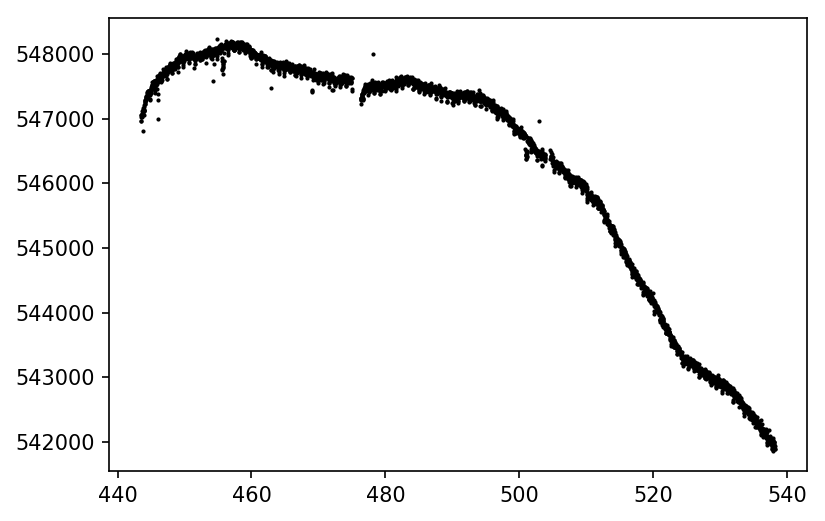

In [26]:
plt.plot(tpf.time, psf_flux, 'ko', markersize=1)

In [27]:
from lightkurve import LightCurve

In [35]:
lc_psf = LightCurve(tpf.time, psf_flux)

In [36]:
lc_aper = tpf.to_lightcurve()

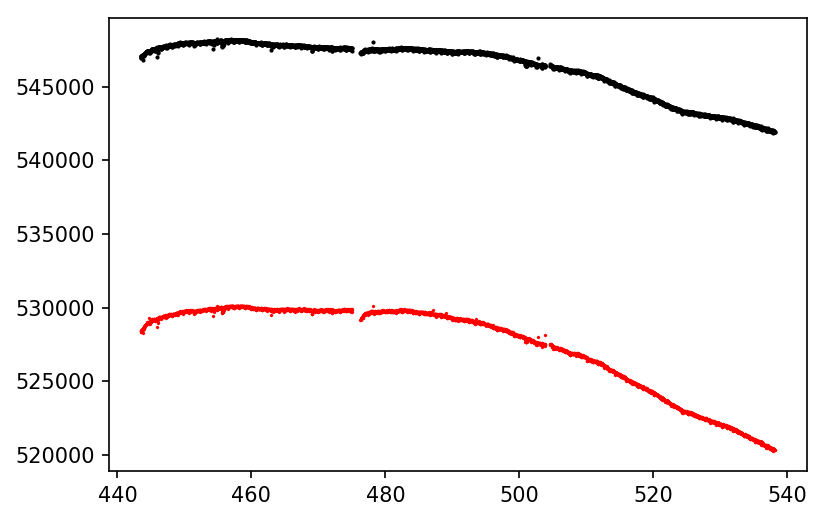

In [37]:
plt.plot(tpf.time, psf_flux, 'ko', markersize=1)
plt.plot(lc_aper.time, lc_aper.flux, 'rx', markersize=1)

In [38]:
lc_aper_fold = lc_aper.flatten().fold(.837495)

In [39]:
lc_psf_fold = lc_psf.flatten().fold(.837495)

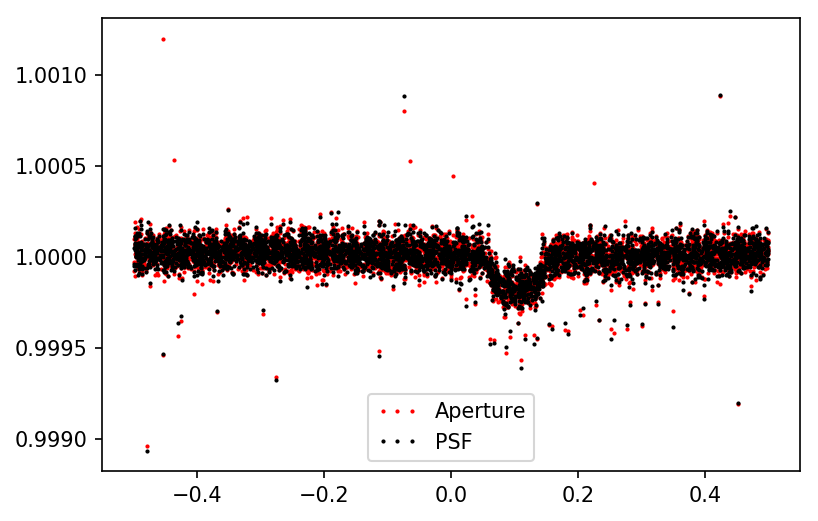

In [41]:
plt.plot(lc_aper_fold.time, lc_aper_fold.flux, 'ro', markersize=1, label='Aperture')
plt.plot(lc_psf_fold.time, lc_psf_fold.flux, 'ko', markersize=1, label='PSF')
plt.legend(numpoints=3)

In [47]:
lc_psf.cdpp()

34.589386605550125

In [48]:
lc_aper.cdpp()

35.307493817526847